In [13]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%delete existing phreeqc files
system("rm DATABASE.dat");
system("rm runfile.txt");
%create empty phreeqc files
system("touch DATABASE.dat");
system("touch runfile.txt");

In [14]:
% define equilibrium problem

FeT=1e-5; PT=1e-6; NaT=3*PT; ClT=3*FeT; T=25; HFOsi=1e-30; HFOwi=1e-30; ASFw=0.6; ASFs=0.6; 
pH=4:0.001:10; 
%pe=20.75-pH;% oxic end
%pe=15.75-pH;% intermediate red/oxic end
pe=10.75-pH;% intermediate red/oxic end DOESNT WORK WITH TABLEAU. UNLESS USE FINE STEP SIZE IN PH
%pe=5.75-pH;% intermediate red/oxic end DOESNT WORK WITH TABLEAU. I don't know why
%pe=-pH; % reduced end  DOESNT WORK WITH TABLEAU. I don't know why

In [15]:
% MODEL USING TABLEAU (different gradients or log versus linear variables)
%graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry
flag0=0; %choose solver. 0 for tableau and 1 for phreeqc-based solver
flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=1; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

TOTALS=[FeT; PT; ClT; NaT; HFOsi; HFOwi]';
TOTALS(TOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error

for i=1:length(pH)
    pHdislay=pH(i)
    if i>1; flag5=1; end
    [Fep3(i),HFO(i),HfowHPO4m(i),MASSERR(i)]=FeHPO4tableau(pH(i),pe(i),TOTALS',flag0,flag1,flag2,flag3,flag4,flag5); 
    if HFO(i)>0; % should make loop until HFO value converges, but from previous tests it converges fast.  one step was how I did the 2008 WER paper
        HFOs=ASFs*HFO(i); HFOw=ASFw*HFO(i); 
        TOTALS=[FeT; PT; ClT; NaT; HFOs; HFOw]';
        [Fep3(i),HFO(i),HfowHPO4m3(i),MASSERR(i)]=FeHPO4tableau(pH(i),pe(i),TOTALS',flag0,flag1,flag2,flag3,flag4,flag5);
    end
    dislay=[pH(i) Fep3(i) HFO(i) HfowHPO4m(i) MASSERR(i)]
end

pHdislay = 4.0000e+00


dislay =    4.0000e+00   6.7603e-13            0   1.9309e-21   8.4800e-18

pHdislay = 4.0010e+00


dislay =    4.0010e+00   6.7447e-13            0   1.9354e-21   8.4805e-18

pHdislay = 4.0020e+00


dislay =    4.0020e+00   6.7292e-13            0   1.9399e-21   8.4810e-18

pHdislay = 4.0030e+00


dislay =    4.0030e+00   6.7137e-13            0   1.9445e-21   8.4815e-18

pHdislay = 4.0040e+00


dislay =    4.0040e+00   6.6983e-13            0   1.9490e-21   8.4820e-18

pHdislay = 4.0050e+00


dislay =    4.0050e+00   6.6829e-13            0   1.9536e-21   8.4825e-18

pHdislay = 4.0060e+00


dislay =    4.0060e+00   6.6675e-13            0   1.9581e-21   8.4831e-18

pHdislay = 4.0070e+00


dislay =    4.0070e+00   6.6522e-13            0   1.9627e-21   8.4836e-18

pHdislay = 4.0080e+00


dislay =    4.0080e+00   6.6369e-13            0   1.9673e-21   8.4841e-18

pHdislay = 4.0090e+00


dislay =    4.0090e+00   6.6216e-13            0   1.9719e-21   8.4846e-18

pHdislay = 4.0100e+00


dislay =    4.0100e+00   6.6064e-13            0   1.9765e-21   8.4851e-18

pHdislay = 4.0110e+00


dislay =    4.0110e+00   6.5912e-13            0   1.9811e-21   8.4856e-18

pHdislay = 4.0120e+00


dislay =    4.0120e+00   6.5760e-13            0   1.9858e-21   8.4861e-18

pHdislay = 4.0130e+00


dislay =    4.0130e+00   6.5609e-13            0   1.9904e-21   8.4866e-18

pHdislay = 4.0140e+00


dislay =    4.0140e+00   6.5458e-13            0   1.9950e-21   8.4872e-18

pHdislay = 4.0150e+00


dislay =    4.0150e+00   6.5308e-13            0   1.9997e-21   8.4877e-18

pHdislay = 4.0160e+00


dislay =    4.0160e+00   6.5158e-13            0   2.0044e-21   8.4882e-18

pHdislay = 4.0170e+00


dislay =    4.0170e+00   6.5008e-13            0   2.0091e-21   8.4887e-18

pHdislay = 4.0180e+00


dislay =    4.0180e+00   6.4858e-13            0   2.0137e-21   8.4892e-18

pHdislay = 4.0190e+00


dislay =    4.0190e+00   6.4709e-13            0   2.0185e-21   8.4897e-18

pHdislay = 4.0200e+00


dislay =    4.0200e+00   6.4560e-13            0   2.0232e-21   8.4902e-18

pHdislay = 4.0210e+00


dislay =    4.0210e+00   6.4412e-13            0   2.0279e-21   8.4907e-18

pHdislay = 4.0220e+00


dislay =    4.0220e+00   6.4263e-13            0   2.0326e-21   8.4913e-18

pHdislay = 4.0230e+00


dislay =    4.0230e+00   6.4116e-13            0   2.0374e-21   8.4918e-18

pHdislay = 4.0240e+00


dislay =    4.0240e+00   6.3968e-13            0   2.0421e-21   8.4923e-18

pHdislay = 4.0250e+00


dislay =    4.0250e+00   6.3821e-13            0   2.0469e-21   8.4928e-18

pHdislay = 4.0260e+00


dislay =    4.0260e+00   6.3674e-13            0   2.0517e-21   8.4933e-18

pHdislay = 4.0270e+00


dislay =    4.0270e+00   6.3528e-13            0   2.0565e-21   8.4938e-18

pHdislay = 4.0280e+00


dislay =    4.0280e+00   6.3382e-13            0   2.0613e-21   8.4943e-18

pHdislay = 4.0290e+00


dislay =    4.0290e+00   6.3236e-13            0   2.0661e-21   8.4948e-18

pHdislay = 4.0300e+00


dislay =    4.0300e+00   6.3091e-13            0   2.0709e-21   8.4954e-18

pHdislay = 4.0310e+00


dislay =    4.0310e+00   6.2945e-13            0   2.0757e-21   8.4959e-18

pHdislay = 4.0320e+00


dislay =    4.0320e+00   6.2801e-13            0   2.0806e-21   8.4964e-18

pHdislay = 4.0330e+00


dislay =    4.0330e+00   6.2656e-13            0   2.0855e-21   8.4969e-18

pHdislay = 4.0340e+00


dislay =    4.0340e+00   6.2512e-13            0   2.0903e-21   8.4974e-18

pHdislay = 4.0350e+00


dislay =    4.0350e+00   6.2368e-13            0   2.0952e-21   8.4979e-18

pHdislay = 4.0360e+00


dislay =    4.0360e+00   6.2225e-13            0   2.1001e-21   8.4984e-18

pHdislay = 4.0370e+00


dislay =    4.0370e+00   6.2082e-13            0   2.1050e-21   8.4989e-18

pHdislay = 4.0380e+00


dislay =    4.0380e+00   6.1939e-13            0   2.1099e-21   8.4995e-18

pHdislay = 4.0390e+00


dislay =    4.0390e+00   6.1797e-13            0   2.1148e-21   8.5000e-18

pHdislay = 4.0400e+00


dislay =    4.0400e+00   6.1654e-13            0   2.1198e-21   8.5005e-18

pHdislay = 4.0410e+00


dislay =    4.0410e+00   6.1513e-13            0   2.1247e-21   8.5010e-18

pHdislay = 4.0420e+00


dislay =    4.0420e+00   6.1371e-13            0   2.1297e-21   8.5015e-18

pHdislay = 4.0430e+00


dislay =    4.0430e+00   6.1230e-13            0   2.1347e-21   8.5020e-18

pHdislay = 4.0440e+00


dislay =    4.0440e+00   6.1089e-13            0   2.1396e-21   8.5025e-18

pHdislay = 4.0450e+00


dislay =    4.0450e+00   6.0949e-13            0   2.1446e-21   8.5030e-18

pHdislay = 4.0460e+00


dislay =    4.0460e+00   6.0808e-13            0   2.1496e-21   8.5036e-18

pHdislay = 4.0470e+00


dislay =    4.0470e+00   6.0669e-13            0   2.1546e-21   8.5041e-18

pHdislay = 4.0480e+00


dislay =    4.0480e+00   6.0529e-13            0   2.1597e-21   8.5046e-18

pHdislay = 4.0490e+00


dislay =    4.0490e+00   6.0390e-13            0   2.1647e-21   8.5051e-18

pHdislay = 4.0500e+00


dislay =    4.0500e+00   6.0251e-13            0   2.1698e-21   8.5056e-18

pHdislay = 4.0510e+00


dislay =    4.0510e+00   6.0112e-13            0   2.1748e-21   8.5061e-18

pHdislay = 4.0520e+00


dislay =    4.0520e+00   5.9974e-13            0   2.1799e-21   8.5066e-18

pHdislay = 4.0530e+00


dislay =    4.0530e+00   5.9836e-13            0   2.1850e-21   8.5071e-18

pHdislay = 4.0540e+00


dislay =    4.0540e+00   5.9699e-13            0   2.1901e-21   8.5077e-18

pHdislay = 4.0550e+00


dislay =    4.0550e+00   5.9561e-13            0   2.1952e-21   8.5082e-18

pHdislay = 4.0560e+00


dislay =    4.0560e+00   5.9424e-13            0   2.2003e-21   8.5087e-18

pHdislay = 4.0570e+00


dislay =    4.0570e+00   5.9288e-13            0   2.2055e-21   8.5092e-18

pHdislay = 4.0580e+00


dislay =    4.0580e+00   5.9151e-13            0   2.2106e-21   8.5097e-18

pHdislay = 4.0590e+00


dislay =    4.0590e+00   5.9015e-13            0   2.2158e-21   8.5102e-18

pHdislay = 4.0600e+00


dislay =    4.0600e+00   5.8879e-13            0   2.2209e-21   8.5107e-18

pHdislay = 4.0610e+00


dislay =    4.0610e+00   5.8744e-13            0   2.2261e-21   8.5113e-18

pHdislay = 4.0620e+00


dislay =    4.0620e+00   5.8609e-13            0   2.2313e-21   8.5118e-18

pHdislay = 4.0630e+00


dislay =    4.0630e+00   5.8474e-13            0   2.2365e-21   8.5123e-18

pHdislay = 4.0640e+00


dislay =    4.0640e+00   5.8340e-13            0   2.2417e-21   8.5128e-18

pHdislay = 4.0650e+00


dislay =    4.0650e+00   5.8205e-13            0   2.2470e-21   8.5133e-18

pHdislay = 4.0660e+00


dislay =    4.0660e+00   5.8072e-13            0   2.2522e-21   8.5138e-18

pHdislay = 4.0670e+00


dislay =    4.0670e+00   5.7938e-13            0   2.2574e-21   8.5143e-18

pHdislay = 4.0680e+00


dislay =    4.0680e+00   5.7805e-13            0   2.2627e-21   8.5148e-18

pHdislay = 4.0690e+00


dislay =    4.0690e+00   5.7672e-13            0   2.2680e-21   8.5154e-18

pHdislay = 4.0700e+00


dislay =    4.0700e+00   5.7539e-13            0   2.2733e-21   8.5159e-18

pHdislay = 4.0710e+00


dislay =    4.0710e+00   5.7407e-13            0   2.2786e-21   8.5164e-18

pHdislay = 4.0720e+00


dislay =    4.0720e+00   5.7275e-13            0   2.2839e-21   8.5169e-18

pHdislay = 4.0730e+00


dislay =    4.0730e+00   5.7143e-13            0   2.2892e-21   8.5174e-18

pHdislay = 4.0740e+00


dislay =    4.0740e+00   5.7012e-13            0   2.2946e-21   8.5179e-18

pHdislay = 4.0750e+00


dislay =    4.0750e+00   5.6881e-13            0   2.2999e-21   8.5184e-18

pHdislay = 4.0760e+00


dislay =    4.0760e+00   5.6750e-13            0   2.3053e-21   8.5190e-18

pHdislay = 4.0770e+00


dislay =    4.0770e+00   5.6619e-13            0   2.3106e-21   8.5195e-18

pHdislay = 4.0780e+00


dislay =    4.0780e+00   5.6489e-13            0   2.3160e-21   8.5200e-18

pHdislay = 4.0790e+00


dislay =    4.0790e+00   5.6359e-13            0   2.3214e-21   8.5205e-18

pHdislay = 4.0800e+00


dislay =    4.0800e+00   5.6229e-13            0   2.3268e-21   8.5210e-18

pHdislay = 4.0810e+00


dislay =    4.0810e+00   5.6100e-13            0   2.3323e-21   8.5215e-18

pHdislay = 4.0820e+00


dislay =    4.0820e+00   5.5971e-13            0   2.3377e-21   8.5221e-18

pHdislay = 4.0830e+00


dislay =    4.0830e+00   5.5842e-13            0   2.3432e-21   8.5226e-18

pHdislay = 4.0840e+00


dislay =    4.0840e+00   5.5714e-13            0   2.3486e-21   8.5231e-18

pHdislay = 4.0850e+00


dislay =    4.0850e+00   5.5586e-13            0   2.3541e-21   8.5236e-18

pHdislay = 4.0860e+00


dislay =    4.0860e+00   5.5458e-13            0   2.3596e-21   8.5241e-18

pHdislay = 4.0870e+00


dislay =    4.0870e+00   5.5330e-13            0   2.3651e-21   8.5246e-18

pHdislay = 4.0880e+00


dislay =    4.0880e+00   5.5203e-13            0   2.3706e-21   8.5251e-18

pHdislay = 4.0890e+00


dislay =    4.0890e+00   5.5076e-13            0   2.3761e-21   8.5257e-18

pHdislay = 4.0900e+00


dislay =    4.0900e+00   5.4949e-13            0   2.3817e-21   8.5262e-18

pHdislay = 4.0910e+00


dislay =    4.0910e+00   5.4823e-13            0   2.3872e-21   8.5267e-18

pHdislay = 4.0920e+00


dislay =    4.0920e+00   5.4697e-13            0   2.3928e-21   8.5272e-18

pHdislay = 4.0930e+00


dislay =    4.0930e+00   5.4571e-13            0   2.3983e-21   8.5277e-18

pHdislay = 4.0940e+00


dislay =    4.0940e+00   5.4446e-13            0   2.4039e-21   8.5282e-18

pHdislay = 4.0950e+00


dislay =    4.0950e+00   5.4320e-13            0   2.4095e-21   8.5288e-18

pHdislay = 4.0960e+00


dislay =    4.0960e+00   5.4195e-13            0   2.4152e-21   8.5293e-18

pHdislay = 4.0970e+00


dislay =    4.0970e+00   5.4071e-13            0   2.4208e-21   8.5298e-18

pHdislay = 4.0980e+00


dislay =    4.0980e+00   5.3946e-13            0   2.4264e-21   8.5303e-18

pHdislay = 4.0990e+00


dislay =    4.0990e+00   5.3822e-13            0   2.4321e-21   8.5308e-18

pHdislay = 4.1000e+00


dislay =    4.1000e+00   5.3699e-13            0   2.4377e-21   8.5314e-18

pHdislay = 4.1010e+00


dislay =    4.1010e+00   5.3575e-13            0   2.4434e-21   8.5319e-18

pHdislay = 4.1020e+00


dislay =    4.1020e+00   5.3452e-13            0   2.4491e-21   8.5324e-18

pHdislay = 4.1030e+00


dislay =    4.1030e+00   5.3329e-13            0   2.4548e-21   8.5329e-18

pHdislay = 4.1040e+00


dislay =    4.1040e+00   5.3206e-13            0   2.4605e-21   8.5334e-18

pHdislay = 4.1050e+00


dislay =    4.1050e+00   5.3084e-13            0   2.4663e-21   8.5339e-18

pHdislay = 4.1060e+00


dislay =    4.1060e+00   5.2962e-13            0   2.4720e-21   8.5345e-18

pHdislay = 4.1070e+00


dislay =    4.1070e+00   5.2840e-13            0   2.4778e-21   8.5350e-18

pHdislay = 4.1080e+00


dislay =    4.1080e+00   5.2718e-13            0   2.4836e-21   8.5355e-18

pHdislay = 4.1090e+00


dislay =    4.1090e+00   5.2597e-13            0   2.4893e-21   8.5360e-18

pHdislay = 4.1100e+00


dislay =    4.1100e+00   5.2476e-13            0   2.4951e-21   8.5365e-18

pHdislay = 4.1110e+00


dislay =    4.1110e+00   5.2356e-13            0   2.5009e-21   8.5371e-18

pHdislay = 4.1120e+00


dislay =    4.1120e+00   5.2235e-13            0   2.5068e-21   8.5376e-18

pHdislay = 4.1130e+00


dislay =    4.1130e+00   5.2115e-13            0   2.5126e-21   8.5381e-18

pHdislay = 4.1140e+00


dislay =    4.1140e+00   5.1995e-13            0   2.5185e-21   8.5386e-18

pHdislay = 4.1150e+00


dislay =    4.1150e+00   5.1876e-13            0   2.5243e-21   8.5391e-18

pHdislay = 4.1160e+00


dislay =    4.1160e+00   5.1756e-13            0   2.5302e-21   8.5397e-18

pHdislay = 4.1170e+00


dislay =    4.1170e+00   5.1637e-13            0   2.5361e-21   8.5402e-18

pHdislay = 4.1180e+00


dislay =    4.1180e+00   5.1518e-13            0   2.5420e-21   8.5407e-18

pHdislay = 4.1190e+00


dislay =    4.1190e+00   5.1400e-13            0   2.5479e-21   8.5412e-18

pHdislay = 4.1200e+00


dislay =    4.1200e+00   5.1282e-13            0   2.5539e-21   8.5418e-18

pHdislay = 4.1210e+00


dislay =    4.1210e+00   5.1164e-13            0   2.5598e-21   8.5423e-18

pHdislay = 4.1220e+00


dislay =    4.1220e+00   5.1046e-13            0   2.5658e-21   8.5428e-18

pHdislay = 4.1230e+00


dislay =    4.1230e+00   5.0929e-13            0   2.5717e-21   8.5433e-18

pHdislay = 4.1240e+00


dislay =    4.1240e+00   5.0812e-13            0   2.5777e-21   8.5438e-18

pHdislay = 4.1250e+00


dislay =    4.1250e+00   5.0695e-13            0   2.5837e-21   8.5444e-18

pHdislay = 4.1260e+00


dislay =    4.1260e+00   5.0578e-13            0   2.5898e-21   8.5449e-18

pHdislay = 4.1270e+00


dislay =    4.1270e+00   5.0462e-13            0   2.5958e-21   8.5454e-18

pHdislay = 4.1280e+00


dislay =    4.1280e+00   5.0346e-13            0   2.6018e-21   8.5459e-18

pHdislay = 4.1290e+00


dislay =    4.1290e+00   5.0230e-13            0   2.6079e-21   8.5465e-18

pHdislay = 4.1300e+00


dislay =    4.1300e+00   5.0114e-13            0   2.6140e-21   8.5470e-18

pHdislay = 4.1310e+00


dislay =    4.1310e+00   4.9999e-13            0   2.6200e-21   8.5475e-18

pHdislay = 4.1320e+00


dislay =    4.1320e+00   4.9884e-13            0   2.6261e-21   8.5480e-18

pHdislay = 4.1330e+00


dislay =    4.1330e+00   4.9769e-13            0   2.6323e-21   8.5486e-18

pHdislay = 4.1340e+00


dislay =    4.1340e+00   4.9655e-13            0   2.6384e-21   8.5491e-18

pHdislay = 4.1350e+00


dislay =    4.1350e+00   4.9541e-13            0   2.6445e-21   8.5496e-18

pHdislay = 4.1360e+00


dislay =    4.1360e+00   4.9427e-13            0   2.6507e-21   8.5501e-18

pHdislay = 4.1370e+00


dislay =    4.1370e+00   4.9313e-13            0   2.6569e-21   8.5507e-18

pHdislay = 4.1380e+00


dislay =    4.1380e+00   4.9200e-13            0   2.6630e-21   8.5512e-18

pHdislay = 4.1390e+00


dislay =    4.1390e+00   4.9087e-13            0   2.6692e-21   8.5517e-18

pHdislay = 4.1400e+00


dislay =    4.1400e+00   4.8974e-13            0   2.6754e-21   8.5523e-18

pHdislay = 4.1410e+00


dislay =    4.1410e+00   4.8861e-13            0   2.6817e-21   8.5528e-18

pHdislay = 4.1420e+00


dislay =    4.1420e+00   4.8749e-13            0   2.6879e-21   8.5533e-18

pHdislay = 4.1430e+00


dislay =    4.1430e+00   4.8636e-13            0   2.6942e-21   8.5538e-18

pHdislay = 4.1440e+00


dislay =    4.1440e+00   4.8525e-13            0   2.7004e-21   8.5544e-18

pHdislay = 4.1450e+00


dislay =    4.1450e+00   4.8413e-13            0   2.7067e-21   8.5549e-18

pHdislay = 4.1460e+00


dislay =    4.1460e+00   4.8302e-13            0   2.7130e-21   8.5554e-18

pHdislay = 4.1470e+00


dislay =    4.1470e+00   4.8191e-13            0   2.7193e-21   8.5559e-18

pHdislay = 4.1480e+00


dislay =    4.1480e+00   4.8080e-13            0   2.7257e-21   8.5565e-18

pHdislay = 4.1490e+00


dislay =    4.1490e+00   4.7969e-13            0   2.7320e-21   8.5570e-18

pHdislay = 4.1500e+00


dislay =    4.1500e+00   4.7859e-13            0   2.7384e-21   8.5575e-18

pHdislay = 4.1510e+00


dislay =    4.1510e+00   4.7749e-13            0   2.7447e-21   8.5581e-18

pHdislay = 4.1520e+00


dislay =    4.1520e+00   4.7639e-13            0   2.7511e-21   8.5586e-18

pHdislay = 4.1530e+00


dislay =    4.1530e+00   4.7529e-13            0   2.7575e-21   8.5591e-18

pHdislay = 4.1540e+00


dislay =    4.1540e+00   4.7420e-13            0   2.7639e-21   8.5597e-18

pHdislay = 4.1550e+00


dislay =    4.1550e+00   4.7311e-13            0   2.7704e-21   8.5602e-18

pHdislay = 4.1560e+00


dislay =    4.1560e+00   4.7202e-13            0   2.7768e-21   8.5607e-18

pHdislay = 4.1570e+00


dislay =    4.1570e+00   4.7094e-13            0   2.7833e-21   8.5613e-18

pHdislay = 4.1580e+00


dislay =    4.1580e+00   4.6985e-13            0   2.7898e-21   8.5618e-18

pHdislay = 4.1590e+00


dislay =    4.1590e+00   4.6877e-13            0   2.7963e-21   8.5623e-18

pHdislay = 4.1600e+00


dislay =    4.1600e+00   4.6769e-13            0   2.8028e-21   8.5629e-18

pHdislay = 4.1610e+00


dislay =    4.1610e+00   4.6662e-13            0   2.8093e-21   8.5634e-18

pHdislay = 4.1620e+00


dislay =    4.1620e+00   4.6555e-13            0   2.8158e-21   8.5639e-18

pHdislay = 4.1630e+00


dislay =    4.1630e+00   4.6447e-13            0   2.8224e-21   8.5645e-18

pHdislay = 4.1640e+00


dislay =    4.1640e+00   4.6341e-13            0   2.8289e-21   8.5650e-18

pHdislay = 4.1650e+00


dislay =    4.1650e+00   4.6234e-13            0   2.8355e-21   8.5655e-18

pHdislay = 4.1660e+00


dislay =    4.1660e+00   4.6128e-13            0   2.8421e-21   8.5661e-18

pHdislay = 4.1670e+00


dislay =    4.1670e+00   4.6022e-13            0   2.8487e-21   8.5666e-18

pHdislay = 4.1680e+00


dislay =    4.1680e+00   4.5916e-13            0   2.8553e-21   8.5671e-18

pHdislay = 4.1690e+00


dislay =    4.1690e+00   4.5810e-13            0   2.8620e-21   8.5677e-18

pHdislay = 4.1700e+00


dislay =    4.1700e+00   4.5705e-13            0   2.8686e-21   8.5682e-18

pHdislay = 4.1710e+00


dislay =    4.1710e+00   4.5600e-13            0   2.8753e-21   8.5687e-18

pHdislay = 4.1720e+00


dislay =    4.1720e+00   4.5495e-13            0   2.8820e-21   8.5693e-18

pHdislay = 4.1730e+00


dislay =    4.1730e+00   4.5390e-13            0   2.8887e-21   8.5698e-18

pHdislay = 4.1740e+00


dislay =    4.1740e+00   4.5286e-13            0   2.8954e-21   8.5704e-18

pHdislay = 4.1750e+00


dislay =    4.1750e+00   4.5182e-13            0   2.9022e-21   8.5709e-18

pHdislay = 4.1760e+00


dislay =    4.1760e+00   4.5078e-13            0   2.9089e-21   8.5714e-18

pHdislay = 4.1770e+00


dislay =    4.1770e+00   4.4974e-13            0   2.9157e-21   8.5720e-18

pHdislay = 4.1780e+00


dislay =    4.1780e+00   4.4871e-13            0   2.9224e-21   8.5725e-18

pHdislay = 4.1790e+00


dislay =    4.1790e+00   4.4767e-13            0   2.9292e-21   8.5731e-18

pHdislay = 4.1800e+00


dislay =    4.1800e+00   4.4664e-13            0   2.9361e-21   8.5736e-18

pHdislay = 4.1810e+00


dislay =    4.1810e+00   4.4562e-13            0   2.9429e-21   8.5741e-18

pHdislay = 4.1820e+00


dislay =    4.1820e+00   4.4459e-13            0   2.9497e-21   8.5747e-18

pHdislay = 4.1830e+00


dislay =    4.1830e+00   4.4357e-13            0   2.9566e-21   8.5752e-18

pHdislay = 4.1840e+00


dislay =    4.1840e+00   4.4255e-13            0   2.9635e-21   8.5758e-18

pHdislay = 4.1850e+00


dislay =    4.1850e+00   4.4153e-13            0   2.9703e-21   8.5763e-18

pHdislay = 4.1860e+00


dislay =    4.1860e+00   4.4052e-13            0   2.9773e-21   8.5769e-18

pHdislay = 4.1870e+00


dislay =    4.1870e+00   4.3950e-13            0   2.9842e-21   8.5774e-18

pHdislay = 4.1880e+00


dislay =    4.1880e+00   4.3849e-13            0   2.9911e-21   8.5779e-18

pHdislay = 4.1890e+00


dislay =    4.1890e+00   4.3748e-13            0   2.9981e-21   8.5785e-18

pHdislay = 4.1900e+00


dislay =    4.1900e+00   4.3648e-13            0   3.0050e-21   8.5790e-18

pHdislay = 4.1910e+00


dislay =    4.1910e+00   4.3547e-13            0   3.0120e-21   8.5796e-18

pHdislay = 4.1920e+00


dislay =    4.1920e+00   4.3447e-13            0   3.0190e-21   8.5801e-18

pHdislay = 4.1930e+00


dislay =    4.1930e+00   4.3347e-13            0   3.0260e-21   8.5807e-18

pHdislay = 4.1940e+00


dislay =    4.1940e+00   4.3247e-13            0   3.0331e-21   8.5812e-18

pHdislay = 4.1950e+00


dislay =    4.1950e+00   4.3148e-13            0   3.0401e-21   8.5818e-18

pHdislay = 4.1960e+00


dislay =    4.1960e+00   4.3049e-13            0   3.0472e-21   8.5823e-18

pHdislay = 4.1970e+00


dislay =    4.1970e+00   4.2950e-13            0   3.0543e-21   8.5829e-18

pHdislay = 4.1980e+00


dislay =    4.1980e+00   4.2851e-13            0   3.0614e-21   8.5834e-18

pHdislay = 4.1990e+00


dislay =    4.1990e+00   4.2752e-13            0   3.0685e-21   8.5839e-18

pHdislay = 4.2000e+00


dislay =    4.2000e+00   4.2654e-13            0   3.0756e-21   8.5845e-18

pHdislay = 4.2010e+00


dislay =    4.2010e+00   4.2556e-13            0   3.0828e-21   8.5850e-18

pHdislay = 4.2020e+00


dislay =    4.2020e+00   4.2458e-13            0   3.0899e-21   8.5856e-18

pHdislay = 4.2030e+00


dislay =    4.2030e+00   4.2360e-13            0   3.0971e-21   8.5861e-18

pHdislay = 4.2040e+00


dislay =    4.2040e+00   4.2263e-13            0   3.1043e-21   8.5867e-18

pHdislay = 4.2050e+00


dislay =    4.2050e+00   4.2166e-13            0   3.1115e-21   8.5872e-18

pHdislay = 4.2060e+00


dislay =    4.2060e+00   4.2069e-13            0   3.1188e-21   8.5878e-18

pHdislay = 4.2070e+00


dislay =    4.2070e+00   4.1972e-13            0   3.1260e-21   8.5884e-18

pHdislay = 4.2080e+00


dislay =    4.2080e+00   4.1876e-13            0   3.1333e-21   8.5889e-18

pHdislay = 4.2090e+00


dislay =    4.2090e+00   4.1779e-13            0   3.1406e-21   8.5895e-18

pHdislay = 4.2100e+00


dislay =    4.2100e+00   4.1683e-13            0   3.1478e-21   8.5900e-18

pHdislay = 4.2110e+00


dislay =    4.2110e+00   4.1587e-13            0   3.1552e-21   8.5906e-18

pHdislay = 4.2120e+00


dislay =    4.2120e+00   4.1492e-13            0   3.1625e-21   8.5911e-18

pHdislay = 4.2130e+00


dislay =    4.2130e+00   4.1396e-13            0   3.1698e-21   8.5917e-18

pHdislay = 4.2140e+00


dislay =    4.2140e+00   4.1301e-13            0   3.1772e-21   8.5922e-18

pHdislay = 4.2150e+00


dislay =    4.2150e+00   4.1206e-13            0   3.1846e-21   8.5928e-18

pHdislay = 4.2160e+00


dislay =    4.2160e+00   4.1111e-13            0   3.1920e-21   8.5933e-18

pHdislay = 4.2170e+00


dislay =    4.2170e+00   4.1017e-13            0   3.1994e-21   8.5939e-18

pHdislay = 4.2180e+00


dislay =    4.2180e+00   4.0922e-13            0   3.2068e-21   8.5945e-18

pHdislay = 4.2190e+00


dislay =    4.2190e+00   4.0828e-13            0   3.2143e-21   8.5950e-18

pHdislay = 4.2200e+00


dislay =    4.2200e+00   4.0734e-13            0   3.2218e-21   8.5956e-18

pHdislay = 4.2210e+00


dislay =    4.2210e+00   4.0641e-13            0   3.2292e-21   8.5961e-18

pHdislay = 4.2220e+00


dislay =    4.2220e+00   4.0547e-13            0   3.2367e-21   8.5967e-18

pHdislay = 4.2230e+00


dislay =    4.2230e+00   4.0454e-13            0   3.2443e-21   8.5973e-18

pHdislay = 4.2240e+00


dislay =    4.2240e+00   4.0361e-13            0   3.2518e-21   8.5978e-18

pHdislay = 4.2250e+00


dislay =    4.2250e+00   4.0268e-13            0   3.2594e-21   8.5984e-18

pHdislay = 4.2260e+00


dislay =    4.2260e+00   4.0175e-13            0   3.2669e-21   8.5989e-18

pHdislay = 4.2270e+00


dislay =    4.2270e+00   4.0083e-13            0   3.2745e-21   8.5995e-18

pHdislay = 4.2280e+00


dislay =    4.2280e+00   3.9991e-13            0   3.2821e-21   8.6001e-18

pHdislay = 4.2290e+00


dislay =    4.2290e+00   3.9899e-13            0   3.2897e-21   8.6006e-18

pHdislay = 4.2300e+00


dislay =    4.2300e+00   3.9807e-13            0   3.2974e-21   8.6012e-18

pHdislay = 4.2310e+00


dislay =    4.2310e+00   3.9715e-13            0   3.3050e-21   8.6018e-18

pHdislay = 4.2320e+00


dislay =    4.2320e+00   3.9624e-13            0   3.3127e-21   8.6023e-18

pHdislay = 4.2330e+00


dislay =    4.2330e+00   3.9533e-13            0   3.3204e-21   8.6029e-18

pHdislay = 4.2340e+00


dislay =    4.2340e+00   3.9442e-13            0   3.3281e-21   8.6034e-18

pHdislay = 4.2350e+00


dislay =    4.2350e+00   3.9351e-13            0   3.3358e-21   8.6040e-18

pHdislay = 4.2360e+00


dislay =    4.2360e+00   3.9261e-13            0   3.3436e-21   8.6046e-18

pHdislay = 4.2370e+00


dislay =    4.2370e+00   3.9171e-13            0   3.3514e-21   8.6052e-18

pHdislay = 4.2380e+00


dislay =    4.2380e+00   3.9080e-13            0   3.3591e-21   8.6057e-18

pHdislay = 4.2390e+00


dislay =    4.2390e+00   3.8991e-13            0   3.3669e-21   8.6063e-18

pHdislay = 4.2400e+00


dislay =    4.2400e+00   3.8901e-13            0   3.3748e-21   8.6069e-18

pHdislay = 4.2410e+00


dislay =    4.2410e+00   3.8811e-13            0   3.3826e-21   8.6074e-18

pHdislay = 4.2420e+00


dislay =    4.2420e+00   3.8722e-13            0   3.3905e-21   8.6080e-18

pHdislay = 4.2430e+00


dislay =    4.2430e+00   3.8633e-13            0   3.3983e-21   8.6086e-18

pHdislay = 4.2440e+00


dislay =    4.2440e+00   3.8544e-13            0   3.4062e-21   8.6091e-18

pHdislay = 4.2450e+00


dislay =    4.2450e+00   3.8456e-13            0   3.4141e-21   8.6097e-18

pHdislay = 4.2460e+00


dislay =    4.2460e+00   3.8367e-13            0   3.4221e-21   8.6103e-18

pHdislay = 4.2470e+00


dislay =    4.2470e+00   3.8279e-13            0   3.4300e-21   8.6109e-18

pHdislay = 4.2480e+00


dislay =    4.2480e+00   3.8191e-13            0   3.4380e-21   8.6114e-18

pHdislay = 4.2490e+00


dislay =    4.2490e+00   3.8103e-13            0   3.4459e-21   8.6120e-18

pHdislay = 4.2500e+00


dislay =    4.2500e+00   3.8015e-13            0   3.4539e-21   8.6126e-18

pHdislay = 4.2510e+00


dislay =    4.2510e+00   3.7928e-13            0   3.4620e-21   8.6132e-18

pHdislay = 4.2520e+00


dislay =    4.2520e+00   3.7841e-13            0   3.4700e-21   8.6137e-18

pHdislay = 4.2530e+00


dislay =    4.2530e+00   3.7754e-13            0   3.4781e-21   8.6143e-18

pHdislay = 4.2540e+00


dislay =    4.2540e+00   3.7667e-13            0   3.4861e-21   8.6149e-18

pHdislay = 4.2550e+00


dislay =    4.2550e+00   3.7580e-13            0   3.4942e-21   8.6155e-18

pHdislay = 4.2560e+00


dislay =    4.2560e+00   3.7494e-13            0   3.5023e-21   8.6160e-18

pHdislay = 4.2570e+00


dislay =    4.2570e+00   3.7408e-13            0   3.5105e-21   8.6166e-18

pHdislay = 4.2580e+00


dislay =    4.2580e+00   3.7322e-13            0   3.5186e-21   8.6172e-18

pHdislay = 4.2590e+00


dislay =    4.2590e+00   3.7236e-13            0   3.5268e-21   8.6178e-18

pHdislay = 4.2600e+00


dislay =    4.2600e+00   3.7150e-13            0   3.5350e-21   8.6184e-18

pHdislay = 4.2610e+00


dislay =    4.2610e+00   3.7065e-13            0   3.5432e-21   8.6189e-18

pHdislay = 4.2620e+00


dislay =    4.2620e+00   3.6979e-13            0   3.5514e-21   8.6195e-18

pHdislay = 4.2630e+00


dislay =    4.2630e+00   3.6894e-13            0   3.5596e-21   8.6201e-18

pHdislay = 4.2640e+00


dislay =    4.2640e+00   3.6809e-13            0   3.5679e-21   8.6207e-18

pHdislay = 4.2650e+00


dislay =    4.2650e+00   3.6725e-13            0   3.5762e-21   8.6213e-18

pHdislay = 4.2660e+00


dislay =    4.2660e+00   3.6640e-13            0   3.5845e-21   8.6219e-18

pHdislay = 4.2670e+00


dislay =    4.2670e+00   3.6556e-13            0   3.5928e-21   8.6225e-18

pHdislay = 4.2680e+00


dislay =    4.2680e+00   3.6472e-13            0   3.6011e-21   8.6230e-18

pHdislay = 4.2690e+00


dislay =    4.2690e+00   3.6388e-13            0   3.6095e-21   8.6236e-18

pHdislay = 4.2700e+00


dislay =    4.2700e+00   3.6304e-13            0   3.6179e-21   8.6242e-18

pHdislay = 4.2710e+00


dislay =    4.2710e+00   3.6221e-13            0   3.6263e-21   8.6248e-18

pHdislay = 4.2720e+00


dislay =    4.2720e+00   3.6138e-13            0   3.6347e-21   8.6254e-18

pHdislay = 4.2730e+00


dislay =    4.2730e+00   3.6054e-13            0   3.6431e-21   8.6260e-18

pHdislay = 4.2740e+00


dislay =    4.2740e+00   3.5972e-13            0   3.6516e-21   8.6266e-18

pHdislay = 4.2750e+00


dislay =    4.2750e+00   3.5889e-13            0   3.6600e-21   8.6272e-18

pHdislay = 4.2760e+00


dislay =    4.2760e+00   3.5806e-13            0   3.6685e-21   8.6278e-18

pHdislay = 4.2770e+00


dislay =    4.2770e+00   3.5724e-13            0   3.6770e-21   8.6283e-18

pHdislay = 4.2780e+00


dislay =    4.2780e+00   3.5642e-13            0   3.6856e-21   8.6289e-18

pHdislay = 4.2790e+00


dislay =    4.2790e+00   3.5560e-13            0   3.6941e-21   8.6295e-18

pHdislay = 4.2800e+00


dislay =    4.2800e+00   3.5478e-13            0   3.7027e-21   8.6301e-18

pHdislay = 4.2810e+00


dislay =    4.2810e+00   3.5396e-13            0   3.7113e-21   8.6307e-18

pHdislay = 4.2820e+00


dislay =    4.2820e+00   3.5315e-13            0   3.7199e-21   8.6313e-18

pHdislay = 4.2830e+00


dislay =    4.2830e+00   3.5234e-13            0   3.7285e-21   8.6319e-18

pHdislay = 4.2840e+00


dislay =    4.2840e+00   3.5153e-13            0   3.7372e-21   8.6325e-18

pHdislay = 4.2850e+00


dislay =    4.2850e+00   3.5072e-13            0   3.7459e-21   8.6331e-18

pHdislay = 4.2860e+00


dislay =    4.2860e+00   3.4991e-13            0   3.7545e-21   8.6337e-18

pHdislay = 4.2870e+00


dislay =    4.2870e+00   3.4911e-13            0   3.7633e-21   8.6343e-18

pHdislay = 4.2880e+00


dislay =    4.2880e+00   3.4830e-13            0   3.7720e-21   8.6349e-18

pHdislay = 4.2890e+00


dislay =    4.2890e+00   3.4750e-13            0   3.7807e-21   8.6355e-18

pHdislay = 4.2900e+00


dislay =    4.2900e+00   3.4670e-13            0   3.7895e-21   8.6361e-18

pHdislay = 4.2910e+00


dislay =    4.2910e+00   3.4591e-13            0   3.7983e-21   8.6367e-18

pHdislay = 4.2920e+00


dislay =    4.2920e+00   3.4511e-13            0   3.8071e-21   8.6373e-18

pHdislay = 4.2930e+00


dislay =    4.2930e+00   3.4432e-13            0   3.8159e-21   8.6379e-18

pHdislay = 4.2940e+00


dislay =    4.2940e+00   3.4352e-13            0   3.8248e-21   8.6385e-18

pHdislay = 4.2950e+00


dislay =    4.2950e+00   3.4273e-13            0   3.8337e-21   8.6391e-18

pHdislay = 4.2960e+00


dislay =    4.2960e+00   3.4195e-13            0   3.8426e-21   8.6397e-18

pHdislay = 4.2970e+00


dislay =    4.2970e+00   3.4116e-13            0   3.8515e-21   8.6403e-18

pHdislay = 4.2980e+00


dislay =    4.2980e+00   3.4038e-13            0   3.8604e-21   8.6409e-18

pHdislay = 4.2990e+00


dislay =    4.2990e+00   3.3959e-13            0   3.8694e-21   8.6415e-18

pHdislay = 4.3000e+00


dislay =    4.3000e+00   3.3881e-13            0   3.8783e-21   8.6422e-18

pHdislay = 4.3010e+00


dislay =    4.3010e+00   3.3803e-13            0   3.8873e-21   8.6428e-18

pHdislay = 4.3020e+00


dislay =    4.3020e+00   3.3725e-13            0   3.8963e-21   8.6434e-18

pHdislay = 4.3030e+00


dislay =    4.3030e+00   3.3648e-13            0   3.9054e-21   8.6440e-18

pHdislay = 4.3040e+00


dislay =    4.3040e+00   3.3571e-13            0   3.9144e-21   8.6446e-18

pHdislay = 4.3050e+00


dislay =    4.3050e+00   3.3493e-13            0   3.9235e-21   8.6452e-18

pHdislay = 4.3060e+00


dislay =    4.3060e+00   3.3416e-13            0   3.9326e-21   8.6458e-18

pHdislay = 4.3070e+00


dislay =    4.3070e+00   3.3339e-13            0   3.9417e-21   8.6464e-18

pHdislay = 4.3080e+00


dislay =    4.3080e+00   3.3263e-13            0   3.9509e-21   8.6471e-18

pHdislay = 4.3090e+00


dislay =    4.3090e+00   3.3186e-13            0   3.9600e-21   8.6477e-18

pHdislay = 4.3100e+00


dislay =    4.3100e+00   3.3110e-13            0   3.9692e-21   8.6483e-18

pHdislay = 4.3110e+00


dislay =    4.3110e+00   3.3034e-13            0   3.9784e-21   8.6489e-18

pHdislay = 4.3120e+00


dislay =    4.3120e+00   3.2958e-13            0   3.9876e-21   8.6495e-18

pHdislay = 4.3130e+00


dislay =    4.3130e+00   3.2882e-13            0   3.9969e-21   8.6501e-18

pHdislay = 4.3140e+00


dislay =    4.3140e+00   3.2806e-13            0   4.0062e-21   8.6508e-18

pHdislay = 4.3150e+00


dislay =    4.3150e+00   3.2731e-13            0   4.0154e-21   8.6514e-18

pHdislay = 4.3160e+00


dislay =    4.3160e+00   3.2656e-13            0   4.0248e-21   8.6520e-18

pHdislay = 4.3170e+00


dislay =    4.3170e+00   3.2580e-13            0   4.0341e-21   8.6526e-18

pHdislay = 4.3180e+00


dislay =    4.3180e+00   3.2506e-13            0   4.0434e-21   8.6532e-18

pHdislay = 4.3190e+00


dislay =    4.3190e+00   3.2431e-13            0   4.0528e-21   8.6539e-18

pHdislay = 4.3200e+00


dislay =    4.3200e+00   3.2356e-13            0   4.0622e-21   8.6545e-18

pHdislay = 4.3210e+00


dislay =    4.3210e+00   3.2282e-13            0   4.0716e-21   8.6551e-18

pHdislay = 4.3220e+00


dislay =    4.3220e+00   3.2208e-13            0   4.0811e-21   8.6557e-18

pHdislay = 4.3230e+00


dislay =    4.3230e+00   3.2133e-13            0   4.0905e-21   8.6564e-18

pHdislay = 4.3240e+00


dislay =    4.3240e+00   3.2060e-13            0   4.1000e-21   8.6570e-18

pHdislay = 4.3250e+00


dislay =    4.3250e+00   3.1986e-13            0   4.1095e-21   8.6576e-18

pHdislay = 4.3260e+00


dislay =    4.3260e+00   3.1912e-13            0   4.1190e-21   8.6583e-18

pHdislay = 4.3270e+00


dislay =    4.3270e+00   3.1839e-13            0   4.1286e-21   8.6589e-18

pHdislay = 4.3280e+00


dislay =    4.3280e+00   3.1766e-13            0   4.1382e-21   8.6595e-18

pHdislay = 4.3290e+00


dislay =    4.3290e+00   3.1693e-13            0   4.1477e-21   8.6601e-18

pHdislay = 4.3300e+00


dislay =    4.3300e+00   3.1620e-13            0   4.1574e-21   8.6608e-18

pHdislay = 4.3310e+00


dislay =    4.3310e+00   3.1547e-13            0   4.1670e-21   8.6614e-18

pHdislay = 4.3320e+00


dislay =    4.3320e+00   3.1474e-13            0   4.1767e-21   8.6620e-18

pHdislay = 4.3330e+00


dislay =    4.3330e+00   3.1402e-13            0   4.1863e-21   8.6627e-18

pHdislay = 4.3340e+00


dislay =    4.3340e+00   3.1330e-13            0   4.1960e-21   8.6633e-18

pHdislay = 4.3350e+00


dislay =    4.3350e+00   3.1258e-13            0   4.2058e-21   8.6640e-18

pHdislay = 4.3360e+00


dislay =    4.3360e+00   3.1186e-13            0   4.2155e-21   8.6646e-18

pHdislay = 4.3370e+00


dislay =    4.3370e+00   3.1114e-13            0   4.2253e-21   8.6652e-18

pHdislay = 4.3380e+00


dislay =    4.3380e+00   3.1043e-13            0   4.2351e-21   8.6659e-18

pHdislay = 4.3390e+00


dislay =    4.3390e+00   3.0971e-13            0   4.2449e-21   8.6665e-18

pHdislay = 4.3400e+00


dislay =    4.3400e+00   3.0900e-13            0   4.2547e-21   8.6671e-18

pHdislay = 4.3410e+00


dislay =    4.3410e+00   3.0829e-13            0   4.2646e-21   8.6678e-18

pHdislay = 4.3420e+00


dislay =    4.3420e+00   3.0758e-13            0   4.2745e-21   8.6684e-18

pHdislay = 4.3430e+00


dislay =    4.3430e+00   3.0687e-13            0   4.2844e-21   8.6691e-18

pHdislay = 4.3440e+00


dislay =    4.3440e+00   3.0617e-13            0   4.2943e-21   8.6697e-18

pHdislay = 4.3450e+00


dislay =    4.3450e+00   3.0546e-13            0   4.3043e-21   8.6704e-18

pHdislay = 4.3460e+00


dislay =    4.3460e+00   3.0476e-13            0   4.3142e-21   8.6710e-18

pHdislay = 4.3470e+00


dislay =    4.3470e+00   3.0406e-13            0   4.3242e-21   8.6717e-18

pHdislay = 4.3480e+00


dislay =    4.3480e+00   3.0336e-13            0   4.3343e-21   8.6723e-18

pHdislay = 4.3490e+00


dislay =    4.3490e+00   3.0266e-13            0   4.3443e-21   8.6730e-18

pHdislay = 4.3500e+00


dislay =    4.3500e+00   3.0196e-13            0   4.3544e-21   8.6736e-18

pHdislay = 4.3510e+00


dislay =    4.3510e+00   3.0127e-13            0   4.3644e-21   8.6743e-18

pHdislay = 4.3520e+00


dislay =    4.3520e+00   3.0058e-13            0   4.3746e-21   8.6749e-18

pHdislay = 4.3530e+00


dislay =    4.3530e+00   2.9989e-13            0   4.3847e-21   8.6756e-18

pHdislay = 4.3540e+00


dislay =    4.3540e+00   2.9920e-13            0   4.3949e-21   8.6762e-18

pHdislay = 4.3550e+00


dislay =    4.3550e+00   2.9851e-13            0   4.4050e-21   8.6769e-18

pHdislay = 4.3560e+00


dislay =    4.3560e+00   2.9782e-13            0   4.4152e-21   8.6775e-18

pHdislay = 4.3570e+00


dislay =    4.3570e+00   2.9714e-13            0   4.4255e-21   8.6782e-18

pHdislay = 4.3580e+00


dislay =    4.3580e+00   2.9645e-13            0   4.4357e-21   8.6788e-18

pHdislay = 4.3590e+00


dislay =    4.3590e+00   2.9577e-13            0   4.4460e-21   8.6795e-18

pHdislay = 4.3600e+00


dislay =    4.3600e+00   2.9509e-13            0   4.4563e-21   8.6802e-18

pHdislay = 4.3610e+00


dislay =    4.3610e+00   2.9441e-13            0   4.4666e-21   8.6808e-18

pHdislay = 4.3620e+00


dislay =    4.3620e+00   2.9374e-13            0   4.4770e-21   8.6815e-18

pHdislay = 4.3630e+00


dislay =    4.3630e+00   2.9306e-13            0   4.4873e-21   8.6821e-18

pHdislay = 4.3640e+00


dislay =    4.3640e+00   2.9239e-13            0   4.4977e-21   8.6828e-18

pHdislay = 4.3650e+00


dislay =    4.3650e+00   2.9171e-13            0   4.5082e-21   8.6835e-18

pHdislay = 4.3660e+00


dislay =    4.3660e+00   2.9104e-13            0   4.5186e-21   8.6841e-18

pHdislay = 4.3670e+00


dislay =    4.3670e+00   2.9037e-13            0   4.5291e-21   8.6848e-18

pHdislay = 4.3680e+00


dislay =    4.3680e+00   2.8970e-13            0   4.5396e-21   8.6855e-18

pHdislay = 4.3690e+00


dislay =    4.3690e+00   2.8904e-13            0   4.5501e-21   8.6861e-18

pHdislay = 4.3700e+00


dislay =    4.3700e+00   2.8837e-13            0   4.5606e-21   8.6868e-18

pHdislay = 4.3710e+00


dislay =    4.3710e+00   2.8771e-13            0   4.5712e-21   8.6875e-18

pHdislay = 4.3720e+00


dislay =    4.3720e+00   2.8705e-13            0   4.5818e-21   8.6881e-18

pHdislay = 4.3730e+00


dislay =    4.3730e+00   2.8639e-13            0   4.5924e-21   8.6888e-18

pHdislay = 4.3740e+00


dislay =    4.3740e+00   2.8573e-13            0   4.6030e-21   8.6895e-18

pHdislay = 4.3750e+00


dislay =    4.3750e+00   2.8507e-13            0   4.6137e-21   8.6902e-18

pHdislay = 4.3760e+00


dislay =    4.3760e+00   2.8442e-13            0   4.6244e-21   8.6908e-18

pHdislay = 4.3770e+00


dislay =    4.3770e+00   2.8376e-13            0   4.6351e-21   8.6915e-18

pHdislay = 4.3780e+00


dislay =    4.3780e+00   2.8311e-13            0   4.6458e-21   8.6922e-18

pHdislay = 4.3790e+00


dislay =    4.3790e+00   2.8246e-13            0   4.6566e-21   8.6929e-18

pHdislay = 4.3800e+00


dislay =    4.3800e+00   2.8181e-13            0   4.6674e-21   8.6936e-18

pHdislay = 4.3810e+00


dislay =    4.3810e+00   2.8116e-13            0   4.6782e-21   8.6942e-18

pHdislay = 4.3820e+00


dislay =    4.3820e+00   2.8051e-13            0   4.6890e-21   8.6949e-18

pHdislay = 4.3830e+00


dislay =    4.3830e+00   2.7987e-13            0   4.6999e-21   8.6956e-18

pHdislay = 4.3840e+00


dislay =    4.3840e+00   2.7923e-13            0   4.7107e-21   8.6963e-18

pHdislay = 4.3850e+00


dislay =    4.3850e+00   2.7858e-13            0   4.7216e-21   8.6970e-18

pHdislay = 4.3860e+00


dislay =    4.3860e+00   2.7794e-13            0   4.7326e-21   8.6976e-18

pHdislay = 4.3870e+00


dislay =    4.3870e+00   2.7730e-13            0   4.7435e-21   8.6983e-18

pHdislay = 4.3880e+00


dislay =    4.3880e+00   2.7667e-13            0   4.7545e-21   8.6990e-18

pHdislay = 4.3890e+00


dislay =    4.3890e+00   2.7603e-13            0   4.7655e-21   8.6997e-18

pHdislay = 4.3900e+00


dislay =    4.3900e+00   2.7539e-13            0   4.7766e-21   8.7004e-18

pHdislay = 4.3910e+00


dislay =    4.3910e+00   2.7476e-13            0   4.7876e-21   8.7011e-18

pHdislay = 4.3920e+00


dislay =    4.3920e+00   2.7413e-13            0   4.7987e-21   8.7018e-18

pHdislay = 4.3930e+00


dislay =    4.3930e+00   2.7350e-13            0   4.8098e-21   8.7025e-18

pHdislay = 4.3940e+00


dislay =    4.3940e+00   2.7287e-13            0   4.8210e-21   8.7032e-18

pHdislay = 4.3950e+00


dislay =    4.3950e+00   2.7224e-13            0   4.8321e-21   8.7039e-18

pHdislay = 4.3960e+00


dislay =    4.3960e+00   2.7162e-13            0   4.8433e-21   8.7046e-18

pHdislay = 4.3970e+00


dislay =    4.3970e+00   2.7099e-13            0   4.8545e-21   8.7053e-18

pHdislay = 4.3980e+00


dislay =    4.3980e+00   2.7037e-13            0   4.8658e-21   8.7060e-18

pHdislay = 4.3990e+00


dislay =    4.3990e+00   2.6975e-13            0   4.8770e-21   8.7067e-18

pHdislay = 4.4000e+00


dislay =    4.4000e+00   2.6913e-13            0   4.8883e-21   8.7074e-18

pHdislay = 4.4010e+00


dislay =    4.4010e+00   2.6851e-13            0   4.8996e-21   8.7081e-18

pHdislay = 4.4020e+00


dislay =    4.4020e+00   2.6789e-13            0   4.9110e-21   8.7088e-18

pHdislay = 4.4030e+00


dislay =    4.4030e+00   2.6727e-13            0   4.9223e-21   8.7095e-18

pHdislay = 4.4040e+00


dislay =    4.4040e+00   2.6666e-13            0   4.9337e-21   8.7102e-18

pHdislay = 4.4050e+00


dislay =    4.4050e+00   2.6604e-13            0   4.9452e-21   8.7109e-18

pHdislay = 4.4060e+00


dislay =    4.4060e+00   2.6543e-13            0   4.9566e-21   8.7116e-18

pHdislay = 4.4070e+00


dislay =    4.4070e+00   2.6482e-13            0   4.9681e-21   8.7123e-18

pHdislay = 4.4080e+00


dislay =    4.4080e+00   2.6421e-13            0   4.9796e-21   8.7130e-18

pHdislay = 4.4090e+00


dislay =    4.4090e+00   2.6361e-13            0   4.9911e-21   8.7137e-18

pHdislay = 4.4100e+00


dislay =    4.4100e+00   2.6300e-13            0   5.0027e-21   8.7144e-18

pHdislay = 4.4110e+00


dislay =    4.4110e+00   2.6239e-13            0   5.0142e-21   8.7151e-18

pHdislay = 4.4120e+00


dislay =    4.4120e+00   2.6179e-13            0   5.0258e-21   8.7158e-18

pHdislay = 4.4130e+00


dislay =    4.4130e+00   2.6119e-13            0   5.0375e-21   8.7166e-18

pHdislay = 4.4140e+00


dislay =    4.4140e+00   2.6059e-13            0   5.0491e-21   8.7173e-18

pHdislay = 4.4150e+00


dislay =    4.4150e+00   2.5999e-13            0   5.0608e-21   8.7180e-18

pHdislay = 4.4160e+00


dislay =    4.4160e+00   2.5939e-13            0   5.0725e-21   8.7187e-18

pHdislay = 4.4170e+00


dislay =    4.4170e+00   2.5879e-13            0   5.0843e-21   8.7194e-18

pHdislay = 4.4180e+00


dislay =    4.4180e+00   2.5820e-13            0   5.0960e-21   8.7201e-18

pHdislay = 4.4190e+00


dislay =    4.4190e+00   2.5760e-13            0   5.1078e-21   8.7209e-18

pHdislay = 4.4200e+00


dislay =    4.4200e+00   2.5701e-13            0   5.1197e-21   8.7216e-18

pHdislay = 4.4210e+00


dislay =    4.4210e+00   2.5642e-13            0   5.1315e-21   8.7223e-18

pHdislay = 4.4220e+00


dislay =    4.4220e+00   2.5583e-13            0   5.1434e-21   8.7230e-18

pHdislay = 4.4230e+00


dislay =    4.4230e+00   2.5524e-13            0   5.1553e-21   8.7238e-18

pHdislay = 4.4240e+00


dislay =    4.4240e+00   2.5466e-13            0   5.1672e-21   8.7245e-18

pHdislay = 4.4250e+00


dislay =    4.4250e+00   2.5407e-13            0   5.1792e-21   8.7252e-18

pHdislay = 4.4260e+00


dislay =    4.4260e+00   2.5349e-13            0   5.1912e-21   8.7259e-18

pHdislay = 4.4270e+00


dislay =    4.4270e+00   2.5290e-13            0   5.2032e-21   8.7267e-18

pHdislay = 4.4280e+00


dislay =    4.4280e+00   2.5232e-13            0   5.2152e-21   8.7274e-18

pHdislay = 4.4290e+00


dislay =    4.4290e+00   2.5174e-13            0   5.2273e-21   8.7281e-18

pHdislay = 4.4300e+00


dislay =    4.4300e+00   2.5116e-13            0   5.2394e-21   8.7289e-18

pHdislay = 4.4310e+00


dislay =    4.4310e+00   2.5058e-13            0   5.2515e-21   8.7296e-18

pHdislay = 4.4320e+00


dislay =    4.4320e+00   2.5001e-13            0   5.2636e-21   8.7304e-18

pHdislay = 4.4330e+00


dislay =    4.4330e+00   2.4943e-13            0   5.2758e-21   8.7311e-18

pHdislay = 4.4340e+00


dislay =    4.4340e+00   2.4886e-13            0   5.2880e-21   8.7318e-18

pHdislay = 4.4350e+00


dislay =    4.4350e+00   2.4829e-13            0   5.3003e-21   8.7326e-18

pHdislay = 4.4360e+00


dislay =    4.4360e+00   2.4772e-13            0   5.3125e-21   8.7333e-18

pHdislay = 4.4370e+00


dislay =    4.4370e+00   2.4715e-13            0   5.3248e-21   8.7341e-18

pHdislay = 4.4380e+00


dislay =    4.4380e+00   2.4658e-13            0   5.3371e-21   8.7348e-18

pHdislay = 4.4390e+00


dislay =    4.4390e+00   2.4601e-13            0   5.3495e-21   8.7355e-18

pHdislay = 4.4400e+00


dislay =    4.4400e+00   2.4544e-13            0   5.3619e-21   8.7363e-18

pHdislay = 4.4410e+00


dislay =    4.4410e+00   2.4488e-13            0   5.3743e-21   8.7370e-18

pHdislay = 4.4420e+00


dislay =    4.4420e+00   2.4432e-13            0   5.3867e-21   8.7378e-18

pHdislay = 4.4430e+00


dislay =    4.4430e+00   2.4375e-13            0   5.3992e-21   8.7385e-18

pHdislay = 4.4440e+00


dislay =    4.4440e+00   2.4319e-13            0   5.4117e-21   8.7393e-18

pHdislay = 4.4450e+00


dislay =    4.4450e+00   2.4263e-13            0   5.4242e-21   8.7400e-18

pHdislay = 4.4460e+00


dislay =    4.4460e+00   2.4208e-13            0   5.4367e-21   8.7408e-18

pHdislay = 4.4470e+00


dislay =    4.4470e+00   2.4152e-13            0   5.4493e-21   8.7416e-18

pHdislay = 4.4480e+00


dislay =    4.4480e+00   2.4096e-13            0   5.4619e-21   8.7423e-18

pHdislay = 4.4490e+00


dislay =    4.4490e+00   2.4041e-13            0   5.4745e-21   8.7431e-18

pHdislay = 4.4500e+00


dislay =    4.4500e+00   2.3986e-13            0   5.4872e-21   8.7438e-18

pHdislay = 4.4510e+00


dislay =    4.4510e+00   2.3931e-13            0   5.4999e-21   8.7446e-18

pHdislay = 4.4520e+00


dislay =    4.4520e+00   2.3876e-13            0   5.5126e-21   8.7453e-18

pHdislay = 4.4530e+00


dislay =    4.4530e+00   2.3821e-13            0   5.5254e-21   8.7461e-18

pHdislay = 4.4540e+00


dislay =    4.4540e+00   2.3766e-13            0   5.5382e-21   8.7469e-18

pHdislay = 4.4550e+00


dislay =    4.4550e+00   2.3711e-13            0   5.5510e-21   8.7476e-18

pHdislay = 4.4560e+00


dislay =    4.4560e+00   2.3657e-13            0   5.5638e-21   8.7484e-18

pHdislay = 4.4570e+00


dislay =    4.4570e+00   2.3602e-13            0   5.5767e-21   8.7492e-18

pHdislay = 4.4580e+00


dislay =    4.4580e+00   2.3548e-13            0   5.5896e-21   8.7499e-18

pHdislay = 4.4590e+00


dislay =    4.4590e+00   2.3494e-13            0   5.6025e-21   8.7507e-18

pHdislay = 4.4600e+00


dislay =    4.4600e+00   2.3440e-13            0   5.6155e-21   8.7515e-18

pHdislay = 4.4610e+00


dislay =    4.4610e+00   2.3386e-13            0   5.6284e-21   8.7523e-18

pHdislay = 4.4620e+00


dislay =    4.4620e+00   2.3332e-13            0   5.6415e-21   8.7530e-18

pHdislay = 4.4630e+00


dislay =    4.4630e+00   2.3278e-13            0   5.6545e-21   8.7538e-18

pHdislay = 4.4640e+00


dislay =    4.4640e+00   2.3225e-13            0   5.6676e-21   8.7546e-18

pHdislay = 4.4650e+00


dislay =    4.4650e+00   2.3171e-13            0   5.6807e-21   8.7554e-18

pHdislay = 4.4660e+00


dislay =    4.4660e+00   2.3118e-13            0   5.6938e-21   8.7562e-18

pHdislay = 4.4670e+00


dislay =    4.4670e+00   2.3065e-13            0   5.7070e-21   8.7569e-18

pHdislay = 4.4680e+00


dislay =    4.4680e+00   2.3012e-13            0   5.7202e-21   8.7577e-18

pHdislay = 4.4690e+00


dislay =    4.4690e+00   2.2959e-13            0   5.7334e-21   8.7585e-18

pHdislay = 4.4700e+00


dislay =    4.4700e+00   2.2906e-13            0   5.7467e-21   8.7593e-18

pHdislay = 4.4710e+00


dislay =    4.4710e+00   2.2853e-13            0   5.7600e-21   8.7601e-18

pHdislay = 4.4720e+00


dislay =    4.4720e+00   2.2801e-13            0   5.7733e-21   8.7609e-18

pHdislay = 4.4730e+00


dislay =    4.4730e+00   2.2748e-13            0   5.7866e-21   8.7617e-18

pHdislay = 4.4740e+00


dislay =    4.4740e+00   2.2696e-13            0   5.8000e-21   8.7624e-18

pHdislay = 4.4750e+00


dislay =    4.4750e+00   2.2644e-13            0   5.8134e-21   8.7632e-18

pHdislay = 4.4760e+00


dislay =    4.4760e+00   2.2592e-13            0   5.8269e-21   8.7640e-18

pHdislay = 4.4770e+00


dislay =    4.4770e+00   2.2540e-13            0   5.8403e-21   8.7648e-18

pHdislay = 4.4780e+00


dislay =    4.4780e+00   2.2488e-13            0   5.8538e-21   8.7656e-18

pHdislay = 4.4790e+00


dislay =    4.4790e+00   2.2436e-13            0   5.8674e-21   8.7664e-18

pHdislay = 4.4800e+00


dislay =    4.4800e+00   2.2385e-13            0   5.8809e-21   8.7672e-18

pHdislay = 4.4810e+00


dislay =    4.4810e+00   2.2333e-13            0   5.8945e-21   8.7680e-18

pHdislay = 4.4820e+00


dislay =    4.4820e+00   2.2282e-13            0   5.9082e-21   8.7688e-18

pHdislay = 4.4830e+00


dislay =    4.4830e+00   2.2231e-13            0   5.9218e-21   8.7696e-18

pHdislay = 4.4840e+00


dislay =    4.4840e+00   2.2179e-13            0   5.9355e-21   8.7704e-18

pHdislay = 4.4850e+00


dislay =    4.4850e+00   2.2128e-13            0   5.9492e-21   8.7712e-18

pHdislay = 4.4860e+00


dislay =    4.4860e+00   2.2078e-13            0   5.9630e-21   8.7720e-18

pHdislay = 4.4870e+00


dislay =    4.4870e+00   2.2027e-13            0   5.9768e-21   8.7729e-18

pHdislay = 4.4880e+00


dislay =    4.4880e+00   2.1976e-13            0   5.9906e-21   8.7737e-18

pHdislay = 4.4890e+00


dislay =    4.4890e+00   2.1926e-13            0   6.0045e-21   8.7745e-18

pHdislay = 4.4900e+00


dislay =    4.4900e+00   2.1875e-13            0   6.0183e-21   8.7753e-18

pHdislay = 4.4910e+00


dislay =    4.4910e+00   2.1825e-13            0   6.0322e-21   8.7761e-18

pHdislay = 4.4920e+00


dislay =    4.4920e+00   2.1775e-13            0   6.0462e-21   8.7769e-18

pHdislay = 4.4930e+00


dislay =    4.4930e+00   2.1725e-13            0   6.0602e-21   8.7777e-18

pHdislay = 4.4940e+00


dislay =    4.4940e+00   2.1675e-13            0   6.0742e-21   8.7786e-18

pHdislay = 4.4950e+00


dislay =    4.4950e+00   2.1625e-13            0   6.0882e-21   8.7794e-18

pHdislay = 4.4960e+00


dislay =    4.4960e+00   2.1575e-13            0   6.1023e-21   8.7802e-18

pHdislay = 4.4970e+00


dislay =    4.4970e+00   2.1525e-13            0   6.1164e-21   8.7810e-18

pHdislay = 4.4980e+00


dislay =    4.4980e+00   2.1476e-13            0   6.1305e-21   8.7819e-18

pHdislay = 4.4990e+00


dislay =    4.4990e+00   2.1426e-13            0   6.1447e-21   8.7827e-18

pHdislay = 4.5000e+00


dislay =    4.5000e+00   2.1377e-13            0   6.1589e-21   8.7835e-18

pHdislay = 4.5010e+00


dislay =    4.5010e+00   2.1328e-13            0   6.1731e-21   8.7843e-18

pHdislay = 4.5020e+00


dislay =    4.5020e+00   2.1279e-13            0   6.1874e-21   8.7852e-18

pHdislay = 4.5030e+00


dislay =    4.5030e+00   2.1230e-13            0   6.2017e-21   8.7860e-18

pHdislay = 4.5040e+00


dislay =    4.5040e+00   2.1181e-13            0   6.2160e-21   8.7868e-18

pHdislay = 4.5050e+00


dislay =    4.5050e+00   2.1132e-13            0   6.2304e-21   8.7877e-18

pHdislay = 4.5060e+00


dislay =    4.5060e+00   2.1084e-13            0   6.2448e-21   8.7885e-18

pHdislay = 4.5070e+00


dislay =    4.5070e+00   2.1035e-13            0   6.2592e-21   8.7894e-18

pHdislay = 4.5080e+00


dislay =    4.5080e+00   2.0987e-13            0   6.2737e-21   8.7902e-18

pHdislay = 4.5090e+00


dislay =    4.5090e+00   2.0939e-13            0   6.2882e-21   8.7910e-18

pHdislay = 4.5100e+00


dislay =    4.5100e+00   2.0891e-13            0   6.3027e-21   8.7919e-18

pHdislay = 4.5110e+00


dislay =    4.5110e+00   2.0843e-13            0   6.3173e-21   8.7927e-18

pHdislay = 4.5120e+00


dislay =    4.5120e+00   2.0795e-13            0   6.3319e-21   8.7936e-18

pHdislay = 4.5130e+00


dislay =    4.5130e+00   2.0747e-13            0   6.3465e-21   8.7944e-18

pHdislay = 4.5140e+00


dislay =    4.5140e+00   2.0699e-13            0   6.3612e-21   8.7953e-18

pHdislay = 4.5150e+00


dislay =    4.5150e+00   2.0651e-13            0   6.3759e-21   8.7961e-18

pHdislay = 4.5160e+00


dislay =    4.5160e+00   2.0604e-13            0   6.3906e-21   8.7970e-18

pHdislay = 4.5170e+00


dislay =    4.5170e+00   2.0557e-13            0   6.4054e-21   8.7978e-18

pHdislay = 4.5180e+00


dislay =    4.5180e+00   2.0509e-13            0   6.4202e-21   8.7987e-18

pHdislay = 4.5190e+00


dislay =    4.5190e+00   2.0462e-13            0   6.4350e-21   8.7995e-18

pHdislay = 4.5200e+00


dislay =    4.5200e+00   2.0415e-13            0   6.4499e-21   8.8004e-18

pHdislay = 4.5210e+00


dislay =    4.5210e+00   2.0368e-13            0   6.4648e-21   8.8013e-18

pHdislay = 4.5220e+00


dislay =    4.5220e+00   2.0321e-13            0   6.4798e-21   8.8021e-18

pHdislay = 4.5230e+00


dislay =    4.5230e+00   2.0274e-13            0   6.4947e-21   8.8030e-18

pHdislay = 4.5240e+00


dislay =    4.5240e+00   2.0228e-13            0   6.5097e-21   8.8039e-18

pHdislay = 4.5250e+00


dislay =    4.5250e+00   2.0181e-13            0   6.5248e-21   8.8047e-18

pHdislay = 4.5260e+00


dislay =    4.5260e+00   2.0135e-13            0   6.5399e-21   8.8056e-18

pHdislay = 4.5270e+00


dislay =    4.5270e+00   2.0089e-13            0   6.5550e-21   8.8065e-18

pHdislay = 4.5280e+00


dislay =    4.5280e+00   2.0042e-13            0   6.5701e-21   8.8073e-18

pHdislay = 4.5290e+00


dislay =    4.5290e+00   1.9996e-13            0   6.5853e-21   8.8082e-18

pHdislay = 4.5300e+00


dislay =    4.5300e+00   1.9950e-13            0   6.6005e-21   8.8091e-18

pHdislay = 4.5310e+00


dislay =    4.5310e+00   1.9904e-13            0   6.6157e-21   8.8100e-18

pHdislay = 4.5320e+00


dislay =    4.5320e+00   1.9859e-13            0   6.6310e-21   8.8108e-18

pHdislay = 4.5330e+00


dislay =    4.5330e+00   1.9813e-13            0   6.6464e-21   8.8117e-18

pHdislay = 4.5340e+00


dislay =    4.5340e+00   1.9767e-13            0   6.6617e-21   8.8126e-18

pHdislay = 4.5350e+00


dislay =    4.5350e+00   1.9722e-13            0   6.6771e-21   8.8135e-18

pHdislay = 4.5360e+00


dislay =    4.5360e+00   1.9677e-13            0   6.6925e-21   8.8144e-18

pHdislay = 4.5370e+00


dislay =    4.5370e+00   1.9631e-13            0   6.7080e-21   8.8153e-18

pHdislay = 4.5380e+00


dislay =    4.5380e+00   1.9586e-13            0   6.7235e-21   8.8161e-18

pHdislay = 4.5390e+00


dislay =    4.5390e+00   1.9541e-13            0   6.7390e-21   8.8170e-18

pHdislay = 4.5400e+00


dislay =    4.5400e+00   1.9496e-13            0   6.7546e-21   8.8179e-18

pHdislay = 4.5410e+00


dislay =    4.5410e+00   1.9451e-13            0   6.7702e-21   8.8188e-18

pHdislay = 4.5420e+00


dislay =    4.5420e+00   1.9407e-13            0   6.7858e-21   8.8197e-18

pHdislay = 4.5430e+00


dislay =    4.5430e+00   1.9362e-13            0   6.8015e-21   8.8206e-18

pHdislay = 4.5440e+00


dislay =    4.5440e+00   1.9317e-13            0   6.8172e-21   8.8215e-18

pHdislay = 4.5450e+00


dislay =    4.5450e+00   1.9273e-13            0   6.8330e-21   8.8224e-18

pHdislay = 4.5460e+00


dislay =    4.5460e+00   1.9229e-13            0   6.8487e-21   8.8233e-18

pHdislay = 4.5470e+00


dislay =    4.5470e+00   1.9184e-13            0   6.8646e-21   8.8242e-18

pHdislay = 4.5480e+00


dislay =    4.5480e+00   1.9140e-13            0   6.8804e-21   8.8251e-18

pHdislay = 4.5490e+00


dislay =    4.5490e+00   1.9096e-13            0   6.8963e-21   8.8260e-18

pHdislay = 4.5500e+00


dislay =    4.5500e+00   1.9052e-13            0   6.9122e-21   8.8269e-18

pHdislay = 4.5510e+00


dislay =    4.5510e+00   1.9009e-13            0   6.9282e-21   8.8278e-18

pHdislay = 4.5520e+00


dislay =    4.5520e+00   1.8965e-13            0   6.9442e-21   8.8288e-18

pHdislay = 4.5530e+00


dislay =    4.5530e+00   1.8921e-13            0   6.9602e-21   8.8297e-18

pHdislay = 4.5540e+00


dislay =    4.5540e+00   1.8878e-13            0   6.9763e-21   8.8306e-18

pHdislay = 4.5550e+00


dislay =    4.5550e+00   1.8834e-13            0   6.9924e-21   8.8315e-18

pHdislay = 4.5560e+00


dislay =    4.5560e+00   1.8791e-13            0   7.0086e-21   8.8324e-18

pHdislay = 4.5570e+00


dislay =    4.5570e+00   1.8748e-13            0   7.0248e-21   8.8333e-18

pHdislay = 4.5580e+00


dislay =    4.5580e+00   1.8705e-13            0   7.0410e-21   8.8343e-18

pHdislay = 4.5590e+00


dislay =    4.5590e+00   1.8662e-13            0   7.0572e-21   8.8352e-18

pHdislay = 4.5600e+00


dislay =    4.5600e+00   1.8619e-13            0   7.0735e-21   8.8361e-18

pHdislay = 4.5610e+00


dislay =    4.5610e+00   1.8576e-13            0   7.0899e-21   8.8370e-18

pHdislay = 4.5620e+00


dislay =    4.5620e+00   1.8533e-13            0   7.1062e-21   8.8380e-18

pHdislay = 4.5630e+00


dislay =    4.5630e+00   1.8490e-13            0   7.1227e-21   8.8389e-18

pHdislay = 4.5640e+00


dislay =    4.5640e+00   1.8448e-13            0   7.1391e-21   8.8398e-18

pHdislay = 4.5650e+00


dislay =    4.5650e+00   1.8405e-13            0   7.1556e-21   8.8408e-18

pHdislay = 4.5660e+00


dislay =    4.5660e+00   1.8363e-13            0   7.1721e-21   8.8417e-18

pHdislay = 4.5670e+00


dislay =    4.5670e+00   1.8321e-13            0   7.1887e-21   8.8426e-18

pHdislay = 4.5680e+00


dislay =    4.5680e+00   1.8279e-13            0   7.2053e-21   8.8436e-18

pHdislay = 4.5690e+00


dislay =    4.5690e+00   1.8237e-13            0   7.2219e-21   8.8445e-18

pHdislay = 4.5700e+00


dislay =    4.5700e+00   1.8195e-13            0   7.2386e-21   8.8455e-18

pHdislay = 4.5710e+00


dislay =    4.5710e+00   1.8153e-13            0   7.2553e-21   8.8464e-18

pHdislay = 4.5720e+00


dislay =    4.5720e+00   1.8111e-13            0   7.2721e-21   8.8474e-18

pHdislay = 4.5730e+00


dislay =    4.5730e+00   1.8070e-13            0   7.2888e-21   8.8483e-18

pHdislay = 4.5740e+00


dislay =    4.5740e+00   1.8028e-13            0   7.3057e-21   8.8493e-18

pHdislay = 4.5750e+00


dislay =    4.5750e+00   1.7987e-13            0   7.3225e-21   8.8502e-18

pHdislay = 4.5760e+00


dislay =    4.5760e+00   1.7945e-13            0   7.3394e-21   8.8512e-18

pHdislay = 4.5770e+00


dislay =    4.5770e+00   1.7904e-13            0   7.3564e-21   8.8521e-18

pHdislay = 4.5780e+00


dislay =    4.5780e+00   1.7863e-13            0   7.3734e-21   8.8531e-18

pHdislay = 4.5790e+00


dislay =    4.5790e+00   1.7822e-13            0   7.3904e-21   8.8540e-18

pHdislay = 4.5800e+00


dislay =    4.5800e+00   1.7781e-13            0   7.4075e-21   8.8550e-18

pHdislay = 4.5810e+00


dislay =    4.5810e+00   1.7740e-13            0   7.4246e-21   8.8560e-18

pHdislay = 4.5820e+00


dislay =    4.5820e+00   1.7699e-13            0   7.4417e-21   8.8569e-18

pHdislay = 4.5830e+00


dislay =    4.5830e+00   1.7658e-13            0   7.4589e-21   8.8579e-18

pHdislay = 4.5840e+00


dislay =    4.5840e+00   1.7618e-13            0   7.4761e-21   8.8589e-18

pHdislay = 4.5850e+00


dislay =    4.5850e+00   1.7577e-13            0   7.4934e-21   8.8598e-18

pHdislay = 4.5860e+00


dislay =    4.5860e+00   1.7537e-13            0   7.5107e-21   8.8608e-18

pHdislay = 4.5870e+00


dislay =    4.5870e+00   1.7496e-13            0   7.5280e-21   8.8618e-18

pHdislay = 4.5880e+00


dislay =    4.5880e+00   1.7456e-13            0   7.5454e-21   8.8628e-18

pHdislay = 4.5890e+00


dislay =    4.5890e+00   1.7416e-13            0   7.5628e-21   8.8638e-18

pHdislay = 4.5900e+00


dislay =    4.5900e+00   1.7376e-13            0   7.5803e-21   8.8647e-18

pHdislay = 4.5910e+00


dislay =    4.5910e+00   1.7336e-13            0   7.5977e-21   8.8657e-18

pHdislay = 4.5920e+00


dislay =    4.5920e+00   1.7296e-13            0   7.6153e-21   8.8667e-18

pHdislay = 4.5930e+00


dislay =    4.5930e+00   1.7256e-13            0   7.6329e-21   8.8677e-18

pHdislay = 4.5940e+00


dislay =    4.5940e+00   1.7217e-13            0   7.6505e-21   8.8687e-18

pHdislay = 4.5950e+00


dislay =    4.5950e+00   1.7177e-13            0   7.6681e-21   8.8697e-18

pHdislay = 4.5960e+00


dislay =    4.5960e+00   1.7137e-13            0   7.6858e-21   8.8707e-18

pHdislay = 4.5970e+00


dislay =    4.5970e+00   1.7098e-13            0   7.7036e-21   8.8717e-18

pHdislay = 4.5980e+00


dislay =    4.5980e+00   1.7059e-13            0   7.7214e-21   8.8727e-18

pHdislay = 4.5990e+00


dislay =    4.5990e+00   1.7019e-13            0   7.7392e-21   8.8737e-18

pHdislay = 4.6000e+00


dislay =    4.6000e+00   1.6980e-13            0   7.7570e-21   8.8747e-18

pHdislay = 4.6010e+00


dislay =    4.6010e+00   1.6941e-13            0   7.7749e-21   8.8757e-18

pHdislay = 4.6020e+00


dislay =    4.6020e+00   1.6902e-13            0   7.7929e-21   8.8767e-18

pHdislay = 4.6030e+00


dislay =    4.6030e+00   1.6863e-13            0   7.8109e-21   8.8777e-18

pHdislay = 4.6040e+00


dislay =    4.6040e+00   1.6825e-13            0   7.8289e-21   8.8787e-18

pHdislay = 4.6050e+00


dislay =    4.6050e+00   1.6786e-13            0   7.8470e-21   8.8797e-18

pHdislay = 4.6060e+00


dislay =    4.6060e+00   1.6747e-13            0   7.8651e-21   8.8807e-18

pHdislay = 4.6070e+00


dislay =    4.6070e+00   1.6709e-13            0   7.8832e-21   8.8817e-18

pHdislay = 4.6080e+00


dislay =    4.6080e+00   1.6670e-13            0   7.9014e-21   8.8827e-18

pHdislay = 4.6090e+00


dislay =    4.6090e+00   1.6632e-13            0   7.9197e-21   8.8837e-18

pHdislay = 4.6100e+00


dislay =    4.6100e+00   1.6594e-13            0   7.9379e-21   8.8848e-18

pHdislay = 4.6110e+00


dislay =    4.6110e+00   1.6556e-13            0   7.9563e-21   8.8858e-18

pHdislay = 4.6120e+00


dislay =    4.6120e+00   1.6518e-13            0   7.9746e-21   8.8868e-18

pHdislay = 4.6130e+00


dislay =    4.6130e+00   1.6480e-13            0   7.9930e-21   8.8878e-18

pHdislay = 4.6140e+00


dislay =    4.6140e+00   1.6442e-13            0   8.0115e-21   8.8889e-18

pHdislay = 4.6150e+00


dislay =    4.6150e+00   1.6404e-13            0   8.0299e-21   8.8899e-18

pHdislay = 4.6160e+00


dislay =    4.6160e+00   1.6366e-13            0   8.0485e-21   8.8909e-18

pHdislay = 4.6170e+00


dislay =    4.6170e+00   1.6328e-13            0   8.0671e-21   8.8920e-18

pHdislay = 4.6180e+00


dislay =    4.6180e+00   1.6291e-13            0   8.0857e-21   8.8930e-18

pHdislay = 4.6190e+00


dislay =    4.6190e+00   1.6253e-13            0   8.1043e-21   8.8940e-18

pHdislay = 4.6200e+00


dislay =    4.6200e+00   1.6216e-13            0   8.1230e-21   8.8951e-18

pHdislay = 4.6210e+00


dislay =    4.6210e+00   1.6179e-13            0   8.1418e-21   8.8961e-18

pHdislay = 4.6220e+00


dislay =    4.6220e+00   1.6141e-13            0   8.1606e-21   8.8972e-18

pHdislay = 4.6230e+00


dislay =    4.6230e+00   1.6104e-13            0   8.1794e-21   8.8982e-18

pHdislay = 4.6240e+00


dislay =    4.6240e+00   1.6067e-13            0   8.1983e-21   8.8993e-18

pHdislay = 4.6250e+00


dislay =    4.6250e+00   1.6030e-13            0   8.2172e-21   8.9003e-18

pHdislay = 4.6260e+00


dislay =    4.6260e+00   1.5994e-13            0   8.2361e-21   8.9014e-18

pHdislay = 4.6270e+00


dislay =    4.6270e+00   1.5957e-13            0   8.2551e-21   8.9024e-18

pHdislay = 4.6280e+00


dislay =    4.6280e+00   1.5920e-13            0   8.2742e-21   8.9035e-18

pHdislay = 4.6290e+00


dislay =    4.6290e+00   1.5883e-13            0   8.2933e-21   8.9045e-18

pHdislay = 4.6300e+00


dislay =    4.6300e+00   1.5847e-13            0   8.3124e-21   8.9056e-18

pHdislay = 4.6310e+00


dislay =    4.6310e+00   1.5810e-13            0   8.3316e-21   8.9067e-18

pHdislay = 4.6320e+00


dislay =    4.6320e+00   1.5774e-13            0   8.3508e-21   8.9077e-18

pHdislay = 4.6330e+00


dislay =    4.6330e+00   1.5738e-13            0   8.3701e-21   8.9088e-18

pHdislay = 4.6340e+00


dislay =    4.6340e+00   1.5702e-13            0   8.3894e-21   8.9099e-18

pHdislay = 4.6350e+00


dislay =    4.6350e+00   1.5665e-13            0   8.4087e-21   8.9110e-18

pHdislay = 4.6360e+00


dislay =    4.6360e+00   1.5629e-13            0   8.4281e-21   8.9120e-18

pHdislay = 4.6370e+00


dislay =    4.6370e+00   1.5593e-13            0   8.4476e-21   8.9131e-18

pHdislay = 4.6380e+00


dislay =    4.6380e+00   1.5558e-13            0   8.4670e-21   8.9142e-18

pHdislay = 4.6390e+00


dislay =    4.6390e+00   1.5522e-13            0   8.4866e-21   8.9153e-18

pHdislay = 4.6400e+00


dislay =    4.6400e+00   1.5486e-13            0   8.5062e-21   8.9163e-18

pHdislay = 4.6410e+00


dislay =    4.6410e+00   1.5451e-13            0   8.5258e-21   8.9174e-18

pHdislay = 4.6420e+00


dislay =    4.6420e+00   1.5415e-13            0   8.5454e-21   8.9185e-18

pHdislay = 4.6430e+00


dislay =    4.6430e+00   1.5380e-13            0   8.5652e-21   8.9196e-18

pHdislay = 4.6440e+00


dislay =    4.6440e+00   1.5344e-13            0   8.5849e-21   8.9207e-18

pHdislay = 4.6450e+00


dislay =    4.6450e+00   1.5309e-13            0   8.6047e-21   8.9218e-18

pHdislay = 4.6460e+00


dislay =    4.6460e+00   1.5274e-13            0   8.6246e-21   8.9229e-18

pHdislay = 4.6470e+00


dislay =    4.6470e+00   1.5239e-13            0   8.6445e-21   8.9240e-18

pHdislay = 4.6480e+00


dislay =    4.6480e+00   1.5203e-13            0   8.6644e-21   8.9251e-18

pHdislay = 4.6490e+00


dislay =    4.6490e+00   1.5168e-13            0   8.6844e-21   8.9262e-18

pHdislay = 4.6500e+00


dislay =    4.6500e+00   1.5134e-13            0   8.7044e-21   8.9273e-18

pHdislay = 4.6510e+00


dislay =    4.6510e+00   1.5099e-13            0   8.7245e-21   8.9284e-18

pHdislay = 4.6520e+00


dislay =    4.6520e+00   1.5064e-13            0   8.7446e-21   8.9295e-18

pHdislay = 4.6530e+00


dislay =    4.6530e+00   1.5029e-13            0   8.7648e-21   8.9306e-18

pHdislay = 4.6540e+00


dislay =    4.6540e+00   1.4995e-13            0   8.7850e-21   8.9317e-18

pHdislay = 4.6550e+00


dislay =    4.6550e+00   1.4960e-13            0   8.8052e-21   8.9329e-18

pHdislay = 4.6560e+00


dislay =    4.6560e+00   1.4926e-13            0   8.8256e-21   8.9340e-18

pHdislay = 4.6570e+00


dislay =    4.6570e+00   1.4892e-13            0   8.8459e-21   8.9351e-18

pHdislay = 4.6580e+00


dislay =    4.6580e+00   1.4857e-13            0   8.8663e-21   8.9362e-18

pHdislay = 4.6590e+00


dislay =    4.6590e+00   1.4823e-13            0   8.8868e-21   8.9374e-18

pHdislay = 4.6600e+00


dislay =    4.6600e+00   1.4789e-13            0   8.9072e-21   8.9385e-18

pHdislay = 4.6610e+00


dislay =    4.6610e+00   1.4755e-13            0   8.9278e-21   8.9396e-18

pHdislay = 4.6620e+00


dislay =    4.6620e+00   1.4721e-13            0   8.9484e-21   8.9407e-18

pHdislay = 4.6630e+00


dislay =    4.6630e+00   1.4687e-13            0   8.9690e-21   8.9419e-18

pHdislay = 4.6640e+00


dislay =    4.6640e+00   1.4653e-13            0   8.9897e-21   8.9430e-18

pHdislay = 4.6650e+00


dislay =    4.6650e+00   1.4620e-13            0   9.0104e-21   8.9442e-18

pHdislay = 4.6660e+00


dislay =    4.6660e+00   1.4586e-13            0   9.0312e-21   8.9453e-18

pHdislay = 4.6670e+00


dislay =    4.6670e+00   1.4553e-13            0   9.0520e-21   8.9464e-18

pHdislay = 4.6680e+00


dislay =    4.6680e+00   1.4519e-13            0   9.0729e-21   8.9476e-18

pHdislay = 4.6690e+00


dislay =    4.6690e+00   1.4486e-13            0   9.0938e-21   8.9487e-18

pHdislay = 4.6700e+00


dislay =    4.6700e+00   1.4452e-13            0   9.1148e-21   8.9499e-18

pHdislay = 4.6710e+00


dislay =    4.6710e+00   1.4419e-13            0   9.1358e-21   8.9511e-18

pHdislay = 4.6720e+00


dislay =    4.6720e+00   1.4386e-13            0   9.1569e-21   8.9522e-18

pHdislay = 4.6730e+00


dislay =    4.6730e+00   1.4353e-13            0   9.1780e-21   8.9534e-18

pHdislay = 4.6740e+00


dislay =    4.6740e+00   1.4320e-13            0   9.1991e-21   8.9545e-18

pHdislay = 4.6750e+00


dislay =    4.6750e+00   1.4287e-13            0   9.2203e-21   8.9557e-18

pHdislay = 4.6760e+00


dislay =    4.6760e+00   1.4254e-13            0   9.2416e-21   8.9569e-18

pHdislay = 4.6770e+00


dislay =    4.6770e+00   1.4221e-13            0   9.2629e-21   8.9580e-18

pHdislay = 4.6780e+00


dislay =    4.6780e+00   1.4189e-13            0   9.2843e-21   8.9592e-18

pHdislay = 4.6790e+00


dislay =    4.6790e+00   1.4156e-13            0   9.3057e-21   8.9604e-18

pHdislay = 4.6800e+00


dislay =    4.6800e+00   1.4123e-13            0   9.3271e-21   8.9615e-18

pHdislay = 4.6810e+00


dislay =    4.6810e+00   1.4091e-13            0   9.3486e-21   8.9627e-18

pHdislay = 4.6820e+00


dislay =    4.6820e+00   1.4059e-13            0   9.3702e-21   8.9639e-18

pHdislay = 4.6830e+00


dislay =    4.6830e+00   1.4026e-13            0   9.3918e-21   8.9651e-18

pHdislay = 4.6840e+00


dislay =    4.6840e+00   1.3994e-13            0   9.4134e-21   8.9663e-18

pHdislay = 4.6850e+00


dislay =    4.6850e+00   1.3962e-13            0   9.4351e-21   8.9675e-18

pHdislay = 4.6860e+00


dislay =    4.6860e+00   1.3930e-13            0   9.4569e-21   8.9687e-18

pHdislay = 4.6870e+00


dislay =    4.6870e+00   1.3898e-13            0   9.4787e-21   8.9698e-18

pHdislay = 4.6880e+00


dislay =    4.6880e+00   1.3866e-13            0   9.5005e-21   8.9710e-18

pHdislay = 4.6890e+00


dislay =    4.6890e+00   1.3834e-13            0   9.5224e-21   8.9722e-18

pHdislay = 4.6900e+00


dislay =    4.6900e+00   1.3802e-13            0   9.5444e-21   8.9734e-18

pHdislay = 4.6910e+00


dislay =    4.6910e+00   1.3770e-13            0   9.5664e-21   8.9746e-18

pHdislay = 4.6920e+00


dislay =    4.6920e+00   1.3738e-13            0   9.5884e-21   8.9758e-18

pHdislay = 4.6930e+00


dislay =    4.6930e+00   1.3707e-13            0   9.6105e-21   8.9771e-18

pHdislay = 4.6940e+00


dislay =    4.6940e+00   1.3675e-13            0   9.6327e-21   8.9783e-18

pHdislay = 4.6950e+00


dislay =    4.6950e+00   1.3644e-13            0   9.6549e-21   8.9795e-18

pHdislay = 4.6960e+00


dislay =    4.6960e+00   1.3613e-13            0   9.6772e-21   8.9807e-18

pHdislay = 4.6970e+00


dislay =    4.6970e+00   1.3581e-13            0   9.6995e-21   8.9819e-18

pHdislay = 4.6980e+00


dislay =    4.6980e+00   1.3550e-13            0   9.7218e-21   8.9831e-18

pHdislay = 4.6990e+00


dislay =    4.6990e+00   1.3519e-13            0   9.7442e-21   8.9844e-18

pHdislay = 4.7000e+00


dislay =    4.7000e+00   1.3488e-13            0   9.7667e-21   8.9856e-18

pHdislay = 4.7010e+00


dislay =    4.7010e+00   1.3457e-13            0   9.7892e-21   8.9868e-18

pHdislay = 4.7020e+00


dislay =    4.7020e+00   1.3426e-13            0   9.8118e-21   8.9880e-18

pHdislay = 4.7030e+00


dislay =    4.7030e+00   1.3395e-13            0   9.8344e-21   8.9893e-18

pHdislay = 4.7040e+00


dislay =    4.7040e+00   1.3364e-13            0   9.8570e-21   8.9905e-18

pHdislay = 4.7050e+00


dislay =    4.7050e+00   1.3333e-13            0   9.8797e-21   8.9917e-18

pHdislay = 4.7060e+00


dislay =    4.7060e+00   1.3303e-13            0   9.9025e-21   8.9930e-18

pHdislay = 4.7070e+00


dislay =    4.7070e+00   1.3272e-13            0   9.9253e-21   8.9942e-18

pHdislay = 4.7080e+00


dislay =    4.7080e+00   1.3242e-13            0   9.9482e-21   8.9955e-18

pHdislay = 4.7090e+00


dislay =    4.7090e+00   1.3211e-13            0   9.9711e-21   8.9967e-18

pHdislay = 4.7100e+00


dislay =    4.7100e+00   1.3181e-13            0   9.9941e-21   8.9980e-18

pHdislay = 4.7110e+00


dislay =    4.7110e+00   1.3150e-13            0   1.0017e-20   8.9992e-18

pHdislay = 4.7120e+00


dislay =    4.7120e+00   1.3120e-13            0   1.0040e-20   9.0005e-18

pHdislay = 4.7130e+00


dislay =    4.7130e+00   1.3090e-13            0   1.0063e-20   9.0017e-18

pHdislay = 4.7140e+00


dislay =    4.7140e+00   1.3060e-13            0   1.0087e-20   9.0030e-18

pHdislay = 4.7150e+00


dislay =    4.7150e+00   1.3030e-13            0   1.0110e-20   9.0043e-18

pHdislay = 4.7160e+00


dislay =    4.7160e+00   1.3000e-13            0   1.0133e-20   9.0055e-18

pHdislay = 4.7170e+00


dislay =    4.7170e+00   1.2970e-13            0   1.0156e-20   9.0068e-18

pHdislay = 4.7180e+00


dislay =    4.7180e+00   1.2940e-13            0   1.0180e-20   9.0081e-18

pHdislay = 4.7190e+00


dislay =    4.7190e+00   1.2910e-13            0   1.0203e-20   9.0094e-18

pHdislay = 4.7200e+00


dislay =    4.7200e+00   1.2881e-13            0   1.0227e-20   9.0106e-18

pHdislay = 4.7210e+00


dislay =    4.7210e+00   1.2851e-13            0   1.0250e-20   9.0119e-18

pHdislay = 4.7220e+00


dislay =    4.7220e+00   1.2821e-13            0   1.0274e-20   9.0132e-18

pHdislay = 4.7230e+00


dislay =    4.7230e+00   1.2792e-13            0   1.0298e-20   9.0145e-18

pHdislay = 4.7240e+00


dislay =    4.7240e+00   1.2763e-13            0   1.0321e-20   9.0158e-18

pHdislay = 4.7250e+00


dislay =    4.7250e+00   1.2733e-13            0   1.0345e-20   9.0171e-18

pHdislay = 4.7260e+00


dislay =    4.7260e+00   1.2704e-13            0   1.0369e-20   9.0184e-18

pHdislay = 4.7270e+00


dislay =    4.7270e+00   1.2675e-13            0   1.0393e-20   9.0196e-18

pHdislay = 4.7280e+00


dislay =    4.7280e+00   1.2646e-13            0   1.0417e-20   9.0209e-18

pHdislay = 4.7290e+00


dislay =    4.7290e+00   1.2616e-13            0   1.0441e-20   9.0222e-18

pHdislay = 4.7300e+00


dislay =    4.7300e+00   1.2587e-13            0   1.0465e-20   9.0236e-18

pHdislay = 4.7310e+00


dislay =    4.7310e+00   1.2558e-13            0   1.0489e-20   9.0249e-18

pHdislay = 4.7320e+00


dislay =    4.7320e+00   1.2530e-13            0   1.0513e-20   9.0262e-18

pHdislay = 4.7330e+00


dislay =    4.7330e+00   1.2501e-13            0   1.0537e-20   9.0275e-18

pHdislay = 4.7340e+00


dislay =    4.7340e+00   1.2472e-13            0   1.0562e-20   9.0288e-18

pHdislay = 4.7350e+00


dislay =    4.7350e+00   1.2443e-13            0   1.0586e-20   9.0301e-18

pHdislay = 4.7360e+00


dislay =    4.7360e+00   1.2415e-13            0   1.0610e-20   9.0314e-18

pHdislay = 4.7370e+00


dislay =    4.7370e+00   1.2386e-13            0   1.0635e-20   9.0328e-18

pHdislay = 4.7380e+00


dislay =    4.7380e+00   1.2358e-13            0   1.0659e-20   9.0341e-18

pHdislay = 4.7390e+00


dislay =    4.7390e+00   1.2329e-13            0   1.0684e-20   9.0354e-18

pHdislay = 4.7400e+00


dislay =    4.7400e+00   1.2301e-13            0   1.0708e-20   9.0368e-18

pHdislay = 4.7410e+00


dislay =    4.7410e+00   1.2273e-13            0   1.0733e-20   9.0381e-18

pHdislay = 4.7420e+00


dislay =    4.7420e+00   1.2244e-13            0   1.0758e-20   9.0394e-18

pHdislay = 4.7430e+00


dislay =    4.7430e+00   1.2216e-13            0   1.0783e-20   9.0408e-18

pHdislay = 4.7440e+00


dislay =    4.7440e+00   1.2188e-13            0   1.0808e-20   9.0421e-18

pHdislay = 4.7450e+00


dislay =    4.7450e+00   1.2160e-13            0   1.0832e-20   9.0435e-18

pHdislay = 4.7460e+00


dislay =    4.7460e+00   1.2132e-13            0   1.0857e-20   9.0448e-18

pHdislay = 4.7470e+00


dislay =    4.7470e+00   1.2104e-13            0   1.0882e-20   9.0462e-18

pHdislay = 4.7480e+00


dislay =    4.7480e+00   1.2076e-13            0   1.0907e-20   9.0475e-18

pHdislay = 4.7490e+00


dislay =    4.7490e+00   1.2049e-13            0   1.0933e-20   9.0489e-18

pHdislay = 4.7500e+00


dislay =    4.7500e+00   1.2021e-13            0   1.0958e-20   9.0502e-18

pHdislay = 4.7510e+00


dislay =    4.7510e+00   1.1993e-13            0   1.0983e-20   9.0516e-18

pHdislay = 4.7520e+00


dislay =    4.7520e+00   1.1966e-13            0   1.1008e-20   9.0530e-18

pHdislay = 4.7530e+00


dislay =    4.7530e+00   1.1938e-13            0   1.1034e-20   9.0543e-18

pHdislay = 4.7540e+00


dislay =    4.7540e+00   1.1911e-13            0   1.1059e-20   9.0557e-18

pHdislay = 4.7550e+00


dislay =    4.7550e+00   1.1883e-13            0   1.1084e-20   9.0571e-18

pHdislay = 4.7560e+00


dislay =    4.7560e+00   1.1856e-13            0   1.1110e-20   9.0585e-18

pHdislay = 4.7570e+00


dislay =    4.7570e+00   1.1829e-13            0   1.1136e-20   9.0598e-18

pHdislay = 4.7580e+00


dislay =    4.7580e+00   1.1801e-13            0   1.1161e-20   9.0612e-18

pHdislay = 4.7590e+00


dislay =    4.7590e+00   1.1774e-13            0   1.1187e-20   9.0626e-18

pHdislay = 4.7600e+00


dislay =    4.7600e+00   1.1747e-13            0   1.1213e-20   9.0640e-18

pHdislay = 4.7610e+00


dislay =    4.7610e+00   1.1720e-13            0   1.1239e-20   9.0654e-18

pHdislay = 4.7620e+00


dislay =    4.7620e+00   1.1693e-13            0   1.1264e-20   9.0668e-18

pHdislay = 4.7630e+00


dislay =    4.7630e+00   1.1666e-13            0   1.1290e-20   9.0682e-18

pHdislay = 4.7640e+00


dislay =    4.7640e+00   1.1639e-13            0   1.1316e-20   9.0696e-18

pHdislay = 4.7650e+00


dislay =    4.7650e+00   1.1613e-13            0   1.1342e-20   9.0710e-18

pHdislay = 4.7660e+00


dislay =    4.7660e+00   1.1586e-13            0   1.1369e-20   9.0724e-18

pHdislay = 4.7670e+00


dislay =    4.7670e+00   1.1559e-13            0   1.1395e-20   9.0738e-18

pHdislay = 4.7680e+00


dislay =    4.7680e+00   1.1533e-13            0   1.1421e-20   9.0752e-18

pHdislay = 4.7690e+00


dislay =    4.7690e+00   1.1506e-13            0   1.1447e-20   9.0767e-18

pHdislay = 4.7700e+00


dislay =    4.7700e+00   1.1480e-13            0   1.1474e-20   9.0781e-18

pHdislay = 4.7710e+00


dislay =    4.7710e+00   1.1453e-13            0   1.1500e-20   9.0795e-18

pHdislay = 4.7720e+00


dislay =    4.7720e+00   1.1427e-13            0   1.1526e-20   9.0809e-18

pHdislay = 4.7730e+00


dislay =    4.7730e+00   1.1401e-13            0   1.1553e-20   9.0824e-18

pHdislay = 4.7740e+00


dislay =    4.7740e+00   1.1375e-13            0   1.1580e-20   9.0838e-18

pHdislay = 4.7750e+00


dislay =    4.7750e+00   1.1348e-13            0   1.1606e-20   9.0852e-18

pHdislay = 4.7760e+00


dislay =    4.7760e+00   1.1322e-13            0   1.1633e-20   9.0867e-18

pHdislay = 4.7770e+00


dislay =    4.7770e+00   1.1296e-13            0   1.1660e-20   9.0881e-18

pHdislay = 4.7780e+00


dislay =    4.7780e+00   1.1270e-13            0   1.1687e-20   9.0895e-18

pHdislay = 4.7790e+00


dislay =    4.7790e+00   1.1244e-13            0   1.1714e-20   9.0910e-18

pHdislay = 4.7800e+00


dislay =    4.7800e+00   1.1218e-13            0   1.1741e-20   9.0924e-18

pHdislay = 4.7810e+00


dislay =    4.7810e+00   1.1193e-13            0   1.1768e-20   9.0939e-18

pHdislay = 4.7820e+00


dislay =    4.7820e+00   1.1167e-13            0   1.1795e-20   9.0954e-18

pHdislay = 4.7830e+00


dislay =    4.7830e+00   1.1141e-13            0   1.1822e-20   9.0968e-18

pHdislay = 4.7840e+00


dislay =    4.7840e+00   1.1116e-13            0   1.1849e-20   9.0983e-18

pHdislay = 4.7850e+00


dislay =    4.7850e+00   1.1090e-13            0   1.1876e-20   9.0997e-18

pHdislay = 4.7860e+00


dislay =    4.7860e+00   1.1064e-13            0   1.1904e-20   9.1012e-18

pHdislay = 4.7870e+00


dislay =    4.7870e+00   1.1039e-13            0   1.1931e-20   9.1027e-18

pHdislay = 4.7880e+00


dislay =    4.7880e+00   1.1014e-13            0   1.1958e-20   9.1042e-18

pHdislay = 4.7890e+00


dislay =    4.7890e+00   1.0988e-13            0   1.1986e-20   9.1056e-18

pHdislay = 4.7900e+00


dislay =    4.7900e+00   1.0963e-13            0   1.2014e-20   9.1071e-18

pHdislay = 4.7910e+00


dislay =    4.7910e+00   1.0938e-13            0   1.2041e-20   9.1086e-18

pHdislay = 4.7920e+00


dislay =    4.7920e+00   1.0913e-13            0   1.2069e-20   9.1101e-18

pHdislay = 4.7930e+00


dislay =    4.7930e+00   1.0888e-13            0   1.2097e-20   9.1116e-18

pHdislay = 4.7940e+00


dislay =    4.7940e+00   1.0863e-13            0   1.2125e-20   9.1131e-18

pHdislay = 4.7950e+00


dislay =    4.7950e+00   1.0838e-13            0   1.2153e-20   9.1146e-18

pHdislay = 4.7960e+00


dislay =    4.7960e+00   1.0813e-13            0   1.2180e-20   9.1161e-18

pHdislay = 4.7970e+00


dislay =    4.7970e+00   1.0788e-13            0   1.2209e-20   9.1176e-18

pHdislay = 4.7980e+00


dislay =    4.7980e+00   1.0763e-13            0   1.2237e-20   9.1191e-18

pHdislay = 4.7990e+00


dislay =    4.7990e+00   1.0738e-13            0   1.2265e-20   9.1206e-18

pHdislay = 4.8000e+00


dislay =    4.8000e+00   1.0713e-13            0   1.2293e-20   9.1221e-18

pHdislay = 4.8010e+00


dislay =    4.8010e+00   1.0689e-13            0   1.2321e-20   9.1236e-18

pHdislay = 4.8020e+00


dislay =    4.8020e+00   1.0664e-13            0   1.2350e-20   9.1252e-18

pHdislay = 4.8030e+00


dislay =    4.8030e+00   1.0640e-13            0   1.2378e-20   9.1267e-18

pHdislay = 4.8040e+00


dislay =    4.8040e+00   1.0615e-13            0   1.2407e-20   9.1282e-18

pHdislay = 4.8050e+00


dislay =    4.8050e+00   1.0591e-13            0   1.2435e-20   9.1297e-18

pHdislay = 4.8060e+00


dislay =    4.8060e+00   1.0566e-13            0   1.2464e-20   9.1313e-18

pHdislay = 4.8070e+00


dislay =    4.8070e+00   1.0542e-13            0   1.2492e-20   9.1328e-18

pHdislay = 4.8080e+00


dislay =    4.8080e+00   1.0518e-13            0   1.2521e-20   9.1344e-18

pHdislay = 4.8090e+00


dislay =    4.8090e+00   1.0494e-13            0   1.2550e-20   9.1359e-18

pHdislay = 4.8100e+00


dislay =    4.8100e+00   1.0470e-13            0   1.2579e-20   9.1375e-18

pHdislay = 4.8110e+00


dislay =    4.8110e+00   1.0445e-13            0   1.2608e-20   9.1390e-18

pHdislay = 4.8120e+00


dislay =    4.8120e+00   1.0421e-13            0   1.2637e-20   9.1406e-18

pHdislay = 4.8130e+00


dislay =    4.8130e+00   1.0397e-13            0   1.2666e-20   9.1421e-18

pHdislay = 4.8140e+00


dislay =    4.8140e+00   1.0374e-13            0   1.2695e-20   9.1437e-18

pHdislay = 4.8150e+00


dislay =    4.8150e+00   1.0350e-13            0   1.2724e-20   9.1452e-18

pHdislay = 4.8160e+00


dislay =    4.8160e+00   1.0326e-13            0   1.2754e-20   9.1468e-18

pHdislay = 4.8170e+00


dislay =    4.8170e+00   1.0302e-13            0   1.2783e-20   9.1484e-18

pHdislay = 4.8180e+00


dislay =    4.8180e+00   1.0278e-13            0   1.2812e-20   9.1500e-18

pHdislay = 4.8190e+00


dislay =    4.8190e+00   1.0255e-13            0   1.2842e-20   9.1515e-18

pHdislay = 4.8200e+00


dislay =    4.8200e+00   1.0231e-13            0   1.2871e-20   9.1531e-18

pHdislay = 4.8210e+00


dislay =    4.8210e+00   1.0208e-13            0   1.2901e-20   9.1547e-18

pHdislay = 4.8220e+00


dislay =    4.8220e+00   1.0184e-13            0   1.2931e-20   9.1563e-18

pHdislay = 4.8230e+00


dislay =    4.8230e+00   1.0161e-13            0   1.2960e-20   9.1579e-18

pHdislay = 4.8240e+00


dislay =    4.8240e+00   1.0137e-13            0   1.2990e-20   9.1595e-18

pHdislay = 4.8250e+00


dislay =    4.8250e+00   1.0114e-13            0   1.3020e-20   9.1611e-18

pHdislay = 4.8260e+00


dislay =    4.8260e+00   1.0091e-13            0   1.3050e-20   9.1627e-18

pHdislay = 4.8270e+00


dislay =    4.8270e+00   1.0068e-13            0   1.3080e-20   9.1643e-18

pHdislay = 4.8280e+00


dislay =    4.8280e+00   1.0044e-13            0   1.3110e-20   9.1659e-18

pHdislay = 4.8290e+00


dislay =    4.8290e+00   1.0021e-13            0   1.3140e-20   9.1675e-18

pHdislay = 4.8300e+00


dislay =    4.8300e+00   9.9983e-14            0   1.3171e-20   9.1691e-18

pHdislay = 4.8310e+00


dislay =    4.8310e+00   9.9753e-14            0   1.3201e-20   9.1707e-18

pHdislay = 4.8320e+00


dislay =    4.8320e+00   9.9524e-14            0   1.3231e-20   9.1724e-18

pHdislay = 4.8330e+00


dislay =    4.8330e+00   9.9295e-14            0   1.3262e-20   9.1740e-18

pHdislay = 4.8340e+00


dislay =    4.8340e+00   9.9066e-14            0   1.3292e-20   9.1756e-18

pHdislay = 4.8350e+00


dislay =    4.8350e+00   9.8839e-14            0   1.3323e-20   9.1773e-18

pHdislay = 4.8360e+00


dislay =    4.8360e+00   9.8611e-14            0   1.3353e-20   9.1789e-18

pHdislay = 4.8370e+00


dislay =    4.8370e+00   9.8384e-14            0   1.3384e-20   9.1805e-18

pHdislay = 4.8380e+00


dislay =    4.8380e+00   9.8158e-14            0   1.3415e-20   9.1822e-18

pHdislay = 4.8390e+00


dislay =    4.8390e+00   9.7932e-14            0   1.3446e-20   9.1838e-18

pHdislay = 4.8400e+00


dislay =    4.8400e+00   9.7707e-14            0   1.3477e-20   9.1855e-18

pHdislay = 4.8410e+00


dislay =    4.8410e+00   9.7482e-14            0   1.3508e-20   9.1871e-18

pHdislay = 4.8420e+00


dislay =    4.8420e+00   9.7258e-14            0   1.3539e-20   9.1888e-18

pHdislay = 4.8430e+00


dislay =    4.8430e+00   9.7034e-14            0   1.3570e-20   9.1904e-18

pHdislay = 4.8440e+00


dislay =    4.8440e+00   9.6811e-14            0   1.3601e-20   9.1921e-18

pHdislay = 4.8450e+00


dislay =    4.8450e+00   9.6589e-14            0   1.3632e-20   9.1938e-18

pHdislay = 4.8460e+00


dislay =    4.8460e+00   9.6366e-14            0   1.3664e-20   9.1955e-18

pHdislay = 4.8470e+00


dislay =    4.8470e+00   9.6145e-14            0   1.3695e-20   9.1971e-18

pHdislay = 4.8480e+00


dislay =    4.8480e+00   9.5924e-14            0   1.3727e-20   9.1988e-18

pHdislay = 4.8490e+00


dislay =    4.8490e+00   9.5703e-14            0   1.3758e-20   9.2005e-18

pHdislay = 4.8500e+00


dislay =    4.8500e+00   9.5483e-14            0   1.3790e-20   9.2022e-18

pHdislay = 4.8510e+00


dislay =    4.8510e+00   9.5263e-14            0   1.3822e-20   9.2039e-18

pHdislay = 4.8520e+00


dislay =    4.8520e+00   9.5044e-14            0   1.3853e-20   9.2056e-18

pHdislay = 4.8530e+00


dislay =    4.8530e+00   9.4825e-14            0   1.3885e-20   9.2073e-18

pHdislay = 4.8540e+00


dislay =    4.8540e+00   9.4607e-14            0   1.3917e-20   9.2090e-18

pHdislay = 4.8550e+00


dislay =    4.8550e+00   9.4390e-14            0   1.3949e-20   9.2107e-18

pHdislay = 4.8560e+00


dislay =    4.8560e+00   9.4173e-14            0   1.3981e-20   9.2124e-18

pHdislay = 4.8570e+00


dislay =    4.8570e+00   9.3956e-14            0   1.4013e-20   9.2141e-18

pHdislay = 4.8580e+00


dislay =    4.8580e+00   9.3740e-14            0   1.4046e-20   9.2158e-18

pHdislay = 4.8590e+00


dislay =    4.8590e+00   9.3524e-14            0   1.4078e-20   9.2175e-18

pHdislay = 4.8600e+00


dislay =    4.8600e+00   9.3309e-14            0   1.4110e-20   9.2193e-18

pHdislay = 4.8610e+00


dislay =    4.8610e+00   9.3094e-14            0   1.4143e-20   9.2210e-18

pHdislay = 4.8620e+00


dislay =    4.8620e+00   9.2880e-14            0   1.4175e-20   9.2227e-18

pHdislay = 4.8630e+00


dislay =    4.8630e+00   9.2667e-14            0   1.4208e-20   9.2245e-18

pHdislay = 4.8640e+00


dislay =    4.8640e+00   9.2454e-14            0   1.4241e-20   9.2262e-18

pHdislay = 4.8650e+00


dislay =    4.8650e+00   9.2241e-14            0   1.4273e-20   9.2280e-18

pHdislay = 4.8660e+00


dislay =    4.8660e+00   9.2029e-14            0   1.4306e-20   9.2297e-18

pHdislay = 4.8670e+00


dislay =    4.8670e+00   9.1817e-14            0   1.4339e-20   9.2315e-18

pHdislay = 4.8680e+00


dislay =    4.8680e+00   9.1606e-14            0   1.4372e-20   9.2332e-18

pHdislay = 4.8690e+00


dislay =    4.8690e+00   9.1395e-14            0   1.4405e-20   9.2350e-18

pHdislay = 4.8700e+00


dislay =    4.8700e+00   9.1185e-14            0   1.4438e-20   9.2367e-18

pHdislay = 4.8710e+00


dislay =    4.8710e+00   9.0975e-14            0   1.4471e-20   9.2385e-18

pHdislay = 4.8720e+00


dislay =    4.8720e+00   9.0766e-14            0   1.4505e-20   9.2403e-18

pHdislay = 4.8730e+00


dislay =    4.8730e+00   9.0557e-14            0   1.4538e-20   9.2420e-18

pHdislay = 4.8740e+00


dislay =    4.8740e+00   9.0349e-14            0   1.4571e-20   9.2438e-18

pHdislay = 4.8750e+00


dislay =    4.8750e+00   9.0141e-14            0   1.4605e-20   9.2456e-18

pHdislay = 4.8760e+00


dislay =    4.8760e+00   8.9934e-14            0   1.4638e-20   9.2474e-18

pHdislay = 4.8770e+00


dislay =    4.8770e+00   8.9727e-14            0   1.4672e-20   9.2492e-18

pHdislay = 4.8780e+00


dislay =    4.8780e+00   8.9520e-14            0   1.4706e-20   9.2510e-18

pHdislay = 4.8790e+00


dislay =    4.8790e+00   8.9314e-14            0   1.4740e-20   9.2528e-18

pHdislay = 4.8800e+00


dislay =    4.8800e+00   8.9109e-14            0   1.4774e-20   9.2546e-18

pHdislay = 4.8810e+00


dislay =    4.8810e+00   8.8904e-14            0   1.4807e-20   9.2564e-18

pHdislay = 4.8820e+00


dislay =    4.8820e+00   8.8700e-14            0   1.4842e-20   9.2582e-18

pHdislay = 4.8830e+00


dislay =    4.8830e+00   8.8496e-14            0   1.4876e-20   9.2600e-18

pHdislay = 4.8840e+00


dislay =    4.8840e+00   8.8292e-14            0   1.4910e-20   9.2618e-18

pHdislay = 4.8850e+00


dislay =    4.8850e+00   8.8089e-14            0   1.4944e-20   9.2637e-18

pHdislay = 4.8860e+00


dislay =    4.8860e+00   8.7886e-14            0   1.4978e-20   9.2655e-18

pHdislay = 4.8870e+00


dislay =    4.8870e+00   8.7684e-14            0   1.5013e-20   9.2673e-18

pHdislay = 4.8880e+00


dislay =    4.8880e+00   8.7482e-14            0   1.5047e-20   9.2691e-18

pHdislay = 4.8890e+00


dislay =    4.8890e+00   8.7281e-14            0   1.5082e-20   9.2710e-18

pHdislay = 4.8900e+00


dislay =    4.8900e+00   8.7080e-14            0   1.5117e-20   9.2728e-18

pHdislay = 4.8910e+00


dislay =    4.8910e+00   8.6880e-14            0   1.5151e-20   9.2747e-18

pHdislay = 4.8920e+00


dislay =    4.8920e+00   8.6680e-14            0   1.5186e-20   9.2765e-18

pHdislay = 4.8930e+00


dislay =    4.8930e+00   8.6481e-14            0   1.5221e-20   9.2784e-18

pHdislay = 4.8940e+00


dislay =    4.8940e+00   8.6282e-14            0   1.5256e-20   9.2802e-18

pHdislay = 4.8950e+00


dislay =    4.8950e+00   8.6084e-14            0   1.5291e-20   9.2821e-18

pHdislay = 4.8960e+00


dislay =    4.8960e+00   8.5886e-14            0   1.5326e-20   9.2840e-18

pHdislay = 4.8970e+00


dislay =    4.8970e+00   8.5688e-14            0   1.5362e-20   9.2858e-18

pHdislay = 4.8980e+00


dislay =    4.8980e+00   8.5491e-14            0   1.5397e-20   9.2877e-18

pHdislay = 4.8990e+00


dislay =    4.8990e+00   8.5294e-14            0   1.5432e-20   9.2896e-18

pHdislay = 4.9000e+00


dislay =    4.9000e+00   8.5098e-14            0   1.5468e-20   9.2915e-18

pHdislay = 4.9010e+00


dislay =    4.9010e+00   8.4902e-14            0   1.5503e-20   9.2934e-18

pHdislay = 4.9020e+00


dislay =    4.9020e+00   8.4707e-14            0   1.5539e-20   9.2952e-18

pHdislay = 4.9030e+00


dislay =    4.9030e+00   8.4512e-14            0   1.5575e-20   9.2971e-18

pHdislay = 4.9040e+00


dislay =    4.9040e+00   8.4318e-14            0   1.5610e-20   9.2990e-18

pHdislay = 4.9050e+00


dislay =    4.9050e+00   8.4124e-14            0   1.5646e-20   9.3009e-18

pHdislay = 4.9060e+00


dislay =    4.9060e+00   8.3930e-14            0   1.5682e-20   9.3029e-18

pHdislay = 4.9070e+00


dislay =    4.9070e+00   8.3737e-14            0   1.5718e-20   9.3048e-18

pHdislay = 4.9080e+00


dislay =    4.9080e+00   8.3545e-14            0   1.5754e-20   9.3067e-18

pHdislay = 4.9090e+00


dislay =    4.9090e+00   8.3352e-14            0   1.5791e-20   9.3086e-18

pHdislay = 4.9100e+00


dislay =    4.9100e+00   8.3161e-14            0   1.5827e-20   9.3105e-18

pHdislay = 4.9110e+00


dislay =    4.9110e+00   8.2969e-14            0   1.5863e-20   9.3125e-18

pHdislay = 4.9120e+00


dislay =    4.9120e+00   8.2779e-14            0   1.5900e-20   9.3144e-18

pHdislay = 4.9130e+00


dislay =    4.9130e+00   8.2588e-14            0   1.5936e-20   9.3163e-18

pHdislay = 4.9140e+00


dislay =    4.9140e+00   8.2398e-14            0   1.5973e-20   9.3183e-18

pHdislay = 4.9150e+00


dislay =    4.9150e+00   8.2209e-14            0   1.6010e-20   9.3202e-18

pHdislay = 4.9160e+00


dislay =    4.9160e+00   8.2020e-14            0   1.6046e-20   9.3222e-18

pHdislay = 4.9170e+00


dislay =    4.9170e+00   8.1831e-14            0   1.6083e-20   9.3241e-18

pHdislay = 4.9180e+00


dislay =    4.9180e+00   8.1643e-14            0   1.6120e-20   9.3261e-18

pHdislay = 4.9190e+00


dislay =    4.9190e+00   8.1455e-14            0   1.6157e-20   9.3281e-18

pHdislay = 4.9200e+00


dislay =    4.9200e+00   8.1268e-14            0   1.6194e-20   9.3300e-18

pHdislay = 4.9210e+00


dislay =    4.9210e+00   8.1081e-14            0   1.6231e-20   9.3320e-18

pHdislay = 4.9220e+00


dislay =    4.9220e+00   8.0894e-14            0   1.6269e-20   9.3340e-18

pHdislay = 4.9230e+00


dislay =    4.9230e+00   8.0708e-14            0   1.6306e-20   9.3360e-18

pHdislay = 4.9240e+00


dislay =    4.9240e+00   8.0522e-14            0   1.6344e-20   9.3379e-18

pHdislay = 4.9250e+00


dislay =    4.9250e+00   8.0337e-14            0   1.6381e-20   9.3399e-18

pHdislay = 4.9260e+00


dislay =    4.9260e+00   8.0152e-14            0   1.6419e-20   9.3419e-18

pHdislay = 4.9270e+00


dislay =    4.9270e+00   7.9968e-14            0   1.6456e-20   9.3439e-18

pHdislay = 4.9280e+00


dislay =    4.9280e+00   7.9784e-14            0   1.6494e-20   9.3459e-18

pHdislay = 4.9290e+00


dislay =    4.9290e+00   7.9601e-14            0   1.6532e-20   9.3479e-18

pHdislay = 4.9300e+00


dislay =    4.9300e+00   7.9417e-14            0   1.6570e-20   9.3499e-18

pHdislay = 4.9310e+00


dislay =    4.9310e+00   7.9235e-14            0   1.6608e-20   9.3520e-18

pHdislay = 4.9320e+00


dislay =    4.9320e+00   7.9052e-14            0   1.6646e-20   9.3540e-18

pHdislay = 4.9330e+00


dislay =    4.9330e+00   7.8871e-14            0   1.6685e-20   9.3560e-18

pHdislay = 4.9340e+00


dislay =    4.9340e+00   7.8689e-14            0   1.6723e-20   9.3580e-18

pHdislay = 4.9350e+00


dislay =    4.9350e+00   7.8508e-14            0   1.6761e-20   9.3601e-18

pHdislay = 4.9360e+00


dislay =    4.9360e+00   7.8328e-14            0   1.6800e-20   9.3621e-18

pHdislay = 4.9370e+00


dislay =    4.9370e+00   7.8147e-14            0   1.6838e-20   9.3642e-18

pHdislay = 4.9380e+00


dislay =    4.9380e+00   7.7968e-14            0   1.6877e-20   9.3662e-18

pHdislay = 4.9390e+00


dislay =    4.9390e+00   7.7788e-14            0   1.6916e-20   9.3683e-18

pHdislay = 4.9400e+00


dislay =    4.9400e+00   7.7609e-14            0   1.6955e-20   9.3703e-18

pHdislay = 4.9410e+00


dislay =    4.9410e+00   7.7431e-14            0   1.6994e-20   9.3724e-18

pHdislay = 4.9420e+00


dislay =    4.9420e+00   7.7253e-14            0   1.7033e-20   9.3744e-18

pHdislay = 4.9430e+00


dislay =    4.9430e+00   7.7075e-14            0   1.7072e-20   9.3765e-18

pHdislay = 4.9440e+00


dislay =    4.9440e+00   7.6898e-14            0   1.7111e-20   9.3786e-18

pHdislay = 4.9450e+00


dislay =    4.9450e+00   7.6721e-14            0   1.7150e-20   9.3807e-18

pHdislay = 4.9460e+00


dislay =    4.9460e+00   7.6544e-14            0   1.7190e-20   9.3827e-18

pHdislay = 4.9470e+00


dislay =    4.9470e+00   7.6368e-14            0   1.7229e-20   9.3848e-18

pHdislay = 4.9480e+00


dislay =    4.9480e+00   7.6193e-14            0   1.7269e-20   9.3869e-18

pHdislay = 4.9490e+00


dislay =    4.9490e+00   7.6017e-14            0   1.7308e-20   9.3890e-18

pHdislay = 4.9500e+00


dislay =    4.9500e+00   7.5843e-14            0   1.7348e-20   9.3911e-18

pHdislay = 4.9510e+00


dislay =    4.9510e+00   7.5668e-14            0   1.7388e-20   9.3932e-18

pHdislay = 4.9520e+00


dislay =    4.9520e+00   7.5494e-14            0   1.7428e-20   9.3954e-18

pHdislay = 4.9530e+00


dislay =    4.9530e+00   7.5320e-14            0   1.7468e-20   9.3975e-18

pHdislay = 4.9540e+00


dislay =    4.9540e+00   7.5147e-14            0   1.7508e-20   9.3996e-18

pHdislay = 4.9550e+00


dislay =    4.9550e+00   7.4974e-14            0   1.7548e-20   9.4017e-18

pHdislay = 4.9560e+00


dislay =    4.9560e+00   7.4802e-14            0   1.7588e-20   9.4039e-18

pHdislay = 4.9570e+00


dislay =    4.9570e+00   7.4630e-14            0   1.7629e-20   9.4060e-18

pHdislay = 4.9580e+00


dislay =    4.9580e+00   7.4458e-14            0   1.7669e-20   9.4081e-18

pHdislay = 4.9590e+00


dislay =    4.9590e+00   7.4287e-14            0   1.7710e-20   9.4103e-18

pHdislay = 4.9600e+00


dislay =    4.9600e+00   7.4116e-14            0   1.7751e-20   9.4124e-18

pHdislay = 4.9610e+00


dislay =    4.9610e+00   7.3945e-14            0   1.7791e-20   9.4146e-18

pHdislay = 4.9620e+00


dislay =    4.9620e+00   7.3775e-14            0   1.7832e-20   9.4167e-18

pHdislay = 4.9630e+00


dislay =    4.9630e+00   7.3606e-14            0   1.7873e-20   9.4189e-18

pHdislay = 4.9640e+00


dislay =    4.9640e+00   7.3436e-14            0   1.7914e-20   9.4211e-18

pHdislay = 4.9650e+00


dislay =    4.9650e+00   7.3267e-14            0   1.7955e-20   9.4232e-18

pHdislay = 4.9660e+00


dislay =    4.9660e+00   7.3099e-14            0   1.7996e-20   9.4254e-18

pHdislay = 4.9670e+00


dislay =    4.9670e+00   7.2931e-14            0   1.8038e-20   9.4276e-18

pHdislay = 4.9680e+00


dislay =    4.9680e+00   7.2763e-14            0   1.8079e-20   9.4298e-18

pHdislay = 4.9690e+00


dislay =    4.9690e+00   7.2596e-14            0   1.8121e-20   9.4320e-18

pHdislay = 4.9700e+00


dislay =    4.9700e+00   7.2429e-14            0   1.8162e-20   9.4342e-18

pHdislay = 4.9710e+00


dislay =    4.9710e+00   7.2262e-14            0   1.8204e-20   9.4364e-18

pHdislay = 4.9720e+00


dislay =    4.9720e+00   7.2096e-14            0   1.8246e-20   9.4386e-18

pHdislay = 4.9730e+00


dislay =    4.9730e+00   7.1930e-14            0   1.8288e-20   9.4408e-18

pHdislay = 4.9740e+00


dislay =    4.9740e+00   7.1765e-14            0   1.8330e-20   9.4430e-18

pHdislay = 4.9750e+00


dislay =    4.9750e+00   7.1599e-14            0   1.8372e-20   9.4453e-18

pHdislay = 4.9760e+00


dislay =    4.9760e+00   7.1435e-14            0   1.8414e-20   9.4475e-18

pHdislay = 4.9770e+00


dislay =    4.9770e+00   7.1270e-14            0   1.8456e-20   9.4497e-18

pHdislay = 4.9780e+00


dislay =    4.9780e+00   7.1106e-14            0   1.8499e-20   9.4520e-18

pHdislay = 4.9790e+00


dislay =    4.9790e+00   7.0943e-14            0   1.8541e-20   9.4542e-18

pHdislay = 4.9800e+00


dislay =    4.9800e+00   7.0780e-14            0   1.8584e-20   9.4564e-18

pHdislay = 4.9810e+00


dislay =    4.9810e+00   7.0617e-14            0   1.8626e-20   9.4587e-18

pHdislay = 4.9820e+00


dislay =    4.9820e+00   7.0454e-14            0   1.8669e-20   9.4610e-18

pHdislay = 4.9830e+00


dislay =    4.9830e+00   7.0292e-14            0   1.8712e-20   9.4632e-18

pHdislay = 4.9840e+00


dislay =    4.9840e+00   7.0131e-14            0   1.8755e-20   9.4655e-18

pHdislay = 4.9850e+00


dislay =    4.9850e+00   6.9969e-14            0   1.8798e-20   9.4678e-18

pHdislay = 4.9860e+00


dislay =    4.9860e+00   6.9808e-14            0   1.8841e-20   9.4700e-18

pHdislay = 4.9870e+00


dislay =    4.9870e+00   6.9648e-14            0   1.8884e-20   9.4723e-18

pHdislay = 4.9880e+00


dislay =    4.9880e+00   6.9488e-14            0   1.8927e-20   9.4746e-18

pHdislay = 4.9890e+00


dislay =    4.9890e+00   6.9328e-14            0   1.8971e-20   9.4769e-18

pHdislay = 4.9900e+00


dislay =    4.9900e+00   6.9168e-14            0   1.9014e-20   9.4792e-18

pHdislay = 4.9910e+00


dislay =    4.9910e+00   6.9009e-14            0   1.9058e-20   9.4815e-18

pHdislay = 4.9920e+00


dislay =    4.9920e+00   6.8851e-14            0   1.9102e-20   9.4838e-18

pHdislay = 4.9930e+00


dislay =    4.9930e+00   6.8692e-14            0   1.9146e-20   9.4861e-18

pHdislay = 4.9940e+00


dislay =    4.9940e+00   6.8534e-14            0   1.9190e-20   9.4885e-18

pHdislay = 4.9950e+00


dislay =    4.9950e+00   6.8376e-14            0   1.9234e-20   9.4908e-18

pHdislay = 4.9960e+00


dislay =    4.9960e+00   6.8219e-14            0   1.9278e-20   9.4931e-18

pHdislay = 4.9970e+00


dislay =    4.9970e+00   6.8062e-14            0   1.9322e-20   9.4954e-18

pHdislay = 4.9980e+00


dislay =    4.9980e+00   6.7906e-14            0   1.9366e-20   9.4978e-18

pHdislay = 4.9990e+00


dislay =    4.9990e+00   6.7750e-14            0   1.9411e-20   9.5001e-18

pHdislay = 5.0000e+00


dislay =    5.0000e+00   6.7594e-14            0   1.9455e-20   9.5025e-18

pHdislay = 5.0010e+00


dislay =    5.0010e+00   6.7438e-14            0   1.9500e-20   9.5048e-18

pHdislay = 5.0020e+00


dislay =    5.0020e+00   6.7283e-14            0   1.9545e-20   9.5072e-18

pHdislay = 5.0030e+00


dislay =    5.0030e+00   6.7128e-14            0   1.9589e-20   9.5096e-18

pHdislay = 5.0040e+00


dislay =    5.0040e+00   6.6974e-14            0   1.9634e-20   9.5119e-18

pHdislay = 5.0050e+00


dislay =    5.0050e+00   6.6820e-14            0   1.9679e-20   9.5143e-18

pHdislay = 5.0060e+00


dislay =    5.0060e+00   6.6666e-14            0   1.9725e-20   9.5167e-18

pHdislay = 5.0070e+00


dislay =    5.0070e+00   6.6513e-14            0   1.9770e-20   9.5191e-18

pHdislay = 5.0080e+00


dislay =    5.0080e+00   6.6360e-14            0   1.9815e-20   9.5215e-18

pHdislay = 5.0090e+00


dislay =    5.0090e+00   6.6207e-14            0   1.9861e-20   9.5239e-18

pHdislay = 5.0100e+00


dislay =    5.0100e+00   6.6055e-14            0   1.9906e-20   9.5263e-18

pHdislay = 5.0110e+00


dislay =    5.0110e+00   6.5903e-14            0   1.9952e-20   9.5287e-18

pHdislay = 5.0120e+00


dislay =    5.0120e+00   6.5751e-14            0   1.9998e-20   9.5311e-18

pHdislay = 5.0130e+00


dislay =    5.0130e+00   6.5600e-14            0   2.0044e-20   9.5335e-18

pHdislay = 5.0140e+00


dislay =    5.0140e+00   6.5449e-14            0   2.0089e-20   9.5359e-18

pHdislay = 5.0150e+00


dislay =    5.0150e+00   6.5299e-14            0   2.0136e-20   9.5384e-18

pHdislay = 5.0160e+00


dislay =    5.0160e+00   6.5148e-14            0   2.0182e-20   9.5408e-18

pHdislay = 5.0170e+00


dislay =    5.0170e+00   6.4999e-14            0   2.0228e-20   9.5432e-18

pHdislay = 5.0180e+00


dislay =    5.0180e+00   6.4849e-14            0   2.0274e-20   9.5457e-18

pHdislay = 5.0190e+00


dislay =    5.0190e+00   6.4700e-14            0   2.0321e-20   9.5481e-18

pHdislay = 5.0200e+00


dislay =    5.0200e+00   6.4551e-14            0   2.0368e-20   9.5506e-18

pHdislay = 5.0210e+00


dislay =    5.0210e+00   6.4403e-14            0   2.0414e-20   9.5531e-18

pHdislay = 5.0220e+00


dislay =    5.0220e+00   6.4254e-14            0   2.0461e-20   9.5555e-18

pHdislay = 5.0230e+00


dislay =    5.0230e+00   6.4107e-14            0   2.0508e-20   9.5580e-18

pHdislay = 5.0240e+00


dislay =    5.0240e+00   6.3959e-14            0   2.0555e-20   9.5605e-18

pHdislay = 5.0250e+00


dislay =    5.0250e+00   6.3812e-14            0   2.0602e-20   9.5630e-18

pHdislay = 5.0260e+00


dislay =    5.0260e+00   6.3665e-14            0   2.0649e-20   9.5655e-18

pHdislay = 5.0270e+00


dislay =    5.0270e+00   6.3519e-14            0   2.0697e-20   9.5680e-18

pHdislay = 5.0280e+00


dislay =    5.0280e+00   6.3373e-14            0   2.0744e-20   9.5705e-18

pHdislay = 5.0290e+00


dislay =    5.0290e+00   6.3227e-14            0   2.0792e-20   9.5730e-18

pHdislay = 5.0300e+00


dislay =    5.0300e+00   6.3081e-14            0   2.0839e-20   9.5755e-18

pHdislay = 5.0310e+00


dislay =    5.0310e+00   6.2936e-14            0   2.0887e-20   9.5780e-18

pHdislay = 5.0320e+00


dislay =    5.0320e+00   6.2792e-14            0   2.0935e-20   9.5805e-18

pHdislay = 5.0330e+00


dislay =    5.0330e+00   6.2647e-14            0   2.0983e-20   9.5831e-18

pHdislay = 5.0340e+00


dislay =    5.0340e+00   6.2503e-14            0   2.1031e-20   9.5856e-18

pHdislay = 5.0350e+00


dislay =    5.0350e+00   6.2359e-14            0   2.1080e-20   9.5881e-18

pHdislay = 5.0360e+00


dislay =    5.0360e+00   6.2216e-14            0   2.1128e-20   9.5907e-18

pHdislay = 5.0370e+00


dislay =    5.0370e+00   6.2073e-14            0   2.1176e-20   9.5932e-18

pHdislay = 5.0380e+00


dislay =    5.0380e+00   6.1930e-14            0   2.1225e-20   9.5958e-18

pHdislay = 5.0390e+00


dislay =    5.0390e+00   6.1787e-14            0   2.1274e-20   9.5984e-18

pHdislay = 5.0400e+00


dislay =    5.0400e+00   6.1645e-14            0   2.1322e-20   9.6009e-18

pHdislay = 5.0410e+00


dislay =    5.0410e+00   6.1503e-14            0   2.1371e-20   9.6035e-18

pHdislay = 5.0420e+00


dislay =    5.0420e+00   6.1362e-14            0   2.1420e-20   9.6061e-18

pHdislay = 5.0430e+00


dislay =    5.0430e+00   6.1221e-14            0   2.1469e-20   9.6087e-18

pHdislay = 5.0440e+00


dislay =    5.0440e+00   6.1080e-14            0   2.1518e-20   9.6113e-18

pHdislay = 5.0450e+00


dislay =    5.0450e+00   6.0939e-14            0   2.1568e-20   9.6139e-18

pHdislay = 5.0460e+00


dislay =    5.0460e+00   6.0799e-14            0   2.1617e-20   9.6165e-18

pHdislay = 5.0470e+00


dislay =    5.0470e+00   6.0659e-14            0   2.1667e-20   9.6191e-18

pHdislay = 5.0480e+00


dislay =    5.0480e+00   6.0520e-14            0   2.1716e-20   9.6217e-18

pHdislay = 5.0490e+00


dislay =    5.0490e+00   6.0381e-14            0   2.1766e-20   9.6243e-18

pHdislay = 5.0500e+00


dislay =    5.0500e+00   6.0242e-14            0   2.1816e-20   9.6269e-18

pHdislay = 5.0510e+00


dislay =    5.0510e+00   6.0103e-14            0   2.1866e-20   9.6296e-18

pHdislay = 5.0520e+00


dislay =    5.0520e+00   5.9965e-14            0   2.1916e-20   9.6322e-18

pHdislay = 5.0530e+00


dislay =    5.0530e+00   5.9827e-14            0   2.1967e-20   9.6349e-18

pHdislay = 5.0540e+00


dislay =    5.0540e+00   5.9689e-14            0   2.2017e-20   9.6375e-18

pHdislay = 5.0550e+00


dislay =    5.0550e+00   5.9552e-14            0   2.2067e-20   9.6402e-18

pHdislay = 5.0560e+00


dislay =    5.0560e+00   5.9415e-14            0   2.2118e-20   9.6428e-18

pHdislay = 5.0570e+00


dislay =    5.0570e+00   5.9278e-14            0   2.2169e-20   9.6455e-18

pHdislay = 5.0580e+00


dislay =    5.0580e+00   5.9142e-14            0   2.2219e-20   9.6482e-18

pHdislay = 5.0590e+00


dislay =    5.0590e+00   5.9006e-14            0   2.2270e-20   9.6509e-18

pHdislay = 5.0600e+00


dislay =    5.0600e+00   5.8870e-14            0   2.2321e-20   9.6535e-18

pHdislay = 5.0610e+00


dislay =    5.0610e+00   5.8735e-14            0   2.2373e-20   9.6562e-18

pHdislay = 5.0620e+00


dislay =    5.0620e+00   5.8600e-14            0   2.2424e-20   9.6589e-18

pHdislay = 5.0630e+00


dislay =    5.0630e+00   5.8465e-14            0   2.2475e-20   9.6616e-18

pHdislay = 5.0640e+00


dislay =    5.0640e+00   5.8330e-14            0   2.2527e-20   9.6644e-18

pHdislay = 5.0650e+00


dislay =    5.0650e+00   5.8196e-14            0   2.2578e-20   9.6671e-18

pHdislay = 5.0660e+00


dislay =    5.0660e+00   5.8062e-14            0   2.2630e-20   9.6698e-18

pHdislay = 5.0670e+00


dislay =    5.0670e+00   5.7929e-14            0   2.2682e-20   9.6725e-18

pHdislay = 5.0680e+00


dislay =    5.0680e+00   5.7796e-14            0   2.2734e-20   9.6753e-18

pHdislay = 5.0690e+00


dislay =    5.0690e+00   5.7663e-14            0   2.2786e-20   9.6780e-18

pHdislay = 5.0700e+00


dislay =    5.0700e+00   5.7530e-14            0   2.2838e-20   9.6808e-18

pHdislay = 5.0710e+00


dislay =    5.0710e+00   5.7398e-14            0   2.2891e-20   9.6835e-18

pHdislay = 5.0720e+00


dislay =    5.0720e+00   5.7266e-14            0   2.2943e-20   9.6863e-18

pHdislay = 5.0730e+00


dislay =    5.0730e+00   5.7134e-14            0   2.2996e-20   9.6890e-18

pHdislay = 5.0740e+00


dislay =    5.0740e+00   5.7002e-14            0   2.3048e-20   9.6918e-18

pHdislay = 5.0750e+00


dislay =    5.0750e+00   5.6871e-14            0   2.3101e-20   9.6946e-18

pHdislay = 5.0760e+00


dislay =    5.0760e+00   5.6741e-14            0   2.3154e-20   9.6974e-18

pHdislay = 5.0770e+00


dislay =    5.0770e+00   5.6610e-14            0   2.3207e-20   9.7002e-18

pHdislay = 5.0780e+00


dislay =    5.0780e+00   5.6480e-14            0   2.3260e-20   9.7030e-18

pHdislay = 5.0790e+00


dislay =    5.0790e+00   5.6350e-14            0   2.3313e-20   9.7058e-18

pHdislay = 5.0800e+00


dislay =    5.0800e+00   5.6220e-14            0   2.3367e-20   9.7086e-18

pHdislay = 5.0810e+00


dislay =    5.0810e+00   5.6091e-14            0   2.3420e-20   9.7114e-18

pHdislay = 5.0820e+00


dislay =    5.0820e+00   5.5962e-14            0   2.3474e-20   9.7142e-18

pHdislay = 5.0830e+00


dislay =    5.0830e+00   5.5833e-14            0   2.3528e-20   9.7170e-18

pHdislay = 5.0840e+00


dislay =    5.0840e+00   5.5705e-14            0   2.3582e-20   9.7199e-18

pHdislay = 5.0850e+00


dislay =    5.0850e+00   5.5577e-14            0   2.3636e-20   9.7227e-18

pHdislay = 5.0860e+00


dislay =    5.0860e+00   5.5449e-14            0   2.3690e-20   9.7256e-18

pHdislay = 5.0870e+00


dislay =    5.0870e+00   5.5321e-14            0   2.3744e-20   9.7284e-18

pHdislay = 5.0880e+00


dislay =    5.0880e+00   5.5194e-14            0   2.3799e-20   9.7313e-18

pHdislay = 5.0890e+00


dislay =    5.0890e+00   5.5067e-14            0   2.3853e-20   9.7342e-18

pHdislay = 5.0900e+00


dislay =    5.0900e+00   5.4940e-14            0   2.3908e-20   9.7370e-18

pHdislay = 5.0910e+00


dislay =    5.0910e+00   5.4814e-14            0   2.3962e-20   9.7399e-18

pHdislay = 5.0920e+00


dislay =    5.0920e+00   5.4688e-14            0   2.4017e-20   9.7428e-18

pHdislay = 5.0930e+00


dislay =    5.0930e+00   5.4562e-14            0   2.4072e-20   9.7457e-18

pHdislay = 5.0940e+00


dislay =    5.0940e+00   5.4436e-14            0   2.4127e-20   9.7486e-18

pHdislay = 5.0950e+00


dislay =    5.0950e+00   5.4311e-14            0   2.4183e-20   9.7515e-18

pHdislay = 5.0960e+00


dislay =    5.0960e+00   5.4186e-14            0   2.4238e-20   9.7544e-18

pHdislay = 5.0970e+00


dislay =    5.0970e+00   5.4062e-14            0   2.4294e-20   9.7573e-18

pHdislay = 5.0980e+00


dislay =    5.0980e+00   5.3937e-14            0   2.4349e-20   9.7603e-18

pHdislay = 5.0990e+00


dislay =    5.0990e+00   5.3813e-14            0   2.4405e-20   9.7632e-18

pHdislay = 5.1000e+00


dislay =    5.1000e+00   5.3689e-14            0   2.4461e-20   9.7661e-18

pHdislay = 5.1010e+00


dislay =    5.1010e+00   5.3566e-14            0   2.4517e-20   9.7691e-18

pHdislay = 5.1020e+00


dislay =    5.1020e+00   5.3443e-14            0   2.4573e-20   9.7720e-18

pHdislay = 5.1030e+00


dislay =    5.1030e+00   5.3320e-14            0   2.4629e-20   9.7750e-18

pHdislay = 5.1040e+00


dislay =    5.1040e+00   5.3197e-14            0   2.4686e-20   9.7780e-18

pHdislay = 5.1050e+00


dislay =    5.1050e+00   5.3075e-14            0   2.4742e-20   9.7809e-18

pHdislay = 5.1060e+00


dislay =    5.1060e+00   5.2953e-14            0   2.4799e-20   9.7839e-18

pHdislay = 5.1070e+00


dislay =    5.1070e+00   5.2831e-14            0   2.4856e-20   9.7869e-18

pHdislay = 5.1080e+00


dislay =    5.1080e+00   5.2709e-14            0   2.4913e-20   9.7899e-18

pHdislay = 5.1090e+00


dislay =    5.1090e+00   5.2588e-14            0   2.4970e-20   9.7929e-18

pHdislay = 5.1100e+00


dislay =    5.1100e+00   5.2467e-14            0   2.5027e-20   9.7959e-18

pHdislay = 5.1110e+00


dislay =    5.1110e+00   5.2346e-14            0   2.5084e-20   9.7989e-18

pHdislay = 5.1120e+00


dislay =    5.1120e+00   5.2226e-14            0   2.5141e-20   9.8019e-18

pHdislay = 5.1130e+00


dislay =    5.1130e+00   5.2106e-14            0   2.5199e-20   9.8050e-18

pHdislay = 5.1140e+00


dislay =    5.1140e+00   5.1986e-14            0   2.5257e-20   9.8080e-18

pHdislay = 5.1150e+00


dislay =    5.1150e+00   5.1866e-14            0   2.5315e-20   9.8110e-18

pHdislay = 5.1160e+00


dislay =    5.1160e+00   5.1747e-14            0   2.5373e-20   9.8141e-18

pHdislay = 5.1170e+00


dislay =    5.1170e+00   5.1628e-14            0   2.5431e-20   9.8171e-18

pHdislay = 5.1180e+00


dislay =    5.1180e+00   5.1509e-14            0   2.5489e-20   9.8202e-18

pHdislay = 5.1190e+00


dislay =    5.1190e+00   5.1391e-14            0   2.5547e-20   9.8233e-18

pHdislay = 5.1200e+00


dislay =    5.1200e+00   5.1273e-14            0   2.5606e-20   9.8263e-18

pHdislay = 5.1210e+00


dislay =    5.1210e+00   5.1155e-14            0   2.5664e-20   9.8294e-18

pHdislay = 5.1220e+00


dislay =    5.1220e+00   5.1037e-14            0   2.5723e-20   9.8325e-18

pHdislay = 5.1230e+00


dislay =    5.1230e+00   5.0920e-14            0   2.5782e-20   9.8356e-18

pHdislay = 5.1240e+00


dislay =    5.1240e+00   5.0802e-14            0   2.5841e-20   9.8387e-18

pHdislay = 5.1250e+00


dislay =    5.1250e+00   5.0686e-14            0   2.5900e-20   9.8418e-18

pHdislay = 5.1260e+00


dislay =    5.1260e+00   5.0569e-14            0   2.5959e-20   9.8449e-18

pHdislay = 5.1270e+00


dislay =    5.1270e+00   5.0453e-14            0   2.6019e-20   9.8481e-18

pHdislay = 5.1280e+00


dislay =    5.1280e+00   5.0337e-14            0   2.6078e-20   9.8512e-18

pHdislay = 5.1290e+00


dislay =    5.1290e+00   5.0221e-14            0   2.6138e-20   9.8543e-18

pHdislay = 5.1300e+00


dislay =    5.1300e+00   5.0105e-14            0   2.6198e-20   9.8575e-18

pHdislay = 5.1310e+00


dislay =    5.1310e+00   4.9990e-14            0   2.6258e-20   9.8606e-18

pHdislay = 5.1320e+00


dislay =    5.1320e+00   4.9875e-14            0   2.6318e-20   9.8638e-18

pHdislay = 5.1330e+00


dislay =    5.1330e+00   4.9760e-14            0   2.6378e-20   9.8669e-18

pHdislay = 5.1340e+00


dislay =    5.1340e+00   4.9646e-14            0   2.6438e-20   9.8701e-18

pHdislay = 5.1350e+00


dislay =    5.1350e+00   4.9532e-14            0   2.6499e-20   9.8733e-18

pHdislay = 5.1360e+00


dislay =    5.1360e+00   4.9418e-14            0   2.6560e-20   9.8765e-18

pHdislay = 5.1370e+00


dislay =    5.1370e+00   4.9304e-14            0   2.6620e-20   9.8797e-18

pHdislay = 5.1380e+00


dislay =    5.1380e+00   4.9191e-14            0   2.6681e-20   9.8829e-18

pHdislay = 5.1390e+00


dislay =    5.1390e+00   4.9077e-14            0   2.6742e-20   9.8861e-18

pHdislay = 5.1400e+00


dislay =    5.1400e+00   4.8964e-14            0   2.6803e-20   9.8893e-18

pHdislay = 5.1410e+00


dislay =    5.1410e+00   4.8852e-14            0   2.6865e-20   9.8925e-18

pHdislay = 5.1420e+00


dislay =    5.1420e+00   4.8739e-14            0   2.6926e-20   9.8958e-18

pHdislay = 5.1430e+00


dislay =    5.1430e+00   4.8627e-14            0   2.6988e-20   9.8990e-18

pHdislay = 5.1440e+00


dislay =    5.1440e+00   4.8515e-14            0   2.7050e-20   9.9022e-18

pHdislay = 5.1450e+00


dislay =    5.1450e+00   4.8404e-14            0   2.7111e-20   9.9055e-18

pHdislay = 5.1460e+00


dislay =    5.1460e+00   4.8292e-14            0   2.7173e-20   9.9088e-18

pHdislay = 5.1470e+00


dislay =    5.1470e+00   4.8181e-14            0   2.7236e-20   9.9120e-18

pHdislay = 5.1480e+00


dislay =    5.1480e+00   4.8071e-14            0   2.7298e-20   9.9153e-18

pHdislay = 5.1490e+00


dislay =    5.1490e+00   4.7960e-14            0   2.7360e-20   9.9186e-18

pHdislay = 5.1500e+00


dislay =    5.1500e+00   4.7850e-14            0   2.7423e-20   9.9219e-18

pHdislay = 5.1510e+00


dislay =    5.1510e+00   4.7740e-14            0   2.7486e-20   9.9252e-18

pHdislay = 5.1520e+00


dislay =    5.1520e+00   4.7630e-14            0   2.7549e-20   9.9285e-18

pHdislay = 5.1530e+00


dislay =    5.1530e+00   4.7520e-14            0   2.7612e-20   9.9318e-18

pHdislay = 5.1540e+00


dislay =    5.1540e+00   4.7411e-14            0   2.7675e-20   9.9351e-18

pHdislay = 5.1550e+00


dislay =    5.1550e+00   4.7302e-14            0   2.7738e-20   9.9384e-18

pHdislay = 5.1560e+00


dislay =    5.1560e+00   4.7193e-14            0   2.7801e-20   9.9418e-18

pHdislay = 5.1570e+00


dislay =    5.1570e+00   4.7084e-14            0   2.7865e-20   9.9451e-18

pHdislay = 5.1580e+00


dislay =    5.1580e+00   4.6976e-14            0   2.7929e-20   9.9484e-18

pHdislay = 5.1590e+00


dislay =    5.1590e+00   4.6868e-14            0   2.7993e-20   9.9518e-18

pHdislay = 5.1600e+00


dislay =    5.1600e+00   4.6760e-14            0   2.8057e-20   9.9552e-18

pHdislay = 5.1610e+00


dislay =    5.1610e+00   4.6653e-14            0   2.8121e-20   9.9585e-18

pHdislay = 5.1620e+00


dislay =    5.1620e+00   4.6545e-14            0   2.8185e-20   9.9619e-18

pHdislay = 5.1630e+00


dislay =    5.1630e+00   4.6438e-14            0   2.8250e-20   9.9653e-18

pHdislay = 5.1640e+00


dislay =    5.1640e+00   4.6331e-14            0   2.8314e-20   9.9687e-18

pHdislay = 5.1650e+00


dislay =    5.1650e+00   4.6225e-14            0   2.8379e-20   9.9721e-18

pHdislay = 5.1660e+00


dislay =    5.1660e+00   4.6119e-14            0   2.8444e-20   9.9755e-18

pHdislay = 5.1670e+00


dislay =    5.1670e+00   4.6012e-14            0   2.8509e-20   9.9789e-18

pHdislay = 5.1680e+00


dislay =    5.1680e+00   4.5907e-14            0   2.8574e-20   9.9824e-18

pHdislay = 5.1690e+00


dislay =    5.1690e+00   4.5801e-14            0   2.8639e-20   9.9858e-18

pHdislay = 5.1700e+00


dislay =    5.1700e+00   4.5696e-14            0   2.8705e-20   9.9892e-18

pHdislay = 5.1710e+00


dislay =    5.1710e+00   4.5590e-14            0   2.8771e-20   9.9927e-18

pHdislay = 5.1720e+00


dislay =    5.1720e+00   4.5486e-14            0   2.8836e-20   9.9961e-18

pHdislay = 5.1730e+00


dislay =    5.1730e+00   4.5381e-14            0   2.8902e-20   9.9996e-18

pHdislay = 5.1740e+00


dislay =    5.1740e+00   4.5277e-14            0   2.8968e-20   1.0003e-17

pHdislay = 5.1750e+00


dislay =    5.1750e+00   4.5172e-14            0   2.9035e-20   1.0007e-17

pHdislay = 5.1760e+00


dislay =    5.1760e+00   4.5068e-14            0   2.9101e-20   1.0010e-17

pHdislay = 5.1770e+00


dislay =    5.1770e+00   4.4965e-14            0   2.9167e-20   1.0014e-17

pHdislay = 5.1780e+00


dislay =    5.1780e+00   4.4861e-14            0   2.9234e-20   1.0017e-17

pHdislay = 5.1790e+00


dislay =    5.1790e+00   4.4758e-14            0   2.9301e-20   1.0021e-17

pHdislay = 5.1800e+00


dislay =    5.1800e+00   4.4655e-14            0   2.9368e-20   1.0024e-17

pHdislay = 5.1810e+00


dislay =    5.1810e+00   4.4552e-14            0   2.9435e-20   1.0028e-17

pHdislay = 5.1820e+00


dislay =    5.1820e+00   4.4450e-14            0   2.9502e-20   1.0031e-17

pHdislay = 5.1830e+00


dislay =    5.1830e+00   4.4348e-14            0   2.9570e-20   1.0035e-17

pHdislay = 5.1840e+00


dislay =    5.1840e+00   4.4246e-14            0   2.9637e-20   1.0038e-17

pHdislay = 5.1850e+00


dislay =    5.1850e+00   4.4144e-14            0   2.9705e-20   1.0042e-17

pHdislay = 5.1860e+00


dislay =    5.1860e+00   4.4042e-14            0   2.9773e-20   1.0045e-17

pHdislay = 5.1870e+00


dislay =    5.1870e+00   4.3941e-14            0   2.9841e-20   1.0049e-17

pHdislay = 5.1880e+00


dislay =    5.1880e+00   4.3840e-14            0   2.9909e-20   1.0052e-17

pHdislay = 5.1890e+00


dislay =    5.1890e+00   4.3739e-14            0   2.9978e-20   1.0056e-17

pHdislay = 5.1900e+00


dislay =    5.1900e+00   4.3638e-14            0   3.0046e-20   1.0060e-17

pHdislay = 5.1910e+00


dislay =    5.1910e+00   4.3538e-14            0   3.0115e-20   1.0063e-17

pHdislay = 5.1920e+00


dislay =    5.1920e+00   4.3438e-14            0   3.0184e-20   1.0067e-17

pHdislay = 5.1930e+00


dislay =    5.1930e+00   4.3338e-14            0   3.0253e-20   1.0071e-17

pHdislay = 5.1940e+00


dislay =    5.1940e+00   4.3238e-14            0   3.0322e-20   1.0074e-17

pHdislay = 5.1950e+00


dislay =    5.1950e+00   4.3139e-14            0   3.0391e-20   1.0078e-17

pHdislay = 5.1960e+00


dislay =    5.1960e+00   4.3040e-14            0   3.0460e-20   1.0081e-17

pHdislay = 5.1970e+00


dislay =    5.1970e+00   4.2941e-14            0   3.0530e-20   1.0085e-17

pHdislay = 5.1980e+00


dislay =    5.1980e+00   4.2842e-14            0   3.0600e-20   1.0089e-17

pHdislay = 5.1990e+00


dislay =    5.1990e+00   4.2743e-14            0   3.0670e-20   1.0092e-17

pHdislay = 5.2000e+00


dislay =    5.2000e+00   4.2645e-14            0   3.0740e-20   1.0096e-17

pHdislay = 5.2010e+00


dislay =    5.2010e+00   4.2547e-14            0   3.0810e-20   1.0100e-17

pHdislay = 5.2020e+00


dislay =    5.2020e+00   4.2449e-14            0   3.0880e-20   1.0104e-17

pHdislay = 5.2030e+00


dislay =    5.2030e+00   4.2351e-14            0   3.0951e-20   1.0107e-17

pHdislay = 5.2040e+00


dislay =    5.2040e+00   4.2254e-14            0   3.1022e-20   1.0111e-17

pHdislay = 5.2050e+00


dislay =    5.2050e+00   4.2157e-14            0   3.1093e-20   1.0115e-17

pHdislay = 5.2060e+00


dislay =    5.2060e+00   4.2060e-14            0   3.1164e-20   1.0118e-17

pHdislay = 5.2070e+00


dislay =    5.2070e+00   4.1963e-14            0   3.1235e-20   1.0122e-17

pHdislay = 5.2080e+00


dislay =    5.2080e+00   4.1866e-14            0   3.1306e-20   1.0126e-17

pHdislay = 5.2090e+00


dislay =    5.2090e+00   4.1770e-14            0   3.1378e-20   1.0130e-17

pHdislay = 5.2100e+00


dislay =    5.2100e+00   4.1674e-14            0   3.1449e-20   1.0133e-17

pHdislay = 5.2110e+00


dislay =    5.2110e+00   4.1578e-14            0   3.1521e-20   1.0137e-17

pHdislay = 5.2120e+00


dislay =    5.2120e+00   4.1482e-14            0   3.1593e-20   1.0141e-17

pHdislay = 5.2130e+00


dislay =    5.2130e+00   4.1387e-14            0   3.1665e-20   1.0145e-17

pHdislay = 5.2140e+00


dislay =    5.2140e+00   4.1292e-14            0   3.1738e-20   1.0149e-17

pHdislay = 5.2150e+00


dislay =    5.2150e+00   4.1197e-14            0   3.1810e-20   1.0152e-17

pHdislay = 5.2160e+00


dislay =    5.2160e+00   4.1102e-14            0   3.1883e-20   1.0156e-17

pHdislay = 5.2170e+00


dislay =    5.2170e+00   4.1007e-14            0   3.1956e-20   1.0160e-17

pHdislay = 5.2180e+00


dislay =    5.2180e+00   4.0913e-14            0   3.2029e-20   1.0164e-17

pHdislay = 5.2190e+00


dislay =    5.2190e+00   4.0819e-14            0   3.2102e-20   1.0168e-17

pHdislay = 5.2200e+00


dislay =    5.2200e+00   4.0725e-14            0   3.2175e-20   1.0172e-17

pHdislay = 5.2210e+00


dislay =    5.2210e+00   4.0631e-14            0   3.2249e-20   1.0175e-17

pHdislay = 5.2220e+00


dislay =    5.2220e+00   4.0538e-14            0   3.2322e-20   1.0179e-17

pHdislay = 5.2230e+00


dislay =    5.2230e+00   4.0445e-14            0   3.2396e-20   1.0183e-17

pHdislay = 5.2240e+00


dislay =    5.2240e+00   4.0352e-14            0   3.2470e-20   1.0187e-17

pHdislay = 5.2250e+00


dislay =    5.2250e+00   4.0259e-14            0   3.2544e-20   1.0191e-17

pHdislay = 5.2260e+00


dislay =    5.2260e+00   4.0166e-14            0   3.2618e-20   1.0195e-17

pHdislay = 5.2270e+00


dislay =    5.2270e+00   4.0074e-14            0   3.2693e-20   1.0199e-17

pHdislay = 5.2280e+00


dislay =    5.2280e+00   3.9982e-14            0   3.2768e-20   1.0203e-17

pHdislay = 5.2290e+00


dislay =    5.2290e+00   3.9890e-14            0   3.2842e-20   1.0207e-17

pHdislay = 5.2300e+00


dislay =    5.2300e+00   3.9798e-14            0   3.2917e-20   1.0210e-17

pHdislay = 5.2310e+00


dislay =    5.2310e+00   3.9706e-14            0   3.2992e-20   1.0214e-17

pHdislay = 5.2320e+00


dislay =    5.2320e+00   3.9615e-14            0   3.3068e-20   1.0218e-17

pHdislay = 5.2330e+00


dislay =    5.2330e+00   3.9524e-14            0   3.3143e-20   1.0222e-17

pHdislay = 5.2340e+00


dislay =    5.2340e+00   3.9433e-14            0   3.3219e-20   1.0226e-17

pHdislay = 5.2350e+00


dislay =    5.2350e+00   3.9342e-14            0   3.3295e-20   1.0230e-17

pHdislay = 5.2360e+00


dislay =    5.2360e+00   3.9252e-14            0   3.3371e-20   1.0234e-17

pHdislay = 5.2370e+00


dislay =    5.2370e+00   3.9161e-14            0   3.3447e-20   1.0238e-17

pHdislay = 5.2380e+00


dislay =    5.2380e+00   3.9071e-14            0   3.3523e-20   1.0242e-17

pHdislay = 5.2390e+00


dislay =    5.2390e+00   3.8981e-14            0   3.3600e-20   1.0246e-17

pHdislay = 5.2400e+00


dislay =    5.2400e+00   3.8892e-14            0   3.3676e-20   1.0250e-17

pHdislay = 5.2410e+00


dislay =    5.2410e+00   3.8802e-14            0   3.3753e-20   1.0254e-17

pHdislay = 5.2420e+00


dislay =    5.2420e+00   3.8713e-14            0   3.3830e-20   1.0258e-17

pHdislay = 5.2430e+00


dislay =    5.2430e+00   3.8624e-14            0   3.3908e-20   1.0263e-17

pHdislay = 5.2440e+00


dislay =    5.2440e+00   3.8535e-14            0   3.3985e-20   1.0267e-17

pHdislay = 5.2450e+00


dislay =    5.2450e+00   3.8446e-14            0   3.4063e-20   1.0271e-17

pHdislay = 5.2460e+00


dislay =    5.2460e+00   3.8358e-14            0   3.4140e-20   1.0275e-17

pHdislay = 5.2470e+00


dislay =    5.2470e+00   3.8270e-14            0   3.4218e-20   1.0279e-17

pHdislay = 5.2480e+00


dislay =    5.2480e+00   3.8182e-14            0   3.4296e-20   1.0283e-17

pHdislay = 5.2490e+00


dislay =    5.2490e+00   3.8094e-14            0   3.4375e-20   1.0287e-17

pHdislay = 5.2500e+00


dislay =    5.2500e+00   3.8006e-14            0   3.4453e-20   1.0291e-17

pHdislay = 5.2510e+00


dislay =    5.2510e+00   3.7919e-14            0   3.4532e-20   1.0295e-17

pHdislay = 5.2520e+00


dislay =    5.2520e+00   3.7832e-14            0   3.4610e-20   1.0299e-17

pHdislay = 5.2530e+00


dislay =    5.2530e+00   3.7745e-14            0   3.4689e-20   1.0304e-17

pHdislay = 5.2540e+00


dislay =    5.2540e+00   3.7658e-14            0   3.4769e-20   1.0308e-17

pHdislay = 5.2550e+00


dislay =    5.2550e+00   3.7571e-14            0   3.4848e-20   1.0312e-17

pHdislay = 5.2560e+00


dislay =    5.2560e+00   3.7485e-14            0   3.4927e-20   1.0316e-17

pHdislay = 5.2570e+00


dislay =    5.2570e+00   3.7398e-14            0   3.5007e-20   1.0320e-17

pHdislay = 5.2580e+00


dislay =    5.2580e+00   3.7312e-14            0   3.5087e-20   1.0324e-17

pHdislay = 5.2590e+00


dislay =    5.2590e+00   3.7226e-14            0   3.5167e-20   1.0329e-17

pHdislay = 5.2600e+00


dislay =    5.2600e+00   3.7141e-14            0   3.5247e-20   1.0333e-17

pHdislay = 5.2610e+00


dislay =    5.2610e+00   3.7055e-14            0   3.5328e-20   1.0337e-17

pHdislay = 5.2620e+00


dislay =    5.2620e+00   3.6970e-14            0   3.5408e-20   1.0341e-17

pHdislay = 5.2630e+00


dislay =    5.2630e+00   3.6885e-14            0   3.5489e-20   1.0346e-17

pHdislay = 5.2640e+00


dislay =    5.2640e+00   3.6800e-14            0   3.5570e-20   1.0350e-17

pHdislay = 5.2650e+00


dislay =    5.2650e+00   3.6716e-14            0   3.5651e-20   1.0354e-17

pHdislay = 5.2660e+00


dislay =    5.2660e+00   3.6631e-14            0   3.5732e-20   1.0358e-17

pHdislay = 5.2670e+00


dislay =    5.2670e+00   3.6547e-14            0   3.5814e-20   1.0363e-17

pHdislay = 5.2680e+00


dislay =    5.2680e+00   3.6463e-14            0   3.5895e-20   1.0367e-17

pHdislay = 5.2690e+00


dislay =    5.2690e+00   3.6379e-14            0   3.5977e-20   1.0371e-17

pHdislay = 5.2700e+00


dislay =    5.2700e+00   3.6295e-14            0   3.6059e-20   1.0376e-17

pHdislay = 5.2710e+00


dislay =    5.2710e+00   3.6212e-14            0   3.6142e-20   1.0380e-17

pHdislay = 5.2720e+00


dislay =    5.2720e+00   3.6128e-14            0   3.6224e-20   1.0384e-17

pHdislay = 5.2730e+00


dislay =    5.2730e+00   3.6045e-14            0   3.6307e-20   1.0389e-17

pHdislay = 5.2740e+00


dislay =    5.2740e+00   3.5962e-14            0   3.6389e-20   1.0393e-17

pHdislay = 5.2750e+00


dislay =    5.2750e+00   3.5880e-14            0   3.6472e-20   1.0397e-17

pHdislay = 5.2760e+00


dislay =    5.2760e+00   3.5797e-14            0   3.6556e-20   1.0402e-17

pHdislay = 5.2770e+00


dislay =    5.2770e+00   3.5715e-14            0   3.6639e-20   1.0406e-17

pHdislay = 5.2780e+00


dislay =    5.2780e+00   3.5633e-14            0   3.6722e-20   1.0410e-17

pHdislay = 5.2790e+00


dislay =    5.2790e+00   3.5551e-14            0   3.6806e-20   1.0415e-17

pHdislay = 5.2800e+00


dislay =    5.2800e+00   3.5469e-14            0   3.6890e-20   1.0419e-17

pHdislay = 5.2810e+00


dislay =    5.2810e+00   3.5387e-14            0   3.6974e-20   1.0424e-17

pHdislay = 5.2820e+00


dislay =    5.2820e+00   3.5306e-14            0   3.7059e-20   1.0428e-17

pHdislay = 5.2830e+00


dislay =    5.2830e+00   3.5225e-14            0   3.7143e-20   1.0432e-17

pHdislay = 5.2840e+00


dislay =    5.2840e+00   3.5143e-14            0   3.7228e-20   1.0437e-17

pHdislay = 5.2850e+00


dislay =    5.2850e+00   3.5063e-14            0   3.7313e-20   1.0441e-17

pHdislay = 5.2860e+00


dislay =    5.2860e+00   3.4982e-14            0   3.7398e-20   1.0446e-17

pHdislay = 5.2870e+00


dislay =    5.2870e+00   3.4901e-14            0   3.7483e-20   1.0450e-17

pHdislay = 5.2880e+00


dislay =    5.2880e+00   3.4821e-14            0   3.7568e-20   1.0455e-17

pHdislay = 5.2890e+00


dislay =    5.2890e+00   3.4741e-14            0   3.7654e-20   1.0459e-17

pHdislay = 5.2900e+00


dislay =    5.2900e+00   3.4661e-14            0   3.7740e-20   1.0464e-17

pHdislay = 5.2910e+00


dislay =    5.2910e+00   3.4581e-14            0   3.7826e-20   1.0468e-17

pHdislay = 5.2920e+00


dislay =    5.2920e+00   3.4502e-14            0   3.7912e-20   1.0473e-17

pHdislay = 5.2930e+00


dislay =    5.2930e+00   3.4422e-14            0   3.7998e-20   1.0477e-17

pHdislay = 5.2940e+00


dislay =    5.2940e+00   3.4343e-14            0   3.8085e-20   1.0482e-17

pHdislay = 5.2950e+00


dislay =    5.2950e+00   3.4264e-14            0   3.8172e-20   1.0486e-17

pHdislay = 5.2960e+00


dislay =    5.2960e+00   3.4185e-14            0   3.8259e-20   1.0491e-17

pHdislay = 5.2970e+00


dislay =    5.2970e+00   3.4107e-14            0   3.8346e-20   1.0496e-17

pHdislay = 5.2980e+00


dislay =    5.2980e+00   3.4028e-14            0   3.8433e-20   1.0500e-17

pHdislay = 5.2990e+00


dislay =    5.2990e+00   3.3950e-14            0   3.8521e-20   1.0505e-17

pHdislay = 5.3000e+00


dislay =    5.3000e+00   3.3872e-14            0   3.8609e-20   1.0509e-17

pHdislay = 5.3010e+00


dislay =    5.3010e+00   3.3794e-14            0   3.8697e-20   1.0514e-17

pHdislay = 5.3020e+00


dislay =    5.3020e+00   3.3716e-14            0   3.8785e-20   1.0519e-17

pHdislay = 5.3030e+00


dislay =    5.3030e+00   3.3639e-14            0   3.8873e-20   1.0523e-17

pHdislay = 5.3040e+00


dislay =    5.3040e+00   3.3561e-14            0   3.8962e-20   1.0528e-17

pHdislay = 5.3050e+00


dislay =    5.3050e+00   3.3484e-14            0   3.9051e-20   1.0533e-17

pHdislay = 5.3060e+00


dislay =    5.3060e+00   3.3407e-14            0   3.9139e-20   1.0537e-17

pHdislay = 5.3070e+00


dislay =    5.3070e+00   3.3330e-14            0   3.9229e-20   1.0542e-17

pHdislay = 5.3080e+00


dislay =    5.3080e+00   3.3254e-14            0   3.9318e-20   1.0547e-17

pHdislay = 5.3090e+00


dislay =    5.3090e+00   3.3177e-14            0   3.9408e-20   1.0551e-17

pHdislay = 5.3100e+00


dislay =    5.3100e+00   3.3101e-14            0   3.9497e-20   1.0556e-17

pHdislay = 5.3110e+00


dislay =    5.3110e+00   3.3025e-14            0   3.9587e-20   1.0561e-17

pHdislay = 5.3120e+00


dislay =    5.3120e+00   3.2949e-14            0   3.9677e-20   1.0566e-17

pHdislay = 5.3130e+00


dislay =    5.3130e+00   3.2873e-14            0   3.9768e-20   1.0570e-17

pHdislay = 5.3140e+00


dislay =    5.3140e+00   3.2797e-14            0   3.9858e-20   1.0575e-17

pHdislay = 5.3150e+00


dislay =    5.3150e+00   3.2722e-14            0   3.9949e-20   1.0580e-17

pHdislay = 5.3160e+00


dislay =    5.3160e+00   3.2646e-14            0   4.0040e-20   1.0585e-17

pHdislay = 5.3170e+00


dislay =    5.3170e+00   3.2571e-14            0   4.0131e-20   1.0589e-17

pHdislay = 5.3180e+00


dislay =    5.3180e+00   3.2496e-14            0   4.0223e-20   1.0594e-17

pHdislay = 5.3190e+00


dislay =    5.3190e+00   3.2422e-14            0   4.0314e-20   1.0599e-17

pHdislay = 5.3200e+00


dislay =    5.3200e+00   3.2347e-14            0   4.0406e-20   1.0604e-17

pHdislay = 5.3210e+00


dislay =    5.3210e+00   3.2273e-14            0   4.0498e-20   1.0609e-17

pHdislay = 5.3220e+00


dislay =    5.3220e+00   3.2198e-14            0   4.0590e-20   1.0614e-17

pHdislay = 5.3230e+00


dislay =    5.3230e+00   3.2124e-14            0   4.0683e-20   1.0618e-17

pHdislay = 5.3240e+00


dislay =    5.3240e+00   3.2050e-14            0   4.0775e-20   1.0623e-17

pHdislay = 5.3250e+00


dislay =    5.3250e+00   3.1977e-14            0   4.0868e-20   1.0628e-17

pHdislay = 5.3260e+00


dislay =    5.3260e+00   3.1903e-14            0   4.0961e-20   1.0633e-17

pHdislay = 5.3270e+00


dislay =    5.3270e+00   3.1830e-14            0   4.1055e-20   1.0638e-17

pHdislay = 5.3280e+00


dislay =    5.3280e+00   3.1756e-14            0   4.1148e-20   1.0643e-17

pHdislay = 5.3290e+00


dislay =    5.3290e+00   3.1683e-14            0   4.1242e-20   1.0648e-17

pHdislay = 5.3300e+00


dislay =    5.3300e+00   3.1610e-14            0   4.1336e-20   1.0653e-17

pHdislay = 5.3310e+00


dislay =    5.3310e+00   3.1538e-14            0   4.1430e-20   1.0658e-17

pHdislay = 5.3320e+00


dislay =    5.3320e+00   3.1465e-14            0   4.1524e-20   1.0663e-17

pHdislay = 5.3330e+00


dislay =    5.3330e+00   3.1393e-14            0   4.1619e-20   1.0668e-17

pHdislay = 5.3340e+00


dislay =    5.3340e+00   3.1321e-14            0   4.1713e-20   1.0673e-17

pHdislay = 5.3350e+00


dislay =    5.3350e+00   3.1248e-14            0   4.1808e-20   1.0678e-17

pHdislay = 5.3360e+00


dislay =    5.3360e+00   3.1177e-14            0   4.1903e-20   1.0683e-17

pHdislay = 5.3370e+00


dislay =    5.3370e+00   3.1105e-14            0   4.1999e-20   1.0688e-17

pHdislay = 5.3380e+00


dislay =    5.3380e+00   3.1033e-14            0   4.2094e-20   1.0693e-17

pHdislay = 5.3390e+00


dislay =    5.3390e+00   3.0962e-14            0   4.2190e-20   1.0698e-17

pHdislay = 5.3400e+00


dislay =    5.3400e+00   3.0891e-14            0   4.2286e-20   1.0703e-17

pHdislay = 5.3410e+00


dislay =    5.3410e+00   3.0820e-14            0   4.2382e-20   1.0708e-17

pHdislay = 5.3420e+00


dislay =    5.3420e+00   3.0749e-14            0   4.2479e-20   1.0713e-17

pHdislay = 5.3430e+00


dislay =    5.3430e+00   3.0678e-14            0   4.2576e-20   1.0718e-17

pHdislay = 5.3440e+00


dislay =    5.3440e+00   3.0607e-14            0   4.2672e-20   1.0723e-17

pHdislay = 5.3450e+00


dislay =    5.3450e+00   3.0537e-14            0   4.2770e-20   1.0728e-17

pHdislay = 5.3460e+00


dislay =    5.3460e+00   3.0467e-14            0   4.2867e-20   1.0733e-17

pHdislay = 5.3470e+00


dislay =    5.3470e+00   3.0397e-14            0   4.2964e-20   1.0738e-17

pHdislay = 5.3480e+00


dislay =    5.3480e+00   3.0327e-14            0   4.3062e-20   1.0743e-17

pHdislay = 5.3490e+00


dislay =    5.3490e+00   3.0257e-14            0   4.3160e-20   1.0749e-17

pHdislay = 5.3500e+00


dislay =    5.3500e+00   3.0187e-14            0   4.3258e-20   1.0754e-17

pHdislay = 5.3510e+00


dislay =    5.3510e+00   3.0118e-14            0   4.3357e-20   1.0759e-17

pHdislay = 5.3520e+00


dislay =    5.3520e+00   3.0049e-14            0   4.3455e-20   1.0764e-17

pHdislay = 5.3530e+00


dislay =    5.3530e+00   2.9979e-14            0   4.3554e-20   1.0769e-17

pHdislay = 5.3540e+00


dislay =    5.3540e+00   2.9910e-14            0   4.3653e-20   1.0774e-17

pHdislay = 5.3550e+00


dislay =    5.3550e+00   2.9842e-14            0   4.3753e-20   1.0780e-17

pHdislay = 5.3560e+00


dislay =    5.3560e+00   2.9773e-14            0   4.3852e-20   1.0785e-17

pHdislay = 5.3570e+00


dislay =    5.3570e+00   2.9704e-14            0   4.3952e-20   1.0790e-17

pHdislay = 5.3580e+00


dislay =    5.3580e+00   2.9636e-14            0   4.4052e-20   1.0795e-17

pHdislay = 5.3590e+00


dislay =    5.3590e+00   2.9568e-14            0   4.4152e-20   1.0801e-17

pHdislay = 5.3600e+00


dislay =    5.3600e+00   2.9500e-14            0   4.4252e-20   1.0806e-17

pHdislay = 5.3610e+00


dislay =    5.3610e+00   2.9432e-14            0   4.4353e-20   1.0811e-17

pHdislay = 5.3620e+00


dislay =    5.3620e+00   2.9364e-14            0   4.4454e-20   1.0817e-17

pHdislay = 5.3630e+00


dislay =    5.3630e+00   2.9297e-14            0   4.4555e-20   1.0822e-17

pHdislay = 5.3640e+00


dislay =    5.3640e+00   2.9229e-14            0   4.4656e-20   1.0827e-17

pHdislay = 5.3650e+00


dislay =    5.3650e+00   2.9162e-14            0   4.4758e-20   1.0833e-17

pHdislay = 5.3660e+00


dislay =    5.3660e+00   2.9095e-14            0   4.4860e-20   1.0838e-17

pHdislay = 5.3670e+00


dislay =    5.3670e+00   2.9028e-14            0   4.4962e-20   1.0843e-17

pHdislay = 5.3680e+00


dislay =    5.3680e+00   2.8961e-14            0   4.5064e-20   1.0849e-17

pHdislay = 5.3690e+00


dislay =    5.3690e+00   2.8895e-14            0   4.5166e-20   1.0854e-17

pHdislay = 5.3700e+00


dislay =    5.3700e+00   2.8828e-14            0   4.5269e-20   1.0859e-17

pHdislay = 5.3710e+00


dislay =    5.3710e+00   2.8762e-14            0   4.5372e-20   1.0865e-17

pHdislay = 5.3720e+00


dislay =    5.3720e+00   2.8696e-14            0   4.5475e-20   1.0870e-17

pHdislay = 5.3730e+00


dislay =    5.3730e+00   2.8630e-14            0   4.5578e-20   1.0876e-17

pHdislay = 5.3740e+00


dislay =    5.3740e+00   2.8564e-14            0   4.5682e-20   1.0881e-17

pHdislay = 5.3750e+00


dislay =    5.3750e+00   2.8498e-14            0   4.5786e-20   1.0887e-17

pHdislay = 5.3760e+00


dislay =    5.3760e+00   2.8432e-14            0   4.5890e-20   1.0892e-17

pHdislay = 5.3770e+00


dislay =    5.3770e+00   2.8367e-14            0   4.5994e-20   1.0898e-17

pHdislay = 5.3780e+00


dislay =    5.3780e+00   2.8302e-14            0   4.6099e-20   1.0903e-17

pHdislay = 5.3790e+00


dislay =    5.3790e+00   2.8237e-14            0   4.6203e-20   1.0909e-17

pHdislay = 5.3800e+00


dislay =    5.3800e+00   2.8172e-14            0   4.6308e-20   1.0914e-17

pHdislay = 5.3810e+00


dislay =    5.3810e+00   2.8107e-14            0   4.6414e-20   1.0920e-17

pHdislay = 5.3820e+00


dislay =    5.3820e+00   2.8042e-14            0   4.6519e-20   1.0925e-17

pHdislay = 5.3830e+00


dislay =    5.3830e+00   2.7978e-14            0   4.6625e-20   1.0931e-17

pHdislay = 5.3840e+00


dislay =    5.3840e+00   2.7913e-14            0   4.6731e-20   1.0936e-17

pHdislay = 5.3850e+00


dislay =    5.3850e+00   2.7849e-14            0   4.6837e-20   1.0942e-17

pHdislay = 5.3860e+00


dislay =    5.3860e+00   2.7785e-14            0   4.6943e-20   1.0947e-17

pHdislay = 5.3870e+00


dislay =    5.3870e+00   2.7721e-14            0   4.7050e-20   1.0953e-17

pHdislay = 5.3880e+00


dislay =    5.3880e+00   2.7657e-14            0   4.7157e-20   1.0959e-17

pHdislay = 5.3890e+00


dislay =    5.3890e+00   2.7594e-14            0   4.7264e-20   1.0964e-17

pHdislay = 5.3900e+00


dislay =    5.3900e+00   2.7530e-14            0   4.7372e-20   1.0970e-17

pHdislay = 5.3910e+00


dislay =    5.3910e+00   2.7467e-14            0   4.7479e-20   1.0976e-17

pHdislay = 5.3920e+00


dislay =    5.3920e+00   2.7404e-14            0   4.7587e-20   1.0981e-17

pHdislay = 5.3930e+00


dislay =    5.3930e+00   2.7341e-14            0   4.7695e-20   1.0987e-17

pHdislay = 5.3940e+00


dislay =    5.3940e+00   2.7278e-14            0   4.7803e-20   1.0993e-17

pHdislay = 5.3950e+00


dislay =    5.3950e+00   2.7215e-14            0   4.7912e-20   1.0998e-17

pHdislay = 5.3960e+00


dislay =    5.3960e+00   2.7152e-14            0   4.8021e-20   1.1004e-17

pHdislay = 5.3970e+00


dislay =    5.3970e+00   2.7090e-14            0   4.8130e-20   1.1010e-17

pHdislay = 5.3980e+00


dislay =    5.3980e+00   2.7027e-14            0   4.8239e-20   1.1016e-17

pHdislay = 5.3990e+00


dislay =    5.3990e+00   2.6965e-14            0   4.8349e-20   1.1021e-17

pHdislay = 5.4000e+00


dislay =    5.4000e+00   2.6903e-14            0   4.8459e-20   1.1027e-17

pHdislay = 5.4010e+00


dislay =    5.4010e+00   2.6841e-14            0   4.8569e-20   1.1033e-17

pHdislay = 5.4020e+00


dislay =    5.4020e+00   2.6780e-14            0   4.8679e-20   1.1039e-17

pHdislay = 5.4030e+00


dislay =    5.4030e+00   2.6718e-14            0   4.8790e-20   1.1044e-17

pHdislay = 5.4040e+00


dislay =    5.4040e+00   2.6657e-14            0   4.8900e-20   1.1050e-17

pHdislay = 5.4050e+00


dislay =    5.4050e+00   2.6595e-14            0   4.9011e-20   1.1056e-17

pHdislay = 5.4060e+00


dislay =    5.4060e+00   2.6534e-14            0   4.9123e-20   1.1062e-17

pHdislay = 5.4070e+00


dislay =    5.4070e+00   2.6473e-14            0   4.9234e-20   1.1068e-17

pHdislay = 5.4080e+00


dislay =    5.4080e+00   2.6412e-14            0   4.9346e-20   1.1074e-17

pHdislay = 5.4090e+00


dislay =    5.4090e+00   2.6351e-14            0   4.9458e-20   1.1080e-17

pHdislay = 5.4100e+00


dislay =    5.4100e+00   2.6291e-14            0   4.9570e-20   1.1086e-17

pHdislay = 5.4110e+00


dislay =    5.4110e+00   2.6230e-14            0   4.9683e-20   1.1091e-17

pHdislay = 5.4120e+00


dislay =    5.4120e+00   2.6170e-14            0   4.9796e-20   1.1097e-17

pHdislay = 5.4130e+00


dislay =    5.4130e+00   2.6110e-14            0   4.9909e-20   1.1103e-17

pHdislay = 5.4140e+00


dislay =    5.4140e+00   2.6050e-14            0   5.0022e-20   1.1109e-17

pHdislay = 5.4150e+00


dislay =    5.4150e+00   2.5990e-14            0   5.0135e-20   1.1115e-17

pHdislay = 5.4160e+00


dislay =    5.4160e+00   2.5930e-14            0   5.0249e-20   1.1121e-17

pHdislay = 5.4170e+00


dislay =    5.4170e+00   2.5870e-14            0   5.0363e-20   1.1127e-17

pHdislay = 5.4180e+00


dislay =    5.4180e+00   2.5811e-14            0   5.0478e-20   1.1133e-17

pHdislay = 5.4190e+00


dislay =    5.4190e+00   2.5751e-14            0   5.0592e-20   1.1139e-17

pHdislay = 5.4200e+00


dislay =    5.4200e+00   2.5692e-14            0   5.0707e-20   1.1145e-17

pHdislay = 5.4210e+00


dislay =    5.4210e+00   2.5633e-14            0   5.0822e-20   1.1151e-17

pHdislay = 5.4220e+00


dislay =    5.4220e+00   2.5574e-14            0   5.0937e-20   1.1157e-17

pHdislay = 5.4230e+00


dislay =    5.4230e+00   2.5515e-14            0   5.1053e-20   1.1164e-17

pHdislay = 5.4240e+00


dislay =    5.4240e+00   2.5456e-14            0   5.1169e-20   1.1170e-17

pHdislay = 5.4250e+00


dislay =    5.4250e+00   2.5398e-14            0   5.1285e-20   1.1176e-17

pHdislay = 5.4260e+00


dislay =    5.4260e+00   2.5339e-14            0   5.1401e-20   1.1182e-17

pHdislay = 5.4270e+00


dislay =    5.4270e+00   2.5281e-14            0   5.1518e-20   1.1188e-17

pHdislay = 5.4280e+00


dislay =    5.4280e+00   2.5223e-14            0   5.1635e-20   1.1194e-17

pHdislay = 5.4290e+00


dislay =    5.4290e+00   2.5165e-14            0   5.1752e-20   1.1200e-17

pHdislay = 5.4300e+00


dislay =    5.4300e+00   2.5107e-14            0   5.1869e-20   1.1207e-17

pHdislay = 5.4310e+00


dislay =    5.4310e+00   2.5049e-14            0   5.1987e-20   1.1213e-17

pHdislay = 5.4320e+00


dislay =    5.4320e+00   2.4991e-14            0   5.2105e-20   1.1219e-17

pHdislay = 5.4330e+00


dislay =    5.4330e+00   2.4934e-14            0   5.2223e-20   1.1225e-17

pHdislay = 5.4340e+00


dislay =    5.4340e+00   2.4877e-14            0   5.2341e-20   1.1231e-17

pHdislay = 5.4350e+00


dislay =    5.4350e+00   2.4819e-14            0   5.2460e-20   1.1238e-17

pHdislay = 5.4360e+00


dislay =    5.4360e+00   2.4762e-14            0   5.2579e-20   1.1244e-17

pHdislay = 5.4370e+00


dislay =    5.4370e+00   2.4705e-14            0   5.2698e-20   1.1250e-17

pHdislay = 5.4380e+00


dislay =    5.4380e+00   2.4648e-14            0   5.2818e-20   1.1256e-17

pHdislay = 5.4390e+00


dislay =    5.4390e+00   2.4592e-14            0   5.2938e-20   1.1263e-17

pHdislay = 5.4400e+00


dislay =    5.4400e+00   2.4535e-14            0   5.3058e-20   1.1269e-17

pHdislay = 5.4410e+00


dislay =    5.4410e+00   2.4479e-14            0   5.3178e-20   1.1275e-17

pHdislay = 5.4420e+00


dislay =    5.4420e+00   2.4422e-14            0   5.3299e-20   1.1282e-17

pHdislay = 5.4430e+00


dislay =    5.4430e+00   2.4366e-14            0   5.3419e-20   1.1288e-17

pHdislay = 5.4440e+00


dislay =    5.4440e+00   2.4310e-14            0   5.3540e-20   1.1294e-17

pHdislay = 5.4450e+00


dislay =    5.4450e+00   2.4254e-14            0   5.3662e-20   1.1301e-17

pHdislay = 5.4460e+00


dislay =    5.4460e+00   2.4198e-14            0   5.3783e-20   1.1307e-17

pHdislay = 5.4470e+00


dislay =    5.4470e+00   2.4143e-14            0   5.3905e-20   1.1314e-17

pHdislay = 5.4480e+00


dislay =    5.4480e+00   2.4087e-14            0   5.4028e-20   1.1320e-17

pHdislay = 5.4490e+00


dislay =    5.4490e+00   2.4032e-14            0   5.4150e-20   1.1327e-17

pHdislay = 5.4500e+00


dislay =    5.4500e+00   2.3976e-14            0   5.4273e-20   1.1333e-17

pHdislay = 5.4510e+00


dislay =    5.4510e+00   2.3921e-14            0   5.4396e-20   1.1339e-17

pHdislay = 5.4520e+00


dislay =    5.4520e+00   2.3866e-14            0   5.4519e-20   1.1346e-17

pHdislay = 5.4530e+00


dislay =    5.4530e+00   2.3811e-14            0   5.4643e-20   1.1352e-17

pHdislay = 5.4540e+00


dislay =    5.4540e+00   2.3756e-14            0   5.4766e-20   1.1359e-17

pHdislay = 5.4550e+00


dislay =    5.4550e+00   2.3702e-14            0   5.4891e-20   1.1366e-17

pHdislay = 5.4560e+00


dislay =    5.4560e+00   2.3647e-14            0   5.5015e-20   1.1372e-17

pHdislay = 5.4570e+00


dislay =    5.4570e+00   2.3593e-14            0   5.5140e-20   1.1379e-17

pHdislay = 5.4580e+00


dislay =    5.4580e+00   2.3539e-14            0   5.5265e-20   1.1385e-17

pHdislay = 5.4590e+00


dislay =    5.4590e+00   2.3484e-14            0   5.5390e-20   1.1392e-17

pHdislay = 5.4600e+00


dislay =    5.4600e+00   2.3430e-14            0   5.5515e-20   1.1398e-17

pHdislay = 5.4610e+00


dislay =    5.4610e+00   2.3376e-14            0   5.5641e-20   1.1405e-17

pHdislay = 5.4620e+00


dislay =    5.4620e+00   2.3323e-14            0   5.5767e-20   1.1412e-17

pHdislay = 5.4630e+00


dislay =    5.4630e+00   2.3269e-14            0   5.5893e-20   1.1418e-17

pHdislay = 5.4640e+00


dislay =    5.4640e+00   2.3215e-14            0   5.6020e-20   1.1425e-17

pHdislay = 5.4650e+00


dislay =    5.4650e+00   2.3162e-14            0   5.6147e-20   1.1432e-17

pHdislay = 5.4660e+00


dislay =    5.4660e+00   2.3109e-14            0   5.6274e-20   1.1438e-17

pHdislay = 5.4670e+00


dislay =    5.4670e+00   2.3056e-14            0   5.6402e-20   1.1445e-17

pHdislay = 5.4680e+00


dislay =    5.4680e+00   2.3003e-14            0   5.6529e-20   1.1452e-17

pHdislay = 5.4690e+00


dislay =    5.4690e+00   2.2950e-14            0   5.6657e-20   1.1459e-17

pHdislay = 5.4700e+00


dislay =    5.4700e+00   2.2897e-14            0   5.6786e-20   1.1465e-17

pHdislay = 5.4710e+00


dislay =    5.4710e+00   2.2844e-14            0   5.6914e-20   1.1472e-17

pHdislay = 5.4720e+00


dislay =    5.4720e+00   2.2792e-14            0   5.7043e-20   1.1479e-17

pHdislay = 5.4730e+00


dislay =    5.4730e+00   2.2739e-14            0   5.7172e-20   1.1486e-17

pHdislay = 5.4740e+00


dislay =    5.4740e+00   2.2687e-14            0   5.7302e-20   1.1493e-17

pHdislay = 5.4750e+00


dislay =    5.4750e+00   2.2635e-14            0   5.7432e-20   1.1499e-17

pHdislay = 5.4760e+00


dislay =    5.4760e+00   2.2583e-14            0   5.7562e-20   1.1506e-17

pHdislay = 5.4770e+00


dislay =    5.4770e+00   2.2531e-14            0   5.7692e-20   1.1513e-17

pHdislay = 5.4780e+00


dislay =    5.4780e+00   2.2479e-14            0   5.7823e-20   1.1520e-17

pHdislay = 5.4790e+00


dislay =    5.4790e+00   2.2427e-14            0   5.7953e-20   1.1527e-17

pHdislay = 5.4800e+00


dislay =    5.4800e+00   2.2375e-14            0   5.8085e-20   1.1534e-17

pHdislay = 5.4810e+00


dislay =    5.4810e+00   2.2324e-14            0   5.8216e-20   1.1541e-17

pHdislay = 5.4820e+00


dislay =    5.4820e+00   2.2273e-14            0   5.8348e-20   1.1548e-17

pHdislay = 5.4830e+00


dislay =    5.4830e+00   2.2221e-14            0   5.8480e-20   1.1555e-17

pHdislay = 5.4840e+00


dislay =    5.4840e+00   2.2170e-14            0   5.8612e-20   1.1562e-17

pHdislay = 5.4850e+00


dislay =    5.4850e+00   2.2119e-14            0   5.8745e-20   1.1569e-17

pHdislay = 5.4860e+00


dislay =    5.4860e+00   2.2068e-14            0   5.8878e-20   1.1576e-17

pHdislay = 5.4870e+00


dislay =    5.4870e+00   2.2017e-14            0   5.9011e-20   1.1583e-17

pHdislay = 5.4880e+00


dislay =    5.4880e+00   2.1967e-14            0   5.9145e-20   1.1590e-17

pHdislay = 5.4890e+00


dislay =    5.4890e+00   2.1916e-14            0   5.9279e-20   1.1597e-17

pHdislay = 5.4900e+00


dislay =    5.4900e+00   2.1866e-14            0   5.9413e-20   1.1604e-17

pHdislay = 5.4910e+00


dislay =    5.4910e+00   2.1815e-14            0   5.9547e-20   1.1611e-17

pHdislay = 5.4920e+00


dislay =    5.4920e+00   2.1765e-14            0   5.9682e-20   1.1618e-17

pHdislay = 5.4930e+00


dislay =    5.4930e+00   2.1715e-14            0   5.9817e-20   1.1625e-17

pHdislay = 5.4940e+00


dislay =    5.4940e+00   2.1665e-14            0   5.9952e-20   1.1632e-17

pHdislay = 5.4950e+00


dislay =    5.4950e+00   2.1615e-14            0   6.0088e-20   1.1639e-17

pHdislay = 5.4960e+00


dislay =    5.4960e+00   2.1566e-14            0   6.0224e-20   1.1646e-17

pHdislay = 5.4970e+00


dislay =    5.4970e+00   2.1516e-14            0   6.0360e-20   1.1654e-17

pHdislay = 5.4980e+00


dislay =    5.4980e+00   2.1467e-14            0   6.0497e-20   1.1661e-17

pHdislay = 5.4990e+00


dislay =    5.4990e+00   2.1417e-14            0   6.0633e-20   1.1668e-17

pHdislay = 5.5000e+00


dislay =    5.5000e+00   2.1368e-14            0   6.0770e-20   1.1675e-17

pHdislay = 5.5010e+00


dislay =    5.5010e+00   2.1319e-14            0   6.0908e-20   1.1683e-17

pHdislay = 5.5020e+00


dislay =    5.5020e+00   2.1270e-14            0   6.1046e-20   1.1690e-17

pHdislay = 5.5030e+00


dislay =    5.5030e+00   2.1221e-14            0   6.1184e-20   1.1697e-17

pHdislay = 5.5040e+00


dislay =    5.5040e+00   2.1172e-14            0   6.1322e-20   1.1704e-17

pHdislay = 5.5050e+00


dislay =    5.5050e+00   2.1123e-14            0   6.1461e-20   1.1712e-17

pHdislay = 5.5060e+00


dislay =    5.5060e+00   2.1075e-14            0   6.1600e-20   1.1719e-17

pHdislay = 5.5070e+00


dislay =    5.5070e+00   2.1026e-14            0   6.1739e-20   1.1726e-17

pHdislay = 5.5080e+00


dislay =    5.5080e+00   2.0978e-14            0   6.1879e-20   1.1734e-17

pHdislay = 5.5090e+00


dislay =    5.5090e+00   2.0929e-14            0   6.2018e-20   1.1741e-17

pHdislay = 5.5100e+00


dislay =    5.5100e+00   2.0881e-14            0   6.2159e-20   1.1748e-17

pHdislay = 5.5110e+00


dislay =    5.5110e+00   2.0833e-14            0   6.2299e-20   1.1756e-17

pHdislay = 5.5120e+00


dislay =    5.5120e+00   2.0785e-14            0   6.2440e-20   1.1763e-17

pHdislay = 5.5130e+00


dislay =    5.5130e+00   2.0737e-14            0   6.2581e-20   1.1771e-17

pHdislay = 5.5140e+00


dislay =    5.5140e+00   2.0690e-14            0   6.2723e-20   1.1778e-17

pHdislay = 5.5150e+00


dislay =    5.5150e+00   2.0642e-14            0   6.2864e-20   1.1786e-17

pHdislay = 5.5160e+00


dislay =    5.5160e+00   2.0595e-14            0   6.3006e-20   1.1793e-17

pHdislay = 5.5170e+00


dislay =    5.5170e+00   2.0547e-14            0   6.3149e-20   1.1801e-17

pHdislay = 5.5180e+00


dislay =    5.5180e+00   2.0500e-14            0   6.3292e-20   1.1808e-17

pHdislay = 5.5190e+00


dislay =    5.5190e+00   2.0453e-14            0   6.3435e-20   1.1816e-17

pHdislay = 5.5200e+00


dislay =    5.5200e+00   2.0406e-14            0   6.3578e-20   1.1823e-17

pHdislay = 5.5210e+00


dislay =    5.5210e+00   2.0359e-14            0   6.3722e-20   1.1831e-17

pHdislay = 5.5220e+00


dislay =    5.5220e+00   2.0312e-14            0   6.3866e-20   1.1838e-17

pHdislay = 5.5230e+00


dislay =    5.5230e+00   2.0265e-14            0   6.4010e-20   1.1846e-17

pHdislay = 5.5240e+00


dislay =    5.5240e+00   2.0218e-14            0   6.4154e-20   1.1854e-17

pHdislay = 5.5250e+00


dislay =    5.5250e+00   2.0172e-14            0   6.4299e-20   1.1861e-17

pHdislay = 5.5260e+00


dislay =    5.5260e+00   2.0126e-14            0   6.4445e-20   1.1869e-17

pHdislay = 5.5270e+00


dislay =    5.5270e+00   2.0079e-14            0   6.4590e-20   1.1877e-17

pHdislay = 5.5280e+00


dislay =    5.5280e+00   2.0033e-14            0   6.4736e-20   1.1884e-17

pHdislay = 5.5290e+00


dislay =    5.5290e+00   1.9987e-14            0   6.4882e-20   1.1892e-17

pHdislay = 5.5300e+00


dislay =    5.5300e+00   1.9941e-14            0   6.5029e-20   1.1900e-17

pHdislay = 5.5310e+00


dislay =    5.5310e+00   1.9895e-14            0   6.5176e-20   1.1908e-17

pHdislay = 5.5320e+00


dislay =    5.5320e+00   1.9849e-14            0   6.5323e-20   1.1915e-17

pHdislay = 5.5330e+00


dislay =    5.5330e+00   1.9804e-14            0   6.5470e-20   1.1923e-17

pHdislay = 5.5340e+00


dislay =    5.5340e+00   1.9758e-14            0   6.5618e-20   1.1931e-17

pHdislay = 5.5350e+00


dislay =    5.5350e+00   1.9713e-14            0   6.5766e-20   1.1939e-17

pHdislay = 5.5360e+00


dislay =    5.5360e+00   1.9667e-14            0   6.5915e-20   1.1947e-17

pHdislay = 5.5370e+00


dislay =    5.5370e+00   1.9622e-14            0   6.6064e-20   1.1954e-17

pHdislay = 5.5380e+00


dislay =    5.5380e+00   1.9577e-14            0   6.6213e-20   1.1962e-17

pHdislay = 5.5390e+00


dislay =    5.5390e+00   1.9532e-14            0   6.6362e-20   1.1970e-17

pHdislay = 5.5400e+00


dislay =    5.5400e+00   1.9487e-14            0   6.6512e-20   1.1978e-17

pHdislay = 5.5410e+00


dislay =    5.5410e+00   1.9442e-14            0   6.6662e-20   1.1986e-17

pHdislay = 5.5420e+00


dislay =    5.5420e+00   1.9397e-14            0   6.6813e-20   1.1994e-17

pHdislay = 5.5430e+00


dislay =    5.5430e+00   1.9353e-14            0   6.6964e-20   1.2002e-17

pHdislay = 5.5440e+00


dislay =    5.5440e+00   1.9308e-14            0   6.7115e-20   1.2010e-17

pHdislay = 5.5450e+00


dislay =    5.5450e+00   1.9264e-14            0   6.7266e-20   1.2018e-17

pHdislay = 5.5460e+00


dislay =    5.5460e+00   1.9219e-14            0   6.7418e-20   1.2026e-17

pHdislay = 5.5470e+00


dislay =    5.5470e+00   1.9175e-14            0   6.7570e-20   1.2034e-17

pHdislay = 5.5480e+00


dislay =    5.5480e+00   1.9131e-14            0   6.7723e-20   1.2042e-17

pHdislay = 5.5490e+00


dislay =    5.5490e+00   1.9087e-14            0   6.7875e-20   1.2050e-17

pHdislay = 5.5500e+00


dislay =    5.5500e+00   1.9043e-14            0   6.8029e-20   1.2058e-17

pHdislay = 5.5510e+00


dislay =    5.5510e+00   1.8999e-14            0   6.8182e-20   1.2066e-17

pHdislay = 5.5520e+00


dislay =    5.5520e+00   1.8955e-14            0   6.8336e-20   1.2074e-17

pHdislay = 5.5530e+00


dislay =    5.5530e+00   1.8912e-14            0   6.8490e-20   1.2082e-17

pHdislay = 5.5540e+00


dislay =    5.5540e+00   1.8868e-14            0   6.8644e-20   1.2091e-17

pHdislay = 5.5550e+00


dislay =    5.5550e+00   1.8825e-14            0   6.8799e-20   1.2099e-17

pHdislay = 5.5560e+00


dislay =    5.5560e+00   1.8782e-14            0   6.8955e-20   1.2107e-17

pHdislay = 5.5570e+00


dislay =    5.5570e+00   1.8738e-14            0   6.9110e-20   1.2115e-17

pHdislay = 5.5580e+00


dislay =    5.5580e+00   1.8695e-14            0   6.9266e-20   1.2123e-17

pHdislay = 5.5590e+00


dislay =    5.5590e+00   1.8652e-14            0   6.9422e-20   1.2132e-17

pHdislay = 5.5600e+00


dislay =    5.5600e+00   1.8609e-14            0   6.9579e-20   1.2140e-17

pHdislay = 5.5610e+00


dislay =    5.5610e+00   1.8566e-14            0   6.9736e-20   1.2148e-17

pHdislay = 5.5620e+00


dislay =    5.5620e+00   1.8524e-14            0   6.9893e-20   1.2157e-17

pHdislay = 5.5630e+00


dislay =    5.5630e+00   1.8481e-14            0   7.0050e-20   1.2165e-17

pHdislay = 5.5640e+00


dislay =    5.5640e+00   1.8439e-14            0   7.0208e-20   1.2173e-17

pHdislay = 5.5650e+00


dislay =    5.5650e+00   1.8396e-14            0   7.0367e-20   1.2182e-17

pHdislay = 5.5660e+00


dislay =    5.5660e+00   1.8354e-14            0   7.0525e-20   1.2190e-17

pHdislay = 5.5670e+00


dislay =    5.5670e+00   1.8312e-14            0   7.0684e-20   1.2198e-17

pHdislay = 5.5680e+00


dislay =    5.5680e+00   1.8269e-14            0   7.0844e-20   1.2207e-17

pHdislay = 5.5690e+00


dislay =    5.5690e+00   1.8227e-14            0   7.1003e-20   1.2215e-17

pHdislay = 5.5700e+00


dislay =    5.5700e+00   1.8185e-14            0   7.1163e-20   1.2224e-17

pHdislay = 5.5710e+00


dislay =    5.5710e+00   1.8144e-14            0   7.1324e-20   1.2232e-17

pHdislay = 5.5720e+00


dislay =    5.5720e+00   1.8102e-14            0   7.1484e-20   1.2241e-17

pHdislay = 5.5730e+00


dislay =    5.5730e+00   1.8060e-14            0   7.1646e-20   1.2249e-17

pHdislay = 5.5740e+00


dislay =    5.5740e+00   1.8019e-14            0   7.1807e-20   1.2258e-17

pHdislay = 5.5750e+00


dislay =    5.5750e+00   1.7977e-14            0   7.1969e-20   1.2266e-17

pHdislay = 5.5760e+00


dislay =    5.5760e+00   1.7936e-14            0   7.2131e-20   1.2275e-17

pHdislay = 5.5770e+00


dislay =    5.5770e+00   1.7894e-14            0   7.2294e-20   1.2283e-17

pHdislay = 5.5780e+00


dislay =    5.5780e+00   1.7853e-14            0   7.2456e-20   1.2292e-17

pHdislay = 5.5790e+00


dislay =    5.5790e+00   1.7812e-14            0   7.2620e-20   1.2301e-17

pHdislay = 5.5800e+00


dislay =    5.5800e+00   1.7771e-14            0   7.2783e-20   1.2309e-17

pHdislay = 5.5810e+00


dislay =    5.5810e+00   1.7730e-14            0   7.2947e-20   1.2318e-17

pHdislay = 5.5820e+00


dislay =    5.5820e+00   1.7689e-14            0   7.3111e-20   1.2327e-17

pHdislay = 5.5830e+00


dislay =    5.5830e+00   1.7649e-14            0   7.3276e-20   1.2335e-17

pHdislay = 5.5840e+00


dislay =    5.5840e+00   1.7608e-14            0   7.3441e-20   1.2344e-17

pHdislay = 5.5850e+00


dislay =    5.5850e+00   1.7568e-14            0   7.3607e-20   1.2353e-17

pHdislay = 5.5860e+00


dislay =    5.5860e+00   1.7527e-14            0   7.3772e-20   1.2362e-17

pHdislay = 5.5870e+00


dislay =    5.5870e+00   1.7487e-14            0   7.3938e-20   1.2370e-17

pHdislay = 5.5880e+00


dislay =    5.5880e+00   1.7447e-14            0   7.4105e-20   1.2379e-17

pHdislay = 5.5890e+00


dislay =    5.5890e+00   1.7406e-14            0   7.4272e-20   1.2388e-17

pHdislay = 5.5900e+00


dislay =    5.5900e+00   1.7366e-14            0   7.4439e-20   1.2397e-17

pHdislay = 5.5910e+00


dislay =    5.5910e+00   1.7326e-14            0   7.4607e-20   1.2406e-17

pHdislay = 5.5920e+00


dislay =    5.5920e+00   1.7287e-14            0   7.4775e-20   1.2414e-17

pHdislay = 5.5930e+00


dislay =    5.5930e+00   1.7247e-14            0   7.4943e-20   1.2423e-17

pHdislay = 5.5940e+00


dislay =    5.5940e+00   1.7207e-14            0   7.5112e-20   1.2432e-17

pHdislay = 5.5950e+00


dislay =    5.5950e+00   1.7167e-14            0   7.5281e-20   1.2441e-17

pHdislay = 5.5960e+00


dislay =    5.5960e+00   1.7128e-14            0   7.5450e-20   1.2450e-17

pHdislay = 5.5970e+00


dislay =    5.5970e+00   1.7089e-14            0   7.5620e-20   1.2459e-17

pHdislay = 5.5980e+00


dislay =    5.5980e+00   1.7049e-14            0   7.5790e-20   1.2468e-17

pHdislay = 5.5990e+00


dislay =    5.5990e+00   1.7010e-14            0   7.5961e-20   1.2477e-17

pHdislay = 5.6000e+00


dislay =    5.6000e+00   1.6971e-14            0   7.6132e-20   1.2486e-17

pHdislay = 5.6010e+00


dislay =    5.6010e+00   1.6932e-14            0   7.6303e-20   1.2495e-17

pHdislay = 5.6020e+00


dislay =    5.6020e+00   1.6893e-14            0   7.6475e-20   1.2504e-17

pHdislay = 5.6030e+00


dislay =    5.6030e+00   1.6854e-14            0   7.6647e-20   1.2513e-17

pHdislay = 5.6040e+00


dislay =    5.6040e+00   1.6815e-14            0   7.6819e-20   1.2523e-17

pHdislay = 5.6050e+00


dislay =    5.6050e+00   1.6776e-14            0   7.6992e-20   1.2532e-17

pHdislay = 5.6060e+00


dislay =    5.6060e+00   1.6738e-14            0   7.7165e-20   1.2541e-17

pHdislay = 5.6070e+00


dislay =    5.6070e+00   1.6699e-14            0   7.7339e-20   1.2550e-17

pHdislay = 5.6080e+00


dislay =    5.6080e+00   1.6661e-14            0   7.7513e-20   1.2559e-17

pHdislay = 5.6090e+00


dislay =    5.6090e+00   1.6623e-14            0   7.7687e-20   1.2568e-17

pHdislay = 5.6100e+00


dislay =    5.6100e+00   1.6584e-14            0   7.7862e-20   1.2578e-17

pHdislay = 5.6110e+00


dislay =    5.6110e+00   1.6546e-14            0   7.8037e-20   1.2587e-17

pHdislay = 5.6120e+00


dislay =    5.6120e+00   1.6508e-14            0   7.8212e-20   1.2596e-17

pHdislay = 5.6130e+00


dislay =    5.6130e+00   1.6470e-14            0   7.8388e-20   1.2606e-17

pHdislay = 5.6140e+00


dislay =    5.6140e+00   1.6432e-14            0   7.8564e-20   1.2615e-17

pHdislay = 5.6150e+00


dislay =    5.6150e+00   1.6394e-14            0   7.8741e-20   1.2624e-17

pHdislay = 5.6160e+00


dislay =    5.6160e+00   1.6357e-14            0   7.8918e-20   1.2634e-17

pHdislay = 5.6170e+00


dislay =    5.6170e+00   1.6319e-14            0   7.9095e-20   1.2643e-17

pHdislay = 5.6180e+00


dislay =    5.6180e+00   1.6281e-14            0   7.9273e-20   1.2652e-17

pHdislay = 5.6190e+00


dislay =    5.6190e+00   1.6244e-14            0   7.9451e-20   1.2662e-17

pHdislay = 5.6200e+00


dislay =    5.6200e+00   1.6207e-14            0   7.9630e-20   1.2671e-17

pHdislay = 5.6210e+00


dislay =    5.6210e+00   1.6169e-14            0   7.9809e-20   1.2681e-17

pHdislay = 5.6220e+00


dislay =    5.6220e+00   1.6132e-14            0   7.9988e-20   1.2690e-17

pHdislay = 5.6230e+00


dislay =    5.6230e+00   1.6095e-14            0   8.0168e-20   1.2700e-17

pHdislay = 5.6240e+00


dislay =    5.6240e+00   1.6058e-14            0   8.0348e-20   1.2709e-17

pHdislay = 5.6250e+00


dislay =    5.6250e+00   1.6021e-14            0   8.0529e-20   1.2719e-17

pHdislay = 5.6260e+00


dislay =    5.6260e+00   1.5984e-14            0   8.0710e-20   1.2728e-17

pHdislay = 5.6270e+00


dislay =    5.6270e+00   1.5947e-14            0   8.0891e-20   1.2738e-17

pHdislay = 5.6280e+00


dislay =    5.6280e+00   1.5911e-14            0   8.1073e-20   1.2748e-17

pHdislay = 5.6290e+00


dislay =    5.6290e+00   1.5874e-14            0   8.1255e-20   1.2757e-17

pHdislay = 5.6300e+00


dislay =    5.6300e+00   1.5837e-14            0   8.1437e-20   1.2767e-17

pHdislay = 5.6310e+00


dislay =    5.6310e+00   1.5801e-14            0   8.1620e-20   1.2777e-17

pHdislay = 5.6320e+00


dislay =    5.6320e+00   1.5765e-14            0   8.1804e-20   1.2786e-17

pHdislay = 5.6330e+00


dislay =    5.6330e+00   1.5728e-14            0   8.1987e-20   1.2796e-17

pHdislay = 5.6340e+00


dislay =    5.6340e+00   1.5692e-14            0   8.2172e-20   1.2806e-17

pHdislay = 5.6350e+00


dislay =    5.6350e+00   1.5656e-14            0   8.2356e-20   1.2816e-17

pHdislay = 5.6360e+00


dislay =    5.6360e+00   1.5620e-14            0   8.2541e-20   1.2825e-17

pHdislay = 5.6370e+00


dislay =    5.6370e+00   1.5584e-14            0   8.2726e-20   1.2835e-17

pHdislay = 5.6380e+00


dislay =    5.6380e+00   1.5548e-14            0   8.2912e-20   1.2845e-17

pHdislay = 5.6390e+00


dislay =    5.6390e+00   1.5512e-14            0   8.3098e-20   1.2855e-17

pHdislay = 5.6400e+00


dislay =    5.6400e+00   1.5477e-14            0   8.3285e-20   1.2865e-17

pHdislay = 5.6410e+00


dislay =    5.6410e+00   1.5441e-14            0   8.3472e-20   1.2875e-17

pHdislay = 5.6420e+00


dislay =    5.6420e+00   1.5405e-14            0   8.3659e-20   1.2885e-17

pHdislay = 5.6430e+00


dislay =    5.6430e+00   1.5370e-14            0   8.3847e-20   1.2895e-17

pHdislay = 5.6440e+00


dislay =    5.6440e+00   1.5335e-14            0   8.4035e-20   1.2905e-17

pHdislay = 5.6450e+00


dislay =    5.6450e+00   1.5299e-14            0   8.4224e-20   1.2915e-17

pHdislay = 5.6460e+00


dislay =    5.6460e+00   1.5264e-14            0   8.4413e-20   1.2925e-17

pHdislay = 5.6470e+00


dislay =    5.6470e+00   1.5229e-14            0   8.4602e-20   1.2935e-17

pHdislay = 5.6480e+00


dislay =    5.6480e+00   1.5194e-14            0   8.4792e-20   1.2945e-17

pHdislay = 5.6490e+00


dislay =    5.6490e+00   1.5159e-14            0   8.4982e-20   1.2955e-17

pHdislay = 5.6500e+00


dislay =    5.6500e+00   1.5124e-14            0   8.5173e-20   1.2965e-17

pHdislay = 5.6510e+00


dislay =    5.6510e+00   1.5089e-14            0   8.5364e-20   1.2975e-17

pHdislay = 5.6520e+00


dislay =    5.6520e+00   1.5055e-14            0   8.5555e-20   1.2985e-17

pHdislay = 5.6530e+00


dislay =    5.6530e+00   1.5020e-14            0   8.5747e-20   1.2995e-17

pHdislay = 5.6540e+00


dislay =    5.6540e+00   1.4985e-14            0   8.5940e-20   1.3005e-17

pHdislay = 5.6550e+00


dislay =    5.6550e+00   1.4951e-14            0   8.6132e-20   1.3016e-17

pHdislay = 5.6560e+00


dislay =    5.6560e+00   1.4916e-14            0   8.6325e-20   1.3026e-17

pHdislay = 5.6570e+00


dislay =    5.6570e+00   1.4882e-14            0   8.6519e-20   1.3036e-17

pHdislay = 5.6580e+00


dislay =    5.6580e+00   1.4848e-14            0   8.6713e-20   1.3046e-17

pHdislay = 5.6590e+00


dislay =    5.6590e+00   1.4814e-14            0   8.6908e-20   1.3057e-17

pHdislay = 5.6600e+00


dislay =    5.6600e+00   1.4780e-14            0   8.7102e-20   1.3067e-17

pHdislay = 5.6610e+00


dislay =    5.6610e+00   1.4746e-14            0   8.7298e-20   1.3077e-17

pHdislay = 5.6620e+00


dislay =    5.6620e+00   1.4712e-14            0   8.7493e-20   1.3088e-17

pHdislay = 5.6630e+00


dislay =    5.6630e+00   1.4678e-14            0   8.7689e-20   1.3098e-17

pHdislay = 5.6640e+00


dislay =    5.6640e+00   1.4644e-14            0   8.7886e-20   1.3109e-17

pHdislay = 5.6650e+00


dislay =    5.6650e+00   1.4610e-14            0   8.8083e-20   1.3119e-17

pHdislay = 5.6660e+00


dislay =    5.6660e+00   1.4577e-14            0   8.8280e-20   1.3130e-17

pHdislay = 5.6670e+00


dislay =    5.6670e+00   1.4543e-14            0   8.8478e-20   1.3140e-17

pHdislay = 5.6680e+00


dislay =    5.6680e+00   1.4510e-14            0   8.8677e-20   1.3151e-17

pHdislay = 5.6690e+00


dislay =    5.6690e+00   1.4476e-14            0   8.8875e-20   1.3161e-17

pHdislay = 5.6700e+00


dislay =    5.6700e+00   1.4443e-14            0   8.9074e-20   1.3172e-17

pHdislay = 5.6710e+00


dislay =    5.6710e+00   1.4410e-14            0   8.9274e-20   1.3182e-17

pHdislay = 5.6720e+00


dislay =    5.6720e+00   1.4376e-14            0   8.9474e-20   1.3193e-17

pHdislay = 5.6730e+00


dislay =    5.6730e+00   1.4343e-14            0   8.9674e-20   1.3203e-17

pHdislay = 5.6740e+00


dislay =    5.6740e+00   1.4310e-14            0   8.9875e-20   1.3214e-17

pHdislay = 5.6750e+00


dislay =    5.6750e+00   1.4277e-14            0   9.0077e-20   1.3225e-17

pHdislay = 5.6760e+00


dislay =    5.6760e+00   1.4245e-14            0   9.0278e-20   1.3235e-17

pHdislay = 5.6770e+00


dislay =    5.6770e+00   1.4212e-14            0   9.0481e-20   1.3246e-17

pHdislay = 5.6780e+00


dislay =    5.6780e+00   1.4179e-14            0   9.0683e-20   1.3257e-17

pHdislay = 5.6790e+00


dislay =    5.6790e+00   1.4146e-14            0   9.0886e-20   1.3268e-17

pHdislay = 5.6800e+00


dislay =    5.6800e+00   1.4114e-14            0   9.1090e-20   1.3279e-17

pHdislay = 5.6810e+00


dislay =    5.6810e+00   1.4081e-14            0   9.1294e-20   1.3289e-17

pHdislay = 5.6820e+00


dislay =    5.6820e+00   1.4049e-14            0   9.1498e-20   1.3300e-17

pHdislay = 5.6830e+00


dislay =    5.6830e+00   1.4017e-14            0   9.1703e-20   1.3311e-17

pHdislay = 5.6840e+00


dislay =    5.6840e+00   1.3984e-14            0   9.1908e-20   1.3322e-17

pHdislay = 5.6850e+00


dislay =    5.6850e+00   1.3952e-14            0   9.2114e-20   1.3333e-17

pHdislay = 5.6860e+00


dislay =    5.6860e+00   1.3920e-14            0   9.2320e-20   1.3344e-17

pHdislay = 5.6870e+00


dislay =    5.6870e+00   1.3888e-14            0   9.2527e-20   1.3355e-17

pHdislay = 5.6880e+00


dislay =    5.6880e+00   1.3856e-14            0   9.2734e-20   1.3366e-17

pHdislay = 5.6890e+00


dislay =    5.6890e+00   1.3824e-14            0   9.2941e-20   1.3377e-17

pHdislay = 5.6900e+00


dislay =    5.6900e+00   1.3792e-14            0   9.3149e-20   1.3388e-17

pHdislay = 5.6910e+00


dislay =    5.6910e+00   1.3761e-14            0   9.3358e-20   1.3399e-17

pHdislay = 5.6920e+00


dislay =    5.6920e+00   1.3729e-14            0   9.3567e-20   1.3410e-17

pHdislay = 5.6930e+00


dislay =    5.6930e+00   1.3697e-14            0   9.3776e-20   1.3421e-17

pHdislay = 5.6940e+00


dislay =    5.6940e+00   1.3666e-14            0   9.3986e-20   1.3432e-17

pHdislay = 5.6950e+00


dislay =    5.6950e+00   1.3634e-14            0   9.4196e-20   1.3443e-17

pHdislay = 5.6960e+00


dislay =    5.6960e+00   1.3603e-14            0   9.4407e-20   1.3455e-17

pHdislay = 5.6970e+00


dislay =    5.6970e+00   1.3572e-14            0   9.4618e-20   1.3466e-17

pHdislay = 5.6980e+00


dislay =    5.6980e+00   1.3540e-14            0   9.4829e-20   1.3477e-17

pHdislay = 5.6990e+00


dislay =    5.6990e+00   1.3509e-14            0   9.5041e-20   1.3488e-17

pHdislay = 5.7000e+00


dislay =    5.7000e+00   1.3478e-14            0   9.5254e-20   1.3500e-17

pHdislay = 5.7010e+00


dislay =    5.7010e+00   1.3447e-14            0   9.5467e-20   1.3511e-17

pHdislay = 5.7020e+00


dislay =    5.7020e+00   1.3416e-14            0   9.5680e-20   1.3522e-17

pHdislay = 5.7030e+00


dislay =    5.7030e+00   1.3385e-14            0   9.5894e-20   1.3534e-17

pHdislay = 5.7040e+00


dislay =    5.7040e+00   1.3354e-14            0   9.6109e-20   1.3545e-17

pHdislay = 5.7050e+00


dislay =    5.7050e+00   1.3324e-14            0   9.6323e-20   1.3556e-17

pHdislay = 5.7060e+00


dislay =    5.7060e+00   1.3293e-14            0   9.6539e-20   1.3568e-17

pHdislay = 5.7070e+00


dislay =    5.7070e+00   1.3262e-14            0   9.6754e-20   1.3579e-17

pHdislay = 5.7080e+00


dislay =    5.7080e+00   1.3232e-14            0   9.6971e-20   1.3591e-17

pHdislay = 5.7090e+00


dislay =    5.7090e+00   1.3201e-14            0   9.7187e-20   1.3602e-17

pHdislay = 5.7100e+00


dislay =    5.7100e+00   1.3171e-14            0   9.7405e-20   1.3614e-17

pHdislay = 5.7110e+00


dislay =    5.7110e+00   1.3141e-14            0   9.7622e-20   1.3625e-17

pHdislay = 5.7120e+00


dislay =    5.7120e+00   1.3111e-14            0   9.7840e-20   1.3637e-17

pHdislay = 5.7130e+00


dislay =    5.7130e+00   1.3080e-14            0   9.8059e-20   1.3649e-17

pHdislay = 5.7140e+00


dislay =    5.7140e+00   1.3050e-14            0   9.8278e-20   1.3660e-17

pHdislay = 5.7150e+00


dislay =    5.7150e+00   1.3020e-14            0   9.8497e-20   1.3672e-17

pHdislay = 5.7160e+00


dislay =    5.7160e+00   1.2990e-14            0   9.8717e-20   1.3684e-17

pHdislay = 5.7170e+00


dislay =    5.7170e+00   1.2960e-14            0   9.8938e-20   1.3695e-17

pHdislay = 5.7180e+00


dislay =    5.7180e+00   1.2930e-14            0   9.9159e-20   1.3707e-17

pHdislay = 5.7190e+00


dislay =    5.7190e+00   1.2901e-14            0   9.9380e-20   1.3719e-17

pHdislay = 5.7200e+00


dislay =    5.7200e+00   1.2871e-14            0   9.9602e-20   1.3731e-17

pHdislay = 5.7210e+00


dislay =    5.7210e+00   1.2841e-14            0   9.9824e-20   1.3742e-17

pHdislay = 5.7220e+00


dislay =    5.7220e+00   1.2812e-14            0   1.0005e-19   1.3754e-17

pHdislay = 5.7230e+00


dislay =    5.7230e+00   1.2782e-14            0   1.0027e-19   1.3766e-17

pHdislay = 5.7240e+00


dislay =    5.7240e+00   1.2753e-14            0   1.0049e-19   1.3778e-17

pHdislay = 5.7250e+00


dislay =    5.7250e+00   1.2724e-14            0   1.0072e-19   1.3790e-17

pHdislay = 5.7260e+00


dislay =    5.7260e+00   1.2694e-14            0   1.0094e-19   1.3802e-17

pHdislay = 5.7270e+00


dislay =    5.7270e+00   1.2665e-14            0   1.0117e-19   1.3814e-17

pHdislay = 5.7280e+00


dislay =    5.7280e+00   1.2636e-14            0   1.0139e-19   1.3826e-17

pHdislay = 5.7290e+00


dislay =    5.7290e+00   1.2607e-14            0   1.0162e-19   1.3838e-17

pHdislay = 5.7300e+00


dislay =    5.7300e+00   1.2578e-14            0   1.0185e-19   1.3850e-17

pHdislay = 5.7310e+00


dislay =    5.7310e+00   1.2549e-14            0   1.0207e-19   1.3862e-17

pHdislay = 5.7320e+00


dislay =    5.7320e+00   1.2520e-14            0   1.0230e-19   1.3874e-17

pHdislay = 5.7330e+00


dislay =    5.7330e+00   1.2491e-14            0   1.0253e-19   1.3886e-17

pHdislay = 5.7340e+00


dislay =    5.7340e+00   1.2462e-14            0   1.0276e-19   1.3899e-17

pHdislay = 5.7350e+00


dislay =    5.7350e+00   1.2434e-14            0   1.0299e-19   1.3911e-17

pHdislay = 5.7360e+00


dislay =    5.7360e+00   1.2405e-14            0   1.0322e-19   1.3923e-17

pHdislay = 5.7370e+00


dislay =    5.7370e+00   1.2377e-14            0   1.0345e-19   1.3935e-17

pHdislay = 5.7380e+00


dislay =    5.7380e+00   1.2348e-14            0   1.0368e-19   1.3948e-17

pHdislay = 5.7390e+00


dislay =    5.7390e+00   1.2320e-14            0   1.0391e-19   1.3960e-17

pHdislay = 5.7400e+00


dislay =    5.7400e+00   1.2291e-14            0   1.0414e-19   1.3972e-17

pHdislay = 5.7410e+00


dislay =    5.7410e+00   1.2263e-14            0   1.0437e-19   1.3985e-17

pHdislay = 5.7420e+00


dislay =    5.7420e+00   1.2235e-14            0   1.0461e-19   1.3997e-17

pHdislay = 5.7430e+00


dislay =    5.7430e+00   1.2207e-14            0   1.0484e-19   1.4009e-17

pHdislay = 5.7440e+00


dislay =    5.7440e+00   1.2178e-14            0   1.0507e-19   1.4022e-17

pHdislay = 5.7450e+00


dislay =    5.7450e+00   1.2150e-14            0   1.0531e-19   1.4034e-17

pHdislay = 5.7460e+00


dislay =    5.7460e+00   1.2122e-14            0   1.0554e-19   1.4047e-17

pHdislay = 5.7470e+00


dislay =    5.7470e+00   1.2095e-14            0   1.0578e-19   1.4059e-17

pHdislay = 5.7480e+00


dislay =    5.7480e+00   1.2067e-14            0   1.0601e-19   1.4072e-17

pHdislay = 5.7490e+00


dislay =    5.7490e+00   1.2039e-14            0   1.0625e-19   1.4084e-17

pHdislay = 5.7500e+00


dislay =    5.7500e+00   1.2011e-14            0   1.0649e-19   1.4097e-17

pHdislay = 5.7510e+00


dislay =    5.7510e+00   1.1984e-14            0   1.0672e-19   1.4110e-17

pHdislay = 5.7520e+00


dislay =    5.7520e+00   1.1956e-14            0   1.0696e-19   1.4122e-17

pHdislay = 5.7530e+00


dislay =    5.7530e+00   1.1928e-14            0   1.0720e-19   1.4135e-17

pHdislay = 5.7540e+00


dislay =    5.7540e+00   1.1901e-14            0   1.0744e-19   1.4148e-17

pHdislay = 5.7550e+00


dislay =    5.7550e+00   1.1874e-14            0   1.0768e-19   1.4160e-17

pHdislay = 5.7560e+00


dislay =    5.7560e+00   1.1846e-14            0   1.0792e-19   1.4173e-17

pHdislay = 5.7570e+00


dislay =    5.7570e+00   1.1819e-14            0   1.0816e-19   1.4186e-17

pHdislay = 5.7580e+00


dislay =    5.7580e+00   1.1792e-14            0   1.0840e-19   1.4199e-17

pHdislay = 5.7590e+00


dislay =    5.7590e+00   1.1765e-14            0   1.0864e-19   1.4212e-17

pHdislay = 5.7600e+00


dislay =    5.7600e+00   1.1738e-14            0   1.0888e-19   1.4225e-17

pHdislay = 5.7610e+00


dislay =    5.7610e+00   1.1710e-14            0   1.0912e-19   1.4237e-17

pHdislay = 5.7620e+00


dislay =    5.7620e+00   1.1684e-14            0   1.0937e-19   1.4250e-17

pHdislay = 5.7630e+00


dislay =    5.7630e+00   1.1657e-14            0   1.0961e-19   1.4263e-17

pHdislay = 5.7640e+00


dislay =    5.7640e+00   1.1630e-14            0   1.0985e-19   1.4276e-17

pHdislay = 5.7650e+00


dislay =    5.7650e+00   1.1603e-14            0   1.1010e-19   1.4289e-17

pHdislay = 5.7660e+00


dislay =    5.7660e+00   1.1576e-14            0   1.1034e-19   1.4302e-17

pHdislay = 5.7670e+00


dislay =    5.7670e+00   1.1550e-14            0   1.1059e-19   1.4316e-17

pHdislay = 5.7680e+00


dislay =    5.7680e+00   1.1523e-14            0   1.1083e-19   1.4329e-17

pHdislay = 5.7690e+00


dislay =    5.7690e+00   1.1497e-14            0   1.1108e-19   1.4342e-17

pHdislay = 5.7700e+00


dislay =    5.7700e+00   1.1470e-14            0   1.1133e-19   1.4355e-17

pHdislay = 5.7710e+00


dislay =    5.7710e+00   1.1444e-14            0   1.1158e-19   1.4368e-17

pHdislay = 5.7720e+00


dislay =    5.7720e+00   1.1417e-14            0   1.1182e-19   1.4381e-17

pHdislay = 5.7730e+00


dislay =    5.7730e+00   1.1391e-14            0   1.1207e-19   1.4395e-17

pHdislay = 5.7740e+00


dislay =    5.7740e+00   1.1365e-14            0   1.1232e-19   1.4408e-17

pHdislay = 5.7750e+00


dislay =    5.7750e+00   1.1339e-14            0   1.1257e-19   1.4421e-17

pHdislay = 5.7760e+00


dislay =    5.7760e+00   1.1313e-14            0   1.1282e-19   1.4435e-17

pHdislay = 5.7770e+00


dislay =    5.7770e+00   1.1287e-14            0   1.1307e-19   1.4448e-17

pHdislay = 5.7780e+00


dislay =    5.7780e+00   1.1261e-14            0   1.1332e-19   1.4461e-17

pHdislay = 5.7790e+00


dislay =    5.7790e+00   1.1235e-14            0   1.1358e-19   1.4475e-17

pHdislay = 5.7800e+00


dislay =    5.7800e+00   1.1209e-14            0   1.1383e-19   1.4488e-17

pHdislay = 5.7810e+00


dislay =    5.7810e+00   1.1183e-14            0   1.1408e-19   1.4502e-17

pHdislay = 5.7820e+00


dislay =    5.7820e+00   1.1157e-14            0   1.1433e-19   1.4515e-17

pHdislay = 5.7830e+00


dislay =    5.7830e+00   1.1131e-14            0   1.1459e-19   1.4529e-17

pHdislay = 5.7840e+00


dislay =    5.7840e+00   1.1106e-14            0   1.1484e-19   1.4542e-17

pHdislay = 5.7850e+00


dislay =    5.7850e+00   1.1080e-14            0   1.1510e-19   1.4556e-17

pHdislay = 5.7860e+00


dislay =    5.7860e+00   1.1055e-14            0   1.1535e-19   1.4570e-17

pHdislay = 5.7870e+00


dislay =    5.7870e+00   1.1029e-14            0   1.1561e-19   1.4583e-17

pHdislay = 5.7880e+00


dislay =    5.7880e+00   1.1004e-14            0   1.1587e-19   1.4597e-17

pHdislay = 5.7890e+00


dislay =    5.7890e+00   1.0979e-14            0   1.1612e-19   1.4611e-17

pHdislay = 5.7900e+00


dislay =    5.7900e+00   1.0953e-14            0   1.1638e-19   1.4625e-17

pHdislay = 5.7910e+00


dislay =    5.7910e+00   1.0928e-14            0   1.1664e-19   1.4638e-17

pHdislay = 5.7920e+00


dislay =    5.7920e+00   1.0903e-14            0   1.1690e-19   1.4652e-17

pHdislay = 5.7930e+00


dislay =    5.7930e+00   1.0878e-14            0   1.1716e-19   1.4666e-17

pHdislay = 5.7940e+00


dislay =    5.7940e+00   1.0853e-14            0   1.1742e-19   1.4680e-17

pHdislay = 5.7950e+00


dislay =    5.7950e+00   1.0828e-14            0   1.1768e-19   1.4694e-17

pHdislay = 5.7960e+00


dislay =    5.7960e+00   1.0803e-14            0   1.1794e-19   1.4708e-17

pHdislay = 5.7970e+00


dislay =    5.7970e+00   1.0778e-14            0   1.1820e-19   1.4722e-17

pHdislay = 5.7980e+00


dislay =    5.7980e+00   1.0753e-14            0   1.1846e-19   1.4736e-17

pHdislay = 5.7990e+00


dislay =    5.7990e+00   1.0728e-14            0   1.1873e-19   1.4750e-17

pHdislay = 5.8000e+00


dislay =    5.8000e+00   1.0704e-14            0   1.1899e-19   1.4764e-17

pHdislay = 5.8010e+00


dislay =    5.8010e+00   1.0679e-14            0   1.1925e-19   1.4778e-17

pHdislay = 5.8020e+00


dislay =    5.8020e+00   1.0655e-14            0   1.1952e-19   1.4792e-17

pHdislay = 5.8030e+00


dislay =    5.8030e+00   1.0630e-14            0   1.1978e-19   1.4806e-17

pHdislay = 5.8040e+00


dislay =    5.8040e+00   1.0606e-14            0   1.2005e-19   1.4820e-17

pHdislay = 5.8050e+00


dislay =    5.8050e+00   1.0581e-14            0   1.2032e-19   1.4835e-17

pHdislay = 5.8060e+00


dislay =    5.8060e+00   1.0557e-14            0   1.2058e-19   1.4849e-17

pHdislay = 5.8070e+00


dislay =    5.8070e+00   1.0532e-14            0   1.2085e-19   1.4863e-17

pHdislay = 5.8080e+00


dislay =    5.8080e+00   1.0508e-14            0   1.2112e-19   1.4878e-17

pHdislay = 5.8090e+00


dislay =    5.8090e+00   1.0484e-14            0   1.2139e-19   1.4892e-17

pHdislay = 5.8100e+00


dislay =    5.8100e+00   1.0460e-14            0   1.2166e-19   1.4906e-17

pHdislay = 5.8110e+00


dislay =    5.8110e+00   1.0436e-14            0   1.2193e-19   1.4921e-17

pHdislay = 5.8120e+00


dislay =    5.8120e+00   1.0412e-14            0   1.2220e-19   1.4935e-17

pHdislay = 5.8130e+00


dislay =    5.8130e+00   1.0388e-14            0   1.2247e-19   1.4950e-17

pHdislay = 5.8140e+00


dislay =    5.8140e+00   1.0364e-14            0   1.2274e-19   1.4964e-17

pHdislay = 5.8150e+00


dislay =    5.8150e+00   1.0340e-14            0   1.2301e-19   1.4979e-17

pHdislay = 5.8160e+00


dislay =    5.8160e+00   1.0316e-14            0   1.2328e-19   1.4993e-17

pHdislay = 5.8170e+00


dislay =    5.8170e+00   1.0292e-14            0   1.2356e-19   1.5008e-17

pHdislay = 5.8180e+00


dislay =    5.8180e+00   1.0269e-14            0   1.2383e-19   1.5022e-17

pHdislay = 5.8190e+00


dislay =    5.8190e+00   1.0245e-14            0   1.2410e-19   1.5037e-17

pHdislay = 5.8200e+00


dislay =    5.8200e+00   1.0221e-14            0   1.2438e-19   1.5052e-17

pHdislay = 5.8210e+00


dislay =    5.8210e+00   1.0198e-14            0   1.2465e-19   1.5067e-17

pHdislay = 5.8220e+00


dislay =    5.8220e+00   1.0174e-14            0   1.2493e-19   1.5081e-17

pHdislay = 5.8230e+00


dislay =    5.8230e+00   1.0151e-14            0   1.2521e-19   1.5096e-17

pHdislay = 5.8240e+00


dislay =    5.8240e+00   1.0128e-14            0   1.2548e-19   1.5111e-17

pHdislay = 5.8250e+00


dislay =    5.8250e+00   1.0104e-14            0   1.2576e-19   1.5126e-17

pHdislay = 5.8260e+00


dislay =    5.8260e+00   1.0081e-14            0   1.2604e-19   1.5141e-17

pHdislay = 5.8270e+00


dislay =    5.8270e+00   1.0058e-14            0   1.2632e-19   1.5156e-17

pHdislay = 5.8280e+00


dislay =    5.8280e+00   1.0035e-14            0   1.2660e-19   1.5171e-17

pHdislay = 5.8290e+00


dislay =    5.8290e+00   1.0012e-14            0   1.2688e-19   1.5186e-17

pHdislay = 5.8300e+00


dislay =    5.8300e+00   9.9885e-15            0   1.2716e-19   1.5201e-17

pHdislay = 5.8310e+00


dislay =    5.8310e+00   9.9655e-15            0   1.2744e-19   1.5216e-17

pHdislay = 5.8320e+00


dislay =    5.8320e+00   9.9426e-15            0   1.2772e-19   1.5231e-17

pHdislay = 5.8330e+00


dislay =    5.8330e+00   9.9197e-15            0   1.2800e-19   1.5246e-17

pHdislay = 5.8340e+00


dislay =    5.8340e+00   9.8969e-15            0   1.2829e-19   1.5261e-17

pHdislay = 5.8350e+00


dislay =    5.8350e+00   9.8741e-15            0   1.2857e-19   1.5276e-17

pHdislay = 5.8360e+00


dislay =    5.8360e+00   9.8513e-15            0   1.2886e-19   1.5291e-17

pHdislay = 5.8370e+00


dislay =    5.8370e+00   9.8286e-15            0   1.2914e-19   1.5307e-17

pHdislay = 5.8380e+00


dislay =    5.8380e+00   9.8060e-15            0   1.2943e-19   1.5322e-17

pHdislay = 5.8390e+00


dislay =    5.8390e+00   9.7834e-15            0   1.2971e-19   1.5337e-17

pHdislay = 5.8400e+00


dislay =    5.8400e+00   9.7609e-15            0   1.3000e-19   1.5353e-17

pHdislay = 5.8410e+00


dislay =    5.8410e+00   9.7384e-15            0   1.3029e-19   1.5368e-17

pHdislay = 5.8420e+00


dislay =    5.8420e+00   9.7160e-15            0   1.3057e-19   1.5383e-17

pHdislay = 5.8430e+00


dislay =    5.8430e+00   9.6936e-15            0   1.3086e-19   1.5399e-17

pHdislay = 5.8440e+00


dislay =    5.8440e+00   9.6713e-15            0   1.3115e-19   1.5414e-17

pHdislay = 5.8450e+00


dislay =    5.8450e+00   9.6490e-15            0   1.3144e-19   1.5430e-17

pHdislay = 5.8460e+00


dislay =    5.8460e+00   9.6268e-15            0   1.3173e-19   1.5446e-17

pHdislay = 5.8470e+00


dislay =    5.8470e+00   9.6047e-15            0   1.3202e-19   1.5461e-17

pHdislay = 5.8480e+00


dislay =    5.8480e+00   9.5825e-15            0   1.3231e-19   1.5477e-17

pHdislay = 5.8490e+00


dislay =    5.8490e+00   9.5605e-15            0   1.3261e-19   1.5492e-17

pHdislay = 5.8500e+00


dislay =    5.8500e+00   9.5385e-15            0   1.3290e-19   1.5508e-17

pHdislay = 5.8510e+00


dislay =    5.8510e+00   9.5165e-15            0   1.3319e-19   1.5524e-17

pHdislay = 5.8520e+00


dislay =    5.8520e+00   9.4946e-15            0   1.3349e-19   1.5540e-17

pHdislay = 5.8530e+00


dislay =    5.8530e+00   9.4727e-15            0   1.3378e-19   1.5555e-17

pHdislay = 5.8540e+00


dislay =    5.8540e+00   9.4509e-15            0   1.3408e-19   1.5571e-17

pHdislay = 5.8550e+00


dislay =    5.8550e+00   9.4291e-15            0   1.3437e-19   1.5587e-17

pHdislay = 5.8560e+00


dislay =    5.8560e+00   9.4074e-15            0   1.3467e-19   1.5603e-17

pHdislay = 5.8570e+00


dislay =    5.8570e+00   9.3858e-15            0   1.3497e-19   1.5619e-17

pHdislay = 5.8580e+00


dislay =    5.8580e+00   9.3641e-15            0   1.3526e-19   1.5635e-17

pHdislay = 5.8590e+00


dislay =    5.8590e+00   9.3426e-15            0   1.3556e-19   1.5651e-17

pHdislay = 5.8600e+00


dislay =    5.8600e+00   9.3211e-15            0   1.3586e-19   1.5667e-17

pHdislay = 5.8610e+00


dislay =    5.8610e+00   9.2996e-15            0   1.3616e-19   1.5683e-17

pHdislay = 5.8620e+00


dislay =    5.8620e+00   9.2782e-15            0   1.3646e-19   1.5699e-17

pHdislay = 5.8630e+00


dislay =    5.8630e+00   9.2568e-15            0   1.3676e-19   1.5715e-17

pHdislay = 5.8640e+00


dislay =    5.8640e+00   9.2355e-15            0   1.3706e-19   1.5731e-17

pHdislay = 5.8650e+00


dislay =    5.8650e+00   9.2142e-15            0   1.3737e-19   1.5748e-17

pHdislay = 5.8660e+00


dislay =    5.8660e+00   9.1930e-15            0   1.3767e-19   1.5764e-17

pHdislay = 5.8670e+00


dislay =    5.8670e+00   9.1718e-15            0   1.3797e-19   1.5780e-17

pHdislay = 5.8680e+00


dislay =    5.8680e+00   9.1507e-15            0   1.3828e-19   1.5797e-17

pHdislay = 5.8690e+00


dislay =    5.8690e+00   9.1297e-15            0   1.3858e-19   1.5813e-17

pHdislay = 5.8700e+00


dislay =    5.8700e+00   9.1086e-15            0   1.3889e-19   1.5829e-17

pHdislay = 5.8710e+00


dislay =    5.8710e+00   9.0876e-15            0   1.3919e-19   1.5846e-17

pHdislay = 5.8720e+00


dislay =    5.8720e+00   9.0667e-15            0   1.3950e-19   1.5862e-17

pHdislay = 5.8730e+00


dislay =    5.8730e+00   9.0458e-15            0   1.3981e-19   1.5879e-17

pHdislay = 5.8740e+00


dislay =    5.8740e+00   9.0250e-15            0   1.4012e-19   1.5895e-17

pHdislay = 5.8750e+00


dislay =    5.8750e+00   9.0042e-15            0   1.4042e-19   1.5912e-17

pHdislay = 5.8760e+00


dislay =    5.8760e+00   8.9835e-15            0   1.4073e-19   1.5928e-17

pHdislay = 5.8770e+00


dislay =    5.8770e+00   8.9628e-15            0   1.4104e-19   1.5945e-17

pHdislay = 5.8780e+00


dislay =    5.8780e+00   8.9422e-15            0   1.4135e-19   1.5962e-17

pHdislay = 5.8790e+00


dislay =    5.8790e+00   8.9216e-15            0   1.4167e-19   1.5978e-17

pHdislay = 5.8800e+00


dislay =    5.8800e+00   8.9010e-15            0   1.4198e-19   1.5995e-17

pHdislay = 5.8810e+00


dislay =    5.8810e+00   8.8805e-15            0   1.4229e-19   1.6012e-17

pHdislay = 5.8820e+00


dislay =    5.8820e+00   8.8601e-15            0   1.4260e-19   1.6029e-17

pHdislay = 5.8830e+00


dislay =    5.8830e+00   8.8397e-15            0   1.4292e-19   1.6046e-17

pHdislay = 5.8840e+00


dislay =    5.8840e+00   8.8193e-15            0   1.4323e-19   1.6063e-17

pHdislay = 5.8850e+00


dislay =    5.8850e+00   8.7990e-15            0   1.4355e-19   1.6080e-17

pHdislay = 5.8860e+00


dislay =    5.8860e+00   8.7787e-15            0   1.4386e-19   1.6096e-17

pHdislay = 5.8870e+00


dislay =    5.8870e+00   8.7585e-15            0   1.4418e-19   1.6114e-17

pHdislay = 5.8880e+00


dislay =    5.8880e+00   8.7383e-15            0   1.4450e-19   1.6131e-17

pHdislay = 5.8890e+00


dislay =    5.8890e+00   8.7182e-15            0   1.4481e-19   1.6148e-17

pHdislay = 5.8900e+00


dislay =    5.8900e+00   8.6981e-15            0   1.4513e-19   1.6165e-17

pHdislay = 5.8910e+00


dislay =    5.8910e+00   8.6781e-15            0   1.4545e-19   1.6182e-17

pHdislay = 5.8920e+00


dislay =    5.8920e+00   8.6581e-15            0   1.4577e-19   1.6199e-17

pHdislay = 5.8930e+00


dislay =    5.8930e+00   8.6382e-15            0   1.4609e-19   1.6216e-17

pHdislay = 5.8940e+00


dislay =    5.8940e+00   8.6183e-15            0   1.4641e-19   1.6234e-17

pHdislay = 5.8950e+00


dislay =    5.8950e+00   8.5984e-15            0   1.4673e-19   1.6251e-17

pHdislay = 5.8960e+00


dislay =    5.8960e+00   8.5786e-15            0   1.4706e-19   1.6268e-17

pHdislay = 5.8970e+00


dislay =    5.8970e+00   8.5589e-15            0   1.4738e-19   1.6286e-17

pHdislay = 5.8980e+00


dislay =    5.8980e+00   8.5392e-15            0   1.4770e-19   1.6303e-17

pHdislay = 5.8990e+00


dislay =    5.8990e+00   8.5195e-15            0   1.4803e-19   1.6321e-17

pHdislay = 5.9000e+00


dislay =    5.9000e+00   8.4999e-15            0   1.4835e-19   1.6338e-17

pHdislay = 5.9010e+00


dislay =    5.9010e+00   8.4803e-15            0   1.4868e-19   1.6356e-17

pHdislay = 5.9020e+00


dislay =    5.9020e+00   8.4608e-15            0   1.4901e-19   1.6373e-17

pHdislay = 5.9030e+00


dislay =    5.9030e+00   8.4413e-15            0   1.4933e-19   1.6391e-17

pHdislay = 5.9040e+00


dislay =    5.9040e+00   8.4218e-15            0   1.4966e-19   1.6408e-17

pHdislay = 5.9050e+00


dislay =    5.9050e+00   8.4024e-15            0   1.4999e-19   1.6426e-17

pHdislay = 5.9060e+00


dislay =    5.9060e+00   8.3831e-15            0   1.5032e-19   1.6444e-17

pHdislay = 5.9070e+00


dislay =    5.9070e+00   8.3638e-15            0   1.5065e-19   1.6462e-17

pHdislay = 5.9080e+00


dislay =    5.9080e+00   8.3445e-15            0   1.5098e-19   1.6479e-17

pHdislay = 5.9090e+00


dislay =    5.9090e+00   8.3253e-15            0   1.5131e-19   1.6497e-17

pHdislay = 5.9100e+00


dislay =    5.9100e+00   8.3061e-15            0   1.5164e-19   1.6515e-17

pHdislay = 5.9110e+00


dislay =    5.9110e+00   8.2870e-15            0   1.5198e-19   1.6533e-17

pHdislay = 5.9120e+00


dislay =    5.9120e+00   8.2679e-15            0   1.5231e-19   1.6551e-17

pHdislay = 5.9130e+00


dislay =    5.9130e+00   8.2489e-15            0   1.5264e-19   1.6569e-17

pHdislay = 5.9140e+00


dislay =    5.9140e+00   8.2299e-15            0   1.5298e-19   1.6587e-17

pHdislay = 5.9150e+00


dislay =    5.9150e+00   8.2109e-15            0   1.5331e-19   1.6605e-17

pHdislay = 5.9160e+00


dislay =    5.9160e+00   8.1920e-15            0   1.5365e-19   1.6623e-17

pHdislay = 5.9170e+00


dislay =    5.9170e+00   8.1731e-15            0   1.5399e-19   1.6641e-17

pHdislay = 5.9180e+00


dislay =    5.9180e+00   8.1543e-15            0   1.5432e-19   1.6660e-17

pHdislay = 5.9190e+00


dislay =    5.9190e+00   8.1355e-15            0   1.5466e-19   1.6678e-17

pHdislay = 5.9200e+00


dislay =    5.9200e+00   8.1168e-15            0   1.5500e-19   1.6696e-17

pHdislay = 5.9210e+00


dislay =    5.9210e+00   8.0981e-15            0   1.5534e-19   1.6714e-17

pHdislay = 5.9220e+00


dislay =    5.9220e+00   8.0794e-15            0   1.5568e-19   1.6733e-17

pHdislay = 5.9230e+00


dislay =    5.9230e+00   8.0608e-15            0   1.5602e-19   1.6751e-17

pHdislay = 5.9240e+00


dislay =    5.9240e+00   8.0423e-15            0   1.5637e-19   1.6770e-17

pHdislay = 5.9250e+00


dislay =    5.9250e+00   8.0237e-15            0   1.5671e-19   1.6788e-17

pHdislay = 5.9260e+00


dislay =    5.9260e+00   8.0052e-15            0   1.5705e-19   1.6807e-17

pHdislay = 5.9270e+00


dislay =    5.9270e+00   7.9868e-15            0   1.5740e-19   1.6825e-17

pHdislay = 5.9280e+00


dislay =    5.9280e+00   7.9684e-15            0   1.5774e-19   1.6844e-17

pHdislay = 5.9290e+00


dislay =    5.9290e+00   7.9501e-15            0   1.5809e-19   1.6862e-17

pHdislay = 5.9300e+00


dislay =    5.9300e+00   7.9317e-15            0   1.5843e-19   1.6881e-17

pHdislay = 5.9310e+00


dislay =    5.9310e+00   7.9135e-15            0   1.5878e-19   1.6900e-17

pHdislay = 5.9320e+00


dislay =    5.9320e+00   7.8952e-15            0   1.5913e-19   1.6918e-17

pHdislay = 5.9330e+00


dislay =    5.9330e+00   7.8771e-15            0   1.5947e-19   1.6937e-17

pHdislay = 5.9340e+00


dislay =    5.9340e+00   7.8589e-15            0   1.5982e-19   1.6956e-17

pHdislay = 5.9350e+00


dislay =    5.9350e+00   7.8408e-15            0   1.6017e-19   1.6975e-17

pHdislay = 5.9360e+00


dislay =    5.9360e+00   7.8228e-15            0   1.6052e-19   1.6994e-17

pHdislay = 5.9370e+00


dislay =    5.9370e+00   7.8047e-15            0   1.6087e-19   1.7013e-17

pHdislay = 5.9380e+00


dislay =    5.9380e+00   7.7868e-15            0   1.6123e-19   1.7032e-17

pHdislay = 5.9390e+00


dislay =    5.9390e+00   7.7688e-15            0   1.6158e-19   1.7051e-17

pHdislay = 5.9400e+00


dislay =    5.9400e+00   7.7509e-15            0   1.6193e-19   1.7070e-17

pHdislay = 5.9410e+00


dislay =    5.9410e+00   7.7331e-15            0   1.6229e-19   1.7089e-17

pHdislay = 5.9420e+00


dislay =    5.9420e+00   7.7153e-15            0   1.6264e-19   1.7108e-17

pHdislay = 5.9430e+00


dislay =    5.9430e+00   7.6975e-15            0   1.6300e-19   1.7127e-17

pHdislay = 5.9440e+00


dislay =    5.9440e+00   7.6797e-15            0   1.6335e-19   1.7147e-17

pHdislay = 5.9450e+00


dislay =    5.9450e+00   7.6621e-15            0   1.6371e-19   1.7166e-17

pHdislay = 5.9460e+00


dislay =    5.9460e+00   7.6444e-15            0   1.6407e-19   1.7185e-17

pHdislay = 5.9470e+00


dislay =    5.9470e+00   7.6268e-15            0   1.6443e-19   1.7205e-17

pHdislay = 5.9480e+00


dislay =    5.9480e+00   7.6092e-15            0   1.6479e-19   1.7224e-17

pHdislay = 5.9490e+00


dislay =    5.9490e+00   7.5917e-15            0   1.6515e-19   1.7243e-17

pHdislay = 5.9500e+00


dislay =    5.9500e+00   7.5742e-15            0   1.6551e-19   1.7263e-17

pHdislay = 5.9510e+00


dislay =    5.9510e+00   7.5568e-15            0   1.6587e-19   1.7283e-17

pHdislay = 5.9520e+00


dislay =    5.9520e+00   7.5394e-15            0   1.6623e-19   1.7302e-17

pHdislay = 5.9530e+00


dislay =    5.9530e+00   7.5220e-15            0   1.6659e-19   1.7322e-17

pHdislay = 5.9540e+00


dislay =    5.9540e+00   7.5047e-15            0   1.6696e-19   1.7341e-17

pHdislay = 5.9550e+00


dislay =    5.9550e+00   7.4874e-15            0   1.6732e-19   1.7361e-17

pHdislay = 5.9560e+00


dislay =    5.9560e+00   7.4701e-15            0   1.6769e-19   1.7381e-17

pHdislay = 5.9570e+00


dislay =    5.9570e+00   7.4529e-15            0   1.6805e-19   1.7401e-17

pHdislay = 5.9580e+00


dislay =    5.9580e+00   7.4357e-15            0   1.6842e-19   1.7420e-17

pHdislay = 5.9590e+00


dislay =    5.9590e+00   7.4186e-15            0   1.6879e-19   1.7440e-17

pHdislay = 5.9600e+00


dislay =    5.9600e+00   7.4015e-15            0   1.6915e-19   1.7460e-17

pHdislay = 5.9610e+00


dislay =    5.9610e+00   7.3845e-15            0   1.6952e-19   1.7480e-17

pHdislay = 5.9620e+00


dislay =    5.9620e+00   7.3675e-15            0   1.6989e-19   1.7500e-17

pHdislay = 5.9630e+00


dislay =    5.9630e+00   7.3505e-15            0   1.7026e-19   1.7520e-17

pHdislay = 5.9640e+00


dislay =    5.9640e+00   7.3336e-15            0   1.7063e-19   1.7540e-17

pHdislay = 5.9650e+00


dislay =    5.9650e+00   7.3167e-15            0   1.7101e-19   1.7560e-17

pHdislay = 5.9660e+00


dislay =    5.9660e+00   7.2998e-15            0   1.7138e-19   1.7581e-17

pHdislay = 5.9670e+00


dislay =    5.9670e+00   7.2830e-15            0   1.7175e-19   1.7601e-17

pHdislay = 5.9680e+00


dislay =    5.9680e+00   7.2662e-15            0   1.7213e-19   1.7621e-17

pHdislay = 5.9690e+00


dislay =    5.9690e+00   7.2495e-15            0   1.7250e-19   1.7641e-17

pHdislay = 5.9700e+00


dislay =    5.9700e+00   7.2328e-15            0   1.7288e-19   1.7662e-17

pHdislay = 5.9710e+00


dislay =    5.9710e+00   7.2161e-15            0   1.7326e-19   1.7682e-17

pHdislay = 5.9720e+00


dislay =    5.9720e+00   7.1995e-15            0   1.7363e-19   1.7703e-17

pHdislay = 5.9730e+00


dislay =    5.9730e+00   7.1829e-15            0   1.7401e-19   1.7723e-17

pHdislay = 5.9740e+00


dislay =    5.9740e+00   7.1663e-15            0   1.7439e-19   1.7744e-17

pHdislay = 5.9750e+00


dislay =    5.9750e+00   7.1498e-15            0   1.7477e-19   1.7764e-17

pHdislay = 5.9760e+00


dislay =    5.9760e+00   7.1334e-15            0   1.7515e-19   1.7785e-17

pHdislay = 5.9770e+00


dislay =    5.9770e+00   7.1169e-15            0   1.7553e-19   1.7805e-17

pHdislay = 5.9780e+00


dislay =    5.9780e+00   7.1005e-15            0   1.7591e-19   1.7826e-17

pHdislay = 5.9790e+00


dislay =    5.9790e+00   7.0842e-15            0   1.7630e-19   1.7847e-17

pHdislay = 5.9800e+00


dislay =    5.9800e+00   7.0679e-15            0   1.7668e-19   1.7868e-17

pHdislay = 5.9810e+00


dislay =    5.9810e+00   7.0516e-15            0   1.7706e-19   1.7889e-17

pHdislay = 5.9820e+00


dislay =    5.9820e+00   7.0353e-15            0   1.7745e-19   1.7909e-17

pHdislay = 5.9830e+00


dislay =    5.9830e+00   7.0191e-15            0   1.7784e-19   1.7930e-17

pHdislay = 5.9840e+00


dislay =    5.9840e+00   7.0029e-15            0   1.7822e-19   1.7951e-17

pHdislay = 5.9850e+00


dislay =    5.9850e+00   6.9868e-15            0   1.7861e-19   1.7972e-17

pHdislay = 5.9860e+00


dislay =    5.9860e+00   6.9707e-15            0   1.7900e-19   1.7993e-17

pHdislay = 5.9870e+00


dislay =    5.9870e+00   6.9546e-15            0   1.7939e-19   1.8015e-17

pHdislay = 5.9880e+00


dislay =    5.9880e+00   6.9386e-15            0   1.7978e-19   1.8036e-17

pHdislay = 5.9890e+00


dislay =    5.9890e+00   6.9226e-15            0   1.8017e-19   1.8057e-17

pHdislay = 5.9900e+00


dislay =    5.9900e+00   6.9067e-15            0   1.8056e-19   1.8078e-17

pHdislay = 5.9910e+00


dislay =    5.9910e+00   6.8908e-15            0   1.8095e-19   1.8099e-17

pHdislay = 5.9920e+00


dislay =    5.9920e+00   6.8749e-15            0   1.8134e-19   1.8121e-17

pHdislay = 5.9930e+00


dislay =    5.9930e+00   6.8591e-15            0   1.8174e-19   1.8142e-17

pHdislay = 5.9940e+00


dislay =    5.9940e+00   6.8433e-15            0   1.8213e-19   1.8164e-17

pHdislay = 5.9950e+00


dislay =    5.9950e+00   6.8275e-15            0   1.8253e-19   1.8185e-17

pHdislay = 5.9960e+00


dislay =    5.9960e+00   6.8118e-15            0   1.8293e-19   1.8207e-17

pHdislay = 5.9970e+00


dislay =    5.9970e+00   6.7961e-15            0   1.8332e-19   1.8228e-17

pHdislay = 5.9980e+00


dislay =    5.9980e+00   6.7804e-15            0   1.8372e-19   1.8250e-17

pHdislay = 5.9990e+00


dislay =    5.9990e+00   6.7648e-15            0   1.8412e-19   1.8271e-17

pHdislay = 6.0000e+00


dislay =    6.0000e+00   6.7492e-15            0   1.8452e-19   1.8293e-17

pHdislay = 6.0010e+00


dislay =    6.0010e+00   6.7336e-15            0   1.8492e-19   1.8315e-17

pHdislay = 6.0020e+00


dislay =    6.0020e+00   6.7181e-15            0   1.8532e-19   1.8337e-17

pHdislay = 6.0030e+00


dislay =    6.0030e+00   6.7026e-15            0   1.8572e-19   1.8358e-17

pHdislay = 6.0040e+00


dislay =    6.0040e+00   6.6872e-15            0   1.8613e-19   1.8380e-17

pHdislay = 6.0050e+00


dislay =    6.0050e+00   6.6718e-15            0   1.8653e-19   1.8402e-17

pHdislay = 6.0060e+00


dislay =    6.0060e+00   6.6564e-15            0   1.8693e-19   1.8424e-17

pHdislay = 6.0070e+00


dislay =    6.0070e+00   6.6411e-15            0   1.8734e-19   1.8446e-17

pHdislay = 6.0080e+00


dislay =    6.0080e+00   6.6258e-15            0   1.8774e-19   1.8468e-17

pHdislay = 6.0090e+00


dislay =    6.0090e+00   6.6105e-15            0   1.8815e-19   1.8490e-17

pHdislay = 6.0100e+00


dislay =    6.0100e+00   6.5953e-15            0   1.8856e-19   1.8513e-17

pHdislay = 6.0110e+00


dislay =    6.0110e+00   6.5801e-15            0   1.8897e-19   1.8535e-17

pHdislay = 6.0120e+00


dislay =    6.0120e+00   6.5649e-15            0   1.8938e-19   1.8557e-17

pHdislay = 6.0130e+00


dislay =    6.0130e+00   6.5498e-15            0   1.8979e-19   1.8579e-17

pHdislay = 6.0140e+00


dislay =    6.0140e+00   6.5347e-15            0   1.9020e-19   1.8602e-17

pHdislay = 6.0150e+00


dislay =    6.0150e+00   6.5196e-15            0   1.9061e-19   1.8624e-17

pHdislay = 6.0160e+00


dislay =    6.0160e+00   6.5046e-15            0   1.9102e-19   1.8647e-17

pHdislay = 6.0170e+00


dislay =    6.0170e+00   6.4896e-15            0   1.9144e-19   1.8669e-17

pHdislay = 6.0180e+00


dislay =    6.0180e+00   6.4747e-15            0   1.9185e-19   1.8692e-17

pHdislay = 6.0190e+00


dislay =    6.0190e+00   6.4597e-15            0   1.9227e-19   1.8714e-17

pHdislay = 6.0200e+00


dislay =    6.0200e+00   6.4449e-15            0   1.9268e-19   1.8737e-17

pHdislay = 6.0210e+00


dislay =    6.0210e+00   6.4300e-15            0   1.9310e-19   1.8760e-17

pHdislay = 6.0220e+00


dislay =    6.0220e+00   6.4152e-15            0   1.9352e-19   1.8782e-17

pHdislay = 6.0230e+00


dislay =    6.0230e+00   6.4004e-15            0   1.9394e-19   1.8805e-17

pHdislay = 6.0240e+00


dislay =    6.0240e+00   6.3857e-15            0   1.9436e-19   1.8828e-17

pHdislay = 6.0250e+00


dislay =    6.0250e+00   6.3709e-15            0   1.9478e-19   1.8851e-17

pHdislay = 6.0260e+00


dislay =    6.0260e+00   6.3563e-15            0   1.9520e-19   1.8874e-17

pHdislay = 6.0270e+00


dislay =    6.0270e+00   6.3416e-15            0   1.9562e-19   1.8897e-17

pHdislay = 6.0280e+00


dislay =    6.0280e+00   6.3270e-15            0   1.9604e-19   1.8920e-17

pHdislay = 6.0290e+00


dislay =    6.0290e+00   6.3124e-15            0   1.9647e-19   1.8943e-17

pHdislay = 6.0300e+00


dislay =    6.0300e+00   6.2979e-15            0   1.9689e-19   1.8966e-17

pHdislay = 6.0310e+00


dislay =    6.0310e+00   6.2834e-15            0   1.9732e-19   1.8989e-17

pHdislay = 6.0320e+00


dislay =    6.0320e+00   6.2689e-15            0   1.9774e-19   1.9012e-17

pHdislay = 6.0330e+00


dislay =    6.0330e+00   6.2544e-15            0   1.9817e-19   1.9036e-17

pHdislay = 6.0340e+00


dislay =    6.0340e+00   6.2400e-15            0   1.9860e-19   1.9059e-17

pHdislay = 6.0350e+00


dislay =    6.0350e+00   6.2256e-15            0   1.9903e-19   1.9082e-17

pHdislay = 6.0360e+00


dislay =    6.0360e+00   6.2113e-15            0   1.9946e-19   1.9106e-17

pHdislay = 6.0370e+00


dislay =    6.0370e+00   6.1970e-15            0   1.9989e-19   1.9129e-17

pHdislay = 6.0380e+00


dislay =    6.0380e+00   6.1827e-15            0   2.0032e-19   1.9153e-17

pHdislay = 6.0390e+00


dislay =    6.0390e+00   6.1684e-15            0   2.0075e-19   1.9176e-17

pHdislay = 6.0400e+00


dislay =    6.0400e+00   6.1542e-15            0   2.0118e-19   1.9200e-17

pHdislay = 6.0410e+00


dislay =    6.0410e+00   6.1400e-15            0   2.0162e-19   1.9224e-17

pHdislay = 6.0420e+00


dislay =    6.0420e+00   6.1259e-15            0   2.0205e-19   1.9248e-17

pHdislay = 6.0430e+00


dislay =    6.0430e+00   6.1118e-15            0   2.0249e-19   1.9271e-17

pHdislay = 6.0440e+00


dislay =    6.0440e+00   6.0977e-15            0   2.0293e-19   1.9295e-17

pHdislay = 6.0450e+00


dislay =    6.0450e+00   6.0836e-15            0   2.0336e-19   1.9319e-17

pHdislay = 6.0460e+00


dislay =    6.0460e+00   6.0696e-15            0   2.0380e-19   1.9343e-17

pHdislay = 6.0470e+00


dislay =    6.0470e+00   6.0556e-15            0   2.0424e-19   1.9367e-17

pHdislay = 6.0480e+00


dislay =    6.0480e+00   6.0417e-15            0   2.0468e-19   1.9391e-17

pHdislay = 6.0490e+00


dislay =    6.0490e+00   6.0277e-15            0   2.0512e-19   1.9415e-17

pHdislay = 6.0500e+00


dislay =    6.0500e+00   6.0139e-15            0   2.0556e-19   1.9439e-17

pHdislay = 6.0510e+00


dislay =    6.0510e+00   6.0000e-15            0   2.0601e-19   1.9463e-17

pHdislay = 6.0520e+00


dislay =    6.0520e+00   5.9862e-15            0   2.0645e-19   1.9488e-17

pHdislay = 6.0530e+00


dislay =    6.0530e+00   5.9724e-15            0   2.0690e-19   1.9512e-17

pHdislay = 6.0540e+00


dislay =    6.0540e+00   5.9586e-15            0   2.0734e-19   1.9536e-17

pHdislay = 6.0550e+00


dislay =    6.0550e+00   5.9449e-15            0   2.0779e-19   1.9561e-17

pHdislay = 6.0560e+00


dislay =    6.0560e+00   5.9312e-15            0   2.0824e-19   1.9585e-17

pHdislay = 6.0570e+00


dislay =    6.0570e+00   5.9175e-15            0   2.0868e-19   1.9610e-17

pHdislay = 6.0580e+00


dislay =    6.0580e+00   5.9039e-15            0   2.0913e-19   1.9634e-17

pHdislay = 6.0590e+00


dislay =    6.0590e+00   5.8902e-15            0   2.0958e-19   1.9659e-17

pHdislay = 6.0600e+00


dislay =    6.0600e+00   5.8767e-15            0   2.1003e-19   1.9683e-17

pHdislay = 6.0610e+00


dislay =    6.0610e+00   5.8631e-15            0   2.1049e-19   1.9708e-17

pHdislay = 6.0620e+00


dislay =    6.0620e+00   5.8496e-15            0   2.1094e-19   1.9733e-17

pHdislay = 6.0630e+00


dislay =    6.0630e+00   5.8361e-15            0   2.1139e-19   1.9758e-17

pHdislay = 6.0640e+00


dislay =    6.0640e+00   5.8227e-15            0   2.1185e-19   1.9783e-17

pHdislay = 6.0650e+00


dislay =    6.0650e+00   5.8093e-15            0   2.1230e-19   1.9807e-17

pHdislay = 6.0660e+00


dislay =    6.0660e+00   5.7959e-15            0   2.1276e-19   1.9832e-17

pHdislay = 6.0670e+00


dislay =    6.0670e+00   5.7825e-15            0   2.1322e-19   1.9857e-17

pHdislay = 6.0680e+00


dislay =    6.0680e+00   5.7692e-15            0   2.1367e-19   1.9883e-17

pHdislay = 6.0690e+00


dislay =    6.0690e+00   5.7559e-15            0   2.1413e-19   1.9908e-17

pHdislay = 6.0700e+00


dislay =    6.0700e+00   5.7426e-15            0   2.1459e-19   1.9933e-17

pHdislay = 6.0710e+00


dislay =    6.0710e+00   5.7294e-15            0   2.1505e-19   1.9958e-17

pHdislay = 6.0720e+00


dislay =    6.0720e+00   5.7162e-15            0   2.1552e-19   1.9983e-17

pHdislay = 6.0730e+00


dislay =    6.0730e+00   5.7030e-15            0   2.1598e-19   2.0009e-17

pHdislay = 6.0740e+00


dislay =    6.0740e+00   5.6898e-15            0   2.1644e-19   2.0034e-17

pHdislay = 6.0750e+00


dislay =    6.0750e+00   5.6767e-15            0   2.1691e-19   2.0060e-17

pHdislay = 6.0760e+00


dislay =    6.0760e+00   5.6636e-15            0   2.1737e-19   2.0085e-17

pHdislay = 6.0770e+00


dislay =    6.0770e+00   5.6506e-15            0   2.1784e-19   2.0111e-17

pHdislay = 6.0780e+00


dislay =    6.0780e+00   5.6376e-15            0   2.1831e-19   2.0136e-17

pHdislay = 6.0790e+00


dislay =    6.0790e+00   5.6246e-15            0   2.1877e-19   2.0162e-17

pHdislay = 6.0800e+00


dislay =    6.0800e+00   5.6116e-15            0   2.1924e-19   2.0188e-17

pHdislay = 6.0810e+00


dislay =    6.0810e+00   5.5987e-15            0   2.1971e-19   2.0213e-17

pHdislay = 6.0820e+00


dislay =    6.0820e+00   5.5858e-15            0   2.2018e-19   2.0239e-17

pHdislay = 6.0830e+00


dislay =    6.0830e+00   5.5729e-15            0   2.2066e-19   2.0265e-17

pHdislay = 6.0840e+00


dislay =    6.0840e+00   5.5600e-15            0   2.2113e-19   2.0291e-17

pHdislay = 6.0850e+00


dislay =    6.0850e+00   5.5472e-15            0   2.2160e-19   2.0317e-17

pHdislay = 6.0860e+00


dislay =    6.0860e+00   5.5344e-15            0   2.2208e-19   2.0343e-17

pHdislay = 6.0870e+00


dislay =    6.0870e+00   5.5217e-15            0   2.2255e-19   2.0369e-17

pHdislay = 6.0880e+00


dislay =    6.0880e+00   5.5089e-15            0   2.2303e-19   2.0395e-17

pHdislay = 6.0890e+00


dislay =    6.0890e+00   5.4962e-15            0   2.2351e-19   2.0422e-17

pHdislay = 6.0900e+00


dislay =    6.0900e+00   5.4836e-15            0   2.2399e-19   2.0448e-17

pHdislay = 6.0910e+00


dislay =    6.0910e+00   5.4709e-15            0   2.2447e-19   2.0474e-17

pHdislay = 6.0920e+00


dislay =    6.0920e+00   5.4583e-15            0   2.2495e-19   2.0500e-17

pHdislay = 6.0930e+00


dislay =    6.0930e+00   5.4457e-15            0   2.2543e-19   2.0527e-17

pHdislay = 6.0940e+00


dislay =    6.0940e+00   5.4332e-15            0   2.2591e-19   2.0553e-17

pHdislay = 6.0950e+00


dislay =    6.0950e+00   5.4207e-15            0   2.2639e-19   2.0580e-17

pHdislay = 6.0960e+00


dislay =    6.0960e+00   5.4082e-15            0   2.2688e-19   2.0607e-17

pHdislay = 6.0970e+00


dislay =    6.0970e+00   5.3957e-15            0   2.2736e-19   2.0633e-17

pHdislay = 6.0980e+00


dislay =    6.0980e+00   5.3832e-15            0   2.2785e-19   2.0660e-17

pHdislay = 6.0990e+00


dislay =    6.0990e+00   5.3708e-15            0   2.2834e-19   2.0687e-17

pHdislay = 6.1000e+00


dislay =    6.1000e+00   5.3585e-15            0   2.2882e-19   2.0713e-17

pHdislay = 6.1010e+00


dislay =    6.1010e+00   5.3461e-15            0   2.2931e-19   2.0740e-17

pHdislay = 6.1020e+00


dislay =    6.1020e+00   5.3338e-15            0   2.2980e-19   2.0767e-17

pHdislay = 6.1030e+00


dislay =    6.1030e+00   5.3215e-15            0   2.3029e-19   2.0794e-17

pHdislay = 6.1040e+00


dislay =    6.1040e+00   5.3092e-15            0   2.3079e-19   2.0821e-17

pHdislay = 6.1050e+00


dislay =    6.1050e+00   5.2970e-15            0   2.3128e-19   2.0848e-17

pHdislay = 6.1060e+00


dislay =    6.1060e+00   5.2848e-15            0   2.3177e-19   2.0876e-17

pHdislay = 6.1070e+00


dislay =    6.1070e+00   5.2726e-15            0   2.3227e-19   2.0903e-17

pHdislay = 6.1080e+00


dislay =    6.1080e+00   5.2604e-15            0   2.3276e-19   2.0930e-17

pHdislay = 6.1090e+00


dislay =    6.1090e+00   5.2483e-15            0   2.3326e-19   2.0957e-17

pHdislay = 6.1100e+00


dislay =    6.1100e+00   5.2362e-15            0   2.3376e-19   2.0985e-17

pHdislay = 6.1110e+00


dislay =    6.1110e+00   5.2241e-15            0   2.3426e-19   2.1012e-17

pHdislay = 6.1120e+00


dislay =    6.1120e+00   5.2121e-15            0   2.3476e-19   2.1040e-17

pHdislay = 6.1130e+00


dislay =    6.1130e+00   5.2000e-15            0   2.3526e-19   2.1067e-17

pHdislay = 6.1140e+00


dislay =    6.1140e+00   5.1881e-15            0   2.3576e-19   2.1095e-17

pHdislay = 6.1150e+00


dislay =    6.1150e+00   5.1761e-15            0   2.3626e-19   2.1123e-17

pHdislay = 6.1160e+00


dislay =    6.1160e+00   5.1642e-15            0   2.3677e-19   2.1150e-17

pHdislay = 6.1170e+00


dislay =    6.1170e+00   5.1523e-15            0   2.3727e-19   2.1178e-17

pHdislay = 6.1180e+00


dislay =    6.1180e+00   5.1404e-15            0   2.3778e-19   2.1206e-17

pHdislay = 6.1190e+00


dislay =    6.1190e+00   5.1285e-15            0   2.3828e-19   2.1234e-17

pHdislay = 6.1200e+00


dislay =    6.1200e+00   5.1167e-15            0   2.3879e-19   2.1262e-17

pHdislay = 6.1210e+00


dislay =    6.1210e+00   5.1049e-15            0   2.3930e-19   2.1290e-17

pHdislay = 6.1220e+00


dislay =    6.1220e+00   5.0931e-15            0   2.3981e-19   2.1318e-17

pHdislay = 6.1230e+00


dislay =    6.1230e+00   5.0814e-15            0   2.4032e-19   2.1346e-17

pHdislay = 6.1240e+00


dislay =    6.1240e+00   5.0697e-15            0   2.4083e-19   2.1374e-17

pHdislay = 6.1250e+00


dislay =    6.1250e+00   5.0580e-15            0   2.4134e-19   2.1403e-17

pHdislay = 6.1260e+00


dislay =    6.1260e+00   5.0463e-15            0   2.4186e-19   2.1431e-17

pHdislay = 6.1270e+00


dislay =    6.1270e+00   5.0347e-15            0   2.4237e-19   2.1459e-17

pHdislay = 6.1280e+00


dislay =    6.1280e+00   5.0231e-15            0   2.4289e-19   2.1488e-17

pHdislay = 6.1290e+00


dislay =    6.1290e+00   5.0115e-15            0   2.4340e-19   2.1516e-17

pHdislay = 6.1300e+00


dislay =    6.1300e+00   4.9999e-15            0   2.4392e-19   2.1545e-17

pHdislay = 6.1310e+00


dislay =    6.1310e+00   4.9884e-15            0   2.4444e-19   2.1574e-17

pHdislay = 6.1320e+00


dislay =    6.1320e+00   4.9769e-15            0   2.4496e-19   2.1602e-17

pHdislay = 6.1330e+00


dislay =    6.1330e+00   4.9654e-15            0   2.4548e-19   2.1631e-17

pHdislay = 6.1340e+00


dislay =    6.1340e+00   4.9540e-15            0   2.4600e-19   2.1660e-17

pHdislay = 6.1350e+00


dislay =    6.1350e+00   4.9425e-15            0   2.4653e-19   2.1689e-17

pHdislay = 6.1360e+00


dislay =    6.1360e+00   4.9311e-15            0   2.4705e-19   2.1718e-17

pHdislay = 6.1370e+00


dislay =    6.1370e+00   4.9198e-15            0   2.4757e-19   2.1746e-17

pHdislay = 6.1380e+00


dislay =    6.1380e+00   4.9084e-15            0   2.4810e-19   2.1776e-17

pHdislay = 6.1390e+00


dislay =    6.1390e+00   4.8971e-15            0   2.4863e-19   2.1805e-17

pHdislay = 6.1400e+00


dislay =    6.1400e+00   4.8858e-15            0   2.4915e-19   2.1834e-17

pHdislay = 6.1410e+00


dislay =    6.1410e+00   4.8745e-15            0   2.4968e-19   2.1863e-17

pHdislay = 6.1420e+00


dislay =    6.1420e+00   4.8633e-15            0   2.5021e-19   2.1892e-17

pHdislay = 6.1430e+00


dislay =    6.1430e+00   4.8521e-15            0   2.5074e-19   2.1922e-17

pHdislay = 6.1440e+00


dislay =    6.1440e+00   4.8409e-15            0   2.5128e-19   2.1951e-17

pHdislay = 6.1450e+00


dislay =    6.1450e+00   4.8297e-15            0   2.5181e-19   2.1981e-17

pHdislay = 6.1460e+00


dislay =    6.1460e+00   4.8186e-15            0   2.5234e-19   2.2010e-17

pHdislay = 6.1470e+00


dislay =    6.1470e+00   4.8075e-15            0   2.5288e-19   2.2040e-17

pHdislay = 6.1480e+00


dislay =    6.1480e+00   4.7964e-15            0   2.5341e-19   2.2069e-17

pHdislay = 6.1490e+00


dislay =    6.1490e+00   4.7853e-15            0   2.5395e-19   2.2099e-17

pHdislay = 6.1500e+00


dislay =    6.1500e+00   4.7743e-15            0   2.5449e-19   2.2129e-17

pHdislay = 6.1510e+00


dislay =    6.1510e+00   4.7633e-15            0   2.5503e-19   2.2159e-17

pHdislay = 6.1520e+00


dislay =    6.1520e+00   4.7523e-15            0   2.5557e-19   2.2189e-17

pHdislay = 6.1530e+00


dislay =    6.1530e+00   4.7413e-15            0   2.5611e-19   2.2219e-17

pHdislay = 6.1540e+00


dislay =    6.1540e+00   4.7304e-15            0   2.5665e-19   2.2249e-17

pHdislay = 6.1550e+00


dislay =    6.1550e+00   4.7195e-15            0   2.5719e-19   2.2279e-17

pHdislay = 6.1560e+00


dislay =    6.1560e+00   4.7086e-15            0   2.5774e-19   2.2309e-17

pHdislay = 6.1570e+00


dislay =    6.1570e+00   4.6977e-15            0   2.5828e-19   2.2339e-17

pHdislay = 6.1580e+00


dislay =    6.1580e+00   4.6869e-15            0   2.5883e-19   2.2369e-17

pHdislay = 6.1590e+00


dislay =    6.1590e+00   4.6761e-15            0   2.5938e-19   2.2400e-17

pHdislay = 6.1600e+00


dislay =    6.1600e+00   4.6653e-15            0   2.5993e-19   2.2430e-17

pHdislay = 6.1610e+00


dislay =    6.1610e+00   4.6545e-15            0   2.6048e-19   2.2460e-17

pHdislay = 6.1620e+00


dislay =    6.1620e+00   4.6438e-15            0   2.6103e-19   2.2491e-17

pHdislay = 6.1630e+00


dislay =    6.1630e+00   4.6331e-15            0   2.6158e-19   2.2522e-17

pHdislay = 6.1640e+00


dislay =    6.1640e+00   4.6224e-15            0   2.6213e-19   2.2552e-17

pHdislay = 6.1650e+00


dislay =    6.1650e+00   4.6117e-15            0   2.6269e-19   2.2583e-17

pHdislay = 6.1660e+00


dislay =    6.1660e+00   4.6011e-15            0   2.6324e-19   2.2614e-17

pHdislay = 6.1670e+00


dislay =    6.1670e+00   4.5905e-15            0   2.6380e-19   2.2645e-17

pHdislay = 6.1680e+00


dislay =    6.1680e+00   4.5799e-15            0   2.6435e-19   2.2676e-17

pHdislay = 6.1690e+00


dislay =    6.1690e+00   4.5693e-15            0   2.6491e-19   2.2706e-17

pHdislay = 6.1700e+00


dislay =    6.1700e+00   4.5588e-15            0   2.6547e-19   2.2738e-17

pHdislay = 6.1710e+00


dislay =    6.1710e+00   4.5483e-15            0   2.6603e-19   2.2769e-17

pHdislay = 6.1720e+00


dislay =    6.1720e+00   4.5378e-15            0   2.6659e-19   2.2800e-17

pHdislay = 6.1730e+00


dislay =    6.1730e+00   4.5273e-15            0   2.6715e-19   2.2831e-17

pHdislay = 6.1740e+00


dislay =    6.1740e+00   4.5169e-15            0   2.6772e-19   2.2862e-17

pHdislay = 6.1750e+00


dislay =    6.1750e+00   4.5065e-15            0   2.6828e-19   2.2894e-17

pHdislay = 6.1760e+00


dislay =    6.1760e+00   4.4961e-15            0   2.6885e-19   2.2925e-17

pHdislay = 6.1770e+00


dislay =    6.1770e+00   4.4857e-15            0   2.6942e-19   2.2957e-17

pHdislay = 6.1780e+00


dislay =    6.1780e+00   4.4753e-15            0   2.6998e-19   2.2988e-17

pHdislay = 6.1790e+00


dislay =    6.1790e+00   4.4650e-15            0   2.7055e-19   2.3020e-17

pHdislay = 6.1800e+00


dislay =    6.1800e+00   4.4547e-15            0   2.7112e-19   2.3051e-17

pHdislay = 6.1810e+00


dislay =    6.1810e+00   4.4444e-15            0   2.7169e-19   2.3083e-17

pHdislay = 6.1820e+00


dislay =    6.1820e+00   4.4342e-15            0   2.7226e-19   2.3115e-17

pHdislay = 6.1830e+00


dislay =    6.1830e+00   4.4240e-15            0   2.7284e-19   2.3147e-17

pHdislay = 6.1840e+00


dislay =    6.1840e+00   4.4138e-15            0   2.7341e-19   2.3179e-17

pHdislay = 6.1850e+00


dislay =    6.1850e+00   4.4036e-15            0   2.7399e-19   2.3211e-17

pHdislay = 6.1860e+00


dislay =    6.1860e+00   4.3934e-15            0   2.7456e-19   2.3243e-17

pHdislay = 6.1870e+00


dislay =    6.1870e+00   4.3833e-15            0   2.7514e-19   2.3275e-17

pHdislay = 6.1880e+00


dislay =    6.1880e+00   4.3732e-15            0   2.7572e-19   2.3307e-17

pHdislay = 6.1890e+00


dislay =    6.1890e+00   4.3631e-15            0   2.7630e-19   2.3340e-17

pHdislay = 6.1900e+00


dislay =    6.1900e+00   4.3530e-15            0   2.7688e-19   2.3372e-17

pHdislay = 6.1910e+00


dislay =    6.1910e+00   4.3430e-15            0   2.7746e-19   2.3404e-17

pHdislay = 6.1920e+00


dislay =    6.1920e+00   4.3329e-15            0   2.7805e-19   2.3437e-17

pHdislay = 6.1930e+00


dislay =    6.1930e+00   4.3229e-15            0   2.7863e-19   2.3469e-17

pHdislay = 6.1940e+00


dislay =    6.1940e+00   4.3130e-15            0   2.7922e-19   2.3502e-17

pHdislay = 6.1950e+00


dislay =    6.1950e+00   4.3030e-15            0   2.7980e-19   2.3535e-17

pHdislay = 6.1960e+00


dislay =    6.1960e+00   4.2931e-15            0   2.8039e-19   2.3567e-17

pHdislay = 6.1970e+00


dislay =    6.1970e+00   4.2832e-15            0   2.8098e-19   2.3600e-17

pHdislay = 6.1980e+00


dislay =    6.1980e+00   4.2733e-15            0   2.8157e-19   2.3633e-17

pHdislay = 6.1990e+00


dislay =    6.1990e+00   4.2634e-15            0   2.8216e-19   2.3666e-17

pHdislay = 6.2000e+00


dislay =    6.2000e+00   4.2536e-15            0   2.8275e-19   2.3699e-17

pHdislay = 6.2010e+00


dislay =    6.2010e+00   4.2438e-15            0   2.8334e-19   2.3732e-17

pHdislay = 6.2020e+00


dislay =    6.2020e+00   4.2340e-15            0   2.8394e-19   2.3765e-17

pHdislay = 6.2030e+00


dislay =    6.2030e+00   4.2242e-15            0   2.8453e-19   2.3799e-17

pHdislay = 6.2040e+00


dislay =    6.2040e+00   4.2145e-15            0   2.8513e-19   2.3832e-17

pHdislay = 6.2050e+00


dislay =    6.2050e+00   4.2048e-15            0   2.8573e-19   2.3865e-17

pHdislay = 6.2060e+00


dislay =    6.2060e+00   4.1951e-15            0   2.8633e-19   2.3899e-17

pHdislay = 6.2070e+00


dislay =    6.2070e+00   4.1854e-15            0   2.8693e-19   2.3932e-17

pHdislay = 6.2080e+00


dislay =    6.2080e+00   4.1757e-15            0   2.8753e-19   2.3966e-17

pHdislay = 6.2090e+00


dislay =    6.2090e+00   4.1661e-15            0   2.8813e-19   2.3999e-17

pHdislay = 6.2100e+00


dislay =    6.2100e+00   4.1565e-15            0   2.8873e-19   2.4033e-17

pHdislay = 6.2110e+00


dislay =    6.2110e+00   4.1469e-15            0   2.8934e-19   2.4067e-17

pHdislay = 6.2120e+00


dislay =    6.2120e+00   4.1373e-15            0   2.8994e-19   2.4101e-17

pHdislay = 6.2130e+00


dislay =    6.2130e+00   4.1278e-15            0   2.9055e-19   2.4135e-17

pHdislay = 6.2140e+00


dislay =    6.2140e+00   4.1182e-15            0   2.9116e-19   2.4169e-17

pHdislay = 6.2150e+00


dislay =    6.2150e+00   4.1087e-15            0   2.9177e-19   2.4203e-17

pHdislay = 6.2160e+00


dislay =    6.2160e+00   4.0992e-15            0   2.9238e-19   2.4237e-17

pHdislay = 6.2170e+00


dislay =    6.2170e+00   4.0898e-15            0   2.9299e-19   2.4271e-17

pHdislay = 6.2180e+00


dislay =    6.2180e+00   4.0803e-15            0   2.9360e-19   2.4305e-17

pHdislay = 6.2190e+00


dislay =    6.2190e+00   4.0709e-15            0   2.9421e-19   2.4340e-17

pHdislay = 6.2200e+00


dislay =    6.2200e+00   4.0615e-15            0   2.9483e-19   2.4374e-17

pHdislay = 6.2210e+00


dislay =    6.2210e+00   4.0522e-15            0   2.9544e-19   2.4408e-17

pHdislay = 6.2220e+00


dislay =    6.2220e+00   4.0428e-15            0   2.9606e-19   2.4443e-17

pHdislay = 6.2230e+00


dislay =    6.2230e+00   4.0335e-15            0   2.9668e-19   2.4478e-17

pHdislay = 6.2240e+00


dislay =    6.2240e+00   4.0242e-15            0   2.9730e-19   2.4512e-17

pHdislay = 6.2250e+00


dislay =    6.2250e+00   4.0149e-15            0   2.9792e-19   2.4547e-17

pHdislay = 6.2260e+00


dislay =    6.2260e+00   4.0056e-15            0   2.9854e-19   2.4582e-17

pHdislay = 6.2270e+00


dislay =    6.2270e+00   3.9964e-15            0   2.9916e-19   2.4617e-17

pHdislay = 6.2280e+00


dislay =    6.2280e+00   3.9871e-15            0   2.9979e-19   2.4652e-17

pHdislay = 6.2290e+00


dislay =    6.2290e+00   3.9779e-15            0   3.0041e-19   2.4687e-17

pHdislay = 6.2300e+00


dislay =    6.2300e+00   3.9688e-15            0   3.0104e-19   2.4722e-17

pHdislay = 6.2310e+00


dislay =    6.2310e+00   3.9596e-15            0   3.0167e-19   2.4757e-17

pHdislay = 6.2320e+00


dislay =    6.2320e+00   3.9505e-15            0   3.0230e-19   2.4792e-17

pHdislay = 6.2330e+00


dislay =    6.2330e+00   3.9413e-15            0   3.0292e-19   2.4828e-17

pHdislay = 6.2340e+00


dislay =    6.2340e+00   3.9322e-15            0   3.0356e-19   2.4863e-17

pHdislay = 6.2350e+00


dislay =    6.2350e+00   3.9232e-15            0   3.0419e-19   2.4899e-17

pHdislay = 6.2360e+00


dislay =    6.2360e+00   3.9141e-15            0   3.0482e-19   2.4934e-17

pHdislay = 6.2370e+00


dislay =    6.2370e+00   3.9051e-15            0   3.0546e-19   2.4970e-17

pHdislay = 6.2380e+00


dislay =    6.2380e+00   3.8961e-15            0   3.0609e-19   2.5005e-17

pHdislay = 6.2390e+00


dislay =    6.2390e+00   3.8871e-15            0   3.0673e-19   2.5041e-17

pHdislay = 6.2400e+00


dislay =    6.2400e+00   3.8781e-15            0   3.0737e-19   2.5077e-17

pHdislay = 6.2410e+00


dislay =    6.2410e+00   3.8691e-15            0   3.0801e-19   2.5113e-17

pHdislay = 6.2420e+00


dislay =    6.2420e+00   3.8602e-15            0   3.0865e-19   2.5149e-17

pHdislay = 6.2430e+00


dislay =    6.2430e+00   3.8513e-15            0   3.0929e-19   2.5185e-17

pHdislay = 6.2440e+00


dislay =    6.2440e+00   3.8424e-15            0   3.0993e-19   2.5221e-17

pHdislay = 6.2450e+00


dislay =    6.2450e+00   3.8335e-15            0   3.1057e-19   2.5257e-17

pHdislay = 6.2460e+00


dislay =    6.2460e+00   3.8247e-15            0   3.1122e-19   2.5294e-17

pHdislay = 6.2470e+00


dislay =    6.2470e+00   3.8159e-15            0   3.1187e-19   2.5330e-17

pHdislay = 6.2480e+00


dislay =    6.2480e+00   3.8071e-15            0   3.1251e-19   2.5366e-17

pHdislay = 6.2490e+00


dislay =    6.2490e+00   3.7983e-15            0   3.1316e-19   2.5403e-17

pHdislay = 6.2500e+00


dislay =    6.2500e+00   3.7895e-15            0   3.1381e-19   2.5439e-17

pHdislay = 6.2510e+00


dislay =    6.2510e+00   3.7807e-15            0   3.1446e-19   2.5476e-17

pHdislay = 6.2520e+00


dislay =    6.2520e+00   3.7720e-15            0   3.1511e-19   2.5513e-17

pHdislay = 6.2530e+00


dislay =    6.2530e+00   3.7633e-15            0   3.1577e-19   2.5550e-17

pHdislay = 6.2540e+00


dislay =    6.2540e+00   3.7546e-15            0   3.1642e-19   2.5586e-17

pHdislay = 6.2550e+00


dislay =    6.2550e+00   3.7460e-15            0   3.1708e-19   2.5623e-17

pHdislay = 6.2560e+00


dislay =    6.2560e+00   3.7373e-15            0   3.1774e-19   2.5660e-17

pHdislay = 6.2570e+00


dislay =    6.2570e+00   3.7287e-15            0   3.1839e-19   2.5698e-17

pHdislay = 6.2580e+00


dislay =    6.2580e+00   3.7201e-15            0   3.1905e-19   2.5735e-17

pHdislay = 6.2590e+00


dislay =    6.2590e+00   3.7115e-15            0   3.1971e-19   2.5772e-17

pHdislay = 6.2600e+00


dislay =    6.2600e+00   3.7029e-15            0   3.2038e-19   2.5809e-17

pHdislay = 6.2610e+00


dislay =    6.2610e+00   3.6944e-15            0   3.2104e-19   2.5847e-17

pHdislay = 6.2620e+00


dislay =    6.2620e+00   3.6858e-15            0   3.2170e-19   2.5884e-17

pHdislay = 6.2630e+00


dislay =    6.2630e+00   3.6773e-15            0   3.2237e-19   2.5922e-17

pHdislay = 6.2640e+00


dislay =    6.2640e+00   3.6688e-15            0   3.2304e-19   2.5959e-17

pHdislay = 6.2650e+00


dislay =    6.2650e+00   3.6604e-15            0   3.2370e-19   2.5997e-17

pHdislay = 6.2660e+00


dislay =    6.2660e+00   3.6519e-15            0   3.2437e-19   2.6035e-17

pHdislay = 6.2670e+00


dislay =    6.2670e+00   3.6435e-15            0   3.2504e-19   2.6073e-17

pHdislay = 6.2680e+00


dislay =    6.2680e+00   3.6351e-15            0   3.2572e-19   2.6111e-17

pHdislay = 6.2690e+00


dislay =    6.2690e+00   3.6267e-15            0   3.2639e-19   2.6149e-17

pHdislay = 6.2700e+00


dislay =    6.2700e+00   3.6183e-15            0   3.2706e-19   2.6187e-17

pHdislay = 6.2710e+00


dislay =    6.2710e+00   3.6099e-15            0   3.2774e-19   2.6225e-17

pHdislay = 6.2720e+00


dislay =    6.2720e+00   3.6016e-15            0   3.2842e-19   2.6263e-17

pHdislay = 6.2730e+00


dislay =    6.2730e+00   3.5933e-15            0   3.2909e-19   2.6301e-17

pHdislay = 6.2740e+00


dislay =    6.2740e+00   3.5850e-15            0   3.2977e-19   2.6340e-17

pHdislay = 6.2750e+00


dislay =    6.2750e+00   3.5767e-15            0   3.3045e-19   2.6378e-17

pHdislay = 6.2760e+00


dislay =    6.2760e+00   3.5684e-15            0   3.3113e-19   2.6417e-17

pHdislay = 6.2770e+00


dislay =    6.2770e+00   3.5602e-15            0   3.3182e-19   2.6455e-17

pHdislay = 6.2780e+00


dislay =    6.2780e+00   3.5520e-15            0   3.3250e-19   2.6494e-17

pHdislay = 6.2790e+00


dislay =    6.2790e+00   3.5438e-15            0   3.3319e-19   2.6533e-17

pHdislay = 6.2800e+00


dislay =    6.2800e+00   3.5356e-15            0   3.3387e-19   2.6572e-17

pHdislay = 6.2810e+00


dislay =    6.2810e+00   3.5274e-15            0   3.3456e-19   2.6611e-17

pHdislay = 6.2820e+00


dislay =    6.2820e+00   3.5193e-15            0   3.3525e-19   2.6650e-17

pHdislay = 6.2830e+00


dislay =    6.2830e+00   3.5112e-15            0   3.3594e-19   2.6689e-17

pHdislay = 6.2840e+00


dislay =    6.2840e+00   3.5031e-15            0   3.3663e-19   2.6728e-17

pHdislay = 6.2850e+00


dislay =    6.2850e+00   3.4950e-15            0   3.3733e-19   2.6767e-17

pHdislay = 6.2860e+00


dislay =    6.2860e+00   3.4869e-15            0   3.3802e-19   2.6807e-17

pHdislay = 6.2870e+00


dislay =    6.2870e+00   3.4788e-15            0   3.3871e-19   2.6846e-17

pHdislay = 6.2880e+00


dislay =    6.2880e+00   3.4708e-15            0   3.3941e-19   2.6886e-17

pHdislay = 6.2890e+00


dislay =    6.2890e+00   3.4628e-15            0   3.4011e-19   2.6925e-17

pHdislay = 6.2900e+00


dislay =    6.2900e+00   3.4548e-15            0   3.4081e-19   2.6965e-17

pHdislay = 6.2910e+00


dislay =    6.2910e+00   3.4468e-15            0   3.4151e-19   2.7005e-17

pHdislay = 6.2920e+00


dislay =    6.2920e+00   3.4388e-15            0   3.4221e-19   2.7044e-17

pHdislay = 6.2930e+00


dislay =    6.2930e+00   3.4309e-15            0   3.4291e-19   2.7084e-17

pHdislay = 6.2940e+00


dislay =    6.2940e+00   3.4230e-15            0   3.4362e-19   2.7124e-17

pHdislay = 6.2950e+00


dislay =    6.2950e+00   3.4151e-15            0   3.4432e-19   2.7164e-17

pHdislay = 6.2960e+00


dislay =    6.2960e+00   3.4072e-15            0   3.4503e-19   2.7204e-17

pHdislay = 6.2970e+00


dislay =    6.2970e+00   3.3993e-15            0   3.4574e-19   2.7245e-17

pHdislay = 6.2980e+00


dislay =    6.2980e+00   3.3915e-15            0   3.4645e-19   2.7285e-17

pHdislay = 6.2990e+00


dislay =    6.2990e+00   3.3836e-15            0   3.4716e-19   2.7325e-17

pHdislay = 6.3000e+00


dislay =    6.3000e+00   3.3758e-15            0   3.4787e-19   2.7366e-17

pHdislay = 6.3010e+00


dislay =    6.3010e+00   3.3680e-15            0   3.4858e-19   2.7406e-17

pHdislay = 6.3020e+00


dislay =    6.3020e+00   3.3602e-15            0   3.4930e-19   2.7447e-17

pHdislay = 6.3030e+00


dislay =    6.3030e+00   3.3525e-15            0   3.5001e-19   2.7488e-17

pHdislay = 6.3040e+00


dislay =    6.3040e+00   3.3447e-15            0   3.5073e-19   2.7528e-17

pHdislay = 6.3050e+00


dislay =    6.3050e+00   3.3370e-15            0   3.5145e-19   2.7569e-17

pHdislay = 6.3060e+00


dislay =    6.3060e+00   3.3293e-15            0   3.5217e-19   2.7610e-17

pHdislay = 6.3070e+00


dislay =    6.3070e+00   3.3216e-15            0   3.5289e-19   2.7651e-17

pHdislay = 6.3080e+00


dislay =    6.3080e+00   3.3139e-15            0   3.5361e-19   2.7692e-17

pHdislay = 6.3090e+00


dislay =    6.3090e+00   3.3063e-15            0   3.5433e-19   2.7734e-17

pHdislay = 6.3100e+00


dislay =    6.3100e+00   3.2986e-15            0   3.5506e-19   2.7775e-17

pHdislay = 6.3110e+00


dislay =    6.3110e+00   3.2910e-15            0   3.5578e-19   2.7816e-17

pHdislay = 6.3120e+00


dislay =    6.3120e+00   3.2834e-15            0   3.5651e-19   2.7858e-17

pHdislay = 6.3130e+00


dislay =    6.3130e+00   3.2758e-15            0   3.5724e-19   2.7899e-17

pHdislay = 6.3140e+00


dislay =    6.3140e+00   3.2682e-15            0   3.5797e-19   2.7941e-17

pHdislay = 6.3150e+00


dislay =    6.3150e+00   3.2607e-15            0   3.5870e-19   2.7982e-17

pHdislay = 6.3160e+00


dislay =    6.3160e+00   3.2532e-15            0   3.5943e-19   2.8024e-17

pHdislay = 6.3170e+00


dislay =    6.3170e+00   3.2456e-15            0   3.6017e-19   2.8066e-17

pHdislay = 6.3180e+00


dislay =    6.3180e+00   3.2381e-15            0   3.6090e-19   2.8108e-17

pHdislay = 6.3190e+00


dislay =    6.3190e+00   3.2307e-15            0   3.6164e-19   2.8150e-17

pHdislay = 6.3200e+00


dislay =    6.3200e+00   3.2232e-15            0   3.6237e-19   2.8192e-17

pHdislay = 6.3210e+00


dislay =    6.3210e+00   3.2158e-15            0   3.6311e-19   2.8234e-17

pHdislay = 6.3220e+00


dislay =    6.3220e+00   3.2083e-15            0   3.6385e-19   2.8277e-17

pHdislay = 6.3230e+00


dislay =    6.3230e+00   3.2009e-15            0   3.6460e-19   2.8319e-17

pHdislay = 6.3240e+00


dislay =    6.3240e+00   3.1935e-15            0   3.6534e-19   2.8361e-17

pHdislay = 6.3250e+00


dislay =    6.3250e+00   3.1861e-15            0   3.6608e-19   2.8404e-17

pHdislay = 6.3260e+00


dislay =    6.3260e+00   3.1788e-15            0   3.6683e-19   2.8447e-17

pHdislay = 6.3270e+00


dislay =    6.3270e+00   3.1714e-15            0   3.6757e-19   2.8489e-17

pHdislay = 6.3280e+00


dislay =    6.3280e+00   3.1641e-15            0   3.6832e-19   2.8532e-17

pHdislay = 6.3290e+00


dislay =    6.3290e+00   3.1568e-15            0   3.6907e-19   2.8575e-17

pHdislay = 6.3300e+00


dislay =    6.3300e+00   3.1495e-15            0   3.6982e-19   2.8618e-17

pHdislay = 6.3310e+00


dislay =    6.3310e+00   3.1422e-15            0   3.7058e-19   2.8661e-17

pHdislay = 6.3320e+00


dislay =    6.3320e+00   3.1349e-15            0   3.7133e-19   2.8704e-17

pHdislay = 6.3330e+00


dislay =    6.3330e+00   3.1277e-15            0   3.7208e-19   2.8747e-17

pHdislay = 6.3340e+00


dislay =    6.3340e+00   3.1205e-15            0   3.7284e-19   2.8791e-17

pHdislay = 6.3350e+00


dislay =    6.3350e+00   3.1133e-15            0   3.7360e-19   2.8834e-17

pHdislay = 6.3360e+00


dislay =    6.3360e+00   3.1061e-15            0   3.7436e-19   2.8877e-17

pHdislay = 6.3370e+00


dislay =    6.3370e+00   3.0989e-15            0   3.7512e-19   2.8921e-17

pHdislay = 6.3380e+00


dislay =    6.3380e+00   3.0917e-15            0   3.7588e-19   2.8965e-17

pHdislay = 6.3390e+00


dislay =    6.3390e+00   3.0846e-15            0   3.7664e-19   2.9008e-17

pHdislay = 6.3400e+00


dislay =    6.3400e+00   3.0774e-15            0   3.7740e-19   2.9052e-17

pHdislay = 6.3410e+00


dislay =    6.3410e+00   3.0703e-15            0   3.7817e-19   2.9096e-17

pHdislay = 6.3420e+00


dislay =    6.3420e+00   3.0632e-15            0   3.7894e-19   2.9140e-17

pHdislay = 6.3430e+00


dislay =    6.3430e+00   3.0562e-15            0   3.7970e-19   2.9184e-17

pHdislay = 6.3440e+00


dislay =    6.3440e+00   3.0491e-15            0   3.8047e-19   2.9228e-17

pHdislay = 6.3450e+00


dislay =    6.3450e+00   3.0420e-15            0   3.8124e-19   2.9273e-17

pHdislay = 6.3460e+00


dislay =    6.3460e+00   3.0350e-15            0   3.8202e-19   2.9317e-17

pHdislay = 6.3470e+00


dislay =    6.3470e+00   3.0280e-15            0   3.8279e-19   2.9361e-17

pHdislay = 6.3480e+00


dislay =    6.3480e+00   3.0210e-15            0   3.8356e-19   2.9406e-17

pHdislay = 6.3490e+00


dislay =    6.3490e+00   3.0140e-15            0   3.8434e-19   2.9450e-17

pHdislay = 6.3500e+00


dislay =    6.3500e+00   3.0070e-15            0   3.8512e-19   2.9495e-17

pHdislay = 6.3510e+00


dislay =    6.3510e+00   3.0001e-15            0   3.8590e-19   2.9540e-17

pHdislay = 6.3520e+00


dislay =    6.3520e+00   2.9932e-15            0   3.8668e-19   2.9585e-17

pHdislay = 6.3530e+00


dislay =    6.3530e+00   2.9862e-15            0   3.8746e-19   2.9630e-17

pHdislay = 6.3540e+00


dislay =    6.3540e+00   2.9793e-15            0   3.8824e-19   2.9675e-17

pHdislay = 6.3550e+00


dislay =    6.3550e+00   2.9724e-15            0   3.8903e-19   2.9720e-17

pHdislay = 6.3560e+00


dislay =    6.3560e+00   2.9656e-15            0   3.8981e-19   2.9765e-17

pHdislay = 6.3570e+00


dislay =    6.3570e+00   2.9587e-15            0   3.9060e-19   2.9811e-17

pHdislay = 6.3580e+00


dislay =    6.3580e+00   2.9519e-15            0   3.9139e-19   2.9856e-17

pHdislay = 6.3590e+00


dislay =    6.3590e+00   2.9451e-15            0   3.9218e-19   2.9901e-17

pHdislay = 6.3600e+00


dislay =    6.3600e+00   2.9382e-15            0   3.9297e-19   2.9947e-17

pHdislay = 6.3610e+00


dislay =    6.3610e+00   2.9315e-15            0   3.9376e-19   2.9993e-17

pHdislay = 6.3620e+00


dislay =    6.3620e+00   2.9247e-15            0   3.9455e-19   3.0038e-17

pHdislay = 6.3630e+00


dislay =    6.3630e+00   2.9179e-15            0   3.9535e-19   3.0084e-17

pHdislay = 6.3640e+00


dislay =    6.3640e+00   2.9112e-15            0   3.9615e-19   3.0130e-17

pHdislay = 6.3650e+00


dislay =    6.3650e+00   2.9044e-15            0   3.9694e-19   3.0176e-17

pHdislay = 6.3660e+00


dislay =    6.3660e+00   2.8977e-15            0   3.9774e-19   3.0222e-17

pHdislay = 6.3670e+00


dislay =    6.3670e+00   2.8910e-15            0   3.9854e-19   3.0269e-17

pHdislay = 6.3680e+00


dislay =    6.3680e+00   2.8843e-15            0   3.9935e-19   3.0315e-17

pHdislay = 6.3690e+00


dislay =    6.3690e+00   2.8777e-15            0   4.0015e-19   3.0361e-17

pHdislay = 6.3700e+00


dislay =    6.3700e+00   2.8710e-15            0   4.0096e-19   3.0408e-17

pHdislay = 6.3710e+00


dislay =    6.3710e+00   2.8644e-15            0   4.0176e-19   3.0454e-17

pHdislay = 6.3720e+00


dislay =    6.3720e+00   2.8577e-15            0   4.0257e-19   3.0501e-17

pHdislay = 6.3730e+00


dislay =    6.3730e+00   2.8511e-15            0   4.0338e-19   3.0548e-17

pHdislay = 6.3740e+00


dislay =    6.3740e+00   2.8445e-15            0   4.0419e-19   3.0595e-17

pHdislay = 6.3750e+00


dislay =    6.3750e+00   2.8380e-15            0   4.0500e-19   3.0642e-17

pHdislay = 6.3760e+00


dislay =    6.3760e+00   2.8314e-15            0   4.0581e-19   3.0689e-17

pHdislay = 6.3770e+00


dislay =    6.3770e+00   2.8249e-15            0   4.0663e-19   3.0736e-17

pHdislay = 6.3780e+00


dislay =    6.3780e+00   2.8183e-15            0   4.0744e-19   3.0783e-17

pHdislay = 6.3790e+00


dislay =    6.3790e+00   2.8118e-15            0   4.0826e-19   3.0830e-17

pHdislay = 6.3800e+00


dislay =    6.3800e+00   2.8053e-15            0   4.0908e-19   3.0878e-17

pHdislay = 6.3810e+00


dislay =    6.3810e+00   2.7988e-15            0   4.0990e-19   3.0925e-17

pHdislay = 6.3820e+00


dislay =    6.3820e+00   2.7923e-15            0   4.1072e-19   3.0973e-17

pHdislay = 6.3830e+00


dislay =    6.3830e+00   2.7859e-15            0   4.1154e-19   3.1021e-17

pHdislay = 6.3840e+00


dislay =    6.3840e+00   2.7794e-15            0   4.1237e-19   3.1068e-17

pHdislay = 6.3850e+00


dislay =    6.3850e+00   2.7730e-15            0   4.1319e-19   3.1116e-17

pHdislay = 6.3860e+00


dislay =    6.3860e+00   2.7666e-15            0   4.1402e-19   3.1164e-17

pHdislay = 6.3870e+00


dislay =    6.3870e+00   2.7602e-15            0   4.1485e-19   3.1212e-17

pHdislay = 6.3880e+00


dislay =    6.3880e+00   2.7538e-15            0   4.1568e-19   3.1260e-17

pHdislay = 6.3890e+00


dislay =    6.3890e+00   2.7474e-15            0   4.1651e-19   3.1309e-17

pHdislay = 6.3900e+00


dislay =    6.3900e+00   2.7411e-15            0   4.1734e-19   3.1357e-17

pHdislay = 6.3910e+00


dislay =    6.3910e+00   2.7347e-15            0   4.1818e-19   3.1406e-17

pHdislay = 6.3920e+00


dislay =    6.3920e+00   2.7284e-15            0   4.1901e-19   3.1454e-17

pHdislay = 6.3930e+00


dislay =    6.3930e+00   2.7221e-15            0   4.1985e-19   3.1503e-17

pHdislay = 6.3940e+00


dislay =    6.3940e+00   2.7158e-15            0   4.2069e-19   3.1551e-17

pHdislay = 6.3950e+00


dislay =    6.3950e+00   2.7095e-15            0   4.2153e-19   3.1600e-17

pHdislay = 6.3960e+00


dislay =    6.3960e+00   2.7032e-15            0   4.2237e-19   3.1649e-17

pHdislay = 6.3970e+00


dislay =    6.3970e+00   2.6970e-15            0   4.2321e-19   3.1698e-17

pHdislay = 6.3980e+00


dislay =    6.3980e+00   2.6908e-15            0   4.2406e-19   3.1747e-17

pHdislay = 6.3990e+00


dislay =    6.3990e+00   2.6845e-15            0   4.2490e-19   3.1796e-17

pHdislay = 6.4000e+00


dislay =    6.4000e+00   2.6783e-15            0   4.2575e-19   3.1846e-17

pHdislay = 6.4010e+00


dislay =    6.4010e+00   2.6721e-15            0   4.2660e-19   3.1895e-17

pHdislay = 6.4020e+00


dislay =    6.4020e+00   2.6659e-15            0   4.2745e-19   3.1945e-17

pHdislay = 6.4030e+00


dislay =    6.4030e+00   2.6598e-15            0   4.2830e-19   3.1994e-17

pHdislay = 6.4040e+00


dislay =    6.4040e+00   2.6536e-15            0   4.2915e-19   3.2044e-17

pHdislay = 6.4050e+00


dislay =    6.4050e+00   2.6475e-15            0   4.3001e-19   3.2094e-17

pHdislay = 6.4060e+00


dislay =    6.4060e+00   2.6413e-15            0   4.3086e-19   3.2144e-17

pHdislay = 6.4070e+00


dislay =    6.4070e+00   2.6352e-15            0   4.3172e-19   3.2194e-17

pHdislay = 6.4080e+00


dislay =    6.4080e+00   2.6291e-15            0   4.3258e-19   3.2244e-17

pHdislay = 6.4090e+00


dislay =    6.4090e+00   2.6231e-15            0   4.3344e-19   3.2294e-17

pHdislay = 6.4100e+00


dislay =    6.4100e+00   2.6170e-15            0   4.3430e-19   3.2344e-17

pHdislay = 6.4110e+00


dislay =    6.4110e+00   2.6109e-15            0   4.3516e-19   3.2394e-17

pHdislay = 6.4120e+00


dislay =    6.4120e+00   2.6049e-15            0   4.3602e-19   3.2445e-17

pHdislay = 6.4130e+00


dislay =    6.4130e+00   2.5989e-15            0   4.3689e-19   3.2496e-17

pHdislay = 6.4140e+00


dislay =    6.4140e+00   2.5928e-15            0   4.3776e-19   3.2546e-17

pHdislay = 6.4150e+00


dislay =    6.4150e+00   2.5868e-15            0   4.3863e-19   3.2597e-17

pHdislay = 6.4160e+00


dislay =    6.4160e+00   2.5809e-15            0   4.3949e-19   3.2648e-17

pHdislay = 6.4170e+00


dislay =    6.4170e+00   2.5749e-15            0   4.4037e-19   3.2699e-17

pHdislay = 6.4180e+00


dislay =    6.4180e+00   2.5689e-15            0   4.4124e-19   3.2750e-17

pHdislay = 6.4190e+00


dislay =    6.4190e+00   2.5630e-15            0   4.4211e-19   3.2801e-17

pHdislay = 6.4200e+00


dislay =    6.4200e+00   2.5570e-15            0   4.4299e-19   3.2852e-17

pHdislay = 6.4210e+00


dislay =    6.4210e+00   2.5511e-15            0   4.4387e-19   3.2904e-17

pHdislay = 6.4220e+00


dislay =    6.4220e+00   2.5452e-15            0   4.4474e-19   3.2955e-17

pHdislay = 6.4230e+00


dislay =    6.4230e+00   2.5393e-15            0   4.4562e-19   3.3007e-17

pHdislay = 6.4240e+00


dislay =    6.4240e+00   2.5334e-15            0   4.4651e-19   3.3058e-17

pHdislay = 6.4250e+00


dislay =    6.4250e+00   2.5276e-15            0   4.4739e-19   3.3110e-17

pHdislay = 6.4260e+00


dislay =    6.4260e+00   2.5217e-15            0   4.4827e-19   3.3162e-17

pHdislay = 6.4270e+00


dislay =    6.4270e+00   2.5159e-15            0   4.4916e-19   3.3214e-17

pHdislay = 6.4280e+00


dislay =    6.4280e+00   2.5101e-15            0   4.5005e-19   3.3266e-17

pHdislay = 6.4290e+00


dislay =    6.4290e+00   2.5043e-15            0   4.5093e-19   3.3318e-17

pHdislay = 6.4300e+00


dislay =    6.4300e+00   2.4985e-15            0   4.5182e-19   3.3370e-17

pHdislay = 6.4310e+00


dislay =    6.4310e+00   2.4927e-15            0   4.5272e-19   3.3423e-17

pHdislay = 6.4320e+00


dislay =    6.4320e+00   2.4869e-15            0   4.5361e-19   3.3475e-17

pHdislay = 6.4330e+00


dislay =    6.4330e+00   2.4811e-15            0   4.5450e-19   3.3528e-17

pHdislay = 6.4340e+00


dislay =    6.4340e+00   2.4754e-15            0   4.5540e-19   3.3580e-17

pHdislay = 6.4350e+00


dislay =    6.4350e+00   2.4697e-15            0   4.5630e-19   3.3633e-17

pHdislay = 6.4360e+00


dislay =    6.4360e+00   2.4640e-15            0   4.5720e-19   3.3686e-17

pHdislay = 6.4370e+00


dislay =    6.4370e+00   2.4582e-15            0   4.5810e-19   3.3739e-17

pHdislay = 6.4380e+00


dislay =    6.4380e+00   2.4526e-15            0   4.5900e-19   3.3792e-17

pHdislay = 6.4390e+00


dislay =    6.4390e+00   2.4469e-15            0   4.5990e-19   3.3845e-17

pHdislay = 6.4400e+00


dislay =    6.4400e+00   2.4412e-15            0   4.6081e-19   3.3898e-17

pHdislay = 6.4410e+00


dislay =    6.4410e+00   2.4356e-15            0   4.6171e-19   3.3952e-17

pHdislay = 6.4420e+00


dislay =    6.4420e+00   2.4299e-15            0   4.6262e-19   3.4005e-17

pHdislay = 6.4430e+00


dislay =    6.4430e+00   2.4243e-15            0   4.6353e-19   3.4059e-17

pHdislay = 6.4440e+00


dislay =    6.4440e+00   2.4187e-15            0   4.6444e-19   3.4112e-17

pHdislay = 6.4450e+00


dislay =    6.4450e+00   2.4131e-15            0   4.6535e-19   3.4166e-17

pHdislay = 6.4460e+00


dislay =    6.4460e+00   2.4075e-15            0   4.6627e-19   3.4220e-17

pHdislay = 6.4470e+00


dislay =    6.4470e+00   2.4019e-15            0   4.6718e-19   3.4274e-17

pHdislay = 6.4480e+00


dislay =    6.4480e+00   2.3964e-15            0   4.6810e-19   3.4328e-17

pHdislay = 6.4490e+00


dislay =    6.4490e+00   2.3908e-15            0   4.6902e-19   3.4382e-17

pHdislay = 6.4500e+00


dislay =    6.4500e+00   2.3853e-15            0   4.6994e-19   3.4437e-17

pHdislay = 6.4510e+00


dislay =    6.4510e+00   2.3797e-15            0   4.7086e-19   3.4491e-17

pHdislay = 6.4520e+00


dislay =    6.4520e+00   2.3742e-15            0   4.7178e-19   3.4546e-17

pHdislay = 6.4530e+00


dislay =    6.4530e+00   2.3687e-15            0   4.7271e-19   3.4600e-17

pHdislay = 6.4540e+00


dislay =    6.4540e+00   2.3632e-15            0   4.7363e-19   3.4655e-17

pHdislay = 6.4550e+00


dislay =    6.4550e+00   2.3578e-15            0   4.7456e-19   3.4710e-17

pHdislay = 6.4560e+00


dislay =    6.4560e+00   2.3523e-15            0   4.7549e-19   3.4765e-17

pHdislay = 6.4570e+00


dislay =    6.4570e+00   2.3469e-15            0   4.7642e-19   3.4820e-17

pHdislay = 6.4580e+00


dislay =    6.4580e+00   2.3414e-15            0   4.7735e-19   3.4875e-17

pHdislay = 6.4590e+00


dislay =    6.4590e+00   2.3360e-15            0   4.7828e-19   3.4930e-17

pHdislay = 6.4600e+00


dislay =    6.4600e+00   2.3306e-15            0   4.7922e-19   3.4985e-17

pHdislay = 6.4610e+00


dislay =    6.4610e+00   2.3252e-15            0   4.8015e-19   3.5041e-17

pHdislay = 6.4620e+00


dislay =    6.4620e+00   2.3198e-15            0   4.8109e-19   3.5097e-17

pHdislay = 6.4630e+00


dislay =    6.4630e+00   2.3144e-15            0   4.8203e-19   3.5152e-17

pHdislay = 6.4640e+00


dislay =    6.4640e+00   2.3091e-15            0   4.8297e-19   3.5208e-17

pHdislay = 6.4650e+00


dislay =    6.4650e+00   2.3037e-15            0   4.8391e-19   3.5264e-17

pHdislay = 6.4660e+00


dislay =    6.4660e+00   2.2984e-15            0   4.8485e-19   3.5320e-17

pHdislay = 6.4670e+00


dislay =    6.4670e+00   2.2930e-15            0   4.8580e-19   3.5376e-17

pHdislay = 6.4680e+00


dislay =    6.4680e+00   2.2877e-15            0   4.8675e-19   3.5432e-17

pHdislay = 6.4690e+00


dislay =    6.4690e+00   2.2824e-15            0   4.8769e-19   3.5488e-17

pHdislay = 6.4700e+00


dislay =    6.4700e+00   2.2771e-15            0   4.8864e-19   3.5545e-17

pHdislay = 6.4710e+00


dislay =    6.4710e+00   2.2719e-15            0   4.8959e-19   3.5601e-17

pHdislay = 6.4720e+00


dislay =    6.4720e+00   2.2666e-15            0   4.9055e-19   3.5658e-17

pHdislay = 6.4730e+00


dislay =    6.4730e+00   2.2613e-15            0   4.9150e-19   3.5715e-17

pHdislay = 6.4740e+00


dislay =    6.4740e+00   2.2561e-15            0   4.9246e-19   3.5772e-17

pHdislay = 6.4750e+00


dislay =    6.4750e+00   2.2509e-15            0   4.9341e-19   3.5829e-17

pHdislay = 6.4760e+00


dislay =    6.4760e+00   2.2457e-15            0   4.9437e-19   3.5886e-17

pHdislay = 6.4770e+00


dislay =    6.4770e+00   2.2405e-15            0   4.9533e-19   3.5943e-17

pHdislay = 6.4780e+00


dislay =    6.4780e+00   2.2353e-15            0   4.9629e-19   3.6000e-17

pHdislay = 6.4790e+00


dislay =    6.4790e+00   2.2301e-15            0   4.9726e-19   3.6057e-17

pHdislay = 6.4800e+00


dislay =    6.4800e+00   2.2249e-15            0   4.9822e-19   3.6115e-17

pHdislay = 6.4810e+00


dislay =    6.4810e+00   2.2198e-15            0   4.9919e-19   3.6173e-17

pHdislay = 6.4820e+00


dislay =    6.4820e+00   2.2146e-15            0   5.0016e-19   3.6230e-17

pHdislay = 6.4830e+00


dislay =    6.4830e+00   2.2095e-15            0   5.0113e-19   3.6288e-17

pHdislay = 6.4840e+00


dislay =    6.4840e+00   2.2044e-15            0   5.0210e-19   3.6346e-17

pHdislay = 6.4850e+00


dislay =    6.4850e+00   2.1992e-15            0   5.0307e-19   3.6404e-17

pHdislay = 6.4860e+00


dislay =    6.4860e+00   2.1942e-15            0   5.0404e-19   3.6462e-17

pHdislay = 6.4870e+00


dislay =    6.4870e+00   2.1891e-15            0   5.0502e-19   3.6521e-17

pHdislay = 6.4880e+00


dislay =    6.4880e+00   2.1840e-15            0   5.0600e-19   3.6579e-17

pHdislay = 6.4890e+00


dislay =    6.4890e+00   2.1789e-15            0   5.0697e-19   3.6637e-17

pHdislay = 6.4900e+00


dislay =    6.4900e+00   2.1739e-15            0   5.0795e-19   3.6696e-17

pHdislay = 6.4910e+00


dislay =    6.4910e+00   2.1688e-15            0   5.0893e-19   3.6755e-17

pHdislay = 6.4920e+00


dislay =    6.4920e+00   2.1638e-15            0   5.0992e-19   3.6814e-17

pHdislay = 6.4930e+00


dislay =    6.4930e+00   2.1588e-15            0   5.1090e-19   3.6872e-17

pHdislay = 6.4940e+00


dislay =    6.4940e+00   2.1538e-15            0   5.1189e-19   3.6931e-17

pHdislay = 6.4950e+00


dislay =    6.4950e+00   2.1488e-15            0   5.1288e-19   3.6991e-17

pHdislay = 6.4960e+00


dislay =    6.4960e+00   2.1438e-15            0   5.1387e-19   3.7050e-17

pHdislay = 6.4970e+00


dislay =    6.4970e+00   2.1388e-15            0   5.1486e-19   3.7109e-17

pHdislay = 6.4980e+00


dislay =    6.4980e+00   2.1339e-15            0   5.1585e-19   3.7169e-17

pHdislay = 6.4990e+00


dislay =    6.4990e+00   2.1289e-15            0   5.1684e-19   3.7228e-17

pHdislay = 6.5000e+00


dislay =    6.5000e+00   2.1240e-15            0   5.1784e-19   3.7288e-17

pHdislay = 6.5010e+00


dislay =    6.5010e+00   2.1191e-15            0   5.1883e-19   3.7348e-17

pHdislay = 6.5020e+00


dislay =    6.5020e+00   2.1142e-15            0   5.1983e-19   3.7408e-17

pHdislay = 6.5030e+00


dislay =    6.5030e+00   2.1092e-15            0   5.2083e-19   3.7468e-17

pHdislay = 6.5040e+00


dislay =    6.5040e+00   2.1044e-15            0   5.2183e-19   3.7528e-17

pHdislay = 6.5050e+00


dislay =    6.5050e+00   2.0995e-15            0   5.2284e-19   3.7588e-17

pHdislay = 6.5060e+00


dislay =    6.5060e+00   2.0946e-15            0   5.2384e-19   3.7649e-17

pHdislay = 6.5070e+00


dislay =    6.5070e+00   2.0897e-15            0   5.2485e-19   3.7709e-17

pHdislay = 6.5080e+00


dislay =    6.5080e+00   2.0849e-15            0   5.2585e-19   3.7770e-17

pHdislay = 6.5090e+00


dislay =    6.5090e+00   2.0801e-15            0   5.2686e-19   3.7831e-17

pHdislay = 6.5100e+00


dislay =    6.5100e+00   2.0752e-15            0   5.2787e-19   3.7891e-17

pHdislay = 6.5110e+00


dislay =    6.5110e+00   2.0704e-15            0   5.2889e-19   3.7952e-17

pHdislay = 6.5120e+00


dislay =    6.5120e+00   2.0656e-15            0   5.2990e-19   3.8013e-17

pHdislay = 6.5130e+00


dislay =    6.5130e+00   2.0608e-15            0   5.3092e-19   3.8075e-17

pHdislay = 6.5140e+00


dislay =    6.5140e+00   2.0560e-15            0   5.3193e-19   3.8136e-17

pHdislay = 6.5150e+00


dislay =    6.5150e+00   2.0513e-15            0   5.3295e-19   3.8197e-17

pHdislay = 6.5160e+00


dislay =    6.5160e+00   2.0465e-15            0   5.3397e-19   3.8259e-17

pHdislay = 6.5170e+00


dislay =    6.5170e+00   2.0418e-15            0   5.3499e-19   3.8321e-17

pHdislay = 6.5180e+00


dislay =    6.5180e+00   2.0370e-15            0   5.3602e-19   3.8382e-17

pHdislay = 6.5190e+00


dislay =    6.5190e+00   2.0323e-15            0   5.3704e-19   3.8444e-17

pHdislay = 6.5200e+00


dislay =    6.5200e+00   2.0276e-15            0   5.3807e-19   3.8506e-17

pHdislay = 6.5210e+00


dislay =    6.5210e+00   2.0229e-15            0   5.3909e-19   3.8568e-17

pHdislay = 6.5220e+00


dislay =    6.5220e+00   2.0182e-15            0   5.4012e-19   3.8631e-17

pHdislay = 6.5230e+00


dislay =    6.5230e+00   2.0135e-15            0   5.4115e-19   3.8693e-17

pHdislay = 6.5240e+00


dislay =    6.5240e+00   2.0088e-15            0   5.4219e-19   3.8755e-17

pHdislay = 6.5250e+00


dislay =    6.5250e+00   2.0042e-15            0   5.4322e-19   3.8818e-17

pHdislay = 6.5260e+00


dislay =    6.5260e+00   1.9995e-15            0   5.4426e-19   3.8881e-17

pHdislay = 6.5270e+00


dislay =    6.5270e+00   1.9949e-15            0   5.4529e-19   3.8943e-17

pHdislay = 6.5280e+00


dislay =    6.5280e+00   1.9903e-15            0   5.4633e-19   3.9006e-17

pHdislay = 6.5290e+00


dislay =    6.5290e+00   1.9856e-15            0   5.4737e-19   3.9069e-17

pHdislay = 6.5300e+00


dislay =    6.5300e+00   1.9810e-15            0   5.4841e-19   3.9133e-17

pHdislay = 6.5310e+00


dislay =    6.5310e+00   1.9764e-15            0   5.4946e-19   3.9196e-17

pHdislay = 6.5320e+00


dislay =    6.5320e+00   1.9718e-15            0   5.5050e-19   3.9259e-17

pHdislay = 6.5330e+00


dislay =    6.5330e+00   1.9588e-15   4.2799e-08   5.5155e-19   2.5679e-08

pHdislay = 6.5340e+00


dislay =    6.5340e+00   1.9454e-15   8.8336e-08   5.5260e-19   5.3001e-08

pHdislay = 6.5350e+00


dislay =    6.5350e+00   1.9320e-15   1.3366e-07   5.5366e-19   8.0198e-08

pHdislay = 6.5360e+00


dislay =    6.5360e+00   1.9187e-15   1.7908e-07   5.5471e-19   6.7763e-21

pHdislay = 6.5370e+00


dislay =    6.5370e+00   1.9055e-15   2.2406e-07   7.8642e-08   6.7763e-21

pHdislay = 6.5380e+00


dislay =    6.5380e+00   1.8923e-15   2.6884e-07   9.8563e-08   6.7763e-21

pHdislay = 6.5390e+00


dislay =    6.5390e+00   1.8793e-15   3.1341e-07   1.1831e-07   6.7763e-21

pHdislay = 6.5400e+00


dislay =    6.5400e+00   1.8664e-15   3.5778e-07   1.3798e-07   6.7763e-21

pHdislay = 6.5410e+00


dislay =    6.5410e+00   1.8535e-15   4.0194e-07   1.5758e-07   6.7763e-21

pHdislay = 6.5420e+00


dislay =    6.5420e+00   1.8408e-15   4.4590e-07   1.7709e-07   6.7763e-21

pHdislay = 6.5430e+00


dislay =    6.5430e+00   1.8281e-15   4.8966e-07   1.9654e-07   6.7763e-21

pHdislay = 6.5440e+00


dislay =    6.5440e+00   1.8155e-15   5.3322e-07   2.1590e-07   6.7763e-21

pHdislay = 6.5450e+00


dislay =    6.5450e+00   1.8030e-15   5.7657e-07   2.3520e-07   6.7763e-21

pHdislay = 6.5460e+00


dislay =    6.5460e+00   1.7906e-15   6.1973e-07   2.5441e-07   7.4115e-21

pHdislay = 6.5470e+00


dislay =    6.5470e+00   1.7783e-15   6.6269e-07   2.7356e-07   6.7763e-21

pHdislay = 6.5480e+00


dislay =    6.5480e+00   1.7660e-15   7.0545e-07   2.9262e-07   6.7763e-21

pHdislay = 6.5490e+00


dislay =    6.5490e+00   1.7539e-15   7.4801e-07   3.1162e-07   6.7763e-21

pHdislay = 6.5500e+00


dislay =    6.5500e+00   1.7418e-15   7.9038e-07   3.3054e-07   6.7763e-21

pHdislay = 6.5510e+00


dislay =    6.5510e+00   1.7298e-15   8.3255e-07   3.4938e-07   6.7763e-21

pHdislay = 6.5520e+00


dislay =    6.5520e+00   1.7179e-15   8.7447e-07   3.6815e-07   6.7763e-21

pHdislay = 6.5530e+00


dislay =    6.5530e+00   1.7061e-15   9.1619e-07   3.6903e-07   6.7763e-21

pHdislay = 6.5540e+00


dislay =    6.5540e+00   1.6943e-15   9.5772e-07   3.6950e-07   3.4518e-18

pHdislay = 6.5550e+00


dislay =    6.5550e+00   1.6827e-15   9.9906e-07   3.6994e-07   6.7763e-21

pHdislay = 6.5560e+00


dislay =    6.5560e+00   1.6711e-15   1.0402e-06   3.7035e-07   9.1056e-21

pHdislay = 6.5570e+00


dislay =    6.5570e+00   1.6596e-15   1.0812e-06   3.7074e-07   6.7763e-21

pHdislay = 6.5580e+00


dislay =    6.5580e+00   1.6482e-15   1.1219e-06   3.7110e-07   6.8821e-21

pHdislay = 6.5590e+00


dislay =    6.5590e+00   1.6368e-15   1.1625e-06   3.7145e-07   6.7763e-21

pHdislay = 6.5600e+00


dislay =    6.5600e+00   1.6255e-15   1.2029e-06   3.7177e-07   6.7763e-21

pHdislay = 6.5610e+00


dislay =    6.5610e+00   1.6144e-15   1.2431e-06   3.7208e-07   6.9880e-21

pHdislay = 6.5620e+00


dislay =    6.5620e+00   1.6032e-15   1.2832e-06   3.7238e-07   6.7763e-21

pHdislay = 6.5630e+00


dislay =    6.5630e+00   1.5922e-15   1.3230e-06   3.7266e-07   6.9880e-21

pHdislay = 6.5640e+00


dislay =    6.5640e+00   1.5812e-15   1.3627e-06   3.7294e-07   1.4188e-20

pHdislay = 6.5650e+00


dislay =    6.5650e+00   1.5704e-15   1.4022e-06   3.7320e-07   7.8351e-21

pHdislay = 6.5660e+00


dislay =    6.5660e+00   1.5596e-15   1.4415e-06   3.7345e-07   6.7763e-21

pHdislay = 6.5670e+00


dislay =    6.5670e+00   1.5488e-15   1.4806e-06   3.7369e-07   7.5058e-19

pHdislay = 6.5680e+00


dislay =    6.5680e+00   1.5382e-15   1.5195e-06   3.7393e-07   6.7763e-21

pHdislay = 6.5690e+00


dislay =    6.5690e+00   1.5276e-15   1.5583e-06   3.7415e-07   7.1998e-21

pHdislay = 6.5700e+00


dislay =    6.5700e+00   1.5171e-15   1.5969e-06   3.7437e-07   6.7763e-21

pHdislay = 6.5710e+00


dislay =    6.5710e+00   1.5066e-15   1.6353e-06   3.7459e-07   1.3489e-19

pHdislay = 6.5720e+00


dislay =    6.5720e+00   1.4962e-15   1.6735e-06   3.7480e-07   6.7763e-21

pHdislay = 6.5730e+00


dislay =    6.5730e+00   1.4859e-15   1.7116e-06   3.7500e-07   1.1647e-20

pHdislay = 6.5740e+00


dislay =    6.5740e+00   1.4757e-15   1.7495e-06   3.7520e-07   6.7763e-21

pHdislay = 6.5750e+00


dislay =    6.5750e+00   1.4655e-15   1.7872e-06   3.7539e-07   6.7763e-21

pHdislay = 6.5760e+00


dislay =    6.5760e+00   1.4555e-15   1.8247e-06   3.7558e-07   6.7763e-21

pHdislay = 6.5770e+00


dislay =    6.5770e+00   1.4454e-15   1.8621e-06   3.7576e-07   6.7763e-21

pHdislay = 6.5780e+00


dislay =    6.5780e+00   1.4355e-15   1.8992e-06   3.7594e-07   6.7763e-21

pHdislay = 6.5790e+00


dislay =    6.5790e+00   1.4256e-15   1.9363e-06   3.7612e-07   1.4400e-20

pHdislay = 6.5800e+00


dislay =    6.5800e+00   1.4158e-15   1.9731e-06   3.7629e-07   6.7763e-21

pHdislay = 6.5810e+00


dislay =    6.5810e+00   1.4060e-15   2.0098e-06   3.7646e-07   6.7763e-21

pHdislay = 6.5820e+00


dislay =    6.5820e+00   1.3964e-15   2.0463e-06   3.7662e-07   6.7763e-21

pHdislay = 6.5830e+00


dislay =    6.5830e+00   1.3868e-15   2.0827e-06   3.7679e-07   6.7763e-21

pHdislay = 6.5840e+00


dislay =    6.5840e+00   1.3772e-15   2.1188e-06   3.7695e-07   6.7763e-21

pHdislay = 6.5850e+00


dislay =    6.5850e+00   1.3677e-15   2.1548e-06   3.7711e-07   6.9880e-21

pHdislay = 6.5860e+00


dislay =    6.5860e+00   1.3583e-15   2.1907e-06   3.7726e-07   6.7763e-21

pHdislay = 6.5870e+00


dislay =    6.5870e+00   1.3490e-15   2.2264e-06   3.7741e-07   6.7763e-21

pHdislay = 6.5880e+00


dislay =    6.5880e+00   1.3397e-15   2.2619e-06   3.7756e-07   6.7763e-21

pHdislay = 6.5890e+00


dislay =    6.5890e+00   1.3305e-15   2.2972e-06   3.7771e-07   9.1056e-21

pHdislay = 6.5900e+00


dislay =    6.5900e+00   1.3213e-15   2.3324e-06   3.7786e-07   6.7763e-21

pHdislay = 6.5910e+00


dislay =    6.5910e+00   1.3122e-15   2.3675e-06   3.7800e-07   7.8351e-21

pHdislay = 6.5920e+00


dislay =    6.5920e+00   1.3032e-15   2.4023e-06   3.7814e-07   6.7763e-21

pHdislay = 6.5930e+00


dislay =    6.5930e+00   1.2942e-15   2.4371e-06   3.7828e-07   6.7763e-21

pHdislay = 6.5940e+00


dislay =    6.5940e+00   1.2853e-15   2.4716e-06   3.7842e-07   6.9880e-21

pHdislay = 6.5950e+00


dislay =    6.5950e+00   1.2764e-15   2.5060e-06   3.7856e-07   6.7763e-21

pHdislay = 6.5960e+00


dislay =    6.5960e+00   1.2677e-15   2.5402e-06   3.7869e-07   6.7763e-21

pHdislay = 6.5970e+00


dislay =    6.5970e+00   1.2589e-15   2.5743e-06   3.7883e-07   6.7763e-21

pHdislay = 6.5980e+00


dislay =    6.5980e+00   1.2503e-15   2.6082e-06   3.7896e-07   8.2586e-21

pHdislay = 6.5990e+00


dislay =    6.5990e+00   1.2417e-15   2.6420e-06   3.7909e-07   6.7763e-21

pHdislay = 6.6000e+00


dislay =    6.6000e+00   1.2331e-15   2.6756e-06   3.7922e-07   6.7763e-21

pHdislay = 6.6010e+00


dislay =    6.6010e+00   1.2246e-15   2.7091e-06   3.7934e-07   6.7763e-21

pHdislay = 6.6020e+00


dislay =    6.6020e+00   1.2162e-15   2.7424e-06   3.7947e-07   7.8351e-21

pHdislay = 6.6030e+00


dislay =    6.6030e+00   1.2078e-15   2.7755e-06   3.7959e-07   6.7763e-21

pHdislay = 6.6040e+00


dislay =    6.6040e+00   1.1995e-15   2.8085e-06   3.7972e-07   8.2586e-21

pHdislay = 6.6050e+00


dislay =    6.6050e+00   1.1912e-15   2.8414e-06   3.7984e-07   6.7763e-21

pHdislay = 6.6060e+00


dislay =    6.6060e+00   1.1830e-15   2.8741e-06   3.7996e-07   6.7763e-21

pHdislay = 6.6070e+00


dislay =    6.6070e+00   1.1749e-15   2.9066e-06   3.8008e-07   6.7763e-21

pHdislay = 6.6080e+00


dislay =    6.6080e+00   1.1668e-15   2.9390e-06   3.8020e-07   9.7409e-21

pHdislay = 6.6090e+00


dislay =    6.6090e+00   1.1588e-15   2.9713e-06   3.8031e-07   6.7763e-21

pHdislay = 6.6100e+00


dislay =    6.6100e+00   1.1508e-15   3.0034e-06   3.8043e-07   6.7763e-21

pHdislay = 6.6110e+00


dislay =    6.6110e+00   1.1429e-15   3.0353e-06   3.8054e-07   6.7763e-21

pHdislay = 6.6120e+00


dislay =    6.6120e+00   1.1350e-15   3.0671e-06   3.8066e-07   1.2494e-20

pHdislay = 6.6130e+00


dislay =    6.6130e+00   1.1272e-15   3.0988e-06   3.8077e-07   6.7763e-21

pHdislay = 6.6140e+00


dislay =    6.6140e+00   1.1194e-15   3.1303e-06   3.8088e-07   6.7763e-21

pHdislay = 6.6150e+00


dislay =    6.6150e+00   1.1117e-15   3.1617e-06   3.8099e-07   6.7763e-21

pHdislay = 6.6160e+00


dislay =    6.6160e+00   1.1041e-15   3.1929e-06   3.8110e-07   6.7763e-21

pHdislay = 6.6170e+00


dislay =    6.6170e+00   1.0965e-15   3.2240e-06   3.8121e-07   6.7763e-21

pHdislay = 6.6180e+00


dislay =    6.6180e+00   1.0889e-15   3.2549e-06   3.8132e-07   9.1056e-21

pHdislay = 6.6190e+00


dislay =    6.6190e+00   1.0814e-15   3.2857e-06   3.8143e-07   1.0800e-20

pHdislay = 6.6200e+00


dislay =    6.6200e+00   1.0740e-15   3.3164e-06   3.8153e-07   6.7763e-21

pHdislay = 6.6210e+00


dislay =    6.6210e+00   1.0666e-15   3.3469e-06   3.8164e-07   8.4703e-21

pHdislay = 6.6220e+00


dislay =    6.6220e+00   1.0593e-15   3.3773e-06   3.8174e-07   6.7763e-21

pHdislay = 6.6230e+00


dislay =    6.6230e+00   1.0520e-15   3.4075e-06   3.8184e-07   6.7763e-21

pHdislay = 6.6240e+00


dislay =    6.6240e+00   1.0447e-15   3.4376e-06   3.8195e-07   6.7763e-21

pHdislay = 6.6250e+00


dislay =    6.6250e+00   1.0375e-15   3.4676e-06   3.8205e-07   9.7409e-21

pHdislay = 6.6260e+00


dislay =    6.6260e+00   1.0304e-15   3.4974e-06   3.8215e-07   6.7763e-21

pHdislay = 6.6270e+00


dislay =    6.6270e+00   1.0233e-15   3.5271e-06   3.8225e-07   6.7763e-21

pHdislay = 6.6280e+00


dislay =    6.6280e+00   1.0162e-15   3.5567e-06   3.8235e-07   6.7763e-21

pHdislay = 6.6290e+00


dislay =    6.6290e+00   1.0093e-15   3.5861e-06   3.8245e-07   6.7763e-21

pHdislay = 6.6300e+00


dislay =    6.6300e+00   1.0023e-15   3.6153e-06   3.8254e-07   6.7763e-21

pHdislay = 6.6310e+00


dislay =    6.6310e+00   9.9541e-16   3.6445e-06   3.8264e-07   8.8938e-21

pHdislay = 6.6320e+00


dislay =    6.6320e+00   9.8855e-16   3.6735e-06   3.8274e-07   6.7763e-21

pHdislay = 6.6330e+00


dislay =    6.6330e+00   9.8175e-16   3.7024e-06   3.8283e-07   6.7763e-21

pHdislay = 6.6340e+00


dislay =    6.6340e+00   9.7499e-16   3.7311e-06   3.8293e-07   6.7763e-21

pHdislay = 6.6350e+00


dislay =    6.6350e+00   9.6828e-16   3.7597e-06   3.8302e-07   6.7763e-21

pHdislay = 6.6360e+00


dislay =    6.6360e+00   9.6161e-16   3.7882e-06   3.8311e-07   6.7763e-21

pHdislay = 6.6370e+00


dislay =    6.6370e+00   9.5499e-16   3.8166e-06   3.8321e-07   1.1011e-20

pHdislay = 6.6380e+00


dislay =    6.6380e+00   9.4842e-16   3.8448e-06   3.8330e-07   6.7763e-21

pHdislay = 6.6390e+00


dislay =    6.6390e+00   9.4189e-16   3.8729e-06   3.8339e-07   6.7763e-21

pHdislay = 6.6400e+00


dislay =    6.6400e+00   9.3541e-16   3.9009e-06   3.8348e-07   1.5247e-20

pHdislay = 6.6410e+00


dislay =    6.6410e+00   9.2897e-16   3.9287e-06   3.8357e-07   7.4115e-21

pHdislay = 6.6420e+00


dislay =    6.6420e+00   9.2257e-16   3.9564e-06   3.8366e-07   6.7763e-21

pHdislay = 6.6430e+00


dislay =    6.6430e+00   9.1622e-16   3.9840e-06   3.8375e-07   6.7763e-21

pHdislay = 6.6440e+00


dislay =    6.6440e+00   9.0991e-16   4.0114e-06   3.8383e-07   6.7763e-21

pHdislay = 6.6450e+00


dislay =    6.6450e+00   9.0365e-16   4.0388e-06   3.8392e-07   6.7763e-21

pHdislay = 6.6460e+00


dislay =    6.6460e+00   8.9743e-16   4.0660e-06   3.8401e-07   6.7763e-21

pHdislay = 6.6470e+00


dislay =    6.6470e+00   8.9125e-16   4.0931e-06   3.8409e-07   6.7763e-21

pHdislay = 6.6480e+00


dislay =    6.6480e+00   8.8512e-16   4.1200e-06   3.8418e-07   8.0468e-21

pHdislay = 6.6490e+00


dislay =    6.6490e+00   8.7902e-16   4.1468e-06   3.8426e-07   6.7763e-21

pHdislay = 6.6500e+00


dislay =    6.6500e+00   8.7297e-16   4.1736e-06   3.8435e-07   6.7763e-21

pHdislay = 6.6510e+00


dislay =    6.6510e+00   8.6696e-16   4.2001e-06   3.8443e-07   6.7763e-21

pHdislay = 6.6520e+00


dislay =    6.6520e+00   8.6099e-16   4.2266e-06   3.8451e-07   6.7763e-21

pHdislay = 6.6530e+00


dislay =    6.6530e+00   8.5507e-16   4.2529e-06   3.8459e-07   1.1011e-20

pHdislay = 6.6540e+00


dislay =    6.6540e+00   8.4918e-16   4.2792e-06   3.8468e-07   6.9880e-21

pHdislay = 6.6550e+00


dislay =    6.6550e+00   8.4333e-16   4.3053e-06   3.8476e-07   6.7763e-21

pHdislay = 6.6560e+00


dislay =    6.6560e+00   8.3753e-16   4.3313e-06   3.8484e-07   6.7763e-21

pHdislay = 6.6570e+00


dislay =    6.6570e+00   8.3176e-16   4.3571e-06   3.8492e-07   7.6233e-21

pHdislay = 6.6580e+00


dislay =    6.6580e+00   8.2604e-16   4.3829e-06   3.8499e-07   6.7763e-21

pHdislay = 6.6590e+00


dislay =    6.6590e+00   8.2035e-16   4.4085e-06   3.8507e-07   6.7763e-21

pHdislay = 6.6600e+00


dislay =    6.6600e+00   8.1470e-16   4.4340e-06   3.8515e-07   6.7763e-21

pHdislay = 6.6610e+00


dislay =    6.6610e+00   8.0910e-16   4.4594e-06   3.8523e-07   6.7763e-21

pHdislay = 6.6620e+00


dislay =    6.6620e+00   8.0353e-16   4.4847e-06   3.8530e-07   6.7763e-21

pHdislay = 6.6630e+00


dislay =    6.6630e+00   7.9799e-16   4.5098e-06   3.8538e-07   6.7763e-21

pHdislay = 6.6640e+00


dislay =    6.6640e+00   7.9250e-16   4.5349e-06   3.8546e-07   6.7763e-21

pHdislay = 6.6650e+00


dislay =    6.6650e+00   7.8705e-16   4.5598e-06   3.8553e-07   8.8938e-21

pHdislay = 6.6660e+00


dislay =    6.6660e+00   7.8163e-16   4.5846e-06   3.8560e-07   6.7763e-21

pHdislay = 6.6670e+00


dislay =    6.6670e+00   7.7625e-16   4.6093e-06   3.8568e-07   6.7763e-21

pHdislay = 6.6680e+00


dislay =    6.6680e+00   7.7090e-16   4.6339e-06   3.8575e-07   1.0376e-20

pHdislay = 6.6690e+00


dislay =    6.6690e+00   7.6560e-16   4.6584e-06   3.8582e-07   1.2282e-20

pHdislay = 6.6700e+00


dislay =    6.6700e+00   7.6033e-16   4.6827e-06   3.8590e-07   7.1998e-21

pHdislay = 6.6710e+00


dislay =    6.6710e+00   7.5509e-16   4.7070e-06   3.8597e-07   7.1998e-21

pHdislay = 6.6720e+00


dislay =    6.6720e+00   7.4989e-16   4.7311e-06   3.8604e-07   6.7763e-21

pHdislay = 6.6730e+00


dislay =    6.6730e+00   7.4473e-16   4.7551e-06   3.8611e-07   1.1435e-20

pHdislay = 6.6740e+00


dislay =    6.6740e+00   7.3961e-16   4.7791e-06   3.8618e-07   6.7763e-21

pHdislay = 6.6750e+00


dislay =    6.6750e+00   7.3451e-16   4.8029e-06   3.8625e-07   7.6233e-21

pHdislay = 6.6760e+00


dislay =    6.6760e+00   7.2946e-16   4.8266e-06   3.8632e-07   6.7763e-21

pHdislay = 6.6770e+00


dislay =    6.6770e+00   7.2444e-16   4.8502e-06   3.8638e-07   6.7763e-21

pHdislay = 6.6780e+00


dislay =    6.6780e+00   7.1945e-16   4.8736e-06   3.8645e-07   6.7763e-21

pHdislay = 6.6790e+00


dislay =    6.6790e+00   7.1450e-16   4.8970e-06   3.8652e-07   6.7763e-21

pHdislay = 6.6800e+00


dislay =    6.6800e+00   7.0958e-16   4.9203e-06   3.8658e-07   9.5291e-21

pHdislay = 6.6810e+00


dislay =    6.6810e+00   7.0469e-16   4.9434e-06   3.8665e-07   6.7763e-21

pHdislay = 6.6820e+00


dislay =    6.6820e+00   6.9984e-16   4.9665e-06   3.8672e-07   1.0376e-20

pHdislay = 6.6830e+00


dislay =    6.6830e+00   6.9502e-16   4.9894e-06   3.8678e-07   8.8938e-21

pHdislay = 6.6840e+00


dislay =    6.6840e+00   6.9024e-16   5.0123e-06   3.8684e-07   6.7763e-21

pHdislay = 6.6850e+00


dislay =    6.6850e+00   6.8549e-16   5.0350e-06   3.8691e-07   9.7409e-21

pHdislay = 6.6860e+00


dislay =    6.6860e+00   6.8077e-16   5.0577e-06   3.8697e-07   6.7763e-21

pHdislay = 6.6870e+00


dislay =    6.6870e+00   6.7608e-16   5.0802e-06   3.8703e-07   6.7763e-21

pHdislay = 6.6880e+00


dislay =    6.6880e+00   6.7143e-16   5.1026e-06   3.8710e-07   8.0468e-21

pHdislay = 6.6890e+00


dislay =    6.6890e+00   6.6681e-16   5.1249e-06   3.8716e-07   6.7763e-21

pHdislay = 6.6900e+00


dislay =    6.6900e+00   6.6222e-16   5.1472e-06   3.8722e-07   9.7409e-21

pHdislay = 6.6910e+00


dislay =    6.6910e+00   6.5766e-16   5.1693e-06   3.8728e-07   6.7763e-21

pHdislay = 6.6920e+00


dislay =    6.6920e+00   6.5313e-16   5.1913e-06   3.8734e-07   1.1858e-20

pHdislay = 6.6930e+00


dislay =    6.6930e+00   6.4863e-16   5.2132e-06   3.8740e-07   9.7409e-21

pHdislay = 6.6940e+00


dislay =    6.6940e+00   6.4417e-16   5.2350e-06   3.8746e-07   6.7763e-21

pHdislay = 6.6950e+00


dislay =    6.6950e+00   6.3973e-16   5.2567e-06   3.8752e-07   1.3553e-20

pHdislay = 6.6960e+00


dislay =    6.6960e+00   6.3533e-16   5.2784e-06   3.8758e-07   6.7763e-21

pHdislay = 6.6970e+00


dislay =    6.6970e+00   6.3096e-16   5.2999e-06   3.8763e-07   1.0588e-20

pHdislay = 6.6980e+00


dislay =    6.6980e+00   6.2661e-16   5.3213e-06   3.8769e-07   1.2282e-20

pHdislay = 6.6990e+00


dislay =    6.6990e+00   6.2230e-16   5.3426e-06   3.8775e-07   6.7763e-21

pHdislay = 6.7000e+00


dislay =    6.7000e+00   6.1802e-16   5.3638e-06   3.8780e-07   1.0588e-20

pHdislay = 6.7010e+00


dislay =    6.7010e+00   6.1376e-16   5.3850e-06   3.8786e-07   8.4703e-21

pHdislay = 6.7020e+00


dislay =    6.7020e+00   6.0954e-16   5.4060e-06   3.8791e-07   6.7763e-21

pHdislay = 6.7030e+00


dislay =    6.7030e+00   6.0534e-16   5.4269e-06   3.8797e-07   6.7763e-21

pHdislay = 6.7040e+00


dislay =    6.7040e+00   6.0117e-16   5.4478e-06   3.8802e-07   1.0376e-20

pHdislay = 6.7050e+00


dislay =    6.7050e+00   5.9704e-16   5.4685e-06   3.8807e-07   9.1056e-21

pHdislay = 6.7060e+00


dislay =    6.7060e+00   5.9293e-16   5.4892e-06   3.8813e-07   6.7763e-21

pHdislay = 6.7070e+00


dislay =    6.7070e+00   5.8884e-16   5.5097e-06   3.8818e-07   9.7409e-21

pHdislay = 6.7080e+00


dislay =    6.7080e+00   5.8479e-16   5.5302e-06   3.8823e-07   8.0468e-21

pHdislay = 6.7090e+00


dislay =    6.7090e+00   5.8076e-16   5.5505e-06   3.8828e-07   6.7763e-21

pHdislay = 6.7100e+00


dislay =    6.7100e+00   5.7677e-16   5.5708e-06   3.8833e-07   9.7409e-21

pHdislay = 6.7110e+00


dislay =    6.7110e+00   5.7280e-16   5.5910e-06   3.8838e-07   6.7763e-21

pHdislay = 6.7120e+00


dislay =    6.7120e+00   5.6885e-16   5.6111e-06   3.8843e-07   1.1223e-20

pHdislay = 6.7130e+00


dislay =    6.7130e+00   5.6494e-16   5.6310e-06   3.8848e-07   6.7763e-21

pHdislay = 6.7140e+00


dislay =    6.7140e+00   5.6105e-16   5.6510e-06   3.8853e-07   7.6233e-21

pHdislay = 6.7150e+00


dislay =    6.7150e+00   5.5719e-16   5.6708e-06   3.8858e-07   7.6233e-21

pHdislay = 6.7160e+00


dislay =    6.7160e+00   5.5335e-16   5.6905e-06   3.8863e-07   6.7763e-21

pHdislay = 6.7170e+00


dislay =    6.7170e+00   5.4954e-16   5.7101e-06   3.8868e-07   6.7763e-21

pHdislay = 6.7180e+00


dislay =    6.7180e+00   5.4576e-16   5.7296e-06   3.8872e-07   6.7763e-21

pHdislay = 6.7190e+00


dislay =    6.7190e+00   5.4200e-16   5.7491e-06   3.8877e-07   6.7763e-21

pHdislay = 6.7200e+00


dislay =    6.7200e+00   5.3827e-16   5.7685e-06   3.8882e-07   7.4115e-21

pHdislay = 6.7210e+00


dislay =    6.7210e+00   5.3456e-16   5.7877e-06   3.8886e-07   6.7763e-21

pHdislay = 6.7220e+00


dislay =    6.7220e+00   5.3088e-16   5.8069e-06   3.8891e-07   9.7409e-21

pHdislay = 6.7230e+00


dislay =    6.7230e+00   5.2723e-16   5.8260e-06   3.8895e-07   6.7763e-21

pHdislay = 6.7240e+00


dislay =    6.7240e+00   5.2360e-16   5.8450e-06   3.8899e-07   6.7763e-21

pHdislay = 6.7250e+00


dislay =    6.7250e+00   5.2000e-16   5.8639e-06   3.8904e-07   1.0588e-20

pHdislay = 6.7260e+00


dislay =    6.7260e+00   5.1642e-16   5.8828e-06   3.8908e-07   6.7763e-21

pHdislay = 6.7270e+00


dislay =    6.7270e+00   5.1286e-16   5.9015e-06   3.8912e-07   6.7763e-21

pHdislay = 6.7280e+00


dislay =    6.7280e+00   5.0933e-16   5.9202e-06   3.8917e-07   7.1998e-21

pHdislay = 6.7290e+00


dislay =    6.7290e+00   5.0582e-16   5.9387e-06   3.8921e-07   1.1011e-20

pHdislay = 6.7300e+00


dislay =    6.7300e+00   5.0234e-16   5.9572e-06   3.8925e-07   1.6305e-20

pHdislay = 6.7310e+00


dislay =    6.7310e+00   4.9888e-16   5.9756e-06   3.8929e-07   6.7763e-21

pHdislay = 6.7320e+00


dislay =    6.7320e+00   4.9545e-16   5.9940e-06   3.8933e-07   6.7763e-21

pHdislay = 6.7330e+00


dislay =    6.7330e+00   4.9204e-16   6.0122e-06   3.8937e-07   6.7763e-21

pHdislay = 6.7340e+00


dislay =    6.7340e+00   4.8865e-16   6.0303e-06   3.8941e-07   8.0468e-21

pHdislay = 6.7350e+00


dislay =    6.7350e+00   4.8529e-16   6.0484e-06   3.8945e-07   8.0468e-21

pHdislay = 6.7360e+00


dislay =    6.7360e+00   4.8195e-16   6.0664e-06   3.8948e-07   6.7763e-21

pHdislay = 6.7370e+00


dislay =    6.7370e+00   4.7863e-16   6.0843e-06   3.8952e-07   6.7763e-21

pHdislay = 6.7380e+00


dislay =    6.7380e+00   4.7534e-16   6.1021e-06   3.8956e-07   6.7763e-21

pHdislay = 6.7390e+00


dislay =    6.7390e+00   4.7206e-16   6.1199e-06   3.8960e-07   1.2705e-20

pHdislay = 6.7400e+00


dislay =    6.7400e+00   4.6881e-16   6.1375e-06   3.8963e-07   7.6233e-21

pHdislay = 6.7410e+00


dislay =    6.7410e+00   4.6559e-16   6.1551e-06   3.8967e-07   4.8111e-17

pHdislay = 6.7420e+00


dislay =    6.7420e+00   4.6238e-16   6.1726e-06   3.8970e-07   1.5670e-20

pHdislay = 6.7430e+00


dislay =    6.7430e+00   4.5920e-16   6.1900e-06   3.8974e-07   6.7763e-21

pHdislay = 6.7440e+00


dislay =    6.7440e+00   4.5604e-16   6.2073e-06   3.8977e-07   4.4210e-17

pHdislay = 6.7450e+00


dislay =    6.7450e+00   4.5290e-16   6.2246e-06   3.8981e-07   4.2986e-17

pHdislay = 6.7460e+00


dislay =    6.7460e+00   4.4978e-16   6.2418e-06   3.8984e-07   4.1810e-17

pHdislay = 6.7470e+00


dislay =    6.7470e+00   4.4668e-16   6.2589e-06   3.8987e-07   1.1858e-20

pHdislay = 6.7480e+00


dislay =    6.7480e+00   4.4361e-16   6.2759e-06   3.8990e-07   3.9524e-17

pHdislay = 6.7490e+00


dislay =    6.7490e+00   4.4055e-16   6.2928e-06   3.8994e-07   3.8447e-17

pHdislay = 6.7500e+00


dislay =    6.7500e+00   4.3752e-16   6.3097e-06   3.8997e-07   6.7763e-21

pHdislay = 6.7510e+00


dislay =    6.7510e+00   4.3451e-16   6.3265e-06   3.9000e-07   3.6371e-17

pHdislay = 6.7520e+00


dislay =    6.7520e+00   4.3152e-16   6.3432e-06   3.9003e-07   6.7763e-21

pHdislay = 6.7530e+00


dislay =    6.7530e+00   4.2855e-16   6.3598e-06   3.9006e-07   1.0164e-20

pHdislay = 6.7540e+00


dislay =    6.7540e+00   4.2560e-16   6.3764e-06   3.9009e-07   6.7763e-21

pHdislay = 6.7550e+00


dislay =    6.7550e+00   4.2267e-16   6.3929e-06   3.9012e-07   6.7763e-21

pHdislay = 6.7560e+00


dislay =    6.7560e+00   4.1976e-16   6.4093e-06   3.9015e-07   3.1705e-17

pHdislay = 6.7570e+00


dislay =    6.7570e+00   4.1687e-16   6.4256e-06   3.9017e-07   7.6233e-21

pHdislay = 6.7580e+00


dislay =    6.7580e+00   4.1400e-16   6.4419e-06   3.9020e-07   1.5247e-20

pHdislay = 6.7590e+00


dislay =    6.7590e+00   4.1115e-16   6.4581e-06   3.9023e-07   6.7763e-21

pHdislay = 6.7600e+00


dislay =    6.7600e+00   4.0832e-16   6.4742e-06   3.9025e-07   1.0376e-20

pHdislay = 6.7610e+00


dislay =    6.7610e+00   4.0551e-16   6.4902e-06   3.9028e-07   2.7702e-17

pHdislay = 6.7620e+00


dislay =    6.7620e+00   4.0272e-16   6.5062e-06   3.9031e-07   6.7763e-21

pHdislay = 6.7630e+00


dislay =    6.7630e+00   3.9994e-16   6.5221e-06   3.9033e-07   6.7763e-21

pHdislay = 6.7640e+00


dislay =    6.7640e+00   3.9719e-16   6.5379e-06   3.9036e-07   1.1011e-20

pHdislay = 6.7650e+00


dislay =    6.7650e+00   3.9446e-16   6.5536e-06   3.9038e-07   7.6233e-21

pHdislay = 6.7660e+00


dislay =    6.7660e+00   3.9174e-16   6.5693e-06   3.9040e-07   9.3174e-21

pHdislay = 6.7670e+00


dislay =    6.7670e+00   3.8905e-16   6.5849e-06   3.9043e-07   7.6233e-21

pHdislay = 6.7680e+00


dislay =    6.7680e+00   3.8637e-16   6.6004e-06   3.9045e-07   6.7763e-21

pHdislay = 6.7690e+00


dislay =    6.7690e+00   3.8371e-16   6.6159e-06   3.9047e-07   2.2368e-17

pHdislay = 6.7700e+00


dislay =    6.7700e+00   3.8107e-16   6.6312e-06   3.9049e-07   1.2705e-20

pHdislay = 6.7710e+00


dislay =    6.7710e+00   3.7844e-16   6.6466e-06   3.9052e-07   6.7763e-21

pHdislay = 6.7720e+00


dislay =    6.7720e+00   3.7584e-16   6.6618e-06   3.9054e-07   2.0663e-17

pHdislay = 6.7730e+00


dislay =    6.7730e+00   3.7325e-16   6.6770e-06   3.9056e-07   2.0139e-17

pHdislay = 6.7740e+00


dislay =    6.7740e+00   3.7068e-16   6.6921e-06   3.9058e-07   1.9612e-17

pHdislay = 6.7750e+00


dislay =    6.7750e+00   3.6813e-16   6.7071e-06   3.9060e-07   6.7763e-21

pHdislay = 6.7760e+00


dislay =    6.7760e+00   3.6559e-16   6.7221e-06   3.9062e-07   1.1011e-20

pHdislay = 6.7770e+00


dislay =    6.7770e+00   3.6308e-16   6.7370e-06   3.9063e-07   6.7763e-21

pHdislay = 6.7780e+00


dislay =    6.7780e+00   3.6058e-16   6.7518e-06   3.9065e-07   9.7409e-21

pHdislay = 6.7790e+00


dislay =    6.7790e+00   3.5810e-16   6.7666e-06   3.9067e-07   6.7763e-21

pHdislay = 6.7800e+00


dislay =    6.7800e+00   3.5563e-16   6.7813e-06   3.9069e-07   1.6777e-17

pHdislay = 6.7810e+00


dislay =    6.7810e+00   3.5318e-16   6.7959e-06   3.9070e-07   1.3553e-20

pHdislay = 6.7820e+00


dislay =    6.7820e+00   3.5075e-16   6.8105e-06   3.9072e-07   6.7763e-21

pHdislay = 6.7830e+00


dislay =    6.7830e+00   3.4834e-16   6.8249e-06   3.9074e-07   1.5541e-17

pHdislay = 6.7840e+00


dislay =    6.7840e+00   3.4594e-16   6.8394e-06   3.9075e-07   1.5142e-17

pHdislay = 6.7850e+00


dislay =    6.7850e+00   3.4356e-16   6.8537e-06   3.9077e-07   6.7763e-21

pHdislay = 6.7860e+00


dislay =    6.7860e+00   3.4119e-16   6.8680e-06   3.9078e-07   7.6233e-21

pHdislay = 6.7870e+00


dislay =    6.7870e+00   3.3884e-16   6.8823e-06   3.9079e-07   6.7763e-21

pHdislay = 6.7880e+00


dislay =    6.7880e+00   3.3651e-16   6.8964e-06   3.9081e-07   6.7763e-21

pHdislay = 6.7890e+00


dislay =    6.7890e+00   3.3420e-16   6.9105e-06   3.9082e-07   6.7763e-21

pHdislay = 6.7900e+00


dislay =    6.7900e+00   3.3189e-16   6.9245e-06   3.9083e-07   1.0164e-20

pHdislay = 6.7910e+00


dislay =    6.7910e+00   3.2961e-16   6.9385e-06   3.9085e-07   1.2679e-17

pHdislay = 6.7920e+00


dislay =    6.7920e+00   3.2734e-16   6.9524e-06   3.9086e-07   1.2343e-17

pHdislay = 6.7930e+00


dislay =    6.7930e+00   3.2509e-16   6.9663e-06   3.9087e-07   1.2039e-17

pHdislay = 6.7940e+00


dislay =    6.7940e+00   3.2285e-16   6.9800e-06   3.9088e-07   7.6233e-21

pHdislay = 6.7950e+00


dislay =    6.7950e+00   3.2063e-16   6.9938e-06   3.9089e-07   1.1460e-17

pHdislay = 6.7960e+00


dislay =    6.7960e+00   3.1842e-16   7.0074e-06   3.9090e-07   1.1172e-17

pHdislay = 6.7970e+00


dislay =    6.7970e+00   3.1623e-16   7.0210e-06   3.9091e-07   7.6233e-21

pHdislay = 6.7980e+00


dislay =    6.7980e+00   3.1405e-16   7.0345e-06   3.9092e-07   1.0620e-17

pHdislay = 6.7990e+00


dislay =    6.7990e+00   3.1189e-16   7.0480e-06   3.9092e-07   8.4703e-21

pHdislay = 6.8000e+00


dislay =    6.8000e+00   3.0974e-16   7.0614e-06   3.9093e-07   7.6233e-21

pHdislay = 6.8010e+00


dislay =    6.8010e+00   3.0761e-16   7.0747e-06   3.9094e-07   9.8510e-18

pHdislay = 6.8020e+00


dislay =    6.8020e+00   3.0549e-16   7.0880e-06   3.9095e-07   9.6198e-18

pHdislay = 6.8030e+00


dislay =    6.8030e+00   3.0339e-16   7.1012e-06   3.9095e-07   6.7763e-21

pHdislay = 6.8040e+00


dislay =    6.8040e+00   3.0130e-16   7.1144e-06   3.9096e-07   1.1011e-20

pHdislay = 6.8050e+00


dislay =    6.8050e+00   2.9923e-16   7.1275e-06   3.9096e-07   1.0164e-20

pHdislay = 6.8060e+00


dislay =    6.8060e+00   2.9717e-16   7.1405e-06   3.9097e-07   1.2705e-20

pHdislay = 6.8070e+00


dislay =    6.8070e+00   2.9512e-16   7.1535e-06   3.9097e-07   6.7763e-21

pHdislay = 6.8080e+00


dislay =    6.8080e+00   2.9309e-16   7.1664e-06   3.9098e-07   6.7763e-21

pHdislay = 6.8090e+00


dislay =    6.8090e+00   2.9107e-16   7.1793e-06   3.9098e-07   8.0951e-18

pHdislay = 6.8100e+00


dislay =    6.8100e+00   2.8907e-16   7.1921e-06   3.9099e-07   1.3553e-20

pHdislay = 6.8110e+00


dislay =    6.8110e+00   2.8708e-16   7.2048e-06   3.9099e-07   7.7114e-18

pHdislay = 6.8120e+00


dislay =    6.8120e+00   2.8510e-16   7.2175e-06   3.9099e-07   1.5247e-20

pHdislay = 6.8130e+00


dislay =    6.8130e+00   2.8314e-16   7.2301e-06   3.9099e-07   7.3497e-18

pHdislay = 6.8140e+00


dislay =    6.8140e+00   2.8119e-16   7.2427e-06   3.9099e-07   6.7763e-21

pHdislay = 6.8150e+00


dislay =    6.8150e+00   2.7925e-16   7.2552e-06   3.9099e-07   9.3174e-21

pHdislay = 6.8160e+00


dislay =    6.8160e+00   2.7733e-16   7.2677e-06   3.9099e-07   9.3174e-21

pHdislay = 6.8170e+00


dislay =    6.8170e+00   2.7542e-16   7.2801e-06   3.9099e-07   6.6670e-18

pHdislay = 6.8180e+00


dislay =    6.8180e+00   2.7353e-16   7.2924e-06   3.9099e-07   6.7763e-21

pHdislay = 6.8190e+00


dislay =    6.8190e+00   2.7164e-16   7.3047e-06   3.9099e-07   6.7763e-21

pHdislay = 6.8200e+00


dislay =    6.8200e+00   2.6977e-16   7.3169e-06   3.9099e-07   6.1986e-18

pHdislay = 6.8210e+00


dislay =    6.8210e+00   2.6792e-16   7.3291e-06   3.9099e-07   6.7763e-21

pHdislay = 6.8220e+00


dislay =    6.8220e+00   2.6607e-16   7.3412e-06   3.9099e-07   6.7763e-21

pHdislay = 6.8230e+00


dislay =    6.8230e+00   2.6424e-16   7.3533e-06   3.9098e-07   5.7590e-18

pHdislay = 6.8240e+00


dislay =    6.8240e+00   2.6242e-16   7.3653e-06   3.9098e-07   7.6233e-21

pHdislay = 6.8250e+00


dislay =    6.8250e+00   2.6062e-16   7.3772e-06   3.9098e-07   1.4188e-20

pHdislay = 6.8260e+00


dislay =    6.8260e+00   2.5882e-16   7.3891e-06   3.9097e-07   6.7763e-21

pHdislay = 6.8270e+00


dislay =    6.8270e+00   2.5704e-16   7.4010e-06   3.9097e-07   9.3174e-21

pHdislay = 6.8280e+00


dislay =    6.8280e+00   2.5527e-16   7.4127e-06   3.9096e-07   7.6233e-21

pHdislay = 6.8290e+00


dislay =    6.8290e+00   2.5351e-16   7.4245e-06   3.9096e-07   5.0068e-18

pHdislay = 6.8300e+00


dislay =    6.8300e+00   2.5177e-16   7.4361e-06   3.9095e-07   4.8687e-18

pHdislay = 6.8310e+00


dislay =    6.8310e+00   2.5003e-16   7.4478e-06   3.9094e-07   1.5247e-20

pHdislay = 6.8320e+00


dislay =    6.8320e+00   2.4831e-16   7.4593e-06   3.9094e-07   1.4400e-20

pHdislay = 6.8330e+00


dislay =    6.8330e+00   2.4660e-16   7.4709e-06   3.9093e-07   7.6233e-21

pHdislay = 6.8340e+00


dislay =    6.8340e+00   2.4491e-16   7.4823e-06   3.9092e-07   4.4351e-18

pHdislay = 6.8350e+00


dislay =    6.8350e+00   2.4322e-16   7.4937e-06   3.9091e-07   4.3377e-18

pHdislay = 6.8360e+00


dislay =    6.8360e+00   2.4155e-16   7.5051e-06   3.9090e-07   6.7763e-21

pHdislay = 6.8370e+00


dislay =    6.8370e+00   2.3988e-16   7.5164e-06   3.9090e-07   6.7763e-21

pHdislay = 6.8380e+00


dislay =    6.8380e+00   2.3823e-16   7.5277e-06   3.9089e-07   6.7763e-21

pHdislay = 6.8390e+00


dislay =    6.8390e+00   2.3659e-16   7.5389e-06   3.9087e-07   3.9497e-18

pHdislay = 6.8400e+00


dislay =    6.8400e+00   2.3496e-16   7.5500e-06   3.9086e-07   6.7763e-21

pHdislay = 6.8410e+00


dislay =    6.8410e+00   2.3335e-16   7.5611e-06   3.9085e-07   3.7710e-18

pHdislay = 6.8420e+00


dislay =    6.8420e+00   2.3174e-16   7.5722e-06   3.9084e-07   6.7763e-21

pHdislay = 6.8430e+00


dislay =    6.8430e+00   2.3014e-16   7.5832e-06   3.9083e-07   3.5897e-18

pHdislay = 6.8440e+00


dislay =    6.8440e+00   2.2856e-16   7.5941e-06   3.9082e-07   1.0164e-20

pHdislay = 6.8450e+00


dislay =    6.8450e+00   2.2699e-16   7.6050e-06   3.9080e-07   3.4330e-18

pHdislay = 6.8460e+00


dislay =    6.8460e+00   2.2542e-16   7.6159e-06   3.9079e-07   3.3500e-18

pHdislay = 6.8470e+00


dislay =    6.8470e+00   2.2387e-16   7.6267e-06   3.9078e-07   1.0164e-20

pHdislay = 6.8480e+00


dislay =    6.8480e+00   2.2233e-16   7.6374e-06   3.9076e-07   3.1874e-18

pHdislay = 6.8490e+00


dislay =    6.8490e+00   2.2080e-16   7.6481e-06   3.9075e-07   1.2705e-20

pHdislay = 6.8500e+00


dislay =    6.8500e+00   2.1928e-16   7.6588e-06   3.9073e-07   1.0164e-20

pHdislay = 6.8510e+00


dislay =    6.8510e+00   2.1777e-16   7.6694e-06   3.9072e-07   2.9951e-18

pHdislay = 6.8520e+00


dislay =    6.8520e+00   2.1627e-16   7.6799e-06   3.9070e-07   6.7763e-21

pHdislay = 6.8530e+00


dislay =    6.8530e+00   2.1478e-16   7.6904e-06   3.9068e-07   7.6233e-21

pHdislay = 6.8540e+00


dislay =    6.8540e+00   2.1330e-16   7.7009e-06   3.9067e-07   8.4703e-21

pHdislay = 6.8550e+00


dislay =    6.8550e+00   2.1184e-16   7.7113e-06   3.9065e-07   8.2586e-21

pHdislay = 6.8560e+00


dislay =    6.8560e+00   2.1038e-16   7.7217e-06   3.9063e-07   6.7763e-21

pHdislay = 6.8570e+00


dislay =    6.8570e+00   2.0893e-16   7.7320e-06   3.9061e-07   2.6080e-18

pHdislay = 6.8580e+00


dislay =    6.8580e+00   2.0749e-16   7.7423e-06   3.9059e-07   2.5428e-18

pHdislay = 6.8590e+00


dislay =    6.8590e+00   2.0606e-16   7.7525e-06   3.9057e-07   1.0164e-20

pHdislay = 6.8600e+00


dislay =    6.8600e+00   2.0464e-16   7.7627e-06   3.9055e-07   9.3174e-21

pHdislay = 6.8610e+00


dislay =    6.8610e+00   2.0324e-16   7.7728e-06   3.9053e-07   2.3768e-18

pHdislay = 6.8620e+00


dislay =    6.8620e+00   2.0184e-16   7.7829e-06   3.9051e-07   1.4400e-20

pHdislay = 6.8630e+00


dislay =    6.8630e+00   2.0045e-16   7.7929e-06   3.9049e-07   2.2802e-18

pHdislay = 6.8640e+00


dislay =    6.8640e+00   1.9907e-16   7.8029e-06   3.9047e-07   6.7763e-21

pHdislay = 6.8650e+00


dislay =    6.8650e+00   1.9770e-16   7.8128e-06   3.9045e-07   6.7763e-21

pHdislay = 6.8660e+00


dislay =    6.8660e+00   1.9634e-16   7.8227e-06   3.9042e-07   7.6233e-21

pHdislay = 6.8670e+00


dislay =    6.8670e+00   1.9498e-16   7.8326e-06   3.9040e-07   8.4703e-21

pHdislay = 6.8680e+00


dislay =    6.8680e+00   1.9364e-16   7.8424e-06   3.9038e-07   2.0295e-18

pHdislay = 6.8690e+00


dislay =    6.8690e+00   1.9231e-16   7.8521e-06   3.9035e-07   9.3174e-21

pHdislay = 6.8700e+00


dislay =    6.8700e+00   1.9099e-16   7.8619e-06   3.9033e-07   1.9389e-18

pHdislay = 6.8710e+00


dislay =    6.8710e+00   1.8967e-16   7.8715e-06   3.9030e-07   1.8957e-18

pHdislay = 6.8720e+00


dislay =    6.8720e+00   1.8836e-16   7.8812e-06   3.9028e-07   1.8431e-18

pHdislay = 6.8730e+00


dislay =    6.8730e+00   1.8707e-16   7.8908e-06   3.9025e-07   1.8160e-18

pHdislay = 6.8740e+00


dislay =    6.8740e+00   1.8578e-16   7.9003e-06   3.9023e-07   6.7763e-21

pHdislay = 6.8750e+00


dislay =    6.8750e+00   1.8450e-16   7.9098e-06   3.9020e-07   1.2282e-20

pHdislay = 6.8760e+00


dislay =    6.8760e+00   1.8323e-16   7.9192e-06   3.9017e-07   1.6924e-18

pHdislay = 6.8770e+00


dislay =    6.8770e+00   1.8197e-16   7.9287e-06   3.9014e-07   6.7763e-21

pHdislay = 6.8780e+00


dislay =    6.8780e+00   1.8072e-16   7.9380e-06   3.9012e-07   1.6102e-18

pHdislay = 6.8790e+00


dislay =    6.8790e+00   1.7947e-16   7.9473e-06   3.9009e-07   6.7763e-21

pHdislay = 6.8800e+00


dislay =    6.8800e+00   1.7824e-16   7.9566e-06   3.9006e-07   1.0164e-20

pHdislay = 6.8810e+00


dislay =    6.8810e+00   1.7701e-16   7.9659e-06   3.9003e-07   1.5162e-18

pHdislay = 6.8820e+00


dislay =    6.8820e+00   1.7579e-16   7.9751e-06   3.9000e-07   6.7763e-21

pHdislay = 6.8830e+00


dislay =    6.8830e+00   1.7458e-16   7.9842e-06   3.8997e-07   6.7763e-21

pHdislay = 6.8840e+00


dislay =    6.8840e+00   1.7338e-16   7.9933e-06   3.8994e-07   6.7763e-21

pHdislay = 6.8850e+00


dislay =    6.8850e+00   1.7219e-16   8.0024e-06   3.8991e-07   6.7763e-21

pHdislay = 6.8860e+00


dislay =    6.8860e+00   1.7100e-16   8.0114e-06   3.8987e-07   6.7763e-21

pHdislay = 6.8870e+00


dislay =    6.8870e+00   1.6982e-16   8.0204e-06   3.8984e-07   1.3273e-18

pHdislay = 6.8880e+00


dislay =    6.8880e+00   1.6866e-16   8.0294e-06   3.8981e-07   6.7763e-21

pHdislay = 6.8890e+00


dislay =    6.8890e+00   1.6749e-16   8.0383e-06   3.8978e-07   1.1435e-20

pHdislay = 6.8900e+00


dislay =    6.8900e+00   1.6634e-16   8.0471e-06   3.8974e-07   6.7763e-21

pHdislay = 6.8910e+00


dislay =    6.8910e+00   1.6520e-16   8.0560e-06   3.8971e-07   1.2189e-18

pHdislay = 6.8920e+00


dislay =    6.8920e+00   1.6406e-16   8.0647e-06   3.8967e-07   1.1825e-18

pHdislay = 6.8930e+00


dislay =    6.8930e+00   1.6293e-16   8.0735e-06   3.8964e-07   1.0164e-20

pHdislay = 6.8940e+00


dislay =    6.8940e+00   1.6181e-16   8.0822e-06   3.8960e-07   1.1435e-18

pHdislay = 6.8950e+00


dislay =    6.8950e+00   1.6069e-16   8.0908e-06   3.8957e-07   1.1206e-18

pHdislay = 6.8960e+00


dislay =    6.8960e+00   1.5959e-16   8.0995e-06   3.8953e-07   9.9526e-21

pHdislay = 6.8970e+00


dislay =    6.8970e+00   1.5849e-16   8.1081e-06   3.8950e-07   1.0723e-18

pHdislay = 6.8980e+00


dislay =    6.8980e+00   1.5740e-16   8.1166e-06   3.8946e-07   1.0427e-18

pHdislay = 6.8990e+00


dislay =    6.8990e+00   1.5631e-16   8.1251e-06   3.8942e-07   1.0164e-20

pHdislay = 6.9000e+00


dislay =    6.9000e+00   1.5524e-16   8.1336e-06   3.8938e-07   6.7763e-21

pHdislay = 6.9010e+00


dislay =    6.9010e+00   1.5417e-16   8.1420e-06   3.8934e-07   9.1056e-21

pHdislay = 6.9020e+00


dislay =    6.9020e+00   1.5311e-16   8.1504e-06   3.8930e-07   9.5884e-19

pHdislay = 6.9030e+00


dislay =    6.9030e+00   1.5205e-16   8.1587e-06   3.8926e-07   1.0376e-20

pHdislay = 6.9040e+00


dislay =    6.9040e+00   1.5101e-16   8.1671e-06   3.8922e-07   1.1223e-20

pHdislay = 6.9050e+00


dislay =    6.9050e+00   1.4997e-16   8.1753e-06   3.8918e-07   6.7763e-21

pHdislay = 6.9060e+00


dislay =    6.9060e+00   1.4894e-16   8.1836e-06   3.8914e-07   8.6821e-19

pHdislay = 6.9070e+00


dislay =    6.9070e+00   1.4791e-16   8.1918e-06   3.8910e-07   8.6736e-19

pHdislay = 6.9080e+00


dislay =    6.9080e+00   1.4689e-16   8.1999e-06   3.8906e-07   8.3602e-19

pHdislay = 6.9090e+00


dislay =    6.9090e+00   1.4588e-16   8.2080e-06   3.8902e-07   8.2332e-19

pHdislay = 6.9100e+00


dislay =    6.9100e+00   1.4488e-16   8.2161e-06   3.8898e-07   7.9960e-19

pHdislay = 6.9110e+00


dislay =    6.9110e+00   1.4388e-16   8.2242e-06   3.8893e-07   6.7763e-21

pHdislay = 6.9120e+00


dislay =    6.9120e+00   1.4289e-16   8.2322e-06   3.8889e-07   7.6995e-19

pHdislay = 6.9130e+00


dislay =    6.9130e+00   1.4191e-16   8.2402e-06   3.8884e-07   6.7763e-21

pHdislay = 6.9140e+00


dislay =    6.9140e+00   1.4093e-16   8.2481e-06   3.8880e-07   7.3692e-19

pHdislay = 6.9150e+00


dislay =    6.9150e+00   1.3996e-16   8.2560e-06   3.8876e-07   6.7763e-21

pHdislay = 6.9160e+00


dislay =    6.9160e+00   1.3900e-16   8.2639e-06   3.8871e-07   7.6233e-21

pHdislay = 6.9170e+00


dislay =    6.9170e+00   1.3804e-16   8.2717e-06   3.8866e-07   6.7763e-21

pHdislay = 6.9180e+00


dislay =    6.9180e+00   1.3709e-16   8.2795e-06   3.8862e-07   6.7763e-21

pHdislay = 6.9190e+00


dislay =    6.9190e+00   1.3614e-16   8.2873e-06   3.8857e-07   6.5645e-19

pHdislay = 6.9200e+00


dislay =    6.9200e+00   1.3521e-16   8.2950e-06   3.8852e-07   6.4544e-19

pHdislay = 6.9210e+00


dislay =    6.9210e+00   1.3428e-16   8.3027e-06   3.8848e-07   6.7763e-21

pHdislay = 6.9220e+00


dislay =    6.9220e+00   1.3335e-16   8.3103e-06   3.8843e-07   1.1011e-20

pHdislay = 6.9230e+00


dislay =    6.9230e+00   1.3243e-16   8.3179e-06   3.8838e-07   1.1858e-20

pHdislay = 6.9240e+00


dislay =    6.9240e+00   1.3152e-16   8.3255e-06   3.8833e-07   1.0376e-20

pHdislay = 6.9250e+00


dislay =    6.9250e+00   1.3062e-16   8.3331e-06   3.8828e-07   5.7937e-19

pHdislay = 6.9260e+00


dislay =    6.9260e+00   1.2972e-16   8.3406e-06   3.8823e-07   6.7763e-21

pHdislay = 6.9270e+00


dislay =    6.9270e+00   1.2882e-16   8.3481e-06   3.8818e-07   6.7763e-21

pHdislay = 6.9280e+00


dislay =    6.9280e+00   1.2794e-16   8.3555e-06   3.8813e-07   5.4803e-19

pHdislay = 6.9290e+00


dislay =    6.9290e+00   1.2706e-16   8.3629e-06   3.8808e-07   1.2917e-20

pHdislay = 6.9300e+00


dislay =    6.9300e+00   1.2618e-16   8.3703e-06   3.8803e-07   5.2347e-19

pHdislay = 6.9310e+00


dislay =    6.9310e+00   1.2531e-16   8.3777e-06   3.8797e-07   6.7763e-21

pHdislay = 6.9320e+00


dislay =    6.9320e+00   1.2445e-16   8.3850e-06   3.8792e-07   5.0398e-19

pHdislay = 6.9330e+00


dislay =    6.9330e+00   1.2359e-16   8.3922e-06   3.8787e-07   6.7763e-21

pHdislay = 6.9340e+00


dislay =    6.9340e+00   1.2274e-16   8.3995e-06   3.8782e-07   6.7763e-21

pHdislay = 6.9350e+00


dislay =    6.9350e+00   1.2190e-16   8.4067e-06   3.8776e-07   6.7763e-21

pHdislay = 6.9360e+00


dislay =    6.9360e+00   1.2106e-16   8.4139e-06   3.8771e-07   6.7763e-21

pHdislay = 6.9370e+00


dislay =    6.9370e+00   1.2023e-16   8.4210e-06   3.8765e-07   6.7763e-21

pHdislay = 6.9380e+00


dislay =    6.9380e+00   1.1940e-16   8.4281e-06   3.8760e-07   4.3961e-19

pHdislay = 6.9390e+00


dislay =    6.9390e+00   1.1858e-16   8.4352e-06   3.8754e-07   6.7763e-21

pHdislay = 6.9400e+00


dislay =    6.9400e+00   1.1776e-16   8.4422e-06   3.8748e-07   4.2267e-19

pHdislay = 6.9410e+00


dislay =    6.9410e+00   1.1695e-16   8.4493e-06   3.8743e-07   4.1420e-19

pHdislay = 6.9420e+00


dislay =    6.9420e+00   1.1614e-16   8.4562e-06   3.8737e-07   6.7763e-21

pHdislay = 6.9430e+00


dislay =    6.9430e+00   1.1535e-16   8.4632e-06   3.8731e-07   3.9048e-19

pHdislay = 6.9440e+00


dislay =    6.9440e+00   1.1455e-16   8.4701e-06   3.8726e-07   3.8455e-19

pHdislay = 6.9450e+00


dislay =    6.9450e+00   1.1376e-16   8.4770e-06   3.8720e-07   6.7763e-21

pHdislay = 6.9460e+00


dislay =    6.9460e+00   1.1298e-16   8.4838e-06   3.8714e-07   6.7763e-21

pHdislay = 6.9470e+00


dislay =    6.9470e+00   1.1220e-16   8.4907e-06   3.8708e-07   6.7763e-21

pHdislay = 6.9480e+00


dislay =    6.9480e+00   1.1143e-16   8.4975e-06   3.8702e-07   1.1858e-20

pHdislay = 6.9490e+00


dislay =    6.9490e+00   1.1066e-16   8.5042e-06   3.8696e-07   6.7763e-21

pHdislay = 6.9500e+00


dislay =    6.9500e+00   1.0990e-16   8.5110e-06   3.8690e-07   6.7763e-21

pHdislay = 6.9510e+00


dislay =    6.9510e+00   1.0914e-16   8.5177e-06   3.8684e-07   3.2950e-19

pHdislay = 6.9520e+00


dislay =    6.9520e+00   1.0839e-16   8.5243e-06   3.8678e-07   1.1647e-20

pHdislay = 6.9530e+00


dislay =    6.9530e+00   1.0765e-16   8.5310e-06   3.8671e-07   1.1223e-20

pHdislay = 6.9540e+00


dislay =    6.9540e+00   1.0691e-16   8.5376e-06   3.8665e-07   1.1011e-20

pHdislay = 6.9550e+00


dislay =    6.9550e+00   1.0617e-16   8.5441e-06   3.8659e-07   1.1435e-20

pHdislay = 6.9560e+00


dislay =    6.9560e+00   1.0544e-16   8.5507e-06   3.8652e-07   6.7763e-21

pHdislay = 6.9570e+00


dislay =    6.9570e+00   1.0471e-16   8.5572e-06   3.8646e-07   3.0324e-19

pHdislay = 6.9580e+00


dislay =    6.9580e+00   1.0399e-16   8.5637e-06   3.8640e-07   6.7763e-21

pHdislay = 6.9590e+00


dislay =    6.9590e+00   1.0328e-16   8.5702e-06   3.8633e-07   6.7763e-21

pHdislay = 6.9600e+00


dislay =    6.9600e+00   1.0257e-16   8.5766e-06   3.8627e-07   8.4703e-21

pHdislay = 6.9610e+00


dislay =    6.9610e+00   1.0186e-16   8.5830e-06   3.8620e-07   6.7763e-21

pHdislay = 6.9620e+00


dislay =    6.9620e+00   1.0116e-16   8.5893e-06   3.8613e-07   6.7763e-21

pHdislay = 6.9630e+00


dislay =    6.9630e+00   1.0046e-16   8.5957e-06   3.8607e-07   2.6004e-19

pHdislay = 6.9640e+00


dislay =    6.9640e+00   9.9770e-17   8.6020e-06   3.8600e-07   2.5665e-19

pHdislay = 6.9650e+00


dislay =    6.9650e+00   9.9083e-17   8.6083e-06   3.8593e-07   6.7763e-21

pHdislay = 6.9660e+00


dislay =    6.9660e+00   9.8401e-17   8.6145e-06   3.8587e-07   6.7763e-21

pHdislay = 6.9670e+00


dislay =    6.9670e+00   9.7724e-17   8.6208e-06   3.8580e-07   6.7763e-21

pHdislay = 6.9680e+00


dislay =    6.9680e+00   9.7051e-17   8.6270e-06   3.8573e-07   6.7763e-21

pHdislay = 6.9690e+00


dislay =    6.9690e+00   9.6383e-17   8.6331e-06   3.8566e-07   6.7763e-21

pHdislay = 6.9700e+00


dislay =    6.9700e+00   9.5719e-17   8.6393e-06   3.8559e-07   8.4703e-21

pHdislay = 6.9710e+00


dislay =    6.9710e+00   9.5060e-17   8.6454e-06   3.8552e-07   9.9526e-21

pHdislay = 6.9720e+00


dislay =    6.9720e+00   9.4406e-17   8.6515e-06   3.8545e-07   2.1345e-19

pHdislay = 6.9730e+00


dislay =    6.9730e+00   9.3756e-17   8.6575e-06   3.8538e-07   6.7763e-21

pHdislay = 6.9740e+00


dislay =    6.9740e+00   9.3111e-17   8.6635e-06   3.8531e-07   6.7763e-21

pHdislay = 6.9750e+00


dislay =    6.9750e+00   9.2470e-17   8.6695e-06   3.8524e-07   6.7763e-21

pHdislay = 6.9760e+00


dislay =    6.9760e+00   9.1833e-17   8.6755e-06   3.8516e-07   7.6233e-21

pHdislay = 6.9770e+00


dislay =    6.9770e+00   9.1201e-17   8.6815e-06   3.8509e-07   1.8889e-19

pHdislay = 6.9780e+00


dislay =    6.9780e+00   9.0573e-17   8.6874e-06   3.8502e-07   6.7763e-21

pHdislay = 6.9790e+00


dislay =    6.9790e+00   8.9950e-17   8.6933e-06   3.8494e-07   6.7763e-21

pHdislay = 6.9800e+00


dislay =    6.9800e+00   8.9331e-17   8.6991e-06   3.8487e-07   1.8042e-19

pHdislay = 6.9810e+00


dislay =    6.9810e+00   8.8716e-17   8.7050e-06   3.8479e-07   1.0164e-20

pHdislay = 6.9820e+00


dislay =    6.9820e+00   8.8105e-17   8.7108e-06   3.8472e-07   9.3174e-21

pHdislay = 6.9830e+00


dislay =    6.9830e+00   8.7498e-17   8.7166e-06   3.8464e-07   1.8211e-19

pHdislay = 6.9840e+00


dislay =    6.9840e+00   8.6896e-17   8.7223e-06   3.8457e-07   8.2586e-21

pHdislay = 6.9850e+00


dislay =    6.9850e+00   8.6298e-17   8.7281e-06   3.8449e-07   6.7763e-21

pHdislay = 6.9860e+00


dislay =    6.9860e+00   8.5704e-17   8.7338e-06   3.8442e-07   6.7763e-21

pHdislay = 6.9870e+00


dislay =    6.9870e+00   8.5114e-17   8.7394e-06   3.8434e-07   6.7763e-21

pHdislay = 6.9880e+00


dislay =    6.9880e+00   8.4528e-17   8.7451e-06   3.8426e-07   6.7763e-21

pHdislay = 6.9890e+00


dislay =    6.9890e+00   8.3946e-17   8.7507e-06   3.8418e-07   6.7763e-21

pHdislay = 6.9900e+00


dislay =    6.9900e+00   8.3368e-17   8.7563e-06   3.8410e-07   6.7763e-21

pHdislay = 6.9910e+00


dislay =    6.9910e+00   8.2794e-17   8.7619e-06   3.8403e-07   6.7763e-21

pHdislay = 6.9920e+00


dislay =    6.9920e+00   8.2224e-17   8.7674e-06   3.8395e-07   1.0164e-20

pHdislay = 6.9930e+00


dislay =    6.9930e+00   8.1658e-17   8.7730e-06   3.8387e-07   6.7763e-21

pHdislay = 6.9940e+00


dislay =    6.9940e+00   8.1096e-17   8.7785e-06   3.8379e-07   6.7763e-21

pHdislay = 6.9950e+00


dislay =    6.9950e+00   8.0538e-17   8.7839e-06   3.8370e-07   6.7763e-21

pHdislay = 6.9960e+00


dislay =    6.9960e+00   7.9983e-17   8.7894e-06   3.8362e-07   1.3298e-19

pHdislay = 6.9970e+00


dislay =    6.9970e+00   7.9433e-17   8.7948e-06   3.8354e-07   6.7763e-21

pHdislay = 6.9980e+00


dislay =    6.9980e+00   7.8886e-17   8.8002e-06   3.8346e-07   6.7763e-21

pHdislay = 6.9990e+00


dislay =    6.9990e+00   7.8343e-17   8.8056e-06   3.8338e-07   6.7763e-21

pHdislay = 7.0000e+00


dislay =    7.0000e+00   7.7804e-17   8.8109e-06   3.8329e-07   1.2113e-19

pHdislay = 7.0010e+00


dislay =    7.0010e+00   7.7268e-17   8.8163e-06   3.8321e-07   1.0800e-20

pHdislay = 7.0020e+00


dislay =    7.0020e+00   7.6736e-17   8.8216e-06   3.8313e-07   6.7763e-21

pHdislay = 7.0030e+00


dislay =    7.0030e+00   7.6208e-17   8.8268e-06   3.8304e-07   1.1858e-19

pHdislay = 7.0040e+00


dislay =    7.0040e+00   7.5683e-17   8.8321e-06   3.8296e-07   1.1435e-20

pHdislay = 7.0050e+00


dislay =    7.0050e+00   7.5162e-17   8.8373e-06   3.8287e-07   7.4115e-21

pHdislay = 7.0060e+00


dislay =    7.0060e+00   7.4645e-17   8.8425e-06   3.8279e-07   6.7763e-21

pHdislay = 7.0070e+00


dislay =    7.0070e+00   7.4131e-17   8.8477e-06   3.8270e-07   6.7763e-21

pHdislay = 7.0080e+00


dislay =    7.0080e+00   7.3621e-17   8.8529e-06   3.8262e-07   1.0503e-19

pHdislay = 7.0090e+00


dislay =    7.0090e+00   7.3114e-17   8.8580e-06   3.8253e-07   1.0249e-19

pHdislay = 7.0100e+00


dislay =    7.0100e+00   7.2611e-17   8.8631e-06   3.8244e-07   6.7763e-21

pHdislay = 7.0110e+00


dislay =    7.0110e+00   7.2111e-17   8.8682e-06   3.8235e-07   9.7409e-20

pHdislay = 7.0120e+00


dislay =    7.0120e+00   7.1614e-17   8.8733e-06   3.8227e-07   9.9950e-20

pHdislay = 7.0130e+00


dislay =    7.0130e+00   7.1121e-17   8.8783e-06   3.8218e-07   9.9950e-20

pHdislay = 7.0140e+00


dislay =    7.0140e+00   7.0632e-17   8.8833e-06   3.8209e-07   6.7763e-21

pHdislay = 7.0150e+00


dislay =    7.0150e+00   7.0146e-17   8.8883e-06   3.8200e-07   9.5291e-21

pHdislay = 7.0160e+00


dislay =    7.0160e+00   6.9663e-17   8.8933e-06   3.8191e-07   6.7763e-21

pHdislay = 7.0170e+00


dislay =    7.0170e+00   6.9183e-17   8.8982e-06   3.8182e-07   6.7763e-21

pHdislay = 7.0180e+00


dislay =    7.0180e+00   6.8707e-17   8.9032e-06   3.8173e-07   6.7763e-21

pHdislay = 7.0190e+00


dislay =    7.0190e+00   6.8234e-17   8.9081e-06   3.8164e-07   8.8091e-20

pHdislay = 7.0200e+00


dislay =    7.0200e+00   6.7764e-17   8.9129e-06   3.8154e-07   7.6233e-21

pHdislay = 7.0210e+00


dislay =    7.0210e+00   6.7298e-17   8.9178e-06   3.8145e-07   6.7763e-21

pHdislay = 7.0220e+00


dislay =    7.0220e+00   6.6834e-17   8.9226e-06   3.8136e-07   6.7763e-21

pHdislay = 7.0230e+00


dislay =    7.0230e+00   6.6374e-17   8.9274e-06   3.8127e-07   6.7763e-21

pHdislay = 7.0240e+00


dislay =    7.0240e+00   6.5917e-17   8.9322e-06   3.8117e-07   1.0800e-20

pHdislay = 7.0250e+00


dislay =    7.0250e+00   6.5464e-17   8.9370e-06   3.8108e-07   1.0376e-20

pHdislay = 7.0260e+00


dislay =    7.0260e+00   6.5013e-17   8.9418e-06   3.8099e-07   6.7763e-21

pHdislay = 7.0270e+00


dislay =    7.0270e+00   6.4565e-17   8.9465e-06   3.8089e-07   6.7763e-21

pHdislay = 7.0280e+00


dislay =    7.0280e+00   6.4121e-17   8.9512e-06   3.8080e-07   6.7763e-21

pHdislay = 7.0290e+00


dislay =    7.0290e+00   6.3680e-17   8.9559e-06   3.8070e-07   6.7763e-21

pHdislay = 7.0300e+00


dislay =    7.0300e+00   6.3241e-17   8.9605e-06   3.8060e-07   6.7763e-21

pHdislay = 7.0310e+00


dislay =    7.0310e+00   6.2806e-17   8.9652e-06   3.8051e-07   6.7763e-21

pHdislay = 7.0320e+00


dislay =    7.0320e+00   6.2373e-17   8.9698e-06   3.8041e-07   6.7763e-21

pHdislay = 7.0330e+00


dislay =    7.0330e+00   6.1944e-17   8.9744e-06   3.8031e-07   6.7763e-21

pHdislay = 7.0340e+00


dislay =    7.0340e+00   6.1518e-17   8.9790e-06   3.8022e-07   6.7763e-21

pHdislay = 7.0350e+00


dislay =    7.0350e+00   6.1094e-17   8.9835e-06   3.8012e-07   6.6069e-20

pHdislay = 7.0360e+00


dislay =    7.0360e+00   6.0674e-17   8.9881e-06   3.8002e-07   6.7763e-21

pHdislay = 7.0370e+00


dislay =    7.0370e+00   6.0256e-17   8.9926e-06   3.7992e-07   6.7763e-21

pHdislay = 7.0380e+00


dislay =    7.0380e+00   5.9841e-17   8.9971e-06   3.7982e-07   6.7763e-21

pHdislay = 7.0390e+00


dislay =    7.0390e+00   5.9429e-17   9.0015e-06   3.7972e-07   6.7763e-21

pHdislay = 7.0400e+00


dislay =    7.0400e+00   5.9020e-17   9.0060e-06   3.7962e-07   6.7763e-21

pHdislay = 7.0410e+00


dislay =    7.0410e+00   5.8614e-17   9.0104e-06   3.7952e-07   6.7763e-21

pHdislay = 7.0420e+00


dislay =    7.0420e+00   5.8210e-17   9.0148e-06   3.7942e-07   4.6587e-20

pHdislay = 7.0430e+00


dislay =    7.0430e+00   5.7810e-17   9.0192e-06   3.7932e-07   6.7763e-21

pHdislay = 7.0440e+00


dislay =    7.0440e+00   5.7412e-17   9.0236e-06   3.7921e-07   9.1056e-21

pHdislay = 7.0450e+00


dislay =    7.0450e+00   5.7016e-17   9.0279e-06   3.7911e-07   6.7763e-21

pHdislay = 7.0460e+00


dislay =    7.0460e+00   5.6624e-17   9.0323e-06   3.7901e-07   7.6233e-21

pHdislay = 7.0470e+00


dislay =    7.0470e+00   5.6234e-17   9.0366e-06   3.7890e-07   4.7434e-20

pHdislay = 7.0480e+00


dislay =    7.0480e+00   5.5847e-17   9.0409e-06   3.7880e-07   6.7763e-21

pHdislay = 7.0490e+00


dislay =    7.0490e+00   5.5463e-17   9.0452e-06   3.7870e-07   1.2705e-20

pHdislay = 7.0500e+00


dislay =    7.0500e+00   5.5081e-17   9.0494e-06   3.7859e-07   6.7763e-21

pHdislay = 7.0510e+00


dislay =    7.0510e+00   5.4702e-17   9.0536e-06   3.7849e-07   6.7763e-21

pHdislay = 7.0520e+00


dislay =    7.0520e+00   5.4325e-17   9.0579e-06   3.7838e-07   4.9975e-20

pHdislay = 7.0530e+00


dislay =    7.0530e+00   5.3951e-17   9.0621e-06   3.7828e-07   6.7763e-21

pHdislay = 7.0540e+00


dislay =    7.0540e+00   5.3580e-17   9.0662e-06   3.7817e-07   9.9526e-21

pHdislay = 7.0550e+00


dislay =    7.0550e+00   5.3211e-17   9.0704e-06   3.7806e-07   6.7763e-21

pHdislay = 7.0560e+00


dislay =    7.0560e+00   5.2845e-17   9.0745e-06   3.7796e-07   1.1223e-20

pHdislay = 7.0570e+00


dislay =    7.0570e+00   5.2481e-17   9.0786e-06   3.7785e-07   6.7763e-21

pHdislay = 7.0580e+00


dislay =    7.0580e+00   5.2119e-17   9.0827e-06   3.7774e-07   6.7763e-21

pHdislay = 7.0590e+00


dislay =    7.0590e+00   5.1761e-17   9.0868e-06   3.7763e-07   4.4046e-20

pHdislay = 7.0600e+00


dislay =    7.0600e+00   5.1404e-17   9.0909e-06   3.7752e-07   6.7763e-21

pHdislay = 7.0610e+00


dislay =    7.0610e+00   5.1050e-17   9.0949e-06   3.7741e-07   6.7763e-21

pHdislay = 7.0620e+00


dislay =    7.0620e+00   5.0699e-17   9.0990e-06   3.7730e-07   7.6233e-21

pHdislay = 7.0630e+00


dislay =    7.0630e+00   5.0350e-17   9.1030e-06   3.7719e-07   6.7763e-21

pHdislay = 7.0640e+00


dislay =    7.0640e+00   5.0003e-17   9.1069e-06   3.7708e-07   6.7763e-21

pHdislay = 7.0650e+00


dislay =    7.0650e+00   4.9659e-17   9.1109e-06   3.7697e-07   6.7763e-21

pHdislay = 7.0660e+00


dislay =    7.0660e+00   4.9317e-17   9.1149e-06   3.7686e-07   6.7763e-21

pHdislay = 7.0670e+00


dislay =    7.0670e+00   4.8978e-17   9.1188e-06   3.7675e-07   2.5411e-20

pHdislay = 7.0680e+00


dislay =    7.0680e+00   4.8641e-17   9.1227e-06   3.7663e-07   1.0800e-20

pHdislay = 7.0690e+00


dislay =    7.0690e+00   4.8306e-17   9.1266e-06   3.7652e-07   8.4703e-21

pHdislay = 7.0700e+00


dislay =    7.0700e+00   4.7973e-17   9.1305e-06   3.7641e-07   6.7763e-21

pHdislay = 7.0710e+00


dislay =    7.0710e+00   4.7643e-17   9.1344e-06   3.7629e-07   6.7763e-21

pHdislay = 7.0720e+00


dislay =    7.0720e+00   4.7315e-17   9.1382e-06   3.7618e-07   3.3881e-20

pHdislay = 7.0730e+00


dislay =    7.0730e+00   4.6989e-17   9.1420e-06   3.7607e-07   2.6258e-20

pHdislay = 7.0740e+00


dislay =    7.0740e+00   4.6666e-17   9.1458e-06   3.7595e-07   6.7763e-21

pHdislay = 7.0750e+00


dislay =    7.0750e+00   4.6345e-17   9.1496e-06   3.7584e-07   8.6821e-21

pHdislay = 7.0760e+00


dislay =    7.0760e+00   4.6026e-17   9.1534e-06   3.7572e-07   2.8799e-20

pHdislay = 7.0770e+00


dislay =    7.0770e+00   4.5709e-17   9.1572e-06   3.7560e-07   6.7763e-21

pHdislay = 7.0780e+00


dislay =    7.0780e+00   4.5394e-17   9.1609e-06   3.7549e-07   6.7763e-21

pHdislay = 7.0790e+00


dislay =    7.0790e+00   4.5082e-17   9.1646e-06   3.7537e-07   6.7763e-21

pHdislay = 7.0800e+00


dislay =    7.0800e+00   4.4771e-17   9.1683e-06   3.7525e-07   2.6258e-20

pHdislay = 7.0810e+00


dislay =    7.0810e+00   4.4463e-17   9.1720e-06   3.7513e-07   6.7763e-21

pHdislay = 7.0820e+00


dislay =    7.0820e+00   4.4157e-17   9.1757e-06   3.7502e-07   6.7763e-21

pHdislay = 7.0830e+00


dislay =    7.0830e+00   4.3853e-17   9.1794e-06   3.7490e-07   8.4703e-21

pHdislay = 7.0840e+00


dislay =    7.0840e+00   4.3551e-17   9.1830e-06   3.7478e-07   6.7763e-21

pHdislay = 7.0850e+00


dislay =    7.0850e+00   4.3251e-17   9.1866e-06   3.7466e-07   6.7763e-21

pHdislay = 7.0860e+00


dislay =    7.0860e+00   4.2954e-17   9.1902e-06   3.7454e-07   7.4115e-21

pHdislay = 7.0870e+00


dislay =    7.0870e+00   4.2658e-17   9.1938e-06   3.7442e-07   2.5411e-20

pHdislay = 7.0880e+00


dislay =    7.0880e+00   4.2364e-17   9.1974e-06   3.7430e-07   8.0468e-21

pHdislay = 7.0890e+00


dislay =    7.0890e+00   4.2073e-17   9.2009e-06   3.7418e-07   7.4115e-21

pHdislay = 7.0900e+00


dislay =    7.0900e+00   4.1783e-17   9.2045e-06   3.7405e-07   2.1176e-20

pHdislay = 7.0910e+00


dislay =    7.0910e+00   4.1495e-17   9.2080e-06   3.7393e-07   2.3717e-20

pHdislay = 7.0920e+00


dislay =    7.0920e+00   4.1210e-17   9.2115e-06   3.7381e-07   6.7763e-21

pHdislay = 7.0930e+00


dislay =    7.0930e+00   4.0926e-17   9.2150e-06   3.7369e-07   6.7763e-21

pHdislay = 7.0940e+00


dislay =    7.0940e+00   4.0644e-17   9.2185e-06   3.7356e-07   6.7763e-21

pHdislay = 7.0950e+00


dislay =    7.0950e+00   4.0365e-17   9.2219e-06   3.7344e-07   1.9482e-20

pHdislay = 7.0960e+00


dislay =    7.0960e+00   4.0087e-17   9.2254e-06   3.7332e-07   6.7763e-21

pHdislay = 7.0970e+00


dislay =    7.0970e+00   3.9811e-17   9.2288e-06   3.7319e-07   6.7763e-21

pHdislay = 7.0980e+00


dislay =    7.0980e+00   3.9537e-17   9.2322e-06   3.7307e-07   2.1176e-20

pHdislay = 7.0990e+00


dislay =    7.0990e+00   3.9264e-17   9.2356e-06   3.7294e-07   1.5247e-20

pHdislay = 7.1000e+00


dislay =    7.1000e+00   3.8994e-17   9.2390e-06   3.7281e-07   6.7763e-21

pHdislay = 7.1010e+00


dislay =    7.1010e+00   3.8726e-17   9.2424e-06   3.7269e-07   6.7763e-21

pHdislay = 7.1020e+00


dislay =    7.1020e+00   3.8459e-17   9.2457e-06   3.7256e-07   6.7763e-21

pHdislay = 7.1030e+00


dislay =    7.1030e+00   3.8194e-17   9.2491e-06   3.7243e-07   1.6941e-20

pHdislay = 7.1040e+00


dislay =    7.1040e+00   3.7931e-17   9.2524e-06   3.7231e-07   1.1647e-20

pHdislay = 7.1050e+00


dislay =    7.1050e+00   3.7670e-17   9.2557e-06   3.7218e-07   6.7763e-21

pHdislay = 7.1060e+00


dislay =    7.1060e+00   3.7411e-17   9.2590e-06   3.7205e-07   1.2494e-20

pHdislay = 7.1070e+00


dislay =    7.1070e+00   3.7154e-17   9.2622e-06   3.7192e-07   8.2586e-21

pHdislay = 7.1080e+00


dislay =    7.1080e+00   3.6898e-17   9.2655e-06   3.7179e-07   6.7763e-21

pHdislay = 7.1090e+00


dislay =    7.1090e+00   3.6644e-17   9.2687e-06   3.7166e-07   6.7763e-21

pHdislay = 7.1100e+00


dislay =    7.1100e+00   3.6392e-17   9.2720e-06   3.7153e-07   1.1858e-20

pHdislay = 7.1110e+00


dislay =    7.1110e+00   3.6141e-17   9.2752e-06   3.7140e-07   1.2705e-20

pHdislay = 7.1120e+00


dislay =    7.1120e+00   3.5892e-17   9.2784e-06   3.7127e-07   6.7763e-21

pHdislay = 7.1130e+00


dislay =    7.1130e+00   3.5645e-17   9.2816e-06   3.7114e-07   1.0800e-20

pHdislay = 7.1140e+00


dislay =    7.1140e+00   3.5400e-17   9.2848e-06   3.7101e-07   1.3553e-20

pHdislay = 7.1150e+00


dislay =    7.1150e+00   3.5156e-17   9.2879e-06   3.7088e-07   1.1858e-20

pHdislay = 7.1160e+00


dislay =    7.1160e+00   3.4914e-17   9.2910e-06   3.7074e-07   6.7763e-21

pHdislay = 7.1170e+00


dislay =    7.1170e+00   3.4674e-17   9.2942e-06   3.7061e-07   1.5247e-20

pHdislay = 7.1180e+00


dislay =    7.1180e+00   3.4435e-17   9.2973e-06   3.7048e-07   6.7763e-21

pHdislay = 7.1190e+00


dislay =    7.1190e+00   3.4198e-17   9.3004e-06   3.7034e-07   8.4703e-21

pHdislay = 7.1200e+00


dislay =    7.1200e+00   3.3963e-17   9.3035e-06   3.7021e-07   7.6233e-21

pHdislay = 7.1210e+00


dislay =    7.1210e+00   3.3729e-17   9.3065e-06   3.7007e-07   6.7763e-21

pHdislay = 7.1220e+00


dislay =    7.1220e+00   3.3497e-17   9.3096e-06   3.6994e-07   1.8635e-20

pHdislay = 7.1230e+00


dislay =    7.1230e+00   3.3266e-17   9.3126e-06   3.6980e-07   9.5291e-21

pHdislay = 7.1240e+00


dislay =    7.1240e+00   3.3037e-17   9.3157e-06   3.6967e-07   6.7763e-21

pHdislay = 7.1250e+00


dislay =    7.1250e+00   3.2810e-17   9.3187e-06   3.6953e-07   6.7763e-21

pHdislay = 7.1260e+00


dislay =    7.1260e+00   3.2584e-17   9.3217e-06   3.6939e-07   6.7763e-21

pHdislay = 7.1270e+00


dislay =    7.1270e+00   3.2359e-17   9.3247e-06   3.6926e-07   6.7763e-21

pHdislay = 7.1280e+00


dislay =    7.1280e+00   3.2137e-17   9.3277e-06   3.6912e-07   6.7763e-21

pHdislay = 7.1290e+00


dislay =    7.1290e+00   3.1915e-17   9.3306e-06   3.6898e-07   1.0164e-20

pHdislay = 7.1300e+00


dislay =    7.1300e+00   3.1696e-17   9.3336e-06   3.6884e-07   2.0329e-20

pHdislay = 7.1310e+00


dislay =    7.1310e+00   3.1477e-17   9.3365e-06   3.6870e-07   6.7763e-21

pHdislay = 7.1320e+00


dislay =    7.1320e+00   3.1261e-17   9.3394e-06   3.6857e-07   6.7763e-21

pHdislay = 7.1330e+00


dislay =    7.1330e+00   3.1046e-17   9.3423e-06   3.6843e-07   6.7763e-21

pHdislay = 7.1340e+00


dislay =    7.1340e+00   3.0832e-17   9.3452e-06   3.6829e-07   6.7763e-21

pHdislay = 7.1350e+00


dislay =    7.1350e+00   3.0620e-17   9.3481e-06   3.6815e-07   6.7763e-21

pHdislay = 7.1360e+00


dislay =    7.1360e+00   3.0409e-17   9.3510e-06   3.6800e-07   6.7763e-21

pHdislay = 7.1370e+00


dislay =    7.1370e+00   3.0200e-17   9.3538e-06   3.6786e-07   9.3174e-21

pHdislay = 7.1380e+00


dislay =    7.1380e+00   2.9992e-17   9.3567e-06   3.6772e-07   6.7763e-21

pHdislay = 7.1390e+00


dislay =    7.1390e+00   2.9785e-17   9.3595e-06   3.6758e-07   6.9880e-21

pHdislay = 7.1400e+00


dislay =    7.1400e+00   2.9580e-17   9.3623e-06   3.6744e-07   1.4400e-20

pHdislay = 7.1410e+00


dislay =    7.1410e+00   2.9376e-17   9.3651e-06   3.6729e-07   6.7763e-21

pHdislay = 7.1420e+00


dislay =    7.1420e+00   2.9174e-17   9.3679e-06   3.6715e-07   6.7763e-21

pHdislay = 7.1430e+00


dislay =    7.1430e+00   2.8973e-17   9.3707e-06   3.6701e-07   6.7763e-21

pHdislay = 7.1440e+00


dislay =    7.1440e+00   2.8774e-17   9.3734e-06   3.6686e-07   6.7763e-21

pHdislay = 7.1450e+00


dislay =    7.1450e+00   2.8576e-17   9.3762e-06   3.6672e-07   6.7763e-21

pHdislay = 7.1460e+00


dislay =    7.1460e+00   2.8379e-17   9.3789e-06   3.6657e-07   6.7763e-21

pHdislay = 7.1470e+00


dislay =    7.1470e+00   2.8184e-17   9.3816e-06   3.6643e-07   9.3174e-21

pHdislay = 7.1480e+00


dislay =    7.1480e+00   2.7990e-17   9.3844e-06   3.6628e-07   6.7763e-21

pHdislay = 7.1490e+00


dislay =    7.1490e+00   2.7797e-17   9.3871e-06   3.6614e-07   6.7763e-21

pHdislay = 7.1500e+00


dislay =    7.1500e+00   2.7606e-17   9.3897e-06   3.6599e-07   6.7763e-21

pHdislay = 7.1510e+00


dislay =    7.1510e+00   2.7416e-17   9.3924e-06   3.6584e-07   6.7763e-21

pHdislay = 7.1520e+00


dislay =    7.1520e+00   2.7227e-17   9.3951e-06   3.6570e-07   1.2705e-20

pHdislay = 7.1530e+00


dislay =    7.1530e+00   2.7040e-17   9.3977e-06   3.6555e-07   6.7763e-21

pHdislay = 7.1540e+00


dislay =    7.1540e+00   2.6853e-17   9.4004e-06   3.6540e-07   6.7763e-21

pHdislay = 7.1550e+00


dislay =    7.1550e+00   2.6669e-17   9.4030e-06   3.6525e-07   6.7763e-21

pHdislay = 7.1560e+00


dislay =    7.1560e+00   2.6485e-17   9.4056e-06   3.6510e-07   6.7763e-21

pHdislay = 7.1570e+00


dislay =    7.1570e+00   2.6303e-17   9.4082e-06   3.6495e-07   9.3174e-21

pHdislay = 7.1580e+00


dislay =    7.1580e+00   2.6122e-17   9.4108e-06   3.6481e-07   6.7763e-21

pHdislay = 7.1590e+00


dislay =    7.1590e+00   2.5942e-17   9.4134e-06   3.6466e-07   6.7763e-21

pHdislay = 7.1600e+00


dislay =    7.1600e+00   2.5763e-17   9.4160e-06   3.6450e-07   1.0164e-20

pHdislay = 7.1610e+00


dislay =    7.1610e+00   2.5586e-17   9.4185e-06   3.6435e-07   6.7763e-21

pHdislay = 7.1620e+00


dislay =    7.1620e+00   2.5410e-17   9.4211e-06   3.6420e-07   6.7763e-21

pHdislay = 7.1630e+00


dislay =    7.1630e+00   2.5235e-17   9.4236e-06   3.6405e-07   6.7763e-21

pHdislay = 7.1640e+00


dislay =    7.1640e+00   2.5061e-17   9.4261e-06   3.6390e-07   6.7763e-21

pHdislay = 7.1650e+00


dislay =    7.1650e+00   2.4889e-17   9.4286e-06   3.6375e-07   6.7763e-21

pHdislay = 7.1660e+00


dislay =    7.1660e+00   2.4717e-17   9.4311e-06   3.6359e-07   9.3174e-21

pHdislay = 7.1670e+00


dislay =    7.1670e+00   2.4547e-17   9.4336e-06   3.6344e-07   1.1011e-20

pHdislay = 7.1680e+00


dislay =    7.1680e+00   2.4378e-17   9.4361e-06   3.6329e-07   1.0164e-20

pHdislay = 7.1690e+00


dislay =    7.1690e+00   2.4210e-17   9.4386e-06   3.6313e-07   7.6233e-21

pHdislay = 7.1700e+00


dislay =    7.1700e+00   2.4044e-17   9.4410e-06   3.6298e-07   7.6233e-21

pHdislay = 7.1710e+00


dislay =    7.1710e+00   2.3878e-17   9.4435e-06   3.6282e-07   9.9526e-21

pHdislay = 7.1720e+00


dislay =    7.1720e+00   2.3714e-17   9.4459e-06   3.6267e-07   6.7763e-21

pHdislay = 7.1730e+00


dislay =    7.1730e+00   2.3550e-17   9.4483e-06   3.6251e-07   6.7763e-21

pHdislay = 7.1740e+00


dislay =    7.1740e+00   2.3388e-17   9.4507e-06   3.6236e-07   9.5291e-21

pHdislay = 7.1750e+00


dislay =    7.1750e+00   2.3227e-17   9.4531e-06   3.6220e-07   9.3174e-21

pHdislay = 7.1760e+00


dislay =    7.1760e+00   2.3067e-17   9.4555e-06   3.6204e-07   6.9880e-21

pHdislay = 7.1770e+00


dislay =    7.1770e+00   2.2909e-17   9.4579e-06   3.6189e-07   6.7763e-21

pHdislay = 7.1780e+00


dislay =    7.1780e+00   2.2751e-17   9.4602e-06   3.6173e-07   6.7763e-21

pHdislay = 7.1790e+00


dislay =    7.1790e+00   2.2594e-17   9.4626e-06   3.6157e-07   6.7763e-21

pHdislay = 7.1800e+00


dislay =    7.1800e+00   2.2439e-17   9.4649e-06   3.6141e-07   6.7763e-21

pHdislay = 7.1810e+00


dislay =    7.1810e+00   2.2284e-17   9.4673e-06   3.6125e-07   6.7763e-21

pHdislay = 7.1820e+00


dislay =    7.1820e+00   2.2131e-17   9.4696e-06   3.6109e-07   9.5291e-21

pHdislay = 7.1830e+00


dislay =    7.1830e+00   2.1979e-17   9.4719e-06   3.6093e-07   6.7763e-21

pHdislay = 7.1840e+00


dislay =    7.1840e+00   2.1827e-17   9.4742e-06   3.6077e-07   1.1011e-20

pHdislay = 7.1850e+00


dislay =    7.1850e+00   2.1677e-17   9.4765e-06   3.6061e-07   6.7763e-21

pHdislay = 7.1860e+00


dislay =    7.1860e+00   2.1528e-17   9.4788e-06   3.6045e-07   6.9880e-21

pHdislay = 7.1870e+00


dislay =    7.1870e+00   2.1380e-17   9.4810e-06   3.6029e-07   6.7763e-21

pHdislay = 7.1880e+00


dislay =    7.1880e+00   2.1232e-17   9.4833e-06   3.6013e-07   8.6821e-21

pHdislay = 7.1890e+00


dislay =    7.1890e+00   2.1086e-17   9.4856e-06   3.5997e-07   6.7763e-21

pHdislay = 7.1900e+00


dislay =    7.1900e+00   2.0941e-17   9.4878e-06   3.5981e-07   6.7763e-21

pHdislay = 7.1910e+00


dislay =    7.1910e+00   2.0797e-17   9.4900e-06   3.5964e-07   6.7763e-21

pHdislay = 7.1920e+00


dislay =    7.1920e+00   2.0654e-17   9.4922e-06   3.5948e-07   9.9526e-21

pHdislay = 7.1930e+00


dislay =    7.1930e+00   2.0512e-17   9.4944e-06   3.5932e-07   6.7763e-21

pHdislay = 7.1940e+00


dislay =    7.1940e+00   2.0370e-17   9.4966e-06   3.5915e-07   6.7763e-21

pHdislay = 7.1950e+00


dislay =    7.1950e+00   2.0230e-17   9.4988e-06   3.5899e-07   6.7763e-21

pHdislay = 7.1960e+00


dislay =    7.1960e+00   2.0091e-17   9.5010e-06   3.5882e-07   6.7763e-21

pHdislay = 7.1970e+00


dislay =    7.1970e+00   1.9953e-17   9.5032e-06   3.5866e-07   6.7763e-21

pHdislay = 7.1980e+00


dislay =    7.1980e+00   1.9815e-17   9.5053e-06   3.5849e-07   6.7763e-21

pHdislay = 7.1990e+00


dislay =    7.1990e+00   1.9679e-17   9.5075e-06   3.5833e-07   6.7763e-21

pHdislay = 7.2000e+00


dislay =    7.2000e+00   1.9543e-17   9.5096e-06   3.5816e-07   6.7763e-21

pHdislay = 7.2010e+00


dislay =    7.2010e+00   1.9409e-17   9.5118e-06   3.5800e-07   6.7763e-21

pHdislay = 7.2020e+00


dislay =    7.2020e+00   1.9275e-17   9.5139e-06   3.5783e-07   6.7763e-21

pHdislay = 7.2030e+00


dislay =    7.2030e+00   1.9143e-17   9.5160e-06   3.5766e-07   6.9880e-21

pHdislay = 7.2040e+00


dislay =    7.2040e+00   1.9011e-17   9.5181e-06   3.5749e-07   6.7763e-21

pHdislay = 7.2050e+00


dislay =    7.2050e+00   1.8880e-17   9.5202e-06   3.5733e-07   1.1011e-20

pHdislay = 7.2060e+00


dislay =    7.2060e+00   1.8750e-17   9.5222e-06   3.5716e-07   9.9526e-21

pHdislay = 7.2070e+00


dislay =    7.2070e+00   1.8621e-17   9.5243e-06   3.5699e-07   6.7763e-21

pHdislay = 7.2080e+00


dislay =    7.2080e+00   1.8493e-17   9.5264e-06   3.5682e-07   6.7763e-21

pHdislay = 7.2090e+00


dislay =    7.2090e+00   1.8365e-17   9.5284e-06   3.5665e-07   6.7763e-21

pHdislay = 7.2100e+00


dislay =    7.2100e+00   1.8239e-17   9.5305e-06   3.5648e-07   9.5291e-21

pHdislay = 7.2110e+00


dislay =    7.2110e+00   1.8113e-17   9.5325e-06   3.5631e-07   6.7763e-21

pHdislay = 7.2120e+00


dislay =    7.2120e+00   1.7989e-17   9.5345e-06   3.5614e-07   6.7763e-21

pHdislay = 7.2130e+00


dislay =    7.2130e+00   1.7865e-17   9.5365e-06   3.5597e-07   6.7763e-21

pHdislay = 7.2140e+00


dislay =    7.2140e+00   1.7742e-17   9.5386e-06   3.5580e-07   6.7763e-21

pHdislay = 7.2150e+00


dislay =    7.2150e+00   1.7620e-17   9.5405e-06   3.5562e-07   7.6233e-21

pHdislay = 7.2160e+00


dislay =    7.2160e+00   1.7498e-17   9.5425e-06   3.5545e-07   9.3174e-21

pHdislay = 7.2170e+00


dislay =    7.2170e+00   1.7378e-17   9.5445e-06   3.5528e-07   6.7763e-21

pHdislay = 7.2180e+00


dislay =    7.2180e+00   1.7258e-17   9.5465e-06   3.5511e-07   6.7763e-21

pHdislay = 7.2190e+00


dislay =    7.2190e+00   1.7140e-17   9.5484e-06   3.5493e-07   6.7763e-21

pHdislay = 7.2200e+00


dislay =    7.2200e+00   1.7022e-17   9.5504e-06   3.5476e-07   6.7763e-21

pHdislay = 7.2210e+00


dislay =    7.2210e+00   1.6904e-17   9.5523e-06   3.5458e-07   6.7763e-21

pHdislay = 7.2220e+00


dislay =    7.2220e+00   1.6788e-17   9.5543e-06   3.5441e-07   6.9880e-21

pHdislay = 7.2230e+00


dislay =    7.2230e+00   1.6672e-17   9.5562e-06   3.5423e-07   6.7763e-21

pHdislay = 7.2240e+00


dislay =    7.2240e+00   1.6558e-17   9.5581e-06   3.5406e-07   6.7763e-21

pHdislay = 7.2250e+00


dislay =    7.2250e+00   1.6444e-17   9.5600e-06   3.5388e-07   6.7763e-21

pHdislay = 7.2260e+00


dislay =    7.2260e+00   1.6331e-17   9.5619e-06   3.5371e-07   6.7763e-21

pHdislay = 7.2270e+00


dislay =    7.2270e+00   1.6218e-17   9.5638e-06   3.5353e-07   1.1223e-20

pHdislay = 7.2280e+00


dislay =    7.2280e+00   1.6106e-17   9.5657e-06   3.5335e-07   1.0588e-20

pHdislay = 7.2290e+00


dislay =    7.2290e+00   1.5996e-17   9.5676e-06   3.5318e-07   8.4703e-21

pHdislay = 7.2300e+00


dislay =    7.2300e+00   1.5885e-17   9.5694e-06   3.5300e-07   6.7763e-21

pHdislay = 7.2310e+00


dislay =    7.2310e+00   1.5776e-17   9.5713e-06   3.5282e-07   1.0800e-20

pHdislay = 7.2320e+00


dislay =    7.2320e+00   1.5668e-17   9.5731e-06   3.5264e-07   9.1056e-21

pHdislay = 7.2330e+00


dislay =    7.2330e+00   1.5560e-17   9.5750e-06   3.5246e-07   6.7763e-21

pHdislay = 7.2340e+00


dislay =    7.2340e+00   1.5453e-17   9.5768e-06   3.5229e-07   1.1011e-20

pHdislay = 7.2350e+00


dislay =    7.2350e+00   1.5346e-17   9.5786e-06   3.5211e-07   6.7763e-21

pHdislay = 7.2360e+00


dislay =    7.2360e+00   1.5241e-17   9.5804e-06   3.5193e-07   6.7763e-21

pHdislay = 7.2370e+00


dislay =    7.2370e+00   1.5136e-17   9.5822e-06   3.5175e-07   6.7763e-21

pHdislay = 7.2380e+00


dislay =    7.2380e+00   1.5031e-17   9.5840e-06   3.5157e-07   6.7763e-21

pHdislay = 7.2390e+00


dislay =    7.2390e+00   1.4928e-17   9.5858e-06   3.5139e-07   6.7763e-21

pHdislay = 7.2400e+00


dislay =    7.2400e+00   1.4825e-17   9.5876e-06   3.5120e-07   6.7763e-21

pHdislay = 7.2410e+00


dislay =    7.2410e+00   1.4723e-17   9.5894e-06   3.5102e-07   6.7763e-21

pHdislay = 7.2420e+00


dislay =    7.2420e+00   1.4622e-17   9.5911e-06   3.5084e-07   9.3174e-21

pHdislay = 7.2430e+00


dislay =    7.2430e+00   1.4521e-17   9.5929e-06   3.5066e-07   6.7763e-21

pHdislay = 7.2440e+00


dislay =    7.2440e+00   1.4421e-17   9.5946e-06   3.5048e-07   6.7763e-21

pHdislay = 7.2450e+00


dislay =    7.2450e+00   1.4322e-17   9.5964e-06   3.5029e-07   6.7763e-21

pHdislay = 7.2460e+00


dislay =    7.2460e+00   1.4223e-17   9.5981e-06   3.5011e-07   6.7763e-21

pHdislay = 7.2470e+00


dislay =    7.2470e+00   1.4125e-17   9.5998e-06   3.4993e-07   1.1011e-20

pHdislay = 7.2480e+00


dislay =    7.2480e+00   1.4028e-17   9.6015e-06   3.4974e-07   6.7763e-21

pHdislay = 7.2490e+00


dislay =    7.2490e+00   1.3932e-17   9.6033e-06   3.4956e-07   6.7763e-21

pHdislay = 7.2500e+00


dislay =    7.2500e+00   1.3836e-17   9.6050e-06   3.4937e-07   1.3341e-20

pHdislay = 7.2510e+00


dislay =    7.2510e+00   1.3740e-17   9.6066e-06   3.4919e-07   1.4611e-20

pHdislay = 7.2520e+00


dislay =    7.2520e+00   1.3646e-17   9.6083e-06   3.4900e-07   6.7763e-21

pHdislay = 7.2530e+00


dislay =    7.2530e+00   1.3552e-17   9.6100e-06   3.4881e-07   7.6233e-21

pHdislay = 7.2540e+00


dislay =    7.2540e+00   1.3459e-17   9.6117e-06   3.4863e-07   1.1011e-20

pHdislay = 7.2550e+00


dislay =    7.2550e+00   1.3366e-17   9.6133e-06   3.4844e-07   6.7763e-21

pHdislay = 7.2560e+00


dislay =    7.2560e+00   1.3274e-17   9.6150e-06   3.4825e-07   1.3553e-20

pHdislay = 7.2570e+00


dislay =    7.2570e+00   1.3183e-17   9.6166e-06   3.4807e-07   6.7763e-21

pHdislay = 7.2580e+00


dislay =    7.2580e+00   1.3092e-17   9.6183e-06   3.4788e-07   6.7763e-21

pHdislay = 7.2590e+00


dislay =    7.2590e+00   1.3002e-17   9.6199e-06   3.4769e-07   6.7763e-21

pHdislay = 7.2600e+00


dislay =    7.2600e+00   1.2912e-17   9.6215e-06   3.4750e-07   9.3174e-21

pHdislay = 7.2610e+00


dislay =    7.2610e+00   1.2823e-17   9.6232e-06   3.4731e-07   6.7763e-21

pHdislay = 7.2620e+00


dislay =    7.2620e+00   1.2735e-17   9.6248e-06   3.4713e-07   6.7763e-21

pHdislay = 7.2630e+00


dislay =    7.2630e+00   1.2647e-17   9.6264e-06   3.4694e-07   1.0800e-20

pHdislay = 7.2640e+00


dislay =    7.2640e+00   1.2560e-17   9.6280e-06   3.4675e-07   6.7763e-21

pHdislay = 7.2650e+00


dislay =    7.2650e+00   1.2474e-17   9.6295e-06   3.4656e-07   6.7763e-21

pHdislay = 7.2660e+00


dislay =    7.2660e+00   1.2388e-17   9.6311e-06   3.4636e-07   8.2586e-21

pHdislay = 7.2670e+00


dislay =    7.2670e+00   1.2303e-17   9.6327e-06   3.4617e-07   1.3341e-20

pHdislay = 7.2680e+00


dislay =    7.2680e+00   1.2218e-17   9.6343e-06   3.4598e-07   6.7763e-21

pHdislay = 7.2690e+00


dislay =    7.2690e+00   1.2134e-17   9.6358e-06   3.4579e-07   6.7763e-21

pHdislay = 7.2700e+00


dislay =    7.2700e+00   1.2050e-17   9.6374e-06   3.4560e-07   6.7763e-21

pHdislay = 7.2710e+00


dislay =    7.2710e+00   1.1967e-17   9.6389e-06   3.4541e-07   8.4703e-21

pHdislay = 7.2720e+00


dislay =    7.2720e+00   1.1885e-17   9.6405e-06   3.4521e-07   6.7763e-21

pHdislay = 7.2730e+00


dislay =    7.2730e+00   1.1803e-17   9.6420e-06   3.4502e-07   6.7763e-21

pHdislay = 7.2740e+00


dislay =    7.2740e+00   1.1722e-17   9.6435e-06   3.4483e-07   6.7763e-21

pHdislay = 7.2750e+00


dislay =    7.2750e+00   1.1641e-17   9.6450e-06   3.4463e-07   6.7763e-21

pHdislay = 7.2760e+00


dislay =    7.2760e+00   1.1561e-17   9.6465e-06   3.4444e-07   6.7763e-21

pHdislay = 7.2770e+00


dislay =    7.2770e+00   1.1482e-17   9.6480e-06   3.4424e-07   6.7763e-21

pHdislay = 7.2780e+00


dislay =    7.2780e+00   1.1402e-17   9.6495e-06   3.4405e-07   6.7763e-21

pHdislay = 7.2790e+00


dislay =    7.2790e+00   1.1324e-17   9.6510e-06   3.4386e-07   6.7763e-21

pHdislay = 7.2800e+00


dislay =    7.2800e+00   1.1246e-17   9.6525e-06   3.4366e-07   6.7763e-21

pHdislay = 7.2810e+00


dislay =    7.2810e+00   1.1169e-17   9.6540e-06   3.4346e-07   1.1011e-20

pHdislay = 7.2820e+00


dislay =    7.2820e+00   1.1092e-17   9.6555e-06   3.4327e-07   6.7763e-21

pHdislay = 7.2830e+00


dislay =    7.2830e+00   1.1015e-17   9.6569e-06   3.4307e-07   9.9526e-21

pHdislay = 7.2840e+00


dislay =    7.2840e+00   1.0940e-17   9.6584e-06   3.4287e-07   6.7763e-21

pHdislay = 7.2850e+00


dislay =    7.2850e+00   1.0864e-17   9.6598e-06   3.4268e-07   1.1647e-20

pHdislay = 7.2860e+00


dislay =    7.2860e+00   1.0789e-17   9.6613e-06   3.4248e-07   6.7763e-21

pHdislay = 7.2870e+00


dislay =    7.2870e+00   1.0715e-17   9.6627e-06   3.4228e-07   6.7763e-21

pHdislay = 7.2880e+00


dislay =    7.2880e+00   1.0641e-17   9.6641e-06   3.4208e-07   6.7763e-21

pHdislay = 7.2890e+00


dislay =    7.2890e+00   1.0568e-17   9.6656e-06   3.4188e-07   9.1056e-21

pHdislay = 7.2900e+00


dislay =    7.2900e+00   1.0495e-17   9.6670e-06   3.4169e-07   6.7763e-21

pHdislay = 7.2910e+00


dislay =    7.2910e+00   1.0423e-17   9.6684e-06   3.4149e-07   6.7763e-21

pHdislay = 7.2920e+00


dislay =    7.2920e+00   1.0351e-17   9.6698e-06   3.4129e-07   6.7763e-21

pHdislay = 7.2930e+00


dislay =    7.2930e+00   1.0280e-17   9.6712e-06   3.4109e-07   9.9526e-21

pHdislay = 7.2940e+00


dislay =    7.2940e+00   1.0209e-17   9.6726e-06   3.4089e-07   6.7763e-21

pHdislay = 7.2950e+00


dislay =    7.2950e+00   1.0139e-17   9.6739e-06   3.4069e-07   6.7763e-21

pHdislay = 7.2960e+00


dislay =    7.2960e+00   1.0069e-17   9.6753e-06   3.4048e-07   6.7763e-21

pHdislay = 7.2970e+00


dislay =    7.2970e+00   1.0000e-17   9.6767e-06   3.4028e-07   1.3341e-20

pHdislay = 7.2980e+00


dislay =    7.2980e+00   9.9312e-18   9.6781e-06   3.4008e-07   6.7763e-21

pHdislay = 7.2990e+00


dislay =    7.2990e+00   9.8628e-18   9.6794e-06   3.3988e-07   1.1011e-20

pHdislay = 7.3000e+00


dislay =    7.3000e+00   9.7949e-18   9.6808e-06   3.3968e-07   6.7763e-21

pHdislay = 7.3010e+00


dislay =    7.3010e+00   9.7275e-18   9.6821e-06   3.3947e-07   6.7763e-21

pHdislay = 7.3020e+00


dislay =    7.3020e+00   9.6605e-18   9.6835e-06   3.3927e-07   6.7763e-21

pHdislay = 7.3030e+00


dislay =    7.3030e+00   9.5940e-18   9.6848e-06   3.3907e-07   6.7763e-21

pHdislay = 7.3040e+00


dislay =    7.3040e+00   9.5280e-18   9.6861e-06   3.3886e-07   6.7763e-21

pHdislay = 7.3050e+00


dislay =    7.3050e+00   9.4624e-18   9.6874e-06   3.3866e-07   6.7763e-21

pHdislay = 7.3060e+00


dislay =    7.3060e+00   9.3972e-18   9.6888e-06   3.3846e-07   6.7763e-21

pHdislay = 7.3070e+00


dislay =    7.3070e+00   9.3325e-18   9.6901e-06   3.3825e-07   6.7763e-21

pHdislay = 7.3080e+00


dislay =    7.3080e+00   9.2683e-18   9.6914e-06   3.3805e-07   1.2705e-20

pHdislay = 7.3090e+00


dislay =    7.3090e+00   9.2045e-18   9.6927e-06   3.3784e-07   6.7763e-21

pHdislay = 7.3100e+00


dislay =    7.3100e+00   9.1411e-18   9.6940e-06   3.3764e-07   6.7763e-21

pHdislay = 7.3110e+00


dislay =    7.3110e+00   9.0782e-18   9.6953e-06   3.3743e-07   6.7763e-21

pHdislay = 7.3120e+00


dislay =    7.3120e+00   9.0157e-18   9.6965e-06   3.3722e-07   1.1858e-20

pHdislay = 7.3130e+00


dislay =    7.3130e+00   8.9536e-18   9.6978e-06   3.3702e-07   9.3174e-21

pHdislay = 7.3140e+00


dislay =    7.3140e+00   8.8920e-18   9.6991e-06   3.3681e-07   6.7763e-21

pHdislay = 7.3150e+00


dislay =    7.3150e+00   8.8308e-18   9.7003e-06   3.3660e-07   1.3553e-20

pHdislay = 7.3160e+00


dislay =    7.3160e+00   8.7700e-18   9.7016e-06   3.3639e-07   6.7763e-21

pHdislay = 7.3170e+00


dislay =    7.3170e+00   8.7096e-18   9.7028e-06   3.3619e-07   6.7763e-21

pHdislay = 7.3180e+00


dislay =    7.3180e+00   8.6497e-18   9.7041e-06   3.3598e-07   6.7763e-21

pHdislay = 7.3190e+00


dislay =    7.3190e+00   8.5901e-18   9.7053e-06   3.3577e-07   6.7763e-21

pHdislay = 7.3200e+00


dislay =    7.3200e+00   8.5310e-18   9.7066e-06   3.3556e-07   6.7763e-21

pHdislay = 7.3210e+00


dislay =    7.3210e+00   8.4723e-18   9.7078e-06   3.3535e-07   6.7763e-21

pHdislay = 7.3220e+00


dislay =    7.3220e+00   8.4140e-18   9.7090e-06   3.3514e-07   6.7763e-21

pHdislay = 7.3230e+00


dislay =    7.3230e+00   8.3560e-18   9.7102e-06   3.3493e-07   1.1858e-20

pHdislay = 7.3240e+00


dislay =    7.3240e+00   8.2985e-18   9.7114e-06   3.3472e-07   6.7763e-21

pHdislay = 7.3250e+00


dislay =    7.3250e+00   8.2414e-18   9.7127e-06   3.3451e-07   6.7763e-21

pHdislay = 7.3260e+00


dislay =    7.3260e+00   8.1846e-18   9.7139e-06   3.3430e-07   6.7763e-21

pHdislay = 7.3270e+00


dislay =    7.3270e+00   8.1283e-18   9.7151e-06   3.3409e-07   6.7763e-21

pHdislay = 7.3280e+00


dislay =    7.3280e+00   8.0724e-18   9.7162e-06   3.3388e-07   7.8351e-21

pHdislay = 7.3290e+00


dislay =    7.3290e+00   8.0168e-18   9.7174e-06   3.3366e-07   8.6821e-21

pHdislay = 7.3300e+00


dislay =    7.3300e+00   7.9616e-18   9.7186e-06   3.3345e-07   6.7763e-21

pHdislay = 7.3310e+00


dislay =    7.3310e+00   7.9068e-18   9.7198e-06   3.3324e-07   6.7763e-21

pHdislay = 7.3320e+00


dislay =    7.3320e+00   7.8524e-18   9.7209e-06   3.3303e-07   6.7763e-21

pHdislay = 7.3330e+00


dislay =    7.3330e+00   7.7983e-18   9.7221e-06   3.3281e-07   9.3174e-21

pHdislay = 7.3340e+00


dislay =    7.3340e+00   7.7446e-18   9.7233e-06   3.3260e-07   1.1223e-20

pHdislay = 7.3350e+00


dislay =    7.3350e+00   7.6913e-18   9.7244e-06   3.3239e-07   1.0588e-20

pHdislay = 7.3360e+00


dislay =    7.3360e+00   7.6384e-18   9.7256e-06   3.3217e-07   6.7763e-21

pHdislay = 7.3370e+00


dislay =    7.3370e+00   7.5858e-18   9.7267e-06   3.3196e-07   6.7763e-21

pHdislay = 7.3380e+00


dislay =    7.3380e+00   7.5336e-18   9.7278e-06   3.3174e-07   1.0800e-20

pHdislay = 7.3390e+00


dislay =    7.3390e+00   7.4817e-18   9.7290e-06   3.3153e-07   6.7763e-21

pHdislay = 7.3400e+00


dislay =    7.3400e+00   7.4302e-18   9.7301e-06   3.3131e-07   6.7763e-21

pHdislay = 7.3410e+00


dislay =    7.3410e+00   7.3790e-18   9.7312e-06   3.3110e-07   1.3553e-20

pHdislay = 7.3420e+00


dislay =    7.3420e+00   7.3282e-18   9.7323e-06   3.3088e-07   6.7763e-21

pHdislay = 7.3430e+00


dislay =    7.3430e+00   7.2778e-18   9.7335e-06   3.3067e-07   6.7763e-21

pHdislay = 7.3440e+00


dislay =    7.3440e+00   7.2277e-18   9.7346e-06   3.3045e-07   6.7763e-21

pHdislay = 7.3450e+00


dislay =    7.3450e+00   7.1779e-18   9.7357e-06   3.3023e-07   6.7763e-21

pHdislay = 7.3460e+00


dislay =    7.3460e+00   7.1285e-18   9.7368e-06   3.3001e-07   6.7763e-21

pHdislay = 7.3470e+00


dislay =    7.3470e+00   7.0795e-18   9.7378e-06   3.2980e-07   6.7763e-21

pHdislay = 7.3480e+00


dislay =    7.3480e+00   7.0307e-18   9.7389e-06   3.2958e-07   6.7763e-21

pHdislay = 7.3490e+00


dislay =    7.3490e+00   6.9823e-18   9.7400e-06   3.2936e-07   7.6233e-21

pHdislay = 7.3500e+00


dislay =    7.3500e+00   6.9343e-18   9.7411e-06   3.2914e-07   6.7763e-21

pHdislay = 7.3510e+00


dislay =    7.3510e+00   6.8865e-18   9.7422e-06   3.2892e-07   6.7763e-21

pHdislay = 7.3520e+00


dislay =    7.3520e+00   6.8391e-18   9.7432e-06   3.2871e-07   6.7763e-21

pHdislay = 7.3530e+00


dislay =    7.3530e+00   6.7920e-18   9.7443e-06   3.2849e-07   6.7763e-21

pHdislay = 7.3540e+00


dislay =    7.3540e+00   6.7453e-18   9.7453e-06   3.2827e-07   6.7763e-21

pHdislay = 7.3550e+00


dislay =    7.3550e+00   6.6988e-18   9.7464e-06   3.2805e-07   6.7763e-21

pHdislay = 7.3560e+00


dislay =    7.3560e+00   6.6527e-18   9.7474e-06   3.2783e-07   6.7763e-21

pHdislay = 7.3570e+00


dislay =    7.3570e+00   6.6069e-18   9.7485e-06   3.2761e-07   6.7763e-21

pHdislay = 7.3580e+00


dislay =    7.3580e+00   6.5615e-18   9.7495e-06   3.2738e-07   6.7763e-21

pHdislay = 7.3590e+00


dislay =    7.3590e+00   6.5163e-18   9.7506e-06   3.2716e-07   6.7763e-21

pHdislay = 7.3600e+00


dislay =    7.3600e+00   6.4714e-18   9.7516e-06   3.2694e-07   6.7763e-21

pHdislay = 7.3610e+00


dislay =    7.3610e+00   6.4269e-18   9.7526e-06   3.2672e-07   8.4703e-21

pHdislay = 7.3620e+00


dislay =    7.3620e+00   6.3826e-18   9.7536e-06   3.2650e-07   1.1011e-20

pHdislay = 7.3630e+00


dislay =    7.3630e+00   6.3387e-18   9.7546e-06   3.2628e-07   6.7763e-21

pHdislay = 7.3640e+00


dislay =    7.3640e+00   6.2951e-18   9.7556e-06   3.2605e-07   6.7763e-21

pHdislay = 7.3650e+00


dislay =    7.3650e+00   6.2517e-18   9.7567e-06   3.2583e-07   6.7763e-21

pHdislay = 7.3660e+00


dislay =    7.3660e+00   6.2087e-18   9.7577e-06   3.2561e-07   1.0800e-20

pHdislay = 7.3670e+00


dislay =    7.3670e+00   6.1660e-18   9.7586e-06   3.2538e-07   8.4703e-21

pHdislay = 7.3680e+00


dislay =    7.3680e+00   6.1235e-18   9.7596e-06   3.2516e-07   6.7763e-21

pHdislay = 7.3690e+00


dislay =    7.3690e+00   6.0814e-18   9.7606e-06   3.2494e-07   9.7409e-21

pHdislay = 7.3700e+00


dislay =    7.3700e+00   6.0395e-18   9.7616e-06   3.2471e-07   6.7763e-21

pHdislay = 7.3710e+00


dislay =    7.3710e+00   5.9979e-18   9.7626e-06   3.2449e-07   6.7763e-21

pHdislay = 7.3720e+00


dislay =    7.3720e+00   5.9566e-18   9.7636e-06   3.2426e-07   6.7763e-21

pHdislay = 7.3730e+00


dislay =    7.3730e+00   5.9156e-18   9.7645e-06   3.2404e-07   6.7763e-21

pHdislay = 7.3740e+00


dislay =    7.3740e+00   5.8749e-18   9.7655e-06   3.2381e-07   6.7763e-21

pHdislay = 7.3750e+00


dislay =    7.3750e+00   5.8345e-18   9.7664e-06   3.2358e-07   6.7763e-21

pHdislay = 7.3760e+00


dislay =    7.3760e+00   5.7943e-18   9.7674e-06   3.2336e-07   1.3553e-20

pHdislay = 7.3770e+00


dislay =    7.3770e+00   5.7544e-18   9.7684e-06   3.2313e-07   1.3553e-20

pHdislay = 7.3780e+00


dislay =    7.3780e+00   5.7148e-18   9.7693e-06   3.2290e-07   7.1998e-21

pHdislay = 7.3790e+00


dislay =    7.3790e+00   5.6754e-18   9.7702e-06   3.2268e-07   6.7763e-21

pHdislay = 7.3800e+00


dislay =    7.3800e+00   5.6364e-18   9.7712e-06   3.2245e-07   8.4703e-21

pHdislay = 7.3810e+00


dislay =    7.3810e+00   5.5976e-18   9.7721e-06   3.2222e-07   1.3553e-20

pHdislay = 7.3820e+00


dislay =    7.3820e+00   5.5590e-18   9.7730e-06   3.2199e-07   9.1056e-21

pHdislay = 7.3830e+00


dislay =    7.3830e+00   5.5208e-18   9.7740e-06   3.2177e-07   6.7763e-21

pHdislay = 7.3840e+00


dislay =    7.3840e+00   5.4828e-18   9.7749e-06   3.2154e-07   6.7763e-21

pHdislay = 7.3850e+00


dislay =    7.3850e+00   5.4450e-18   9.7758e-06   3.2131e-07   6.7763e-21

pHdislay = 7.3860e+00


dislay =    7.3860e+00   5.4075e-18   9.7767e-06   3.2108e-07   6.7763e-21

pHdislay = 7.3870e+00


dislay =    7.3870e+00   5.3703e-18   9.7776e-06   3.2085e-07   6.7763e-21

pHdislay = 7.3880e+00


dislay =    7.3880e+00   5.3333e-18   9.7785e-06   3.2062e-07   6.7763e-21

pHdislay = 7.3890e+00


dislay =    7.3890e+00   5.2966e-18   9.7794e-06   3.2039e-07   6.7763e-21

pHdislay = 7.3900e+00


dislay =    7.3900e+00   5.2602e-18   9.7803e-06   3.2016e-07   6.7763e-21

pHdislay = 7.3910e+00


dislay =    7.3910e+00   5.2240e-18   9.7812e-06   3.1993e-07   6.7763e-21

pHdislay = 7.3920e+00


dislay =    7.3920e+00   5.1880e-18   9.7821e-06   3.1970e-07   6.7763e-21

pHdislay = 7.3930e+00


dislay =    7.3930e+00   5.1523e-18   9.7830e-06   3.1947e-07   9.3174e-21

pHdislay = 7.3940e+00


dislay =    7.3940e+00   5.1168e-18   9.7839e-06   3.1924e-07   6.7763e-21

pHdislay = 7.3950e+00


dislay =    7.3950e+00   5.0816e-18   9.7847e-06   3.1901e-07   6.7763e-21

pHdislay = 7.3960e+00


dislay =    7.3960e+00   5.0466e-18   9.7856e-06   3.1877e-07   6.7763e-21

pHdislay = 7.3970e+00


dislay =    7.3970e+00   5.0119e-18   9.7865e-06   3.1854e-07   8.4703e-21

pHdislay = 7.3980e+00


dislay =    7.3980e+00   4.9774e-18   9.7874e-06   3.1831e-07   6.7763e-21

pHdislay = 7.3990e+00


dislay =    7.3990e+00   4.9431e-18   9.7882e-06   3.1808e-07   6.7763e-21

pHdislay = 7.4000e+00


dislay =    7.4000e+00   4.9091e-18   9.7891e-06   3.1784e-07   6.7763e-21

pHdislay = 7.4010e+00


dislay =    7.4010e+00   4.8753e-18   9.7899e-06   3.1761e-07   6.7763e-21

pHdislay = 7.4020e+00


dislay =    7.4020e+00   4.8417e-18   9.7908e-06   3.1738e-07   7.6233e-21

pHdislay = 7.4030e+00


dislay =    7.4030e+00   4.8084e-18   9.7916e-06   3.1714e-07   6.7763e-21

pHdislay = 7.4040e+00


dislay =    7.4040e+00   4.7753e-18   9.7925e-06   3.1691e-07   6.7763e-21

pHdislay = 7.4050e+00


dislay =    7.4050e+00   4.7424e-18   9.7933e-06   3.1668e-07   8.6821e-21

pHdislay = 7.4060e+00


dislay =    7.4060e+00   4.7098e-18   9.7941e-06   3.1644e-07   6.7763e-21

pHdislay = 7.4070e+00


dislay =    7.4070e+00   4.6774e-18   9.7950e-06   3.1621e-07   6.7763e-21

pHdislay = 7.4080e+00


dislay =    7.4080e+00   4.6452e-18   9.7958e-06   3.1597e-07   9.9526e-21

pHdislay = 7.4090e+00


dislay =    7.4090e+00   4.6132e-18   9.7966e-06   3.1574e-07   6.7763e-21

pHdislay = 7.4100e+00


dislay =    7.4100e+00   4.5814e-18   9.7974e-06   3.1550e-07   1.0588e-20

pHdislay = 7.4110e+00


dislay =    7.4110e+00   4.5499e-18   9.7982e-06   3.1526e-07   8.0468e-21

pHdislay = 7.4120e+00


dislay =    7.4120e+00   4.5186e-18   9.7990e-06   3.1503e-07   6.7763e-21

pHdislay = 7.4130e+00


dislay =    7.4130e+00   4.4875e-18   9.7998e-06   3.1479e-07   1.1858e-20

pHdislay = 7.4140e+00


dislay =    7.4140e+00   4.4566e-18   9.8006e-06   3.1456e-07   6.9880e-21

pHdislay = 7.4150e+00


dislay =    7.4150e+00   4.4259e-18   9.8014e-06   3.1432e-07   1.0164e-20

pHdislay = 7.4160e+00


dislay =    7.4160e+00   4.3954e-18   9.8022e-06   3.1408e-07   7.6233e-21

pHdislay = 7.4170e+00


dislay =    7.4170e+00   4.3652e-18   9.8030e-06   3.1384e-07   6.7763e-21

pHdislay = 7.4180e+00


dislay =    7.4180e+00   4.3351e-18   9.8038e-06   3.1361e-07   6.7763e-21

pHdislay = 7.4190e+00


dislay =    7.4190e+00   4.3053e-18   9.8046e-06   3.1337e-07   6.7763e-21

pHdislay = 7.4200e+00


dislay =    7.4200e+00   4.2756e-18   9.8054e-06   3.1313e-07   8.6821e-21

pHdislay = 7.4210e+00


dislay =    7.4210e+00   4.2462e-18   9.8062e-06   3.1289e-07   6.7763e-21

pHdislay = 7.4220e+00


dislay =    7.4220e+00   4.2170e-18   9.8069e-06   3.1265e-07   6.7763e-21

pHdislay = 7.4230e+00


dislay =    7.4230e+00   4.1879e-18   9.8077e-06   3.1241e-07   6.7763e-21

pHdislay = 7.4240e+00


dislay =    7.4240e+00   4.1591e-18   9.8085e-06   3.1217e-07   6.7763e-21

pHdislay = 7.4250e+00


dislay =    7.4250e+00   4.1305e-18   9.8092e-06   3.1193e-07   6.7763e-21

pHdislay = 7.4260e+00


dislay =    7.4260e+00   4.1020e-18   9.8100e-06   3.1169e-07   1.0164e-20

pHdislay = 7.4270e+00


dislay =    7.4270e+00   4.0738e-18   9.8108e-06   3.1145e-07   6.7763e-21

pHdislay = 7.4280e+00


dislay =    7.4280e+00   4.0458e-18   9.8115e-06   3.1121e-07   6.7763e-21

pHdislay = 7.4290e+00


dislay =    7.4290e+00   4.0179e-18   9.8123e-06   3.1097e-07   1.1435e-20

pHdislay = 7.4300e+00


dislay =    7.4300e+00   3.9902e-18   9.8130e-06   3.1073e-07   1.1011e-20

pHdislay = 7.4310e+00


dislay =    7.4310e+00   3.9628e-18   9.8138e-06   3.1049e-07   7.6233e-21

pHdislay = 7.4320e+00


dislay =    7.4320e+00   3.9355e-18   9.8145e-06   3.1025e-07   1.1011e-20

pHdislay = 7.4330e+00


dislay =    7.4330e+00   3.9084e-18   9.8152e-06   3.1001e-07   1.2705e-20

pHdislay = 7.4340e+00


dislay =    7.4340e+00   3.8815e-18   9.8160e-06   3.0977e-07   1.1858e-20

pHdislay = 7.4350e+00


dislay =    7.4350e+00   3.8548e-18   9.8167e-06   3.0953e-07   8.8938e-21

pHdislay = 7.4360e+00


dislay =    7.4360e+00   3.8282e-18   9.8174e-06   3.0928e-07   1.2917e-20

pHdislay = 7.4370e+00


dislay =    7.4370e+00   3.8019e-18   9.8181e-06   3.0904e-07   6.7763e-21

pHdislay = 7.4380e+00


dislay =    7.4380e+00   3.7757e-18   9.8189e-06   3.0880e-07   9.3174e-21

pHdislay = 7.4390e+00


dislay =    7.4390e+00   3.7497e-18   9.8196e-06   3.0856e-07   6.7763e-21

pHdislay = 7.4400e+00


dislay =    7.4400e+00   3.7239e-18   9.8203e-06   3.0831e-07   6.7763e-21

pHdislay = 7.4410e+00


dislay =    7.4410e+00   3.6983e-18   9.8210e-06   3.0807e-07   1.1858e-20

pHdislay = 7.4420e+00


dislay =    7.4420e+00   3.6728e-18   9.8217e-06   3.0782e-07   6.7763e-21

pHdislay = 7.4430e+00


dislay =    7.4430e+00   3.6475e-18   9.8224e-06   3.0758e-07   6.7763e-21

pHdislay = 7.4440e+00


dislay =    7.4440e+00   3.6224e-18   9.8231e-06   3.0734e-07   6.7763e-21

pHdislay = 7.4450e+00


dislay =    7.4450e+00   3.5975e-18   9.8238e-06   3.0709e-07   6.7763e-21

pHdislay = 7.4460e+00


dislay =    7.4460e+00   3.5727e-18   9.8245e-06   3.0685e-07   1.0164e-20

pHdislay = 7.4470e+00


dislay =    7.4470e+00   3.5481e-18   9.8252e-06   3.0660e-07   6.7763e-21

pHdislay = 7.4480e+00


dislay =    7.4480e+00   3.5237e-18   9.8259e-06   3.0636e-07   6.7763e-21

pHdislay = 7.4490e+00


dislay =    7.4490e+00   3.4995e-18   9.8266e-06   3.0611e-07   6.7763e-21

pHdislay = 7.4500e+00


dislay =    7.4500e+00   3.4754e-18   9.8272e-06   3.0587e-07   9.3174e-21

pHdislay = 7.4510e+00


dislay =    7.4510e+00   3.4514e-18   9.8279e-06   3.0562e-07   6.7763e-21

pHdislay = 7.4520e+00


dislay =    7.4520e+00   3.4277e-18   9.8286e-06   3.0537e-07   6.7763e-21

pHdislay = 7.4530e+00


dislay =    7.4530e+00   3.4041e-18   9.8293e-06   3.0513e-07   9.1056e-21

pHdislay = 7.4540e+00


dislay =    7.4540e+00   3.3806e-18   9.8299e-06   3.0488e-07   6.7763e-21

pHdislay = 7.4550e+00


dislay =    7.4550e+00   3.3574e-18   9.8306e-06   3.0463e-07   6.7763e-21

pHdislay = 7.4560e+00


dislay =    7.4560e+00   3.3343e-18   9.8313e-06   3.0439e-07   6.7763e-21

pHdislay = 7.4570e+00


dislay =    7.4570e+00   3.3113e-18   9.8319e-06   3.0414e-07   8.4703e-21

pHdislay = 7.4580e+00


dislay =    7.4580e+00   3.2885e-18   9.8326e-06   3.0389e-07   6.7763e-21

pHdislay = 7.4590e+00


dislay =    7.4590e+00   3.2659e-18   9.8332e-06   3.0365e-07   6.7763e-21

pHdislay = 7.4600e+00


dislay =    7.4600e+00   3.2434e-18   9.8339e-06   3.0340e-07   9.5291e-21

pHdislay = 7.4610e+00


dislay =    7.4610e+00   3.2211e-18   9.8345e-06   3.0315e-07   1.2705e-20

pHdislay = 7.4620e+00


dislay =    7.4620e+00   3.1989e-18   9.8352e-06   3.0290e-07   6.7763e-21

pHdislay = 7.4630e+00


dislay =    7.4630e+00   3.1769e-18   9.8358e-06   3.0265e-07   6.7763e-21

pHdislay = 7.4640e+00


dislay =    7.4640e+00   3.1550e-18   9.8365e-06   3.0240e-07   6.7763e-21

pHdislay = 7.4650e+00


dislay =    7.4650e+00   3.1333e-18   9.8371e-06   3.0215e-07   6.7763e-21

pHdislay = 7.4660e+00


dislay =    7.4660e+00   3.1117e-18   9.8377e-06   3.0190e-07   6.7763e-21

pHdislay = 7.4670e+00


dislay =    7.4670e+00   3.0903e-18   9.8384e-06   3.0166e-07   6.7763e-21

pHdislay = 7.4680e+00


dislay =    7.4680e+00   3.0690e-18   9.8390e-06   3.0141e-07   6.7763e-21

pHdislay = 7.4690e+00


dislay =    7.4690e+00   3.0479e-18   9.8396e-06   3.0116e-07   6.7763e-21

pHdislay = 7.4700e+00


dislay =    7.4700e+00   3.0269e-18   9.8402e-06   3.0091e-07   8.4703e-21

pHdislay = 7.4710e+00


dislay =    7.4710e+00   3.0061e-18   9.8408e-06   3.0066e-07   6.7763e-21

pHdislay = 7.4720e+00


dislay =    7.4720e+00   2.9854e-18   9.8415e-06   3.0040e-07   6.7763e-21

pHdislay = 7.4730e+00


dislay =    7.4730e+00   2.9648e-18   9.8421e-06   3.0015e-07   6.7763e-21

pHdislay = 7.4740e+00


dislay =    7.4740e+00   2.9444e-18   9.8427e-06   2.9990e-07   6.7763e-21

pHdislay = 7.4750e+00


dislay =    7.4750e+00   2.9242e-18   9.8433e-06   2.9965e-07   1.3553e-20

pHdislay = 7.4760e+00


dislay =    7.4760e+00   2.9040e-18   9.8439e-06   2.9940e-07   6.7763e-21

pHdislay = 7.4770e+00


dislay =    7.4770e+00   2.8840e-18   9.8445e-06   2.9915e-07   6.7763e-21

pHdislay = 7.4780e+00


dislay =    7.4780e+00   2.8642e-18   9.8451e-06   2.9890e-07   1.0376e-20

pHdislay = 7.4790e+00


dislay =    7.4790e+00   2.8445e-18   9.8457e-06   2.9864e-07   6.7763e-21

pHdislay = 7.4800e+00


dislay =    7.4800e+00   2.8249e-18   9.8463e-06   2.9839e-07   6.7763e-21

pHdislay = 7.4810e+00


dislay =    7.4810e+00   2.8054e-18   9.8469e-06   2.9814e-07   6.7763e-21

pHdislay = 7.4820e+00


dislay =    7.4820e+00   2.7861e-18   9.8475e-06   2.9789e-07   6.7763e-21

pHdislay = 7.4830e+00


dislay =    7.4830e+00   2.7669e-18   9.8481e-06   2.9763e-07   6.7763e-21

pHdislay = 7.4840e+00


dislay =    7.4840e+00   2.7479e-18   9.8486e-06   2.9738e-07   1.0800e-20

pHdislay = 7.4850e+00


dislay =    7.4850e+00   2.7290e-18   9.8492e-06   2.9713e-07   6.7763e-21

pHdislay = 7.4860e+00


dislay =    7.4860e+00   2.7102e-18   9.8498e-06   2.9687e-07   6.7763e-21

pHdislay = 7.4870e+00


dislay =    7.4870e+00   2.6915e-18   9.8504e-06   2.9662e-07   6.7763e-21

pHdislay = 7.4880e+00


dislay =    7.4880e+00   2.6730e-18   9.8509e-06   2.9637e-07   7.8351e-21

pHdislay = 7.4890e+00


dislay =    7.4890e+00   2.6546e-18   9.8515e-06   2.9611e-07   6.7763e-21

pHdislay = 7.4900e+00


dislay =    7.4900e+00   2.6363e-18   9.8521e-06   2.9586e-07   9.3174e-21

pHdislay = 7.4910e+00


dislay =    7.4910e+00   2.6182e-18   9.8526e-06   2.9560e-07   9.5291e-21

pHdislay = 7.4920e+00


dislay =    7.4920e+00   2.6002e-18   9.8532e-06   2.9535e-07   6.7763e-21

pHdislay = 7.4930e+00


dislay =    7.4930e+00   2.5823e-18   9.8538e-06   2.9509e-07   9.1056e-21

pHdislay = 7.4940e+00


dislay =    7.4940e+00   2.5645e-18   9.8543e-06   2.9484e-07   6.7763e-21

pHdislay = 7.4950e+00


dislay =    7.4950e+00   2.5468e-18   9.8549e-06   2.9458e-07   9.5291e-21

pHdislay = 7.4960e+00


dislay =    7.4960e+00   2.5293e-18   9.8554e-06   2.9433e-07   6.7763e-21

pHdislay = 7.4970e+00


dislay =    7.4970e+00   2.5119e-18   9.8560e-06   2.9407e-07   6.7763e-21

pHdislay = 7.4980e+00


dislay =    7.4980e+00   2.4946e-18   9.8565e-06   2.9381e-07   6.7763e-21

pHdislay = 7.4990e+00


dislay =    7.4990e+00   2.4774e-18   9.8571e-06   2.9356e-07   6.7763e-21

pHdislay = 7.5000e+00


dislay =    7.5000e+00   2.4604e-18   9.8576e-06   2.9330e-07   6.7763e-21

pHdislay = 7.5010e+00


dislay =    7.5010e+00   2.4434e-18   9.8582e-06   2.9305e-07   6.7763e-21

pHdislay = 7.5020e+00


dislay =    7.5020e+00   2.4266e-18   9.8587e-06   2.9279e-07   6.7763e-21

pHdislay = 7.5030e+00


dislay =    7.5030e+00   2.4099e-18   9.8592e-06   2.9253e-07   6.7763e-21

pHdislay = 7.5040e+00


dislay =    7.5040e+00   2.3933e-18   9.8598e-06   2.9227e-07   6.7763e-21

pHdislay = 7.5050e+00


dislay =    7.5050e+00   2.3768e-18   9.8603e-06   2.9202e-07   1.1223e-20

pHdislay = 7.5060e+00


dislay =    7.5060e+00   2.3605e-18   9.8608e-06   2.9176e-07   6.7763e-21

pHdislay = 7.5070e+00


dislay =    7.5070e+00   2.3442e-18   9.8613e-06   2.9150e-07   6.7763e-21

pHdislay = 7.5080e+00


dislay =    7.5080e+00   2.3281e-18   9.8619e-06   2.9124e-07   6.9880e-21

pHdislay = 7.5090e+00


dislay =    7.5090e+00   2.3121e-18   9.8624e-06   2.9099e-07   1.3553e-20

pHdislay = 7.5100e+00


dislay =    7.5100e+00   2.2961e-18   9.8629e-06   2.9073e-07   6.7763e-21

pHdislay = 7.5110e+00


dislay =    7.5110e+00   2.2803e-18   9.8634e-06   2.9047e-07   8.0468e-21

pHdislay = 7.5120e+00


dislay =    7.5120e+00   2.2646e-18   9.8639e-06   2.9021e-07   6.7763e-21

pHdislay = 7.5130e+00


dislay =    7.5130e+00   2.2491e-18   9.8644e-06   2.8995e-07   6.7763e-21

pHdislay = 7.5140e+00


dislay =    7.5140e+00   2.2336e-18   9.8649e-06   2.8969e-07   8.4703e-21

pHdislay = 7.5150e+00


dislay =    7.5150e+00   2.2182e-18   9.8655e-06   2.8943e-07   6.7763e-21

pHdislay = 7.5160e+00


dislay =    7.5160e+00   2.2029e-18   9.8660e-06   2.8917e-07   6.7763e-21

pHdislay = 7.5170e+00


dislay =    7.5170e+00   2.1878e-18   9.8665e-06   2.8891e-07   7.6233e-21

pHdislay = 7.5180e+00


dislay =    7.5180e+00   2.1727e-18   9.8670e-06   2.8865e-07   6.7763e-21

pHdislay = 7.5190e+00


dislay =    7.5190e+00   2.1577e-18   9.8675e-06   2.8839e-07   6.9880e-21

pHdislay = 7.5200e+00


dislay =    7.5200e+00   2.1429e-18   9.8679e-06   2.8813e-07   6.7763e-21

pHdislay = 7.5210e+00


dislay =    7.5210e+00   2.1281e-18   9.8684e-06   2.8787e-07   6.7763e-21

pHdislay = 7.5220e+00


dislay =    7.5220e+00   2.1135e-18   9.8689e-06   2.8761e-07   9.1056e-21

pHdislay = 7.5230e+00


dislay =    7.5230e+00   2.0989e-18   9.8694e-06   2.8735e-07   6.7763e-21

pHdislay = 7.5240e+00


dislay =    7.5240e+00   2.0845e-18   9.8699e-06   2.8709e-07   6.7763e-21

pHdislay = 7.5250e+00


dislay =    7.5250e+00   2.0701e-18   9.8704e-06   2.8683e-07   6.7763e-21

pHdislay = 7.5260e+00


dislay =    7.5260e+00   2.0559e-18   9.8709e-06   2.8657e-07   8.0468e-21

pHdislay = 7.5270e+00


dislay =    7.5270e+00   2.0417e-18   9.8713e-06   2.8631e-07   6.7763e-21

pHdislay = 7.5280e+00


dislay =    7.5280e+00   2.0277e-18   9.8718e-06   2.8605e-07   6.7763e-21

pHdislay = 7.5290e+00


dislay =    7.5290e+00   2.0137e-18   9.8723e-06   2.8579e-07   6.7763e-21

pHdislay = 7.5300e+00


dislay =    7.5300e+00   1.9999e-18   9.8728e-06   2.8552e-07   1.0164e-20

pHdislay = 7.5310e+00


dislay =    7.5310e+00   1.9861e-18   9.8732e-06   2.8526e-07   6.7763e-21

pHdislay = 7.5320e+00


dislay =    7.5320e+00   1.9724e-18   9.8737e-06   2.8500e-07   6.7763e-21

pHdislay = 7.5330e+00


dislay =    7.5330e+00   1.9588e-18   9.8742e-06   2.8474e-07   7.4115e-21

pHdislay = 7.5340e+00


dislay =    7.5340e+00   1.9454e-18   9.8746e-06   2.8447e-07   6.7763e-21

pHdislay = 7.5350e+00


dislay =    7.5350e+00   1.9320e-18   9.8751e-06   2.8421e-07   6.7763e-21

pHdislay = 7.5360e+00


dislay =    7.5360e+00   1.9187e-18   9.8756e-06   2.8395e-07   9.3174e-21

pHdislay = 7.5370e+00


dislay =    7.5370e+00   1.9055e-18   9.8760e-06   2.8369e-07   6.7763e-21

pHdislay = 7.5380e+00


dislay =    7.5380e+00   1.8923e-18   9.8765e-06   2.8342e-07   9.3174e-21

pHdislay = 7.5390e+00


dislay =    7.5390e+00   1.8793e-18   9.8769e-06   2.8316e-07   1.1011e-20

pHdislay = 7.5400e+00


dislay =    7.5400e+00   1.8664e-18   9.8774e-06   2.8290e-07   7.4115e-21

pHdislay = 7.5410e+00


dislay =    7.5410e+00   1.8535e-18   9.8778e-06   2.8263e-07   1.1011e-20

pHdislay = 7.5420e+00


dislay =    7.5420e+00   1.8408e-18   9.8783e-06   2.8237e-07   1.2494e-20

pHdislay = 7.5430e+00


dislay =    7.5430e+00   1.8281e-18   9.8787e-06   2.8210e-07   1.1011e-20

pHdislay = 7.5440e+00


dislay =    7.5440e+00   1.8155e-18   9.8792e-06   2.8184e-07   1.4823e-20

pHdislay = 7.5450e+00


dislay =    7.5450e+00   1.8030e-18   9.8796e-06   2.8158e-07   6.7763e-21

pHdislay = 7.5460e+00


dislay =    7.5460e+00   1.7906e-18   9.8800e-06   2.8131e-07   6.7763e-21

pHdislay = 7.5470e+00


dislay =    7.5470e+00   1.7783e-18   9.8805e-06   2.8105e-07   6.7763e-21

pHdislay = 7.5480e+00


dislay =    7.5480e+00   1.7660e-18   9.8809e-06   2.8078e-07   6.7763e-21

pHdislay = 7.5490e+00


dislay =    7.5490e+00   1.7539e-18   9.8813e-06   2.8052e-07   6.7763e-21

pHdislay = 7.5500e+00


dislay =    7.5500e+00   1.7418e-18   9.8818e-06   2.8025e-07   6.7763e-21

pHdislay = 7.5510e+00


dislay =    7.5510e+00   1.7298e-18   9.8822e-06   2.7999e-07   1.2705e-20

pHdislay = 7.5520e+00


dislay =    7.5520e+00   1.7179e-18   9.8826e-06   2.7972e-07   7.6233e-21

pHdislay = 7.5530e+00


dislay =    7.5530e+00   1.7061e-18   9.8831e-06   2.7946e-07   6.7763e-21

pHdislay = 7.5540e+00


dislay =    7.5540e+00   1.6943e-18   9.8835e-06   2.7919e-07   6.7763e-21

pHdislay = 7.5550e+00


dislay =    7.5550e+00   1.6827e-18   9.8839e-06   2.7892e-07   6.7763e-21

pHdislay = 7.5560e+00


dislay =    7.5560e+00   1.6711e-18   9.8843e-06   2.7866e-07   6.7763e-21

pHdislay = 7.5570e+00


dislay =    7.5570e+00   1.6596e-18   9.8847e-06   2.7839e-07   6.7763e-21

pHdislay = 7.5580e+00


dislay =    7.5580e+00   1.6482e-18   9.8852e-06   2.7813e-07   6.7763e-21

pHdislay = 7.5590e+00


dislay =    7.5590e+00   1.6368e-18   9.8856e-06   2.7786e-07   6.7763e-21

pHdislay = 7.5600e+00


dislay =    7.5600e+00   1.6255e-18   9.8860e-06   2.7759e-07   6.7763e-21

pHdislay = 7.5610e+00


dislay =    7.5610e+00   1.6144e-18   9.8864e-06   2.7733e-07   6.7763e-21

pHdislay = 7.5620e+00


dislay =    7.5620e+00   1.6032e-18   9.8868e-06   2.7706e-07   6.7763e-21

pHdislay = 7.5630e+00


dislay =    7.5630e+00   1.5922e-18   9.8872e-06   2.7679e-07   6.7763e-21

pHdislay = 7.5640e+00


dislay =    7.5640e+00   1.5812e-18   9.8876e-06   2.7653e-07   1.1011e-20

pHdislay = 7.5650e+00


dislay =    7.5650e+00   1.5704e-18   9.8880e-06   2.7626e-07   6.7763e-21

pHdislay = 7.5660e+00


dislay =    7.5660e+00   1.5596e-18   9.8884e-06   2.7599e-07   6.7763e-21

pHdislay = 7.5670e+00


dislay =    7.5670e+00   1.5488e-18   9.8888e-06   2.7572e-07   6.7763e-21

pHdislay = 7.5680e+00


dislay =    7.5680e+00   1.5382e-18   9.8892e-06   2.7546e-07   6.7763e-21

pHdislay = 7.5690e+00


dislay =    7.5690e+00   1.5276e-18   9.8896e-06   2.7519e-07   1.1858e-20

pHdislay = 7.5700e+00


dislay =    7.5700e+00   1.5171e-18   9.8900e-06   2.7492e-07   1.3553e-20

pHdislay = 7.5710e+00


dislay =    7.5710e+00   1.5066e-18   9.8904e-06   2.7465e-07   8.4703e-21

pHdislay = 7.5720e+00


dislay =    7.5720e+00   1.4962e-18   9.8908e-06   2.7438e-07   6.7763e-21

pHdislay = 7.5730e+00


dislay =    7.5730e+00   1.4859e-18   9.8912e-06   2.7412e-07   6.7763e-21

pHdislay = 7.5740e+00


dislay =    7.5740e+00   1.4757e-18   9.8916e-06   2.7385e-07   6.7763e-21

pHdislay = 7.5750e+00


dislay =    7.5750e+00   1.4655e-18   9.8919e-06   2.7358e-07   6.7763e-21

pHdislay = 7.5760e+00


dislay =    7.5760e+00   1.4555e-18   9.8923e-06   2.7331e-07   6.7763e-21

pHdislay = 7.5770e+00


dislay =    7.5770e+00   1.4454e-18   9.8927e-06   2.7304e-07   6.7763e-21

pHdislay = 7.5780e+00


dislay =    7.5780e+00   1.4355e-18   9.8931e-06   2.7277e-07   6.7763e-21

pHdislay = 7.5790e+00


dislay =    7.5790e+00   1.4256e-18   9.8935e-06   2.7250e-07   6.7763e-21

pHdislay = 7.5800e+00


dislay =    7.5800e+00   1.4158e-18   9.8938e-06   2.7223e-07   1.0376e-20

pHdislay = 7.5810e+00


dislay =    7.5810e+00   1.4060e-18   9.8942e-06   2.7196e-07   1.3553e-20

pHdislay = 7.5820e+00


dislay =    7.5820e+00   1.3964e-18   9.8946e-06   2.7170e-07   6.7763e-21

pHdislay = 7.5830e+00


dislay =    7.5830e+00   1.3868e-18   9.8950e-06   2.7143e-07   1.2705e-20

pHdislay = 7.5840e+00


dislay =    7.5840e+00   1.3772e-18   9.8953e-06   2.7116e-07   6.7763e-21

pHdislay = 7.5850e+00


dislay =    7.5850e+00   1.3677e-18   9.8957e-06   2.7089e-07   6.7763e-21

pHdislay = 7.5860e+00


dislay =    7.5860e+00   1.3583e-18   9.8961e-06   2.7062e-07   1.0164e-20

pHdislay = 7.5870e+00


dislay =    7.5870e+00   1.3490e-18   9.8964e-06   2.7035e-07   6.7763e-21

pHdislay = 7.5880e+00


dislay =    7.5880e+00   1.3397e-18   9.8968e-06   2.7008e-07   7.6233e-21

pHdislay = 7.5890e+00


dislay =    7.5890e+00   1.3305e-18   9.8971e-06   2.6981e-07   6.7763e-21

pHdislay = 7.5900e+00


dislay =    7.5900e+00   1.3213e-18   9.8975e-06   2.6953e-07   6.7763e-21

pHdislay = 7.5910e+00


dislay =    7.5910e+00   1.3122e-18   9.8979e-06   2.6926e-07   6.7763e-21

pHdislay = 7.5920e+00


dislay =    7.5920e+00   1.3032e-18   9.8982e-06   2.6899e-07   6.7763e-21

pHdislay = 7.5930e+00


dislay =    7.5930e+00   1.2942e-18   9.8986e-06   2.6872e-07   6.7763e-21

pHdislay = 7.5940e+00


dislay =    7.5940e+00   1.2853e-18   9.8989e-06   2.6845e-07   6.7763e-21

pHdislay = 7.5950e+00


dislay =    7.5950e+00   1.2764e-18   9.8993e-06   2.6818e-07   8.4703e-21

pHdislay = 7.5960e+00


dislay =    7.5960e+00   1.2677e-18   9.8996e-06   2.6791e-07   6.7763e-21

pHdislay = 7.5970e+00


dislay =    7.5970e+00   1.2589e-18   9.9000e-06   2.6764e-07   6.7763e-21

pHdislay = 7.5980e+00


dislay =    7.5980e+00   1.2503e-18   9.9003e-06   2.6737e-07   1.0164e-20

pHdislay = 7.5990e+00


dislay =    7.5990e+00   1.2417e-18   9.9007e-06   2.6710e-07   6.7763e-21

pHdislay = 7.6000e+00


dislay =    7.6000e+00   1.2331e-18   9.9010e-06   2.6682e-07   6.7763e-21

pHdislay = 7.6010e+00


dislay =    7.6010e+00   1.2246e-18   9.9013e-06   2.6655e-07   6.7763e-21

pHdislay = 7.6020e+00


dislay =    7.6020e+00   1.2162e-18   9.9017e-06   2.6628e-07   6.7763e-21

pHdislay = 7.6030e+00


dislay =    7.6030e+00   1.2078e-18   9.9020e-06   2.6601e-07   6.7763e-21

pHdislay = 7.6040e+00


dislay =    7.6040e+00   1.1995e-18   9.9024e-06   2.6574e-07   6.7763e-21

pHdislay = 7.6050e+00


dislay =    7.6050e+00   1.1912e-18   9.9027e-06   2.6547e-07   6.7763e-21

pHdislay = 7.6060e+00


dislay =    7.6060e+00   1.1830e-18   9.9030e-06   2.6519e-07   6.7763e-21

pHdislay = 7.6070e+00


dislay =    7.6070e+00   1.1749e-18   9.9034e-06   2.6492e-07   6.7763e-21

pHdislay = 7.6080e+00


dislay =    7.6080e+00   1.1668e-18   9.9037e-06   2.6465e-07   7.6233e-21

pHdislay = 7.6090e+00


dislay =    7.6090e+00   1.1588e-18   9.9040e-06   2.6438e-07   6.7763e-21

pHdislay = 7.6100e+00


dislay =    7.6100e+00   1.1508e-18   9.9043e-06   2.6410e-07   1.0800e-20

pHdislay = 7.6110e+00


dislay =    7.6110e+00   1.1429e-18   9.9047e-06   2.6383e-07   6.7763e-21

pHdislay = 7.6120e+00


dislay =    7.6120e+00   1.1350e-18   9.9050e-06   2.6356e-07   9.9526e-21

pHdislay = 7.6130e+00


dislay =    7.6130e+00   1.1272e-18   9.9053e-06   2.6329e-07   6.7763e-21

pHdislay = 7.6140e+00


dislay =    7.6140e+00   1.1194e-18   9.9056e-06   2.6301e-07   1.2070e-20

pHdislay = 7.6150e+00


dislay =    7.6150e+00   1.1117e-18   9.9060e-06   2.6274e-07   6.7763e-21

pHdislay = 7.6160e+00


dislay =    7.6160e+00   1.1041e-18   9.9063e-06   2.6247e-07   8.4703e-21

pHdislay = 7.6170e+00


dislay =    7.6170e+00   1.0965e-18   9.9066e-06   2.6219e-07   6.7763e-21

pHdislay = 7.6180e+00


dislay =    7.6180e+00   1.0889e-18   9.9069e-06   2.6192e-07   6.7763e-21

pHdislay = 7.6190e+00


dislay =    7.6190e+00   1.0814e-18   9.9072e-06   2.6165e-07   1.2705e-20

pHdislay = 7.6200e+00


dislay =    7.6200e+00   1.0740e-18   9.9075e-06   2.6137e-07   6.7763e-21

pHdislay = 7.6210e+00


dislay =    7.6210e+00   1.0666e-18   9.9079e-06   2.6110e-07   1.0800e-20

pHdislay = 7.6220e+00


dislay =    7.6220e+00   1.0593e-18   9.9082e-06   2.6083e-07   7.6233e-21

pHdislay = 7.6230e+00


dislay =    7.6230e+00   1.0520e-18   9.9085e-06   2.6055e-07   6.7763e-21

pHdislay = 7.6240e+00


dislay =    7.6240e+00   1.0447e-18   9.9088e-06   2.6028e-07   6.7763e-21

pHdislay = 7.6250e+00


dislay =    7.6250e+00   1.0375e-18   9.9091e-06   2.6000e-07   6.7763e-21

pHdislay = 7.6260e+00


dislay =    7.6260e+00   1.0304e-18   9.9094e-06   2.5973e-07   6.7763e-21

pHdislay = 7.6270e+00


dislay =    7.6270e+00   1.0233e-18   9.9097e-06   2.5946e-07   1.0376e-20

pHdislay = 7.6280e+00


dislay =    7.6280e+00   1.0162e-18   9.9100e-06   2.5918e-07   1.2705e-20

pHdislay = 7.6290e+00


dislay =    7.6290e+00   1.0093e-18   9.9103e-06   2.5891e-07   1.2705e-20

pHdislay = 7.6300e+00


dislay =    7.6300e+00   1.0023e-18   9.9106e-06   2.5863e-07   1.1223e-20

pHdislay = 7.6310e+00


dislay =    7.6310e+00   9.9541e-19   9.9109e-06   2.5836e-07   1.0164e-20

pHdislay = 7.6320e+00


dislay =    7.6320e+00   9.8855e-19   9.9112e-06   2.5808e-07   1.1011e-20

pHdislay = 7.6330e+00


dislay =    7.6330e+00   9.8175e-19   9.9115e-06   2.5781e-07   6.7763e-21

pHdislay = 7.6340e+00


dislay =    7.6340e+00   9.7499e-19   9.9118e-06   2.5753e-07   1.4400e-20

pHdislay = 7.6350e+00


dislay =    7.6350e+00   9.6828e-19   9.9121e-06   2.5726e-07   6.7763e-21

pHdislay = 7.6360e+00


dislay =    7.6360e+00   9.6161e-19   9.9124e-06   2.5698e-07   6.7763e-21

pHdislay = 7.6370e+00


dislay =    7.6370e+00   9.5499e-19   9.9127e-06   2.5671e-07   6.7763e-21

pHdislay = 7.6380e+00


dislay =    7.6380e+00   9.4842e-19   9.9129e-06   2.5643e-07   6.7763e-21

pHdislay = 7.6390e+00


dislay =    7.6390e+00   9.4189e-19   9.9132e-06   2.5616e-07   6.7763e-21

pHdislay = 7.6400e+00


dislay =    7.6400e+00   9.3541e-19   9.9135e-06   2.5588e-07   1.1011e-20

pHdislay = 7.6410e+00


dislay =    7.6410e+00   9.2897e-19   9.9138e-06   2.5561e-07   1.0164e-20

pHdislay = 7.6420e+00


dislay =    7.6420e+00   9.2257e-19   9.9141e-06   2.5533e-07   6.7763e-21

pHdislay = 7.6430e+00


dislay =    7.6430e+00   9.1622e-19   9.9144e-06   2.5506e-07   6.7763e-21

pHdislay = 7.6440e+00


dislay =    7.6440e+00   9.0991e-19   9.9146e-06   2.5478e-07   6.7763e-21

pHdislay = 7.6450e+00


dislay =    7.6450e+00   9.0365e-19   9.9149e-06   2.5451e-07   1.0800e-20

pHdislay = 7.6460e+00


dislay =    7.6460e+00   8.9743e-19   9.9152e-06   2.5423e-07   1.0164e-20

pHdislay = 7.6470e+00


dislay =    7.6470e+00   8.9125e-19   9.9155e-06   2.5396e-07   6.7763e-21

pHdislay = 7.6480e+00


dislay =    7.6480e+00   8.8512e-19   9.9158e-06   2.5368e-07   6.7763e-21

pHdislay = 7.6490e+00


dislay =    7.6490e+00   8.7902e-19   9.9160e-06   2.5341e-07   6.7763e-21

pHdislay = 7.6500e+00


dislay =    7.6500e+00   8.7297e-19   9.9163e-06   2.5313e-07   6.7763e-21

pHdislay = 7.6510e+00


dislay =    7.6510e+00   8.6696e-19   9.9166e-06   2.5285e-07   6.7763e-21

pHdislay = 7.6520e+00


dislay =    7.6520e+00   8.6099e-19   9.9168e-06   2.5258e-07   6.7763e-21

pHdislay = 7.6530e+00


dislay =    7.6530e+00   8.5507e-19   9.9171e-06   2.5230e-07   6.7763e-21

pHdislay = 7.6540e+00


dislay =    7.6540e+00   8.4918e-19   9.9174e-06   2.5203e-07   9.3174e-21

pHdislay = 7.6550e+00


dislay =    7.6550e+00   8.4333e-19   9.9176e-06   2.5175e-07   6.7763e-21

pHdislay = 7.6560e+00


dislay =    7.6560e+00   8.3753e-19   9.9179e-06   2.5147e-07   6.7763e-21

pHdislay = 7.6570e+00


dislay =    7.6570e+00   8.3176e-19   9.9182e-06   2.5120e-07   1.2705e-20

pHdislay = 7.6580e+00


dislay =    7.6580e+00   8.2604e-19   9.9184e-06   2.5092e-07   1.1435e-20

pHdislay = 7.6590e+00


dislay =    7.6590e+00   8.2035e-19   9.9187e-06   2.5065e-07   1.1223e-20

pHdislay = 7.6600e+00


dislay =    7.6600e+00   8.1470e-19   9.9190e-06   2.5037e-07   6.7763e-21

pHdislay = 7.6610e+00


dislay =    7.6610e+00   8.0910e-19   9.9192e-06   2.5009e-07   6.7763e-21

pHdislay = 7.6620e+00


dislay =    7.6620e+00   8.0353e-19   9.9195e-06   2.4982e-07   6.9880e-21

pHdislay = 7.6630e+00


dislay =    7.6630e+00   7.9799e-19   9.9197e-06   2.4954e-07   9.3174e-21

pHdislay = 7.6640e+00


dislay =    7.6640e+00   7.9250e-19   9.9200e-06   2.4926e-07   9.3174e-21

pHdislay = 7.6650e+00


dislay =    7.6650e+00   7.8705e-19   9.9202e-06   2.4899e-07   6.7763e-21

pHdislay = 7.6660e+00


dislay =    7.6660e+00   7.8163e-19   9.9205e-06   2.4871e-07   6.7763e-21

pHdislay = 7.6670e+00


dislay =    7.6670e+00   7.7625e-19   9.9207e-06   2.4843e-07   6.7763e-21

pHdislay = 7.6680e+00


dislay =    7.6680e+00   7.7090e-19   9.9210e-06   2.4816e-07   6.7763e-21

pHdislay = 7.6690e+00


dislay =    7.6690e+00   7.6560e-19   9.9212e-06   2.4788e-07   6.7763e-21

pHdislay = 7.6700e+00


dislay =    7.6700e+00   7.6033e-19   9.9215e-06   2.4760e-07   1.1858e-20

pHdislay = 7.6710e+00


dislay =    7.6710e+00   7.5509e-19   9.9217e-06   2.4733e-07   6.7763e-21

pHdislay = 7.6720e+00


dislay =    7.6720e+00   7.4989e-19   9.9220e-06   2.4705e-07   6.7763e-21

pHdislay = 7.6730e+00


dislay =    7.6730e+00   7.4473e-19   9.9222e-06   2.4677e-07   7.6233e-21

pHdislay = 7.6740e+00


dislay =    7.6740e+00   7.3961e-19   9.9225e-06   2.4649e-07   6.7763e-21

pHdislay = 7.6750e+00


dislay =    7.6750e+00   7.3451e-19   9.9227e-06   2.4622e-07   6.9880e-21

pHdislay = 7.6760e+00


dislay =    7.6760e+00   7.2946e-19   9.9230e-06   2.4594e-07   6.7763e-21

pHdislay = 7.6770e+00


dislay =    7.6770e+00   7.2444e-19   9.9232e-06   2.4566e-07   6.7763e-21

pHdislay = 7.6780e+00


dislay =    7.6780e+00   7.1945e-19   9.9234e-06   2.4539e-07   7.6233e-21

pHdislay = 7.6790e+00


dislay =    7.6790e+00   7.1450e-19   9.9237e-06   2.4511e-07   6.7763e-21

pHdislay = 7.6800e+00


dislay =    7.6800e+00   7.0958e-19   9.9239e-06   2.4483e-07   6.7763e-21

pHdislay = 7.6810e+00


dislay =    7.6810e+00   7.0469e-19   9.9242e-06   2.4455e-07   9.3174e-21

pHdislay = 7.6820e+00


dislay =    7.6820e+00   6.9984e-19   9.9244e-06   2.4428e-07   6.7763e-21

pHdislay = 7.6830e+00


dislay =    7.6830e+00   6.9502e-19   9.9246e-06   2.4400e-07   6.7763e-21

pHdislay = 7.6840e+00


dislay =    7.6840e+00   6.9024e-19   9.9249e-06   2.4372e-07   6.7763e-21

pHdislay = 7.6850e+00


dislay =    7.6850e+00   6.8549e-19   9.9251e-06   2.4345e-07   6.7763e-21

pHdislay = 7.6860e+00


dislay =    7.6860e+00   6.8077e-19   9.9253e-06   2.4317e-07   6.7763e-21

pHdislay = 7.6870e+00


dislay =    7.6870e+00   6.7608e-19   9.9256e-06   2.4289e-07   6.7763e-21

pHdislay = 7.6880e+00


dislay =    7.6880e+00   6.7143e-19   9.9258e-06   2.4261e-07   6.7763e-21

pHdislay = 7.6890e+00


dislay =    7.6890e+00   6.6681e-19   9.9260e-06   2.4234e-07   1.3553e-20

pHdislay = 7.6900e+00


dislay =    7.6900e+00   6.6222e-19   9.9262e-06   2.4206e-07   9.9526e-21

pHdislay = 7.6910e+00


dislay =    7.6910e+00   6.5766e-19   9.9265e-06   2.4178e-07   8.4703e-21

pHdislay = 7.6920e+00


dislay =    7.6920e+00   6.5313e-19   9.9267e-06   2.4150e-07   7.6233e-21

pHdislay = 7.6930e+00


dislay =    7.6930e+00   6.4863e-19   9.9269e-06   2.4123e-07   1.1223e-20

pHdislay = 7.6940e+00


dislay =    7.6940e+00   6.4417e-19   9.9271e-06   2.4095e-07   6.7763e-21

pHdislay = 7.6950e+00


dislay =    7.6950e+00   6.3973e-19   9.9274e-06   2.4067e-07   6.7763e-21

pHdislay = 7.6960e+00


dislay =    7.6960e+00   6.3533e-19   9.9276e-06   2.4039e-07   7.6233e-21

pHdislay = 7.6970e+00


dislay =    7.6970e+00   6.3096e-19   9.9278e-06   2.4011e-07   6.7763e-21

pHdislay = 7.6980e+00


dislay =    7.6980e+00   6.2661e-19   9.9280e-06   2.3984e-07   6.7763e-21

pHdislay = 7.6990e+00


dislay =    7.6990e+00   6.2230e-19   9.9282e-06   2.3956e-07   6.7763e-21

pHdislay = 7.7000e+00


dislay =    7.7000e+00   6.1802e-19   9.9285e-06   2.3928e-07   6.7763e-21

pHdislay = 7.7010e+00


dislay =    7.7010e+00   6.1376e-19   9.9287e-06   2.3900e-07   6.7763e-21

pHdislay = 7.7020e+00


dislay =    7.7020e+00   6.0954e-19   9.9289e-06   2.3873e-07   6.7763e-21

pHdislay = 7.7030e+00


dislay =    7.7030e+00   6.0534e-19   9.9291e-06   2.3845e-07   1.2705e-20

pHdislay = 7.7040e+00


dislay =    7.7040e+00   6.0117e-19   9.9293e-06   2.3817e-07   6.7763e-21

pHdislay = 7.7050e+00


dislay =    7.7050e+00   5.9704e-19   9.9295e-06   2.3789e-07   9.9526e-21

pHdislay = 7.7060e+00


dislay =    7.7060e+00   5.9293e-19   9.9297e-06   2.3761e-07   6.7763e-21

pHdislay = 7.7070e+00


dislay =    7.7070e+00   5.8884e-19   9.9299e-06   2.3734e-07   6.7763e-21

pHdislay = 7.7080e+00


dislay =    7.7080e+00   5.8479e-19   9.9302e-06   2.3706e-07   1.0164e-20

pHdislay = 7.7090e+00


dislay =    7.7090e+00   5.8076e-19   9.9304e-06   2.3678e-07   6.7763e-21

pHdislay = 7.7100e+00


dislay =    7.7100e+00   5.7677e-19   9.9306e-06   2.3650e-07   6.7763e-21

pHdislay = 7.7110e+00


dislay =    7.7110e+00   5.7280e-19   9.9308e-06   2.3622e-07   6.7763e-21

pHdislay = 7.7120e+00


dislay =    7.7120e+00   5.6885e-19   9.9310e-06   2.3595e-07   1.3553e-20

pHdislay = 7.7130e+00


dislay =    7.7130e+00   5.6494e-19   9.9312e-06   2.3567e-07   6.7763e-21

pHdislay = 7.7140e+00


dislay =    7.7140e+00   5.6105e-19   9.9314e-06   2.3539e-07   6.9880e-21

pHdislay = 7.7150e+00


dislay =    7.7150e+00   5.5719e-19   9.9316e-06   2.3511e-07   6.7763e-21

pHdislay = 7.7160e+00


dislay =    7.7160e+00   5.5335e-19   9.9318e-06   2.3484e-07   6.7763e-21

pHdislay = 7.7170e+00


dislay =    7.7170e+00   5.4954e-19   9.9320e-06   2.3456e-07   1.0376e-20

pHdislay = 7.7180e+00


dislay =    7.7180e+00   5.4576e-19   9.9322e-06   2.3428e-07   6.7763e-21

pHdislay = 7.7190e+00


dislay =    7.7190e+00   5.4200e-19   9.9324e-06   2.3400e-07   6.7763e-21

pHdislay = 7.7200e+00


dislay =    7.7200e+00   5.3827e-19   9.9326e-06   2.3372e-07   6.7763e-21

pHdislay = 7.7210e+00


dislay =    7.7210e+00   5.3456e-19   9.9328e-06   2.3345e-07   6.7763e-21

pHdislay = 7.7220e+00


dislay =    7.7220e+00   5.3088e-19   9.9330e-06   2.3317e-07   6.7763e-21

pHdislay = 7.7230e+00


dislay =    7.7230e+00   5.2723e-19   9.9332e-06   2.3289e-07   6.7763e-21

pHdislay = 7.7240e+00


dislay =    7.7240e+00   5.2360e-19   9.9334e-06   2.3261e-07   6.7763e-21

pHdislay = 7.7250e+00


dislay =    7.7250e+00   5.2000e-19   9.9336e-06   2.3233e-07   6.7763e-21

pHdislay = 7.7260e+00


dislay =    7.7260e+00   5.1642e-19   9.9338e-06   2.3206e-07   6.7763e-21

pHdislay = 7.7270e+00


dislay =    7.7270e+00   5.1286e-19   9.9340e-06   2.3178e-07   6.7763e-21

pHdislay = 7.7280e+00


dislay =    7.7280e+00   5.0933e-19   9.9341e-06   2.3150e-07   6.7763e-21

pHdislay = 7.7290e+00


dislay =    7.7290e+00   5.0582e-19   9.9343e-06   2.3122e-07   6.7763e-21

pHdislay = 7.7300e+00


dislay =    7.7300e+00   5.0234e-19   9.9345e-06   2.3094e-07   1.2705e-20

pHdislay = 7.7310e+00


dislay =    7.7310e+00   4.9888e-19   9.9347e-06   2.3067e-07   6.7763e-21

pHdislay = 7.7320e+00


dislay =    7.7320e+00   4.9545e-19   9.9349e-06   2.3039e-07   6.7763e-21

pHdislay = 7.7330e+00


dislay =    7.7330e+00   4.9204e-19   9.9351e-06   2.3011e-07   6.7763e-21

pHdislay = 7.7340e+00


dislay =    7.7340e+00   4.8865e-19   9.9353e-06   2.2983e-07   6.7763e-21

pHdislay = 7.7350e+00


dislay =    7.7350e+00   4.8529e-19   9.9355e-06   2.2956e-07   1.1011e-20

pHdislay = 7.7360e+00


dislay =    7.7360e+00   4.8195e-19   9.9356e-06   2.2928e-07   7.8351e-21

pHdislay = 7.7370e+00


dislay =    7.7370e+00   4.7863e-19   9.9358e-06   2.2900e-07   6.7763e-21

pHdislay = 7.7380e+00


dislay =    7.7380e+00   4.7534e-19   9.9360e-06   2.2872e-07   6.7763e-21

pHdislay = 7.7390e+00


dislay =    7.7390e+00   4.7206e-19   9.9362e-06   2.2844e-07   6.7763e-21

pHdislay = 7.7400e+00


dislay =    7.7400e+00   4.6881e-19   9.9364e-06   2.2817e-07   7.4115e-21

pHdislay = 7.7410e+00


dislay =    7.7410e+00   4.6559e-19   9.9365e-06   2.2789e-07   9.3174e-21

pHdislay = 7.7420e+00


dislay =    7.7420e+00   4.6238e-19   9.9367e-06   2.2761e-07   6.7763e-21

pHdislay = 7.7430e+00


dislay =    7.7430e+00   4.5920e-19   9.9369e-06   2.2733e-07   7.8351e-21

pHdislay = 7.7440e+00


dislay =    7.7440e+00   4.5604e-19   9.9371e-06   2.2706e-07   6.7763e-21

pHdislay = 7.7450e+00


dislay =    7.7450e+00   4.5290e-19   9.9373e-06   2.2678e-07   6.7763e-21

pHdislay = 7.7460e+00


dislay =    7.7460e+00   4.4978e-19   9.9374e-06   2.2650e-07   8.4703e-21

pHdislay = 7.7470e+00


dislay =    7.7470e+00   4.4668e-19   9.9376e-06   2.2622e-07   8.4703e-21

pHdislay = 7.7480e+00


dislay =    7.7480e+00   4.4361e-19   9.9378e-06   2.2595e-07   1.2705e-20

pHdislay = 7.7490e+00


dislay =    7.7490e+00   4.4055e-19   9.9380e-06   2.2567e-07   6.7763e-21

pHdislay = 7.7500e+00


dislay =    7.7500e+00   4.3752e-19   9.9381e-06   2.2539e-07   6.7763e-21

pHdislay = 7.7510e+00


dislay =    7.7510e+00   4.3451e-19   9.9383e-06   2.2511e-07   6.7763e-21

pHdislay = 7.7520e+00


dislay =    7.7520e+00   4.3152e-19   9.9385e-06   2.2484e-07   6.7763e-21

pHdislay = 7.7530e+00


dislay =    7.7530e+00   4.2855e-19   9.9386e-06   2.2456e-07   6.7763e-21

pHdislay = 7.7540e+00


dislay =    7.7540e+00   4.2560e-19   9.9388e-06   2.2428e-07   1.0376e-20

pHdislay = 7.7550e+00


dislay =    7.7550e+00   4.2267e-19   9.9390e-06   2.2400e-07   8.6821e-21

pHdislay = 7.7560e+00


dislay =    7.7560e+00   4.1976e-19   9.9391e-06   2.2373e-07   6.7763e-21

pHdislay = 7.7570e+00


dislay =    7.7570e+00   4.1687e-19   9.9393e-06   2.2345e-07   6.7763e-21

pHdislay = 7.7580e+00


dislay =    7.7580e+00   4.1400e-19   9.9395e-06   2.2317e-07   6.7763e-21

pHdislay = 7.7590e+00


dislay =    7.7590e+00   4.1115e-19   9.9396e-06   2.2289e-07   6.7763e-21

pHdislay = 7.7600e+00


dislay =    7.7600e+00   4.0832e-19   9.9398e-06   2.2262e-07   6.7763e-21

pHdislay = 7.7610e+00


dislay =    7.7610e+00   4.0551e-19   9.9400e-06   2.2234e-07   7.4115e-21

pHdislay = 7.7620e+00


dislay =    7.7620e+00   4.0272e-19   9.9401e-06   2.2206e-07   6.7763e-21

pHdislay = 7.7630e+00


dislay =    7.7630e+00   3.9994e-19   9.9403e-06   2.2179e-07   6.7763e-21

pHdislay = 7.7640e+00


dislay =    7.7640e+00   3.9719e-19   9.9405e-06   2.2151e-07   1.1011e-20

pHdislay = 7.7650e+00


dislay =    7.7650e+00   3.9446e-19   9.9406e-06   2.2123e-07   6.7763e-21

pHdislay = 7.7660e+00


dislay =    7.7660e+00   3.9174e-19   9.9408e-06   2.2095e-07   6.7763e-21

pHdislay = 7.7670e+00


dislay =    7.7670e+00   3.8905e-19   9.9409e-06   2.2068e-07   6.7763e-21

pHdislay = 7.7680e+00


dislay =    7.7680e+00   3.8637e-19   9.9411e-06   2.2040e-07   6.7763e-21

pHdislay = 7.7690e+00


dislay =    7.7690e+00   3.8371e-19   9.9412e-06   2.2012e-07   6.7763e-21

pHdislay = 7.7700e+00


dislay =    7.7700e+00   3.8107e-19   9.9414e-06   2.1985e-07   7.4115e-21

pHdislay = 7.7710e+00


dislay =    7.7710e+00   3.7844e-19   9.9416e-06   2.1957e-07   1.0164e-20

pHdislay = 7.7720e+00


dislay =    7.7720e+00   3.7584e-19   9.9417e-06   2.1929e-07   6.7763e-21

pHdislay = 7.7730e+00


dislay =    7.7730e+00   3.7325e-19   9.9419e-06   2.1902e-07   6.7763e-21

pHdislay = 7.7740e+00


dislay =    7.7740e+00   3.7068e-19   9.9420e-06   2.1874e-07   8.4703e-21

pHdislay = 7.7750e+00


dislay =    7.7750e+00   3.6813e-19   9.9422e-06   2.1846e-07   8.2586e-21

pHdislay = 7.7760e+00


dislay =    7.7760e+00   3.6559e-19   9.9423e-06   2.1819e-07   9.3174e-21

pHdislay = 7.7770e+00


dislay =    7.7770e+00   3.6308e-19   9.9425e-06   2.1791e-07   6.7763e-21

pHdislay = 7.7780e+00


dislay =    7.7780e+00   3.6058e-19   9.9426e-06   2.1763e-07   7.6233e-21

pHdislay = 7.7790e+00


dislay =    7.7790e+00   3.5810e-19   9.9428e-06   2.1736e-07   6.7763e-21

pHdislay = 7.7800e+00


dislay =    7.7800e+00   3.5563e-19   9.9429e-06   2.1708e-07   6.7763e-21

pHdislay = 7.7810e+00


dislay =    7.7810e+00   3.5318e-19   9.9431e-06   2.1681e-07   6.7763e-21

pHdislay = 7.7820e+00


dislay =    7.7820e+00   3.5075e-19   9.9432e-06   2.1653e-07   6.7763e-21

pHdislay = 7.7830e+00


dislay =    7.7830e+00   3.4834e-19   9.9434e-06   2.1625e-07   6.7763e-21

pHdislay = 7.7840e+00


dislay =    7.7840e+00   3.4594e-19   9.9435e-06   2.1598e-07   7.4115e-21

pHdislay = 7.7850e+00


dislay =    7.7850e+00   3.4356e-19   9.9437e-06   2.1570e-07   6.7763e-21

pHdislay = 7.7860e+00


dislay =    7.7860e+00   3.4119e-19   9.9438e-06   2.1542e-07   6.7763e-21

pHdislay = 7.7870e+00


dislay =    7.7870e+00   3.3884e-19   9.9440e-06   2.1515e-07   6.7763e-21

pHdislay = 7.7880e+00


dislay =    7.7880e+00   3.3651e-19   9.9441e-06   2.1487e-07   6.7763e-21

pHdislay = 7.7890e+00


dislay =    7.7890e+00   3.3420e-19   9.9443e-06   2.1460e-07   9.3174e-21

pHdislay = 7.7900e+00


dislay =    7.7900e+00   3.3189e-19   9.9444e-06   2.1432e-07   6.7763e-21

pHdislay = 7.7910e+00


dislay =    7.7910e+00   3.2961e-19   9.9445e-06   2.1405e-07   7.6233e-21

pHdislay = 7.7920e+00


dislay =    7.7920e+00   3.2734e-19   9.9447e-06   2.1377e-07   6.7763e-21

pHdislay = 7.7930e+00


dislay =    7.7930e+00   3.2509e-19   9.9448e-06   2.1349e-07   6.7763e-21

pHdislay = 7.7940e+00


dislay =    7.7940e+00   3.2285e-19   9.9450e-06   2.1322e-07   9.3174e-21

pHdislay = 7.7950e+00


dislay =    7.7950e+00   3.2063e-19   9.9451e-06   2.1294e-07   7.6233e-21

pHdislay = 7.7960e+00


dislay =    7.7960e+00   3.1842e-19   9.9452e-06   2.1267e-07   6.7763e-21

pHdislay = 7.7970e+00


dislay =    7.7970e+00   3.1623e-19   9.9454e-06   2.1239e-07   6.7763e-21

pHdislay = 7.7980e+00


dislay =    7.7980e+00   3.1405e-19   9.9455e-06   2.1212e-07   1.3553e-20

pHdislay = 7.7990e+00


dislay =    7.7990e+00   3.1189e-19   9.9457e-06   2.1184e-07   6.7763e-21

pHdislay = 7.8000e+00


dislay =    7.8000e+00   3.0974e-19   9.9458e-06   2.1157e-07   6.7763e-21

pHdislay = 7.8010e+00


dislay =    7.8010e+00   3.0761e-19   9.9459e-06   2.1129e-07   6.7763e-21

pHdislay = 7.8020e+00


dislay =    7.8020e+00   3.0549e-19   9.9461e-06   2.1102e-07   6.7763e-21

pHdislay = 7.8030e+00


dislay =    7.8030e+00   3.0339e-19   9.9462e-06   2.1074e-07   8.4703e-21

pHdislay = 7.8040e+00


dislay =    7.8040e+00   3.0130e-19   9.9463e-06   2.1047e-07   6.7763e-21

pHdislay = 7.8050e+00


dislay =    7.8050e+00   2.9923e-19   9.9465e-06   2.1019e-07   7.1998e-21

pHdislay = 7.8060e+00


dislay =    7.8060e+00   2.9717e-19   9.9466e-06   2.0992e-07   6.7763e-21

pHdislay = 7.8070e+00


dislay =    7.8070e+00   2.9512e-19   9.9467e-06   2.0964e-07   6.7763e-21

pHdislay = 7.8080e+00


dislay =    7.8080e+00   2.9309e-19   9.9469e-06   2.0937e-07   6.7763e-21

pHdislay = 7.8090e+00


dislay =    7.8090e+00   2.9107e-19   9.9470e-06   2.0909e-07   6.7763e-21

pHdislay = 7.8100e+00


dislay =    7.8100e+00   2.8907e-19   9.9471e-06   2.0882e-07   6.7763e-21

pHdislay = 7.8110e+00


dislay =    7.8110e+00   2.8708e-19   9.9473e-06   2.0855e-07   6.7763e-21

pHdislay = 7.8120e+00


dislay =    7.8120e+00   2.8510e-19   9.9474e-06   2.0827e-07   6.7763e-21

pHdislay = 7.8130e+00


dislay =    7.8130e+00   2.8314e-19   9.9475e-06   2.0800e-07   6.7763e-21

pHdislay = 7.8140e+00


dislay =    7.8140e+00   2.8119e-19   9.9476e-06   2.0772e-07   6.7763e-21

pHdislay = 7.8150e+00


dislay =    7.8150e+00   2.7925e-19   9.9478e-06   2.0745e-07   6.7763e-21

pHdislay = 7.8160e+00


dislay =    7.8160e+00   2.7733e-19   9.9479e-06   2.0717e-07   6.7763e-21

pHdislay = 7.8170e+00


dislay =    7.8170e+00   2.7542e-19   9.9480e-06   2.0690e-07   6.7763e-21

pHdislay = 7.8180e+00


dislay =    7.8180e+00   2.7353e-19   9.9481e-06   2.0663e-07   8.0468e-21

pHdislay = 7.8190e+00


dislay =    7.8190e+00   2.7164e-19   9.9483e-06   2.0635e-07   9.3174e-21

pHdislay = 7.8200e+00


dislay =    7.8200e+00   2.6977e-19   9.9484e-06   2.0608e-07   6.7763e-21

pHdislay = 7.8210e+00


dislay =    7.8210e+00   2.6792e-19   9.9485e-06   2.0581e-07   6.7763e-21

pHdislay = 7.8220e+00


dislay =    7.8220e+00   2.6607e-19   9.9486e-06   2.0553e-07   6.7763e-21

pHdislay = 7.8230e+00


dislay =    7.8230e+00   2.6424e-19   9.9488e-06   2.0526e-07   6.7763e-21

pHdislay = 7.8240e+00


dislay =    7.8240e+00   2.6242e-19   9.9489e-06   2.0499e-07   8.4703e-21

pHdislay = 7.8250e+00


dislay =    7.8250e+00   2.6062e-19   9.9490e-06   2.0471e-07   6.7763e-21

pHdislay = 7.8260e+00


dislay =    7.8260e+00   2.5882e-19   9.9491e-06   2.0444e-07   6.7763e-21

pHdislay = 7.8270e+00


dislay =    7.8270e+00   2.5704e-19   9.9493e-06   2.0417e-07   9.1056e-21

pHdislay = 7.8280e+00


dislay =    7.8280e+00   2.5527e-19   9.9494e-06   2.0389e-07   6.7763e-21

pHdislay = 7.8290e+00


dislay =    7.8290e+00   2.5351e-19   9.9495e-06   2.0362e-07   6.7763e-21

pHdislay = 7.8300e+00


dislay =    7.8300e+00   2.5177e-19   9.9496e-06   2.0335e-07   6.7763e-21

pHdislay = 7.8310e+00


dislay =    7.8310e+00   2.5003e-19   9.9497e-06   2.0308e-07   6.7763e-21

pHdislay = 7.8320e+00


dislay =    7.8320e+00   2.4831e-19   9.9498e-06   2.0280e-07   1.1223e-20

pHdislay = 7.8330e+00


dislay =    7.8330e+00   2.4660e-19   9.9500e-06   2.0253e-07   6.7763e-21

pHdislay = 7.8340e+00


dislay =    7.8340e+00   2.4491e-19   9.9501e-06   2.0226e-07   6.7763e-21

pHdislay = 7.8350e+00


dislay =    7.8350e+00   2.4322e-19   9.9502e-06   2.0199e-07   6.7763e-21

pHdislay = 7.8360e+00


dislay =    7.8360e+00   2.4155e-19   9.9503e-06   2.0171e-07   6.7763e-21

pHdislay = 7.8370e+00


dislay =    7.8370e+00   2.3988e-19   9.9504e-06   2.0144e-07   6.7763e-21

pHdislay = 7.8380e+00


dislay =    7.8380e+00   2.3823e-19   9.9505e-06   2.0117e-07   1.1011e-20

pHdislay = 7.8390e+00


dislay =    7.8390e+00   2.3659e-19   9.9507e-06   2.0090e-07   6.7763e-21

pHdislay = 7.8400e+00


dislay =    7.8400e+00   2.3496e-19   9.9508e-06   2.0063e-07   1.3553e-20

pHdislay = 7.8410e+00


dislay =    7.8410e+00   2.3335e-19   9.9509e-06   2.0035e-07   6.7763e-21

pHdislay = 7.8420e+00


dislay =    7.8420e+00   2.3174e-19   9.9510e-06   2.0008e-07   6.7763e-21

pHdislay = 7.8430e+00


dislay =    7.8430e+00   2.3014e-19   9.9511e-06   1.9981e-07   6.7763e-21

pHdislay = 7.8440e+00


dislay =    7.8440e+00   2.2856e-19   9.9512e-06   1.9954e-07   6.7763e-21

pHdislay = 7.8450e+00


dislay =    7.8450e+00   2.2699e-19   9.9513e-06   1.9927e-07   6.7763e-21

pHdislay = 7.8460e+00


dislay =    7.8460e+00   2.2542e-19   9.9514e-06   1.9900e-07   6.7763e-21

pHdislay = 7.8470e+00


dislay =    7.8470e+00   2.2387e-19   9.9516e-06   1.9873e-07   6.7763e-21

pHdislay = 7.8480e+00


dislay =    7.8480e+00   2.2233e-19   9.9517e-06   1.9846e-07   6.7763e-21

pHdislay = 7.8490e+00


dislay =    7.8490e+00   2.2080e-19   9.9518e-06   1.9818e-07   1.1647e-20

pHdislay = 7.8500e+00


dislay =    7.8500e+00   2.1928e-19   9.9519e-06   1.9791e-07   1.1011e-20

pHdislay = 7.8510e+00


dislay =    7.8510e+00   2.1777e-19   9.9520e-06   1.9764e-07   6.7763e-21

pHdislay = 7.8520e+00


dislay =    7.8520e+00   2.1627e-19   9.9521e-06   1.9737e-07   6.7763e-21

pHdislay = 7.8530e+00


dislay =    7.8530e+00   2.1478e-19   9.9522e-06   1.9710e-07   8.4703e-21

pHdislay = 7.8540e+00


dislay =    7.8540e+00   2.1330e-19   9.9523e-06   1.9683e-07   8.6821e-21

pHdislay = 7.8550e+00


dislay =    7.8550e+00   2.1184e-19   9.9524e-06   1.9656e-07   6.7763e-21

pHdislay = 7.8560e+00


dislay =    7.8560e+00   2.1038e-19   9.9525e-06   1.9629e-07   8.4703e-21

pHdislay = 7.8570e+00


dislay =    7.8570e+00   2.0893e-19   9.9526e-06   1.9602e-07   6.7763e-21

pHdislay = 7.8580e+00


dislay =    7.8580e+00   2.0749e-19   9.9527e-06   1.9575e-07   6.7763e-21

pHdislay = 7.8590e+00


dislay =    7.8590e+00   2.0606e-19   9.9528e-06   1.9548e-07   6.7763e-21

pHdislay = 7.8600e+00


dislay =    7.8600e+00   2.0464e-19   9.9529e-06   1.9521e-07   6.7763e-21

pHdislay = 7.8610e+00


dislay =    7.8610e+00   2.0324e-19   9.9530e-06   1.9494e-07   1.3553e-20

pHdislay = 7.8620e+00


dislay =    7.8620e+00   2.0184e-19   9.9531e-06   1.9467e-07   9.3174e-21

pHdislay = 7.8630e+00


dislay =    7.8630e+00   2.0045e-19   9.9532e-06   1.9440e-07   1.1858e-20

pHdislay = 7.8640e+00


dislay =    7.8640e+00   1.9907e-19   9.9533e-06   1.9413e-07   6.7763e-21

pHdislay = 7.8650e+00


dislay =    7.8650e+00   1.9770e-19   9.9534e-06   1.9387e-07   6.7763e-21

pHdislay = 7.8660e+00


dislay =    7.8660e+00   1.9634e-19   9.9535e-06   1.9360e-07   6.7763e-21

pHdislay = 7.8670e+00


dislay =    7.8670e+00   1.9498e-19   9.9536e-06   1.9333e-07   6.7763e-21

pHdislay = 7.8680e+00


dislay =    7.8680e+00   1.9364e-19   9.9537e-06   1.9306e-07   6.7763e-21

pHdislay = 7.8690e+00


dislay =    7.8690e+00   1.9231e-19   9.9538e-06   1.9279e-07   6.7763e-21

pHdislay = 7.8700e+00


dislay =    7.8700e+00   1.9099e-19   9.9539e-06   1.9252e-07   1.0376e-20

pHdislay = 7.8710e+00


dislay =    7.8710e+00   1.8967e-19   9.9540e-06   1.9225e-07   1.1223e-20

pHdislay = 7.8720e+00


dislay =    7.8720e+00   1.8836e-19   9.9541e-06   1.9198e-07   6.7763e-21

pHdislay = 7.8730e+00


dislay =    7.8730e+00   1.8707e-19   9.9542e-06   1.9172e-07   6.7763e-21

pHdislay = 7.8740e+00


dislay =    7.8740e+00   1.8578e-19   9.9543e-06   1.9145e-07   6.7763e-21

pHdislay = 7.8750e+00


dislay =    7.8750e+00   1.8450e-19   9.9544e-06   1.9118e-07   6.7763e-21

pHdislay = 7.8760e+00


dislay =    7.8760e+00   1.8323e-19   9.9545e-06   1.9091e-07   6.7763e-21

pHdislay = 7.8770e+00


dislay =    7.8770e+00   1.8197e-19   9.9546e-06   1.9065e-07   6.7763e-21

pHdislay = 7.8780e+00


dislay =    7.8780e+00   1.8072e-19   9.9547e-06   1.9038e-07   6.7763e-21

pHdislay = 7.8790e+00


dislay =    7.8790e+00   1.7947e-19   9.9548e-06   1.9011e-07   1.0164e-20

pHdislay = 7.8800e+00


dislay =    7.8800e+00   1.7824e-19   9.9549e-06   1.8984e-07   6.7763e-21

pHdislay = 7.8810e+00


dislay =    7.8810e+00   1.7701e-19   9.9550e-06   1.8958e-07   6.7763e-21

pHdislay = 7.8820e+00


dislay =    7.8820e+00   1.7579e-19   9.9551e-06   1.8931e-07   6.7763e-21

pHdislay = 7.8830e+00


dislay =    7.8830e+00   1.7458e-19   9.9552e-06   1.8904e-07   9.5291e-21

pHdislay = 7.8840e+00


dislay =    7.8840e+00   1.7338e-19   9.9553e-06   1.8878e-07   6.7763e-21

pHdislay = 7.8850e+00


dislay =    7.8850e+00   1.7219e-19   9.9554e-06   1.8851e-07   6.7763e-21

pHdislay = 7.8860e+00


dislay =    7.8860e+00   1.7100e-19   9.9555e-06   1.8824e-07   1.1647e-20

pHdislay = 7.8870e+00


dislay =    7.8870e+00   1.6982e-19   9.9555e-06   1.8798e-07   6.7763e-21

pHdislay = 7.8880e+00


dislay =    7.8880e+00   1.6866e-19   9.9556e-06   1.8771e-07   1.4400e-20

pHdislay = 7.8890e+00


dislay =    7.8890e+00   1.6749e-19   9.9557e-06   1.8744e-07   6.7763e-21

pHdislay = 7.8900e+00


dislay =    7.8900e+00   1.6634e-19   9.9558e-06   1.8718e-07   6.7763e-21

pHdislay = 7.8910e+00


dislay =    7.8910e+00   1.6520e-19   9.9559e-06   1.8691e-07   6.7763e-21

pHdislay = 7.8920e+00


dislay =    7.8920e+00   1.6406e-19   9.9560e-06   1.8665e-07   8.4703e-21

pHdislay = 7.8930e+00


dislay =    7.8930e+00   1.6293e-19   9.9561e-06   1.8638e-07   6.7763e-21

pHdislay = 7.8940e+00


dislay =    7.8940e+00   1.6181e-19   9.9562e-06   1.8612e-07   6.7763e-21

pHdislay = 7.8950e+00


dislay =    7.8950e+00   1.6069e-19   9.9563e-06   1.8585e-07   6.7763e-21

pHdislay = 7.8960e+00


dislay =    7.8960e+00   1.5959e-19   9.9563e-06   1.8559e-07   7.6233e-21

pHdislay = 7.8970e+00


dislay =    7.8970e+00   1.5849e-19   9.9564e-06   1.8532e-07   6.7763e-21

pHdislay = 7.8980e+00


dislay =    7.8980e+00   1.5740e-19   9.9565e-06   1.8506e-07   6.7763e-21

pHdislay = 7.8990e+00


dislay =    7.8990e+00   1.5631e-19   9.9566e-06   1.8479e-07   6.7763e-21

pHdislay = 7.9000e+00


dislay =    7.9000e+00   1.5524e-19   9.9567e-06   1.8453e-07   6.7763e-21

pHdislay = 7.9010e+00


dislay =    7.9010e+00   1.5417e-19   9.9568e-06   1.8426e-07   9.5291e-21

pHdislay = 7.9020e+00


dislay =    7.9020e+00   1.5311e-19   9.9569e-06   1.8400e-07   6.7763e-21

pHdislay = 7.9030e+00


dislay =    7.9030e+00   1.5205e-19   9.9569e-06   1.8373e-07   6.7763e-21

pHdislay = 7.9040e+00


dislay =    7.9040e+00   1.5101e-19   9.9570e-06   1.8347e-07   6.7763e-21

pHdislay = 7.9050e+00


dislay =    7.9050e+00   1.4997e-19   9.9571e-06   1.8321e-07   6.7763e-21

pHdislay = 7.9060e+00


dislay =    7.9060e+00   1.4894e-19   9.9572e-06   1.8294e-07   6.7763e-21

pHdislay = 7.9070e+00


dislay =    7.9070e+00   1.4791e-19   9.9573e-06   1.8268e-07   6.7763e-21

pHdislay = 7.9080e+00


dislay =    7.9080e+00   1.4689e-19   9.9574e-06   1.8241e-07   8.4703e-21

pHdislay = 7.9090e+00


dislay =    7.9090e+00   1.4588e-19   9.9574e-06   1.8215e-07   6.7763e-21

pHdislay = 7.9100e+00


dislay =    7.9100e+00   1.4488e-19   9.9575e-06   1.8189e-07   6.7763e-21

pHdislay = 7.9110e+00


dislay =    7.9110e+00   1.4388e-19   9.9576e-06   1.8163e-07   6.7763e-21

pHdislay = 7.9120e+00


dislay =    7.9120e+00   1.4289e-19   9.9577e-06   1.8136e-07   6.7763e-21

pHdislay = 7.9130e+00


dislay =    7.9130e+00   1.4191e-19   9.9578e-06   1.8110e-07   6.7763e-21

pHdislay = 7.9140e+00


dislay =    7.9140e+00   1.4093e-19   9.9578e-06   1.8084e-07   6.7763e-21

pHdislay = 7.9150e+00


dislay =    7.9150e+00   1.3996e-19   9.9579e-06   1.8057e-07   6.7763e-21

pHdislay = 7.9160e+00


dislay =    7.9160e+00   1.3900e-19   9.9580e-06   1.8031e-07   6.7763e-21

pHdislay = 7.9170e+00


dislay =    7.9170e+00   1.3804e-19   9.9581e-06   1.8005e-07   6.7763e-21

pHdislay = 7.9180e+00


dislay =    7.9180e+00   1.3709e-19   9.9582e-06   1.7979e-07   6.7763e-21

pHdislay = 7.9190e+00


dislay =    7.9190e+00   1.3614e-19   9.9582e-06   1.7953e-07   6.7763e-21

pHdislay = 7.9200e+00


dislay =    7.9200e+00   1.3521e-19   9.9583e-06   1.7926e-07   1.2705e-20

pHdislay = 7.9210e+00


dislay =    7.9210e+00   1.3428e-19   9.9584e-06   1.7900e-07   6.7763e-21

pHdislay = 7.9220e+00


dislay =    7.9220e+00   1.3335e-19   9.9585e-06   1.7874e-07   6.7763e-21

pHdislay = 7.9230e+00


dislay =    7.9230e+00   1.3243e-19   9.9585e-06   1.7848e-07   8.6821e-21

pHdislay = 7.9240e+00


dislay =    7.9240e+00   1.3152e-19   9.9586e-06   1.7822e-07   6.7763e-21

pHdislay = 7.9250e+00


dislay =    7.9250e+00   1.3062e-19   9.9587e-06   1.7796e-07   6.7763e-21

pHdislay = 7.9260e+00


dislay =    7.9260e+00   1.2972e-19   9.9588e-06   1.7770e-07   6.7763e-21

pHdislay = 7.9270e+00


dislay =    7.9270e+00   1.2882e-19   9.9588e-06   1.7744e-07   1.1011e-20

pHdislay = 7.9280e+00


dislay =    7.9280e+00   1.2794e-19   9.9589e-06   1.7718e-07   6.7763e-21

pHdislay = 7.9290e+00


dislay =    7.9290e+00   1.2706e-19   9.9590e-06   1.7692e-07   6.7763e-21

pHdislay = 7.9300e+00


dislay =    7.9300e+00   1.2618e-19   9.9591e-06   1.7666e-07   6.7763e-21

pHdislay = 7.9310e+00


dislay =    7.9310e+00   1.2531e-19   9.9591e-06   1.7640e-07   6.7763e-21

pHdislay = 7.9320e+00


dislay =    7.9320e+00   1.2445e-19   9.9592e-06   1.7614e-07   6.7763e-21

pHdislay = 7.9330e+00


dislay =    7.9330e+00   1.2359e-19   9.9593e-06   1.7588e-07   8.4703e-21

pHdislay = 7.9340e+00


dislay =    7.9340e+00   1.2274e-19   9.9594e-06   1.7562e-07   6.7763e-21

pHdislay = 7.9350e+00


dislay =    7.9350e+00   1.2190e-19   9.9594e-06   1.7536e-07   6.7763e-21

pHdislay = 7.9360e+00


dislay =    7.9360e+00   1.2106e-19   9.9595e-06   1.7510e-07   7.6233e-21

pHdislay = 7.9370e+00


dislay =    7.9370e+00   1.2023e-19   9.9596e-06   1.7484e-07   6.7763e-21

pHdislay = 7.9380e+00


dislay =    7.9380e+00   1.1940e-19   9.9596e-06   1.7458e-07   1.0800e-20

pHdislay = 7.9390e+00


dislay =    7.9390e+00   1.1858e-19   9.9597e-06   1.7432e-07   6.7763e-21

pHdislay = 7.9400e+00


dislay =    7.9400e+00   1.1776e-19   9.9598e-06   1.7407e-07   6.7763e-21

pHdislay = 7.9410e+00


dislay =    7.9410e+00   1.1695e-19   9.9599e-06   1.7381e-07   1.1011e-20

pHdislay = 7.9420e+00


dislay =    7.9420e+00   1.1614e-19   9.9599e-06   1.7355e-07   6.7763e-21

pHdislay = 7.9430e+00


dislay =    7.9430e+00   1.1535e-19   9.9600e-06   1.7329e-07   6.7763e-21

pHdislay = 7.9440e+00


dislay =    7.9440e+00   1.1455e-19   9.9601e-06   1.7303e-07   1.0376e-20

pHdislay = 7.9450e+00


dislay =    7.9450e+00   1.1376e-19   9.9601e-06   1.7278e-07   6.7763e-21

pHdislay = 7.9460e+00


dislay =    7.9460e+00   1.1298e-19   9.9602e-06   1.7252e-07   6.7763e-21

pHdislay = 7.9470e+00


dislay =    7.9470e+00   1.1220e-19   9.9603e-06   1.7226e-07   6.7763e-21

pHdislay = 7.9480e+00


dislay =    7.9480e+00   1.1143e-19   9.9603e-06   1.7200e-07   7.6233e-21

pHdislay = 7.9490e+00


dislay =    7.9490e+00   1.1066e-19   9.9604e-06   1.7175e-07   6.7763e-21

pHdislay = 7.9500e+00


dislay =    7.9500e+00   1.0990e-19   9.9605e-06   1.7149e-07   7.6233e-21

pHdislay = 7.9510e+00


dislay =    7.9510e+00   1.0914e-19   9.9605e-06   1.7123e-07   6.7763e-21

pHdislay = 7.9520e+00


dislay =    7.9520e+00   1.0839e-19   9.9606e-06   1.7098e-07   8.4703e-21

pHdislay = 7.9530e+00


dislay =    7.9530e+00   1.0765e-19   9.9607e-06   1.7072e-07   6.7763e-21

pHdislay = 7.9540e+00


dislay =    7.9540e+00   1.0691e-19   9.9607e-06   1.7046e-07   8.4703e-21

pHdislay = 7.9550e+00


dislay =    7.9550e+00   1.0617e-19   9.9608e-06   1.7021e-07   6.7763e-21

pHdislay = 7.9560e+00


dislay =    7.9560e+00   1.0544e-19   9.9609e-06   1.6995e-07   6.7763e-21

pHdislay = 7.9570e+00


dislay =    7.9570e+00   1.0471e-19   9.9609e-06   1.6970e-07   6.7763e-21

pHdislay = 7.9580e+00


dislay =    7.9580e+00   1.0399e-19   9.9610e-06   1.6944e-07   9.3174e-21

pHdislay = 7.9590e+00


dislay =    7.9590e+00   1.0328e-19   9.9611e-06   1.6919e-07   6.7763e-21

pHdislay = 7.9600e+00


dislay =    7.9600e+00   1.0257e-19   9.9611e-06   1.6893e-07   6.7763e-21

pHdislay = 7.9610e+00


dislay =    7.9610e+00   1.0186e-19   9.9612e-06   1.6868e-07   6.7763e-21

pHdislay = 7.9620e+00


dislay =    7.9620e+00   1.0116e-19   9.9613e-06   1.6842e-07   6.7763e-21

pHdislay = 7.9630e+00


dislay =    7.9630e+00   1.0046e-19   9.9613e-06   1.6817e-07   6.7763e-21

pHdislay = 7.9640e+00


dislay =    7.9640e+00   9.9770e-20   9.9614e-06   1.6791e-07   6.7763e-21

pHdislay = 7.9650e+00


dislay =    7.9650e+00   9.9083e-20   9.9614e-06   1.6766e-07   6.7763e-21

pHdislay = 7.9660e+00


dislay =    7.9660e+00   9.8401e-20   9.9615e-06   1.6741e-07   1.1011e-20

pHdislay = 7.9670e+00


dislay =    7.9670e+00   9.7724e-20   9.9616e-06   1.6715e-07   6.7763e-21

pHdislay = 7.9680e+00


dislay =    7.9680e+00   9.7051e-20   9.9616e-06   1.6690e-07   8.4703e-21

pHdislay = 7.9690e+00


dislay =    7.9690e+00   9.6383e-20   9.9617e-06   1.6664e-07   6.7763e-21

pHdislay = 7.9700e+00


dislay =    7.9700e+00   9.5719e-20   9.9618e-06   1.6639e-07   9.3174e-21

pHdislay = 7.9710e+00


dislay =    7.9710e+00   9.5060e-20   9.9618e-06   1.6614e-07   6.7763e-21

pHdislay = 7.9720e+00


dislay =    7.9720e+00   9.4406e-20   9.9619e-06   1.6589e-07   7.6233e-21

pHdislay = 7.9730e+00


dislay =    7.9730e+00   9.3756e-20   9.9619e-06   1.6563e-07   6.7763e-21

pHdislay = 7.9740e+00


dislay =    7.9740e+00   9.3111e-20   9.9620e-06   1.6538e-07   1.1647e-20

pHdislay = 7.9750e+00


dislay =    7.9750e+00   9.2470e-20   9.9621e-06   1.6513e-07   6.7763e-21

pHdislay = 7.9760e+00


dislay =    7.9760e+00   9.1833e-20   9.9621e-06   1.6488e-07   6.7763e-21

pHdislay = 7.9770e+00


dislay =    7.9770e+00   9.1201e-20   9.9622e-06   1.6462e-07   8.6821e-21

pHdislay = 7.9780e+00


dislay =    7.9780e+00   9.0573e-20   9.9622e-06   1.6437e-07   9.9526e-21

pHdislay = 7.9790e+00


dislay =    7.9790e+00   8.9950e-20   9.9623e-06   1.6412e-07   7.6233e-21

pHdislay = 7.9800e+00


dislay =    7.9800e+00   8.9331e-20   9.9623e-06   1.6387e-07   9.3174e-21

pHdislay = 7.9810e+00


dislay =    7.9810e+00   8.8716e-20   9.9624e-06   1.6362e-07   6.7763e-21

pHdislay = 7.9820e+00


dislay =    7.9820e+00   8.8105e-20   9.9625e-06   1.6337e-07   1.1011e-20

pHdislay = 7.9830e+00


dislay =    7.9830e+00   8.7498e-20   9.9625e-06   1.6312e-07   6.7763e-21

pHdislay = 7.9840e+00


dislay =    7.9840e+00   8.6896e-20   9.9626e-06   1.6286e-07   6.7763e-21

pHdislay = 7.9850e+00


dislay =    7.9850e+00   8.6298e-20   9.9626e-06   1.6261e-07   6.7763e-21

pHdislay = 7.9860e+00


dislay =    7.9860e+00   8.5704e-20   9.9627e-06   1.6236e-07   6.7763e-21

pHdislay = 7.9870e+00


dislay =    7.9870e+00   8.5114e-20   9.9627e-06   1.6211e-07   1.1647e-20

pHdislay = 7.9880e+00


dislay =    7.9880e+00   8.4528e-20   9.9628e-06   1.6186e-07   6.7763e-21

pHdislay = 7.9890e+00


dislay =    7.9890e+00   8.3946e-20   9.9629e-06   1.6161e-07   1.1647e-20

pHdislay = 7.9900e+00


dislay =    7.9900e+00   8.3368e-20   9.9629e-06   1.6137e-07   6.7763e-21

pHdislay = 7.9910e+00


dislay =    7.9910e+00   8.2794e-20   9.9630e-06   1.6112e-07   6.7763e-21

pHdislay = 7.9920e+00


dislay =    7.9920e+00   8.2224e-20   9.9630e-06   1.6087e-07   1.1011e-20

pHdislay = 7.9930e+00


dislay =    7.9930e+00   8.1658e-20   9.9631e-06   1.6062e-07   6.7763e-21

pHdislay = 7.9940e+00


dislay =    7.9940e+00   8.1096e-20   9.9631e-06   1.6037e-07   6.7763e-21

pHdislay = 7.9950e+00


dislay =    7.9950e+00   8.0538e-20   9.9632e-06   1.6012e-07   6.7763e-21

pHdislay = 7.9960e+00


dislay =    7.9960e+00   7.9983e-20   9.9632e-06   1.5987e-07   6.7763e-21

pHdislay = 7.9970e+00


dislay =    7.9970e+00   7.9433e-20   9.9633e-06   1.5962e-07   6.7763e-21

pHdislay = 7.9980e+00


dislay =    7.9980e+00   7.8886e-20   9.9633e-06   1.5938e-07   6.7763e-21

pHdislay = 7.9990e+00


dislay =    7.9990e+00   7.8343e-20   9.9634e-06   1.5913e-07   6.7763e-21

pHdislay = 8.0000e+00


dislay =    8.0000e+00   7.7804e-20   9.9634e-06   1.5888e-07   9.3174e-21

pHdislay = 8.0010e+00


dislay =    8.0010e+00   7.7268e-20   9.9635e-06   1.5863e-07   6.7763e-21

pHdislay = 8.0020e+00


dislay =    8.0020e+00   7.6736e-20   9.9635e-06   1.5839e-07   1.0164e-20

pHdislay = 8.0030e+00


dislay =    8.0030e+00   7.6208e-20   9.9636e-06   1.5814e-07   1.2282e-20

pHdislay = 8.0040e+00


dislay =    8.0040e+00   7.5683e-20   9.9637e-06   1.5789e-07   1.1647e-20

pHdislay = 8.0050e+00


dislay =    8.0050e+00   7.5162e-20   9.9637e-06   1.5765e-07   6.7763e-21

pHdislay = 8.0060e+00


dislay =    8.0060e+00   7.4645e-20   9.9638e-06   1.5740e-07   6.7763e-21

pHdislay = 8.0070e+00


dislay =    8.0070e+00   7.4131e-20   9.9638e-06   1.5715e-07   6.7763e-21

pHdislay = 8.0080e+00


dislay =    8.0080e+00   7.3621e-20   9.9639e-06   1.5691e-07   6.7763e-21

pHdislay = 8.0090e+00


dislay =    8.0090e+00   7.3114e-20   9.9639e-06   1.5666e-07   6.7763e-21

pHdislay = 8.0100e+00


dislay =    8.0100e+00   7.2611e-20   9.9640e-06   1.5642e-07   7.6233e-21

pHdislay = 8.0110e+00


dislay =    8.0110e+00   7.2111e-20   9.9640e-06   1.5617e-07   6.7763e-21

pHdislay = 8.0120e+00


dislay =    8.0120e+00   7.1614e-20   9.9641e-06   1.5592e-07   6.7763e-21

pHdislay = 8.0130e+00


dislay =    8.0130e+00   7.1121e-20   9.9641e-06   1.5568e-07   6.7763e-21

pHdislay = 8.0140e+00


dislay =    8.0140e+00   7.0632e-20   9.9642e-06   1.5544e-07   6.7763e-21

pHdislay = 8.0150e+00


dislay =    8.0150e+00   7.0146e-20   9.9642e-06   1.5519e-07   6.7763e-21

pHdislay = 8.0160e+00


dislay =    8.0160e+00   6.9663e-20   9.9642e-06   1.5495e-07   6.7763e-21

pHdislay = 8.0170e+00


dislay =    8.0170e+00   6.9183e-20   9.9643e-06   1.5470e-07   7.6233e-21

pHdislay = 8.0180e+00


dislay =    8.0180e+00   6.8707e-20   9.9643e-06   1.5446e-07   8.4703e-21

pHdislay = 8.0190e+00


dislay =    8.0190e+00   6.8234e-20   9.9644e-06   1.5421e-07   6.7763e-21

pHdislay = 8.0200e+00


dislay =    8.0200e+00   6.7764e-20   9.9644e-06   1.5397e-07   6.7763e-21

pHdislay = 8.0210e+00


dislay =    8.0210e+00   6.7298e-20   9.9645e-06   1.5373e-07   7.6233e-21

pHdislay = 8.0220e+00


dislay =    8.0220e+00   6.6834e-20   9.9645e-06   1.5348e-07   1.1223e-20

pHdislay = 8.0230e+00


dislay =    8.0230e+00   6.6374e-20   9.9646e-06   1.5324e-07   6.7763e-21

pHdislay = 8.0240e+00


dislay =    8.0240e+00   6.5917e-20   9.9646e-06   1.5300e-07   6.7763e-21

pHdislay = 8.0250e+00


dislay =    8.0250e+00   6.5464e-20   9.9647e-06   1.5276e-07   6.7763e-21

pHdislay = 8.0260e+00


dislay =    8.0260e+00   6.5013e-20   9.9647e-06   1.5251e-07   6.7763e-21

pHdislay = 8.0270e+00


dislay =    8.0270e+00   6.4565e-20   9.9648e-06   1.5227e-07   8.2586e-21

pHdislay = 8.0280e+00


dislay =    8.0280e+00   6.4121e-20   9.9648e-06   1.5203e-07   6.7763e-21

pHdislay = 8.0290e+00


dislay =    8.0290e+00   6.3680e-20   9.9649e-06   1.5179e-07   6.7763e-21

pHdislay = 8.0300e+00


dislay =    8.0300e+00   6.3241e-20   9.9649e-06   1.5155e-07   7.6233e-21

pHdislay = 8.0310e+00


dislay =    8.0310e+00   6.2806e-20   9.9649e-06   1.5131e-07   6.7763e-21

pHdislay = 8.0320e+00


dislay =    8.0320e+00   6.2373e-20   9.9650e-06   1.5106e-07   6.7763e-21

pHdislay = 8.0330e+00


dislay =    8.0330e+00   6.1944e-20   9.9650e-06   1.5082e-07   6.7763e-21

pHdislay = 8.0340e+00


dislay =    8.0340e+00   6.1518e-20   9.9651e-06   1.5058e-07   6.7763e-21

pHdislay = 8.0350e+00


dislay =    8.0350e+00   6.1094e-20   9.9651e-06   1.5034e-07   6.7763e-21

pHdislay = 8.0360e+00


dislay =    8.0360e+00   6.0674e-20   9.9652e-06   1.5010e-07   6.7763e-21

pHdislay = 8.0370e+00


dislay =    8.0370e+00   6.0256e-20   9.9652e-06   1.4986e-07   6.7763e-21

pHdislay = 8.0380e+00


dislay =    8.0380e+00   5.9841e-20   9.9653e-06   1.4962e-07   8.2586e-21

pHdislay = 8.0390e+00


dislay =    8.0390e+00   5.9429e-20   9.9653e-06   1.4938e-07   6.7763e-21

pHdislay = 8.0400e+00


dislay =    8.0400e+00   5.9020e-20   9.9653e-06   1.4914e-07   6.7763e-21

pHdislay = 8.0410e+00


dislay =    8.0410e+00   5.8614e-20   9.9654e-06   1.4890e-07   6.7763e-21

pHdislay = 8.0420e+00


dislay =    8.0420e+00   5.8210e-20   9.9654e-06   1.4866e-07   6.7763e-21

pHdislay = 8.0430e+00


dislay =    8.0430e+00   5.7810e-20   9.9655e-06   1.4843e-07   6.7763e-21

pHdislay = 8.0440e+00


dislay =    8.0440e+00   5.7412e-20   9.9655e-06   1.4819e-07   9.3174e-21

pHdislay = 8.0450e+00


dislay =    8.0450e+00   5.7016e-20   9.9655e-06   1.4795e-07   8.4703e-21

pHdislay = 8.0460e+00


dislay =    8.0460e+00   5.6624e-20   9.9656e-06   1.4771e-07   6.7763e-21

pHdislay = 8.0470e+00


dislay =    8.0470e+00   5.6234e-20   9.9656e-06   1.4747e-07   7.1998e-21

pHdislay = 8.0480e+00


dislay =    8.0480e+00   5.5847e-20   9.9657e-06   1.4724e-07   6.7763e-21

pHdislay = 8.0490e+00


dislay =    8.0490e+00   5.5463e-20   9.9657e-06   1.4700e-07   6.7763e-21

pHdislay = 8.0500e+00


dislay =    8.0500e+00   5.5081e-20   9.9658e-06   1.4676e-07   6.7763e-21

pHdislay = 8.0510e+00


dislay =    8.0510e+00   5.4702e-20   9.9658e-06   1.4652e-07   6.7763e-21

pHdislay = 8.0520e+00


dislay =    8.0520e+00   5.4325e-20   9.9658e-06   1.4629e-07   6.7763e-21

pHdislay = 8.0530e+00


dislay =    8.0530e+00   5.3951e-20   9.9659e-06   1.4605e-07   6.7763e-21

pHdislay = 8.0540e+00


dislay =    8.0540e+00   5.3580e-20   9.9659e-06   1.4581e-07   6.7763e-21

pHdislay = 8.0550e+00


dislay =    8.0550e+00   5.3211e-20   9.9660e-06   1.4558e-07   9.3174e-21

pHdislay = 8.0560e+00


dislay =    8.0560e+00   5.2845e-20   9.9660e-06   1.4534e-07   6.7763e-21

pHdislay = 8.0570e+00


dislay =    8.0570e+00   5.2481e-20   9.9660e-06   1.4511e-07   6.7763e-21

pHdislay = 8.0580e+00


dislay =    8.0580e+00   5.2119e-20   9.9661e-06   1.4487e-07   6.7763e-21

pHdislay = 8.0590e+00


dislay =    8.0590e+00   5.1761e-20   9.9661e-06   1.4464e-07   4.9140e-17

pHdislay = 8.0600e+00


dislay =    8.0600e+00   5.1404e-20   9.9661e-06   1.4440e-07   1.1011e-20

pHdislay = 8.0610e+00


dislay =    8.0610e+00   5.1050e-20   9.9662e-06   1.4417e-07   1.2705e-20

pHdislay = 8.0620e+00


dislay =    8.0620e+00   5.0699e-20   9.9662e-06   1.4393e-07   9.1056e-21

pHdislay = 8.0630e+00


dislay =    8.0630e+00   5.0350e-20   9.9663e-06   1.4370e-07   6.7763e-21

pHdislay = 8.0640e+00


dislay =    8.0640e+00   5.0003e-20   9.9663e-06   1.4346e-07   6.7763e-21

pHdislay = 8.0650e+00


dislay =    8.0650e+00   4.9659e-20   9.9663e-06   1.4323e-07   4.6092e-17

pHdislay = 8.0660e+00


dislay =    8.0660e+00   4.9317e-20   9.9664e-06   1.4299e-07   6.7763e-21

pHdislay = 8.0670e+00


dislay =    8.0670e+00   4.8978e-20   9.9664e-06   1.4276e-07   6.7763e-21

pHdislay = 8.0680e+00


dislay =    8.0680e+00   4.8641e-20   9.9664e-06   1.4253e-07   7.8351e-21

pHdislay = 8.0690e+00


dislay =    8.0690e+00   4.8306e-20   9.9665e-06   1.4229e-07   1.0376e-20

pHdislay = 8.0700e+00


dislay =    8.0700e+00   4.7973e-20   9.9665e-06   1.4206e-07   1.1647e-20

pHdislay = 8.0710e+00


dislay =    8.0710e+00   4.7643e-20   9.9666e-06   1.4183e-07   6.7763e-21

pHdislay = 8.0720e+00


dislay =    8.0720e+00   4.7315e-20   9.9666e-06   1.4160e-07   4.2746e-17

pHdislay = 8.0730e+00


dislay =    8.0730e+00   4.6989e-20   9.9666e-06   1.4136e-07   1.0588e-20

pHdislay = 8.0740e+00


dislay =    8.0740e+00   4.6666e-20   9.9667e-06   1.4113e-07   6.7763e-21

pHdislay = 8.0750e+00


dislay =    8.0750e+00   4.6345e-20   9.9667e-06   1.4090e-07   6.7763e-21

pHdislay = 8.0760e+00


dislay =    8.0760e+00   4.6026e-20   9.9667e-06   1.4067e-07   6.7763e-21

pHdislay = 8.0770e+00


dislay =    8.0770e+00   4.5709e-20   9.9668e-06   1.4044e-07   4.0484e-17

pHdislay = 8.0780e+00


dislay =    8.0780e+00   4.5394e-20   9.9668e-06   1.4021e-07   6.7763e-21

pHdislay = 8.0790e+00


dislay =    8.0790e+00   4.5082e-20   9.9668e-06   1.3998e-07   1.1011e-20

pHdislay = 8.0800e+00


dislay =    8.0800e+00   4.4771e-20   9.9669e-06   1.3975e-07   6.7763e-21

pHdislay = 8.0810e+00


dislay =    8.0810e+00   4.4463e-20   9.9669e-06   1.3952e-07   6.9880e-21

pHdislay = 8.0820e+00


dislay =    8.0820e+00   4.4157e-20   9.9669e-06   1.3929e-07   3.8327e-17

pHdislay = 8.0830e+00


dislay =    8.0830e+00   4.3853e-20   9.9670e-06   1.3906e-07   6.7763e-21

pHdislay = 8.0840e+00


dislay =    8.0840e+00   4.3551e-20   9.9670e-06   1.3883e-07   6.7763e-21

pHdislay = 8.0850e+00


dislay =    8.0850e+00   4.3251e-20   9.9670e-06   1.3860e-07   1.2282e-20

pHdislay = 8.0860e+00


dislay =    8.0860e+00   4.2954e-20   9.9671e-06   1.3837e-07   3.6682e-17

pHdislay = 8.0870e+00


dislay =    8.0870e+00   4.2658e-20   9.9671e-06   1.3814e-07   6.7763e-21

pHdislay = 8.0880e+00


dislay =    8.0880e+00   4.2364e-20   9.9671e-06   1.3791e-07   6.7763e-21

pHdislay = 8.0890e+00


dislay =    8.0890e+00   4.2073e-20   9.9672e-06   1.3768e-07   3.5481e-17

pHdislay = 8.0900e+00


dislay =    8.0900e+00   4.1783e-20   9.9672e-06   1.3745e-07   6.7763e-21

pHdislay = 8.0910e+00


dislay =    8.0910e+00   4.1495e-20   9.9672e-06   1.3722e-07   6.7763e-21

pHdislay = 8.0920e+00


dislay =    8.0920e+00   4.1210e-20   9.9673e-06   1.3700e-07   6.7763e-21

pHdislay = 8.0930e+00


dislay =    8.0930e+00   4.0926e-20   9.9673e-06   1.3677e-07   3.3936e-17

pHdislay = 8.0940e+00


dislay =    8.0940e+00   4.0644e-20   9.9673e-06   1.3654e-07   3.3554e-17

pHdislay = 8.0950e+00


dislay =    8.0950e+00   4.0365e-20   9.9674e-06   1.3631e-07   6.7763e-21

pHdislay = 8.0960e+00


dislay =    8.0960e+00   4.0087e-20   9.9674e-06   1.3609e-07   6.7763e-21

pHdislay = 8.0970e+00


dislay =    8.0970e+00   3.9811e-20   9.9674e-06   1.3586e-07   8.4703e-21

pHdislay = 8.0980e+00


dislay =    8.0980e+00   3.9537e-20   9.9675e-06   1.3563e-07   6.7763e-21

pHdislay = 8.0990e+00


dislay =    8.0990e+00   3.9264e-20   9.9675e-06   1.3541e-07   3.1721e-17

pHdislay = 8.1000e+00


dislay =    8.1000e+00   3.8994e-20   9.9675e-06   1.3518e-07   6.7763e-21

pHdislay = 8.1010e+00


dislay =    8.1010e+00   3.8726e-20   9.9676e-06   1.3496e-07   1.1858e-20

pHdislay = 8.1020e+00


dislay =    8.1020e+00   3.8459e-20   9.9676e-06   1.3473e-07   1.4400e-20

pHdislay = 8.1030e+00


dislay =    8.1030e+00   3.8194e-20   9.9676e-06   1.3450e-07   6.7763e-21

pHdislay = 8.1040e+00


dislay =    8.1040e+00   3.7931e-20   9.9677e-06   1.3428e-07   6.7763e-21

pHdislay = 8.1050e+00


dislay =    8.1050e+00   3.7670e-20   9.9677e-06   1.3405e-07   2.9642e-17

pHdislay = 8.1060e+00


dislay =    8.1060e+00   3.7411e-20   9.9677e-06   1.3383e-07   6.7763e-21

pHdislay = 8.1070e+00


dislay =    8.1070e+00   3.7154e-20   9.9677e-06   1.3361e-07   7.4115e-21

pHdislay = 8.1080e+00


dislay =    8.1080e+00   3.6898e-20   9.9678e-06   1.3338e-07   2.8645e-17

pHdislay = 8.1090e+00


dislay =    8.1090e+00   3.6644e-20   9.9678e-06   1.3316e-07   2.8318e-17

pHdislay = 8.1100e+00


dislay =    8.1100e+00   3.6392e-20   9.9678e-06   1.3293e-07   6.7763e-21

pHdislay = 8.1110e+00


dislay =    8.1110e+00   3.6141e-20   9.9679e-06   1.3271e-07   6.7763e-21

pHdislay = 8.1120e+00


dislay =    8.1120e+00   3.5892e-20   9.9679e-06   1.3249e-07   2.7355e-17

pHdislay = 8.1130e+00


dislay =    8.1130e+00   3.5645e-20   9.9679e-06   1.3226e-07   2.7048e-17

pHdislay = 8.1140e+00


dislay =    8.1140e+00   3.5400e-20   9.9679e-06   1.3204e-07   6.7763e-21

pHdislay = 8.1150e+00


dislay =    8.1150e+00   3.5156e-20   9.9680e-06   1.3182e-07   1.0164e-20

pHdislay = 8.1160e+00


dislay =    8.1160e+00   3.4914e-20   9.9680e-06   1.3160e-07   2.6107e-17

pHdislay = 8.1170e+00


dislay =    8.1170e+00   3.4674e-20   9.9680e-06   1.3137e-07   1.4400e-20

pHdislay = 8.1180e+00


dislay =    8.1180e+00   3.4435e-20   9.9681e-06   1.3115e-07   6.7763e-21

pHdislay = 8.1190e+00


dislay =    8.1190e+00   3.4198e-20   9.9681e-06   1.3093e-07   8.0468e-21

pHdislay = 8.1200e+00


dislay =    8.1200e+00   3.3963e-20   9.9681e-06   1.3071e-07   2.4928e-17

pHdislay = 8.1210e+00


dislay =    8.1210e+00   3.3729e-20   9.9681e-06   1.3049e-07   6.7763e-21

pHdislay = 8.1220e+00


dislay =    8.1220e+00   3.3497e-20   9.9682e-06   1.3027e-07   6.7763e-21

pHdislay = 8.1230e+00


dislay =    8.1230e+00   3.3266e-20   9.9682e-06   1.3005e-07   7.6233e-21

pHdislay = 8.1240e+00


dislay =    8.1240e+00   3.3037e-20   9.9682e-06   1.2983e-07   9.9526e-21

pHdislay = 8.1250e+00


dislay =    8.1250e+00   3.2810e-20   9.9682e-06   1.2961e-07   6.7763e-21

pHdislay = 8.1260e+00


dislay =    8.1260e+00   3.2584e-20   9.9683e-06   1.2939e-07   6.7763e-21

pHdislay = 8.1270e+00


dislay =    8.1270e+00   3.2359e-20   9.9683e-06   1.2917e-07   2.2957e-17

pHdislay = 8.1280e+00


dislay =    8.1280e+00   3.2137e-20   9.9683e-06   1.2895e-07   6.7763e-21

pHdislay = 8.1290e+00


dislay =    8.1290e+00   3.1915e-20   9.9684e-06   1.2873e-07   6.7763e-21

pHdislay = 8.1300e+00


dislay =    8.1300e+00   3.1696e-20   9.9684e-06   1.2851e-07   6.7763e-21

pHdislay = 8.1310e+00


dislay =    8.1310e+00   3.1477e-20   9.9684e-06   1.2829e-07   2.1887e-17

pHdislay = 8.1320e+00


dislay =    8.1320e+00   3.1261e-20   9.9684e-06   1.2807e-07   9.9526e-21

pHdislay = 8.1330e+00


dislay =    8.1330e+00   3.1046e-20   9.9685e-06   1.2785e-07   2.1377e-17

pHdislay = 8.1340e+00


dislay =    8.1340e+00   3.0832e-20   9.9685e-06   1.2764e-07   2.1113e-17

pHdislay = 8.1350e+00


dislay =    8.1350e+00   3.0620e-20   9.9685e-06   1.2742e-07   6.7763e-21

pHdislay = 8.1360e+00


dislay =    8.1360e+00   3.0409e-20   9.9685e-06   1.2720e-07   2.0605e-17

pHdislay = 8.1370e+00


dislay =    8.1370e+00   3.0200e-20   9.9686e-06   1.2698e-07   9.3174e-21

pHdislay = 8.1380e+00


dislay =    8.1380e+00   2.9992e-20   9.9686e-06   1.2677e-07   6.7763e-21

pHdislay = 8.1390e+00


dislay =    8.1390e+00   2.9785e-20   9.9686e-06   1.2655e-07   1.9876e-17

pHdislay = 8.1400e+00


dislay =    8.1400e+00   2.9580e-20   9.9686e-06   1.2633e-07   1.9635e-17

pHdislay = 8.1410e+00


dislay =    8.1410e+00   2.9376e-20   9.9687e-06   1.2612e-07   1.9394e-17

pHdislay = 8.1420e+00


dislay =    8.1420e+00   2.9174e-20   9.9687e-06   1.2590e-07   1.9164e-17

pHdislay = 8.1430e+00


dislay =    8.1430e+00   2.8973e-20   9.9687e-06   1.2569e-07   9.1056e-21

pHdislay = 8.1440e+00


dislay =    8.1440e+00   2.8774e-20   9.9687e-06   1.2547e-07   6.7763e-21

pHdislay = 8.1450e+00


dislay =    8.1450e+00   2.8576e-20   9.9687e-06   1.2525e-07   6.7763e-21

pHdislay = 8.1460e+00


dislay =    8.1460e+00   2.8379e-20   9.9688e-06   1.2504e-07   1.8243e-17

pHdislay = 8.1470e+00


dislay =    8.1470e+00   2.8184e-20   9.9688e-06   1.2482e-07   6.7763e-21

pHdislay = 8.1480e+00


dislay =    8.1480e+00   2.7990e-20   9.9688e-06   1.2461e-07   6.7763e-21

pHdislay = 8.1490e+00


dislay =    8.1490e+00   2.7797e-20   9.9688e-06   1.2440e-07   1.7578e-17

pHdislay = 8.1500e+00


dislay =    8.1500e+00   2.7606e-20   9.9689e-06   1.2418e-07   6.7763e-21

pHdislay = 8.1510e+00


dislay =    8.1510e+00   2.7416e-20   9.9689e-06   1.2397e-07   6.7763e-21

pHdislay = 8.1520e+00


dislay =    8.1520e+00   2.7227e-20   9.9689e-06   1.2375e-07   8.2586e-21

pHdislay = 8.1530e+00


dislay =    8.1530e+00   2.7040e-20   9.9689e-06   1.2354e-07   6.7763e-21

pHdislay = 8.1540e+00


dislay =    8.1540e+00   2.6853e-20   9.9690e-06   1.2333e-07   1.6512e-17

pHdislay = 8.1550e+00


dislay =    8.1550e+00   2.6669e-20   9.9690e-06   1.2311e-07   6.7763e-21

pHdislay = 8.1560e+00


dislay =    8.1560e+00   2.6485e-20   9.9690e-06   1.2290e-07   6.7763e-21

pHdislay = 8.1570e+00


dislay =    8.1570e+00   2.6303e-20   9.9690e-06   1.2269e-07   1.1858e-20

pHdislay = 8.1580e+00


dislay =    8.1580e+00   2.6122e-20   9.9690e-06   1.2248e-07   1.5686e-17

pHdislay = 8.1590e+00


dislay =    8.1590e+00   2.5942e-20   9.9691e-06   1.2227e-07   6.7763e-21

pHdislay = 8.1600e+00


dislay =    8.1600e+00   2.5763e-20   9.9691e-06   1.2205e-07   1.5301e-17

pHdislay = 8.1610e+00


dislay =    8.1610e+00   2.5586e-20   9.9691e-06   1.2184e-07   6.7763e-21

pHdislay = 8.1620e+00


dislay =    8.1620e+00   2.5410e-20   9.9691e-06   1.2163e-07   6.7763e-21

pHdislay = 8.1630e+00


dislay =    8.1630e+00   2.5235e-20   9.9692e-06   1.2142e-07   1.4722e-17

pHdislay = 8.1640e+00


dislay =    8.1640e+00   2.5061e-20   9.9692e-06   1.2121e-07   6.9880e-21

pHdislay = 8.1650e+00


dislay =    8.1650e+00   2.4889e-20   9.9692e-06   1.2100e-07   6.7763e-21

pHdislay = 8.1660e+00


dislay =    8.1660e+00   2.4717e-20   9.9692e-06   1.2079e-07   1.4156e-17

pHdislay = 8.1670e+00


dislay =    8.1670e+00   2.4547e-20   9.9692e-06   1.2058e-07   9.5291e-21

pHdislay = 8.1680e+00


dislay =    8.1680e+00   2.4378e-20   9.9693e-06   1.2037e-07   6.7763e-21

pHdislay = 8.1690e+00


dislay =    8.1690e+00   2.4210e-20   9.9693e-06   1.2016e-07   1.3608e-17

pHdislay = 8.1700e+00


dislay =    8.1700e+00   2.4044e-20   9.9693e-06   1.1995e-07   6.7763e-21

pHdislay = 8.1710e+00


dislay =    8.1710e+00   2.3878e-20   9.9693e-06   1.1974e-07   1.3259e-17

pHdislay = 8.1720e+00


dislay =    8.1720e+00   2.3714e-20   9.9693e-06   1.1953e-07   6.7763e-21

pHdislay = 8.1730e+00


dislay =    8.1730e+00   2.3550e-20   9.9694e-06   1.1932e-07   7.4115e-21

pHdislay = 8.1740e+00


dislay =    8.1740e+00   2.3388e-20   9.9694e-06   1.1912e-07   1.2734e-17

pHdislay = 8.1750e+00


dislay =    8.1750e+00   2.3227e-20   9.9694e-06   1.1891e-07   7.6233e-21

pHdislay = 8.1760e+00


dislay =    8.1760e+00   2.3067e-20   9.9694e-06   1.1870e-07   6.7763e-21

pHdislay = 8.1770e+00


dislay =    8.1770e+00   2.2909e-20   9.9694e-06   1.1849e-07   9.9526e-21

pHdislay = 8.1780e+00


dislay =    8.1780e+00   2.2751e-20   9.9695e-06   1.1828e-07   1.2074e-17

pHdislay = 8.1790e+00


dislay =    8.1790e+00   2.2594e-20   9.9695e-06   1.1808e-07   1.1911e-17

pHdislay = 8.1800e+00


dislay =    8.1800e+00   2.2439e-20   9.9695e-06   1.1787e-07   1.1751e-17

pHdislay = 8.1810e+00


dislay =    8.1810e+00   2.2284e-20   9.9695e-06   1.1766e-07   1.1591e-17

pHdislay = 8.1820e+00


dislay =    8.1820e+00   2.2131e-20   9.9695e-06   1.1746e-07   6.7763e-21

pHdislay = 8.1830e+00


dislay =    8.1830e+00   2.1979e-20   9.9695e-06   1.1725e-07   8.4703e-21

pHdislay = 8.1840e+00


dislay =    8.1840e+00   2.1827e-20   9.9696e-06   1.1705e-07   6.7763e-21

pHdislay = 8.1850e+00


dislay =    8.1850e+00   2.1677e-20   9.9696e-06   1.1684e-07   1.1011e-20

pHdislay = 8.1860e+00


dislay =    8.1860e+00   2.1528e-20   9.9696e-06   1.1664e-07   1.0835e-17

pHdislay = 8.1870e+00


dislay =    8.1870e+00   2.1380e-20   9.9696e-06   1.1643e-07   6.7763e-21

pHdislay = 8.1880e+00


dislay =    8.1880e+00   2.1232e-20   9.9696e-06   1.1623e-07   6.7763e-21

pHdislay = 8.1890e+00


dislay =    8.1890e+00   2.1086e-20   9.9697e-06   1.1602e-07   6.7763e-21

pHdislay = 8.1900e+00


dislay =    8.1900e+00   2.0941e-20   9.9697e-06   1.1582e-07   6.7763e-21

pHdislay = 8.1910e+00


dislay =    8.1910e+00   2.0797e-20   9.9697e-06   1.1561e-07   6.7763e-21

pHdislay = 8.1920e+00


dislay =    8.1920e+00   2.0654e-20   9.9697e-06   1.1541e-07   9.9611e-18

pHdislay = 8.1930e+00


dislay =    8.1930e+00   2.0512e-20   9.9697e-06   1.1521e-07   6.7763e-21

pHdislay = 8.1940e+00


dislay =    8.1940e+00   2.0370e-20   9.9697e-06   1.1500e-07   8.4703e-21

pHdislay = 8.1950e+00


dislay =    8.1950e+00   2.0230e-20   9.9698e-06   1.1480e-07   6.7763e-21

pHdislay = 8.1960e+00


dislay =    8.1960e+00   2.0091e-20   9.9698e-06   1.1460e-07   1.5247e-20

pHdislay = 8.1970e+00


dislay =    8.1970e+00   1.9953e-20   9.9698e-06   1.1439e-07   6.7763e-21

pHdislay = 8.1980e+00


dislay =    8.1980e+00   1.9815e-20   9.9698e-06   1.1419e-07   9.1480e-18

pHdislay = 8.1990e+00


dislay =    8.1990e+00   1.9679e-20   9.9698e-06   1.1399e-07   6.7763e-21

pHdislay = 8.2000e+00


dislay =    8.2000e+00   1.9543e-20   9.9698e-06   1.1379e-07   7.8351e-21

pHdislay = 8.2010e+00


dislay =    8.2010e+00   1.9409e-20   9.9699e-06   1.1359e-07   6.7763e-21

pHdislay = 8.2020e+00


dislay =    8.2020e+00   1.9275e-20   9.9699e-06   1.1338e-07   6.7763e-21

pHdislay = 8.2030e+00


dislay =    8.2030e+00   1.9143e-20   9.9699e-06   1.1318e-07   1.1223e-20

pHdislay = 8.2040e+00


dislay =    8.2040e+00   1.9011e-20   9.9699e-06   1.1298e-07   1.0164e-20

pHdislay = 8.2050e+00


dislay =    8.2050e+00   1.8880e-20   9.9699e-06   1.1278e-07   8.2543e-18

pHdislay = 8.2060e+00


dislay =    8.2060e+00   1.8750e-20   9.9699e-06   1.1258e-07   6.7763e-21

pHdislay = 8.2070e+00


dislay =    8.2070e+00   1.8621e-20   9.9700e-06   1.1238e-07   6.7763e-21

pHdislay = 8.2080e+00


dislay =    8.2080e+00   1.8493e-20   9.9700e-06   1.1218e-07   7.8927e-18

pHdislay = 8.2090e+00


dislay =    8.2090e+00   1.8365e-20   9.9700e-06   1.1198e-07   7.7715e-18

pHdislay = 8.2100e+00


dislay =    8.2100e+00   1.8239e-20   9.9700e-06   1.1178e-07   6.7763e-21

pHdislay = 8.2110e+00


dislay =    8.2110e+00   1.8113e-20   9.9700e-06   1.1158e-07   6.7763e-21

pHdislay = 8.2120e+00


dislay =    8.2120e+00   1.7989e-20   9.9700e-06   1.1139e-07   6.7763e-21

pHdislay = 8.2130e+00


dislay =    8.2130e+00   1.7865e-20   9.9700e-06   1.1119e-07   6.7763e-21

pHdislay = 8.2140e+00


dislay =    8.2140e+00   1.7742e-20   9.9701e-06   1.1099e-07   1.2070e-20

pHdislay = 8.2150e+00


dislay =    8.2150e+00   1.7620e-20   9.9701e-06   1.1079e-07   9.7409e-21

pHdislay = 8.2160e+00


dislay =    8.2160e+00   1.7498e-20   9.9701e-06   1.1059e-07   6.9872e-18

pHdislay = 8.2170e+00


dislay =    8.2170e+00   1.7378e-20   9.9701e-06   1.1039e-07   6.9880e-21

pHdislay = 8.2180e+00


dislay =    8.2180e+00   1.7258e-20   9.9701e-06   1.1020e-07   6.7746e-18

pHdislay = 8.2190e+00


dislay =    8.2190e+00   1.7140e-20   9.9701e-06   1.1000e-07   6.7763e-21

pHdislay = 8.2200e+00


dislay =    8.2200e+00   1.7022e-20   9.9701e-06   1.0980e-07   6.7763e-21

pHdislay = 8.2210e+00


dislay =    8.2210e+00   1.6904e-20   9.9702e-06   1.0961e-07   6.4654e-18

pHdislay = 8.2220e+00


dislay =    8.2220e+00   1.6788e-20   9.9702e-06   1.0941e-07   6.7763e-21

pHdislay = 8.2230e+00


dislay =    8.2230e+00   1.6672e-20   9.9702e-06   1.0921e-07   6.7763e-21

pHdislay = 8.2240e+00


dislay =    8.2240e+00   1.6558e-20   9.9702e-06   1.0902e-07   6.1588e-18

pHdislay = 8.2250e+00


dislay =    8.2250e+00   1.6444e-20   9.9702e-06   1.0882e-07   6.0656e-18

pHdislay = 8.2260e+00


dislay =    8.2260e+00   1.6331e-20   9.9702e-06   1.0863e-07   6.7763e-21

pHdislay = 8.2270e+00


dislay =    8.2270e+00   1.6218e-20   9.9702e-06   1.0843e-07   8.0468e-21

pHdislay = 8.2280e+00


dislay =    8.2280e+00   1.6106e-20   9.9703e-06   1.0824e-07   5.7802e-18

pHdislay = 8.2290e+00


dislay =    8.2290e+00   1.5996e-20   9.9703e-06   1.0804e-07   6.7763e-21

pHdislay = 8.2300e+00


dislay =    8.2300e+00   1.5885e-20   9.9703e-06   1.0785e-07   7.6233e-21

pHdislay = 8.2310e+00


dislay =    8.2310e+00   1.5776e-20   9.9703e-06   1.0765e-07   6.7763e-21

pHdislay = 8.2320e+00


dislay =    8.2320e+00   1.5668e-20   9.9703e-06   1.0746e-07   8.4703e-21

pHdislay = 8.2330e+00


dislay =    8.2330e+00   1.5560e-20   9.9703e-06   1.0727e-07   7.6233e-21

pHdislay = 8.2340e+00


dislay =    8.2340e+00   1.5453e-20   9.9703e-06   1.0707e-07   6.7763e-21

pHdislay = 8.2350e+00


dislay =    8.2350e+00   1.5346e-20   9.9703e-06   1.0688e-07   1.1011e-20

pHdislay = 8.2360e+00


dislay =    8.2360e+00   1.5241e-20   9.9704e-06   1.0669e-07   5.0576e-18

pHdislay = 8.2370e+00


dislay =    8.2370e+00   1.5136e-20   9.9704e-06   1.0650e-07   7.6233e-21

pHdislay = 8.2380e+00


dislay =    8.2380e+00   1.5031e-20   9.9704e-06   1.0630e-07   8.6821e-21

pHdislay = 8.2390e+00


dislay =    8.2390e+00   1.4928e-20   9.9704e-06   1.0611e-07   6.7763e-21

pHdislay = 8.2400e+00


dislay =    8.2400e+00   1.4825e-20   9.9704e-06   1.0592e-07   1.3553e-20

pHdislay = 8.2410e+00


dislay =    8.2410e+00   1.4723e-20   9.9704e-06   1.0573e-07   7.6233e-21

pHdislay = 8.2420e+00


dislay =    8.2420e+00   1.4622e-20   9.9704e-06   1.0554e-07   6.7763e-21

pHdislay = 8.2430e+00


dislay =    8.2430e+00   1.4521e-20   9.9704e-06   1.0535e-07   6.7763e-21

pHdislay = 8.2440e+00


dislay =    8.2440e+00   1.4421e-20   9.9705e-06   1.0515e-07   4.3936e-18

pHdislay = 8.2450e+00


dislay =    8.2450e+00   1.4322e-20   9.9705e-06   1.0496e-07   6.7763e-21

pHdislay = 8.2460e+00


dislay =    8.2460e+00   1.4223e-20   9.9705e-06   1.0477e-07   6.7763e-21

pHdislay = 8.2470e+00


dislay =    8.2470e+00   1.4125e-20   9.9705e-06   1.0458e-07   6.7763e-21

pHdislay = 8.2480e+00


dislay =    8.2480e+00   1.4028e-20   9.9705e-06   1.0439e-07   6.7763e-21

pHdislay = 8.2490e+00


dislay =    8.2490e+00   1.3932e-20   9.9705e-06   1.0420e-07   4.0234e-18

pHdislay = 8.2500e+00


dislay =    8.2500e+00   1.3836e-20   9.9705e-06   1.0402e-07   6.7763e-21

pHdislay = 8.2510e+00


dislay =    8.2510e+00   1.3740e-20   9.9705e-06   1.0383e-07   8.4703e-21

pHdislay = 8.2520e+00


dislay =    8.2520e+00   1.3646e-20   9.9705e-06   1.0364e-07   3.8057e-18

pHdislay = 8.2530e+00


dislay =    8.2530e+00   1.3552e-20   9.9706e-06   1.0345e-07   6.7763e-21

pHdislay = 8.2540e+00


dislay =    8.2540e+00   1.3459e-20   9.9706e-06   1.0326e-07   3.6719e-18

pHdislay = 8.2550e+00


dislay =    8.2550e+00   1.3366e-20   9.9706e-06   1.0307e-07   3.5973e-18

pHdislay = 8.2560e+00


dislay =    8.2560e+00   1.3274e-20   9.9706e-06   1.0288e-07   6.7763e-21

pHdislay = 8.2570e+00


dislay =    8.2570e+00   1.3183e-20   9.9706e-06   1.0270e-07   3.4567e-18

pHdislay = 8.2580e+00


dislay =    8.2580e+00   1.3092e-20   9.9706e-06   1.0251e-07   6.7763e-21

pHdislay = 8.2590e+00


dislay =    8.2590e+00   1.3002e-20   9.9706e-06   1.0232e-07   6.7763e-21

pHdislay = 8.2600e+00


dislay =    8.2600e+00   1.2912e-20   9.9706e-06   1.0214e-07   3.2594e-18

pHdislay = 8.2610e+00


dislay =    8.2610e+00   1.2823e-20   9.9706e-06   1.0195e-07   1.0376e-20

pHdislay = 8.2620e+00


dislay =    8.2620e+00   1.2735e-20   9.9706e-06   1.0176e-07   6.7763e-21

pHdislay = 8.2630e+00


dislay =    8.2630e+00   1.2647e-20   9.9707e-06   1.0158e-07   1.1858e-20

pHdislay = 8.2640e+00


dislay =    8.2640e+00   1.2560e-20   9.9707e-06   1.0139e-07   1.2705e-20

pHdislay = 8.2650e+00


dislay =    8.2650e+00   1.2474e-20   9.9707e-06   1.0121e-07   2.9612e-18

pHdislay = 8.2660e+00


dislay =    8.2660e+00   1.2388e-20   9.9707e-06   1.0102e-07   6.7763e-21

pHdislay = 8.2670e+00


dislay =    8.2670e+00   1.2303e-20   9.9707e-06   1.0084e-07   6.7763e-21

pHdislay = 8.2680e+00


dislay =    8.2680e+00   1.2218e-20   9.9707e-06   1.0065e-07   6.7763e-21

pHdislay = 8.2690e+00


dislay =    8.2690e+00   1.2134e-20   9.9707e-06   1.0047e-07   2.7266e-18

pHdislay = 8.2700e+00


dislay =    8.2700e+00   1.2050e-20   9.9707e-06   1.0028e-07   6.7763e-21

pHdislay = 8.2710e+00


dislay =    8.2710e+00   1.1967e-20   9.9707e-06   1.0010e-07   1.3553e-20

pHdislay = 8.2720e+00


dislay =    8.2720e+00   1.1885e-20   9.9707e-06   9.9914e-08   6.7763e-21

pHdislay = 8.2730e+00


dislay =    8.2730e+00   1.1803e-20   9.9707e-06   9.9731e-08   6.7763e-21

pHdislay = 8.2740e+00


dislay =    8.2740e+00   1.1722e-20   9.9708e-06   9.9548e-08   6.7763e-21

pHdislay = 8.2750e+00


dislay =    8.2750e+00   1.1641e-20   9.9708e-06   9.9364e-08   2.3895e-18

pHdislay = 8.2760e+00


dislay =    8.2760e+00   1.1561e-20   9.9708e-06   9.9182e-08   6.7763e-21

pHdislay = 8.2770e+00


dislay =    8.2770e+00   1.1482e-20   9.9708e-06   9.8999e-08   7.6233e-21

pHdislay = 8.2780e+00


dislay =    8.2780e+00   1.1402e-20   9.9708e-06   9.8817e-08   2.2387e-18

pHdislay = 8.2790e+00


dislay =    8.2790e+00   1.1324e-20   9.9708e-06   9.8635e-08   9.9526e-21

pHdislay = 8.2800e+00


dislay =    8.2800e+00   1.1246e-20   9.9708e-06   9.8453e-08   6.7763e-21

pHdislay = 8.2810e+00


dislay =    8.2810e+00   1.1169e-20   9.9708e-06   9.8272e-08   6.7763e-21

pHdislay = 8.2820e+00


dislay =    8.2820e+00   1.1092e-20   9.9708e-06   9.8090e-08   2.0541e-18

pHdislay = 8.2830e+00


dislay =    8.2830e+00   1.1015e-20   9.9708e-06   9.7909e-08   8.8938e-21

pHdislay = 8.2840e+00


dislay =    8.2840e+00   1.0940e-20   9.9708e-06   9.7729e-08   1.9575e-18

pHdislay = 8.2850e+00


dislay =    8.2850e+00   1.0864e-20   9.9708e-06   9.7548e-08   6.7763e-21

pHdislay = 8.2860e+00


dislay =    8.2860e+00   1.0789e-20   9.9709e-06   9.7368e-08   9.3174e-21

pHdislay = 8.2870e+00


dislay =    8.2870e+00   1.0715e-20   9.9709e-06   9.7188e-08   1.2705e-20

pHdislay = 8.2880e+00


dislay =    8.2880e+00   1.0641e-20   9.9709e-06   9.7008e-08   1.7839e-18

pHdislay = 8.2890e+00


dislay =    8.2890e+00   1.0568e-20   9.9709e-06   9.6829e-08   6.7763e-21

pHdislay = 8.2900e+00


dislay =    8.2900e+00   1.0495e-20   9.9709e-06   9.6649e-08   6.7763e-21

pHdislay = 8.2910e+00


dislay =    8.2910e+00   1.0423e-20   9.9709e-06   9.6470e-08   1.6551e-18

pHdislay = 8.2920e+00


dislay =    8.2920e+00   1.0351e-20   9.9709e-06   9.6292e-08   6.7763e-21

pHdislay = 8.2930e+00


dislay =    8.2930e+00   1.0280e-20   9.9709e-06   9.6113e-08   1.5746e-18

pHdislay = 8.2940e+00


dislay =    8.2940e+00   1.0209e-20   9.9709e-06   9.5935e-08   6.7763e-21

pHdislay = 8.2950e+00


dislay =    8.2950e+00   1.0139e-20   9.9709e-06   9.5757e-08   7.4115e-21

pHdislay = 8.2960e+00


dislay =    8.2960e+00   1.0069e-20   9.9709e-06   9.5579e-08   6.9880e-21

pHdislay = 8.2970e+00


dislay =    8.2970e+00   1.0000e-20   9.9709e-06   9.5402e-08   1.1011e-20

pHdislay = 8.2980e+00


dislay =    8.2980e+00   9.9312e-21   9.9709e-06   9.5224e-08   1.5035e-20

pHdislay = 8.2990e+00


dislay =    8.2990e+00   9.8628e-21   9.9709e-06   9.5047e-08   1.3324e-18

pHdislay = 8.3000e+00


dislay =    8.3000e+00   9.7949e-21   9.9709e-06   9.4871e-08   1.3053e-18

pHdislay = 8.3010e+00


dislay =    8.3010e+00   9.7275e-21   9.9710e-06   9.4694e-08   6.7763e-21

pHdislay = 8.3020e+00


dislay =    8.3020e+00   9.6605e-21   9.9710e-06   9.4518e-08   9.3174e-21

pHdislay = 8.3030e+00


dislay =    8.3030e+00   9.5940e-21   9.9710e-06   9.4342e-08   1.1994e-18

pHdislay = 8.3040e+00


dislay =    8.3040e+00   9.5280e-21   9.9710e-06   9.4166e-08   6.7763e-21

pHdislay = 8.3050e+00


dislay =    8.3050e+00   9.4624e-21   9.9710e-06   9.3991e-08   1.1367e-18

pHdislay = 8.3060e+00


dislay =    8.3060e+00   9.3972e-21   9.9710e-06   9.3815e-08   6.7763e-21

pHdislay = 8.3070e+00


dislay =    8.3070e+00   9.3325e-21   9.9710e-06   9.3640e-08   6.7763e-21

pHdislay = 8.3080e+00


dislay =    8.3080e+00   9.2683e-21   9.9710e-06   9.3466e-08   1.0385e-18

pHdislay = 8.3090e+00


dislay =    8.3090e+00   9.2045e-21   9.9710e-06   9.3291e-08   9.5291e-21

pHdislay = 8.3100e+00


dislay =    8.3100e+00   9.1411e-21   9.9710e-06   9.3117e-08   1.1011e-20

pHdislay = 8.3110e+00


dislay =    8.3110e+00   9.0782e-21   9.9710e-06   9.2943e-08   6.7763e-21

pHdislay = 8.3120e+00


dislay =    8.3120e+00   9.0157e-21   9.9710e-06   9.2769e-08   9.1818e-19

pHdislay = 8.3130e+00


dislay =    8.3130e+00   8.9536e-21   9.9710e-06   9.2596e-08   8.8854e-19

pHdislay = 8.3140e+00


dislay =    8.3140e+00   8.8920e-21   9.9710e-06   9.2422e-08   6.7763e-21

pHdislay = 8.3150e+00


dislay =    8.3150e+00   8.8308e-21   9.9710e-06   9.2249e-08   6.7763e-21

pHdislay = 8.3160e+00


dislay =    8.3160e+00   8.7700e-21   9.9710e-06   9.2077e-08   1.1011e-20

pHdislay = 8.3170e+00


dislay =    8.3170e+00   8.7096e-21   9.9710e-06   9.1904e-08   6.7763e-21

pHdislay = 8.3180e+00


dislay =    8.3180e+00   8.6497e-21   9.9710e-06   9.1732e-08   6.7763e-21

pHdislay = 8.3190e+00


dislay =    8.3190e+00   8.5901e-21   9.9711e-06   9.1560e-08   7.6233e-21

pHdislay = 8.3200e+00


dislay =    8.3200e+00   8.5310e-21   9.9711e-06   9.1388e-08   6.7763e-21

pHdislay = 8.3210e+00


dislay =    8.3210e+00   8.4723e-21   9.9711e-06   9.1217e-08   6.7763e-21

pHdislay = 8.3220e+00


dislay =    8.3220e+00   8.4140e-21   9.9711e-06   9.1045e-08   6.5052e-19

pHdislay = 8.3230e+00


dislay =    8.3230e+00   8.3560e-21   9.9711e-06   9.0874e-08   1.2494e-20

pHdislay = 8.3240e+00


dislay =    8.3240e+00   8.2985e-21   9.9711e-06   9.0704e-08   6.7763e-21

pHdislay = 8.3250e+00


dislay =    8.3250e+00   8.2414e-21   9.9711e-06   9.0533e-08   5.8361e-19

pHdislay = 8.3260e+00


dislay =    8.3260e+00   8.1846e-21   9.9711e-06   9.0363e-08   5.5142e-19

pHdislay = 8.3270e+00


dislay =    8.3270e+00   8.1283e-21   9.9711e-06   9.0193e-08   5.3702e-19

pHdislay = 8.3280e+00


dislay =    8.3280e+00   8.0724e-21   9.9711e-06   9.0023e-08   6.7763e-21

pHdislay = 8.3290e+00


dislay =    8.3290e+00   8.0168e-21   9.9711e-06   8.9853e-08   4.9890e-19

pHdislay = 8.3300e+00


dislay =    8.3300e+00   7.9616e-21   9.9711e-06   8.9684e-08   4.7688e-19

pHdislay = 8.3310e+00


dislay =    8.3310e+00   7.9068e-21   9.9711e-06   8.9515e-08   4.5570e-19

pHdislay = 8.3320e+00


dislay =    8.3320e+00   7.8524e-21   9.9711e-06   8.9346e-08   4.4300e-19

pHdislay = 8.3330e+00


dislay =    8.3330e+00   7.7983e-21   9.9711e-06   8.9178e-08   4.2013e-19

pHdislay = 8.3340e+00


dislay =    8.3340e+00   7.7446e-21   9.9711e-06   8.9010e-08   1.2494e-20

pHdislay = 8.3350e+00


dislay =    8.3350e+00   7.6913e-21   9.9711e-06   8.8842e-08   3.8540e-19

pHdislay = 8.3360e+00


dislay =    8.3360e+00   7.6384e-21   9.9711e-06   8.8674e-08   7.8351e-21

pHdislay = 8.3370e+00


dislay =    8.3370e+00   7.5858e-21   9.9711e-06   8.8506e-08   3.4898e-19

pHdislay = 8.3380e+00


dislay =    8.3380e+00   7.5336e-21   9.9711e-06   8.8339e-08   3.3373e-19

pHdislay = 8.3390e+00


dislay =    8.3390e+00   7.4817e-21   9.9711e-06   8.8172e-08   6.7763e-21

pHdislay = 8.3400e+00


dislay =    8.3400e+00   7.4302e-21   9.9711e-06   8.8005e-08   6.7763e-21

pHdislay = 8.3410e+00


dislay =    8.3410e+00   7.3790e-21   9.9711e-06   8.7839e-08   6.7763e-21

pHdislay = 8.3420e+00


dislay =    8.3420e+00   7.3282e-21   9.9711e-06   8.7672e-08   6.7763e-21

pHdislay = 8.3430e+00


dislay =    8.3430e+00   7.2778e-21   9.9711e-06   8.7506e-08   6.7763e-21

pHdislay = 8.3440e+00


dislay =    8.3440e+00   7.2277e-21   9.9711e-06   8.7340e-08   7.6233e-21

pHdislay = 8.3450e+00


dislay =    8.3450e+00   7.1779e-21   9.9711e-06   8.7175e-08   6.7763e-21

pHdislay = 8.3460e+00


dislay =    8.3460e+00   7.1285e-21   9.9711e-06   8.7009e-08   1.1011e-20

pHdislay = 8.3470e+00


dislay =    8.3470e+00   7.0795e-21   9.9711e-06   8.6844e-08   6.7763e-21

pHdislay = 8.3480e+00


dislay =    8.3480e+00   7.0307e-21   9.9712e-06   8.6680e-08   6.7763e-21

pHdislay = 8.3490e+00


dislay =    8.3490e+00   6.9823e-21   9.9712e-06   8.6515e-08   6.7763e-21

pHdislay = 8.3500e+00


dislay =    8.3500e+00   6.9343e-21   9.9712e-06   8.6351e-08   1.6094e-19

pHdislay = 8.3510e+00


dislay =    8.3510e+00   6.8865e-21   9.9712e-06   8.6187e-08   6.7763e-21

pHdislay = 8.3520e+00


dislay =    8.3520e+00   6.8391e-21   9.9712e-06   8.6023e-08   9.3174e-21

pHdislay = 8.3530e+00


dislay =    8.3530e+00   6.7920e-21   9.9712e-06   8.5859e-08   6.7763e-21

pHdislay = 8.3540e+00


dislay =    8.3540e+00   6.7453e-21   9.9712e-06   8.5696e-08   6.7763e-21

pHdislay = 8.3550e+00


dislay =    8.3550e+00   6.6988e-21   9.9712e-06   8.5533e-08   6.7763e-21

pHdislay = 8.3560e+00


dislay =    8.3560e+00   6.6527e-21   9.9712e-06   8.5370e-08   6.7763e-21

pHdislay = 8.3570e+00


dislay =    8.3570e+00   6.6069e-21   9.9712e-06   8.5207e-08   1.0080e-19

pHdislay = 8.3580e+00


dislay =    8.3580e+00   6.5615e-21   9.9712e-06   8.5045e-08   9.1480e-20

pHdislay = 8.3590e+00


dislay =    8.3590e+00   6.5163e-21   9.9712e-06   8.4883e-08   6.7763e-21

pHdislay = 8.3600e+00


dislay =    8.3600e+00   6.4714e-21   9.9712e-06   8.4721e-08   7.3692e-20

pHdislay = 8.3610e+00


dislay =    8.3610e+00   6.4269e-21   9.9712e-06   8.4559e-08   6.7763e-21

pHdislay = 8.3620e+00


dislay =    8.3620e+00   6.3826e-21   9.9712e-06   8.4398e-08   5.7598e-20

pHdislay = 8.3630e+00


dislay =    8.3630e+00   6.3387e-21   9.9712e-06   8.4237e-08   9.7409e-21

pHdislay = 8.3640e+00


dislay =    8.3640e+00   6.2951e-21   9.9712e-06   8.4076e-08   7.6233e-21

pHdislay = 8.3650e+00


dislay =    8.3650e+00   6.2517e-21   9.9712e-06   8.3915e-08   9.3174e-21

pHdislay = 8.3660e+00


dislay =    8.3660e+00   6.2087e-21   9.9712e-06   8.3755e-08   1.3553e-20

pHdislay = 8.3670e+00


dislay =    8.3670e+00   6.1660e-21   9.9712e-06   8.3594e-08   1.4611e-20

pHdislay = 8.3680e+00


dislay =    8.3680e+00   6.1235e-21   9.9712e-06   8.3434e-08   1.3341e-20

pHdislay = 8.3690e+00


dislay =    8.3690e+00   6.0814e-21   9.9712e-06   8.3275e-08   3.5575e-20

pHdislay = 8.3700e+00


dislay =    8.3700e+00   6.0395e-21   9.9712e-06   8.3115e-08   6.7763e-21

pHdislay = 8.3710e+00


dislay =    8.3710e+00   5.9979e-21   9.9712e-06   8.2956e-08   6.7763e-21

pHdislay = 8.3720e+00


dislay =    8.3720e+00   5.9566e-21   9.9712e-06   8.2797e-08   6.7763e-21

pHdislay = 8.3730e+00


dislay =    8.3730e+00   5.9156e-21   9.9712e-06   8.2638e-08   6.7763e-21

pHdislay = 8.3740e+00


dislay =    8.3740e+00   5.8749e-21   9.9712e-06   8.2480e-08   1.4400e-20

pHdislay = 8.3750e+00


dislay =    8.3750e+00   5.8345e-21   9.9712e-06   8.2322e-08   6.7763e-21

pHdislay = 8.3760e+00


dislay =    8.3760e+00   5.7943e-21   9.9712e-06   8.2164e-08   6.7763e-21

pHdislay = 8.3770e+00


dislay =    8.3770e+00   5.7544e-21   9.9712e-06   8.2006e-08   6.7763e-21

pHdislay = 8.3780e+00


dislay =    8.3780e+00   5.7148e-21   9.9712e-06   8.1849e-08   6.7763e-21

pHdislay = 8.3790e+00


dislay =    8.3790e+00   5.6754e-21   9.9712e-06   8.1691e-08   6.7763e-21

pHdislay = 8.3800e+00


dislay =    8.3800e+00   5.6364e-21   9.9712e-06   8.1534e-08   9.3174e-21

pHdislay = 8.3810e+00


dislay =    8.3810e+00   5.5976e-21   9.9712e-06   8.1378e-08   6.7763e-21

pHdislay = 8.3820e+00


dislay =    8.3820e+00   5.5590e-21   9.9712e-06   8.1221e-08   1.5247e-20

pHdislay = 8.3830e+00


dislay =    8.3830e+00   5.5208e-21   9.9712e-06   8.1065e-08   6.7763e-21

pHdislay = 8.3840e+00


dislay =    8.3840e+00   5.4828e-21   9.9712e-06   8.0909e-08   8.4703e-21

pHdislay = 8.3850e+00


dislay =    8.3850e+00   5.4450e-21   9.9712e-06   8.0753e-08   1.1011e-20

pHdislay = 8.3860e+00


dislay =    8.3860e+00   5.4075e-21   9.9712e-06   8.0597e-08   6.7763e-21

pHdislay = 8.3870e+00


dislay =    8.3870e+00   5.3703e-21   9.9712e-06   8.0442e-08   1.1011e-20

pHdislay = 8.3880e+00


dislay =    8.3880e+00   5.3333e-21   9.9712e-06   8.0287e-08   1.6094e-20

pHdislay = 8.3890e+00


dislay =    8.3890e+00   5.2966e-21   9.9712e-06   8.0132e-08   1.1223e-20

pHdislay = 8.3900e+00


dislay =    8.3900e+00   5.2602e-21   9.9712e-06   7.9977e-08   1.6941e-20

pHdislay = 8.3910e+00


dislay =    8.3910e+00   5.2240e-21   9.9712e-06   7.9823e-08   6.7763e-21

pHdislay = 8.3920e+00


dislay =    8.3920e+00   5.1880e-21   9.9712e-06   7.9669e-08   1.2705e-20

pHdislay = 8.3930e+00


dislay =    8.3930e+00   5.1523e-21   9.9712e-06   7.9515e-08   6.7763e-21

pHdislay = 8.3940e+00


dislay =    8.3940e+00   5.1168e-21   9.9712e-06   7.9361e-08   6.7763e-21

pHdislay = 8.3950e+00


dislay =    8.3950e+00   5.0816e-21   9.9712e-06   7.9208e-08   6.7763e-21

pHdislay = 8.3960e+00


dislay =    8.3960e+00   5.0466e-21   9.9712e-06   7.9055e-08   7.6233e-21

pHdislay = 8.3970e+00


dislay =    8.3970e+00   5.0119e-21   9.9712e-06   7.8902e-08   6.7763e-21

pHdislay = 8.3980e+00


dislay =    8.3980e+00   4.9774e-21   9.9712e-06   7.8749e-08   9.1056e-21

pHdislay = 8.3990e+00


dislay =    8.3990e+00   4.9431e-21   9.9712e-06   7.8597e-08   6.7763e-21

pHdislay = 8.4000e+00


dislay =    8.4000e+00   4.9091e-21   9.9712e-06   7.8445e-08   6.7763e-21

pHdislay = 8.4010e+00


dislay =    8.4010e+00   4.8753e-21   9.9712e-06   7.8293e-08   6.7763e-21

pHdislay = 8.4020e+00


dislay =    8.4020e+00   4.8417e-21   9.9712e-06   7.8141e-08   6.7763e-21

pHdislay = 8.4030e+00


dislay =    8.4030e+00   4.8084e-21   9.9712e-06   7.7989e-08   6.7763e-21

pHdislay = 8.4040e+00


dislay =    8.4040e+00   4.7753e-21   9.9712e-06   7.7838e-08   6.7763e-21

pHdislay = 8.4050e+00


dislay =    8.4050e+00   4.7424e-21   9.9712e-06   7.7687e-08   6.7763e-21

pHdislay = 8.4060e+00


dislay =    8.4060e+00   4.7098e-21   9.9712e-06   7.7536e-08   1.0419e-19

pHdislay = 8.4070e+00


dislay =    8.4070e+00   4.6774e-21   9.9712e-06   7.7386e-08   6.7763e-21

pHdislay = 8.4080e+00


dislay =    8.4080e+00   4.6452e-21   9.9712e-06   7.7236e-08   1.2282e-19

pHdislay = 8.4090e+00


dislay =    8.4090e+00   4.6132e-21   9.9712e-06   7.7086e-08   6.7763e-21

pHdislay = 8.4100e+00


dislay =    8.4100e+00   4.5814e-21   9.9712e-06   7.6936e-08   1.3553e-19

pHdislay = 8.4110e+00


dislay =    8.4110e+00   4.5499e-21   9.9712e-06   7.6786e-08   9.1056e-21

pHdislay = 8.4120e+00


dislay =    8.4120e+00   4.5186e-21   9.9712e-06   7.6637e-08   1.6263e-19

pHdislay = 8.4130e+00


dislay =    8.4130e+00   4.4875e-21   9.9712e-06   7.6488e-08   1.6263e-19

pHdislay = 8.4140e+00


dislay =    8.4140e+00   4.4566e-21   9.9711e-06   7.6339e-08   6.7763e-21

pHdislay = 8.4150e+00


dislay =    8.4150e+00   4.4259e-21   9.9711e-06   7.6190e-08   1.1858e-20

pHdislay = 8.4160e+00


dislay =    8.4160e+00   4.3954e-21   9.9711e-06   7.6042e-08   6.7763e-21

pHdislay = 8.4170e+00


dislay =    8.4170e+00   4.3652e-21   9.9711e-06   7.5894e-08   2.0498e-19

pHdislay = 8.4180e+00


dislay =    8.4180e+00   4.3351e-21   9.9711e-06   7.5746e-08   6.7763e-21

pHdislay = 8.4190e+00


dislay =    8.4190e+00   4.3053e-21   9.9711e-06   7.5598e-08   2.3548e-19

pHdislay = 8.4200e+00


dislay =    8.4200e+00   4.2756e-21   9.9711e-06   7.5451e-08   9.3174e-21

pHdislay = 8.4210e+00


dislay =    8.4210e+00   4.2462e-21   9.9711e-06   7.5303e-08   2.4733e-19

pHdislay = 8.4220e+00


dislay =    8.4220e+00   4.2170e-21   9.9711e-06   7.5156e-08   6.7763e-21

pHdislay = 8.4230e+00


dislay =    8.4230e+00   4.1879e-21   9.9711e-06   7.5010e-08   2.7190e-19

pHdislay = 8.4240e+00


dislay =    8.4240e+00   4.1591e-21   9.9711e-06   7.4863e-08   2.9053e-19

pHdislay = 8.4250e+00


dislay =    8.4250e+00   4.1305e-21   9.9711e-06   7.4717e-08   6.7763e-21

pHdislay = 8.4260e+00


dislay =    8.4260e+00   4.1020e-21   9.9711e-06   7.4571e-08   6.7763e-21

pHdislay = 8.4270e+00


dislay =    8.4270e+00   4.0738e-21   9.9711e-06   7.4425e-08   3.3034e-19

pHdislay = 8.4280e+00


dislay =    8.4280e+00   4.0458e-21   9.9711e-06   7.4279e-08   8.2586e-21

pHdislay = 8.4290e+00


dislay =    8.4290e+00   4.0179e-21   9.9711e-06   7.4134e-08   3.5660e-19

pHdislay = 8.4300e+00


dislay =    8.4300e+00   3.9902e-21   9.9711e-06   7.3989e-08   6.7763e-21

pHdislay = 8.4310e+00


dislay =    8.4310e+00   3.9628e-21   9.9711e-06   7.3844e-08   9.3174e-21

pHdislay = 8.4320e+00


dislay =    8.4320e+00   3.9355e-21   9.9711e-06   7.3699e-08   1.1435e-20

pHdislay = 8.4330e+00


dislay =    8.4330e+00   3.9084e-21   9.9711e-06   7.3555e-08   4.0658e-19

pHdislay = 8.4340e+00


dislay =    8.4340e+00   3.8815e-21   9.9711e-06   7.3411e-08   4.2606e-19

pHdislay = 8.4350e+00


dislay =    8.4350e+00   3.8548e-21   9.9711e-06   7.3267e-08   4.4639e-19

pHdislay = 8.4360e+00


dislay =    8.4360e+00   3.8282e-21   9.9711e-06   7.3123e-08   6.7763e-21

pHdislay = 8.4370e+00


dislay =    8.4370e+00   3.8019e-21   9.9711e-06   7.2980e-08   4.7688e-19

pHdislay = 8.4380e+00


dislay =    8.4380e+00   3.7757e-21   9.9711e-06   7.2837e-08   4.8620e-19

pHdislay = 8.4390e+00


dislay =    8.4390e+00   3.7497e-21   9.9711e-06   7.2694e-08   6.7763e-21

pHdislay = 8.4400e+00


dislay =    8.4400e+00   3.7239e-21   9.9711e-06   7.2551e-08   5.2262e-19

pHdislay = 8.4410e+00


dislay =    8.4410e+00   3.6983e-21   9.9711e-06   7.2408e-08   1.1858e-20

pHdislay = 8.4420e+00


dislay =    8.4420e+00   3.6728e-21   9.9711e-06   7.2266e-08   5.5989e-19

pHdislay = 8.4430e+00


dislay =    8.4430e+00   3.6475e-21   9.9711e-06   7.2124e-08   5.7598e-19

pHdislay = 8.4440e+00


dislay =    8.4440e+00   3.6224e-21   9.9711e-06   7.1982e-08   6.7763e-21

pHdislay = 8.4450e+00


dislay =    8.4450e+00   3.5975e-21   9.9710e-06   7.1840e-08   6.1749e-19

pHdislay = 8.4460e+00


dislay =    8.4460e+00   3.5727e-21   9.9710e-06   7.1699e-08   6.7763e-21

pHdislay = 8.4470e+00


dislay =    8.4470e+00   3.5481e-21   9.9710e-06   7.1558e-08   6.5222e-19

pHdislay = 8.4480e+00


dislay =    8.4480e+00   3.5237e-21   9.9710e-06   7.1417e-08   1.2705e-20

pHdislay = 8.4490e+00


dislay =    8.4490e+00   3.4995e-21   9.9710e-06   7.1276e-08   6.7932e-19

pHdislay = 8.4500e+00


dislay =    8.4500e+00   3.4754e-21   9.9710e-06   7.1136e-08   7.0219e-19

pHdislay = 8.4510e+00


dislay =    8.4510e+00   3.4514e-21   9.9710e-06   7.0996e-08   6.7763e-21

pHdislay = 8.4520e+00


dislay =    8.4520e+00   3.4277e-21   9.9710e-06   7.0856e-08   7.4285e-19

pHdislay = 8.4530e+00


dislay =    8.4530e+00   3.4041e-21   9.9710e-06   7.0716e-08   8.8938e-21

pHdislay = 8.4540e+00


dislay =    8.4540e+00   3.3806e-21   9.9710e-06   7.0576e-08   7.6233e-21

pHdislay = 8.4550e+00


dislay =    8.4550e+00   3.3574e-21   9.9710e-06   7.0437e-08   1.1858e-20

pHdislay = 8.4560e+00


dislay =    8.4560e+00   3.3343e-21   9.9710e-06   7.0298e-08   6.7763e-21

pHdislay = 8.4570e+00


dislay =    8.4570e+00   3.3113e-21   9.9710e-06   7.0159e-08   6.7763e-21

pHdislay = 8.4580e+00


dislay =    8.4580e+00   3.2885e-21   9.9710e-06   7.0020e-08   6.7763e-21

pHdislay = 8.4590e+00


dislay =    8.4590e+00   3.2659e-21   9.9710e-06   6.9882e-08   6.7763e-21

pHdislay = 8.4600e+00


dislay =    8.4600e+00   3.2434e-21   9.9710e-06   6.9744e-08   6.7763e-21

pHdislay = 8.4610e+00


dislay =    8.4610e+00   3.2211e-21   9.9710e-06   6.9606e-08   9.2665e-19

pHdislay = 8.4620e+00


dislay =    8.4620e+00   3.1989e-21   9.9710e-06   6.9468e-08   9.3174e-21

pHdislay = 8.4630e+00


dislay =    8.4630e+00   3.1769e-21   9.9710e-06   6.9331e-08   1.1011e-20

pHdislay = 8.4640e+00


dislay =    8.4640e+00   3.1550e-21   9.9710e-06   6.9193e-08   9.9780e-19

pHdislay = 8.4650e+00


dislay =    8.4650e+00   3.1333e-21   9.9709e-06   6.9056e-08   1.1858e-20

pHdislay = 8.4660e+00


dislay =    8.4660e+00   3.1117e-21   9.9709e-06   6.8920e-08   1.0410e-18

pHdislay = 8.4670e+00


dislay =    8.4670e+00   3.0903e-21   9.9709e-06   6.8783e-08   1.0656e-18

pHdislay = 8.4680e+00


dislay =    8.4680e+00   3.0690e-21   9.9709e-06   6.8647e-08   6.7763e-21

pHdislay = 8.4690e+00


dislay =    8.4690e+00   3.0479e-21   9.9709e-06   6.8511e-08   1.1071e-18

pHdislay = 8.4700e+00


dislay =    8.4700e+00   3.0269e-21   9.9709e-06   6.8375e-08   6.7763e-21

pHdislay = 8.4710e+00


dislay =    8.4710e+00   3.0061e-21   9.9709e-06   6.8239e-08   6.7763e-21

pHdislay = 8.4720e+00


dislay =    8.4720e+00   2.9854e-21   9.9709e-06   6.8104e-08   6.7763e-21

pHdislay = 8.4730e+00


dislay =    8.4730e+00   2.9648e-21   9.9709e-06   6.7968e-08   1.2705e-20

pHdislay = 8.4740e+00


dislay =    8.4740e+00   2.9444e-21   9.9709e-06   6.7833e-08   6.7763e-21

pHdislay = 8.4750e+00


dislay =    8.4750e+00   2.9242e-21   9.9709e-06   6.7699e-08   6.7763e-21

pHdislay = 8.4760e+00


dislay =    8.4760e+00   2.9040e-21   9.9709e-06   6.7564e-08   6.7763e-21

pHdislay = 8.4770e+00


dislay =    8.4770e+00   2.8840e-21   9.9709e-06   6.7430e-08   1.3053e-18

pHdislay = 8.4780e+00


dislay =    8.4780e+00   2.8642e-21   9.9709e-06   6.7296e-08   9.3174e-21

pHdislay = 8.4790e+00


dislay =    8.4790e+00   2.8445e-21   9.9709e-06   6.7162e-08   1.0164e-20

pHdislay = 8.4800e+00


dislay =    8.4800e+00   2.8249e-21   9.9709e-06   6.7028e-08   1.0800e-20

pHdislay = 8.4810e+00


dislay =    8.4810e+00   2.8054e-21   9.9708e-06   6.6895e-08   6.7763e-21

pHdislay = 8.4820e+00


dislay =    8.4820e+00   2.7861e-21   9.9708e-06   6.6762e-08   6.7763e-21

pHdislay = 8.4830e+00


dislay =    8.4830e+00   2.7669e-21   9.9708e-06   6.6629e-08   8.4703e-21

pHdislay = 8.4840e+00


dislay =    8.4840e+00   2.7479e-21   9.9708e-06   6.6496e-08   6.7763e-21

pHdislay = 8.4850e+00


dislay =    8.4850e+00   2.7290e-21   9.9708e-06   6.6363e-08   1.5196e-18

pHdislay = 8.4860e+00


dislay =    8.4860e+00   2.7102e-21   9.9708e-06   6.6231e-08   6.7763e-21

pHdislay = 8.4870e+00


dislay =    8.4870e+00   2.6915e-21   9.9708e-06   6.6099e-08   6.7763e-21

pHdislay = 8.4880e+00


dislay =    8.4880e+00   2.6730e-21   9.9708e-06   6.5967e-08   6.7763e-21

pHdislay = 8.4890e+00


dislay =    8.4890e+00   2.6546e-21   9.9708e-06   6.5836e-08   8.0468e-21

pHdislay = 8.4900e+00


dislay =    8.4900e+00   2.6363e-21   9.9708e-06   6.5704e-08   1.6568e-18

pHdislay = 8.4910e+00


dislay =    8.4910e+00   2.6182e-21   9.9708e-06   6.5573e-08   6.7763e-21

pHdislay = 8.4920e+00


dislay =    8.4920e+00   2.6002e-21   9.9708e-06   6.5442e-08   6.7763e-21

pHdislay = 8.4930e+00


dislay =    8.4930e+00   2.5823e-21   9.9708e-06   6.5311e-08   6.7763e-21

pHdislay = 8.4940e+00


dislay =    8.4940e+00   2.5645e-21   9.9708e-06   6.5181e-08   6.7763e-21

pHdislay = 8.4950e+00


dislay =    8.4950e+00   2.5468e-21   9.9708e-06   6.5050e-08   6.7763e-21

pHdislay = 8.4960e+00


dislay =    8.4960e+00   2.5293e-21   9.9707e-06   6.4920e-08   1.1647e-20

pHdislay = 8.4970e+00


dislay =    8.4970e+00   2.5119e-21   9.9707e-06   6.4791e-08   8.4703e-21

pHdislay = 8.4980e+00


dislay =    8.4980e+00   2.4946e-21   9.9707e-06   6.4661e-08   8.4703e-21

pHdislay = 8.4990e+00


dislay =    8.4990e+00   2.4774e-21   9.9707e-06   6.4532e-08   1.9160e-18

pHdislay = 8.5000e+00


dislay =    8.5000e+00   2.4604e-21   9.9707e-06   6.4402e-08   9.3174e-21

pHdislay = 8.5010e+00


dislay =    8.5010e+00   2.4434e-21   9.9707e-06   6.4273e-08   6.7763e-21

pHdislay = 8.5020e+00


dislay =    8.5020e+00   2.4266e-21   9.9707e-06   6.4145e-08   1.2917e-20

pHdislay = 8.5030e+00


dislay =    8.5030e+00   2.4099e-21   9.9707e-06   6.4016e-08   6.7763e-21

pHdislay = 8.5040e+00


dislay =    8.5040e+00   2.3933e-21   9.9707e-06   6.3888e-08   6.7763e-21

pHdislay = 8.5050e+00


dislay =    8.5050e+00   2.3768e-21   9.9707e-06   6.3760e-08   2.1015e-18

pHdislay = 8.5060e+00


dislay =    8.5060e+00   2.3605e-21   9.9707e-06   6.3632e-08   6.7763e-21

pHdislay = 8.5070e+00


dislay =    8.5070e+00   2.3442e-21   9.9707e-06   6.3504e-08   6.7763e-21

pHdislay = 8.5080e+00


dislay =    8.5080e+00   2.3281e-21   9.9707e-06   6.3377e-08   2.1947e-18

pHdislay = 8.5090e+00


dislay =    8.5090e+00   2.3121e-21   9.9706e-06   6.3249e-08   6.7763e-21

pHdislay = 8.5100e+00


dislay =    8.5100e+00   2.2961e-21   9.9706e-06   6.3122e-08   6.7763e-21

pHdislay = 8.5110e+00


dislay =    8.5110e+00   2.2803e-21   9.9706e-06   6.2996e-08   9.3174e-21

pHdislay = 8.5120e+00


dislay =    8.5120e+00   2.2646e-21   9.9706e-06   6.2869e-08   6.7763e-21

pHdislay = 8.5130e+00


dislay =    8.5130e+00   2.2491e-21   9.9706e-06   6.2743e-08   6.7763e-21

pHdislay = 8.5140e+00


dislay =    8.5140e+00   2.2336e-21   9.9706e-06   6.2617e-08   9.9526e-21

pHdislay = 8.5150e+00


dislay =    8.5150e+00   2.2182e-21   9.9706e-06   6.2491e-08   6.7763e-21

pHdislay = 8.5160e+00


dislay =    8.5160e+00   2.2029e-21   9.9706e-06   6.2365e-08   1.1435e-20

pHdislay = 8.5170e+00


dislay =    8.5170e+00   2.1878e-21   9.9706e-06   6.2240e-08   1.0164e-20

pHdislay = 8.5180e+00


dislay =    8.5180e+00   2.1727e-21   9.9706e-06   6.2114e-08   1.1011e-20

pHdislay = 8.5190e+00


dislay =    8.5190e+00   2.1577e-21   9.9706e-06   6.1989e-08   2.5563e-18

pHdislay = 8.5200e+00


dislay =    8.5200e+00   2.1429e-21   9.9705e-06   6.1864e-08   2.5953e-18

pHdislay = 8.5210e+00


dislay =    8.5210e+00   2.1281e-21   9.9705e-06   6.1740e-08   6.7763e-21

pHdislay = 8.5220e+00


dislay =    8.5220e+00   2.1135e-21   9.9705e-06   6.1615e-08   2.6648e-18

pHdislay = 8.5230e+00


dislay =    8.5230e+00   2.0989e-21   9.9705e-06   6.1491e-08   6.7763e-21

pHdislay = 8.5240e+00


dislay =    8.5240e+00   2.0845e-21   9.9705e-06   6.1367e-08   2.7376e-18

pHdislay = 8.5250e+00


dislay =    8.5250e+00   2.0701e-21   9.9705e-06   6.1243e-08   6.7763e-21

pHdislay = 8.5260e+00


dislay =    8.5260e+00   2.0559e-21   9.9705e-06   6.1120e-08   2.8062e-18

pHdislay = 8.5270e+00


dislay =    8.5270e+00   2.0417e-21   9.9705e-06   6.0997e-08   6.7763e-21

pHdislay = 8.5280e+00


dislay =    8.5280e+00   2.0277e-21   9.9705e-06   6.0873e-08   6.7763e-21

pHdislay = 8.5290e+00


dislay =    8.5290e+00   2.0137e-21   9.9705e-06   6.0751e-08   2.9172e-18

pHdislay = 8.5300e+00


dislay =    8.5300e+00   1.9999e-21   9.9705e-06   6.0628e-08   2.9528e-18

pHdislay = 8.5310e+00


dislay =    8.5310e+00   1.9861e-21   9.9704e-06   6.0505e-08   2.9858e-18

pHdislay = 8.5320e+00


dislay =    8.5320e+00   1.9724e-21   9.9704e-06   6.0383e-08   3.0239e-18

pHdislay = 8.5330e+00


dislay =    8.5330e+00   1.9588e-21   9.9704e-06   6.0261e-08   6.7763e-21

pHdislay = 8.5340e+00


dislay =    8.5340e+00   1.9454e-21   9.9704e-06   6.0139e-08   6.7763e-21

pHdislay = 8.5350e+00


dislay =    8.5350e+00   1.9320e-21   9.9704e-06   6.0018e-08   3.1408e-18

pHdislay = 8.5360e+00


dislay =    8.5360e+00   1.9187e-21   9.9704e-06   5.9896e-08   1.0164e-20

pHdislay = 8.5370e+00


dislay =    8.5370e+00   1.9055e-21   9.9704e-06   5.9775e-08   3.2086e-18

pHdislay = 8.5380e+00


dislay =    8.5380e+00   1.8923e-21   9.9704e-06   5.9654e-08   3.2458e-18

pHdislay = 8.5390e+00


dislay =    8.5390e+00   1.8793e-21   9.9704e-06   5.9533e-08   3.2882e-18

pHdislay = 8.5400e+00


dislay =    8.5400e+00   1.8664e-21   9.9704e-06   5.9413e-08   6.7763e-21

pHdislay = 8.5410e+00


dislay =    8.5410e+00   1.8535e-21   9.9703e-06   5.9292e-08   7.6233e-21

pHdislay = 8.5420e+00


dislay =    8.5420e+00   1.8408e-21   9.9703e-06   5.9172e-08   9.3174e-21

pHdislay = 8.5430e+00


dislay =    8.5430e+00   1.8281e-21   9.9703e-06   5.9052e-08   6.7763e-21

pHdislay = 8.5440e+00


dislay =    8.5440e+00   1.8155e-21   9.9703e-06   5.8932e-08   3.4813e-18

pHdislay = 8.5450e+00


dislay =    8.5450e+00   1.8030e-21   9.9703e-06   5.8813e-08   9.7409e-21

pHdislay = 8.5460e+00


dislay =    8.5460e+00   1.7906e-21   9.9703e-06   5.8694e-08   6.7763e-21

pHdislay = 8.5470e+00


dislay =    8.5470e+00   1.7783e-21   9.9703e-06   5.8575e-08   3.6075e-18

pHdislay = 8.5480e+00


dislay =    8.5480e+00   1.7660e-21   9.9703e-06   5.8456e-08   6.7763e-21

pHdislay = 8.5490e+00


dislay =    8.5490e+00   1.7539e-21   9.9703e-06   5.8337e-08   6.7763e-21

pHdislay = 8.5500e+00


dislay =    8.5500e+00   1.7418e-21   9.9703e-06   5.8219e-08   1.2282e-20

pHdislay = 8.5510e+00


dislay =    8.5510e+00   1.7298e-21   9.9702e-06   5.8100e-08   6.7763e-21

pHdislay = 8.5520e+00


dislay =    8.5520e+00   1.7179e-21   9.9702e-06   5.7982e-08   6.7763e-21

pHdislay = 8.5530e+00


dislay =    8.5530e+00   1.7061e-21   9.9702e-06   5.7864e-08   6.7763e-21

pHdislay = 8.5540e+00


dislay =    8.5540e+00   1.6943e-21   9.9702e-06   5.7747e-08   3.8913e-18

pHdislay = 8.5550e+00


dislay =    8.5550e+00   1.6827e-21   9.9702e-06   5.7629e-08   3.9353e-18

pHdislay = 8.5560e+00


dislay =    8.5560e+00   1.6711e-21   9.9702e-06   5.7512e-08   3.9726e-18

pHdislay = 8.5570e+00


dislay =    8.5570e+00   1.6596e-21   9.9702e-06   5.7395e-08   4.0243e-18

pHdislay = 8.5580e+00


dislay =    8.5580e+00   1.6482e-21   9.9702e-06   5.7278e-08   6.9880e-21

pHdislay = 8.5590e+00


dislay =    8.5590e+00   1.6368e-21   9.9702e-06   5.7162e-08   6.7763e-21

pHdislay = 8.5600e+00


dislay =    8.5600e+00   1.6255e-21   9.9701e-06   5.7045e-08   4.1386e-18

pHdislay = 8.5610e+00


dislay =    8.5610e+00   1.6144e-21   9.9701e-06   5.6929e-08   4.1877e-18

pHdislay = 8.5620e+00


dislay =    8.5620e+00   1.6032e-21   9.9701e-06   5.6813e-08   4.2343e-18

pHdislay = 8.5630e+00


dislay =    8.5630e+00   1.5922e-21   9.9701e-06   5.6697e-08   6.7763e-21

pHdislay = 8.5640e+00


dislay =    8.5640e+00   1.5812e-21   9.9701e-06   5.6582e-08   4.3224e-18

pHdislay = 8.5650e+00


dislay =    8.5650e+00   1.5704e-21   9.9701e-06   5.6466e-08   6.7763e-21

pHdislay = 8.5660e+00


dislay =    8.5660e+00   1.5596e-21   9.9701e-06   5.6351e-08   1.2705e-20

pHdislay = 8.5670e+00


dislay =    8.5670e+00   1.5488e-21   9.9701e-06   5.6236e-08   4.4554e-18

pHdislay = 8.5680e+00


dislay =    8.5680e+00   1.5382e-21   9.9701e-06   5.6122e-08   6.7763e-21

pHdislay = 8.5690e+00


dislay =    8.5690e+00   1.5276e-21   9.9700e-06   5.6007e-08   9.1056e-21

pHdislay = 8.5700e+00


dislay =    8.5700e+00   1.5171e-21   9.9700e-06   5.5893e-08   6.7763e-21

pHdislay = 8.5710e+00


dislay =    8.5710e+00   1.5066e-21   9.9700e-06   5.5779e-08   4.6290e-18

pHdislay = 8.5720e+00


dislay =    8.5720e+00   1.4962e-21   9.9700e-06   5.5665e-08   6.7763e-21

pHdislay = 8.5730e+00


dislay =    8.5730e+00   1.4859e-21   9.9700e-06   5.5551e-08   6.7763e-21

pHdislay = 8.5740e+00


dislay =    8.5740e+00   1.4757e-21   9.9700e-06   5.5437e-08   4.7730e-18

pHdislay = 8.5750e+00


dislay =    8.5750e+00   1.4655e-21   9.9700e-06   5.5324e-08   4.8230e-18

pHdislay = 8.5760e+00


dislay =    8.5760e+00   1.4555e-21   9.9700e-06   5.5211e-08   1.1011e-20

pHdislay = 8.5770e+00


dislay =    8.5770e+00   1.4454e-21   9.9699e-06   5.5098e-08   7.6233e-21

pHdislay = 8.5780e+00


dislay =    8.5780e+00   1.4355e-21   9.9699e-06   5.4985e-08   6.7763e-21

pHdislay = 8.5790e+00


dislay =    8.5790e+00   1.4256e-21   9.9699e-06   5.4873e-08   1.2705e-20

pHdislay = 8.5800e+00


dislay =    8.5800e+00   1.4158e-21   9.9699e-06   5.4760e-08   5.0585e-18

pHdislay = 8.5810e+00


dislay =    8.5810e+00   1.4060e-21   9.9699e-06   5.4648e-08   6.7763e-21

pHdislay = 8.5820e+00


dislay =    8.5820e+00   1.3964e-21   9.9699e-06   5.4536e-08   6.7763e-21

pHdislay = 8.5830e+00


dislay =    8.5830e+00   1.3868e-21   9.9699e-06   5.4425e-08   6.7763e-21

pHdislay = 8.5840e+00


dislay =    8.5840e+00   1.3772e-21   9.9699e-06   5.4313e-08   6.7763e-21

pHdislay = 8.5850e+00


dislay =    8.5850e+00   1.3677e-21   9.9698e-06   5.4202e-08   6.7763e-21

pHdislay = 8.5860e+00


dislay =    8.5860e+00   1.3583e-21   9.9698e-06   5.4091e-08   6.7763e-21

pHdislay = 8.5870e+00


dislay =    8.5870e+00   1.3490e-21   9.9698e-06   5.3980e-08   5.3888e-18

pHdislay = 8.5880e+00


dislay =    8.5880e+00   1.3397e-21   9.9698e-06   5.3869e-08   5.4447e-18

pHdislay = 8.5890e+00


dislay =    8.5890e+00   1.3305e-21   9.9698e-06   5.3759e-08   6.7763e-21

pHdislay = 8.5900e+00


dislay =    8.5900e+00   1.3213e-21   9.9698e-06   5.3648e-08   6.7763e-21

pHdislay = 8.5910e+00


dislay =    8.5910e+00   1.3122e-21   9.9698e-06   5.3538e-08   5.5930e-18

pHdislay = 8.5920e+00


dislay =    8.5920e+00   1.3032e-21   9.9698e-06   5.3428e-08   5.6463e-18

pHdislay = 8.5930e+00


dislay =    8.5930e+00   1.2942e-21   9.9697e-06   5.3319e-08   5.7014e-18

pHdislay = 8.5940e+00


dislay =    8.5940e+00   1.2853e-21   9.9697e-06   5.3209e-08   6.7763e-21

pHdislay = 8.5950e+00


dislay =    8.5950e+00   1.2764e-21   9.9697e-06   5.3100e-08   6.7763e-21

pHdislay = 8.5960e+00


dislay =    8.5960e+00   1.2677e-21   9.9697e-06   5.2991e-08   6.7763e-21

pHdislay = 8.5970e+00


dislay =    8.5970e+00   1.2589e-21   9.9697e-06   5.2882e-08   5.8979e-18

pHdislay = 8.5980e+00


dislay =    8.5980e+00   1.2503e-21   9.9697e-06   5.2773e-08   7.8351e-21

pHdislay = 8.5990e+00


dislay =    8.5990e+00   1.2417e-21   9.9697e-06   5.2664e-08   9.3174e-21

pHdislay = 8.6000e+00


dislay =    8.6000e+00   1.2331e-21   9.9696e-06   5.2556e-08   6.7763e-21

pHdislay = 8.6010e+00


dislay =    8.6010e+00   1.2246e-21   9.9696e-06   5.2448e-08   6.1147e-18

pHdislay = 8.6020e+00


dislay =    8.6020e+00   1.2162e-21   9.9696e-06   5.2340e-08   1.1011e-20

pHdislay = 8.6030e+00


dislay =    8.6030e+00   1.2078e-21   9.9696e-06   5.2232e-08   6.7763e-21

pHdislay = 8.6040e+00


dislay =    8.6040e+00   1.1995e-21   9.9696e-06   5.2125e-08   7.6233e-21

pHdislay = 8.6050e+00


dislay =    8.6050e+00   1.1912e-21   9.9696e-06   5.2017e-08   6.9880e-21

pHdislay = 8.6060e+00


dislay =    8.6060e+00   1.1830e-21   9.9696e-06   5.1910e-08   7.6233e-21

pHdislay = 8.6070e+00


dislay =    8.6070e+00   1.1749e-21   9.9696e-06   5.1803e-08   6.7763e-21

pHdislay = 8.6080e+00


dislay =    8.6080e+00   1.1668e-21   9.9695e-06   5.1696e-08   6.7763e-21

pHdislay = 8.6090e+00


dislay =    8.6090e+00   1.1588e-21   9.9695e-06   5.1590e-08   6.9880e-21

pHdislay = 8.6100e+00


dislay =    8.6100e+00   1.1508e-21   9.9695e-06   5.1483e-08   6.5984e-18

pHdislay = 8.6110e+00


dislay =    8.6110e+00   1.1429e-21   9.9695e-06   5.1377e-08   6.6467e-18

pHdislay = 8.6120e+00


dislay =    8.6120e+00   1.1350e-21   9.9695e-06   5.1271e-08   6.7763e-21

pHdislay = 8.6130e+00


dislay =    8.6130e+00   1.1272e-21   9.9695e-06   5.1165e-08   6.7763e-21

pHdislay = 8.6140e+00


dislay =    8.6140e+00   1.1194e-21   9.9695e-06   5.1060e-08   8.6821e-21

pHdislay = 8.6150e+00


dislay =    8.6150e+00   1.1117e-21   9.9694e-06   5.0954e-08   6.8686e-18

pHdislay = 8.6160e+00


dislay =    8.6160e+00   1.1041e-21   9.9694e-06   5.0849e-08   6.7763e-21

pHdislay = 8.6170e+00


dislay =    8.6170e+00   1.0965e-21   9.9694e-06   5.0744e-08   6.7763e-21

pHdislay = 8.6180e+00


dislay =    8.6180e+00   1.0889e-21   9.9694e-06   5.0639e-08   6.7763e-21

pHdislay = 8.6190e+00


dislay =    8.6190e+00   1.0814e-21   9.9694e-06   5.0535e-08   7.0981e-18

pHdislay = 8.6200e+00


dislay =    8.6200e+00   1.0740e-21   9.9694e-06   5.0430e-08   8.2586e-21

pHdislay = 8.6210e+00


dislay =    8.6210e+00   1.0666e-21   9.9693e-06   5.0326e-08   7.2091e-18

pHdislay = 8.6220e+00


dislay =    8.6220e+00   1.0593e-21   9.9693e-06   5.0222e-08   6.7763e-21

pHdislay = 8.6230e+00


dislay =    8.6230e+00   1.0520e-21   9.9693e-06   5.0118e-08   7.6233e-21

pHdislay = 8.6240e+00


dislay =    8.6240e+00   1.0447e-21   9.9693e-06   5.0014e-08   7.3912e-18

pHdislay = 8.6250e+00


dislay =    8.6250e+00   1.0375e-21   9.9693e-06   4.9911e-08   6.7763e-21

pHdislay = 8.6260e+00


dislay =    8.6260e+00   1.0304e-21   9.9693e-06   4.9808e-08   7.5098e-18

pHdislay = 8.6270e+00


dislay =    8.6270e+00   1.0233e-21   9.9693e-06   4.9704e-08   7.5699e-18

pHdislay = 8.6280e+00


dislay =    8.6280e+00   1.0162e-21   9.9692e-06   4.9602e-08   6.7763e-21

pHdislay = 8.6290e+00


dislay =    8.6290e+00   1.0093e-21   9.9692e-06   4.9499e-08   1.0164e-20

pHdislay = 8.6300e+00


dislay =    8.6300e+00   1.0023e-21   9.9692e-06   4.9396e-08   1.4611e-20

pHdislay = 8.6310e+00


dislay =    8.6310e+00   9.9541e-22   9.9692e-06   4.9294e-08   6.7763e-21

pHdislay = 8.6320e+00


dislay =    8.6320e+00   9.8855e-22   9.9692e-06   4.9192e-08   6.7763e-21

pHdislay = 8.6330e+00


dislay =    8.6330e+00   9.8175e-22   9.9692e-06   4.9090e-08   6.7763e-21

pHdislay = 8.6340e+00


dislay =    8.6340e+00   9.7499e-22   9.9691e-06   4.8988e-08   6.7763e-21

pHdislay = 8.6350e+00


dislay =    8.6350e+00   9.6828e-22   9.9691e-06   4.8886e-08   8.0604e-18

pHdislay = 8.6360e+00


dislay =    8.6360e+00   9.6161e-22   9.9691e-06   4.8785e-08   6.7763e-21

pHdislay = 8.6370e+00


dislay =    8.6370e+00   9.5499e-22   9.9691e-06   4.8684e-08   6.7763e-21

pHdislay = 8.6380e+00


dislay =    8.6380e+00   9.4842e-22   9.9691e-06   4.8583e-08   6.7763e-21

pHdislay = 8.6390e+00


dislay =    8.6390e+00   9.4189e-22   9.9691e-06   4.8482e-08   6.7763e-21

pHdislay = 8.6400e+00


dislay =    8.6400e+00   9.3541e-22   9.9691e-06   4.8381e-08   8.3661e-18

pHdislay = 8.6410e+00


dislay =    8.6410e+00   9.2897e-22   9.9690e-06   4.8281e-08   6.7763e-21

pHdislay = 8.6420e+00


dislay =    8.6420e+00   9.2257e-22   9.9690e-06   4.8180e-08   6.7763e-21

pHdislay = 8.6430e+00


dislay =    8.6430e+00   9.1622e-22   9.9690e-06   4.8080e-08   8.6821e-21

pHdislay = 8.6440e+00


dislay =    8.6440e+00   9.0991e-22   9.9690e-06   4.7980e-08   6.7763e-21

pHdislay = 8.6450e+00


dislay =    8.6450e+00   9.0365e-22   9.9690e-06   4.7881e-08   7.8351e-21

pHdislay = 8.6460e+00


dislay =    8.6460e+00   8.9743e-22   9.9690e-06   4.7781e-08   8.7439e-18

pHdislay = 8.6470e+00


dislay =    8.6470e+00   8.9125e-22   9.9689e-06   4.7682e-08   8.8168e-18

pHdislay = 8.6480e+00


dislay =    8.6480e+00   8.8512e-22   9.9689e-06   4.7582e-08   8.8744e-18

pHdislay = 8.6490e+00


dislay =    8.6490e+00   8.7902e-22   9.9689e-06   4.7483e-08   6.7763e-21

pHdislay = 8.6500e+00


dislay =    8.6500e+00   8.7297e-22   9.9689e-06   4.7385e-08   6.7763e-21

pHdislay = 8.6510e+00


dislay =    8.6510e+00   8.6696e-22   9.9689e-06   4.7286e-08   6.7763e-21

pHdislay = 8.6520e+00


dislay =    8.6520e+00   8.6099e-22   9.9689e-06   4.7188e-08   1.1858e-20

pHdislay = 8.6530e+00


dislay =    8.6530e+00   8.5507e-22   9.9688e-06   4.7089e-08   1.0376e-20

pHdislay = 8.6540e+00


dislay =    8.6540e+00   8.4918e-22   9.9688e-06   4.6991e-08   9.2682e-18

pHdislay = 8.6550e+00


dislay =    8.6550e+00   8.4333e-22   9.9688e-06   4.6893e-08   6.7763e-21

pHdislay = 8.6560e+00


dislay =    8.6560e+00   8.3753e-22   9.9688e-06   4.6796e-08   9.4029e-18

pHdislay = 8.6570e+00


dislay =    8.6570e+00   8.3176e-22   9.9688e-06   4.6698e-08   6.7763e-21

pHdislay = 8.6580e+00


dislay =    8.6580e+00   8.2604e-22   9.9688e-06   4.6601e-08   1.0164e-20

pHdislay = 8.6590e+00


dislay =    8.6590e+00   8.2035e-22   9.9687e-06   4.6503e-08   9.6045e-18

pHdislay = 8.6600e+00


dislay =    8.6600e+00   8.1470e-22   9.9687e-06   4.6406e-08   9.6748e-18

pHdislay = 8.6610e+00


dislay =    8.6610e+00   8.0910e-22   9.9687e-06   4.6310e-08   6.9880e-21

pHdislay = 8.6620e+00


dislay =    8.6620e+00   8.0353e-22   9.9687e-06   4.6213e-08   1.0800e-20

pHdislay = 8.6630e+00


dislay =    8.6630e+00   7.9799e-22   9.9687e-06   4.6117e-08   9.8900e-18

pHdislay = 8.6640e+00


dislay =    8.6640e+00   7.9250e-22   9.9687e-06   4.6020e-08   9.9560e-18

pHdislay = 8.6650e+00


dislay =    8.6650e+00   7.8705e-22   9.9686e-06   4.5924e-08   1.0024e-17

pHdislay = 8.6660e+00


dislay =    8.6660e+00   7.8163e-22   9.9686e-06   4.5828e-08   1.0092e-17

pHdislay = 8.6670e+00


dislay =    8.6670e+00   7.7625e-22   9.9686e-06   4.5733e-08   6.7763e-21

pHdislay = 8.6680e+00


dislay =    8.6680e+00   7.7090e-22   9.9686e-06   4.5637e-08   6.7763e-21

pHdislay = 8.6690e+00


dislay =    8.6690e+00   7.6560e-22   9.9686e-06   4.5542e-08   9.7409e-21

pHdislay = 8.6700e+00


dislay =    8.6700e+00   7.6033e-22   9.9685e-06   4.5447e-08   1.0380e-17

pHdislay = 8.6710e+00


dislay =    8.6710e+00   7.5509e-22   9.9685e-06   4.5352e-08   6.7763e-21

pHdislay = 8.6720e+00


dislay =    8.6720e+00   7.4989e-22   9.9685e-06   4.5257e-08   1.0529e-17

pHdislay = 8.6730e+00


dislay =    8.6730e+00   7.4473e-22   9.9685e-06   4.5162e-08   6.7763e-21

pHdislay = 8.6740e+00


dislay =    8.6740e+00   7.3961e-22   9.9685e-06   4.5068e-08   1.0662e-17

pHdislay = 8.6750e+00


dislay =    8.6750e+00   7.3451e-22   9.9685e-06   4.4973e-08   6.7763e-21

pHdislay = 8.6760e+00


dislay =    8.6760e+00   7.2946e-22   9.9684e-06   4.4879e-08   7.8351e-21

pHdislay = 8.6770e+00


dislay =    8.6770e+00   7.2444e-22   9.9684e-06   4.4785e-08   1.0889e-17

pHdislay = 8.6780e+00


dislay =    8.6780e+00   7.1945e-22   9.9684e-06   4.4691e-08   7.6233e-21

pHdislay = 8.6790e+00


dislay =    8.6790e+00   7.1450e-22   9.9684e-06   4.4598e-08   1.1037e-17

pHdislay = 8.6800e+00


dislay =    8.6800e+00   7.0958e-22   9.9684e-06   4.4504e-08   6.7763e-21

pHdislay = 8.6810e+00


dislay =    8.6810e+00   7.0469e-22   9.9683e-06   4.4411e-08   7.8351e-21

pHdislay = 8.6820e+00


dislay =    8.6820e+00   6.9984e-22   9.9683e-06   4.4318e-08   9.9526e-21

pHdislay = 8.6830e+00


dislay =    8.6830e+00   6.9502e-22   9.9683e-06   4.4225e-08   6.7763e-21

pHdislay = 8.6840e+00


dislay =    8.6840e+00   6.9024e-22   9.9683e-06   4.4133e-08   1.1410e-17

pHdislay = 8.6850e+00


dislay =    8.6850e+00   6.8549e-22   9.9683e-06   4.4040e-08   1.1490e-17

pHdislay = 8.6860e+00


dislay =    8.6860e+00   6.8077e-22   9.9683e-06   4.3948e-08   7.6233e-21

pHdislay = 8.6870e+00


dislay =    8.6870e+00   6.7608e-22   9.9682e-06   4.3856e-08   6.7763e-21

pHdislay = 8.6880e+00


dislay =    8.6880e+00   6.7143e-22   9.9682e-06   4.3764e-08   1.1722e-17

pHdislay = 8.6890e+00


dislay =    8.6890e+00   6.6681e-22   9.9682e-06   4.3672e-08   1.1803e-17

pHdislay = 8.6900e+00


dislay =    8.6900e+00   6.6222e-22   9.9682e-06   4.3580e-08   1.1878e-17

pHdislay = 8.6910e+00


dislay =    8.6910e+00   6.5766e-22   9.9682e-06   4.3489e-08   6.7763e-21

pHdislay = 8.6920e+00


dislay =    8.6920e+00   6.5313e-22   9.9681e-06   4.3397e-08   1.2041e-17

pHdislay = 8.6930e+00


dislay =    8.6930e+00   6.4863e-22   9.9681e-06   4.3306e-08   6.7763e-21

pHdislay = 8.6940e+00


dislay =    8.6940e+00   6.4417e-22   9.9681e-06   4.3215e-08   6.7763e-21

pHdislay = 8.6950e+00


dislay =    8.6950e+00   6.3973e-22   9.9681e-06   4.3124e-08   1.2279e-17

pHdislay = 8.6960e+00


dislay =    8.6960e+00   6.3533e-22   9.9681e-06   4.3034e-08   1.1223e-20

pHdislay = 8.6970e+00


dislay =    8.6970e+00   6.3096e-22   9.9680e-06   4.2943e-08   8.6821e-21

pHdislay = 8.6980e+00


dislay =    8.6980e+00   6.2661e-22   9.9680e-06   4.2853e-08   8.4703e-21

pHdislay = 8.6990e+00


dislay =    8.6990e+00   6.2230e-22   9.9680e-06   4.2763e-08   1.2602e-17

pHdislay = 8.7000e+00


dislay =    8.7000e+00   6.1802e-22   9.9680e-06   4.2673e-08   6.7763e-21

pHdislay = 8.7010e+00


dislay =    8.7010e+00   6.1376e-22   9.9680e-06   4.2583e-08   6.7763e-21

pHdislay = 8.7020e+00


dislay =    8.7020e+00   6.0954e-22   9.9679e-06   4.2494e-08   1.2850e-17

pHdislay = 8.7030e+00


dislay =    8.7030e+00   6.0534e-22   9.9679e-06   4.2404e-08   6.7763e-21

pHdislay = 8.7040e+00


dislay =    8.7040e+00   6.0117e-22   9.9679e-06   4.2315e-08   6.7763e-21

pHdislay = 8.7050e+00


dislay =    8.7050e+00   5.9704e-22   9.9679e-06   4.2226e-08   6.7763e-21

pHdislay = 8.7060e+00


dislay =    8.7060e+00   5.9293e-22   9.9679e-06   4.2137e-08   6.7763e-21

pHdislay = 8.7070e+00


dislay =    8.7070e+00   5.8884e-22   9.9678e-06   4.2048e-08   6.7763e-21

pHdislay = 8.7080e+00


dislay =    8.7080e+00   5.8479e-22   9.9678e-06   4.1960e-08   1.3350e-17

pHdislay = 8.7090e+00


dislay =    8.7090e+00   5.8076e-22   9.9678e-06   4.1871e-08   6.7763e-21

pHdislay = 8.7100e+00


dislay =    8.7100e+00   5.7677e-22   9.9678e-06   4.1783e-08   1.3513e-17

pHdislay = 8.7110e+00


dislay =    8.7110e+00   5.7280e-22   9.9678e-06   4.1695e-08   1.3603e-17

pHdislay = 8.7120e+00


dislay =    8.7120e+00   5.6885e-22   9.9677e-06   4.1607e-08   6.7763e-21

pHdislay = 8.7130e+00


dislay =    8.7130e+00   5.6494e-22   9.9677e-06   4.1519e-08   6.7763e-21

pHdislay = 8.7140e+00


dislay =    8.7140e+00   5.6105e-22   9.9677e-06   4.1432e-08   6.7763e-21

pHdislay = 8.7150e+00


dislay =    8.7150e+00   5.5719e-22   9.9677e-06   4.1345e-08   1.3945e-17

pHdislay = 8.7160e+00


dislay =    8.7160e+00   5.5335e-22   9.9677e-06   4.1257e-08   6.7763e-21

pHdislay = 8.7170e+00


dislay =    8.7170e+00   5.4954e-22   9.9676e-06   4.1170e-08   6.7763e-21

pHdislay = 8.7180e+00


dislay =    8.7180e+00   5.4576e-22   9.9676e-06   4.1083e-08   7.6233e-21

pHdislay = 8.7190e+00


dislay =    8.7190e+00   5.4200e-22   9.9676e-06   4.0997e-08   6.7763e-21

pHdislay = 8.7200e+00


dislay =    8.7200e+00   5.3827e-22   9.9676e-06   4.0910e-08   6.7763e-21

pHdislay = 8.7210e+00


dislay =    8.7210e+00   5.3456e-22   9.9676e-06   4.0824e-08   8.2586e-21

pHdislay = 8.7220e+00


dislay =    8.7220e+00   5.3088e-22   9.9675e-06   4.0738e-08   6.7763e-21

pHdislay = 8.7230e+00


dislay =    8.7230e+00   5.2723e-22   9.9675e-06   4.0651e-08   8.4703e-21

pHdislay = 8.7240e+00


dislay =    8.7240e+00   5.2360e-22   9.9675e-06   4.0566e-08   7.6233e-21

pHdislay = 8.7250e+00


dislay =    8.7250e+00   5.2000e-22   9.9675e-06   4.0480e-08   6.7763e-21

pHdislay = 8.7260e+00


dislay =    8.7260e+00   5.1642e-22   9.9675e-06   4.0394e-08   6.7763e-21

pHdislay = 8.7270e+00


dislay =    8.7270e+00   5.1286e-22   9.9674e-06   4.0309e-08   6.7763e-21

pHdislay = 8.7280e+00


dislay =    8.7280e+00   5.0933e-22   9.9674e-06   4.0224e-08   6.7763e-21

pHdislay = 8.7290e+00


dislay =    8.7290e+00   5.0582e-22   9.9674e-06   4.0139e-08   7.4115e-21

pHdislay = 8.7300e+00


dislay =    8.7300e+00   5.0234e-22   9.9674e-06   4.0054e-08   9.3174e-21

pHdislay = 8.7310e+00


dislay =    8.7310e+00   4.9888e-22   9.9673e-06   3.9969e-08   6.7763e-21

pHdislay = 8.7320e+00


dislay =    8.7320e+00   4.9545e-22   9.9673e-06   3.9884e-08   6.7763e-21

pHdislay = 8.7330e+00


dislay =    8.7330e+00   4.9204e-22   9.9673e-06   3.9800e-08   6.7763e-21

pHdislay = 8.7340e+00


dislay =    8.7340e+00   4.8865e-22   9.9673e-06   3.9716e-08   6.7763e-21

pHdislay = 8.7350e+00


dislay =    8.7350e+00   4.8529e-22   9.9673e-06   3.9632e-08   6.7763e-21

pHdislay = 8.7360e+00


dislay =    8.7360e+00   4.8195e-22   9.9672e-06   3.9548e-08   6.7763e-21

pHdislay = 8.7370e+00


dislay =    8.7370e+00   4.7863e-22   9.9672e-06   3.9464e-08   6.7763e-21

pHdislay = 8.7380e+00


dislay =    8.7380e+00   4.7534e-22   9.9672e-06   3.9380e-08   1.2070e-20

pHdislay = 8.7390e+00


dislay =    8.7390e+00   4.7206e-22   9.9672e-06   3.9297e-08   6.7763e-21

pHdislay = 8.7400e+00


dislay =    8.7400e+00   4.6881e-22   9.9671e-06   3.9214e-08   7.8351e-21

pHdislay = 8.7410e+00


dislay =    8.7410e+00   4.6559e-22   9.9671e-06   3.9131e-08   6.7763e-21

pHdislay = 8.7420e+00


dislay =    8.7420e+00   4.6238e-22   9.9671e-06   3.9048e-08   1.6455e-17

pHdislay = 8.7430e+00


dislay =    8.7430e+00   4.5920e-22   9.9671e-06   3.8965e-08   1.6547e-17

pHdislay = 8.7440e+00


dislay =    8.7440e+00   4.5604e-22   9.9671e-06   3.8882e-08   1.6651e-17

pHdislay = 8.7450e+00


dislay =    8.7450e+00   4.5290e-22   9.9670e-06   3.8800e-08   1.2705e-20

pHdislay = 8.7460e+00


dislay =    8.7460e+00   4.4978e-22   9.9670e-06   3.8718e-08   6.7763e-21

pHdislay = 8.7470e+00


dislay =    8.7470e+00   4.4668e-22   9.9670e-06   3.8635e-08   6.7763e-21

pHdislay = 8.7480e+00


dislay =    8.7480e+00   4.4361e-22   9.9670e-06   3.8553e-08   6.7763e-21

pHdislay = 8.7490e+00


dislay =    8.7490e+00   4.4055e-22   9.9669e-06   3.8472e-08   8.4703e-21

pHdislay = 8.7500e+00


dislay =    8.7500e+00   4.3752e-22   9.9669e-06   3.8390e-08   8.6821e-21

pHdislay = 8.7510e+00


dislay =    8.7510e+00   4.3451e-22   9.9669e-06   3.8308e-08   1.7349e-17

pHdislay = 8.7520e+00


dislay =    8.7520e+00   4.3152e-22   9.9669e-06   3.8227e-08   6.7763e-21

pHdislay = 8.7530e+00


dislay =    8.7530e+00   4.2855e-22   9.9669e-06   3.8146e-08   1.0164e-20

pHdislay = 8.7540e+00


dislay =    8.7540e+00   4.2560e-22   9.9668e-06   3.8065e-08   7.6233e-21

pHdislay = 8.7550e+00


dislay =    8.7550e+00   4.2267e-22   9.9668e-06   3.7984e-08   1.7765e-17

pHdislay = 8.7560e+00


dislay =    8.7560e+00   4.1976e-22   9.9668e-06   3.7903e-08   1.7867e-17

pHdislay = 8.7570e+00


dislay =    8.7570e+00   4.1687e-22   9.9668e-06   3.7823e-08   1.7977e-17

pHdislay = 8.7580e+00


dislay =    8.7580e+00   4.1400e-22   9.9667e-06   3.7742e-08   1.8080e-17

pHdislay = 8.7590e+00


dislay =    8.7590e+00   4.1115e-22   9.9667e-06   3.7662e-08   6.7763e-21

pHdislay = 8.7600e+00


dislay =    8.7600e+00   4.0832e-22   9.9667e-06   3.7582e-08   1.8293e-17

pHdislay = 8.7610e+00


dislay =    8.7610e+00   4.0551e-22   9.9667e-06   3.7502e-08   6.7763e-21

pHdislay = 8.7620e+00


dislay =    8.7620e+00   4.0272e-22   9.9666e-06   3.7422e-08   6.7763e-21

pHdislay = 8.7630e+00


dislay =    8.7630e+00   3.9994e-22   9.9666e-06   3.7343e-08   9.9526e-21

pHdislay = 8.7640e+00


dislay =    8.7640e+00   3.9719e-22   9.9666e-06   3.7263e-08   9.3174e-21

pHdislay = 8.7650e+00


dislay =    8.7650e+00   3.9446e-22   9.9666e-06   3.7184e-08   1.8828e-17

pHdislay = 8.7660e+00


dislay =    8.7660e+00   3.9174e-22   9.9665e-06   3.7105e-08   1.8939e-17

pHdislay = 8.7670e+00


dislay =    8.7670e+00   3.8905e-22   9.9665e-06   3.7026e-08   6.7763e-21

pHdislay = 8.7680e+00


dislay =    8.7680e+00   3.8637e-22   9.9665e-06   3.6947e-08   9.1056e-21

pHdislay = 8.7690e+00


dislay =    8.7690e+00   3.8371e-22   9.9665e-06   3.6868e-08   6.7763e-21

pHdislay = 8.7700e+00


dislay =    8.7700e+00   3.8107e-22   9.9664e-06   3.6790e-08   6.7763e-21

pHdislay = 8.7710e+00


dislay =    8.7710e+00   3.7844e-22   9.9664e-06   3.6711e-08   6.7763e-21

pHdislay = 8.7720e+00


dislay =    8.7720e+00   3.7584e-22   9.9664e-06   3.6633e-08   1.9593e-17

pHdislay = 8.7730e+00


dislay =    8.7730e+00   3.7325e-22   9.9664e-06   3.6555e-08   6.7763e-21

pHdislay = 8.7740e+00


dislay =    8.7740e+00   3.7068e-22   9.9664e-06   3.6477e-08   9.3174e-21

pHdislay = 8.7750e+00


dislay =    8.7750e+00   3.6813e-22   9.9663e-06   3.6399e-08   1.9935e-17

pHdislay = 8.7760e+00


dislay =    8.7760e+00   3.6559e-22   9.9663e-06   3.6322e-08   6.7763e-21

pHdislay = 8.7770e+00


dislay =    8.7770e+00   3.6308e-22   9.9663e-06   3.6244e-08   6.7763e-21

pHdislay = 8.7780e+00


dislay =    8.7780e+00   3.6058e-22   9.9663e-06   3.6167e-08   6.7763e-21

pHdislay = 8.7790e+00


dislay =    8.7790e+00   3.5810e-22   9.9662e-06   3.6090e-08   6.7763e-21

pHdislay = 8.7800e+00


dislay =    8.7800e+00   3.5563e-22   9.9662e-06   3.6013e-08   6.7763e-21

pHdislay = 8.7810e+00


dislay =    8.7810e+00   3.5318e-22   9.9662e-06   3.5936e-08   2.0623e-17

pHdislay = 8.7820e+00


dislay =    8.7820e+00   3.5075e-22   9.9662e-06   3.5859e-08   6.7763e-21

pHdislay = 8.7830e+00


dislay =    8.7830e+00   3.4834e-22   9.9661e-06   3.5783e-08   2.0860e-17

pHdislay = 8.7840e+00


dislay =    8.7840e+00   3.4594e-22   9.9661e-06   3.5706e-08   6.7763e-21

pHdislay = 8.7850e+00


dislay =    8.7850e+00   3.4356e-22   9.9661e-06   3.5630e-08   1.0164e-20

pHdislay = 8.7860e+00


dislay =    8.7860e+00   3.4119e-22   9.9661e-06   3.5554e-08   6.7763e-21

pHdislay = 8.7870e+00


dislay =    8.7870e+00   3.3884e-22   9.9660e-06   3.5478e-08   9.1056e-21

pHdislay = 8.7880e+00


dislay =    8.7880e+00   3.3651e-22   9.9660e-06   3.5402e-08   2.1448e-17

pHdislay = 8.7890e+00


dislay =    8.7890e+00   3.3420e-22   9.9660e-06   3.5326e-08   6.7763e-21

pHdislay = 8.7900e+00


dislay =    8.7900e+00   3.3189e-22   9.9659e-06   3.5251e-08   6.7763e-21

pHdislay = 8.7910e+00


dislay =    8.7910e+00   3.2961e-22   9.9659e-06   3.5176e-08   6.7763e-21

pHdislay = 8.7920e+00


dislay =    8.7920e+00   3.2734e-22   9.9659e-06   3.5100e-08   9.3174e-21

pHdislay = 8.7930e+00


dislay =    8.7930e+00   3.2509e-22   9.9659e-06   3.5025e-08   2.2057e-17

pHdislay = 8.7940e+00


dislay =    8.7940e+00   3.2285e-22   9.9658e-06   3.4950e-08   2.2182e-17

pHdislay = 8.7950e+00


dislay =    8.7950e+00   3.2063e-22   9.9658e-06   3.4876e-08   6.7763e-21

pHdislay = 8.7960e+00


dislay =    8.7960e+00   3.1842e-22   9.9658e-06   3.4801e-08   1.1858e-20

pHdislay = 8.7970e+00


dislay =    8.7970e+00   3.1623e-22   9.9658e-06   3.4727e-08   2.2555e-17

pHdislay = 8.7980e+00


dislay =    8.7980e+00   3.1405e-22   9.9657e-06   3.4652e-08   6.7763e-21

pHdislay = 8.7990e+00


dislay =    8.7990e+00   3.1189e-22   9.9657e-06   3.4578e-08   6.7763e-21

pHdislay = 8.8000e+00


dislay =    8.8000e+00   3.0974e-22   9.9657e-06   3.4504e-08   2.2927e-17

pHdislay = 8.8010e+00


dislay =    8.8010e+00   3.0761e-22   9.9657e-06   3.4430e-08   8.4703e-21

pHdislay = 8.8020e+00


dislay =    8.8020e+00   3.0549e-22   9.9656e-06   3.4356e-08   2.3176e-17

pHdislay = 8.8030e+00


dislay =    8.8030e+00   3.0339e-22   9.9656e-06   3.4283e-08   6.7763e-21

pHdislay = 8.8040e+00


dislay =    8.8040e+00   3.0130e-22   9.9656e-06   3.4209e-08   6.7763e-21

pHdislay = 8.8050e+00


dislay =    8.8050e+00   2.9923e-22   9.9656e-06   3.4136e-08   6.7763e-21

pHdislay = 8.8060e+00


dislay =    8.8060e+00   2.9717e-22   9.9655e-06   3.4063e-08   8.4703e-21

pHdislay = 8.8070e+00


dislay =    8.8070e+00   2.9512e-22   9.9655e-06   3.3990e-08   6.7763e-21

pHdislay = 8.8080e+00


dislay =    8.8080e+00   2.9309e-22   9.9655e-06   3.3917e-08   2.3962e-17

pHdislay = 8.8090e+00


dislay =    8.8090e+00   2.9107e-22   9.9654e-06   3.3844e-08   2.4092e-17

pHdislay = 8.8100e+00


dislay =    8.8100e+00   2.8907e-22   9.9654e-06   3.3772e-08   6.7763e-21

pHdislay = 8.8110e+00


dislay =    8.8110e+00   2.8708e-22   9.9654e-06   3.3699e-08   2.4362e-17

pHdislay = 8.8120e+00


dislay =    8.8120e+00   2.8510e-22   9.9654e-06   3.3627e-08   2.4482e-17

pHdislay = 8.8130e+00


dislay =    8.8130e+00   2.8314e-22   9.9653e-06   3.3555e-08   1.2705e-20

pHdislay = 8.8140e+00


dislay =    8.8140e+00   2.8119e-22   9.9653e-06   3.3483e-08   2.4753e-17

pHdislay = 8.8150e+00


dislay =    8.8150e+00   2.7925e-22   9.9653e-06   3.3411e-08   2.4899e-17

pHdislay = 8.8160e+00


dislay =    8.8160e+00   2.7733e-22   9.9653e-06   3.3339e-08   2.5028e-17

pHdislay = 8.8170e+00


dislay =    8.8170e+00   2.7542e-22   9.9652e-06   3.3268e-08   6.7763e-21

pHdislay = 8.8180e+00


dislay =    8.8180e+00   2.7353e-22   9.9652e-06   3.3196e-08   8.4703e-21

pHdislay = 8.8190e+00


dislay =    8.8190e+00   2.7164e-22   9.9652e-06   3.3125e-08   2.5436e-17

pHdislay = 8.8200e+00


dislay =    8.8200e+00   2.6977e-22   9.9651e-06   3.3054e-08   6.7763e-21

pHdislay = 8.8210e+00


dislay =    8.8210e+00   2.6792e-22   9.9651e-06   3.2983e-08   2.5712e-17

pHdislay = 8.8220e+00


dislay =    8.8220e+00   2.6607e-22   9.9651e-06   3.2912e-08   2.5857e-17

pHdislay = 8.8230e+00


dislay =    8.8230e+00   2.6424e-22   9.9651e-06   3.2841e-08   6.7763e-21

pHdislay = 8.8240e+00


dislay =    8.8240e+00   2.6242e-22   9.9650e-06   3.2771e-08   6.7763e-21

pHdislay = 8.8250e+00


dislay =    8.8250e+00   2.6062e-22   9.9650e-06   3.2700e-08   2.6273e-17

pHdislay = 8.8260e+00


dislay =    8.8260e+00   2.5882e-22   9.9650e-06   3.2630e-08   6.7763e-21

pHdislay = 8.8270e+00


dislay =    8.8270e+00   2.5704e-22   9.9649e-06   3.2560e-08   6.7763e-21

pHdislay = 8.8280e+00


dislay =    8.8280e+00   2.5527e-22   9.9649e-06   3.2490e-08   2.6706e-17

pHdislay = 8.8290e+00


dislay =    8.8290e+00   2.5351e-22   9.9649e-06   3.2420e-08   6.7763e-21

pHdislay = 8.8300e+00


dislay =    8.8300e+00   2.5177e-22   9.9649e-06   3.2350e-08   6.7763e-21

pHdislay = 8.8310e+00


dislay =    8.8310e+00   2.5003e-22   9.9648e-06   3.2281e-08   6.7763e-21

pHdislay = 8.8320e+00


dislay =    8.8320e+00   2.4831e-22   9.9648e-06   3.2211e-08   6.7763e-21

pHdislay = 8.8330e+00


dislay =    8.8330e+00   2.4660e-22   9.9648e-06   3.2142e-08   6.7763e-21

pHdislay = 8.8340e+00


dislay =    8.8340e+00   2.4491e-22   9.9647e-06   3.2073e-08   6.7763e-21

pHdislay = 8.8350e+00


dislay =    8.8350e+00   2.4322e-22   9.9647e-06   3.2004e-08   2.7717e-17

pHdislay = 8.8360e+00


dislay =    8.8360e+00   2.4155e-22   9.9647e-06   3.1935e-08   2.7868e-17

pHdislay = 8.8370e+00


dislay =    8.8370e+00   2.3988e-22   9.9647e-06   3.1866e-08   2.8011e-17

pHdislay = 8.8380e+00


dislay =    8.8380e+00   2.3823e-22   9.9646e-06   3.1798e-08   2.8162e-17

pHdislay = 8.8390e+00


dislay =    8.8390e+00   2.3659e-22   9.9646e-06   3.1729e-08   1.1858e-20

pHdislay = 8.8400e+00


dislay =    8.8400e+00   2.3496e-22   9.9646e-06   3.1661e-08   9.3174e-21

pHdislay = 8.8410e+00


dislay =    8.8410e+00   2.3335e-22   9.9645e-06   3.1593e-08   1.0376e-20

pHdislay = 8.8420e+00


dislay =    8.8420e+00   2.3174e-22   9.9645e-06   3.1525e-08   2.8770e-17

pHdislay = 8.8430e+00


dislay =    8.8430e+00   2.3014e-22   9.9645e-06   3.1457e-08   6.7763e-21

pHdislay = 8.8440e+00


dislay =    8.8440e+00   2.2856e-22   9.9645e-06   3.1389e-08   9.1056e-21

pHdislay = 8.8450e+00


dislay =    8.8450e+00   2.2699e-22   9.9644e-06   3.1321e-08   1.1011e-20

pHdislay = 8.8460e+00


dislay =    8.8460e+00   2.2542e-22   9.9644e-06   3.1254e-08   9.5291e-21

pHdislay = 8.8470e+00


dislay =    8.8470e+00   2.2387e-22   9.9644e-06   3.1186e-08   6.7763e-21

pHdislay = 8.8480e+00


dislay =    8.8480e+00   2.2233e-22   9.9643e-06   3.1119e-08   6.7763e-21

pHdislay = 8.8490e+00


dislay =    8.8490e+00   2.2080e-22   9.9643e-06   3.1052e-08   6.7763e-21

pHdislay = 8.8500e+00


dislay =    8.8500e+00   2.1928e-22   9.9643e-06   3.0985e-08   6.7763e-21

pHdislay = 8.8510e+00


dislay =    8.8510e+00   2.1777e-22   9.9642e-06   3.0918e-08   3.0165e-17

pHdislay = 8.8520e+00


dislay =    8.8520e+00   2.1627e-22   9.9642e-06   3.0851e-08   6.7763e-21

pHdislay = 8.8530e+00


dislay =    8.8530e+00   2.1478e-22   9.9642e-06   3.0785e-08   6.7763e-21

pHdislay = 8.8540e+00


dislay =    8.8540e+00   2.1330e-22   9.9641e-06   3.0718e-08   1.1011e-20

pHdislay = 8.8550e+00


dislay =    8.8550e+00   2.1184e-22   9.9641e-06   3.0652e-08   6.7763e-21

pHdislay = 8.8560e+00


dislay =    8.8560e+00   2.1038e-22   9.9641e-06   3.0586e-08   6.7763e-21

pHdislay = 8.8570e+00


dislay =    8.8570e+00   2.0893e-22   9.9641e-06   3.0520e-08   3.1132e-17

pHdislay = 8.8580e+00


dislay =    8.8580e+00   2.0749e-22   9.9640e-06   3.0454e-08   3.1289e-17

pHdislay = 8.8590e+00


dislay =    8.8590e+00   2.0606e-22   9.9640e-06   3.0388e-08   6.7763e-21

pHdislay = 8.8600e+00


dislay =    8.8600e+00   2.0464e-22   9.9640e-06   3.0322e-08   1.1435e-20

pHdislay = 8.8610e+00


dislay =    8.8610e+00   2.0324e-22   9.9639e-06   3.0257e-08   6.7763e-21

pHdislay = 8.8620e+00


dislay =    8.8620e+00   2.0184e-22   9.9639e-06   3.0192e-08   6.7763e-21

pHdislay = 8.8630e+00


dislay =    8.8630e+00   2.0045e-22   9.9639e-06   3.0126e-08   3.2123e-17

pHdislay = 8.8640e+00


dislay =    8.8640e+00   1.9907e-22   9.9638e-06   3.0061e-08   6.7763e-21

pHdislay = 8.8650e+00


dislay =    8.8650e+00   1.9770e-22   9.9638e-06   2.9996e-08   6.7763e-21

pHdislay = 8.8660e+00


dislay =    8.8660e+00   1.9634e-22   9.9638e-06   2.9931e-08   6.7763e-21

pHdislay = 8.8670e+00


dislay =    8.8670e+00   1.9498e-22   9.9637e-06   2.9867e-08   3.2794e-17

pHdislay = 8.8680e+00


dislay =    8.8680e+00   1.9364e-22   9.9637e-06   2.9802e-08   1.1858e-20

pHdislay = 8.8690e+00


dislay =    8.8690e+00   1.9231e-22   9.9637e-06   2.9738e-08   7.4115e-21

pHdislay = 8.8700e+00


dislay =    8.8700e+00   1.9099e-22   9.9636e-06   2.9673e-08   6.7763e-21

pHdislay = 8.8710e+00


dislay =    8.8710e+00   1.8967e-22   9.9636e-06   2.9609e-08   6.7763e-21

pHdislay = 8.8720e+00


dislay =    8.8720e+00   1.8836e-22   9.9636e-06   2.9545e-08   6.7763e-21

pHdislay = 8.8730e+00


dislay =    8.8730e+00   1.8707e-22   9.9636e-06   2.9481e-08   6.7763e-21

pHdislay = 8.8740e+00


dislay =    8.8740e+00   1.8578e-22   9.9635e-06   2.9417e-08   6.7763e-21

pHdislay = 8.8750e+00


dislay =    8.8750e+00   1.8450e-22   9.9635e-06   2.9354e-08   6.7763e-21

pHdislay = 8.8760e+00


dislay =    8.8760e+00   1.8323e-22   9.9635e-06   2.9290e-08   1.0164e-20

pHdislay = 8.8770e+00


dislay =    8.8770e+00   1.8197e-22   9.9634e-06   2.9227e-08   6.7763e-21

pHdislay = 8.8780e+00


dislay =    8.8780e+00   1.8072e-22   9.9634e-06   2.9163e-08   6.7763e-21

pHdislay = 8.8790e+00


dislay =    8.8790e+00   1.7947e-22   9.9634e-06   2.9100e-08   6.7763e-21

pHdislay = 8.8800e+00


dislay =    8.8800e+00   1.7824e-22   9.9633e-06   2.9037e-08   3.5065e-17

pHdislay = 8.8810e+00


dislay =    8.8810e+00   1.7701e-22   9.9633e-06   2.8974e-08   6.7763e-21

pHdislay = 8.8820e+00


dislay =    8.8820e+00   1.7579e-22   9.9633e-06   2.8912e-08   6.7763e-21

pHdislay = 8.8830e+00


dislay =    8.8830e+00   1.7458e-22   9.9632e-06   2.8849e-08   9.3174e-21

pHdislay = 8.8840e+00


dislay =    8.8840e+00   1.7338e-22   9.9632e-06   2.8786e-08   6.7763e-21

pHdislay = 8.8850e+00


dislay =    8.8850e+00   1.7219e-22   9.9632e-06   2.8724e-08   3.5979e-17

pHdislay = 8.8860e+00


dislay =    8.8860e+00   1.7100e-22   9.9631e-06   2.8662e-08   1.0164e-20

pHdislay = 8.8870e+00


dislay =    8.8870e+00   1.6982e-22   9.9631e-06   2.8600e-08   3.6356e-17

pHdislay = 8.8880e+00


dislay =    8.8880e+00   1.6866e-22   9.9631e-06   2.8538e-08   3.6540e-17

pHdislay = 8.8890e+00


dislay =    8.8890e+00   1.6749e-22   9.9630e-06   2.8476e-08   3.6729e-17

pHdislay = 8.8900e+00


dislay =    8.8900e+00   1.6634e-22   9.9630e-06   2.8414e-08   6.7763e-21

pHdislay = 8.8910e+00


dislay =    8.8910e+00   1.6520e-22   9.9630e-06   2.8352e-08   6.7763e-21

pHdislay = 8.8920e+00


dislay =    8.8920e+00   1.6406e-22   9.9629e-06   2.8291e-08   6.7763e-21

pHdislay = 8.8930e+00


dislay =    8.8930e+00   1.6293e-22   9.9629e-06   2.8229e-08   6.7763e-21

pHdislay = 8.8940e+00


dislay =    8.8940e+00   1.6181e-22   9.9629e-06   2.8168e-08   6.7763e-21

pHdislay = 8.8950e+00


dislay =    8.8950e+00   1.6069e-22   9.9628e-06   2.8107e-08   6.7763e-21

pHdislay = 8.8960e+00


dislay =    8.8960e+00   1.5959e-22   9.9628e-06   2.8046e-08   6.7763e-21

pHdislay = 8.8970e+00


dislay =    8.8970e+00   1.5849e-22   9.9628e-06   2.7985e-08   6.7763e-21

pHdislay = 8.8980e+00


dislay =    8.8980e+00   1.5740e-22   9.9627e-06   2.7924e-08   6.7763e-21

pHdislay = 8.8990e+00


dislay =    8.8990e+00   1.5631e-22   9.9627e-06   2.7864e-08   3.8646e-17

pHdislay = 8.9000e+00


dislay =    8.9000e+00   1.5524e-22   9.9627e-06   2.7803e-08   3.8837e-17

pHdislay = 8.9010e+00


dislay =    8.9010e+00   1.5417e-22   9.9626e-06   2.7743e-08   3.9039e-17

pHdislay = 8.9020e+00


dislay =    8.9020e+00   1.5311e-22   9.9626e-06   2.7682e-08   1.0800e-20

pHdislay = 8.9030e+00


dislay =    8.9030e+00   1.5205e-22   9.9626e-06   2.7622e-08   6.7763e-21

pHdislay = 8.9040e+00


dislay =    8.9040e+00   1.5101e-22   9.9625e-06   2.7562e-08   7.4115e-21

pHdislay = 8.9050e+00


dislay =    8.9050e+00   1.4997e-22   9.9625e-06   2.7502e-08   6.7763e-21

pHdislay = 8.9060e+00


dislay =    8.9060e+00   1.4894e-22   9.9624e-06   2.7443e-08   6.7763e-21

pHdislay = 8.9070e+00


dislay =    8.9070e+00   1.4791e-22   9.9624e-06   2.7383e-08   6.7763e-21

pHdislay = 8.9080e+00


dislay =    8.9080e+00   1.4689e-22   9.9624e-06   2.7323e-08   6.7763e-21

pHdislay = 8.9090e+00


dislay =    8.9090e+00   1.4588e-22   9.9623e-06   2.7264e-08   6.7763e-21

pHdislay = 8.9100e+00


dislay =    8.9100e+00   1.4488e-22   9.9623e-06   2.7205e-08   7.6233e-21

pHdislay = 8.9110e+00


dislay =    8.9110e+00   1.4388e-22   9.9623e-06   2.7146e-08   4.1063e-17

pHdislay = 8.9120e+00


dislay =    8.9120e+00   1.4289e-22   9.9622e-06   2.7087e-08   6.7763e-21

pHdislay = 8.9130e+00


dislay =    8.9130e+00   1.4191e-22   9.9622e-06   2.7028e-08   9.3174e-21

pHdislay = 8.9140e+00


dislay =    8.9140e+00   1.4093e-22   9.9622e-06   2.6969e-08   6.7763e-21

pHdislay = 8.9150e+00


dislay =    8.9150e+00   1.3996e-22   9.9621e-06   2.6910e-08   7.6233e-21

pHdislay = 8.9160e+00


dislay =    8.9160e+00   1.3900e-22   9.9621e-06   2.6852e-08   6.7763e-21

pHdislay = 8.9170e+00


dislay =    8.9170e+00   1.3804e-22   9.9621e-06   2.6793e-08   4.2321e-17

pHdislay = 8.9180e+00


dislay =    8.9180e+00   1.3709e-22   9.9620e-06   2.6735e-08   6.7763e-21

pHdislay = 8.9190e+00


dislay =    8.9190e+00   1.3614e-22   9.9620e-06   2.6677e-08   4.2758e-17

pHdislay = 8.9200e+00


dislay =    8.9200e+00   1.3521e-22   9.9619e-06   2.6619e-08   6.7763e-21

pHdislay = 8.9210e+00


dislay =    8.9210e+00   1.3428e-22   9.9619e-06   2.6561e-08   6.7763e-21

pHdislay = 8.9220e+00


dislay =    8.9220e+00   1.3335e-22   9.9619e-06   2.6503e-08   6.7763e-21

pHdislay = 8.9230e+00


dislay =    8.9230e+00   1.3243e-22   9.9618e-06   2.6445e-08   6.7763e-21

pHdislay = 8.9240e+00


dislay =    8.9240e+00   1.3152e-22   9.9618e-06   2.6387e-08   6.7763e-21

pHdislay = 8.9250e+00


dislay =    8.9250e+00   1.3062e-22   9.9618e-06   2.6330e-08   6.7763e-21

pHdislay = 8.9260e+00


dislay =    8.9260e+00   1.2972e-22   9.9617e-06   2.6273e-08   6.7763e-21

pHdislay = 8.9270e+00


dislay =    8.9270e+00   1.2882e-22   9.9617e-06   2.6215e-08   4.4494e-17

pHdislay = 8.9280e+00


dislay =    8.9280e+00   1.2794e-22   9.9617e-06   2.6158e-08   6.7763e-21

pHdislay = 8.9290e+00


dislay =    8.9290e+00   1.2706e-22   9.9616e-06   2.6101e-08   6.7763e-21

pHdislay = 8.9300e+00


dislay =    8.9300e+00   1.2618e-22   9.9616e-06   2.6044e-08   7.8351e-21

pHdislay = 8.9310e+00


dislay =    8.9310e+00   1.2531e-22   9.9615e-06   2.5988e-08   4.5390e-17

pHdislay = 8.9320e+00


dislay =    8.9320e+00   1.2445e-22   9.9615e-06   2.5931e-08   6.7763e-21

pHdislay = 8.9330e+00


dislay =    8.9330e+00   1.2359e-22   9.9615e-06   2.5874e-08   4.5855e-17

pHdislay = 8.9340e+00


dislay =    8.9340e+00   1.2274e-22   9.9614e-06   2.5818e-08   4.6090e-17

pHdislay = 8.9350e+00


dislay =    8.9350e+00   1.2190e-22   9.9614e-06   2.5762e-08   1.2705e-20

pHdislay = 8.9360e+00


dislay =    8.9360e+00   1.2106e-22   9.9614e-06   2.5705e-08   6.7763e-21

pHdislay = 8.9370e+00


dislay =    8.9370e+00   1.2023e-22   9.9613e-06   2.5649e-08   1.1011e-20

pHdislay = 8.9380e+00


dislay =    8.9380e+00   1.1940e-22   9.9613e-06   2.5593e-08   4.7011e-17

pHdislay = 8.9390e+00


dislay =    8.9390e+00   1.1858e-22   9.9612e-06   2.5537e-08   6.7763e-21

pHdislay = 8.9400e+00


dislay =    8.9400e+00   1.1776e-22   9.9612e-06   2.5482e-08   4.7480e-17

pHdislay = 8.9410e+00


dislay =    8.9410e+00   1.1695e-22   9.9612e-06   2.5426e-08   9.5291e-21

pHdislay = 8.9420e+00


dislay =    8.9420e+00   1.1614e-22   9.9611e-06   2.5371e-08   6.7763e-21

pHdislay = 8.9430e+00


dislay =    8.9430e+00   1.1535e-22   9.9611e-06   2.5315e-08   4.8194e-17

pHdislay = 8.9440e+00


dislay =    8.9440e+00   1.1455e-22   9.9611e-06   2.5260e-08   4.8431e-17

pHdislay = 8.9450e+00


dislay =    8.9450e+00   1.1376e-22   9.9610e-06   2.5205e-08   1.1011e-20

pHdislay = 8.9460e+00


dislay =    8.9460e+00   1.1298e-22   9.9610e-06   2.5150e-08   4.8923e-17

pHdislay = 8.9470e+00


dislay =    8.9470e+00   1.1220e-22   9.9609e-06   2.5095e-08   6.7763e-21

pHdislay = 8.9480e+00


dislay =    8.9480e+00   1.1143e-22   9.9609e-06   2.5040e-08   4.9402e-17

pHdislay = 8.9490e+00


dislay =    8.9490e+00   1.1066e-22   9.9609e-06   2.4985e-08   4.9652e-17

pHdislay = 8.9500e+00


dislay =    8.9500e+00   1.0990e-22   9.9608e-06   2.4931e-08   4.9896e-17

pHdislay = 8.9510e+00


dislay =    8.9510e+00   1.0914e-22   9.9608e-06   2.4876e-08   6.7763e-21

pHdislay = 8.9520e+00


dislay =    8.9520e+00   1.0839e-22   9.9607e-06   2.4822e-08   6.7763e-21

pHdislay = 8.9530e+00


dislay =    8.9530e+00   1.0765e-22   9.9607e-06   2.4768e-08   6.7763e-21

pHdislay = 8.9540e+00


dislay =    8.9540e+00   1.0691e-22   9.9607e-06   2.4713e-08   6.7763e-21

pHdislay = 8.9550e+00


dislay =    8.9550e+00   1.0617e-22   9.9606e-06   2.4659e-08   1.0164e-20

pHdislay = 8.9560e+00


dislay =    8.9560e+00   1.0544e-22   9.9606e-06   2.4605e-08   6.7763e-21

pHdislay = 8.9570e+00


dislay =    8.9570e+00   1.0471e-22   9.9605e-06   2.4552e-08   6.7763e-21

pHdislay = 8.9580e+00


dislay =    8.9580e+00   1.0399e-22   9.9605e-06   2.4498e-08   1.1011e-20

pHdislay = 8.9590e+00


dislay =    8.9590e+00   1.0328e-22   9.9605e-06   2.4444e-08   6.7763e-21

pHdislay = 8.9600e+00


dislay =    8.9600e+00   1.0257e-22   9.9604e-06   2.4391e-08   6.7763e-21

pHdislay = 8.9610e+00


dislay =    8.9610e+00   1.0186e-22   9.9604e-06   2.4338e-08   6.7763e-21

pHdislay = 8.9620e+00


dislay =    8.9620e+00   1.0116e-22   9.9603e-06   2.4284e-08   6.7763e-21

pHdislay = 8.9630e+00


dislay =    8.9630e+00   1.0046e-22   9.9603e-06   2.4231e-08   6.7763e-21

pHdislay = 8.9640e+00


dislay =    8.9640e+00   9.9770e-23   9.9603e-06   2.4178e-08   6.7763e-21

pHdislay = 8.9650e+00


dislay =    8.9650e+00   9.9083e-23   9.9602e-06   2.4125e-08   6.7763e-21

pHdislay = 8.9660e+00


dislay =    8.9660e+00   9.8401e-23   9.9602e-06   2.4072e-08   6.7763e-21

pHdislay = 8.9670e+00


dislay =    8.9670e+00   9.7724e-23   9.9601e-06   2.4020e-08   7.6233e-21

pHdislay = 8.9680e+00


dislay =    8.9680e+00   9.7051e-23   9.9601e-06   2.3967e-08   6.7763e-21

pHdislay = 8.9690e+00


dislay =    8.9690e+00   9.6383e-23   9.9601e-06   2.3915e-08   1.0800e-20

pHdislay = 8.9700e+00


dislay =    8.9700e+00   9.5719e-23   9.9600e-06   2.3862e-08   1.1858e-20

pHdislay = 8.9710e+00


dislay =    8.9710e+00   9.5060e-23   9.9600e-06   2.3810e-08   6.7763e-21

pHdislay = 8.9720e+00


dislay =    8.9720e+00   9.4406e-23   9.9599e-06   2.3758e-08   9.1056e-21

pHdislay = 8.9730e+00


dislay =    8.9730e+00   9.3756e-23   9.9599e-06   2.3706e-08   6.7763e-21

pHdislay = 8.9740e+00


dislay =    8.9740e+00   9.3111e-23   9.9599e-06   2.3654e-08   6.7763e-21

pHdislay = 8.9750e+00


dislay =    8.9750e+00   9.2470e-23   9.9598e-06   2.3602e-08   6.7763e-21

pHdislay = 8.9760e+00


dislay =    8.9760e+00   9.1833e-23   9.9598e-06   2.3550e-08   6.7763e-21

pHdislay = 8.9770e+00


dislay =    8.9770e+00   9.1201e-23   9.9597e-06   2.3499e-08   6.7763e-21

pHdislay = 8.9780e+00


dislay =    8.9780e+00   9.0573e-23   9.9597e-06   2.3447e-08   6.7763e-21

pHdislay = 8.9790e+00


dislay =    8.9790e+00   8.9950e-23   9.9596e-06   2.3396e-08   6.7763e-21

pHdislay = 8.9800e+00


dislay =    8.9800e+00   8.9331e-23   9.9596e-06   2.3344e-08   6.7763e-21

pHdislay = 8.9810e+00


dislay =    8.9810e+00   8.8716e-23   9.9596e-06   2.3293e-08   1.1647e-20

pHdislay = 8.9820e+00


dislay =    8.9820e+00   8.8105e-23   9.9595e-06   2.3242e-08   6.7763e-21

pHdislay = 8.9830e+00


dislay =    8.9830e+00   8.7498e-23   9.9595e-06   2.3191e-08   6.7763e-21

pHdislay = 8.9840e+00


dislay =    8.9840e+00   8.6896e-23   9.9594e-06   2.3140e-08   6.7763e-21

pHdislay = 8.9850e+00


dislay =    8.9850e+00   8.6298e-23   9.9594e-06   2.3090e-08   6.7763e-21

pHdislay = 8.9860e+00


dislay =    8.9860e+00   8.5704e-23   9.9594e-06   2.3039e-08   8.0468e-21

pHdislay = 8.9870e+00


dislay =    8.9870e+00   8.5114e-23   9.9593e-06   2.2988e-08   7.6233e-21

pHdislay = 8.9880e+00


dislay =    8.9880e+00   8.4528e-23   9.9593e-06   2.2938e-08   6.7763e-21

pHdislay = 8.9890e+00


dislay =    8.9890e+00   8.3946e-23   9.9592e-06   2.2888e-08   1.0800e-20

pHdislay = 8.9900e+00


dislay =    8.9900e+00   8.3368e-23   9.9592e-06   2.2837e-08   9.3174e-21

pHdislay = 8.9910e+00


dislay =    8.9910e+00   8.2794e-23   9.9591e-06   2.2787e-08   7.8351e-21

pHdislay = 8.9920e+00


dislay =    8.9920e+00   8.2224e-23   9.9591e-06   2.2737e-08   7.6233e-21

pHdislay = 8.9930e+00


dislay =    8.9930e+00   8.1658e-23   9.9591e-06   2.2687e-08   6.7763e-21

pHdislay = 8.9940e+00


dislay =    8.9940e+00   8.1096e-23   9.9590e-06   2.2638e-08   1.1858e-20

pHdislay = 8.9950e+00


dislay =    8.9950e+00   8.0538e-23   9.9590e-06   2.2588e-08   6.7763e-21

pHdislay = 8.9960e+00


dislay =    8.9960e+00   7.9983e-23   9.9589e-06   2.2538e-08   6.7763e-21

pHdislay = 8.9970e+00


dislay =    8.9970e+00   7.9433e-23   9.9589e-06   2.2489e-08   6.7763e-21

pHdislay = 8.9980e+00


dislay =    8.9980e+00   7.8886e-23   9.9588e-06   2.2439e-08   6.7763e-21

pHdislay = 8.9990e+00


dislay =    8.9990e+00   7.8343e-23   9.9588e-06   2.2390e-08   1.2705e-20

pHdislay = 9.0000e+00


dislay =    9.0000e+00   7.7804e-23   9.9587e-06   2.2341e-08   6.7763e-21

pHdislay = 9.0010e+00


dislay =    9.0010e+00   7.7268e-23   9.9587e-06   2.2292e-08   6.7763e-21

pHdislay = 9.0020e+00


dislay =    9.0020e+00   7.6736e-23   9.9587e-06   2.2243e-08   1.2705e-20

pHdislay = 9.0030e+00


dislay =    9.0030e+00   7.6208e-23   9.9586e-06   2.2194e-08   6.7763e-21

pHdislay = 9.0040e+00


dislay =    9.0040e+00   7.5683e-23   9.9586e-06   2.2145e-08   6.7763e-21

pHdislay = 9.0050e+00


dislay =    9.0050e+00   7.5162e-23   9.9585e-06   2.2096e-08   6.7763e-21

pHdislay = 9.0060e+00


dislay =    9.0060e+00   7.4645e-23   9.9585e-06   2.2048e-08   6.7763e-21

pHdislay = 9.0070e+00


dislay =    9.0070e+00   7.4131e-23   9.9584e-06   2.1999e-08   6.7763e-21

pHdislay = 9.0080e+00


dislay =    9.0080e+00   7.3621e-23   9.9584e-06   2.1951e-08   6.7763e-21

pHdislay = 9.0090e+00


dislay =    9.0090e+00   7.3114e-23   9.9583e-06   2.1903e-08   6.7763e-21

pHdislay = 9.0100e+00


dislay =    9.0100e+00   7.2611e-23   9.9583e-06   2.1855e-08   7.4115e-21

pHdislay = 9.0110e+00


dislay =    9.0110e+00   7.2111e-23   9.9583e-06   2.1807e-08   1.0376e-20

pHdislay = 9.0120e+00


dislay =    9.0120e+00   7.1614e-23   9.9582e-06   2.1759e-08   7.6233e-21

pHdislay = 9.0130e+00


dislay =    9.0130e+00   7.1121e-23   9.9582e-06   2.1711e-08   6.7763e-21

pHdislay = 9.0140e+00


dislay =    9.0140e+00   7.0632e-23   9.9581e-06   2.1663e-08   6.7763e-21

pHdislay = 9.0150e+00


dislay =    9.0150e+00   7.0146e-23   9.9581e-06   2.1615e-08   1.1011e-20

pHdislay = 9.0160e+00


dislay =    9.0160e+00   6.9663e-23   9.9580e-06   2.1568e-08   6.7763e-21

pHdislay = 9.0170e+00


dislay =    9.0170e+00   6.9183e-23   9.9580e-06   2.1520e-08   1.0800e-20

pHdislay = 9.0180e+00


dislay =    9.0180e+00   6.8707e-23   9.9579e-06   2.1473e-08   6.7763e-21

pHdislay = 9.0190e+00


dislay =    9.0190e+00   6.8234e-23   9.9579e-06   2.1426e-08   1.1011e-20

pHdislay = 9.0200e+00


dislay =    9.0200e+00   6.7764e-23   9.9578e-06   2.1378e-08   8.2586e-21

pHdislay = 9.0210e+00


dislay =    9.0210e+00   6.7298e-23   9.9578e-06   2.1331e-08   1.0800e-20

pHdislay = 9.0220e+00


dislay =    9.0220e+00   6.6834e-23   9.9578e-06   2.1284e-08   6.7763e-21

pHdislay = 9.0230e+00


dislay =    9.0230e+00   6.6374e-23   9.9577e-06   2.1238e-08   1.2705e-20

pHdislay = 9.0240e+00


dislay =    9.0240e+00   6.5917e-23   9.9577e-06   2.1191e-08   6.7763e-21

pHdislay = 9.0250e+00


dislay =    9.0250e+00   6.5464e-23   9.9576e-06   2.1144e-08   6.7763e-21

pHdislay = 9.0260e+00


dislay =    9.0260e+00   6.5013e-23   9.9576e-06   2.1097e-08   6.7763e-21

pHdislay = 9.0270e+00


dislay =    9.0270e+00   6.4565e-23   9.9575e-06   2.1051e-08   6.7763e-21

pHdislay = 9.0280e+00


dislay =    9.0280e+00   6.4121e-23   9.9575e-06   2.1005e-08   6.7763e-21

pHdislay = 9.0290e+00


dislay =    9.0290e+00   6.3680e-23   9.9574e-06   2.0958e-08   6.7763e-21

pHdislay = 9.0300e+00


dislay =    9.0300e+00   6.3241e-23   9.9574e-06   2.0912e-08   6.7763e-21

pHdislay = 9.0310e+00


dislay =    9.0310e+00   6.2806e-23   9.9573e-06   2.0866e-08   1.0164e-20

pHdislay = 9.0320e+00


dislay =    9.0320e+00   6.2373e-23   9.9573e-06   2.0820e-08   1.1858e-20

pHdislay = 9.0330e+00


dislay =    9.0330e+00   6.1944e-23   9.9572e-06   2.0774e-08   6.7763e-21

pHdislay = 9.0340e+00


dislay =    9.0340e+00   6.1518e-23   9.9572e-06   2.0728e-08   6.7763e-21

pHdislay = 9.0350e+00


dislay =    9.0350e+00   6.1094e-23   9.9571e-06   2.0683e-08   6.7763e-21

pHdislay = 9.0360e+00


dislay =    9.0360e+00   6.0674e-23   9.9571e-06   2.0637e-08   8.4703e-21

pHdislay = 9.0370e+00


dislay =    9.0370e+00   6.0256e-23   9.9570e-06   2.0592e-08   6.7763e-21

pHdislay = 9.0380e+00


dislay =    9.0380e+00   5.9841e-23   9.9570e-06   2.0546e-08   1.0164e-20

pHdislay = 9.0390e+00


dislay =    9.0390e+00   5.9429e-23   9.9569e-06   2.0501e-08   6.7763e-21

pHdislay = 9.0400e+00


dislay =    9.0400e+00   5.9020e-23   9.9569e-06   2.0456e-08   6.7763e-21

pHdislay = 9.0410e+00


dislay =    9.0410e+00   5.8614e-23   9.9568e-06   2.0411e-08   6.7763e-21

pHdislay = 9.0420e+00


dislay =    9.0420e+00   5.8210e-23   9.9568e-06   2.0366e-08   6.7763e-21

pHdislay = 9.0430e+00


dislay =    9.0430e+00   5.7810e-23   9.9567e-06   2.0321e-08   9.9526e-21

pHdislay = 9.0440e+00


dislay =    9.0440e+00   5.7412e-23   9.9567e-06   2.0276e-08   7.6233e-21

pHdislay = 9.0450e+00


dislay =    9.0450e+00   5.7016e-23   9.9567e-06   2.0231e-08   9.3174e-21

pHdislay = 9.0460e+00


dislay =    9.0460e+00   5.6624e-23   9.9566e-06   2.0186e-08   6.7763e-21

pHdislay = 9.0470e+00


dislay =    9.0470e+00   5.6234e-23   9.9566e-06   2.0142e-08   6.7763e-21

pHdislay = 9.0480e+00


dislay =    9.0480e+00   5.5847e-23   9.9565e-06   2.0097e-08   6.7763e-21

pHdislay = 9.0490e+00


dislay =    9.0490e+00   5.5463e-23   9.9565e-06   2.0053e-08   6.7763e-21

pHdislay = 9.0500e+00


dislay =    9.0500e+00   5.5081e-23   9.9564e-06   2.0009e-08   6.7763e-21

pHdislay = 9.0510e+00


dislay =    9.0510e+00   5.4702e-23   9.9564e-06   1.9965e-08   6.7763e-21

pHdislay = 9.0520e+00


dislay =    9.0520e+00   5.4325e-23   9.9563e-06   1.9920e-08   6.7763e-21

pHdislay = 9.0530e+00


dislay =    9.0530e+00   5.3951e-23   9.9563e-06   1.9876e-08   6.7763e-21

pHdislay = 9.0540e+00


dislay =    9.0540e+00   5.3580e-23   9.9562e-06   1.9833e-08   6.7763e-21

pHdislay = 9.0550e+00


dislay =    9.0550e+00   5.3211e-23   9.9562e-06   1.9789e-08   6.7763e-21

pHdislay = 9.0560e+00


dislay =    9.0560e+00   5.2845e-23   9.9561e-06   1.9745e-08   6.7763e-21

pHdislay = 9.0570e+00


dislay =    9.0570e+00   5.2481e-23   9.9561e-06   1.9701e-08   7.6233e-21

pHdislay = 9.0580e+00


dislay =    9.0580e+00   5.2119e-23   9.9560e-06   1.9658e-08   6.7763e-21

pHdislay = 9.0590e+00


dislay =    9.0590e+00   5.1761e-23   9.9560e-06   1.9614e-08   6.7763e-21

pHdislay = 9.0600e+00


dislay =    9.0600e+00   5.1404e-23   9.9559e-06   1.9571e-08   6.7763e-21

pHdislay = 9.0610e+00


dislay =    9.0610e+00   5.1050e-23   9.9558e-06   1.9528e-08   9.3174e-21

pHdislay = 9.0620e+00


dislay =    9.0620e+00   5.0699e-23   9.9558e-06   1.9485e-08   6.7763e-21

pHdislay = 9.0630e+00


dislay =    9.0630e+00   5.0350e-23   9.9557e-06   1.9442e-08   6.7763e-21

pHdislay = 9.0640e+00


dislay =    9.0640e+00   5.0003e-23   9.9557e-06   1.9399e-08   6.7763e-21

pHdislay = 9.0650e+00


dislay =    9.0650e+00   4.9659e-23   9.9556e-06   1.9356e-08   6.7763e-21

pHdislay = 9.0660e+00


dislay =    9.0660e+00   4.9317e-23   9.9556e-06   1.9313e-08   6.7763e-21

pHdislay = 9.0670e+00


dislay =    9.0670e+00   4.8978e-23   9.9555e-06   1.9270e-08   6.7763e-21

pHdislay = 9.0680e+00


dislay =    9.0680e+00   4.8641e-23   9.9555e-06   1.9228e-08   1.1223e-20

pHdislay = 9.0690e+00


dislay =    9.0690e+00   4.8306e-23   9.9554e-06   1.9185e-08   6.7763e-21

pHdislay = 9.0700e+00


dislay =    9.0700e+00   4.7973e-23   9.9554e-06   1.9143e-08   6.7763e-21

pHdislay = 9.0710e+00


dislay =    9.0710e+00   4.7643e-23   9.9553e-06   1.9100e-08   6.7763e-21

pHdislay = 9.0720e+00


dislay =    9.0720e+00   4.7315e-23   9.9553e-06   1.9058e-08   7.6233e-21

pHdislay = 9.0730e+00


dislay =    9.0730e+00   4.6989e-23   9.9552e-06   1.9016e-08   6.7763e-21

pHdislay = 9.0740e+00


dislay =    9.0740e+00   4.6666e-23   9.9552e-06   1.8974e-08   6.7763e-21

pHdislay = 9.0750e+00


dislay =    9.0750e+00   4.6345e-23   9.9551e-06   1.8932e-08   6.7763e-21

pHdislay = 9.0760e+00


dislay =    9.0760e+00   4.6026e-23   9.9551e-06   1.8890e-08   6.7763e-21

pHdislay = 9.0770e+00


dislay =    9.0770e+00   4.5709e-23   9.9550e-06   1.8848e-08   6.7763e-21

pHdislay = 9.0780e+00


dislay =    9.0780e+00   4.5394e-23   9.9550e-06   1.8806e-08   9.3174e-21

pHdislay = 9.0790e+00


dislay =    9.0790e+00   4.5082e-23   9.9549e-06   1.8765e-08   6.7763e-21

pHdislay = 9.0800e+00


dislay =    9.0800e+00   4.4771e-23   9.9549e-06   1.8723e-08   6.7763e-21

pHdislay = 9.0810e+00


dislay =    9.0810e+00   4.4463e-23   9.9548e-06   1.8682e-08   6.7763e-21

pHdislay = 9.0820e+00


dislay =    9.0820e+00   4.4157e-23   9.9547e-06   1.8640e-08   6.7763e-21

pHdislay = 9.0830e+00


dislay =    9.0830e+00   4.3853e-23   9.9547e-06   1.8599e-08   6.7763e-21

pHdislay = 9.0840e+00


dislay =    9.0840e+00   4.3551e-23   9.9546e-06   1.8558e-08   6.7763e-21

pHdislay = 9.0850e+00


dislay =    9.0850e+00   4.3251e-23   9.9546e-06   1.8517e-08   6.7763e-21

pHdislay = 9.0860e+00


dislay =    9.0860e+00   4.2954e-23   9.9545e-06   1.8476e-08   6.7763e-21

pHdislay = 9.0870e+00


dislay =    9.0870e+00   4.2658e-23   9.9545e-06   1.8435e-08   6.7763e-21

pHdislay = 9.0880e+00


dislay =    9.0880e+00   4.2364e-23   9.9544e-06   1.8394e-08   6.7763e-21

pHdislay = 9.0890e+00


dislay =    9.0890e+00   4.2073e-23   9.9544e-06   1.8353e-08   6.7763e-21

pHdislay = 9.0900e+00


dislay =    9.0900e+00   4.1783e-23   9.9543e-06   1.8313e-08   1.0164e-20

pHdislay = 9.0910e+00


dislay =    9.0910e+00   4.1495e-23   9.9543e-06   1.8272e-08   6.7763e-21

pHdislay = 9.0920e+00


dislay =    9.0920e+00   4.1210e-23   9.9542e-06   1.8232e-08   1.1858e-20

pHdislay = 9.0930e+00


dislay =    9.0930e+00   4.0926e-23   9.9542e-06   1.8191e-08   6.7763e-21

pHdislay = 9.0940e+00


dislay =    9.0940e+00   4.0644e-23   9.9541e-06   1.8151e-08   9.3174e-21

pHdislay = 9.0950e+00


dislay =    9.0950e+00   4.0365e-23   9.9540e-06   1.8111e-08   7.6233e-21

pHdislay = 9.0960e+00


dislay =    9.0960e+00   4.0087e-23   9.9540e-06   1.8071e-08   6.7763e-21

pHdislay = 9.0970e+00


dislay =    9.0970e+00   3.9811e-23   9.9539e-06   1.8031e-08   9.3174e-21

pHdislay = 9.0980e+00


dislay =    9.0980e+00   3.9537e-23   9.9539e-06   1.7991e-08   7.4115e-21

pHdislay = 9.0990e+00


dislay =    9.0990e+00   3.9264e-23   9.9538e-06   1.7951e-08   6.7763e-21

pHdislay = 9.1000e+00


dislay =    9.1000e+00   3.8994e-23   9.9538e-06   1.7911e-08   6.7763e-21

pHdislay = 9.1010e+00


dislay =    9.1010e+00   3.8726e-23   9.9537e-06   1.7871e-08   6.7763e-21

pHdislay = 9.1020e+00


dislay =    9.1020e+00   3.8459e-23   9.9537e-06   1.7831e-08   6.7763e-21

pHdislay = 9.1030e+00


dislay =    9.1030e+00   3.8194e-23   9.9536e-06   1.7792e-08   6.7763e-21

pHdislay = 9.1040e+00


dislay =    9.1040e+00   3.7931e-23   9.9535e-06   1.7752e-08   6.7763e-21

pHdislay = 9.1050e+00


dislay =    9.1050e+00   3.7670e-23   9.9535e-06   1.7713e-08   6.7763e-21

pHdislay = 9.1060e+00


dislay =    9.1060e+00   3.7411e-23   9.9534e-06   1.7674e-08   6.7763e-21

pHdislay = 9.1070e+00


dislay =    9.1070e+00   3.7154e-23   9.9534e-06   1.7635e-08   8.4703e-21

pHdislay = 9.1080e+00


dislay =    9.1080e+00   3.6898e-23   9.9533e-06   1.7595e-08   7.6233e-21

pHdislay = 9.1090e+00


dislay =    9.1090e+00   3.6644e-23   9.9533e-06   1.7556e-08   7.6233e-21

pHdislay = 9.1100e+00


dislay =    9.1100e+00   3.6392e-23   9.9532e-06   1.7517e-08   1.0164e-20

pHdislay = 9.1110e+00


dislay =    9.1110e+00   3.6141e-23   9.9531e-06   1.7479e-08   9.5291e-21

pHdislay = 9.1120e+00


dislay =    9.1120e+00   3.5892e-23   9.9531e-06   1.7440e-08   6.7763e-21

pHdislay = 9.1130e+00


dislay =    9.1130e+00   3.5645e-23   9.9530e-06   1.7401e-08   6.7763e-21

pHdislay = 9.1140e+00


dislay =    9.1140e+00   3.5400e-23   9.9530e-06   1.7362e-08   6.7763e-21

pHdislay = 9.1150e+00


dislay =    9.1150e+00   3.5156e-23   9.9529e-06   1.7324e-08   9.9526e-21

pHdislay = 9.1160e+00


dislay =    9.1160e+00   3.4914e-23   9.9528e-06   1.7285e-08   6.7763e-21

pHdislay = 9.1170e+00


dislay =    9.1170e+00   3.4674e-23   9.9528e-06   1.7247e-08   1.0588e-20

pHdislay = 9.1180e+00


dislay =    9.1180e+00   3.4435e-23   9.9527e-06   1.7209e-08   9.9526e-21

pHdislay = 9.1190e+00


dislay =    9.1190e+00   3.4198e-23   9.9527e-06   1.7171e-08   6.7763e-21

pHdislay = 9.1200e+00


dislay =    9.1200e+00   3.3963e-23   9.9526e-06   1.7132e-08   6.7763e-21

pHdislay = 9.1210e+00


dislay =    9.1210e+00   3.3729e-23   9.9526e-06   1.7094e-08   7.6233e-21

pHdislay = 9.1220e+00


dislay =    9.1220e+00   3.3497e-23   9.9525e-06   1.7056e-08   6.7763e-21

pHdislay = 9.1230e+00


dislay =    9.1230e+00   3.3266e-23   9.9524e-06   1.7018e-08   6.7763e-21

pHdislay = 9.1240e+00


dislay =    9.1240e+00   3.3037e-23   9.9524e-06   1.6981e-08   8.0468e-21

pHdislay = 9.1250e+00


dislay =    9.1250e+00   3.2810e-23   9.9523e-06   1.6943e-08   6.7763e-21

pHdislay = 9.1260e+00


dislay =    9.1260e+00   3.2584e-23   9.9523e-06   1.6905e-08   6.7763e-21

pHdislay = 9.1270e+00


dislay =    9.1270e+00   3.2359e-23   9.9522e-06   1.6868e-08   6.7763e-21

pHdislay = 9.1280e+00


dislay =    9.1280e+00   3.2137e-23   9.9521e-06   1.6830e-08   6.7763e-21

pHdislay = 9.1290e+00


dislay =    9.1290e+00   3.1915e-23   9.9521e-06   1.6793e-08   6.7763e-21

pHdislay = 9.1300e+00


dislay =    9.1300e+00   3.1696e-23   9.9520e-06   1.6755e-08   6.7763e-21

pHdislay = 9.1310e+00


dislay =    9.1310e+00   3.1477e-23   9.9520e-06   1.6718e-08   7.6233e-21

pHdislay = 9.1320e+00


dislay =    9.1320e+00   3.1261e-23   9.9519e-06   1.6681e-08   9.3174e-21

pHdislay = 9.1330e+00


dislay =    9.1330e+00   3.1046e-23   9.9518e-06   1.6644e-08   7.6233e-21

pHdislay = 9.1340e+00


dislay =    9.1340e+00   3.0832e-23   9.9518e-06   1.6607e-08   6.7763e-21

pHdislay = 9.1350e+00


dislay =    9.1350e+00   3.0620e-23   9.9517e-06   1.6570e-08   6.7763e-21

pHdislay = 9.1360e+00


dislay =    9.1360e+00   3.0409e-23   9.9517e-06   1.6533e-08   7.6233e-21

pHdislay = 9.1370e+00


dislay =    9.1370e+00   3.0200e-23   9.9516e-06   1.6496e-08   8.8938e-21

pHdislay = 9.1380e+00


dislay =    9.1380e+00   2.9992e-23   9.9515e-06   1.6460e-08   6.7763e-21

pHdislay = 9.1390e+00


dislay =    9.1390e+00   2.9785e-23   9.9515e-06   1.6423e-08   6.7763e-21

pHdislay = 9.1400e+00


dislay =    9.1400e+00   2.9580e-23   9.9514e-06   1.6387e-08   1.1011e-20

pHdislay = 9.1410e+00


dislay =    9.1410e+00   2.9376e-23   9.9514e-06   1.6350e-08   1.0164e-20

pHdislay = 9.1420e+00


dislay =    9.1420e+00   2.9174e-23   9.9513e-06   1.6314e-08   9.5291e-21

pHdislay = 9.1430e+00


dislay =    9.1430e+00   2.8973e-23   9.9512e-06   1.6277e-08   6.7763e-21

pHdislay = 9.1440e+00


dislay =    9.1440e+00   2.8774e-23   9.9512e-06   1.6241e-08   6.7763e-21

pHdislay = 9.1450e+00


dislay =    9.1450e+00   2.8576e-23   9.9511e-06   1.6205e-08   6.7763e-21

pHdislay = 9.1460e+00


dislay =    9.1460e+00   2.8379e-23   9.9510e-06   1.6169e-08   7.8351e-21

pHdislay = 9.1470e+00


dislay =    9.1470e+00   2.8184e-23   9.9510e-06   1.6133e-08   1.1858e-20

pHdislay = 9.1480e+00


dislay =    9.1480e+00   2.7990e-23   9.9509e-06   1.6097e-08   1.2705e-20

pHdislay = 9.1490e+00


dislay =    9.1490e+00   2.7797e-23   9.9509e-06   1.6061e-08   6.7763e-21

pHdislay = 9.1500e+00


dislay =    9.1500e+00   2.7606e-23   9.9508e-06   1.6026e-08   6.7763e-21

pHdislay = 9.1510e+00


dislay =    9.1510e+00   2.7416e-23   9.9507e-06   1.5990e-08   1.2705e-20

pHdislay = 9.1520e+00


dislay =    9.1520e+00   2.7227e-23   9.9507e-06   1.5954e-08   6.7763e-21

pHdislay = 9.1530e+00


dislay =    9.1530e+00   2.7040e-23   9.9506e-06   1.5919e-08   1.5247e-20

pHdislay = 9.1540e+00


dislay =    9.1540e+00   2.6853e-23   9.9505e-06   1.5883e-08   6.7763e-21

pHdislay = 9.1550e+00


dislay =    9.1550e+00   2.6669e-23   9.9505e-06   1.5848e-08   6.7763e-21

pHdislay = 9.1560e+00


dislay =    9.1560e+00   2.6485e-23   9.9504e-06   1.5813e-08   6.7763e-21

pHdislay = 9.1570e+00


dislay =    9.1570e+00   2.6303e-23   9.9503e-06   1.5777e-08   1.3553e-20

pHdislay = 9.1580e+00


dislay =    9.1580e+00   2.6122e-23   9.9503e-06   1.5742e-08   6.7763e-21

pHdislay = 9.1590e+00


dislay =    9.1590e+00   2.5942e-23   9.9502e-06   1.5707e-08   6.7763e-21

pHdislay = 9.1600e+00


dislay =    9.1600e+00   2.5763e-23   9.9502e-06   1.5672e-08   8.8938e-21

pHdislay = 9.1610e+00


dislay =    9.1610e+00   2.5586e-23   9.9501e-06   1.5637e-08   6.7763e-21

pHdislay = 9.1620e+00


dislay =    9.1620e+00   2.5410e-23   9.9500e-06   1.5602e-08   6.7763e-21

pHdislay = 9.1630e+00


dislay =    9.1630e+00   2.5235e-23   9.9500e-06   1.5568e-08   6.7763e-21

pHdislay = 9.1640e+00


dislay =    9.1640e+00   2.5061e-23   9.9499e-06   1.5533e-08   6.7763e-21

pHdislay = 9.1650e+00


dislay =    9.1650e+00   2.4889e-23   9.9498e-06   1.5498e-08   6.7763e-21

pHdislay = 9.1660e+00


dislay =    9.1660e+00   2.4717e-23   9.9498e-06   1.5464e-08   1.1011e-20

pHdislay = 9.1670e+00


dislay =    9.1670e+00   2.4547e-23   9.9497e-06   1.5429e-08   7.6233e-21

pHdislay = 9.1680e+00


dislay =    9.1680e+00   2.4378e-23   9.9496e-06   1.5395e-08   6.7763e-21

pHdislay = 9.1690e+00


dislay =    9.1690e+00   2.4210e-23   9.9496e-06   1.5361e-08   6.7763e-21

pHdislay = 9.1700e+00


dislay =    9.1700e+00   2.4044e-23   9.9495e-06   1.5326e-08   6.7763e-21

pHdislay = 9.1710e+00


dislay =    9.1710e+00   2.3878e-23   9.9494e-06   1.5292e-08   6.7763e-21

pHdislay = 9.1720e+00


dislay =    9.1720e+00   2.3714e-23   9.9494e-06   1.5258e-08   9.3174e-21

pHdislay = 9.1730e+00


dislay =    9.1730e+00   2.3550e-23   9.9493e-06   1.5224e-08   1.1223e-20

pHdislay = 9.1740e+00


dislay =    9.1740e+00   2.3388e-23   9.9492e-06   1.5190e-08   6.7763e-21

pHdislay = 9.1750e+00


dislay =    9.1750e+00   2.3227e-23   9.9492e-06   1.5156e-08   6.7763e-21

pHdislay = 9.1760e+00


dislay =    9.1760e+00   2.3067e-23   9.9491e-06   1.5123e-08   6.7763e-21

pHdislay = 9.1770e+00


dislay =    9.1770e+00   2.2909e-23   9.9490e-06   1.5089e-08   6.7763e-21

pHdislay = 9.1780e+00


dislay =    9.1780e+00   2.2751e-23   9.9490e-06   1.5055e-08   6.7763e-21

pHdislay = 9.1790e+00


dislay =    9.1790e+00   2.2594e-23   9.9489e-06   1.5022e-08   1.1011e-20

pHdislay = 9.1800e+00


dislay =    9.1800e+00   2.2439e-23   9.9488e-06   1.4988e-08   9.1056e-21

pHdislay = 9.1810e+00


dislay =    9.1810e+00   2.2284e-23   9.9488e-06   1.4955e-08   6.7763e-21

pHdislay = 9.1820e+00


dislay =    9.1820e+00   2.2131e-23   9.9487e-06   1.4921e-08   6.7763e-21

pHdislay = 9.1830e+00


dislay =    9.1830e+00   2.1979e-23   9.9486e-06   1.4888e-08   7.6233e-21

pHdislay = 9.1840e+00


dislay =    9.1840e+00   2.1827e-23   9.9486e-06   1.4855e-08   6.7763e-21

pHdislay = 9.1850e+00


dislay =    9.1850e+00   2.1677e-23   9.9485e-06   1.4822e-08   6.7763e-21

pHdislay = 9.1860e+00


dislay =    9.1860e+00   2.1528e-23   9.9484e-06   1.4788e-08   1.1011e-20

pHdislay = 9.1870e+00


dislay =    9.1870e+00   2.1380e-23   9.9484e-06   1.4755e-08   1.0164e-20

pHdislay = 9.1880e+00


dislay =    9.1880e+00   2.1232e-23   9.9483e-06   1.4723e-08   8.6821e-21

pHdislay = 9.1890e+00


dislay =    9.1890e+00   2.1086e-23   9.9482e-06   1.4690e-08   7.6233e-21

pHdislay = 9.1900e+00


dislay =    9.1900e+00   2.0941e-23   9.9481e-06   1.4657e-08   6.7763e-21

pHdislay = 9.1910e+00


dislay =    9.1910e+00   2.0797e-23   9.9481e-06   1.4624e-08   6.7763e-21

pHdislay = 9.1920e+00


dislay =    9.1920e+00   2.0654e-23   9.9480e-06   1.4591e-08   1.1011e-20

pHdislay = 9.1930e+00


dislay =    9.1930e+00   2.0512e-23   9.9479e-06   1.4559e-08   6.7763e-21

pHdislay = 9.1940e+00


dislay =    9.1940e+00   2.0370e-23   9.9479e-06   1.4526e-08   7.1998e-21

pHdislay = 9.1950e+00


dislay =    9.1950e+00   2.0230e-23   9.9478e-06   1.4494e-08   6.7763e-21

pHdislay = 9.1960e+00


dislay =    9.1960e+00   2.0091e-23   9.9477e-06   1.4462e-08   6.7763e-21

pHdislay = 9.1970e+00


dislay =    9.1970e+00   1.9953e-23   9.9477e-06   1.4429e-08   6.7763e-21

pHdislay = 9.1980e+00


dislay =    9.1980e+00   1.9815e-23   9.9476e-06   1.4397e-08   8.4703e-21

pHdislay = 9.1990e+00


dislay =    9.1990e+00   1.9679e-23   9.9475e-06   1.4365e-08   6.7763e-21

pHdislay = 9.2000e+00


dislay =    9.2000e+00   1.9543e-23   9.9474e-06   1.4333e-08   6.7763e-21

pHdislay = 9.2010e+00


dislay =    9.2010e+00   1.9409e-23   9.9474e-06   1.4301e-08   6.7763e-21

pHdislay = 9.2020e+00


dislay =    9.2020e+00   1.9275e-23   9.9473e-06   1.4269e-08   6.7763e-21

pHdislay = 9.2030e+00


dislay =    9.2030e+00   1.9143e-23   9.9472e-06   1.4237e-08   6.7763e-21

pHdislay = 9.2040e+00


dislay =    9.2040e+00   1.9011e-23   9.9472e-06   1.4205e-08   6.7763e-21

pHdislay = 9.2050e+00


dislay =    9.2050e+00   1.8880e-23   9.9471e-06   1.4173e-08   6.7763e-21

pHdislay = 9.2060e+00


dislay =    9.2060e+00   1.8750e-23   9.9470e-06   1.4142e-08   6.7763e-21

pHdislay = 9.2070e+00


dislay =    9.2070e+00   1.8621e-23   9.9469e-06   1.4110e-08   6.7763e-21

pHdislay = 9.2080e+00


dislay =    9.2080e+00   1.8493e-23   9.9469e-06   1.4079e-08   6.7763e-21

pHdislay = 9.2090e+00


dislay =    9.2090e+00   1.8365e-23   9.9468e-06   1.4047e-08   1.0164e-20

pHdislay = 9.2100e+00


dislay =    9.2100e+00   1.8239e-23   9.9467e-06   1.4016e-08   6.7763e-21

pHdislay = 9.2110e+00


dislay =    9.2110e+00   1.8113e-23   9.9467e-06   1.3984e-08   6.7763e-21

pHdislay = 9.2120e+00


dislay =    9.2120e+00   1.7989e-23   9.9466e-06   1.3953e-08   6.7763e-21

pHdislay = 9.2130e+00


dislay =    9.2130e+00   1.7865e-23   9.9465e-06   1.3922e-08   6.7763e-21

pHdislay = 9.2140e+00


dislay =    9.2140e+00   1.7742e-23   9.9464e-06   1.3891e-08   6.7763e-21

pHdislay = 9.2150e+00


dislay =    9.2150e+00   1.7620e-23   9.9464e-06   1.3860e-08   9.3174e-21

pHdislay = 9.2160e+00


dislay =    9.2160e+00   1.7498e-23   9.9463e-06   1.3829e-08   1.1223e-20

pHdislay = 9.2170e+00


dislay =    9.2170e+00   1.7378e-23   9.9462e-06   1.3798e-08   9.3174e-21

pHdislay = 9.2180e+00


dislay =    9.2180e+00   1.7258e-23   9.9461e-06   1.3767e-08   1.4400e-20

pHdislay = 9.2190e+00


dislay =    9.2190e+00   1.7140e-23   9.9461e-06   1.3736e-08   1.1011e-20

pHdislay = 9.2200e+00


dislay =    9.2200e+00   1.7022e-23   9.9460e-06   1.3705e-08   6.7763e-21

pHdislay = 9.2210e+00


dislay =    9.2210e+00   1.6904e-23   9.9459e-06   1.3675e-08   1.1011e-20

pHdislay = 9.2220e+00


dislay =    9.2220e+00   1.6788e-23   9.9458e-06   1.3644e-08   6.7763e-21

pHdislay = 9.2230e+00


dislay =    9.2230e+00   1.6672e-23   9.9458e-06   1.3614e-08   6.7763e-21

pHdislay = 9.2240e+00


dislay =    9.2240e+00   1.6558e-23   9.9457e-06   1.3583e-08   6.7763e-21

pHdislay = 9.2250e+00


dislay =    9.2250e+00   1.6444e-23   9.9456e-06   1.3553e-08   7.6233e-21

pHdislay = 9.2260e+00


dislay =    9.2260e+00   1.6331e-23   9.9455e-06   1.3522e-08   6.7763e-21

pHdislay = 9.2270e+00


dislay =    9.2270e+00   1.6218e-23   9.9455e-06   1.3492e-08   6.7763e-21

pHdislay = 9.2280e+00


dislay =    9.2280e+00   1.6106e-23   9.9454e-06   1.3462e-08   6.7763e-21

pHdislay = 9.2290e+00


dislay =    9.2290e+00   1.5996e-23   9.9453e-06   1.3432e-08   6.7763e-21

pHdislay = 9.2300e+00


dislay =    9.2300e+00   1.5885e-23   9.9452e-06   1.3402e-08   6.7763e-21

pHdislay = 9.2310e+00


dislay =    9.2310e+00   1.5776e-23   9.9452e-06   1.3372e-08   6.7763e-21

pHdislay = 9.2320e+00


dislay =    9.2320e+00   1.5668e-23   9.9451e-06   1.3342e-08   1.2917e-20

pHdislay = 9.2330e+00


dislay =    9.2330e+00   1.5560e-23   9.9450e-06   1.3312e-08   7.6233e-21

pHdislay = 9.2340e+00


dislay =    9.2340e+00   1.5453e-23   9.9449e-06   1.3282e-08   6.7763e-21

pHdislay = 9.2350e+00


dislay =    9.2350e+00   1.5346e-23   9.9449e-06   1.3252e-08   6.7763e-21

pHdislay = 9.2360e+00


dislay =    9.2360e+00   1.5241e-23   9.9448e-06   1.3223e-08   9.1056e-21

pHdislay = 9.2370e+00


dislay =    9.2370e+00   1.5136e-23   9.9447e-06   1.3193e-08   6.7763e-21

pHdislay = 9.2380e+00


dislay =    9.2380e+00   1.5031e-23   9.9446e-06   1.3164e-08   6.7763e-21

pHdislay = 9.2390e+00


dislay =    9.2390e+00   1.4928e-23   9.9446e-06   1.3134e-08   6.7763e-21

pHdislay = 9.2400e+00


dislay =    9.2400e+00   1.4825e-23   9.9445e-06   1.3105e-08   6.7763e-21

pHdislay = 9.2410e+00


dislay =    9.2410e+00   1.4723e-23   9.9444e-06   1.3075e-08   6.7763e-21

pHdislay = 9.2420e+00


dislay =    9.2420e+00   1.4622e-23   9.9443e-06   1.3046e-08   6.7763e-21

pHdislay = 9.2430e+00


dislay =    9.2430e+00   1.4521e-23   9.9442e-06   1.3017e-08   6.7763e-21

pHdislay = 9.2440e+00


dislay =    9.2440e+00   1.4421e-23   9.9442e-06   1.2988e-08   6.7763e-21

pHdislay = 9.2450e+00


dislay =    9.2450e+00   1.4322e-23   9.9441e-06   1.2959e-08   1.1647e-20

pHdislay = 9.2460e+00


dislay =    9.2460e+00   1.4223e-23   9.9440e-06   1.2930e-08   6.7763e-21

pHdislay = 9.2470e+00


dislay =    9.2470e+00   1.4125e-23   9.9439e-06   1.2901e-08   1.1011e-20

pHdislay = 9.2480e+00


dislay =    9.2480e+00   1.4028e-23   9.9438e-06   1.2872e-08   6.7763e-21

pHdislay = 9.2490e+00


dislay =    9.2490e+00   1.3932e-23   9.9438e-06   1.2843e-08   6.7763e-21

pHdislay = 9.2500e+00


dislay =    9.2500e+00   1.3836e-23   9.9437e-06   1.2814e-08   6.7763e-21

pHdislay = 9.2510e+00


dislay =    9.2510e+00   1.3740e-23   9.9436e-06   1.2785e-08   6.7763e-21

pHdislay = 9.2520e+00


dislay =    9.2520e+00   1.3646e-23   9.9435e-06   1.2757e-08   1.5035e-20

pHdislay = 9.2530e+00


dislay =    9.2530e+00   1.3552e-23   9.9434e-06   1.2728e-08   1.0376e-20

pHdislay = 9.2540e+00


dislay =    9.2540e+00   1.3459e-23   9.9434e-06   1.2700e-08   6.7763e-21

pHdislay = 9.2550e+00


dislay =    9.2550e+00   1.3366e-23   9.9433e-06   1.2671e-08   6.7763e-21

pHdislay = 9.2560e+00


dislay =    9.2560e+00   1.3274e-23   9.9432e-06   1.2643e-08   6.7763e-21

pHdislay = 9.2570e+00


dislay =    9.2570e+00   1.3183e-23   9.9431e-06   1.2614e-08   6.7763e-21

pHdislay = 9.2580e+00


dislay =    9.2580e+00   1.3092e-23   9.9430e-06   1.2586e-08   1.0164e-20

pHdislay = 9.2590e+00


dislay =    9.2590e+00   1.3002e-23   9.9430e-06   1.2558e-08   6.7763e-21

pHdislay = 9.2600e+00


dislay =    9.2600e+00   1.2912e-23   9.9429e-06   1.2530e-08   6.7763e-21

pHdislay = 9.2610e+00


dislay =    9.2610e+00   1.2823e-23   9.9428e-06   1.2502e-08   1.0164e-20

pHdislay = 9.2620e+00


dislay =    9.2620e+00   1.2735e-23   9.9427e-06   1.2474e-08   1.2705e-20

pHdislay = 9.2630e+00


dislay =    9.2630e+00   1.2647e-23   9.9426e-06   1.2446e-08   6.7763e-21

pHdislay = 9.2640e+00


dislay =    9.2640e+00   1.2560e-23   9.9426e-06   1.2418e-08   6.7763e-21

pHdislay = 9.2650e+00


dislay =    9.2650e+00   1.2474e-23   9.9425e-06   1.2390e-08   1.0376e-20

pHdislay = 9.2660e+00


dislay =    9.2660e+00   1.2388e-23   9.9424e-06   1.2362e-08   6.7763e-21

pHdislay = 9.2670e+00


dislay =    9.2670e+00   1.2303e-23   9.9423e-06   1.2334e-08   6.7763e-21

pHdislay = 9.2680e+00


dislay =    9.2680e+00   1.2218e-23   9.9422e-06   1.2307e-08   6.7763e-21

pHdislay = 9.2690e+00


dislay =    9.2690e+00   1.2134e-23   9.9421e-06   1.2279e-08   6.7763e-21

pHdislay = 9.2700e+00


dislay =    9.2700e+00   1.2050e-23   9.9421e-06   1.2252e-08   6.7763e-21

pHdislay = 9.2710e+00


dislay =    9.2710e+00   1.1967e-23   9.9420e-06   1.2224e-08   8.2586e-21

pHdislay = 9.2720e+00


dislay =    9.2720e+00   1.1885e-23   9.9419e-06   1.2197e-08   6.7763e-21

pHdislay = 9.2730e+00


dislay =    9.2730e+00   1.1803e-23   9.9418e-06   1.2169e-08   7.6233e-21

pHdislay = 9.2740e+00


dislay =    9.2740e+00   1.1722e-23   9.9417e-06   1.2142e-08   6.7763e-21

pHdislay = 9.2750e+00


dislay =    9.2750e+00   1.1641e-23   9.9416e-06   1.2115e-08   9.3174e-21

pHdislay = 9.2760e+00


dislay =    9.2760e+00   1.1561e-23   9.9416e-06   1.2088e-08   9.7409e-21

pHdislay = 9.2770e+00


dislay =    9.2770e+00   1.1482e-23   9.9415e-06   1.2060e-08   8.4703e-21

pHdislay = 9.2780e+00


dislay =    9.2780e+00   1.1402e-23   9.9414e-06   1.2033e-08   6.7763e-21

pHdislay = 9.2790e+00


dislay =    9.2790e+00   1.1324e-23   9.9413e-06   1.2006e-08   1.1647e-20

pHdislay = 9.2800e+00


dislay =    9.2800e+00   1.1246e-23   9.9412e-06   1.1979e-08   6.7763e-21

pHdislay = 9.2810e+00


dislay =    9.2810e+00   1.1169e-23   9.9411e-06   1.1952e-08   6.7763e-21

pHdislay = 9.2820e+00


dislay =    9.2820e+00   1.1092e-23   9.9410e-06   1.1926e-08   6.7763e-21

pHdislay = 9.2830e+00


dislay =    9.2830e+00   1.1015e-23   9.9410e-06   1.1899e-08   6.7763e-21

pHdislay = 9.2840e+00


dislay =    9.2840e+00   1.0940e-23   9.9409e-06   1.1872e-08   1.4400e-20

pHdislay = 9.2850e+00


dislay =    9.2850e+00   1.0864e-23   9.9408e-06   1.1845e-08   6.7763e-21

pHdislay = 9.2860e+00


dislay =    9.2860e+00   1.0789e-23   9.9407e-06   1.1819e-08   9.3174e-21

pHdislay = 9.2870e+00


dislay =    9.2870e+00   1.0715e-23   9.9406e-06   1.1792e-08   6.7763e-21

pHdislay = 9.2880e+00


dislay =    9.2880e+00   1.0641e-23   9.9405e-06   1.1766e-08   6.7763e-21

pHdislay = 9.2890e+00


dislay =    9.2890e+00   1.0568e-23   9.9404e-06   1.1739e-08   7.6233e-21

pHdislay = 9.2900e+00


dislay =    9.2900e+00   1.0495e-23   9.9403e-06   1.1713e-08   6.7763e-21

pHdislay = 9.2910e+00


dislay =    9.2910e+00   1.0423e-23   9.9403e-06   1.1687e-08   6.7763e-21

pHdislay = 9.2920e+00


dislay =    9.2920e+00   1.0351e-23   9.9402e-06   1.1660e-08   1.1858e-20

pHdislay = 9.2930e+00


dislay =    9.2930e+00   1.0280e-23   9.9401e-06   1.1634e-08   1.4400e-20

pHdislay = 9.2940e+00


dislay =    9.2940e+00   1.0209e-23   9.9400e-06   1.1608e-08   6.7763e-21

pHdislay = 9.2950e+00


dislay =    9.2950e+00   1.0139e-23   9.9399e-06   1.1582e-08   6.7763e-21

pHdislay = 9.2960e+00


dislay =    9.2960e+00   1.0069e-23   9.9398e-06   1.1556e-08   6.7763e-21

pHdislay = 9.2970e+00


dislay =    9.2970e+00   1.0000e-23   9.9397e-06   1.1530e-08   6.7763e-21

pHdislay = 9.2980e+00


dislay =    9.2980e+00   9.9312e-24   9.9396e-06   1.1504e-08   6.7763e-21

pHdislay = 9.2990e+00


dislay =    9.2990e+00   9.8628e-24   9.9396e-06   1.1478e-08   6.7763e-21

pHdislay = 9.3000e+00


dislay =    9.3000e+00   9.7949e-24   9.9395e-06   1.1453e-08   6.7763e-21

pHdislay = 9.3010e+00


dislay =    9.3010e+00   9.7275e-24   9.9394e-06   1.1427e-08   6.7763e-21

pHdislay = 9.3020e+00


dislay =    9.3020e+00   9.6605e-24   9.9393e-06   1.1401e-08   7.6233e-21

pHdislay = 9.3030e+00


dislay =    9.3030e+00   9.5940e-24   9.9392e-06   1.1376e-08   8.2586e-21

pHdislay = 9.3040e+00


dislay =    9.3040e+00   9.5280e-24   9.9391e-06   1.1350e-08   1.3764e-20

pHdislay = 9.3050e+00


dislay =    9.3050e+00   9.4624e-24   9.9390e-06   1.1324e-08   6.7763e-21

pHdislay = 9.3060e+00


dislay =    9.3060e+00   9.3972e-24   9.9389e-06   1.1299e-08   9.3174e-21

pHdislay = 9.3070e+00


dislay =    9.3070e+00   9.3325e-24   9.9388e-06   1.1274e-08   6.7763e-21

pHdislay = 9.3080e+00


dislay =    9.3080e+00   9.2683e-24   9.9387e-06   1.1248e-08   6.7763e-21

pHdislay = 9.3090e+00


dislay =    9.3090e+00   9.2045e-24   9.9387e-06   1.1223e-08   6.7763e-21

pHdislay = 9.3100e+00


dislay =    9.3100e+00   9.1411e-24   9.9386e-06   1.1198e-08   6.7763e-21

pHdislay = 9.3110e+00


dislay =    9.3110e+00   9.0782e-24   9.9385e-06   1.1173e-08   6.7763e-21

pHdislay = 9.3120e+00


dislay =    9.3120e+00   9.0157e-24   9.9384e-06   1.1147e-08   6.7763e-21

pHdislay = 9.3130e+00


dislay =    9.3130e+00   8.9536e-24   9.9383e-06   1.1122e-08   7.6233e-21

pHdislay = 9.3140e+00


dislay =    9.3140e+00   8.8920e-24   9.9382e-06   1.1097e-08   6.7763e-21

pHdislay = 9.3150e+00


dislay =    9.3150e+00   8.8308e-24   9.9381e-06   1.1072e-08   6.7763e-21

pHdislay = 9.3160e+00


dislay =    9.3160e+00   8.7700e-24   9.9380e-06   1.1047e-08   6.7763e-21

pHdislay = 9.3170e+00


dislay =    9.3170e+00   8.7096e-24   9.9379e-06   1.1023e-08   6.7763e-21

pHdislay = 9.3180e+00


dislay =    9.3180e+00   8.6497e-24   9.9378e-06   1.0998e-08   1.3553e-20

pHdislay = 9.3190e+00


dislay =    9.3190e+00   8.5901e-24   9.9377e-06   1.0973e-08   6.7763e-21

pHdislay = 9.3200e+00


dislay =    9.3200e+00   8.5310e-24   9.9376e-06   1.0948e-08   6.7763e-21

pHdislay = 9.3210e+00


dislay =    9.3210e+00   8.4723e-24   9.9375e-06   1.0924e-08   9.3174e-21

pHdislay = 9.3220e+00


dislay =    9.3220e+00   8.4140e-24   9.9374e-06   1.0899e-08   6.7763e-21

pHdislay = 9.3230e+00


dislay =    9.3230e+00   8.3560e-24   9.9374e-06   1.0875e-08   6.7763e-21

pHdislay = 9.3240e+00


dislay =    9.3240e+00   8.2985e-24   9.9373e-06   1.0850e-08   6.7763e-21

pHdislay = 9.3250e+00


dislay =    9.3250e+00   8.2414e-24   9.9372e-06   1.0826e-08   6.7763e-21

pHdislay = 9.3260e+00


dislay =    9.3260e+00   8.1846e-24   9.9371e-06   1.0801e-08   6.7763e-21

pHdislay = 9.3270e+00


dislay =    9.3270e+00   8.1283e-24   9.9370e-06   1.0777e-08   6.7763e-21

pHdislay = 9.3280e+00


dislay =    9.3280e+00   8.0724e-24   9.9369e-06   1.0753e-08   6.7763e-21

pHdislay = 9.3290e+00


dislay =    9.3290e+00   8.0168e-24   9.9368e-06   1.0729e-08   1.4400e-20

pHdislay = 9.3300e+00


dislay =    9.3300e+00   7.9616e-24   9.9367e-06   1.0705e-08   1.3341e-20

pHdislay = 9.3310e+00


dislay =    9.3310e+00   7.9068e-24   9.9366e-06   1.0680e-08   6.7763e-21

pHdislay = 9.3320e+00


dislay =    9.3320e+00   7.8524e-24   9.9365e-06   1.0656e-08   6.7763e-21

pHdislay = 9.3330e+00


dislay =    9.3330e+00   7.7983e-24   9.9364e-06   1.0632e-08   8.6821e-21

pHdislay = 9.3340e+00


dislay =    9.3340e+00   7.7446e-24   9.9363e-06   1.0608e-08   8.2586e-21

pHdislay = 9.3350e+00


dislay =    9.3350e+00   7.6913e-24   9.9362e-06   1.0585e-08   6.7763e-21

pHdislay = 9.3360e+00


dislay =    9.3360e+00   7.6384e-24   9.9361e-06   1.0561e-08   6.7763e-21

pHdislay = 9.3370e+00


dislay =    9.3370e+00   7.5858e-24   9.9360e-06   1.0537e-08   6.7763e-21

pHdislay = 9.3380e+00


dislay =    9.3380e+00   7.5336e-24   9.9359e-06   1.0513e-08   1.0164e-20

pHdislay = 9.3390e+00


dislay =    9.3390e+00   7.4817e-24   9.9358e-06   1.0490e-08   6.7763e-21

pHdislay = 9.3400e+00


dislay =    9.3400e+00   7.4302e-24   9.9357e-06   1.0466e-08   6.7763e-21

pHdislay = 9.3410e+00


dislay =    9.3410e+00   7.3790e-24   9.9356e-06   1.0442e-08   7.6233e-21

pHdislay = 9.3420e+00


dislay =    9.3420e+00   7.3282e-24   9.9355e-06   1.0419e-08   6.7763e-21

pHdislay = 9.3430e+00


dislay =    9.3430e+00   7.2778e-24   9.9354e-06   1.0395e-08   6.7763e-21

pHdislay = 9.3440e+00


dislay =    9.3440e+00   7.2277e-24   9.9353e-06   1.0372e-08   6.7763e-21

pHdislay = 9.3450e+00


dislay =    9.3450e+00   7.1779e-24   9.9352e-06   1.0349e-08   6.7763e-21

pHdislay = 9.3460e+00


dislay =    9.3460e+00   7.1285e-24   9.9351e-06   1.0325e-08   1.3553e-20

pHdislay = 9.3470e+00


dislay =    9.3470e+00   7.0795e-24   9.9350e-06   1.0302e-08   6.7763e-21

pHdislay = 9.3480e+00


dislay =    9.3480e+00   7.0307e-24   9.9349e-06   1.0279e-08   6.7763e-21

pHdislay = 9.3490e+00


dislay =    9.3490e+00   6.9823e-24   9.9348e-06   1.0256e-08   6.7763e-21

pHdislay = 9.3500e+00


dislay =    9.3500e+00   6.9343e-24   9.9347e-06   1.0233e-08   6.7763e-21

pHdislay = 9.3510e+00


dislay =    9.3510e+00   6.8865e-24   9.9346e-06   1.0210e-08   6.7763e-21

pHdislay = 9.3520e+00


dislay =    9.3520e+00   6.8391e-24   9.9345e-06   1.0187e-08   6.7763e-21

pHdislay = 9.3530e+00


dislay =    9.3530e+00   6.7920e-24   9.9344e-06   1.0164e-08   6.7763e-21

pHdislay = 9.3540e+00


dislay =    9.3540e+00   6.7453e-24   9.9343e-06   1.0141e-08   6.7763e-21

pHdislay = 9.3550e+00


dislay =    9.3550e+00   6.6988e-24   9.9342e-06   1.0118e-08   8.4703e-21

pHdislay = 9.3560e+00


dislay =    9.3560e+00   6.6527e-24   9.9341e-06   1.0095e-08   6.7763e-21

pHdislay = 9.3570e+00


dislay =    9.3570e+00   6.6069e-24   9.9340e-06   1.0072e-08   6.7763e-21

pHdislay = 9.3580e+00


dislay =    9.3580e+00   6.5615e-24   9.9339e-06   1.0050e-08   6.7763e-21

pHdislay = 9.3590e+00


dislay =    9.3590e+00   6.5163e-24   9.9338e-06   1.0027e-08   6.7763e-21

pHdislay = 9.3600e+00


dislay =    9.3600e+00   6.4714e-24   9.9337e-06   1.0004e-08   6.7763e-21

pHdislay = 9.3610e+00


dislay =    9.3610e+00   6.4269e-24   9.9336e-06   9.9818e-09   6.7763e-21

pHdislay = 9.3620e+00


dislay =    9.3620e+00   6.3826e-24   9.9335e-06   9.9593e-09   6.7763e-21

pHdislay = 9.3630e+00


dislay =    9.3630e+00   6.3387e-24   9.9334e-06   9.9368e-09   1.0164e-20

pHdislay = 9.3640e+00


dislay =    9.3640e+00   6.2951e-24   9.9333e-06   9.9144e-09   6.7763e-21

pHdislay = 9.3650e+00


dislay =    9.3650e+00   6.2517e-24   9.9332e-06   9.8921e-09   6.7763e-21

pHdislay = 9.3660e+00


dislay =    9.3660e+00   6.2087e-24   9.9331e-06   9.8698e-09   6.7763e-21

pHdislay = 9.3670e+00


dislay =    9.3670e+00   6.1660e-24   9.9330e-06   9.8475e-09   1.1223e-20

pHdislay = 9.3680e+00


dislay =    9.3680e+00   6.1235e-24   9.9329e-06   9.8253e-09   1.0164e-20

pHdislay = 9.3690e+00


dislay =    9.3690e+00   6.0814e-24   9.9328e-06   9.8032e-09   7.6233e-21

pHdislay = 9.3700e+00


dislay =    9.3700e+00   6.0395e-24   9.9327e-06   9.7811e-09   6.7763e-21

pHdislay = 9.3710e+00


dislay =    9.3710e+00   5.9979e-24   9.9326e-06   9.7590e-09   8.8938e-21

pHdislay = 9.3720e+00


dislay =    9.3720e+00   5.9566e-24   9.9325e-06   9.7370e-09   6.7763e-21

pHdislay = 9.3730e+00


dislay =    9.3730e+00   5.9156e-24   9.9323e-06   9.7151e-09   6.7763e-21

pHdislay = 9.3740e+00


dislay =    9.3740e+00   5.8749e-24   9.9322e-06   9.6931e-09   6.7763e-21

pHdislay = 9.3750e+00


dislay =    9.3750e+00   5.8345e-24   9.9321e-06   9.6713e-09   9.3174e-21

pHdislay = 9.3760e+00


dislay =    9.3760e+00   5.7943e-24   9.9320e-06   9.6495e-09   8.4703e-21

pHdislay = 9.3770e+00


dislay =    9.3770e+00   5.7544e-24   9.9319e-06   9.6277e-09   6.7763e-21

pHdislay = 9.3780e+00


dislay =    9.3780e+00   5.7148e-24   9.9318e-06   9.6060e-09   7.6233e-21

pHdislay = 9.3790e+00


dislay =    9.3790e+00   5.6754e-24   9.9317e-06   9.5843e-09   7.6233e-21

pHdislay = 9.3800e+00


dislay =    9.3800e+00   5.6364e-24   9.9316e-06   9.5627e-09   6.7763e-21

pHdislay = 9.3810e+00


dislay =    9.3810e+00   5.5976e-24   9.9315e-06   9.5411e-09   6.7763e-21

pHdislay = 9.3820e+00


dislay =    9.3820e+00   5.5590e-24   9.9314e-06   9.5196e-09   6.7763e-21

pHdislay = 9.3830e+00


dislay =    9.3830e+00   5.5208e-24   9.9313e-06   9.4981e-09   6.7763e-21

pHdislay = 9.3840e+00


dislay =    9.3840e+00   5.4828e-24   9.9312e-06   9.4767e-09   1.0800e-20

pHdislay = 9.3850e+00


dislay =    9.3850e+00   5.4450e-24   9.9311e-06   9.4553e-09   6.7763e-21

pHdislay = 9.3860e+00


dislay =    9.3860e+00   5.4075e-24   9.9309e-06   9.4340e-09   8.2586e-21

pHdislay = 9.3870e+00


dislay =    9.3870e+00   5.3703e-24   9.9308e-06   9.4127e-09   1.1223e-20

pHdislay = 9.3880e+00


dislay =    9.3880e+00   5.3333e-24   9.9307e-06   9.3914e-09   6.7763e-21

pHdislay = 9.3890e+00


dislay =    9.3890e+00   5.2966e-24   9.9306e-06   9.3702e-09   6.7763e-21

pHdislay = 9.3900e+00


dislay =    9.3900e+00   5.2602e-24   9.9305e-06   9.3491e-09   6.7763e-21

pHdislay = 9.3910e+00


dislay =    9.3910e+00   5.2240e-24   9.9304e-06   9.3280e-09   6.7763e-21

pHdislay = 9.3920e+00


dislay =    9.3920e+00   5.1880e-24   9.9303e-06   9.3069e-09   9.5291e-21

pHdislay = 9.3930e+00


dislay =    9.3930e+00   5.1523e-24   9.9302e-06   9.2859e-09   6.7763e-21

pHdislay = 9.3940e+00


dislay =    9.3940e+00   5.1168e-24   9.9301e-06   9.2650e-09   8.4703e-21

pHdislay = 9.3950e+00


dislay =    9.3950e+00   5.0816e-24   9.9300e-06   9.2441e-09   6.7763e-21

pHdislay = 9.3960e+00


dislay =    9.3960e+00   5.0466e-24   9.9298e-06   9.2232e-09   6.7763e-21

pHdislay = 9.3970e+00


dislay =    9.3970e+00   5.0119e-24   9.9297e-06   9.2024e-09   6.7763e-21

pHdislay = 9.3980e+00


dislay =    9.3980e+00   4.9774e-24   9.9296e-06   9.1816e-09   7.4115e-21

pHdislay = 9.3990e+00


dislay =    9.3990e+00   4.9431e-24   9.9295e-06   9.1609e-09   6.7763e-21

pHdislay = 9.4000e+00


dislay =    9.4000e+00   4.9091e-24   9.9294e-06   9.1402e-09   6.7763e-21

pHdislay = 9.4010e+00


dislay =    9.4010e+00   4.8753e-24   9.9293e-06   9.1195e-09   9.3174e-21

pHdislay = 9.4020e+00


dislay =    9.4020e+00   4.8417e-24   9.9292e-06   9.0989e-09   6.7763e-21

pHdislay = 9.4030e+00


dislay =    9.4030e+00   4.8084e-24   9.9291e-06   9.0784e-09   8.4703e-21

pHdislay = 9.4040e+00


dislay =    9.4040e+00   4.7753e-24   9.9289e-06   9.0579e-09   6.7763e-21

pHdislay = 9.4050e+00


dislay =    9.4050e+00   4.7424e-24   9.9288e-06   9.0374e-09   1.1858e-20

pHdislay = 9.4060e+00


dislay =    9.4060e+00   4.7098e-24   9.9287e-06   9.0170e-09   6.7763e-21

pHdislay = 9.4070e+00


dislay =    9.4070e+00   4.6774e-24   9.9286e-06   8.9967e-09   6.7763e-21

pHdislay = 9.4080e+00


dislay =    9.4080e+00   4.6452e-24   9.9285e-06   8.9763e-09   7.8351e-21

pHdislay = 9.4090e+00


dislay =    9.4090e+00   4.6132e-24   9.9284e-06   8.9561e-09   6.7763e-21

pHdislay = 9.4100e+00


dislay =    9.4100e+00   4.5814e-24   9.9283e-06   8.9358e-09   6.7763e-21

pHdislay = 9.4110e+00


dislay =    9.4110e+00   4.5499e-24   9.9281e-06   8.9157e-09   7.6233e-21

pHdislay = 9.4120e+00


dislay =    9.4120e+00   4.5186e-24   9.9280e-06   8.8955e-09   6.7763e-21

pHdislay = 9.4130e+00


dislay =    9.4130e+00   4.4875e-24   9.9279e-06   8.8754e-09   6.7763e-21

pHdislay = 9.4140e+00


dislay =    9.4140e+00   4.4566e-24   9.9278e-06   8.8554e-09   6.7763e-21

pHdislay = 9.4150e+00


dislay =    9.4150e+00   4.4259e-24   9.9277e-06   8.8354e-09   6.7763e-21

pHdislay = 9.4160e+00


dislay =    9.4160e+00   4.3954e-24   9.9276e-06   8.8154e-09   7.6233e-21

pHdislay = 9.4170e+00


dislay =    9.4170e+00   4.3652e-24   9.9274e-06   8.7955e-09   9.7409e-21

pHdislay = 9.4180e+00


dislay =    9.4180e+00   4.3351e-24   9.9273e-06   8.7756e-09   6.7763e-21

pHdislay = 9.4190e+00


dislay =    9.4190e+00   4.3053e-24   9.9272e-06   8.7558e-09   6.7763e-21

pHdislay = 9.4200e+00


dislay =    9.4200e+00   4.2756e-24   9.9271e-06   8.7360e-09   6.7763e-21

pHdislay = 9.4210e+00


dislay =    9.4210e+00   4.2462e-24   9.9270e-06   8.7163e-09   6.7763e-21

pHdislay = 9.4220e+00


dislay =    9.4220e+00   4.2170e-24   9.9268e-06   8.6966e-09   6.7763e-21

pHdislay = 9.4230e+00


dislay =    9.4230e+00   4.1879e-24   9.9267e-06   8.6769e-09   1.2705e-20

pHdislay = 9.4240e+00


dislay =    9.4240e+00   4.1591e-24   9.9266e-06   8.6573e-09   6.7763e-21

pHdislay = 9.4250e+00


dislay =    9.4250e+00   4.1305e-24   9.9265e-06   8.6377e-09   7.6233e-21

pHdislay = 9.4260e+00


dislay =    9.4260e+00   4.1020e-24   9.9264e-06   8.6182e-09   7.6233e-21

pHdislay = 9.4270e+00


dislay =    9.4270e+00   4.0738e-24   9.9263e-06   8.5987e-09   6.7763e-21

pHdislay = 9.4280e+00


dislay =    9.4280e+00   4.0458e-24   9.9261e-06   8.5793e-09   6.7763e-21

pHdislay = 9.4290e+00


dislay =    9.4290e+00   4.0179e-24   9.9260e-06   8.5599e-09   1.3553e-20

pHdislay = 9.4300e+00


dislay =    9.4300e+00   3.9902e-24   9.9259e-06   8.5405e-09   6.7763e-21

pHdislay = 9.4310e+00


dislay =    9.4310e+00   3.9628e-24   9.9258e-06   8.5212e-09   6.7763e-21

pHdislay = 9.4320e+00


dislay =    9.4320e+00   3.9355e-24   9.9256e-06   8.5020e-09   6.7763e-21

pHdislay = 9.4330e+00


dislay =    9.4330e+00   3.9084e-24   9.9255e-06   8.4827e-09   6.7763e-21

pHdislay = 9.4340e+00


dislay =    9.4340e+00   3.8815e-24   9.9254e-06   8.4636e-09   6.7763e-21

pHdislay = 9.4350e+00


dislay =    9.4350e+00   3.8548e-24   9.9253e-06   8.4444e-09   6.7763e-21

pHdislay = 9.4360e+00


dislay =    9.4360e+00   3.8282e-24   9.9252e-06   8.4253e-09   6.7763e-21

pHdislay = 9.4370e+00


dislay =    9.4370e+00   3.8019e-24   9.9250e-06   8.4063e-09   6.7763e-21

pHdislay = 9.4380e+00


dislay =    9.4380e+00   3.7757e-24   9.9249e-06   8.3873e-09   6.7763e-21

pHdislay = 9.4390e+00


dislay =    9.4390e+00   3.7497e-24   9.9248e-06   8.3683e-09   8.2586e-21

pHdislay = 9.4400e+00


dislay =    9.4400e+00   3.7239e-24   9.9247e-06   8.3494e-09   6.7763e-21

pHdislay = 9.4410e+00


dislay =    9.4410e+00   3.6983e-24   9.9245e-06   8.3305e-09   6.7763e-21

pHdislay = 9.4420e+00


dislay =    9.4420e+00   3.6728e-24   9.9244e-06   8.3117e-09   6.7763e-21

pHdislay = 9.4430e+00


dislay =    9.4430e+00   3.6475e-24   9.9243e-06   8.2929e-09   6.7763e-21

pHdislay = 9.4440e+00


dislay =    9.4440e+00   3.6224e-24   9.9242e-06   8.2741e-09   1.0164e-20

pHdislay = 9.4450e+00


dislay =    9.4450e+00   3.5975e-24   9.9240e-06   8.2554e-09   6.7763e-21

pHdislay = 9.4460e+00


dislay =    9.4460e+00   3.5727e-24   9.9239e-06   8.2367e-09   6.7763e-21

pHdislay = 9.4470e+00


dislay =    9.4470e+00   3.5481e-24   9.9238e-06   8.2181e-09   6.7763e-21

pHdislay = 9.4480e+00


dislay =    9.4480e+00   3.5237e-24   9.9237e-06   8.1995e-09   6.7763e-21

pHdislay = 9.4490e+00


dislay =    9.4490e+00   3.4995e-24   9.9235e-06   8.1809e-09   1.1858e-20

pHdislay = 9.4500e+00


dislay =    9.4500e+00   3.4754e-24   9.9234e-06   8.1624e-09   6.7763e-21

pHdislay = 9.4510e+00


dislay =    9.4510e+00   3.4514e-24   9.9233e-06   8.1440e-09   6.7763e-21

pHdislay = 9.4520e+00


dislay =    9.4520e+00   3.4277e-24   9.9232e-06   8.1255e-09   6.7763e-21

pHdislay = 9.4530e+00


dislay =    9.4530e+00   3.4041e-24   9.9230e-06   8.1072e-09   9.9526e-21

pHdislay = 9.4540e+00


dislay =    9.4540e+00   3.3806e-24   9.9229e-06   8.0888e-09   6.7763e-21

pHdislay = 9.4550e+00


dislay =    9.4550e+00   3.3574e-24   9.9228e-06   8.0705e-09   6.7763e-21

pHdislay = 9.4560e+00


dislay =    9.4560e+00   3.3343e-24   9.9227e-06   8.0522e-09   6.7763e-21

pHdislay = 9.4570e+00


dislay =    9.4570e+00   3.3113e-24   9.9225e-06   8.0340e-09   6.7763e-21

pHdislay = 9.4580e+00


dislay =    9.4580e+00   3.2885e-24   9.9224e-06   8.0158e-09   6.7763e-21

pHdislay = 9.4590e+00


dislay =    9.4590e+00   3.2659e-24   9.9223e-06   7.9977e-09   6.7763e-21

pHdislay = 9.4600e+00


dislay =    9.4600e+00   3.2434e-24   9.9221e-06   7.9796e-09   6.7763e-21

pHdislay = 9.4610e+00


dislay =    9.4610e+00   3.2211e-24   9.9220e-06   7.9615e-09   1.1858e-20

pHdislay = 9.4620e+00


dislay =    9.4620e+00   3.1989e-24   9.9219e-06   7.9435e-09   6.7763e-21

pHdislay = 9.4630e+00


dislay =    9.4630e+00   3.1769e-24   9.9217e-06   7.9255e-09   6.7763e-21

pHdislay = 9.4640e+00


dislay =    9.4640e+00   3.1550e-24   9.9216e-06   7.9076e-09   7.6233e-21

pHdislay = 9.4650e+00


dislay =    9.4650e+00   3.1333e-24   9.9215e-06   7.8897e-09   6.7763e-21

pHdislay = 9.4660e+00


dislay =    9.4660e+00   3.1117e-24   9.9214e-06   7.8718e-09   6.7763e-21

pHdislay = 9.4670e+00


dislay =    9.4670e+00   3.0903e-24   9.9212e-06   7.8540e-09   6.7763e-21

pHdislay = 9.4680e+00


dislay =    9.4680e+00   3.0690e-24   9.9211e-06   7.8362e-09   6.7763e-21

pHdislay = 9.4690e+00


dislay =    9.4690e+00   3.0479e-24   9.9210e-06   7.8185e-09   6.7763e-21

pHdislay = 9.4700e+00


dislay =    9.4700e+00   3.0269e-24   9.9208e-06   7.8008e-09   6.7763e-21

pHdislay = 9.4710e+00


dislay =    9.4710e+00   3.0061e-24   9.9207e-06   7.7831e-09   6.7763e-21

pHdislay = 9.4720e+00


dislay =    9.4720e+00   2.9854e-24   9.9206e-06   7.7655e-09   6.7763e-21

pHdislay = 9.4730e+00


dislay =    9.4730e+00   2.9648e-24   9.9204e-06   7.7479e-09   1.2494e-20

pHdislay = 9.4740e+00


dislay =    9.4740e+00   2.9444e-24   9.9203e-06   7.7304e-09   1.0164e-20

pHdislay = 9.4750e+00


dislay =    9.4750e+00   2.9242e-24   9.9202e-06   7.7129e-09   1.1647e-20

pHdislay = 9.4760e+00


dislay =    9.4760e+00   2.9040e-24   9.9200e-06   7.6954e-09   7.6233e-21

pHdislay = 9.4770e+00


dislay =    9.4770e+00   2.8840e-24   9.9199e-06   7.6780e-09   6.7763e-21

pHdislay = 9.4780e+00


dislay =    9.4780e+00   2.8642e-24   9.9198e-06   7.6606e-09   6.7763e-21

pHdislay = 9.4790e+00


dislay =    9.4790e+00   2.8445e-24   9.9196e-06   7.6432e-09   9.3174e-21

pHdislay = 9.4800e+00


dislay =    9.4800e+00   2.8249e-24   9.9195e-06   7.6259e-09   6.7763e-21

pHdislay = 9.4810e+00


dislay =    9.4810e+00   2.8054e-24   9.9193e-06   7.6087e-09   6.7763e-21

pHdislay = 9.4820e+00


dislay =    9.4820e+00   2.7861e-24   9.9192e-06   7.5914e-09   6.7763e-21

pHdislay = 9.4830e+00


dislay =    9.4830e+00   2.7669e-24   9.9191e-06   7.5742e-09   6.7763e-21

pHdislay = 9.4840e+00


dislay =    9.4840e+00   2.7479e-24   9.9189e-06   7.5571e-09   6.7763e-21

pHdislay = 9.4850e+00


dislay =    9.4850e+00   2.7290e-24   9.9188e-06   7.5400e-09   6.7763e-21

pHdislay = 9.4860e+00


dislay =    9.4860e+00   2.7102e-24   9.9187e-06   7.5229e-09   1.0164e-20

pHdislay = 9.4870e+00


dislay =    9.4870e+00   2.6915e-24   9.9185e-06   7.5058e-09   6.7763e-21

pHdislay = 9.4880e+00


dislay =    9.4880e+00   2.6730e-24   9.9184e-06   7.4888e-09   6.7763e-21

pHdislay = 9.4890e+00


dislay =    9.4890e+00   2.6546e-24   9.9182e-06   7.4719e-09   7.6233e-21

pHdislay = 9.4900e+00


dislay =    9.4900e+00   2.6363e-24   9.9181e-06   7.4549e-09   6.7763e-21

pHdislay = 9.4910e+00


dislay =    9.4910e+00   2.6182e-24   9.9180e-06   7.4380e-09   1.0164e-20

pHdislay = 9.4920e+00


dislay =    9.4920e+00   2.6002e-24   9.9178e-06   7.4212e-09   6.7763e-21

pHdislay = 9.4930e+00


dislay =    9.4930e+00   2.5823e-24   9.9177e-06   7.4044e-09   6.7763e-21

pHdislay = 9.4940e+00


dislay =    9.4940e+00   2.5645e-24   9.9176e-06   7.3876e-09   1.2705e-20

pHdislay = 9.4950e+00


dislay =    9.4950e+00   2.5468e-24   9.9174e-06   7.3709e-09   1.1858e-20

pHdislay = 9.4960e+00


dislay =    9.4960e+00   2.5293e-24   9.9173e-06   7.3542e-09   1.2070e-20

pHdislay = 9.4970e+00


dislay =    9.4970e+00   2.5119e-24   9.9171e-06   7.3375e-09   1.2705e-20

pHdislay = 9.4980e+00


dislay =    9.4980e+00   2.4946e-24   9.9170e-06   7.3209e-09   9.3174e-21

pHdislay = 9.4990e+00


dislay =    9.4990e+00   2.4774e-24   9.9168e-06   7.3043e-09   6.7763e-21

pHdislay = 9.5000e+00


dislay =    9.5000e+00   2.4604e-24   9.9167e-06   7.2877e-09   6.7763e-21

pHdislay = 9.5010e+00


dislay =    9.5010e+00   2.4434e-24   9.9166e-06   7.2712e-09   6.7763e-21

pHdislay = 9.5020e+00


dislay =    9.5020e+00   2.4266e-24   9.9164e-06   7.2547e-09   6.7763e-21

pHdislay = 9.5030e+00


dislay =    9.5030e+00   2.4099e-24   9.9163e-06   7.2383e-09   7.6233e-21

pHdislay = 9.5040e+00


dislay =    9.5040e+00   2.3933e-24   9.9161e-06   7.2219e-09   1.1858e-20

pHdislay = 9.5050e+00


dislay =    9.5050e+00   2.3768e-24   9.9160e-06   7.2055e-09   6.7763e-21

pHdislay = 9.5060e+00


dislay =    9.5060e+00   2.3605e-24   9.9158e-06   7.1892e-09   6.7763e-21

pHdislay = 9.5070e+00


dislay =    9.5070e+00   2.3442e-24   9.9157e-06   7.1729e-09   1.3553e-20

pHdislay = 9.5080e+00


dislay =    9.5080e+00   2.3281e-24   9.9156e-06   7.1566e-09   6.7763e-21

pHdislay = 9.5090e+00


dislay =    9.5090e+00   2.3121e-24   9.9154e-06   7.1404e-09   8.2586e-21

pHdislay = 9.5100e+00


dislay =    9.5100e+00   2.2961e-24   9.9153e-06   7.1242e-09   8.4703e-21

pHdislay = 9.5110e+00


dislay =    9.5110e+00   2.2803e-24   9.9151e-06   7.1080e-09   6.7763e-21

pHdislay = 9.5120e+00


dislay =    9.5120e+00   2.2646e-24   9.9150e-06   7.0919e-09   6.7763e-21

pHdislay = 9.5130e+00


dislay =    9.5130e+00   2.2491e-24   9.9148e-06   7.0758e-09   9.9526e-21

pHdislay = 9.5140e+00


dislay =    9.5140e+00   2.2336e-24   9.9147e-06   7.0598e-09   6.7763e-21

pHdislay = 9.5150e+00


dislay =    9.5150e+00   2.2182e-24   9.9145e-06   7.0438e-09   6.7763e-21

pHdislay = 9.5160e+00


dislay =    9.5160e+00   2.2029e-24   9.9144e-06   7.0278e-09   6.7763e-21

pHdislay = 9.5170e+00


dislay =    9.5170e+00   2.1878e-24   9.9142e-06   7.0119e-09   6.7763e-21

pHdislay = 9.5180e+00


dislay =    9.5180e+00   2.1727e-24   9.9141e-06   6.9960e-09   6.7763e-21

pHdislay = 9.5190e+00


dislay =    9.5190e+00   2.1577e-24   9.9139e-06   6.9801e-09   6.7763e-21

pHdislay = 9.5200e+00


dislay =    9.5200e+00   2.1429e-24   9.9138e-06   6.9643e-09   6.7763e-21

pHdislay = 9.5210e+00


dislay =    9.5210e+00   2.1281e-24   9.9136e-06   6.9485e-09   6.7763e-21

pHdislay = 9.5220e+00


dislay =    9.5220e+00   2.1135e-24   9.9135e-06   6.9327e-09   6.9880e-21

pHdislay = 9.5230e+00


dislay =    9.5230e+00   2.0989e-24   9.9133e-06   6.9170e-09   8.4703e-21

pHdislay = 9.5240e+00


dislay =    9.5240e+00   2.0845e-24   9.9132e-06   6.9013e-09   1.1223e-20

pHdislay = 9.5250e+00


dislay =    9.5250e+00   2.0701e-24   9.9130e-06   6.8857e-09   6.7763e-21

pHdislay = 9.5260e+00


dislay =    9.5260e+00   2.0559e-24   9.9129e-06   6.8700e-09   6.7763e-21

pHdislay = 9.5270e+00


dislay =    9.5270e+00   2.0417e-24   9.9127e-06   6.8545e-09   6.7763e-21

pHdislay = 9.5280e+00


dislay =    9.5280e+00   2.0277e-24   9.9126e-06   6.8389e-09   6.7763e-21

pHdislay = 9.5290e+00


dislay =    9.5290e+00   2.0137e-24   9.9124e-06   6.8234e-09   1.1858e-20

pHdislay = 9.5300e+00


dislay =    9.5300e+00   1.9999e-24   9.9123e-06   6.8079e-09   6.7763e-21

pHdislay = 9.5310e+00


dislay =    9.5310e+00   1.9861e-24   9.9121e-06   6.7925e-09   6.7763e-21

pHdislay = 9.5320e+00


dislay =    9.5320e+00   1.9724e-24   9.9120e-06   6.7771e-09   6.7763e-21

pHdislay = 9.5330e+00


dislay =    9.5330e+00   1.9588e-24   9.9118e-06   6.7617e-09   7.8351e-21

pHdislay = 9.5340e+00


dislay =    9.5340e+00   1.9454e-24   9.9117e-06   6.7463e-09   1.1011e-20

pHdislay = 9.5350e+00


dislay =    9.5350e+00   1.9320e-24   9.9115e-06   6.7310e-09   6.7763e-21

pHdislay = 9.5360e+00


dislay =    9.5360e+00   1.9187e-24   9.9114e-06   6.7158e-09   6.7763e-21

pHdislay = 9.5370e+00


dislay =    9.5370e+00   1.9055e-24   9.9112e-06   6.7005e-09   1.2705e-20

pHdislay = 9.5380e+00


dislay =    9.5380e+00   1.8923e-24   9.9111e-06   6.6853e-09   7.6233e-21

pHdislay = 9.5390e+00


dislay =    9.5390e+00   1.8793e-24   9.9109e-06   6.6702e-09   6.7763e-21

pHdislay = 9.5400e+00


dislay =    9.5400e+00   1.8664e-24   9.9107e-06   6.6550e-09   1.2070e-20

pHdislay = 9.5410e+00


dislay =    9.5410e+00   1.8535e-24   9.9106e-06   6.6399e-09   6.7763e-21

pHdislay = 9.5420e+00


dislay =    9.5420e+00   1.8408e-24   9.9104e-06   6.6248e-09   6.7763e-21

pHdislay = 9.5430e+00


dislay =    9.5430e+00   1.8281e-24   9.9103e-06   6.6098e-09   6.7763e-21

pHdislay = 9.5440e+00


dislay =    9.5440e+00   1.8155e-24   9.9101e-06   6.5948e-09   6.7763e-21

pHdislay = 9.5450e+00


dislay =    9.5450e+00   1.8030e-24   9.9100e-06   6.5798e-09   6.7763e-21

pHdislay = 9.5460e+00


dislay =    9.5460e+00   1.7906e-24   9.9098e-06   6.5649e-09   1.0164e-20

pHdislay = 9.5470e+00


dislay =    9.5470e+00   1.7783e-24   9.9096e-06   6.5500e-09   6.7763e-21

pHdislay = 9.5480e+00


dislay =    9.5480e+00   1.7660e-24   9.9095e-06   6.5351e-09   6.7763e-21

pHdislay = 9.5490e+00


dislay =    9.5490e+00   1.7539e-24   9.9093e-06   6.5203e-09   6.7763e-21

pHdislay = 9.5500e+00


dislay =    9.5500e+00   1.7418e-24   9.9092e-06   6.5055e-09   6.7763e-21

pHdislay = 9.5510e+00


dislay =    9.5510e+00   1.7298e-24   9.9090e-06   6.4907e-09   6.7763e-21

pHdislay = 9.5520e+00


dislay =    9.5520e+00   1.7179e-24   9.9089e-06   6.4760e-09   6.7763e-21

pHdislay = 9.5530e+00


dislay =    9.5530e+00   1.7061e-24   9.9087e-06   6.4613e-09   6.7763e-21

pHdislay = 9.5540e+00


dislay =    9.5540e+00   1.6943e-24   9.9085e-06   6.4466e-09   6.7763e-21

pHdislay = 9.5550e+00


dislay =    9.5550e+00   1.6827e-24   9.9084e-06   6.4320e-09   9.3174e-21

pHdislay = 9.5560e+00


dislay =    9.5560e+00   1.6711e-24   9.9082e-06   6.4174e-09   6.7763e-21

pHdislay = 9.5570e+00


dislay =    9.5570e+00   1.6596e-24   9.9080e-06   6.4028e-09   6.7763e-21

pHdislay = 9.5580e+00


dislay =    9.5580e+00   1.6482e-24   9.9079e-06   6.3883e-09   6.7763e-21

pHdislay = 9.5590e+00


dislay =    9.5590e+00   1.6368e-24   9.9077e-06   6.3738e-09   8.2586e-21

pHdislay = 9.5600e+00


dislay =    9.5600e+00   1.6255e-24   9.9076e-06   6.3593e-09   6.7763e-21

pHdislay = 9.5610e+00


dislay =    9.5610e+00   1.6144e-24   9.9074e-06   6.3449e-09   6.7763e-21

pHdislay = 9.5620e+00


dislay =    9.5620e+00   1.6032e-24   9.9072e-06   6.3305e-09   1.1223e-20

pHdislay = 9.5630e+00


dislay =    9.5630e+00   1.5922e-24   9.9071e-06   6.3161e-09   1.1647e-20

pHdislay = 9.5640e+00


dislay =    9.5640e+00   1.5812e-24   9.9069e-06   6.3017e-09   7.6233e-21

pHdislay = 9.5650e+00


dislay =    9.5650e+00   1.5704e-24   9.9067e-06   6.2874e-09   6.7763e-21

pHdislay = 9.5660e+00


dislay =    9.5660e+00   1.5596e-24   9.9066e-06   6.2731e-09   7.4115e-21

pHdislay = 9.5670e+00


dislay =    9.5670e+00   1.5488e-24   9.9064e-06   6.2589e-09   6.7763e-21

pHdislay = 9.5680e+00


dislay =    9.5680e+00   1.5382e-24   9.9062e-06   6.2447e-09   9.9526e-21

pHdislay = 9.5690e+00


dislay =    9.5690e+00   1.5276e-24   9.9061e-06   6.2305e-09   6.7763e-21

pHdislay = 9.5700e+00


dislay =    9.5700e+00   1.5171e-24   9.9059e-06   6.2163e-09   7.6233e-21

pHdislay = 9.5710e+00


dislay =    9.5710e+00   1.5066e-24   9.9057e-06   6.2022e-09   6.7763e-21

pHdislay = 9.5720e+00


dislay =    9.5720e+00   1.4962e-24   9.9056e-06   6.1881e-09   6.7763e-21

pHdislay = 9.5730e+00


dislay =    9.5730e+00   1.4859e-24   9.9054e-06   6.1741e-09   6.7763e-21

pHdislay = 9.5740e+00


dislay =    9.5740e+00   1.4757e-24   9.9052e-06   6.1601e-09   6.7763e-21

pHdislay = 9.5750e+00


dislay =    9.5750e+00   1.4655e-24   9.9051e-06   6.1461e-09   6.7763e-21

pHdislay = 9.5760e+00


dislay =    9.5760e+00   1.4555e-24   9.9049e-06   6.1321e-09   6.7763e-21

pHdislay = 9.5770e+00


dislay =    9.5770e+00   1.4454e-24   9.9047e-06   6.1182e-09   9.3174e-21

pHdislay = 9.5780e+00


dislay =    9.5780e+00   1.4355e-24   9.9046e-06   6.1043e-09   6.7763e-21

pHdislay = 9.5790e+00


dislay =    9.5790e+00   1.4256e-24   9.9044e-06   6.0904e-09   1.1011e-20

pHdislay = 9.5800e+00


dislay =    9.5800e+00   1.4158e-24   9.9042e-06   6.0766e-09   6.7763e-21

pHdislay = 9.5810e+00


dislay =    9.5810e+00   1.4060e-24   9.9040e-06   6.0628e-09   6.7763e-21

pHdislay = 9.5820e+00


dislay =    9.5820e+00   1.3964e-24   9.9039e-06   6.0490e-09   9.3174e-21

pHdislay = 9.5830e+00


dislay =    9.5830e+00   1.3868e-24   9.9037e-06   6.0352e-09   6.7763e-21

pHdislay = 9.5840e+00


dislay =    9.5840e+00   1.3772e-24   9.9035e-06   6.0215e-09   6.7763e-21

pHdislay = 9.5850e+00


dislay =    9.5850e+00   1.3677e-24   9.9034e-06   6.0078e-09   8.4703e-21

pHdislay = 9.5860e+00


dislay =    9.5860e+00   1.3583e-24   9.9032e-06   5.9942e-09   7.1998e-21

pHdislay = 9.5870e+00


dislay =    9.5870e+00   1.3490e-24   9.9030e-06   5.9806e-09   6.7763e-21

pHdislay = 9.5880e+00


dislay =    9.5880e+00   1.3397e-24   9.9028e-06   5.9670e-09   6.7763e-21

pHdislay = 9.5890e+00


dislay =    9.5890e+00   1.3305e-24   9.9027e-06   5.9534e-09   6.7763e-21

pHdislay = 9.5900e+00


dislay =    9.5900e+00   1.3213e-24   9.9025e-06   5.9399e-09   6.7763e-21

pHdislay = 9.5910e+00


dislay =    9.5910e+00   1.3122e-24   9.9023e-06   5.9264e-09   6.7763e-21

pHdislay = 9.5920e+00


dislay =    9.5920e+00   1.3032e-24   9.9021e-06   5.9129e-09   6.7763e-21

pHdislay = 9.5930e+00


dislay =    9.5930e+00   1.2942e-24   9.9020e-06   5.8995e-09   6.7763e-21

pHdislay = 9.5940e+00


dislay =    9.5940e+00   1.2853e-24   9.9018e-06   5.8861e-09   6.7763e-21

pHdislay = 9.5950e+00


dislay =    9.5950e+00   1.2764e-24   9.9016e-06   5.8727e-09   1.1858e-20

pHdislay = 9.5960e+00


dislay =    9.5960e+00   1.2677e-24   9.9014e-06   5.8593e-09   1.1647e-20

pHdislay = 9.5970e+00


dislay =    9.5970e+00   1.2589e-24   9.9013e-06   5.8460e-09   6.7763e-21

pHdislay = 9.5980e+00


dislay =    9.5980e+00   1.2503e-24   9.9011e-06   5.8327e-09   6.7763e-21

pHdislay = 9.5990e+00


dislay =    9.5990e+00   1.2417e-24   9.9009e-06   5.8195e-09   6.7763e-21

pHdislay = 9.6000e+00


dislay =    9.6000e+00   1.2331e-24   9.9007e-06   5.8063e-09   6.7763e-21

pHdislay = 9.6010e+00


dislay =    9.6010e+00   1.2246e-24   9.9005e-06   5.7931e-09   6.7763e-21

pHdislay = 9.6020e+00


dislay =    9.6020e+00   1.2162e-24   9.9004e-06   5.7799e-09   6.7763e-21

pHdislay = 9.6030e+00


dislay =    9.6030e+00   1.2078e-24   9.9002e-06   5.7667e-09   8.4703e-21

pHdislay = 9.6040e+00


dislay =    9.6040e+00   1.1995e-24   9.9000e-06   5.7536e-09   6.7763e-21

pHdislay = 9.6050e+00


dislay =    9.6050e+00   1.1912e-24   9.8998e-06   5.7406e-09   6.7763e-21

pHdislay = 9.6060e+00


dislay =    9.6060e+00   1.1830e-24   9.8996e-06   5.7275e-09   6.7763e-21

pHdislay = 9.6070e+00


dislay =    9.6070e+00   1.1749e-24   9.8995e-06   5.7145e-09   6.9880e-21

pHdislay = 9.6080e+00


dislay =    9.6080e+00   1.1668e-24   9.8993e-06   5.7015e-09   1.0376e-20

pHdislay = 9.6090e+00


dislay =    9.6090e+00   1.1588e-24   9.8991e-06   5.6885e-09   8.6821e-21

pHdislay = 9.6100e+00


dislay =    9.6100e+00   1.1508e-24   9.8989e-06   5.6756e-09   6.7763e-21

pHdislay = 9.6110e+00


dislay =    9.6110e+00   1.1429e-24   9.8987e-06   5.6627e-09   6.7763e-21

pHdislay = 9.6120e+00


dislay =    9.6120e+00   1.1350e-24   9.8985e-06   5.6498e-09   6.7763e-21

pHdislay = 9.6130e+00


dislay =    9.6130e+00   1.1272e-24   9.8984e-06   5.6370e-09   1.1435e-20

pHdislay = 9.6140e+00


dislay =    9.6140e+00   1.1194e-24   9.8982e-06   5.6241e-09   7.6233e-21

pHdislay = 9.6150e+00


dislay =    9.6150e+00   1.1117e-24   9.8980e-06   5.6114e-09   6.7763e-21

pHdislay = 9.6160e+00


dislay =    9.6160e+00   1.1041e-24   9.8978e-06   5.5986e-09   6.7763e-21

pHdislay = 9.6170e+00


dislay =    9.6170e+00   1.0965e-24   9.8976e-06   5.5859e-09   6.7763e-21

pHdislay = 9.6180e+00


dislay =    9.6180e+00   1.0889e-24   9.8974e-06   5.5732e-09   6.7763e-21

pHdislay = 9.6190e+00


dislay =    9.6190e+00   1.0814e-24   9.8972e-06   5.5605e-09   6.7763e-21

pHdislay = 9.6200e+00


dislay =    9.6200e+00   1.0740e-24   9.8971e-06   5.5478e-09   6.7763e-21

pHdislay = 9.6210e+00


dislay =    9.6210e+00   1.0666e-24   9.8969e-06   5.5352e-09   6.7763e-21

pHdislay = 9.6220e+00


dislay =    9.6220e+00   1.0593e-24   9.8967e-06   5.5226e-09   9.3174e-21

pHdislay = 9.6230e+00


dislay =    9.6230e+00   1.0520e-24   9.8965e-06   5.5101e-09   7.4115e-21

pHdislay = 9.6240e+00


dislay =    9.6240e+00   1.0447e-24   9.8963e-06   5.4975e-09   6.7763e-21

pHdislay = 9.6250e+00


dislay =    9.6250e+00   1.0375e-24   9.8961e-06   5.4850e-09   7.6233e-21

pHdislay = 9.6260e+00


dislay =    9.6260e+00   1.0304e-24   9.8959e-06   5.4725e-09   6.7763e-21

pHdislay = 9.6270e+00


dislay =    9.6270e+00   1.0233e-24   9.8957e-06   5.4601e-09   9.3174e-21

pHdislay = 9.6280e+00


dislay =    9.6280e+00   1.0162e-24   9.8955e-06   5.4477e-09   6.7763e-21

pHdislay = 9.6290e+00


dislay =    9.6290e+00   1.0093e-24   9.8953e-06   5.4353e-09   6.7763e-21

pHdislay = 9.6300e+00


dislay =    9.6300e+00   1.0023e-24   9.8952e-06   5.4229e-09   6.7763e-21

pHdislay = 9.6310e+00


dislay =    9.6310e+00   9.9541e-25   9.8950e-06   5.4106e-09   6.7763e-21

pHdislay = 9.6320e+00


dislay =    9.6320e+00   9.8855e-25   9.8948e-06   5.3983e-09   6.7763e-21

pHdislay = 9.6330e+00


dislay =    9.6330e+00   9.8175e-25   9.8946e-06   5.3860e-09   6.7763e-21

pHdislay = 9.6340e+00


dislay =    9.6340e+00   9.7499e-25   9.8944e-06   5.3737e-09   1.1011e-20

pHdislay = 9.6350e+00


dislay =    9.6350e+00   9.6828e-25   9.8942e-06   5.3615e-09   6.7763e-21

pHdislay = 9.6360e+00


dislay =    9.6360e+00   9.6161e-25   9.8940e-06   5.3493e-09   6.7763e-21

pHdislay = 9.6370e+00


dislay =    9.6370e+00   9.5499e-25   9.8938e-06   5.3371e-09   6.7763e-21

pHdislay = 9.6380e+00


dislay =    9.6380e+00   9.4842e-25   9.8936e-06   5.3250e-09   6.7763e-21

pHdislay = 9.6390e+00


dislay =    9.6390e+00   9.4189e-25   9.8934e-06   5.3129e-09   6.7763e-21

pHdislay = 9.6400e+00


dislay =    9.6400e+00   9.3541e-25   9.8932e-06   5.3008e-09   6.7763e-21

pHdislay = 9.6410e+00


dislay =    9.6410e+00   9.2897e-25   9.8930e-06   5.2887e-09   7.6233e-21

pHdislay = 9.6420e+00


dislay =    9.6420e+00   9.2257e-25   9.8928e-06   5.2767e-09   6.7763e-21

pHdislay = 9.6430e+00


dislay =    9.6430e+00   9.1622e-25   9.8926e-06   5.2647e-09   1.1011e-20

pHdislay = 9.6440e+00


dislay =    9.6440e+00   9.0991e-25   9.8924e-06   5.2527e-09   1.1858e-20

pHdislay = 9.6450e+00


dislay =    9.6450e+00   9.0365e-25   9.8922e-06   5.2407e-09   6.7763e-21

pHdislay = 9.6460e+00


dislay =    9.6460e+00   8.9743e-25   9.8920e-06   5.2288e-09   8.6821e-21

pHdislay = 9.6470e+00


dislay =    9.6470e+00   8.9125e-25   9.8918e-06   5.2169e-09   9.9526e-21

pHdislay = 9.6480e+00


dislay =    9.6480e+00   8.8512e-25   9.8916e-06   5.2050e-09   1.0800e-20

pHdislay = 9.6490e+00


dislay =    9.6490e+00   8.7902e-25   9.8914e-06   5.1932e-09   6.7763e-21

pHdislay = 9.6500e+00


dislay =    9.6500e+00   8.7297e-25   9.8912e-06   5.1814e-09   9.3174e-21

pHdislay = 9.6510e+00


dislay =    9.6510e+00   8.6696e-25   9.8910e-06   5.1696e-09   6.7763e-21

pHdislay = 9.6520e+00


dislay =    9.6520e+00   8.6099e-25   9.8908e-06   5.1578e-09   6.7763e-21

pHdislay = 9.6530e+00


dislay =    9.6530e+00   8.5507e-25   9.8906e-06   5.1461e-09   6.7763e-21

pHdislay = 9.6540e+00


dislay =    9.6540e+00   8.4918e-25   9.8904e-06   5.1344e-09   9.3174e-21

pHdislay = 9.6550e+00


dislay =    9.6550e+00   8.4333e-25   9.8902e-06   5.1227e-09   6.7763e-21

pHdislay = 9.6560e+00


dislay =    9.6560e+00   8.3753e-25   9.8900e-06   5.1110e-09   6.7763e-21

pHdislay = 9.6570e+00


dislay =    9.6570e+00   8.3176e-25   9.8898e-06   5.0994e-09   6.7763e-21

pHdislay = 9.6580e+00


dislay =    9.6580e+00   8.2604e-25   9.8896e-06   5.0878e-09   6.7763e-21

pHdislay = 9.6590e+00


dislay =    9.6590e+00   8.2035e-25   9.8894e-06   5.0762e-09   6.7763e-21

pHdislay = 9.6600e+00


dislay =    9.6600e+00   8.1470e-25   9.8892e-06   5.0646e-09   7.6233e-21

pHdislay = 9.6610e+00


dislay =    9.6610e+00   8.0910e-25   9.8890e-06   5.0531e-09   6.7763e-21

pHdislay = 9.6620e+00


dislay =    9.6620e+00   8.0353e-25   9.8888e-06   5.0416e-09   8.4703e-21

pHdislay = 9.6630e+00


dislay =    9.6630e+00   7.9799e-25   9.8886e-06   5.0301e-09   6.7763e-21

pHdislay = 9.6640e+00


dislay =    9.6640e+00   7.9250e-25   9.8884e-06   5.0187e-09   6.7763e-21

pHdislay = 9.6650e+00


dislay =    9.6650e+00   7.8705e-25   9.8882e-06   5.0072e-09   6.7763e-21

pHdislay = 9.6660e+00


dislay =    9.6660e+00   7.8163e-25   9.8880e-06   4.9958e-09   6.7763e-21

pHdislay = 9.6670e+00


dislay =    9.6670e+00   7.7625e-25   9.8877e-06   4.9845e-09   6.7763e-21

pHdislay = 9.6680e+00


dislay =    9.6680e+00   7.7090e-25   9.8875e-06   4.9731e-09   6.7763e-21

pHdislay = 9.6690e+00


dislay =    9.6690e+00   7.6560e-25   9.8873e-06   4.9618e-09   6.7763e-21

pHdislay = 9.6700e+00


dislay =    9.6700e+00   7.6033e-25   9.8871e-06   4.9505e-09   6.7763e-21

pHdislay = 9.6710e+00


dislay =    9.6710e+00   7.5509e-25   9.8869e-06   4.9392e-09   6.7763e-21

pHdislay = 9.6720e+00


dislay =    9.6720e+00   7.4989e-25   9.8867e-06   4.9280e-09   6.7763e-21

pHdislay = 9.6730e+00


dislay =    9.6730e+00   7.4473e-25   9.8865e-06   4.9167e-09   1.2070e-20

pHdislay = 9.6740e+00


dislay =    9.6740e+00   7.3961e-25   9.8863e-06   4.9055e-09   6.7763e-21

pHdislay = 9.6750e+00


dislay =    9.6750e+00   7.3451e-25   9.8861e-06   4.8944e-09   6.7763e-21

pHdislay = 9.6760e+00


dislay =    9.6760e+00   7.2946e-25   9.8858e-06   4.8832e-09   1.1647e-20

pHdislay = 9.6770e+00


dislay =    9.6770e+00   7.2444e-25   9.8856e-06   4.8721e-09   6.7763e-21

pHdislay = 9.6780e+00


dislay =    9.6780e+00   7.1945e-25   9.8854e-06   4.8610e-09   6.7763e-21

pHdislay = 9.6790e+00


dislay =    9.6790e+00   7.1450e-25   9.8852e-06   4.8499e-09   6.7763e-21

pHdislay = 9.6800e+00


dislay =    9.6800e+00   7.0958e-25   9.8850e-06   4.8389e-09   7.6233e-21

pHdislay = 9.6810e+00


dislay =    9.6810e+00   7.0469e-25   9.8848e-06   4.8279e-09   6.7763e-21

pHdislay = 9.6820e+00


dislay =    9.6820e+00   6.9984e-25   9.8846e-06   4.8169e-09   9.9526e-21

pHdislay = 9.6830e+00


dislay =    9.6830e+00   6.9502e-25   9.8843e-06   4.8059e-09   1.0164e-20

pHdislay = 9.6840e+00


dislay =    9.6840e+00   6.9024e-25   9.8841e-06   4.7950e-09   6.7763e-21

pHdislay = 9.6850e+00


dislay =    9.6850e+00   6.8549e-25   9.8839e-06   4.7840e-09   6.7763e-21

pHdislay = 9.6860e+00


dislay =    9.6860e+00   6.8077e-25   9.8837e-06   4.7731e-09   1.2917e-20

pHdislay = 9.6870e+00


dislay =    9.6870e+00   6.7608e-25   9.8835e-06   4.7623e-09   6.7763e-21

pHdislay = 9.6880e+00


dislay =    9.6880e+00   6.7143e-25   9.8833e-06   4.7514e-09   6.7763e-21

pHdislay = 9.6890e+00


dislay =    9.6890e+00   6.6681e-25   9.8830e-06   4.7406e-09   6.7763e-21

pHdislay = 9.6900e+00


dislay =    9.6900e+00   6.6222e-25   9.8828e-06   4.7298e-09   6.7763e-21

pHdislay = 9.6910e+00


dislay =    9.6910e+00   6.5766e-25   9.8826e-06   4.7190e-09   6.7763e-21

pHdislay = 9.6920e+00


dislay =    9.6920e+00   6.5313e-25   9.8824e-06   4.7083e-09   6.7763e-21

pHdislay = 9.6930e+00


dislay =    9.6930e+00   6.4863e-25   9.8821e-06   4.6975e-09   6.7763e-21

pHdislay = 9.6940e+00


dislay =    9.6940e+00   6.4417e-25   9.8819e-06   4.6868e-09   6.7763e-21

pHdislay = 9.6950e+00


dislay =    9.6950e+00   6.3973e-25   9.8817e-06   4.6762e-09   6.7763e-21

pHdislay = 9.6960e+00


dislay =    9.6960e+00   6.3533e-25   9.8815e-06   4.6655e-09   6.7763e-21

pHdislay = 9.6970e+00


dislay =    9.6970e+00   6.3096e-25   9.8813e-06   4.6549e-09   6.9880e-21

pHdislay = 9.6980e+00


dislay =    9.6980e+00   6.2661e-25   9.8810e-06   4.6443e-09   6.7763e-21

pHdislay = 9.6990e+00


dislay =    9.6990e+00   6.2230e-25   9.8808e-06   4.6337e-09   6.7763e-21

pHdislay = 9.7000e+00


dislay =    9.7000e+00   6.1802e-25   9.8806e-06   4.6231e-09   7.6233e-21

pHdislay = 9.7010e+00


dislay =    9.7010e+00   6.1376e-25   9.8804e-06   4.6126e-09   6.7763e-21

pHdislay = 9.7020e+00


dislay =    9.7020e+00   6.0954e-25   9.8801e-06   4.6021e-09   1.0164e-20

pHdislay = 9.7030e+00


dislay =    9.7030e+00   6.0534e-25   9.8799e-06   4.5916e-09   6.7763e-21

pHdislay = 9.7040e+00


dislay =    9.7040e+00   6.0117e-25   9.8797e-06   4.5811e-09   6.7763e-21

pHdislay = 9.7050e+00


dislay =    9.7050e+00   5.9704e-25   9.8795e-06   4.5707e-09   6.7763e-21

pHdislay = 9.7060e+00


dislay =    9.7060e+00   5.9293e-25   9.8792e-06   4.5603e-09   6.7763e-21

pHdislay = 9.7070e+00


dislay =    9.7070e+00   5.8884e-25   9.8790e-06   4.5499e-09   6.7763e-21

pHdislay = 9.7080e+00


dislay =    9.7080e+00   5.8479e-25   9.8788e-06   4.5395e-09   6.7763e-21

pHdislay = 9.7090e+00


dislay =    9.7090e+00   5.8076e-25   9.8785e-06   4.5292e-09   1.0376e-20

pHdislay = 9.7100e+00


dislay =    9.7100e+00   5.7677e-25   9.8783e-06   4.5188e-09   6.7763e-21

pHdislay = 9.7110e+00


dislay =    9.7110e+00   5.7280e-25   9.8781e-06   4.5085e-09   6.7763e-21

pHdislay = 9.7120e+00


dislay =    9.7120e+00   5.6885e-25   9.8778e-06   4.4983e-09   6.7763e-21

pHdislay = 9.7130e+00


dislay =    9.7130e+00   5.6494e-25   9.8776e-06   4.4880e-09   6.7763e-21

pHdislay = 9.7140e+00


dislay =    9.7140e+00   5.6105e-25   9.8774e-06   4.4778e-09   6.7763e-21

pHdislay = 9.7150e+00


dislay =    9.7150e+00   5.5719e-25   9.8771e-06   4.4676e-09   6.7763e-21

pHdislay = 9.7160e+00


dislay =    9.7160e+00   5.5335e-25   9.8769e-06   4.4574e-09   6.7763e-21

pHdislay = 9.7170e+00


dislay =    9.7170e+00   5.4954e-25   9.8767e-06   4.4472e-09   6.7763e-21

pHdislay = 9.7180e+00


dislay =    9.7180e+00   5.4576e-25   9.8764e-06   4.4371e-09   6.7763e-21

pHdislay = 9.7190e+00


dislay =    9.7190e+00   5.4200e-25   9.8762e-06   4.4270e-09   6.7763e-21

pHdislay = 9.7200e+00


dislay =    9.7200e+00   5.3827e-25   9.8760e-06   4.4169e-09   6.7763e-21

pHdislay = 9.7210e+00


dislay =    9.7210e+00   5.3456e-25   9.8757e-06   4.4068e-09   1.2494e-20

pHdislay = 9.7220e+00


dislay =    9.7220e+00   5.3088e-25   9.8755e-06   4.3968e-09   6.7763e-21

pHdislay = 9.7230e+00


dislay =    9.7230e+00   5.2723e-25   9.8753e-06   4.3867e-09   6.7763e-21

pHdislay = 9.7240e+00


dislay =    9.7240e+00   5.2360e-25   9.8750e-06   4.3767e-09   6.7763e-21

pHdislay = 9.7250e+00


dislay =    9.7250e+00   5.2000e-25   9.8748e-06   4.3668e-09   6.7763e-21

pHdislay = 9.7260e+00


dislay =    9.7260e+00   5.1642e-25   9.8745e-06   4.3568e-09   6.7763e-21

pHdislay = 9.7270e+00


dislay =    9.7270e+00   5.1286e-25   9.8743e-06   4.3469e-09   1.1647e-20

pHdislay = 9.7280e+00


dislay =    9.7280e+00   5.0933e-25   9.8741e-06   4.3370e-09   6.7763e-21

pHdislay = 9.7290e+00


dislay =    9.7290e+00   5.0582e-25   9.8738e-06   4.3271e-09   6.7763e-21

pHdislay = 9.7300e+00


dislay =    9.7300e+00   5.0234e-25   9.8736e-06   4.3172e-09   6.7763e-21

pHdislay = 9.7310e+00


dislay =    9.7310e+00   4.9888e-25   9.8733e-06   4.3074e-09   7.6233e-21

pHdislay = 9.7320e+00


dislay =    9.7320e+00   4.9545e-25   9.8731e-06   4.2975e-09   6.7763e-21

pHdislay = 9.7330e+00


dislay =    9.7330e+00   4.9204e-25   9.8729e-06   4.2877e-09   6.7763e-21

pHdislay = 9.7340e+00


dislay =    9.7340e+00   4.8865e-25   9.8726e-06   4.2780e-09   6.7763e-21

pHdislay = 9.7350e+00


dislay =    9.7350e+00   4.8529e-25   9.8724e-06   4.2682e-09   6.7763e-21

pHdislay = 9.7360e+00


dislay =    9.7360e+00   4.8195e-25   9.8721e-06   4.2585e-09   6.7763e-21

pHdislay = 9.7370e+00


dislay =    9.7370e+00   4.7863e-25   9.8719e-06   4.2488e-09   7.6233e-21

pHdislay = 9.7380e+00


dislay =    9.7380e+00   4.7534e-25   9.8716e-06   4.2391e-09   6.7763e-21

pHdislay = 9.7390e+00


dislay =    9.7390e+00   4.7206e-25   9.8714e-06   4.2294e-09   6.7763e-21

pHdislay = 9.7400e+00


dislay =    9.7400e+00   4.6881e-25   9.8711e-06   4.2198e-09   6.7763e-21

pHdislay = 9.7410e+00


dislay =    9.7410e+00   4.6559e-25   9.8709e-06   4.2101e-09   7.4115e-21

pHdislay = 9.7420e+00


dislay =    9.7420e+00   4.6238e-25   9.8706e-06   4.2005e-09   6.7763e-21

pHdislay = 9.7430e+00


dislay =    9.7430e+00   4.5920e-25   9.8704e-06   4.1910e-09   6.7763e-21

pHdislay = 9.7440e+00


dislay =    9.7440e+00   4.5604e-25   9.8701e-06   4.1814e-09   9.5291e-21

pHdislay = 9.7450e+00


dislay =    9.7450e+00   4.5290e-25   9.8699e-06   4.1719e-09   6.7763e-21

pHdislay = 9.7460e+00


dislay =    9.7460e+00   4.4978e-25   9.8696e-06   4.1624e-09   6.7763e-21

pHdislay = 9.7470e+00


dislay =    9.7470e+00   4.4668e-25   9.8694e-06   4.1529e-09   6.7763e-21

pHdislay = 9.7480e+00


dislay =    9.7480e+00   4.4361e-25   9.8691e-06   4.1434e-09   1.1647e-20

pHdislay = 9.7490e+00


dislay =    9.7490e+00   4.4055e-25   9.8689e-06   4.1339e-09   7.6233e-21

pHdislay = 9.7500e+00


dislay =    9.7500e+00   4.3752e-25   9.8686e-06   4.1245e-09   6.7763e-21

pHdislay = 9.7510e+00


dislay =    9.7510e+00   4.3451e-25   9.8684e-06   4.1151e-09   6.7763e-21

pHdislay = 9.7520e+00


dislay =    9.7520e+00   4.3152e-25   9.8681e-06   4.1057e-09   6.7763e-21

pHdislay = 9.7530e+00


dislay =    9.7530e+00   4.2855e-25   9.8679e-06   4.0963e-09   1.0800e-20

pHdislay = 9.7540e+00


dislay =    9.7540e+00   4.2560e-25   9.8676e-06   4.0870e-09   6.7763e-21

pHdislay = 9.7550e+00


dislay =    9.7550e+00   4.2267e-25   9.8674e-06   4.0777e-09   6.7763e-21

pHdislay = 9.7560e+00


dislay =    9.7560e+00   4.1976e-25   9.8671e-06   4.0684e-09   6.7763e-21

pHdislay = 9.7570e+00


dislay =    9.7570e+00   4.1687e-25   9.8669e-06   4.0591e-09   1.1011e-20

pHdislay = 9.7580e+00


dislay =    9.7580e+00   4.1400e-25   9.8666e-06   4.0498e-09   6.7763e-21

pHdislay = 9.7590e+00


dislay =    9.7590e+00   4.1115e-25   9.8663e-06   4.0406e-09   6.7763e-21

pHdislay = 9.7600e+00


dislay =    9.7600e+00   4.0832e-25   9.8661e-06   4.0314e-09   6.7763e-21

pHdislay = 9.7610e+00


dislay =    9.7610e+00   4.0551e-25   9.8658e-06   4.0222e-09   6.7763e-21

pHdislay = 9.7620e+00


dislay =    9.7620e+00   4.0272e-25   9.8656e-06   4.0130e-09   6.7763e-21

pHdislay = 9.7630e+00


dislay =    9.7630e+00   3.9994e-25   9.8653e-06   4.0038e-09   6.7763e-21

pHdislay = 9.7640e+00


dislay =    9.7640e+00   3.9719e-25   9.8650e-06   3.9947e-09   1.1011e-20

pHdislay = 9.7650e+00


dislay =    9.7650e+00   3.9446e-25   9.8648e-06   3.9856e-09   6.7763e-21

pHdislay = 9.7660e+00


dislay =    9.7660e+00   3.9174e-25   9.8645e-06   3.9765e-09   6.7763e-21

pHdislay = 9.7670e+00


dislay =    9.7670e+00   3.8905e-25   9.8643e-06   3.9674e-09   6.7763e-21

pHdislay = 9.7680e+00


dislay =    9.7680e+00   3.8637e-25   9.8640e-06   3.9584e-09   6.7763e-21

pHdislay = 9.7690e+00


dislay =    9.7690e+00   3.8371e-25   9.8637e-06   3.9493e-09   6.7763e-21

pHdislay = 9.7700e+00


dislay =    9.7700e+00   3.8107e-25   9.8635e-06   3.9403e-09   6.7763e-21

pHdislay = 9.7710e+00


dislay =    9.7710e+00   3.7844e-25   9.8632e-06   3.9313e-09   8.8938e-21

pHdislay = 9.7720e+00


dislay =    9.7720e+00   3.7584e-25   9.8629e-06   3.9224e-09   1.2494e-20

pHdislay = 9.7730e+00


dislay =    9.7730e+00   3.7325e-25   9.8627e-06   3.9134e-09   6.7763e-21

pHdislay = 9.7740e+00


dislay =    9.7740e+00   3.7068e-25   9.8624e-06   3.9045e-09   6.7763e-21

pHdislay = 9.7750e+00


dislay =    9.7750e+00   3.6813e-25   9.8621e-06   3.8956e-09   7.6233e-21

pHdislay = 9.7760e+00


dislay =    9.7760e+00   3.6559e-25   9.8619e-06   3.8867e-09   9.1056e-21

pHdislay = 9.7770e+00


dislay =    9.7770e+00   3.6308e-25   9.8616e-06   3.8778e-09   6.7763e-21

pHdislay = 9.7780e+00


dislay =    9.7780e+00   3.6058e-25   9.8613e-06   3.8690e-09   6.7763e-21

pHdislay = 9.7790e+00


dislay =    9.7790e+00   3.5810e-25   9.8611e-06   3.8601e-09   9.3174e-21

pHdislay = 9.7800e+00


dislay =    9.7800e+00   3.5563e-25   9.8608e-06   3.8513e-09   6.7763e-21

pHdislay = 9.7810e+00


dislay =    9.7810e+00   3.5318e-25   9.8605e-06   3.8425e-09   6.7763e-21

pHdislay = 9.7820e+00


dislay =    9.7820e+00   3.5075e-25   9.8602e-06   3.8338e-09   6.7763e-21

pHdislay = 9.7830e+00


dislay =    9.7830e+00   3.4834e-25   9.8600e-06   3.8250e-09   9.3174e-21

pHdislay = 9.7840e+00


dislay =    9.7840e+00   3.4594e-25   9.8597e-06   3.8163e-09   6.7763e-21

pHdislay = 9.7850e+00


dislay =    9.7850e+00   3.4356e-25   9.8594e-06   3.8076e-09   6.7763e-21

pHdislay = 9.7860e+00


dislay =    9.7860e+00   3.4119e-25   9.8591e-06   3.7989e-09   9.9526e-21

pHdislay = 9.7870e+00


dislay =    9.7870e+00   3.3884e-25   9.8589e-06   3.7902e-09   6.7763e-21

pHdislay = 9.7880e+00


dislay =    9.7880e+00   3.3651e-25   9.8586e-06   3.7816e-09   1.0164e-20

pHdislay = 9.7890e+00


dislay =    9.7890e+00   3.3420e-25   9.8583e-06   3.7729e-09   6.7763e-21

pHdislay = 9.7900e+00


dislay =    9.7900e+00   3.3189e-25   9.8580e-06   3.7643e-09   8.4703e-21

pHdislay = 9.7910e+00


dislay =    9.7910e+00   3.2961e-25   9.8578e-06   3.7557e-09   6.7763e-21

pHdislay = 9.7920e+00


dislay =    9.7920e+00   3.2734e-25   9.8575e-06   3.7472e-09   8.2586e-21

pHdislay = 9.7930e+00


dislay =    9.7930e+00   3.2509e-25   9.8572e-06   3.7386e-09   6.7763e-21

pHdislay = 9.7940e+00


dislay =    9.7940e+00   3.2285e-25   9.8569e-06   3.7301e-09   1.2494e-20

pHdislay = 9.7950e+00


dislay =    9.7950e+00   3.2063e-25   9.8566e-06   3.7216e-09   1.0164e-20

pHdislay = 9.7960e+00


dislay =    9.7960e+00   3.1842e-25   9.8564e-06   3.7131e-09   7.6233e-21

pHdislay = 9.7970e+00


dislay =    9.7970e+00   3.1623e-25   9.8561e-06   3.7046e-09   6.7763e-21

pHdislay = 9.7980e+00


dislay =    9.7980e+00   3.1405e-25   9.8558e-06   3.6961e-09   6.7763e-21

pHdislay = 9.7990e+00


dislay =    9.7990e+00   3.1189e-25   9.8555e-06   3.6877e-09   6.7763e-21

pHdislay = 9.8000e+00


dislay =    9.8000e+00   3.0974e-25   9.8552e-06   3.6793e-09   6.7763e-21

pHdislay = 9.8010e+00


dislay =    9.8010e+00   3.0761e-25   9.8549e-06   3.6709e-09   6.7763e-21

pHdislay = 9.8020e+00


dislay =    9.8020e+00   3.0549e-25   9.8547e-06   3.6625e-09   6.7763e-21

pHdislay = 9.8030e+00


dislay =    9.8030e+00   3.0339e-25   9.8544e-06   3.6541e-09   6.7763e-21

pHdislay = 9.8040e+00


dislay =    9.8040e+00   3.0130e-25   9.8541e-06   3.6458e-09   1.2070e-20

pHdislay = 9.8050e+00


dislay =    9.8050e+00   2.9923e-25   9.8538e-06   3.6375e-09   1.1223e-20

pHdislay = 9.8060e+00


dislay =    9.8060e+00   2.9717e-25   9.8535e-06   3.6292e-09   1.1011e-20

pHdislay = 9.8070e+00


dislay =    9.8070e+00   2.9512e-25   9.8532e-06   3.6209e-09   6.7763e-21

pHdislay = 9.8080e+00


dislay =    9.8080e+00   2.9309e-25   9.8529e-06   3.6126e-09   7.6233e-21

pHdislay = 9.8090e+00


dislay =    9.8090e+00   2.9107e-25   9.8526e-06   3.6044e-09   6.7763e-21

pHdislay = 9.8100e+00


dislay =    9.8100e+00   2.8907e-25   9.8524e-06   3.5961e-09   6.7763e-21

pHdislay = 9.8110e+00


dislay =    9.8110e+00   2.8708e-25   9.8521e-06   3.5879e-09   6.7763e-21

pHdislay = 9.8120e+00


dislay =    9.8120e+00   2.8510e-25   9.8518e-06   3.5797e-09   6.7763e-21

pHdislay = 9.8130e+00


dislay =    9.8130e+00   2.8314e-25   9.8515e-06   3.5715e-09   6.7763e-21

pHdislay = 9.8140e+00


dislay =    9.8140e+00   2.8119e-25   9.8512e-06   3.5634e-09   8.4703e-21

pHdislay = 9.8150e+00


dislay =    9.8150e+00   2.7925e-25   9.8509e-06   3.5553e-09   1.1858e-20

pHdislay = 9.8160e+00


dislay =    9.8160e+00   2.7733e-25   9.8506e-06   3.5471e-09   7.6233e-21

pHdislay = 9.8170e+00


dislay =    9.8170e+00   2.7542e-25   9.8503e-06   3.5390e-09   6.7763e-21

pHdislay = 9.8180e+00


dislay =    9.8180e+00   2.7353e-25   9.8500e-06   3.5310e-09   6.7763e-21

pHdislay = 9.8190e+00


dislay =    9.8190e+00   2.7164e-25   9.8497e-06   3.5229e-09   6.7763e-21

pHdislay = 9.8200e+00


dislay =    9.8200e+00   2.6977e-25   9.8494e-06   3.5148e-09   6.7763e-21

pHdislay = 9.8210e+00


dislay =    9.8210e+00   2.6792e-25   9.8491e-06   3.5068e-09   6.7763e-21

pHdislay = 9.8220e+00


dislay =    9.8220e+00   2.6607e-25   9.8488e-06   3.4988e-09   1.3553e-20

pHdislay = 9.8230e+00


dislay =    9.8230e+00   2.6424e-25   9.8485e-06   3.4908e-09   7.4115e-21

pHdislay = 9.8240e+00


dislay =    9.8240e+00   2.6242e-25   9.8482e-06   3.4828e-09   6.7763e-21

pHdislay = 9.8250e+00


dislay =    9.8250e+00   2.6062e-25   9.8479e-06   3.4749e-09   6.7763e-21

pHdislay = 9.8260e+00


dislay =    9.8260e+00   2.5882e-25   9.8476e-06   3.4670e-09   6.7763e-21

pHdislay = 9.8270e+00


dislay =    9.8270e+00   2.5704e-25   9.8473e-06   3.4590e-09   8.4703e-21

pHdislay = 9.8280e+00


dislay =    9.8280e+00   2.5527e-25   9.8470e-06   3.4511e-09   6.7763e-21

pHdislay = 9.8290e+00


dislay =    9.8290e+00   2.5351e-25   9.8467e-06   3.4432e-09   1.0164e-20

pHdislay = 9.8300e+00


dislay =    9.8300e+00   2.5177e-25   9.8464e-06   3.4354e-09   6.7763e-21

pHdislay = 9.8310e+00


dislay =    9.8310e+00   2.5003e-25   9.8461e-06   3.4275e-09   6.7763e-21

pHdislay = 9.8320e+00


dislay =    9.8320e+00   2.4831e-25   9.8458e-06   3.4197e-09   7.8351e-21

pHdislay = 9.8330e+00


dislay =    9.8330e+00   2.4660e-25   9.8455e-06   3.4119e-09   6.7763e-21

pHdislay = 9.8340e+00


dislay =    9.8340e+00   2.4491e-25   9.8452e-06   3.4041e-09   1.2494e-20

pHdislay = 9.8350e+00


dislay =    9.8350e+00   2.4322e-25   9.8449e-06   3.3963e-09   6.7763e-21

pHdislay = 9.8360e+00


dislay =    9.8360e+00   2.4155e-25   9.8446e-06   3.3886e-09   1.1647e-20

pHdislay = 9.8370e+00


dislay =    9.8370e+00   2.3988e-25   9.8443e-06   3.3808e-09   6.7763e-21

pHdislay = 9.8380e+00


dislay =    9.8380e+00   2.3823e-25   9.8440e-06   3.3731e-09   6.7763e-21

pHdislay = 9.8390e+00


dislay =    9.8390e+00   2.3659e-25   9.8436e-06   3.3654e-09   6.7763e-21

pHdislay = 9.8400e+00


dislay =    9.8400e+00   2.3496e-25   9.8433e-06   3.3577e-09   6.7763e-21

pHdislay = 9.8410e+00


dislay =    9.8410e+00   2.3335e-25   9.8430e-06   3.3500e-09   7.4115e-21

pHdislay = 9.8420e+00


dislay =    9.8420e+00   2.3174e-25   9.8427e-06   3.3424e-09   6.7763e-21

pHdislay = 9.8430e+00


dislay =    9.8430e+00   2.3014e-25   9.8424e-06   3.3348e-09   6.7763e-21

pHdislay = 9.8440e+00


dislay =    9.8440e+00   2.2856e-25   9.8421e-06   3.3271e-09   8.4703e-21

pHdislay = 9.8450e+00


dislay =    9.8450e+00   2.2699e-25   9.8418e-06   3.3195e-09   6.7763e-21

pHdislay = 9.8460e+00


dislay =    9.8460e+00   2.2542e-25   9.8415e-06   3.3119e-09   6.7763e-21

pHdislay = 9.8470e+00


dislay =    9.8470e+00   2.2387e-25   9.8411e-06   3.3044e-09   6.7763e-21

pHdislay = 9.8480e+00


dislay =    9.8480e+00   2.2233e-25   9.8408e-06   3.2968e-09   6.7763e-21

pHdislay = 9.8490e+00


dislay =    9.8490e+00   2.2080e-25   9.8405e-06   3.2893e-09   8.2586e-21

pHdislay = 9.8500e+00


dislay =    9.8500e+00   2.1928e-25   9.8402e-06   3.2818e-09   6.7763e-21

pHdislay = 9.8510e+00


dislay =    9.8510e+00   2.1777e-25   9.8399e-06   3.2743e-09   1.0800e-20

pHdislay = 9.8520e+00


dislay =    9.8520e+00   2.1627e-25   9.8396e-06   3.2668e-09   6.7763e-21

pHdislay = 9.8530e+00


dislay =    9.8530e+00   2.1478e-25   9.8392e-06   3.2593e-09   6.7763e-21

pHdislay = 9.8540e+00


dislay =    9.8540e+00   2.1330e-25   9.8389e-06   3.2519e-09   6.7763e-21

pHdislay = 9.8550e+00


dislay =    9.8550e+00   2.1184e-25   9.8386e-06   3.2445e-09   6.7763e-21

pHdislay = 9.8560e+00


dislay =    9.8560e+00   2.1038e-25   9.8383e-06   3.2370e-09   6.7763e-21

pHdislay = 9.8570e+00


dislay =    9.8570e+00   2.0893e-25   9.8379e-06   3.2296e-09   6.7763e-21

pHdislay = 9.8580e+00


dislay =    9.8580e+00   2.0749e-25   9.8376e-06   3.2223e-09   1.0800e-20

pHdislay = 9.8590e+00


dislay =    9.8590e+00   2.0606e-25   9.8373e-06   3.2149e-09   6.7763e-21

pHdislay = 9.8600e+00


dislay =    9.8600e+00   2.0464e-25   9.8370e-06   3.2076e-09   6.7763e-21

pHdislay = 9.8610e+00


dislay =    9.8610e+00   2.0324e-25   9.8366e-06   3.2002e-09   6.7763e-21

pHdislay = 9.8620e+00


dislay =    9.8620e+00   2.0184e-25   9.8363e-06   3.1929e-09   6.7763e-21

pHdislay = 9.8630e+00


dislay =    9.8630e+00   2.0045e-25   9.8360e-06   3.1856e-09   6.7763e-21

pHdislay = 9.8640e+00


dislay =    9.8640e+00   1.9907e-25   9.8357e-06   3.1783e-09   6.7763e-21

pHdislay = 9.8650e+00


dislay =    9.8650e+00   1.9770e-25   9.8353e-06   3.1711e-09   6.7763e-21

pHdislay = 9.8660e+00


dislay =    9.8660e+00   1.9634e-25   9.8350e-06   3.1638e-09   1.3553e-20

pHdislay = 9.8670e+00


dislay =    9.8670e+00   1.9498e-25   9.8347e-06   3.1566e-09   1.1435e-20

pHdislay = 9.8680e+00


dislay =    9.8680e+00   1.9364e-25   9.8343e-06   3.1494e-09   6.7763e-21

pHdislay = 9.8690e+00


dislay =    9.8690e+00   1.9231e-25   9.8340e-06   3.1422e-09   6.7763e-21

pHdislay = 9.8700e+00


dislay =    9.8700e+00   1.9099e-25   9.8337e-06   3.1350e-09   6.7763e-21

pHdislay = 9.8710e+00


dislay =    9.8710e+00   1.8967e-25   9.8333e-06   3.1278e-09   6.7763e-21

pHdislay = 9.8720e+00


dislay =    9.8720e+00   1.8836e-25   9.8330e-06   3.1207e-09   6.7763e-21

pHdislay = 9.8730e+00


dislay =    9.8730e+00   1.8707e-25   9.8327e-06   3.1136e-09   6.7763e-21

pHdislay = 9.8740e+00


dislay =    9.8740e+00   1.8578e-25   9.8323e-06   3.1064e-09   6.7763e-21

pHdislay = 9.8750e+00


dislay =    9.8750e+00   1.8450e-25   9.8320e-06   3.0993e-09   7.1998e-21

pHdislay = 9.8760e+00


dislay =    9.8760e+00   1.8323e-25   9.8317e-06   3.0923e-09   1.1011e-20

pHdislay = 9.8770e+00


dislay =    9.8770e+00   1.8197e-25   9.8313e-06   3.0852e-09   6.7763e-21

pHdislay = 9.8780e+00


dislay =    9.8780e+00   1.8072e-25   9.8310e-06   3.0781e-09   6.7763e-21

pHdislay = 9.8790e+00


dislay =    9.8790e+00   1.7947e-25   9.8306e-06   3.0711e-09   6.7763e-21

pHdislay = 9.8800e+00


dislay =    9.8800e+00   1.7824e-25   9.8303e-06   3.0641e-09   6.7763e-21

pHdislay = 9.8810e+00


dislay =    9.8810e+00   1.7701e-25   9.8300e-06   3.0571e-09   7.6233e-21

pHdislay = 9.8820e+00


dislay =    9.8820e+00   1.7579e-25   9.8296e-06   3.0501e-09   1.2494e-20

pHdislay = 9.8830e+00


dislay =    9.8830e+00   1.7458e-25   9.8293e-06   3.0431e-09   1.2705e-20

pHdislay = 9.8840e+00


dislay =    9.8840e+00   1.7338e-25   9.8289e-06   3.0362e-09   6.7763e-21

pHdislay = 9.8850e+00


dislay =    9.8850e+00   1.7219e-25   9.8286e-06   3.0292e-09   6.7763e-21

pHdislay = 9.8860e+00


dislay =    9.8860e+00   1.7100e-25   9.8282e-06   3.0223e-09   6.7763e-21

pHdislay = 9.8870e+00


dislay =    9.8870e+00   1.6982e-25   9.8279e-06   3.0154e-09   1.0800e-20

pHdislay = 9.8880e+00


dislay =    9.8880e+00   1.6866e-25   9.8275e-06   3.0085e-09   6.7763e-21

pHdislay = 9.8890e+00


dislay =    9.8890e+00   1.6749e-25   9.8272e-06   3.0016e-09   6.7763e-21

pHdislay = 9.8900e+00


dislay =    9.8900e+00   1.6634e-25   9.8268e-06   2.9948e-09   6.7763e-21

pHdislay = 9.8910e+00


dislay =    9.8910e+00   1.6520e-25   9.8265e-06   2.9879e-09   6.7763e-21

pHdislay = 9.8920e+00


dislay =    9.8920e+00   1.6406e-25   9.8261e-06   2.9811e-09   6.7763e-21

pHdislay = 9.8930e+00


dislay =    9.8930e+00   1.6293e-25   9.8258e-06   2.9743e-09   6.7763e-21

pHdislay = 9.8940e+00


dislay =    9.8940e+00   1.6181e-25   9.8254e-06   2.9675e-09   6.7763e-21

pHdislay = 9.8950e+00


dislay =    9.8950e+00   1.6069e-25   9.8251e-06   2.9607e-09   6.7763e-21

pHdislay = 9.8960e+00


dislay =    9.8960e+00   1.5959e-25   9.8247e-06   2.9539e-09   1.1858e-20

pHdislay = 9.8970e+00


dislay =    9.8970e+00   1.5849e-25   9.8244e-06   2.9472e-09   6.7763e-21

pHdislay = 9.8980e+00


dislay =    9.8980e+00   1.5740e-25   9.8240e-06   2.9404e-09   9.3174e-21

pHdislay = 9.8990e+00


dislay =    9.8990e+00   1.5631e-25   9.8237e-06   2.9337e-09   6.7763e-21

pHdislay = 9.9000e+00


dislay =    9.9000e+00   1.5524e-25   9.8233e-06   2.9270e-09   6.7763e-21

pHdislay = 9.9010e+00


dislay =    9.9010e+00   1.5417e-25   9.8230e-06   2.9203e-09   6.7763e-21

pHdislay = 9.9020e+00


dislay =    9.9020e+00   1.5311e-25   9.8226e-06   2.9136e-09   6.7763e-21

pHdislay = 9.9030e+00


dislay =    9.9030e+00   1.5205e-25   9.8222e-06   2.9069e-09   1.1858e-20

pHdislay = 9.9040e+00


dislay =    9.9040e+00   1.5101e-25   9.8219e-06   2.9003e-09   6.7763e-21

pHdislay = 9.9050e+00


dislay =    9.9050e+00   1.4997e-25   9.8215e-06   2.8937e-09   6.7763e-21

pHdislay = 9.9060e+00


dislay =    9.9060e+00   1.4894e-25   9.8212e-06   2.8871e-09   9.1056e-21

pHdislay = 9.9070e+00


dislay =    9.9070e+00   1.4791e-25   9.8208e-06   2.8805e-09   6.7763e-21

pHdislay = 9.9080e+00


dislay =    9.9080e+00   1.4689e-25   9.8204e-06   2.8739e-09   6.7763e-21

pHdislay = 9.9090e+00


dislay =    9.9090e+00   1.4588e-25   9.8201e-06   2.8673e-09   1.1858e-20

pHdislay = 9.9100e+00


dislay =    9.9100e+00   1.4488e-25   9.8197e-06   2.8607e-09   6.7763e-21

pHdislay = 9.9110e+00


dislay =    9.9110e+00   1.4388e-25   9.8193e-06   2.8542e-09   6.7763e-21

pHdislay = 9.9120e+00


dislay =    9.9120e+00   1.4289e-25   9.8190e-06   2.8477e-09   6.7763e-21

pHdislay = 9.9130e+00


dislay =    9.9130e+00   1.4191e-25   9.8186e-06   2.8412e-09   6.7763e-21

pHdislay = 9.9140e+00


dislay =    9.9140e+00   1.4093e-25   9.8182e-06   2.8347e-09   6.7763e-21

pHdislay = 9.9150e+00


dislay =    9.9150e+00   1.3996e-25   9.8179e-06   2.8282e-09   6.7763e-21

pHdislay = 9.9160e+00


dislay =    9.9160e+00   1.3900e-25   9.8175e-06   2.8217e-09   6.7763e-21

pHdislay = 9.9170e+00


dislay =    9.9170e+00   1.3804e-25   9.8171e-06   2.8153e-09   6.7763e-21

pHdislay = 9.9180e+00


dislay =    9.9180e+00   1.3709e-25   9.8167e-06   2.8088e-09   6.7763e-21

pHdislay = 9.9190e+00


dislay =    9.9190e+00   1.3614e-25   9.8164e-06   2.8024e-09   6.7763e-21

pHdislay = 9.9200e+00


dislay =    9.9200e+00   1.3521e-25   9.8160e-06   2.7960e-09   1.3553e-20

pHdislay = 9.9210e+00


dislay =    9.9210e+00   1.3428e-25   9.8156e-06   2.7896e-09   6.7763e-21

pHdislay = 9.9220e+00


dislay =    9.9220e+00   1.3335e-25   9.8152e-06   2.7832e-09   1.1011e-20

pHdislay = 9.9230e+00


dislay =    9.9230e+00   1.3243e-25   9.8149e-06   2.7768e-09   6.7763e-21

pHdislay = 9.9240e+00


dislay =    9.9240e+00   1.3152e-25   9.8145e-06   2.7705e-09   6.7763e-21

pHdislay = 9.9250e+00


dislay =    9.9250e+00   1.3062e-25   9.8141e-06   2.7642e-09   6.7763e-21

pHdislay = 9.9260e+00


dislay =    9.9260e+00   1.2972e-25   9.8137e-06   2.7578e-09   6.7763e-21

pHdislay = 9.9270e+00


dislay =    9.9270e+00   1.2882e-25   9.8134e-06   2.7515e-09   6.7763e-21

pHdislay = 9.9280e+00


dislay =    9.9280e+00   1.2794e-25   9.8130e-06   2.7452e-09   8.4703e-21

pHdislay = 9.9290e+00


dislay =    9.9290e+00   1.2706e-25   9.8126e-06   2.7390e-09   6.7763e-21

pHdislay = 9.9300e+00


dislay =    9.9300e+00   1.2618e-25   9.8122e-06   2.7327e-09   6.7763e-21

pHdislay = 9.9310e+00


dislay =    9.9310e+00   1.2531e-25   9.8118e-06   2.7264e-09   6.7763e-21

pHdislay = 9.9320e+00


dislay =    9.9320e+00   1.2445e-25   9.8114e-06   2.7202e-09   6.7763e-21

pHdislay = 9.9330e+00


dislay =    9.9330e+00   1.2359e-25   9.8111e-06   2.7140e-09   6.7763e-21

pHdislay = 9.9340e+00


dislay =    9.9340e+00   1.2274e-25   9.8107e-06   2.7078e-09   6.7763e-21

pHdislay = 9.9350e+00


dislay =    9.9350e+00   1.2190e-25   9.8103e-06   2.7016e-09   6.7763e-21

pHdislay = 9.9360e+00


dislay =    9.9360e+00   1.2106e-25   9.8099e-06   2.6954e-09   6.7763e-21

pHdislay = 9.9370e+00


dislay =    9.9370e+00   1.2023e-25   9.8095e-06   2.6892e-09   6.7763e-21

pHdislay = 9.9380e+00


dislay =    9.9380e+00   1.1940e-25   9.8091e-06   2.6831e-09   9.5291e-21

pHdislay = 9.9390e+00


dislay =    9.9390e+00   1.1858e-25   9.8087e-06   2.6769e-09   7.6233e-21

pHdislay = 9.9400e+00


dislay =    9.9400e+00   1.1776e-25   9.8083e-06   2.6708e-09   6.7763e-21

pHdislay = 9.9410e+00


dislay =    9.9410e+00   1.1695e-25   9.8079e-06   2.6647e-09   6.7763e-21

pHdislay = 9.9420e+00


dislay =    9.9420e+00   1.1614e-25   9.8075e-06   2.6586e-09   9.3174e-21

pHdislay = 9.9430e+00


dislay =    9.9430e+00   1.1535e-25   9.8072e-06   2.6525e-09   6.7763e-21

pHdislay = 9.9440e+00


dislay =    9.9440e+00   1.1455e-25   9.8068e-06   2.6465e-09   6.7763e-21

pHdislay = 9.9450e+00


dislay =    9.9450e+00   1.1376e-25   9.8064e-06   2.6404e-09   6.7763e-21

pHdislay = 9.9460e+00


dislay =    9.9460e+00   1.1298e-25   9.8060e-06   2.6344e-09   6.7763e-21

pHdislay = 9.9470e+00


dislay =    9.9470e+00   1.1220e-25   9.8056e-06   2.6283e-09   1.2705e-20

pHdislay = 9.9480e+00


dislay =    9.9480e+00   1.1143e-25   9.8052e-06   2.6223e-09   6.7763e-21

pHdislay = 9.9490e+00


dislay =    9.9490e+00   1.1066e-25   9.8048e-06   2.6163e-09   6.7763e-21

pHdislay = 9.9500e+00


dislay =    9.9500e+00   1.0990e-25   9.8044e-06   2.6103e-09   6.7763e-21

pHdislay = 9.9510e+00


dislay =    9.9510e+00   1.0914e-25   9.8040e-06   2.6044e-09   6.7763e-21

pHdislay = 9.9520e+00


dislay =    9.9520e+00   1.0839e-25   9.8036e-06   2.5984e-09   1.2070e-20

pHdislay = 9.9530e+00


dislay =    9.9530e+00   1.0765e-25   9.8032e-06   2.5925e-09   6.7763e-21

pHdislay = 9.9540e+00


dislay =    9.9540e+00   1.0691e-25   9.8028e-06   2.5865e-09   6.7763e-21

pHdislay = 9.9550e+00


dislay =    9.9550e+00   1.0617e-25   9.8024e-06   2.5806e-09   1.1647e-20

pHdislay = 9.9560e+00


dislay =    9.9560e+00   1.0544e-25   9.8019e-06   2.5747e-09   6.7763e-21

pHdislay = 9.9570e+00


dislay =    9.9570e+00   1.0471e-25   9.8015e-06   2.5688e-09   9.9526e-21

pHdislay = 9.9580e+00


dislay =    9.9580e+00   1.0399e-25   9.8011e-06   2.5629e-09   1.1011e-20

pHdislay = 9.9590e+00


dislay =    9.9590e+00   1.0328e-25   9.8007e-06   2.5571e-09   7.4115e-21

pHdislay = 9.9600e+00


dislay =    9.9600e+00   1.0257e-25   9.8003e-06   2.5512e-09   9.9526e-21

pHdislay = 9.9610e+00


dislay =    9.9610e+00   1.0186e-25   9.7999e-06   2.5454e-09   6.7763e-21

pHdislay = 9.9620e+00


dislay =    9.9620e+00   1.0116e-25   9.7995e-06   2.5396e-09   6.7763e-21

pHdislay = 9.9630e+00


dislay =    9.9630e+00   1.0046e-25   9.7991e-06   2.5337e-09   6.7763e-21

pHdislay = 9.9640e+00


dislay =    9.9640e+00   9.9770e-26   9.7987e-06   2.5279e-09   6.7763e-21

pHdislay = 9.9650e+00


dislay =    9.9650e+00   9.9083e-26   9.7982e-06   2.5222e-09   1.2282e-20

pHdislay = 9.9660e+00


dislay =    9.9660e+00   9.8401e-26   9.7978e-06   2.5164e-09   6.7763e-21

pHdislay = 9.9670e+00


dislay =    9.9670e+00   9.7724e-26   9.7974e-06   2.5106e-09   6.7763e-21

pHdislay = 9.9680e+00


dislay =    9.9680e+00   9.7051e-26   9.7970e-06   2.5049e-09   6.7763e-21

pHdislay = 9.9690e+00


dislay =    9.9690e+00   9.6383e-26   9.7966e-06   2.4992e-09   6.7763e-21

pHdislay = 9.9700e+00


dislay =    9.9700e+00   9.5719e-26   9.7962e-06   2.4934e-09   6.7763e-21

pHdislay = 9.9710e+00


dislay =    9.9710e+00   9.5060e-26   9.7957e-06   2.4877e-09   1.1858e-20

pHdislay = 9.9720e+00


dislay =    9.9720e+00   9.4406e-26   9.7953e-06   2.4820e-09   6.7763e-21

pHdislay = 9.9730e+00


dislay =    9.9730e+00   9.3756e-26   9.7949e-06   2.4764e-09   1.1435e-20

pHdislay = 9.9740e+00


dislay =    9.9740e+00   9.3111e-26   9.7945e-06   2.4707e-09   6.7763e-21

pHdislay = 9.9750e+00


dislay =    9.9750e+00   9.2470e-26   9.7941e-06   2.4650e-09   6.7763e-21

pHdislay = 9.9760e+00


dislay =    9.9760e+00   9.1833e-26   9.7936e-06   2.4594e-09   7.6233e-21

pHdislay = 9.9770e+00


dislay =    9.9770e+00   9.1201e-26   9.7932e-06   2.4538e-09   6.7763e-21

pHdislay = 9.9780e+00


dislay =    9.9780e+00   9.0573e-26   9.7928e-06   2.4482e-09   6.7763e-21

pHdislay = 9.9790e+00


dislay =    9.9790e+00   8.9950e-26   9.7923e-06   2.4425e-09   1.0164e-20

pHdislay = 9.9800e+00


dislay =    9.9800e+00   8.9331e-26   9.7919e-06   2.4370e-09   6.7763e-21

pHdislay = 9.9810e+00


dislay =    9.9810e+00   8.8716e-26   9.7915e-06   2.4314e-09   6.7763e-21

pHdislay = 9.9820e+00


dislay =    9.9820e+00   8.8105e-26   9.7911e-06   2.4258e-09   7.6233e-21

pHdislay = 9.9830e+00


dislay =    9.9830e+00   8.7498e-26   9.7906e-06   2.4203e-09   8.4703e-21

pHdislay = 9.9840e+00


dislay =    9.9840e+00   8.6896e-26   9.7902e-06   2.4147e-09   6.7763e-21

pHdislay = 9.9850e+00


dislay =    9.9850e+00   8.6298e-26   9.7898e-06   2.4092e-09   6.7763e-21

pHdislay = 9.9860e+00


dislay =    9.9860e+00   8.5704e-26   9.7893e-06   2.4037e-09   6.7763e-21

pHdislay = 9.9870e+00


dislay =    9.9870e+00   8.5114e-26   9.7889e-06   2.3982e-09   1.0164e-20

pHdislay = 9.9880e+00


dislay =    9.9880e+00   8.4528e-26   9.7884e-06   2.3927e-09   1.0376e-20

pHdislay = 9.9890e+00


dislay =    9.9890e+00   8.3946e-26   9.7880e-06   2.3872e-09   6.7763e-21

pHdislay = 9.9900e+00


dislay =    9.9900e+00   8.3368e-26   9.7876e-06   2.3817e-09   1.1858e-20

pHdislay = 9.9910e+00


dislay =    9.9910e+00   8.2794e-26   9.7871e-06   2.3763e-09   6.7763e-21

pHdislay = 9.9920e+00


dislay =    9.9920e+00   8.2224e-26   9.7867e-06   2.3709e-09   6.7763e-21

pHdislay = 9.9930e+00


dislay =    9.9930e+00   8.1658e-26   9.7862e-06   2.3654e-09   6.7763e-21

pHdislay = 9.9940e+00


dislay =    9.9940e+00   8.1096e-26   9.7858e-06   2.3600e-09   1.1011e-20

pHdislay = 9.9950e+00


dislay =    9.9950e+00   8.0538e-26   9.7854e-06   2.3546e-09   6.7763e-21

pHdislay = 9.9960e+00


dislay =    9.9960e+00   7.9983e-26   9.7849e-06   2.3492e-09   6.7763e-21

pHdislay = 9.9970e+00


dislay =    9.9970e+00   7.9433e-26   9.7845e-06   2.3438e-09   6.7763e-21

pHdislay = 9.9980e+00


dislay =    9.9980e+00   7.8886e-26   9.7840e-06   2.3385e-09   6.7763e-21

pHdislay = 9.9990e+00


dislay =    9.9990e+00   7.8343e-26   9.7836e-06   2.3331e-09   6.7763e-21

pHdislay = 1.0000e+01


dislay =    1.0000e+01   7.7804e-26   9.7831e-06   2.3278e-09   9.1056e-21

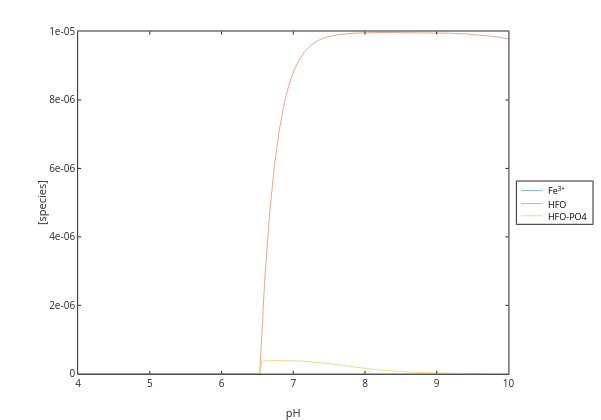

In [16]:
%graphics_toolkit ("notebook"); 
%graphics_toolkit ("gnuplot"); 
%graphics_toolkit ("plotly");

plot(pH,Fep3,pH,HFO,pH,HfowHPO4m)
xlabel('pH'); ylabel('[species]'); legend('Fe^{3+}','HFO','HFO-PO4','location','eastoutside')

